In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')


In [2]:
acc0 = [[], [0.6333000063896179, 0.6955999732017517, 0.7430999875068665, 0.6996999979019165, 0.694599986076355, 0.7207000255584717, 0.7069000005722046, 0.6757000088691711, 0.730400025844574, 0.6244000196456909, 0.7419000267982483, 0.7753999829292297, 0.7251999974250793, 0.7538999915122986, 0.7111999988555908, 0.7379999756813049, 0.7138000130653381, 0.7365000247955322, 0.7113999724388123, 0.7716000080108643, 0.7305999994277954, 0.7615000009536743, 0.684499979019165, 0.7253000140190125, 0.7330999970436096, 0.7261999845504761, 0.7434999942779541, 0.7146999835968018, 0.7063000202178955, 0.7434999942779541], [0.8072999715805054, 0.7910000085830688, 0.7530999779701233, 0.671500027179718, 0.7322999835014343, 0.7777000069618225, 0.7422000169754028, 0.6958000063896179, 0.7576000094413757, 0.7315000295639038, 0.8165000081062317, 0.7892000079154968, 0.7074000239372253, 0.8349000215530396, 0.70660001039505, 0.7986000180244446, 0.776199996471405, 0.7828999757766724, 0.7825000286102295, 0.8274000287055969, 0.8256999850273132, 0.6707000136375427, 0.8371000289916992, 0.7903000116348267, 0.7402999997138977, 0.7961999773979187, 0.8097000122070312, 0.7975999712944031, 0.7597000002861023, 0.8125], [0.8618999719619751, 0.7806000113487244, 0.8517000079154968, 0.8374000191688538, 0.8027999997138977, 0.8299999833106995, 0.8418999910354614, 0.7455000281333923, 0.8246999979019165, 0.7997000217437744, 0.824999988079071, 0.8514000177383423, 0.828499972820282, 0.8708999752998352, 0.8482000231742859, 0.7962999939918518, 0.8338000178337097, 0.7968999743461609, 0.839900016784668, 0.8234000205993652, 0.7253999710083008, 0.8300999999046326, 0.8335000276565552, 0.8356999754905701, 0.8069000244140625, 0.7925000190734863, 0.8396999835968018, 0.8420000076293945, 0.8355000019073486, 0.8133999705314636], [0.8694999814033508, 0.900600016117096, 0.8428000211715698, 0.8651999831199646, 0.804099977016449, 0.8935999870300293, 0.8773000240325928, 0.8101000189781189, 0.8669000267982483, 0.8669999837875366, 0.8863999843597412, 0.8744999766349792, 0.7890999913215637, 0.8270000219345093, 0.866599977016449, 0.8429999947547913, 0.819100022315979, 0.8870999813079834, 0.8417999744415283, 0.7749999761581421, 0.7900000214576721, 0.8676999807357788, 0.7993000149726868, 0.8712000250816345, 0.8820000290870667, 0.8453999757766724, 0.8604000210762024, 0.8504999876022339, 0.861299991607666, 0.7994999885559082], [0.8673999905586243, 0.8483999967575073, 0.8561999797821045, 0.8621000051498413, 0.894599974155426, 0.8669000267982483, 0.8068000078201294, 0.8790000081062317, 0.8787999749183655, 0.9059000015258789, 0.8586000204086304, 0.8127999901771545, 0.8824999928474426, 0.8359000086784363, 0.9004999995231628, 0.8974999785423279, 0.8970999717712402, 0.878600001335144, 0.8980000019073486, 0.8532000184059143, 0.8715000152587891, 0.888700008392334, 0.8108000159263611, 0.875, 0.8105999827384949, 0.8499000072479248, 0.8960999846458435, 0.8130000233650208, 0.8044000267982483, 0.8945000171661377], [0.843999981880188, 0.8862000107765198, 0.9007999897003174, 0.8622000217437744, 0.8309999704360962, 0.902899980545044, 0.8276000022888184, 0.9021999835968018, 0.8973000049591064, 0.9013000130653381, 0.8478000164031982, 0.897599995136261, 0.8586999773979187, 0.9002000093460083, 0.8906000256538391, 0.9193000197410583, 0.8032000064849854, 0.8012999892234802, 0.9072999954223633, 0.9003999829292297, 0.8187000155448914, 0.9027000069618225, 0.9172000288963318, 0.875, 0.8877000212669373, 0.8996999859809875, 0.8970000147819519, 0.8999000191688538, 0.8876000046730042, 0.885699987411499], [0.9111999869346619, 0.9182000160217285, 0.8995000123977661, 0.8652999997138977, 0.9063000082969666, 0.8992999792098999, 0.8799999952316284, 0.8777999877929688, 0.9221000075340271, 0.8968999981880188, 0.8669999837875366, 0.7723000049591064, 0.8482000231742859, 0.8468000292778015, 0.9070000052452087, 0.8482000231742859, 0.853600025177002, 0.8826000094413757, 0.9261000156402588, 0.8815000057220459, 0.8852999806404114, 0.9230999946594238, 0.8873999714851379, 0.9154000282287598, 0.9133999943733215, 0.9217000007629395, 0.8885999917984009, 0.883899986743927, 0.9053000211715698, 0.920799970626831], [0.9052000045776367, 0.9000999927520752, 0.9114999771118164, 0.9235000014305115, 0.9344000220298767, 0.90829998254776, 0.9053999781608582, 0.8601999878883362, 0.8695999979972839, 0.9265999794006348, 0.8896999955177307, 0.9071999788284302, 0.8774999976158142, 0.9214000105857849, 0.9157000184059143, 0.9186999797821045, 0.9175999760627747, 0.8930000066757202, 0.8770999908447266, 0.9179999828338623, 0.9279999732971191, 0.883899986743927, 0.9233999848365784, 0.9377999901771545, 0.9009000062942505, 0.9158999919891357, 0.8792999982833862, 0.8970000147819519, 0.8489000201225281, 0.9197999835014343], [0.9193000197410583, 0.941100001335144, 0.8547999858856201, 0.9264000058174133, 0.9387999773025513, 0.885200023651123, 0.9225000143051147, 0.8740000128746033, 0.9088000059127808, 0.9154999852180481, 0.9283999800682068, 0.8852999806404114, 0.9332000017166138, 0.883899986743927, 0.8881999850273132, 0.8917999863624573, 0.90829998254776, 0.907800018787384, 0.9085999727249146, 0.9280999898910522, 0.9104999899864197, 0.8937000036239624, 0.9325000047683716, 0.8270999789237976, 0.9269000291824341, 0.913100004196167, 0.9351999759674072, 0.9266999959945679, 0.902899980545044, 0.9093000292778015], [0.9330000281333923, 0.9049000144004822, 0.8399999737739563, 0.9088000059127808, 0.9334999918937683, 0.8676999807357788, 0.9193999767303467, 0.9248999953269958, 0.90829998254776, 0.9350000023841858, 0.8809999823570251, 0.9294000267982483, 0.9319000244140625, 0.927299976348877, 0.9218999743461609, 0.9351000189781189, 0.9308000206947327, 0.932699978351593, 0.9480000138282776, 0.8597999811172485, 0.9409000277519226, 0.9451000094413757, 0.8985999822616577, 0.9319000244140625, 0.8984000086784363, 0.9085000157356262, 0.9380999803543091, 0.9406999945640564, 0.9406999945640564, 0.8543999791145325], [0.9377999901771545, 0.9429000020027161, 0.92330002784729, 0.8895999789237976, 0.9343000054359436, 0.925599992275238, 0.9301000237464905, 0.9289000034332275, 0.9361000061035156, 0.9348999857902527, 0.9502999782562256, 0.9157999753952026, 0.9221000075340271, 0.9280999898910522, 0.9472000002861023, 0.9182000160217285, 0.9447000026702881, 0.9320999979972839, 0.8952000141143799, 0.9077000021934509, 0.9246000051498413, 0.9467999935150146, 0.8884000182151794, 0.9333000183105469, 0.9315999746322632, 0.9207000136375427, 0.911300003528595, 0.9079999923706055, 0.8741000294685364, 0.9406999945640564], [0.9243999719619751, 0.9211000204086304, 0.9480999708175659, 0.9430999755859375, 0.9133999943733215, 0.8536999821662903, 0.9284999966621399, 0.9506999850273132, 0.9438999891281128, 0.948199987411499, 0.9215999841690063, 0.9336000084877014, 0.9480000138282776, 0.8761000037193298, 0.8583999872207642, 0.9204999804496765, 0.9226999878883362, 0.9243000149726868, 0.8733999729156494, 0.9441999793052673, 0.9391999840736389, 0.9241999983787537, 0.9229999780654907, 0.9132999777793884, 0.9466000199317932, 0.9146999716758728, 0.8974999785423279, 0.923799991607666, 0.9132999777793884, 0.9430999755859375], [0.9465000033378601, 0.9258000254631042, 0.9453999996185303, 0.9509999752044678, 0.9427000284194946, 0.9326000213623047, 0.9449999928474426, 0.8586000204086304, 0.9354000091552734, 0.9199000000953674, 0.9348999857902527, 0.9100000262260437, 0.9096999764442444, 0.9376999735832214, 0.9405999779701233, 0.9308000206947327, 0.9404000043869019, 0.9538999795913696, 0.9247999787330627, 0.9010999798774719, 0.927299976348877, 0.9190999865531921, 0.9225000143051147, 0.9297000169754028, 0.9362000226974487, 0.8981000185012817, 0.9215999841690063, 0.8708999752998352, 0.9379000067710876, 0.9085999727249146], [0.9559000134468079, 0.9391000270843506, 0.9308000206947327, 0.8779000043869019, 0.9358999729156494, 0.9343000054359436, 0.9416000247001648, 0.9362999796867371, 0.9262999892234802, 0.9186999797821045, 0.9007999897003174, 0.9085000157356262, 0.949999988079071, 0.9502999782562256, 0.9455000162124634, 0.9325000047683716, 0.9347000122070312, 0.9239000082015991, 0.9490000009536743, 0.9187999963760376, 0.9460999965667725, 0.9527000188827515, 0.9354000091552734, 0.9275000095367432, 0.9491000175476074, 0.9017000198364258, 0.9402999877929688, 0.9294000267982483, 0.9491999745368958, 0.8980000019073486], [0.9358999729156494, 0.930899977684021, 0.9291999936103821, 0.9426000118255615, 0.949999988079071, 0.9510999917984009, 0.9453999996185303, 0.9373000264167786, 0.9228000044822693, 0.9351999759674072, 0.9014000296592712, 0.9369999766349792, 0.9225999712944031, 0.9300000071525574, 0.91839998960495, 0.9585000276565552, 0.9433000087738037, 0.9498000144958496, 0.9208999872207642, 0.9379000067710876, 0.9205999970436096, 0.8830999732017517, 0.9326000213623047, 0.9276000261306763, 0.9455000162124634, 0.9269000291824341, 0.9171000123023987, 0.8910999894142151, 0.9359999895095825, 0.9264000058174133], [0.9509999752044678, 0.9377999901771545, 0.9215999841690063, 0.9528999924659729, 0.9415000081062317, 0.9391999840736389, 0.9038000106811523, 0.9368000030517578, 0.9513000249862671, 0.9505000114440918, 0.9508000016212463, 0.8863000273704529, 0.9154000282287598, 0.9455000162124634, 0.9200000166893005, 0.9187999963760376, 0.9549000263214111, 0.9323999881744385, 0.9466999769210815, 0.9347000122070312, 0.9505000114440918, 0.9045000076293945, 0.9348999857902527, 0.913100004196167, 0.9520000219345093, 0.9550999999046326, 0.9460999965667725, 0.9394999742507935, 0.9531999826431274, 0.9341999888420105], [0.9485999941825867, 0.945900022983551, 0.9315000176429749, 0.9545000195503235, 0.9214000105857849, 0.8661999702453613, 0.9390000104904175, 0.9391000270843506, 0.9070000052452087, 0.9451000094413757, 0.9477999806404114, 0.9532999992370605, 0.9293000102043152, 0.9222999811172485, 0.9204999804496765, 0.9519000053405762, 0.9348999857902527, 0.9093999862670898, 0.940500020980835, 0.9552000164985657, 0.9158999919891357, 0.9377999901771545, 0.9462000131607056, 0.9456999897956848, 0.9444000124931335, 0.9340000152587891, 0.9438999891281128, 0.949400007724762, 0.9513000249862671, 0.9074000120162964], [0.9435999989509583, 0.9092000126838684, 0.9409000277519226, 0.9562000036239624, 0.9359999895095825, 0.9287999868392944, 0.9408000111579895, 0.9297999739646912, 0.9506999850273132, 0.9492999911308289, 0.9495000243186951, 0.9574000239372253, 0.9435999989509583, 0.9138000011444092, 0.9458000063896179, 0.9574000239372253, 0.9466999769210815, 0.9355000257492065, 0.9452999830245972, 0.9516000151634216, 0.9362000226974487, 0.914900004863739, 0.9537000060081482, 0.9311000108718872, 0.9200000166893005, 0.9556000232696533, 0.9345999956130981, 0.945900022983551, 0.9416999816894531, 0.9222999811172485], [0.9556999802589417, 0.947700023651123, 0.9564999938011169, 0.949400007724762, 0.9235000014305115, 0.8619999885559082, 0.9398999810218811, 0.9300000071525574, 0.9445000290870667, 0.9606999754905701, 0.941100001335144, 0.9452999830245972, 0.9366999864578247, 0.947700023651123, 0.9451000094413757, 0.9541000127792358, 0.91839998960495, 0.9114999771118164, 0.9426000118255615, 0.9208999872207642, 0.953499972820282, 0.935699999332428, 0.9488000273704529, 0.9075999855995178, 0.9376000165939331, 0.9311000108718872, 0.963699996471405, 0.9158999919891357, 0.9031000137329102, 0.9466999769210815], [0.9301000237464905, 0.9311000108718872, 0.9235000014305115, 0.9573000073432922, 0.932699978351593, 0.9372000098228455, 0.9205999970436096, 0.9556000232696533, 0.920799970626831, 0.9273999929428101, 0.9452999830245972, 0.9106000065803528, 0.9391000270843506, 0.9578999876976013, 0.9309999942779541, 0.8906999826431274, 0.9485999941825867, 0.9355000257492065, 0.9433000087738037, 0.9516000151634216, 0.9419999718666077, 0.9254999756813049, 0.9585000276565552, 0.930400013923645, 0.9473999738693237, 0.9528999924659729, 0.9552000164985657, 0.9399999976158142, 0.9235000014305115, 0.9517999887466431], [0.9319999814033508, 0.8996999859809875, 0.9523000121116638, 0.9552000164985657, 0.9430999755859375, 0.9408000111579895, 0.942799985408783, 0.9505000114440918, 0.9433000087738037, 0.9333000183105469, 0.9510999917984009, 0.9089999794960022, 0.9555000066757202, 0.944599986076355, 0.9563999772071838, 0.9253000020980835, 0.95169997215271, 0.9624000191688538, 0.9591000080108643, 0.9458000063896179, 0.9452999830245972, 0.9192000031471252, 0.944100022315979, 0.868399977684021, 0.9502999782562256, 0.9557999968528748, 0.9384999871253967, 0.9165999889373779, 0.947700023651123, 0.9345999956130981], [0.9557999968528748, 0.9441999793052673, 0.944100022315979, 0.954200029373169, 0.9573000073432922, 0.954800009727478, 0.9517999887466431, 0.9433000087738037, 0.9222999811172485, 0.9642999768257141, 0.9266999959945679, 0.9447000026702881, 0.9276000261306763, 0.948199987411499, 0.9632999897003174, 0.9372000098228455, 0.9470000267028809, 0.942799985408783, 0.9517999887466431, 0.9434999823570251, 0.9545999765396118, 0.9404000043869019, 0.8978000283241272, 0.9473999738693237, 0.9361000061035156, 0.9419000148773193, 0.9563000202178955, 0.9535999894142151, 0.9656999707221985, 0.9527999758720398], [0.9208999872207642, 0.9253000020980835, 0.9416000247001648, 0.932699978351593, 0.9491000175476074, 0.9333000183105469, 0.9071000218391418, 0.95169997215271, 0.9380000233650208, 0.9491000175476074, 0.9362999796867371, 0.9535999894142151, 0.9573000073432922, 0.9322999715805054, 0.9578999876976013, 0.9398999810218811, 0.953000009059906, 0.9505000114440918, 0.9186999797821045, 0.9470000267028809, 0.9621000289916992, 0.9599999785423279, 0.9532999992370605, 0.9473000168800354, 0.9470999836921692, 0.9585000276565552, 0.95660001039505, 0.9103000164031982, 0.9589999914169312, 0.9204999804496765], [0.8985000252723694, 0.9301999807357788, 0.9517999887466431, 0.942300021648407, 0.935699999332428, 0.9495000243186951, 0.9373000264167786, 0.9588000178337097, 0.9466999769210815, 0.9259999990463257, 0.9472000002861023, 0.9513000249862671, 0.9538000226020813, 0.941100001335144, 0.9541000127792358, 0.9279000163078308, 0.9648000001907349, 0.9412999749183655, 0.9090999960899353, 0.9222000241279602, 0.9621000289916992, 0.9570000171661377, 0.9453999996185303, 0.9118000268936157, 0.9513000249862671, 0.9616000056266785, 0.9200999736785889, 0.892799973487854, 0.9354000091552734, 0.9495999813079834], [0.9204999804496765, 0.9276999831199646, 0.9307000041007996, 0.9531000256538391, 0.8967999815940857, 0.9459999799728394, 0.9305999875068665, 0.9539999961853027, 0.9387000203132629, 0.9480000138282776, 0.9370999932289124, 0.9362999796867371, 0.9429000020027161, 0.9545000195503235, 0.9108999967575073, 0.8991000056266785, 0.9405999779701233, 0.942799985408783, 0.867900013923645, 0.8934999704360962, 0.921500027179718, 0.9318000078201294, 0.9490000009536743, 0.9200999736785889, 0.9635000228881836, 0.9322999715805054, 0.9473000168800354, 0.9408000111579895, 0.9545000195503235, 0.9472000002861023], [0.9575999975204468, 0.9466999769210815, 0.9545999765396118, 0.9639000296592712, 0.9567000269889832, 0.9623000025749207, 0.9488000273704529, 0.949400007724762, 0.9408000111579895, 0.9467999935150146, 0.9613000154495239, 0.9248999953269958, 0.9571999907493591, 0.9442999958992004, 0.9451000094413757, 0.9072999954223633, 0.9509000182151794, 0.9534000158309937, 0.9629999995231628, 0.9595000147819519, 0.9614999890327454, 0.9656999707221985, 0.9588000178337097, 0.953499972820282, 0.947700023651123, 0.9635000228881836, 0.935699999332428, 0.8903999924659729, 0.9641000032424927, 0.958899974822998], [0.9564999938011169, 0.957099974155426, 0.9491000175476074, 0.939300000667572, 0.9614999890327454, 0.9603000283241272, 0.963699996471405, 0.9668999910354614, 0.9298999905586243, 0.9632999897003174, 0.9496999979019165, 0.9506999850273132, 0.9258000254631042, 0.954800009727478, 0.9591000080108643, 0.9329000115394592, 0.9527000188827515, 0.9681000113487244, 0.953499972820282, 0.8942000269889832, 0.9347000122070312, 0.9484000205993652, 0.9559999704360962, 0.9442999958992004, 0.9631999731063843, 0.961899995803833, 0.949400007724762, 0.9315999746322632, 0.9546999931335449, 0.9300000071525574], [0.8837000131607056, 0.9634000062942505, 0.9624999761581421, 0.9065999984741211, 0.9688000082969666, 0.9607999920845032, 0.9519000053405762, 0.9638000130653381, 0.9611999988555908, 0.96670001745224, 0.8912000060081482, 0.954800009727478, 0.9559000134468079, 0.946399986743927, 0.964900016784668, 0.9562000036239624, 0.9366999864578247, 0.9140999913215637, 0.9495000243186951, 0.9171000123023987, 0.9664999842643738, 0.9375, 0.9621000289916992, 0.9458000063896179, 0.9472000002861023, 0.9136999845504761, 0.9555000066757202, 0.9538000226020813, 0.9581000208854675, 0.9606000185012817], [0.9539999961853027, 0.9569000005722046, 0.9050999879837036, 0.9531000256538391, 0.9232000112533569, 0.9386000037193298, 0.9653000235557556, 0.9370999932289124, 0.9562000036239624, 0.9550999999046326, 0.9071000218391418, 0.9422000050544739, 0.9599999785423279, 0.9621999859809875, 0.9401999711990356, 0.9387999773025513, 0.9352999925613403, 0.9545000195503235, 0.9488000273704529, 0.9556999802589417, 0.9370999932289124, 0.9559000134468079, 0.9531000256538391, 0.9347000122070312, 0.916700005531311, 0.9559999704360962, 0.9628999829292297, 0.9434999823570251, 0.9355000257492065, 0.9679999947547913], [0.9404000043869019, 0.95660001039505, 0.9063000082969666, 0.9430999755859375, 0.9391000270843506, 0.9592999815940857, 0.9502000212669373, 0.899399995803833, 0.9657999873161316, 0.9355000257492065, 0.9652000069618225, 0.9587000012397766, 0.9509000182151794, 0.9613999724388123, 0.9695000052452087, 0.9564999938011169, 0.9528999924659729, 0.9377999901771545, 0.9473000168800354, 0.9634000062942505, 0.961899995803833, 0.9621999859809875, 0.9460999965667725, 0.9577999711036682, 0.9438999891281128, 0.954200029373169, 0.9496999979019165, 0.9513000249862671, 0.9519000053405762, 0.942799985408783]]
loss0 = [[], [1.5196831226348877, 4.333609580993652, 1.1842329502105713, 2.482436418533325, 1.1548042297363281, 1.486219048500061, 1.3589544296264648, 3.1578030586242676, 1.0647802352905273, 2.4422688484191895, 1.2821669578552246, 0.8840193152427673, 1.433895468711853, 1.2309774160385132, 3.020496129989624, 1.288251519203186, 1.1641868352890015, 1.1328493356704712, 1.000016212463379, 0.8452110290527344, 2.511770725250244, 0.9599663019180298, 2.507113218307495, 1.2298692464828491, 1.0034477710723877, 1.178735613822937, 1.027182936668396, 2.476985454559326, 1.8974525928497314, 0.9454527497291565], [0.9923784136772156, 1.2056583166122437, 1.3266806602478027, 2.8686625957489014, 2.4090354442596436, 1.1037635803222656, 2.9177920818328857, 2.2265195846557617, 1.0768331289291382, 1.5610785484313965, 0.7903982996940613, 0.9169428944587708, 1.8935766220092773, 0.6519889831542969, 3.084491491317749, 1.1388154029846191, 1.1866137981414795, 1.6655136346817017, 1.5020570755004883, 0.9621883034706116, 1.1768033504486084, 4.276398181915283, 0.8068514466285706, 1.135259985923767, 2.519110918045044, 1.1061010360717773, 1.1074951887130737, 1.118962287902832, 2.737653970718384, 0.936843752861023], [0.6670644879341125, 2.2816638946533203, 0.7180691361427307, 0.7129659056663513, 0.93231600522995, 0.9014686346054077, 0.6728302240371704, 2.6694209575653076, 0.8041068315505981, 0.9403128623962402, 0.8485788106918335, 0.7036010026931763, 0.8362538814544678, 0.5847115516662598, 0.7296879887580872, 1.1755800247192383, 0.798247218132019, 1.2547388076782227, 0.8630287051200867, 0.8557643294334412, 2.653789758682251, 0.8600705862045288, 0.8412233591079712, 0.7239494919776917, 2.1430845260620117, 1.759187936782837, 0.8242445588111877, 0.8823638558387756, 0.8897086977958679, 0.918783962726593], [0.7066619992256165, 0.46872958540916443, 0.7663642168045044, 0.6481682062149048, 1.6789591312408447, 0.46998661756515503, 0.6140144467353821, 1.1893186569213867, 0.656745970249176, 0.5993305444717407, 0.4904346764087677, 0.4621454179286957, 1.137535572052002, 0.871299684047699, 0.6680026054382324, 0.7559031248092651, 1.4208916425704956, 0.476330429315567, 0.8136188387870789, 2.4165778160095215, 2.1757729053497314, 0.5910149216651917, 1.515912652015686, 0.619294285774231, 0.5742439031600952, 0.6793217062950134, 0.7443261742591858, 0.6563934087753296, 0.615165114402771, 2.280792474746704], [0.5358039736747742, 0.6184920072555542, 0.6596026420593262, 0.5479892492294312, 0.5026211142539978, 0.6569474339485168, 1.4756993055343628, 0.5028290748596191, 0.565742015838623, 0.47468647360801697, 0.661359965801239, 1.0275746583938599, 0.6153271794319153, 0.9101998805999756, 0.44435253739356995, 0.5127102732658386, 0.536582350730896, 0.5786459445953369, 0.456373393535614, 0.7789163589477539, 0.6253174543380737, 0.5628610253334045, 1.193359375, 0.4234395921230316, 1.4226678609848022, 0.6784663796424866, 0.49314969778060913, 1.255219578742981, 1.1829200983047485, 0.5009980797767639], [1.1139436960220337, 0.5274620056152344, 0.38452088832855225, 0.5971178412437439, 1.0089458227157593, 0.45341214537620544, 1.1910392045974731, 0.47585052251815796, 0.4914701581001282, 0.4462966322898865, 0.7491433024406433, 0.38526153564453125, 0.6935076117515564, 0.459987074136734, 0.45023372769355774, 0.38175642490386963, 1.2534898519515991, 0.9309850335121155, 0.37069836258888245, 0.4237840473651886, 0.9576119184494019, 0.4011525511741638, 0.348344624042511, 0.5551480054855347, 0.5118908882141113, 0.47742295265197754, 0.4160664975643158, 0.42770513892173767, 0.49882838129997253, 0.48190635442733765], [0.4862357974052429, 0.32000067830085754, 0.39937740564346313, 0.7273174524307251, 0.39746588468551636, 0.3996884822845459, 0.5153345465660095, 0.4782967269420624, 0.3285890519618988, 0.4407540559768677, 0.5735797882080078, 1.6746259927749634, 0.8609034419059753, 0.8771957755088806, 0.36581048369407654, 0.7512813210487366, 0.7362539768218994, 0.549233078956604, 0.2571715712547302, 0.5454280972480774, 0.6566711664199829, 0.358245849609375, 0.47442880272865295, 0.37837105989456177, 0.3501499891281128, 0.2932097315788269, 0.6676142811775208, 0.6285253167152405, 0.46098780632019043, 0.33730193972587585], [0.40599119663238525, 0.46642759442329407, 0.4094865024089813, 0.3282254934310913, 0.30136996507644653, 0.4730225205421448, 0.5441272258758545, 0.5709983110427856, 0.7097029089927673, 0.3367857336997986, 0.5894842147827148, 0.5903075933456421, 0.4618142545223236, 0.33493971824645996, 0.3673921525478363, 0.31128165125846863, 0.44121038913726807, 0.4545576572418213, 0.5704769492149353, 0.3237227201461792, 0.3176545798778534, 0.6603760123252869, 0.31370943784713745, 0.24512605369091034, 0.3946363031864166, 0.37832552194595337, 0.6420572996139526, 0.47090649604797363, 0.705280065536499, 0.3592366576194763], [0.3205694258213043, 0.22559218108654022, 0.9425859451293945, 0.28878751397132874, 0.24000048637390137, 0.545280396938324, 0.2752833366394043, 0.7320372462272644, 0.4020622670650482, 0.32314929366111755, 0.3352894186973572, 0.6151232123374939, 0.31860101222991943, 0.5708562731742859, 0.4897265136241913, 0.5377616286277771, 0.4195375442504883, 0.48623719811439514, 0.5111034512519836, 0.24083003401756287, 0.5104829668998718, 0.6050550937652588, 0.29198750853538513, 0.9314314723014832, 0.3036971092224121, 0.35830509662628174, 0.26360005140304565, 0.3121892213821411, 0.5102277994155884, 0.36124271154403687], [0.2875116169452667, 0.45184341073036194, 1.0669666528701782, 0.399688184261322, 0.37021636962890625, 0.8399786949157715, 0.3139037489891052, 0.3530499339103699, 0.47378769516944885, 0.3204836845397949, 0.5705204606056213, 0.31419724225997925, 0.3199145197868347, 0.30347740650177, 0.3752009868621826, 0.3412659466266632, 0.3492433428764343, 0.2621556222438812, 0.19756685197353363, 0.6562025547027588, 0.2269352823495865, 0.20431335270404816, 0.6467456817626953, 0.3138144016265869, 0.47756829857826233, 0.4574345350265503, 0.27815011143684387, 0.3235878348350525, 0.2406439483165741, 1.1312923431396484], [0.273992657661438, 0.19051742553710938, 0.3279552757740021, 0.5271490812301636, 0.3237674832344055, 0.42176103591918945, 0.4227786064147949, 0.306498646736145, 0.2434876263141632, 0.2974831461906433, 0.2546079456806183, 0.4661969840526581, 0.4015764892101288, 0.2734174430370331, 0.19722045958042145, 0.354490727186203, 0.2577158808708191, 0.2845027446746826, 0.4684670865535736, 0.39417847990989685, 0.35799485445022583, 0.1931929886341095, 0.44066551327705383, 0.2683504521846771, 0.3833265006542206, 0.34813734889030457, 0.309285968542099, 0.4795163571834564, 0.6067163348197937, 0.26522400975227356], [0.3138793110847473, 0.3425597548484802, 0.2404649406671524, 0.2628995180130005, 0.46534356474876404, 0.8370746374130249, 0.2854253947734833, 0.23613683879375458, 0.2632005512714386, 0.21142873167991638, 0.49431905150413513, 0.260187566280365, 0.23545244336128235, 0.5639092326164246, 0.911247730255127, 0.32678380608558655, 0.3434606194496155, 0.2672484517097473, 0.8595943450927734, 0.26451098918914795, 0.23006059229373932, 0.4026695191860199, 0.28439053893089294, 0.3566572368144989, 0.206307515501976, 0.37728872895240784, 0.4604564309120178, 0.3940734267234802, 0.4718661606311798, 0.23416925966739655], [0.24520599842071533, 0.34979045391082764, 0.209936261177063, 0.2488948553800583, 0.23911872506141663, 0.2667708396911621, 0.2369023859500885, 0.8518105745315552, 0.36230137944221497, 0.3610389530658722, 0.2742842733860016, 0.5713169574737549, 0.4125688076019287, 0.2716062366962433, 0.2593405842781067, 0.35633009672164917, 0.27789953351020813, 0.18964649736881256, 0.3347763121128082, 0.41629892587661743, 0.3239179849624634, 0.27892041206359863, 0.40707239508628845, 0.337727427482605, 0.28478848934173584, 0.5332497954368591, 0.34381937980651855, 0.49391689896583557, 0.29172658920288086, 0.5053709745407104], [0.19931034743785858, 0.27209559082984924, 0.29542893171310425, 0.7168749570846558, 0.25444722175598145, 0.26691848039627075, 0.24965737760066986, 0.27699998021125793, 0.47439756989479065, 0.39247840642929077, 0.5492265820503235, 0.5171359181404114, 0.1882326304912567, 0.30635619163513184, 0.2693116068840027, 0.3130410611629486, 0.34901273250579834, 0.36504849791526794, 0.2497180700302124, 0.44116002321243286, 0.22833046317100525, 0.2153286635875702, 0.3240129053592682, 0.3217601180076599, 0.21076980233192444, 0.5597670674324036, 0.2578358054161072, 0.32829946279525757, 0.2033197581768036, 0.6100131869316101], [0.3116771876811981, 0.357500284910202, 0.4159812927246094, 0.27348509430885315, 0.20070429146289825, 0.1874161809682846, 0.22862809896469116, 0.3372386395931244, 0.35386157035827637, 0.31506049633026123, 0.5367568731307983, 0.27606073021888733, 0.30617383122444153, 0.3632127344608307, 0.3853595554828644, 0.1888551265001297, 0.2545061707496643, 0.22521334886550903, 0.5487269163131714, 0.2728120982646942, 0.32533273100852966, 0.7531660199165344, 0.4021674394607544, 0.3662881851196289, 0.28816768527030945, 0.40408194065093994, 0.3334788680076599, 0.73382169008255, 0.39023521542549133, 0.4060455858707428], [0.20377163589000702, 0.31575894355773926, 0.4094153940677643, 0.24409790337085724, 0.2767619490623474, 0.267301470041275, 0.5595962405204773, 0.3032319247722626, 0.21484485268592834, 0.2325936257839203, 0.20424850285053253, 0.6090806722640991, 0.39694902300834656, 0.2276240736246109, 0.41130176186561584, 0.3544093370437622, 0.20401868224143982, 0.30485671758651733, 0.31009796261787415, 0.3507208526134491, 0.2015073299407959, 0.3897538483142853, 0.2777568995952606, 0.4479128420352936, 0.17020438611507416, 0.1650746762752533, 0.27402767539024353, 0.3894757032394409, 0.23206299543380737, 0.2782864570617676], [0.18984438478946686, 0.2642902731895447, 0.32740724086761475, 0.18018989264965057, 0.37945306301116943, 0.7111771702766418, 0.2731626033782959, 0.268917441368103, 0.4104894995689392, 0.2503018379211426, 0.2369588166475296, 0.17420436441898346, 0.26201894879341125, 0.3455805778503418, 0.3566434681415558, 0.21134023368358612, 0.3624751567840576, 0.42422303557395935, 0.342512309551239, 0.2477005422115326, 0.4148927330970764, 0.25787845253944397, 0.34505248069763184, 0.2514626979827881, 0.2503282129764557, 0.28411340713500977, 0.2770545184612274, 0.2152303159236908, 0.19067919254302979, 0.38347676396369934], [0.30795159935951233, 0.5222609043121338, 0.2984834313392639, 0.1603776067495346, 0.35063090920448303, 0.43202704191207886, 0.33262649178504944, 0.3562614619731903, 0.21838800609111786, 0.29308485984802246, 0.238813579082489, 0.17349383234977722, 0.2561357319355011, 0.4406931698322296, 0.328652948141098, 0.1643362194299698, 0.2592952251434326, 0.2555128037929535, 0.35450348258018494, 0.23674018681049347, 0.2575027644634247, 0.34562984108924866, 0.21541225910186768, 0.44939976930618286, 0.3451416790485382, 0.26744112372398376, 0.3371632993221283, 0.22813010215759277, 0.26839515566825867, 0.43280336260795593], [0.16315150260925293, 0.23671723902225494, 0.19588233530521393, 0.20063528418540955, 0.42968040704727173, 0.6324379444122314, 0.3309096693992615, 0.2920161783695221, 0.23610827326774597, 0.18545565009117126, 0.36504390835762024, 0.27025920152664185, 0.35955363512039185, 0.23578990995883942, 0.2973027527332306, 0.19543279707431793, 0.36468490958213806, 0.44078123569488525, 0.28181520104408264, 0.34027108550071716, 0.20620585978031158, 0.3438778817653656, 0.2485327124595642, 0.538279116153717, 0.299159437417984, 0.2637103199958801, 0.16721569001674652, 0.36837682127952576, 0.41637447476387024, 0.25991398096084595], [0.3565042316913605, 0.26258817315101624, 0.38905400037765503, 0.21332314610481262, 0.38036373257637024, 0.2926236689090729, 0.6545218825340271, 0.18395480513572693, 0.45748165249824524, 0.33478978276252747, 0.20312263071537018, 0.5659259557723999, 0.2738947868347168, 0.17564713954925537, 0.6130236983299255, 0.6354753375053406, 0.29115059971809387, 0.4706578254699707, 0.3121744990348816, 0.2352493405342102, 0.23642170429229736, 0.42159149050712585, 0.17814810574054718, 0.41778725385665894, 0.28754231333732605, 0.2573380172252655, 0.18414117395877838, 0.37782949209213257, 0.3501303791999817, 0.27276918292045593], [0.4171212911605835, 0.5909473896026611, 0.2826259732246399, 0.24799184501171112, 0.28307685256004333, 0.3939681649208069, 0.2543281614780426, 0.25977393984794617, 0.3230811655521393, 0.3858169913291931, 0.23860493302345276, 0.45681050419807434, 0.23923161625862122, 0.23974211513996124, 0.1728905588388443, 0.4528317451477051, 0.2597867548465729, 0.17280371487140656, 0.1718200296163559, 0.26437023282051086, 0.2311638742685318, 0.3088778555393219, 0.27524513006210327, 0.7933833599090576, 0.26237791776657104, 0.16671143472194672, 0.28944891691207886, 0.3553334176540375, 0.2426101118326187, 0.44646650552749634], [0.2692428231239319, 0.26808905601501465, 0.3440803289413452, 0.26003706455230713, 0.19933083653450012, 0.24001264572143555, 0.20157316327095032, 0.26390036940574646, 0.7039037346839905, 0.14552803337574005, 0.379388689994812, 0.2812357544898987, 0.4004504680633545, 0.5041335225105286, 0.13317324221134186, 0.2582407295703888, 0.2528889775276184, 0.22003479301929474, 0.23503372073173523, 0.24642331898212433, 0.1888183057308197, 0.3250541388988495, 0.6803144812583923, 0.32572758197784424, 0.31443163752555847, 0.3227351903915405, 0.21741828322410583, 0.22508209943771362, 0.17080143094062805, 0.20666711032390594], [0.36342066526412964, 0.5048608183860779, 0.29711422324180603, 0.3620724380016327, 0.1948331743478775, 0.44065991044044495, 0.6170312762260437, 0.35240438580513, 0.3844609260559082, 0.22592920064926147, 0.30982422828674316, 0.22626259922981262, 0.17383071780204773, 0.3268786668777466, 0.20096805691719055, 0.30381128191947937, 0.38079723715782166, 0.2580689489841461, 0.5085939764976501, 0.2928220331668854, 0.19261623919010162, 0.14816376566886902, 0.27251893281936646, 0.2619100511074066, 0.33297210931777954, 0.2363363802433014, 0.17483440041542053, 0.5588119626045227, 0.20296767354011536, 0.43878135085105896], [0.4860444962978363, 0.40017643570899963, 0.2554856836795807, 0.4626275300979614, 0.29027247428894043, 0.35244303941726685, 0.25422316789627075, 0.20672321319580078, 0.2143523395061493, 0.32788389921188354, 0.23397043347358704, 0.22162190079689026, 0.21955078840255737, 0.22061799466609955, 0.2182716727256775, 0.40834465622901917, 0.1702459156513214, 0.29420116543769836, 0.6868911385536194, 0.3927021920681, 0.13776226341724396, 0.1996125876903534, 0.2320692390203476, 0.5232452154159546, 0.2208622843027115, 0.23297818005084991, 0.3813033998012543, 0.750959038734436, 0.3807196617126465, 0.19513694941997528], [0.3956865966320038, 0.41380903124809265, 0.4895443916320801, 0.41529911756515503, 0.6562620997428894, 0.2518540322780609, 0.3737882971763611, 0.318942666053772, 0.3490065038204193, 0.23748530447483063, 0.2690068483352661, 0.37973880767822266, 0.32205647230148315, 0.20806635916233063, 0.4107988178730011, 0.5723375082015991, 0.31182706356048584, 0.38957369327545166, 1.045293927192688, 0.6372990608215332, 0.35697147250175476, 0.35717105865478516, 0.22403405606746674, 0.316901296377182, 0.17145100235939026, 0.4562467634677887, 0.21597355604171753, 0.31538963317871094, 0.3517218232154846, 0.2593013048171997], [0.21604961156845093, 0.25794628262519836, 0.237405464053154, 0.18207338452339172, 0.1937895268201828, 0.1822771430015564, 0.3061370253562927, 0.3674505054950714, 0.33718764781951904, 0.39768192172050476, 0.23825161159038544, 0.48759302496910095, 0.2663777768611908, 0.2702888548374176, 0.5366418361663818, 0.5923786759376526, 0.2501939833164215, 0.21512089669704437, 0.16622214019298553, 0.193284809589386, 0.14955633878707886, 0.23434364795684814, 0.16480989754199982, 0.24837158620357513, 0.217949777841568, 0.20521225035190582, 0.3273172974586487, 0.6218968033790588, 0.1729101687669754, 0.184118390083313], [0.2292875498533249, 0.1679837703704834, 0.22017712891101837, 0.4583666920661926, 0.21636568009853363, 0.19473020732402802, 0.14606834948062897, 0.1566915214061737, 0.4469105899333954, 0.1928887665271759, 0.2150682806968689, 0.24488091468811035, 0.6406925320625305, 0.17727124691009521, 0.23646308481693268, 0.321079820394516, 0.24021345376968384, 0.14001978933811188, 0.21181003749370575, 0.717626690864563, 0.693114697933197, 0.27125000953674316, 0.17600668966770172, 0.2877773344516754, 0.18003159761428833, 0.2674088478088379, 0.2959991693496704, 0.32865840196609497, 0.2974761426448822, 0.4660012125968933], [0.8878082036972046, 0.20140939950942993, 0.16858643293380737, 0.4865201711654663, 0.12008193135261536, 0.1710001826286316, 0.31296366453170776, 0.17715750634670258, 0.19538846611976624, 0.14788322150707245, 0.5065361857414246, 0.26522570848464966, 0.2902519702911377, 0.23507824540138245, 0.18197675049304962, 0.1757674664258957, 0.2968791127204895, 0.5476846694946289, 0.27187925577163696, 0.725571870803833, 0.1953202486038208, 0.5031579732894897, 0.24445116519927979, 0.3177737891674042, 0.43099576234817505, 0.5554699897766113, 0.24011486768722534, 0.23974640667438507, 0.18887494504451752, 0.1741500049829483], [0.21821008622646332, 0.18311123549938202, 0.6592058539390564, 0.2443111389875412, 0.5112495422363281, 0.267818808555603, 0.19626691937446594, 0.3046939969062805, 0.20642387866973877, 0.27371978759765625, 0.569850504398346, 0.32466012239456177, 0.1664724051952362, 0.1722002625465393, 0.43335357308387756, 0.37138357758522034, 0.3775026798248291, 0.24163329601287842, 0.29895341396331787, 0.24663668870925903, 0.35675525665283203, 0.30594882369041443, 0.28044968843460083, 0.38438692688941956, 0.39734894037246704, 0.29291778802871704, 0.1443418711423874, 0.29950541257858276, 0.43488427996635437, 0.15569822490215302], [0.4100574254989624, 0.19345565140247345, 0.5716689825057983, 0.5030308365821838, 0.4622619152069092, 0.1803392916917801, 0.263117253780365, 0.7781019806861877, 0.13894924521446228, 0.6727273464202881, 0.16172708570957184, 0.25706425309181213, 0.26496005058288574, 0.20630834996700287, 0.17701131105422974, 0.23004013299942017, 0.23765526711940765, 0.2899995744228363, 0.2855810225009918, 0.2022179663181305, 0.1850152462720871, 0.1775299608707428, 0.2992872893810272, 0.2418459951877594, 0.2413424253463745, 0.21583962440490723, 0.31249508261680603, 0.20043127238750458, 0.2451099306344986, 0.29069045186042786]] 

acc1 = [[], [0.7044000029563904, 0.6554999947547913, 0.6603000164031982, 0.7024999856948853, 0.6593999862670898, 0.6942999958992004, 0.7197999954223633, 0.7919999957084656, 0.7383000254631042, 0.7145000100135803, 0.7305999994277954, 0.7150999903678894, 0.6614000201225281, 0.7702000141143799, 0.6973000168800354, 0.7196999788284302, 0.7371000051498413, 0.660099983215332, 0.6974999904632568, 0.7184000015258789, 0.7312999963760376, 0.6653000116348267, 0.7053999900817871, 0.715399980545044, 0.75, 0.7361999750137329, 0.7940000295639038, 0.7559999823570251, 0.6851999759674072, 0.7354999780654907], [0.805400013923645, 0.817300021648407, 0.8481000065803528, 0.8219000101089478, 0.8309000134468079, 0.7731999754905701, 0.8224999904632568, 0.7870000004768372, 0.7811999917030334, 0.7699000239372253, 0.822700023651123, 0.8515999913215637, 0.7541999816894531, 0.8241000175476074, 0.791100025177002, 0.7192000150680542, 0.8077999949455261, 0.7930999994277954, 0.828499972820282, 0.7961999773979187, 0.7608000040054321, 0.762499988079071, 0.8119000196456909, 0.8256999850273132, 0.8443999886512756, 0.7818999886512756, 0.8122000098228455, 0.7754999995231628, 0.8104000091552734, 0.8312000036239624], [0.8726000189781189, 0.8723000288009644, 0.8622000217437744, 0.8295000195503235, 0.8677999973297119, 0.8636000156402588, 0.8863000273704529, 0.8531000018119812, 0.8447999954223633, 0.8525999784469604, 0.878000020980835, 0.8048999905586243, 0.7796000242233276, 0.7692000269889832, 0.8442000150680542, 0.842199981212616, 0.7936999797821045, 0.8718000054359436, 0.833299994468689, 0.8694999814033508, 0.8321999907493591, 0.8647000193595886, 0.8353000283241272, 0.8086000084877014, 0.8648999929428101, 0.8001999855041504, 0.7893000245094299, 0.8417999744415283, 0.7944999933242798, 0.8302000164985657], [0.8141000270843506, 0.859000027179718, 0.8144999742507935, 0.8546000123023987, 0.8863000273704529, 0.8245999813079834, 0.8345999717712402, 0.8980000019073486, 0.8809999823570251, 0.8651000261306763, 0.8144999742507935, 0.8794000148773193, 0.8690000176429749, 0.8259999752044678, 0.8845999836921692, 0.8603000044822693, 0.8610000014305115, 0.857200026512146, 0.804099977016449, 0.8522999882698059, 0.8187999725341797, 0.8741000294685364, 0.8166999816894531, 0.8658999800682068, 0.8575000166893005, 0.858299970626831, 0.7985000014305115, 0.8019000291824341, 0.8119999766349792, 0.8309999704360962], [0.8980000019073486, 0.8751000165939331, 0.8912000060081482, 0.882099986076355, 0.8414000272750854, 0.8877000212669373, 0.9168999791145325, 0.8726000189781189, 0.8770999908447266, 0.8276000022888184, 0.8827999830245972, 0.8596000075340271, 0.8199999928474426, 0.9082000255584717, 0.8669999837875366, 0.8873999714851379, 0.9089999794960022, 0.8835999965667725, 0.883400022983551, 0.8776000142097473, 0.9072999954223633, 0.8743000030517578, 0.8974999785423279, 0.8657000064849854, 0.8217999935150146, 0.8489000201225281, 0.8834999799728394, 0.9010999798774719, 0.8934000134468079, 0.8300999999046326], [0.8263000249862671, 0.8831999897956848, 0.8636000156402588, 0.9081000089645386, 0.8826000094413757, 0.8756999969482422, 0.8371999859809875, 0.8966000080108643, 0.8870000243186951, 0.8108000159263611, 0.9002000093460083, 0.8896999955177307, 0.8776999711990356, 0.9110000133514404, 0.8374000191688538, 0.8163999915122986, 0.8913999795913696, 0.8758999705314636, 0.9071000218391418, 0.9053999781608582, 0.8252999782562256, 0.8640999794006348, 0.9143000245094299, 0.8756999969482422, 0.8802000284194946, 0.9193000197410583, 0.8794000148773193, 0.8646000027656555, 0.9214000105857849, 0.8112999796867371], [0.9068999886512756, 0.9279000163078308, 0.8862000107765198, 0.9054999947547913, 0.9126999974250793, 0.923799991607666, 0.9175999760627747, 0.9254000186920166, 0.9072999954223633, 0.9264000058174133, 0.9041000008583069, 0.9272000193595886, 0.8950999975204468, 0.8916000127792358, 0.8445000052452087, 0.8398000001907349, 0.8435999751091003, 0.9154000282287598, 0.920199990272522, 0.9251999855041504, 0.9039000272750854, 0.8996999859809875, 0.9236000180244446, 0.8374999761581421, 0.9110000133514404, 0.9046000242233276, 0.9100000262260437, 0.8130999803543091, 0.9186999797821045, 0.9032999873161316], [0.920799970626831, 0.9036999940872192, 0.8787000179290771, 0.85589998960495, 0.8848999738693237, 0.9020000100135803, 0.8884999752044678, 0.8841999769210815, 0.9138000011444092, 0.90829998254776, 0.9010999798774719, 0.8794999718666077, 0.9276999831199646, 0.9172000288963318, 0.8550000190734863, 0.8342999815940857, 0.8852999806404114, 0.920799970626831, 0.921500027179718, 0.9243999719619751, 0.9222000241279602, 0.9279999732971191, 0.9358999729156494, 0.9107999801635742, 0.926800012588501, 0.9333999752998352, 0.8377000093460083, 0.8256999850273132, 0.92330002784729, 0.8392999768257141], [0.8873000144958496, 0.9175999760627747, 0.8841000199317932, 0.8866999745368958, 0.9286999702453613, 0.8454999923706055, 0.9192000031471252, 0.8866000175476074, 0.9359999895095825, 0.8758000135421753, 0.9150999784469604, 0.9235000014305115, 0.921500027179718, 0.9451000094413757, 0.926800012588501, 0.9377999901771545, 0.9168000221252441, 0.9401000142097473, 0.9301000237464905, 0.914900004863739, 0.9449999928474426, 0.9264000058174133, 0.8567000031471252, 0.9243000149726868, 0.9190000295639038, 0.8629999756813049, 0.9115999937057495, 0.8996000289916992, 0.8738999962806702, 0.9240000247955322], [0.8977000117301941, 0.9196000099182129, 0.9307000041007996, 0.9230999946594238, 0.9057000279426575, 0.8794999718666077, 0.9136999845504761, 0.9241999983787537, 0.9182999730110168, 0.9408000111579895, 0.9077000021934509, 0.9185000061988831, 0.9081000089645386, 0.8773000240325928, 0.9047999978065491, 0.9478999972343445, 0.8995000123977661, 0.9027000069618225, 0.8910999894142151, 0.869700014591217, 0.8791000247001648, 0.9114000201225281, 0.9214000105857849, 0.9125999808311462, 0.9135000109672546, 0.9269000291824341, 0.9301000237464905, 0.949400007724762, 0.8813999891281128, 0.8705000281333923], [0.9311000108718872, 0.8622000217437744, 0.9390000104904175, 0.9118000268936157, 0.9488999843597412, 0.8770999908447266, 0.927299976348877, 0.9186000227928162, 0.9301000237464905, 0.9326000213623047, 0.9319000244140625, 0.9060999751091003, 0.9390000104904175, 0.9376999735832214, 0.9296000003814697, 0.9302999973297119, 0.942799985408783, 0.9293000102043152, 0.9444000124931335, 0.9472000002861023, 0.9375, 0.9239000082015991, 0.9294000267982483, 0.9071000218391418, 0.8974999785423279, 0.9093000292778015, 0.9143000245094299, 0.9315000176429749, 0.8924999833106995, 0.9333000183105469], [0.9404000043869019, 0.8924999833106995, 0.9212999939918518, 0.8690999746322632, 0.8658000230789185, 0.9254999756813049, 0.9433000087738037, 0.9355999827384949, 0.9435999989509583, 0.8458999991416931, 0.932699978351593, 0.9422000050544739, 0.9334999918937683, 0.9053999781608582, 0.9470000267028809, 0.9290000200271606, 0.944599986076355, 0.9300000071525574, 0.9380000233650208, 0.9478999972343445, 0.9312000274658203, 0.9419999718666077, 0.9362000226974487, 0.939300000667572, 0.9085000157356262, 0.8986999988555908, 0.9401999711990356, 0.934499979019165, 0.941100001335144, 0.9079999923706055], [0.9405999779701233, 0.9429000020027161, 0.9147999882698059, 0.8697999715805054, 0.9304999709129333, 0.9488999843597412, 0.9480999708175659, 0.9519000053405762, 0.9027000069618225, 0.9284999966621399, 0.9412999749183655, 0.8880000114440918, 0.9150000214576721, 0.9467999935150146, 0.9387999773025513, 0.8723000288009644, 0.8885999917984009, 0.8953999876976013, 0.8968999981880188, 0.9352999925613403, 0.9065999984741211, 0.9488999843597412, 0.9204999804496765, 0.9225000143051147, 0.9075000286102295, 0.894599974155426, 0.8804000020027161, 0.9426000118255615, 0.95169997215271, 0.9470000267028809], [0.9305999875068665, 0.9553999900817871, 0.9210000038146973, 0.9397000074386597, 0.9096999764442444, 0.9495999813079834, 0.9157999753952026, 0.9376999735832214, 0.9277999997138977, 0.9023000001907349, 0.9071999788284302, 0.9154999852180481, 0.9376999735832214, 0.9290000200271606, 0.8727999925613403, 0.8834999799728394, 0.8841999769210815, 0.9258000254631042, 0.9431999921798706, 0.8898000121116638, 0.9203000068664551, 0.9516000151634216, 0.9333999752998352, 0.9351999759674072, 0.8489999771118164, 0.9424999952316284, 0.9383000135421753, 0.9151999950408936, 0.9204999804496765, 0.8949000239372253], [0.8834999799728394, 0.955299973487854, 0.8948000073432922, 0.9495000243186951, 0.9126999974250793, 0.9448999762535095, 0.9218000173568726, 0.9474999904632568, 0.9243000149726868, 0.9290000200271606, 0.9409999847412109, 0.9419999718666077, 0.8995000123977661, 0.9379000067710876, 0.9071999788284302, 0.9510999917984009, 0.9390000104904175, 0.9549999833106995, 0.9373000264167786, 0.9261999726295471, 0.8914999961853027, 0.9435999989509583, 0.9114999771118164, 0.9505000114440918, 0.9388999938964844, 0.9434999823570251, 0.9552000164985657, 0.9226999878883362, 0.9272000193595886, 0.925599992275238], [0.9409000277519226, 0.9081000089645386, 0.9039999842643738, 0.944599986076355, 0.9289000034332275, 0.9325000047683716, 0.8826000094413757, 0.8985000252723694, 0.9501000046730042, 0.9120000004768372, 0.9126999974250793, 0.8562999963760376, 0.8892999887466431, 0.9401999711990356, 0.8873000144958496, 0.9491999745368958, 0.920199990272522, 0.8971999883651733, 0.9358999729156494, 0.9186000227928162, 0.9472000002861023, 0.9361000061035156, 0.9010000228881836, 0.9398999810218811, 0.9488000273704529, 0.9358999729156494, 0.948199987411499, 0.9423999786376953, 0.95660001039505, 0.9261999726295471], [0.9422000050544739, 0.9217000007629395, 0.9348999857902527, 0.9211999773979187, 0.9430999755859375, 0.9394000172615051, 0.9501000046730042, 0.8909000158309937, 0.9495999813079834, 0.9549000263214111, 0.9498000144958496, 0.8985000252723694, 0.9434999823570251, 0.8833000063896179, 0.9552000164985657, 0.932699978351593, 0.949999988079071, 0.9379000067710876, 0.9523000121116638, 0.9165999889373779, 0.9316999912261963, 0.9451000094413757, 0.9397000074386597, 0.9041000008583069, 0.9603000283241272, 0.9466000199317932, 0.9319000244140625, 0.8912000060081482, 0.8866000175476074, 0.9154999852180481], [0.9434999823570251, 0.9244999885559082, 0.9351000189781189, 0.8777999877929688, 0.8895999789237976, 0.9470000267028809, 0.9422000050544739, 0.9423999786376953, 0.9453999996185303, 0.9254999756813049, 0.9502000212669373, 0.9555000066757202, 0.9337000250816345, 0.9513000249862671, 0.9545000195503235, 0.9564999938011169, 0.9503999948501587, 0.9210000038146973, 0.9483000040054321, 0.9316999912261963, 0.9524999856948853, 0.9485999941825867, 0.954800009727478, 0.9535999894142151, 0.9517999887466431, 0.9510999917984009, 0.9524999856948853, 0.9646999835968018, 0.9312999844551086, 0.948199987411499], [0.9433000087738037, 0.9298999905586243, 0.9336000084877014, 0.9036999940872192, 0.951200008392334, 0.9387000203132629, 0.9585999846458435, 0.9496999979019165, 0.9535999894142151, 0.9100000262260437, 0.9370999932289124, 0.9289000034332275, 0.9610999822616577, 0.9320999979972839, 0.8845999836921692, 0.8955000042915344, 0.945900022983551, 0.8840000033378601, 0.9071000218391418, 0.9125000238418579, 0.9229000210762024, 0.9503999948501587, 0.9653000235557556, 0.9521999955177307, 0.9585000276565552, 0.951200008392334, 0.9244999885559082, 0.9376999735832214, 0.9541000127792358, 0.9487000107765198], [0.9557999968528748, 0.9466000199317932, 0.9538000226020813, 0.9523000121116638, 0.9520999789237976, 0.9546999931335449, 0.9656000137329102, 0.9283999800682068, 0.8824999928474426, 0.9531000256538391, 0.9298999905586243, 0.9589999914169312, 0.9542999863624573, 0.944100022315979, 0.9348999857902527, 0.9523000121116638, 0.9534000158309937, 0.9156000018119812, 0.9556999802589417, 0.9613999724388123, 0.9205999970436096, 0.9282000064849854, 0.9470999836921692, 0.9485999941825867, 0.9509000182151794, 0.9437999725341797, 0.9314000010490417, 0.9373000264167786, 0.9531999826431274, 0.9606000185012817], [0.9624999761581421, 0.9390000104904175, 0.9538000226020813, 0.9301000237464905, 0.9553999900817871, 0.9458000063896179, 0.9366000294685364, 0.9218999743461609, 0.9470999836921692, 0.887499988079071, 0.9081000089645386, 0.9440000057220459, 0.958899974822998, 0.9491999745368958, 0.9581000208854675, 0.946399986743927, 0.9628000259399414, 0.9605000019073486, 0.9452999830245972, 0.9225000143051147, 0.960099995136261, 0.9391000270843506, 0.9509999752044678, 0.9347000122070312, 0.9526000022888184, 0.954200029373169, 0.932699978351593, 0.9314000010490417, 0.9592999815940857, 0.9383000135421753], [0.9613000154495239, 0.9363999962806702, 0.9502999782562256, 0.9408000111579895, 0.885200023651123, 0.9671000242233276, 0.9332000017166138, 0.91839998960495, 0.9569000005722046, 0.9564999938011169, 0.9387000203132629, 0.9448000192642212, 0.9154000282287598, 0.9104999899864197, 0.9476000070571899, 0.9330999851226807, 0.9641000032424927, 0.947700023651123, 0.9319000244140625, 0.9492999911308289, 0.9545000195503235, 0.9560999870300293, 0.9445000290870667, 0.9473000168800354, 0.9470999836921692, 0.9549000263214111, 0.9447000026702881, 0.9563000202178955, 0.9603000283241272, 0.9484999775886536], [0.9276999831199646, 0.9401999711990356, 0.9527999758720398, 0.9449999928474426, 0.9596999883651733, 0.8766000270843506, 0.9264000058174133, 0.9445000290870667, 0.9072999954223633, 0.9383000135421753, 0.9271000027656555, 0.9589999914169312, 0.9320999979972839, 0.9527000188827515, 0.9452999830245972, 0.9463000297546387, 0.9315999746322632, 0.9458000063896179, 0.9222999811172485, 0.9355999827384949, 0.9631999731063843, 0.9453999996185303, 0.9319000244140625, 0.9132999777793884, 0.8999999761581421, 0.9394999742507935, 0.9519000053405762, 0.8982999920845032, 0.921999990940094, 0.9379000067710876], [0.9563999772071838, 0.9495999813079834, 0.9329000115394592, 0.9629999995231628, 0.9661999940872192, 0.9280999898910522, 0.9557999968528748, 0.9538000226020813, 0.8932999968528748, 0.9495999813079834, 0.9473000168800354, 0.9420999884605408, 0.9498999714851379, 0.9387000203132629, 0.9538000226020813, 0.9096999764442444, 0.9348000288009644, 0.9523000121116638, 0.9193999767303467, 0.9656000137329102, 0.9297000169754028, 0.9501000046730042, 0.9168000221252441, 0.9550999999046326, 0.8991000056266785, 0.9376999735832214, 0.9534000158309937, 0.9621000289916992, 0.9474999904632568, 0.9648000001907349], [0.885200023651123, 0.9466000199317932, 0.9700000286102295, 0.8927000164985657, 0.9409000277519226, 0.9603000283241272, 0.9470000267028809, 0.9240999817848206, 0.944100022315979, 0.9617000222206116, 0.9469000101089478, 0.9160000085830688, 0.9211000204086304, 0.9585000276565552, 0.9657999873161316, 0.9074000120162964, 0.9559000134468079, 0.9405999779701233, 0.9394999742507935, 0.954800009727478, 0.9057000279426575, 0.9343000054359436, 0.9287999868392944, 0.9638000130653381, 0.9315000176429749, 0.9577000141143799, 0.9584000110626221, 0.9462000131607056, 0.9502000212669373, 0.9563999772071838], [0.9503999948501587, 0.9563000202178955, 0.9569000005722046, 0.9559000134468079, 0.9567999839782715, 0.949400007724762, 0.9401999711990356, 0.9508000016212463, 0.9319000244140625, 0.9315000176429749, 0.9638000130653381, 0.9384999871253967, 0.9502999782562256, 0.9423999786376953, 0.8884999752044678, 0.9401000142097473, 0.9363999962806702, 0.9305999875068665, 0.9567999839782715, 0.9510999917984009, 0.9575999975204468, 0.9384999871253967, 0.9412000179290771, 0.9469000101089478, 0.935699999332428, 0.9552000164985657, 0.9524000287055969, 0.9431999921798706, 0.9164999723434448, 0.9469000101089478], [0.9567000269889832, 0.9520999789237976, 0.864799976348877, 0.9628999829292297, 0.9240000247955322, 0.9459999799728394, 0.9460999965667725, 0.9645000100135803, 0.9545000195503235, 0.9319000244140625, 0.9484000205993652, 0.9358999729156494, 0.9492999911308289, 0.9182999730110168, 0.8852999806404114, 0.961899995803833, 0.9075000286102295, 0.9642000198364258, 0.9433000087738037, 0.9537000060081482, 0.9359999895095825, 0.9455999732017517, 0.9606000185012817, 0.9394000172615051, 0.9121000170707703, 0.932699978351593, 0.9646999835968018, 0.9704999923706055, 0.9538999795913696, 0.9218999743461609], [0.9592000246047974, 0.9589999914169312, 0.9592999815940857, 0.9373999834060669, 0.9373999834060669, 0.9438999891281128, 0.9613000154495239, 0.958299994468689, 0.9372000098228455, 0.9492999911308289, 0.930899977684021, 0.9535999894142151, 0.935699999332428, 0.9506999850273132, 0.9553999900817871, 0.9557999968528748, 0.9570000171661377, 0.9502000212669373, 0.9279000163078308, 0.9668999910354614, 0.9538000226020813, 0.972599983215332, 0.9472000002861023, 0.9505000114440918, 0.8917999863624573, 0.9491000175476074, 0.9056000113487244, 0.9394999742507935, 0.925000011920929, 0.8607000112533569], [0.9541000127792358, 0.9569000005722046, 0.9563999772071838, 0.9359999895095825, 0.9466999769210815, 0.9301000237464905, 0.8978999853134155, 0.926800012588501, 0.963100016117096, 0.9667999744415283, 0.9697999954223633, 0.9429000020027161, 0.9646999835968018, 0.9670000076293945, 0.9664000272750854, 0.9564999938011169, 0.9478999972343445, 0.9279999732971191, 0.9693999886512756, 0.9667999744415283, 0.9467999935150146, 0.9437000155448914, 0.9624000191688538, 0.953499972820282, 0.9128999710083008, 0.9624999761581421, 0.9656000137329102, 0.9520999789237976, 0.9154999852180481, 0.9567000269889832], [0.9452999830245972, 0.9624999761581421, 0.9473000168800354, 0.9391999840736389, 0.9341999888420105, 0.9276999831199646, 0.9532999992370605, 0.917900025844574, 0.9560999870300293, 0.9451000094413757, 0.9473000168800354, 0.9559999704360962, 0.9611999988555908, 0.9510999917984009, 0.9589999914169312, 0.9531999826431274, 0.9477999806404114, 0.9491000175476074, 0.958299994468689, 0.9606999754905701, 0.948199987411499, 0.9316999912261963, 0.9585000276565552, 0.9524999856948853, 0.9570000171661377, 0.9488000273704529, 0.97079998254776, 0.9491000175476074, 0.9459999799728394, 0.9434000253677368]]
loss1 = [[], [1.6237863302230835, 2.2583985328674316, 2.2905256748199463, 1.5291707515716553, 1.1993147134780884, 1.919918179512024, 3.0814037322998047, 0.805886447429657, 1.4084633588790894, 1.4627269506454468, 1.395229458808899, 1.7559822797775269, 2.4643945693969727, 1.0027406215667725, 1.040742039680481, 2.9003303050994873, 1.5267640352249146, 2.8211145401000977, 1.5341113805770874, 1.0677284002304077, 1.3738772869110107, 2.6419763565063477, 2.9553956985473633, 1.0234265327453613, 1.276888132095337, 1.1735200881958008, 0.8115440607070923, 1.0139400959014893, 3.198490619659424, 1.319493293762207], [1.0468393564224243, 0.976389467716217, 0.6420978903770447, 1.065399169921875, 0.8900769352912903, 1.2532994747161865, 0.8793231248855591, 1.243412971496582, 1.4194207191467285, 2.9651272296905518, 0.7925262451171875, 0.5851434469223022, 1.4039150476455688, 1.0244594812393188, 1.1865196228027344, 2.489016056060791, 0.9941654205322266, 1.0068978071212769, 0.8383505940437317, 0.7427899837493896, 1.732027292251587, 1.4644192457199097, 1.2269765138626099, 0.8533651232719421, 0.9034020304679871, 0.8668891787528992, 0.9362505674362183, 1.5748794078826904, 1.4881213903427124, 0.9053089618682861], [0.591913640499115, 0.5863907933235168, 0.6095874309539795, 1.1036311388015747, 0.6234861612319946, 0.6743466854095459, 0.5391557812690735, 0.7725644707679749, 0.7590197920799255, 0.7344840168952942, 0.5367216467857361, 1.785791039466858, 1.607183575630188, 2.3915975093841553, 0.7113972306251526, 0.6844624876976013, 2.4928090572357178, 0.5283007621765137, 0.918616771697998, 0.7031866908073425, 0.8959470987319946, 0.6795390844345093, 0.9101640582084656, 1.1951537132263184, 0.6804632544517517, 2.202042579650879, 1.091066598892212, 0.8093457221984863, 1.0185836553573608, 0.9288782477378845], [1.0689387321472168, 0.6281062960624695, 1.0339083671569824, 0.6675440669059753, 0.45680537819862366, 1.0050718784332275, 1.0548865795135498, 0.4238163232803345, 0.6324645280838013, 0.6937292814254761, 1.2558528184890747, 0.5332986116409302, 0.63603675365448, 0.9000220894813538, 0.5878987312316895, 0.6489653587341309, 0.7558535933494568, 0.6313416957855225, 1.754720687866211, 0.7866265773773193, 1.0068342685699463, 0.5312156081199646, 1.0628410577774048, 0.584541380405426, 0.6970978379249573, 0.603443443775177, 1.8498684167861938, 1.4358692169189453, 1.5820460319519043, 0.9138907194137573], [0.4920395612716675, 0.5395949482917786, 0.4414595067501068, 0.5343780517578125, 0.8398867249488831, 0.5033814907073975, 0.3527330458164215, 0.6344975829124451, 0.4914259910583496, 1.6609948873519897, 0.6857983469963074, 0.7302369475364685, 1.5344679355621338, 0.44595491886138916, 0.7259929776191711, 0.4325706660747528, 0.4389631748199463, 0.5364630222320557, 0.49889546632766724, 0.5628938674926758, 0.40238526463508606, 0.5743815302848816, 0.4806831479072571, 0.5417435169219971, 1.1380985975265503, 0.6487265825271606, 0.4789484441280365, 0.3922096788883209, 0.4273189902305603, 0.9483914971351624], [0.8819891810417175, 0.5005829334259033, 0.5406865477561951, 0.49329033493995667, 0.6053513884544373, 0.5362301468849182, 0.7842932343482971, 0.44713038206100464, 0.7420907616615295, 1.5286164283752441, 0.5481622219085693, 0.41096261143684387, 0.5498347878456116, 0.41295838356018066, 0.9346413016319275, 1.4458816051483154, 0.4116162657737732, 0.6729834675788879, 0.4374108910560608, 0.46746382117271423, 1.0859898328781128, 0.6762769818305969, 0.3425959348678589, 0.6249852776527405, 0.5778567790985107, 0.34374892711639404, 0.4715188443660736, 0.702419638633728, 0.3280991017818451, 1.2913187742233276], [0.4503420889377594, 0.2629832625389099, 0.48596104979515076, 0.6145329475402832, 0.4079475998878479, 0.3436364531517029, 0.3102783262729645, 0.3155560791492462, 0.3810643255710602, 0.3550398349761963, 0.5323122143745422, 0.3118944764137268, 0.5040324330329895, 0.5238924026489258, 0.9733026623725891, 0.9142577052116394, 0.900842010974884, 0.3840680718421936, 0.2957318127155304, 0.5221794843673706, 0.49833643436431885, 0.45401668548583984, 0.32395192980766296, 0.9541656970977783, 0.3598307967185974, 0.4538957178592682, 0.3770034909248352, 1.2395681142807007, 0.3549298048019409, 0.45379263162612915], [0.3077159523963928, 0.3842383027076721, 0.6422750949859619, 0.6603463888168335, 0.5528135895729065, 0.4575710892677307, 0.5007635951042175, 0.5495319962501526, 0.3411383330821991, 0.3823065757751465, 0.4795556664466858, 0.6485235691070557, 0.3319584131240845, 0.408085435628891, 0.8247729539871216, 1.5545639991760254, 0.49436473846435547, 0.31397300958633423, 0.2781122028827667, 0.2764856815338135, 0.34168943762779236, 0.3078077435493469, 0.29652073979377747, 0.532836377620697, 0.341821551322937, 0.31168827414512634, 1.2639740705490112, 1.0899895429611206, 0.34274908900260925, 1.5151190757751465], [0.6549193859100342, 0.4706956148147583, 0.7639404535293579, 0.4111497104167938, 0.38124796748161316, 0.8910397291183472, 0.3550240099430084, 0.5092610120773315, 0.29922664165496826, 0.5560447573661804, 0.4873398542404175, 0.3117507994174957, 0.30778974294662476, 0.21682709455490112, 0.32022035121917725, 0.23386865854263306, 0.36216458678245544, 0.25336822867393494, 0.3089398741722107, 0.545620322227478, 0.23063227534294128, 0.397227942943573, 0.810864269733429, 0.39649343490600586, 0.3020128309726715, 0.6983016729354858, 0.41932401061058044, 0.4716884195804596, 0.7489303350448608, 0.35937419533729553], [0.47559693455696106, 0.3018575608730316, 0.3222638666629791, 0.415194571018219, 0.4258183538913727, 0.5647627711296082, 0.4620766043663025, 0.38836729526519775, 0.39630821347236633, 0.2589274048805237, 0.5036274194717407, 0.39337435364723206, 0.4685008227825165, 0.539009690284729, 0.4816542863845825, 0.20403996109962463, 0.5463219881057739, 0.4672856330871582, 0.5933322906494141, 0.5797250866889954, 0.6087744832038879, 0.5604912638664246, 0.4112973213195801, 0.3353223502635956, 0.5379626750946045, 0.3334086537361145, 0.304343581199646, 0.20553141832351685, 0.5729015469551086, 0.5626697540283203], [0.2764923572540283, 0.6766910552978516, 0.42010757327079773, 0.37305253744125366, 0.22545622289180756, 0.5329377055168152, 0.2691333591938019, 0.45041054487228394, 0.28808772563934326, 0.25555098056793213, 0.3378225564956665, 0.43811577558517456, 0.2548148036003113, 0.30554452538490295, 0.342525452375412, 0.33982959389686584, 0.2343023717403412, 0.3610268235206604, 0.27596986293792725, 0.2643146216869354, 0.27850064635276794, 0.3375810980796814, 0.26701605319976807, 0.43125638365745544, 0.5644404292106628, 0.46818652749061584, 0.4379216432571411, 0.3685865104198456, 0.47220274806022644, 0.2988535165786743], [0.2519454061985016, 0.5259325504302979, 0.4387196898460388, 0.9506866335868835, 0.8026326298713684, 0.40348637104034424, 0.22494624555110931, 0.25908422470092773, 0.21781310439109802, 0.9004698395729065, 0.3052346110343933, 0.2630329728126526, 0.258924663066864, 0.36877697706222534, 0.18895968794822693, 0.2852138578891754, 0.317672997713089, 0.2949846088886261, 0.34835633635520935, 0.23418046534061432, 0.2665378153324127, 0.2674703001976013, 0.315146267414093, 0.22878079116344452, 0.35044145584106445, 0.537584125995636, 0.2722039222717285, 0.28595319390296936, 0.28437769412994385, 0.5225788950920105], [0.23067350685596466, 0.208414226770401, 0.426738440990448, 0.7969693541526794, 0.29023507237434387, 0.20886625349521637, 0.2138867974281311, 0.20725543797016144, 0.48168060183525085, 0.30079808831214905, 0.2534826993942261, 0.5150555968284607, 0.5553628206253052, 0.27863210439682007, 0.22806519269943237, 0.6264539957046509, 0.5103306174278259, 0.5640106797218323, 0.7262951135635376, 0.264312744140625, 0.4424220621585846, 0.2750391960144043, 0.4117846190929413, 0.3614099621772766, 0.5006580948829651, 0.4923413097858429, 0.6568249464035034, 0.25516098737716675, 0.18070684373378754, 0.22275744378566742], [0.2854062616825104, 0.19334538280963898, 0.383563756942749, 0.24620500206947327, 0.4788760840892792, 0.3118494749069214, 0.5468943119049072, 0.30023759603500366, 0.3160530924797058, 0.39814189076423645, 0.5553873777389526, 0.4744759798049927, 0.28076598048210144, 0.4282834529876709, 0.6605052351951599, 0.9234511852264404, 0.7988788485527039, 0.4166216254234314, 0.2356601506471634, 0.540010929107666, 0.39660730957984924, 0.17291297018527985, 0.31353500485420227, 0.24680446088314056, 1.1883563995361328, 0.3052641749382019, 0.2771705090999603, 0.46946215629577637, 0.3425530791282654, 0.6965525150299072], [0.6243922114372253, 0.17796576023101807, 0.47930923104286194, 0.22335883975028992, 0.43350011110305786, 0.23428022861480713, 0.36798036098480225, 0.2363651543855667, 0.4533286988735199, 0.2648032307624817, 0.213926300406456, 0.21249282360076904, 0.5394248962402344, 0.24791322648525238, 0.7513285875320435, 0.19120807945728302, 0.3193339407444, 0.19236405193805695, 0.3222981095314026, 0.3181769549846649, 0.5105835795402527, 0.2615136504173279, 0.4855627417564392, 0.19480594992637634, 0.2718363404273987, 0.23293505609035492, 0.22414158284664154, 0.47146978974342346, 0.38417282700538635, 0.31798189878463745], [0.2249867469072342, 0.49813851714134216, 0.5035868287086487, 0.2767966389656067, 0.44596248865127563, 0.3367781639099121, 0.6715800166130066, 0.5504623651504517, 0.19892968237400055, 0.3965764343738556, 0.5119560360908508, 0.8668301701545715, 0.7412621378898621, 0.24575702846050262, 0.6408437490463257, 0.2411426454782486, 0.35241568088531494, 0.47182032465934753, 0.3161114752292633, 0.41151362657546997, 0.2194022685289383, 0.3165857195854187, 0.5137267112731934, 0.2994990050792694, 0.2570573687553406, 0.3196727931499481, 0.21842393279075623, 0.23277205228805542, 0.20578515529632568, 0.5405965447425842], [0.3016517460346222, 0.5037093162536621, 0.2985430657863617, 0.40990543365478516, 0.2776297926902771, 0.29835548996925354, 0.27329695224761963, 0.9380109310150146, 0.22802576422691345, 0.18543407320976257, 0.2823624610900879, 0.6207906603813171, 0.24674303829669952, 0.5866166353225708, 0.20510952174663544, 0.34605300426483154, 0.25090041756629944, 0.3122338652610779, 0.20163199305534363, 0.5048203468322754, 0.25401443243026733, 0.2634419798851013, 0.35441046953201294, 0.5536365509033203, 0.17421650886535645, 0.26637759804725647, 0.34305188059806824, 0.5845276117324829, 0.844120979309082, 0.4270291030406952], [0.2523961663246155, 0.3995978832244873, 0.2897730767726898, 0.6757928729057312, 0.5505982637405396, 0.24233445525169373, 0.2843693494796753, 0.3251553475856781, 0.2630153298377991, 0.3626972436904907, 0.26303228735923767, 0.21472468972206116, 0.33735784888267517, 0.20388492941856384, 0.19260264933109283, 0.2243531048297882, 0.1962682604789734, 0.4074662923812866, 0.2687259912490845, 0.34852373600006104, 0.20801928639411926, 0.20687536895275116, 0.23046068847179413, 0.2529639005661011, 0.26983824372291565, 0.17780283093452454, 0.2572888731956482, 0.1431766152381897, 0.3408949077129364, 0.2907288074493408], [0.2513687312602997, 0.3066914677619934, 0.33432266116142273, 0.416411817073822, 0.2432769536972046, 0.27366167306900024, 0.17304928600788116, 0.23271194100379944, 0.19794319570064545, 0.4170185923576355, 0.4312160611152649, 0.3375842869281769, 0.2053743451833725, 0.2987595498561859, 0.611309289932251, 0.5803560614585876, 0.23438826203346252, 0.6224169135093689, 0.4213091731071472, 0.5312567949295044, 0.37216249108314514, 0.27017611265182495, 0.1527976095676422, 0.2272883802652359, 0.18571589887142181, 0.19941358268260956, 0.4067138135433197, 0.3040819466114044, 0.19956646859645844, 0.20685341954231262], [0.26559558510780334, 0.38290610909461975, 0.2200585901737213, 0.20860710740089417, 0.2160165011882782, 0.19859342277050018, 0.15631352365016937, 0.3065028190612793, 0.7775574922561646, 0.2065078169107437, 0.37244874238967896, 0.19637654721736908, 0.16482500731945038, 0.3395807147026062, 0.30999600887298584, 0.25834202766418457, 0.19888903200626373, 0.39617377519607544, 0.17826321721076965, 0.21535624563694, 0.39341792464256287, 0.3882872462272644, 0.2642902433872223, 0.23717348277568817, 0.21405300498008728, 0.26603904366493225, 0.29320481419563293, 0.28767630457878113, 0.20730142295360565, 0.16904930770397186], [0.1904570609331131, 0.3932310938835144, 0.26339176297187805, 0.27409183979034424, 0.2684585154056549, 0.35009318590164185, 0.4568442404270172, 0.4611317813396454, 0.24448266625404358, 0.6259543895721436, 0.41728681325912476, 0.25818413496017456, 0.19601958990097046, 0.32905107736587524, 0.18688088655471802, 0.23821330070495605, 0.175557941198349, 0.20045000314712524, 0.33070245385169983, 0.47572964429855347, 0.17862725257873535, 0.29616624116897583, 0.29080894589424133, 0.3107546865940094, 0.3574084937572479, 0.2374541014432907, 0.3430039882659912, 0.3180862367153168, 0.1483941525220871, 0.22760999202728271], [0.19396938383579254, 0.3168835937976837, 0.19348952174186707, 0.32447659969329834, 1.1954131126403809, 0.15141741931438446, 0.45179927349090576, 0.5266196131706238, 0.2042534351348877, 0.20543251931667328, 0.2857434153556824, 0.2643710970878601, 0.5197076201438904, 0.38636720180511475, 0.24314849078655243, 0.40648001432418823, 0.15157561004161835, 0.22895598411560059, 0.361406147480011, 0.27611714601516724, 0.17615097761154175, 0.18942034244537354, 0.3203970789909363, 0.20791231095790863, 0.28900620341300964, 0.24691113829612732, 0.2900075614452362, 0.17848025262355804, 0.21830402314662933, 0.24493715167045593], [0.5176273584365845, 0.2706124484539032, 0.27621251344680786, 0.25340408086776733, 0.16656041145324707, 0.7051080465316772, 0.45520469546318054, 0.26448819041252136, 0.5164472460746765, 0.3745722472667694, 0.3393518626689911, 0.20534834265708923, 0.41929107904434204, 0.24626044929027557, 0.2732864022254944, 0.3063010573387146, 0.49344879388809204, 0.34243863821029663, 0.3778858780860901, 0.3028818964958191, 0.19408898055553436, 0.23185546696186066, 0.2852939963340759, 0.5313034653663635, 0.6672229170799255, 0.3139888644218445, 0.22971628606319427, 0.5411440134048462, 0.446607768535614, 0.3441101610660553], [0.20443832874298096, 0.22480520606040955, 0.2827625572681427, 0.20383483171463013, 0.1827656775712967, 0.3358200192451477, 0.17661182582378387, 0.19632458686828613, 0.538580060005188, 0.21705485880374908, 0.23849621415138245, 0.2584415078163147, 0.2249218076467514, 0.30703261494636536, 0.24634170532226562, 0.40751227736473083, 0.38448554277420044, 0.22676262259483337, 0.39838773012161255, 0.17547698318958282, 0.366494357585907, 0.2677210569381714, 0.5057207345962524, 0.1737581193447113, 0.7393967509269714, 0.44373390078544617, 0.25686272978782654, 0.16401982307434082, 0.27174511551856995, 0.22583073377609253], [0.9055278301239014, 0.31294405460357666, 0.16290420293807983, 0.5492606163024902, 0.2700900435447693, 0.22447258234024048, 0.28933021426200867, 0.41160961985588074, 0.31708091497421265, 0.1959874927997589, 0.26627570390701294, 0.5736412405967712, 0.33847475051879883, 0.20205850899219513, 0.13372723758220673, 0.42623838782310486, 0.2548545300960541, 0.36227914690971375, 0.3372134864330292, 0.20960834622383118, 0.41633060574531555, 0.5498672127723694, 0.4652286171913147, 0.1437956839799881, 0.45096132159233093, 0.16973552107810974, 0.18178796768188477, 0.3872416615486145, 0.23687207698822021, 0.24889692664146423], [0.22420242428779602, 0.21667072176933289, 0.21572966873645782, 0.19962409138679504, 0.21967463195323944, 0.27644044160842896, 0.2553125023841858, 0.23102104663848877, 0.36888784170150757, 0.31326353549957275, 0.24564868211746216, 0.3294365704059601, 0.16483227908611298, 0.28131547570228577, 0.7091415524482727, 0.2516537010669708, 0.40399739146232605, 0.40016281604766846, 0.21457648277282715, 0.274729460477829, 0.17935481667518616, 0.33439287543296814, 0.32556334137916565, 0.3739473521709442, 0.25246840715408325, 0.25045323371887207, 0.2471674531698227, 0.22995488345623016, 0.5763159990310669, 0.35311853885650635], [0.21291853487491608, 0.1958899199962616, 1.7032427787780762, 0.17279954254627228, 0.5042042136192322, 0.2783539593219757, 0.37770721316337585, 0.16852034628391266, 0.20514865219593048, 0.4034556448459625, 0.267413467168808, 0.4183024764060974, 0.2349693775177002, 0.6354314684867859, 0.574696958065033, 0.1727018505334854, 0.5458027720451355, 0.20448240637779236, 0.36662790179252625, 0.22947363555431366, 0.315986305475235, 0.2906040549278259, 0.20222687721252441, 0.32500147819519043, 0.44264066219329834, 0.3919423520565033, 0.15824547410011292, 0.13643506169319153, 0.23353491723537445, 0.4497690498828888], [0.2213285118341446, 0.19177965819835663, 0.18823370337486267, 0.3666107654571533, 0.3421775698661804, 0.35448816418647766, 0.1850491762161255, 0.18435704708099365, 0.32480984926223755, 0.23052267730236053, 0.40094369649887085, 0.24070414900779724, 0.4343556761741638, 0.18368376791477203, 0.2377844899892807, 0.1934283971786499, 0.18723781406879425, 0.21941810846328735, 0.4537905752658844, 0.11886382848024368, 0.21384665369987488, 0.16739854216575623, 0.21817050874233246, 0.24087972939014435, 0.7518433332443237, 0.27512961626052856, 0.5761852264404297, 0.2551065683364868, 0.5191641449928284, 0.9183745384216309], [0.21712236106395721, 0.3091649115085602, 0.24250200390815735, 0.26519909501075745, 0.29715514183044434, 0.396335244178772, 0.6405530571937561, 0.4581232964992523, 0.15900053083896637, 0.15537916123867035, 0.1567154973745346, 0.2928023636341095, 0.1349400132894516, 0.13989245891571045, 0.18537701666355133, 0.19982337951660156, 0.21606603264808655, 0.3190358579158783, 0.1319878101348877, 0.16079115867614746, 0.4047061800956726, 0.3943803012371063, 0.25068148970603943, 0.20426930487155914, 0.6326491236686707, 0.19506074488162994, 0.17073017358779907, 0.22877174615859985, 0.47082456946372986, 0.25803834199905396], [0.34976473450660706, 0.16748246550559998, 0.24667996168136597, 0.6222426891326904, 0.36172378063201904, 0.3747624456882477, 0.2675870656967163, 0.3522438108921051, 0.2175568789243698, 0.3744010627269745, 0.22734525799751282, 0.24645459651947021, 0.1913396418094635, 0.28506582975387573, 0.18503212928771973, 0.22365503013134003, 0.21908749639987946, 0.2922125458717346, 0.19196505844593048, 0.19586732983589172, 0.27204981446266174, 0.6145452260971069, 0.38291454315185547, 0.2324650138616562, 0.22589214146137238, 0.26509127020835876, 0.12979690730571747, 0.3510230779647827, 0.26546600461006165, 0.3088158369064331]] 

acc2 = [[], [0.7501999735832214, 0.6769000291824341, 0.73089998960495, 0.7822999954223633, 0.7161999940872192, 0.7006000280380249, 0.6970000267028809, 0.7127000093460083, 0.7469000220298767, 0.761900007724762, 0.642300009727478, 0.8176000118255615, 0.7168999910354614, 0.7807000279426575, 0.7458999752998352, 0.7556999921798706, 0.7164999842643738, 0.791100025177002, 0.6952000260353088, 0.7296000123023987, 0.6908000111579895, 0.722100019454956, 0.7062000036239624, 0.6588000059127808, 0.8253999948501587, 0.6848999857902527, 0.7039999961853027, 0.7197999954223633, 0.7386999726295471, 0.6908000111579895], [0.7480000257492065, 0.8123999834060669, 0.7319999933242798, 0.8471999764442444, 0.7548999786376953, 0.7989000082015991, 0.7742000222206116, 0.7297000288963318, 0.7239000201225281, 0.7630000114440918, 0.7451000213623047, 0.8242999911308289, 0.7567999958992004, 0.758899986743927, 0.7591000199317932, 0.8154000043869019, 0.7796000242233276, 0.8062000274658203, 0.7630000114440918, 0.8587999939918518, 0.7343000173568726, 0.8305000066757202, 0.7928000092506409, 0.809499979019165, 0.853600025177002, 0.7597000002861023, 0.7245000004768372, 0.8108000159263611, 0.7872999906539917, 0.7982000112533569], [0.8519999980926514, 0.8377000093460083, 0.849399983882904, 0.7638000249862671, 0.8109999895095825, 0.843999981880188, 0.8192999958992004, 0.8679999709129333, 0.7638000249862671, 0.7911999821662903, 0.7506999969482422, 0.7724000215530396, 0.7303000092506409, 0.8704000115394592, 0.7592999935150146, 0.8461999893188477, 0.7950999736785889, 0.8366000056266785, 0.8341000080108643, 0.7810999751091003, 0.7971000075340271, 0.8054999709129333, 0.8529000282287598, 0.8226000070571899, 0.7982000112533569, 0.8112000226974487, 0.8500999808311462, 0.7886000275611877, 0.7975000143051147, 0.8820000290870667], [0.8288999795913696, 0.8831999897956848, 0.822700023651123, 0.8511999845504761, 0.8158000111579895, 0.8608999848365784, 0.842199981212616, 0.9063000082969666, 0.817300021648407, 0.8436999917030334, 0.8561999797821045, 0.8202999830245972, 0.8743000030517578, 0.8878999948501587, 0.8384000062942505, 0.8756999969482422, 0.852400004863739, 0.9010000228881836, 0.8776000142097473, 0.8639000058174133, 0.8345999717712402, 0.8501999974250793, 0.8863999843597412, 0.8683000206947327, 0.8167999982833862, 0.8906999826431274, 0.8409000039100647, 0.8515999913215637, 0.8047999739646912, 0.8241999745368958], [0.8222000002861023, 0.8903999924659729, 0.9086999893188477, 0.8619999885559082, 0.8833000063896179, 0.8873000144958496, 0.9142000079154968, 0.8858000040054321, 0.8105999827384949, 0.8973000049591064, 0.8766000270843506, 0.801800012588501, 0.8883000016212463, 0.8144999742507935, 0.9045000076293945, 0.8873000144958496, 0.8756999969482422, 0.8770999908447266, 0.8989999890327454, 0.8873999714851379, 0.8704000115394592, 0.8418999910354614, 0.8342000246047974, 0.8873000144958496, 0.9042999744415283, 0.8507000207901001, 0.833299994468689, 0.8709999918937683, 0.9067999720573425, 0.8723999857902527], [0.8371999859809875, 0.8271999955177307, 0.8925999999046326, 0.9139000177383423, 0.8587999939918518, 0.8543000221252441, 0.8238999843597412, 0.8948000073432922, 0.926800012588501, 0.8938999772071838, 0.9000999927520752, 0.8237000107765198, 0.8740000128746033, 0.9122999906539917, 0.8968999981880188, 0.8675000071525574, 0.9041000008583069, 0.8996999859809875, 0.8885999917984009, 0.8172000050544739, 0.9003000259399414, 0.8733999729156494, 0.8345999717712402, 0.8880000114440918, 0.8901000022888184, 0.8657000064849854, 0.8447999954223633, 0.8658000230789185, 0.8711000084877014, 0.9290000200271606], [0.8416000008583069, 0.8288000226020813, 0.8425999879837036, 0.8421000242233276, 0.909600019454956, 0.9174000024795532, 0.9175999760627747, 0.8676999807357788, 0.8174999952316284, 0.8561000227928162, 0.8629999756813049, 0.9135000109672546, 0.9120000004768372, 0.9135000109672546, 0.921999990940094, 0.8956000208854675, 0.9093000292778015, 0.9168000221252441, 0.855400025844574, 0.9129999876022339, 0.8784000277519226, 0.895799994468689, 0.9035000205039978, 0.869700014591217, 0.9200999736785889, 0.9187999963760376, 0.8906999826431274, 0.9046000242233276, 0.8858000040054321, 0.9111999869346619], [0.8906999826431274, 0.9139000177383423, 0.8503999710083008, 0.9035000205039978, 0.8870000243186951, 0.9351000189781189, 0.8539000153541565, 0.8345000147819519, 0.9064000248908997, 0.9140999913215637, 0.9182000160217285, 0.9043999910354614, 0.9179999828338623, 0.8514000177383423, 0.9053000211715698, 0.9164000153541565, 0.9054999947547913, 0.920799970626831, 0.8967999815940857, 0.9182999730110168, 0.921999990940094, 0.910099983215332, 0.8953999876976013, 0.8682000041007996, 0.8939999938011169, 0.845300018787384, 0.9107999801635742, 0.8984000086784363, 0.8314999938011169, 0.8992999792098999], [0.8471999764442444, 0.8877000212669373, 0.9322999715805054, 0.8478999733924866, 0.9225999712944031, 0.9330999851226807, 0.9363999962806702, 0.9290000200271606, 0.9031000137329102, 0.8596000075340271, 0.868399977684021, 0.8985999822616577, 0.9039000272750854, 0.8452000021934509, 0.8407999873161316, 0.9355000257492065, 0.9111999869346619, 0.9348000288009644, 0.8522999882698059, 0.8672999739646912, 0.9350000023841858, 0.8855999708175659, 0.9214000105857849, 0.9221000075340271, 0.9329000115394592, 0.9090999960899353, 0.9071999788284302, 0.902400016784668, 0.890500009059906, 0.9272000193595886], [0.9369000196456909, 0.9186999797821045, 0.9222000241279602, 0.8960999846458435, 0.9106000065803528, 0.9154999852180481, 0.9384999871253967, 0.916700005531311, 0.9243999719619751, 0.9036999940872192, 0.9254000186920166, 0.9211999773979187, 0.8973000049591064, 0.9258999824523926, 0.809499979019165, 0.9057999849319458, 0.9404000043869019, 0.9175000190734863, 0.9264000058174133, 0.9139999747276306, 0.8810999989509583, 0.9452999830245972, 0.9455000162124634, 0.9075999855995178, 0.8921999931335449, 0.9179999828338623, 0.9193000197410583, 0.9399999976158142, 0.9271000027656555, 0.9376999735832214], [0.942300021648407, 0.8863999843597412, 0.8744999766349792, 0.9128999710083008, 0.9384999871253967, 0.8889999985694885, 0.9402999877929688, 0.9096999764442444, 0.9309999942779541, 0.9391999840736389, 0.8866000175476074, 0.9365000128746033, 0.9168999791145325, 0.9327999949455261, 0.8519999980926514, 0.9218999743461609, 0.9174000024795532, 0.9251000285148621, 0.9433000087738037, 0.930400013923645, 0.9352999925613403, 0.9474999904632568, 0.8273000121116638, 0.9305999875068665, 0.946399986743927, 0.939300000667572, 0.9078999757766724, 0.9319000244140625, 0.8992000222206116, 0.9258999824523926], [0.9398000240325928, 0.9215999841690063, 0.9241999983787537, 0.9269999861717224, 0.9199000000953674, 0.9330999851226807, 0.9061999917030334, 0.9229000210762024, 0.9379000067710876, 0.9189000129699707, 0.9358999729156494, 0.8924999833106995, 0.9341999888420105, 0.9427000284194946, 0.8370000123977661, 0.9483000040054321, 0.9391000270843506, 0.930400013923645, 0.9284999966621399, 0.9223999977111816, 0.9362999796867371, 0.9442999958992004, 0.9053999781608582, 0.9205999970436096, 0.920799970626831, 0.8391000032424927, 0.9289000034332275, 0.9472000002861023, 0.9316999912261963, 0.9329000115394592], [0.9133999943733215, 0.8723000288009644, 0.9175999760627747, 0.9157000184059143, 0.9279999732971191, 0.900600016117096, 0.9341999888420105, 0.9065999984741211, 0.9362999796867371, 0.9239000082015991, 0.930400013923645, 0.944100022315979, 0.9369999766349792, 0.9128999710083008, 0.9301000237464905, 0.9379000067710876, 0.911300003528595, 0.9289000034332275, 0.8801000118255615, 0.9358000159263611, 0.9165999889373779, 0.9276999831199646, 0.9096999764442444, 0.9146000146865845, 0.9373000264167786, 0.9290000200271606, 0.8772000074386597, 0.9275000095367432, 0.9189000129699707, 0.8805999755859375], [0.9501000046730042, 0.928600013256073, 0.9466000199317932, 0.9301999807357788, 0.940500020980835, 0.9294000267982483, 0.9203000068664551, 0.8618000149726868, 0.9455000162124634, 0.9107999801635742, 0.9394999742507935, 0.8730999827384949, 0.9419999718666077, 0.9176999926567078, 0.9354000091552734, 0.8776000142097473, 0.9067999720573425, 0.8860999941825867, 0.9372000098228455, 0.8751999735832214, 0.90829998254776, 0.9190000295639038, 0.9408000111579895, 0.9391000270843506, 0.9158999919891357, 0.8877999782562256, 0.9070000052452087, 0.8845999836921692, 0.9476000070571899, 0.8794000148773193], [0.9251999855041504, 0.9355000257492065, 0.9247999787330627, 0.8733999729156494, 0.8949999809265137, 0.9560999870300293, 0.9448000192642212, 0.9293000102043152, 0.9343000054359436, 0.9397000074386597, 0.95169997215271, 0.9258999824523926, 0.9409000277519226, 0.8823999762535095, 0.9347000122070312, 0.9318000078201294, 0.8964999914169312, 0.8873000144958496, 0.9434999823570251, 0.9438999891281128, 0.8942000269889832, 0.9031000137329102, 0.9399999976158142, 0.9573000073432922, 0.9135000109672546, 0.9498000144958496, 0.9337000250816345, 0.9391000270843506, 0.95169997215271, 0.9189000129699707], [0.9185000061988831, 0.9531000256538391, 0.9221000075340271, 0.9420999884605408, 0.9222999811172485, 0.9301000237464905, 0.9358999729156494, 0.9200000166893005, 0.9435999989509583, 0.8406000137329102, 0.9312000274658203, 0.9531999826431274, 0.9383000135421753, 0.9505000114440918, 0.9467999935150146, 0.9314000010490417, 0.9398000240325928, 0.9168999791145325, 0.9373999834060669, 0.8797000050544739, 0.9373000264167786, 0.9341999888420105, 0.9384999871253967, 0.9614999890327454, 0.9426000118255615, 0.9545000195503235, 0.9193000197410583, 0.906000018119812, 0.8564000129699707, 0.9204000234603882], [0.9526000022888184, 0.9502999782562256, 0.9398999810218811, 0.9484999775886536, 0.9531999826431274, 0.9577999711036682, 0.9610999822616577, 0.9635999798774719, 0.95169997215271, 0.9273999929428101, 0.9366000294685364, 0.934499979019165, 0.9383000135421753, 0.933899998664856, 0.9509000182151794, 0.866100013256073, 0.8934000134468079, 0.9254999756813049, 0.9555000066757202, 0.9236999750137329, 0.9485999941825867, 0.9408000111579895, 0.9539999961853027, 0.8669999837875366, 0.9107999801635742, 0.9517999887466431, 0.9277999997138977, 0.9093000292778015, 0.9337000250816345, 0.9010999798774719], [0.9354000091552734, 0.9222000241279602, 0.9122999906539917, 0.8963000178337097, 0.925599992275238, 0.9319999814033508, 0.9521999955177307, 0.9506000280380249, 0.9284999966621399, 0.9519000053405762, 0.9433000087738037, 0.9441999793052673, 0.9311000108718872, 0.9538999795913696, 0.9527000188827515, 0.9193000197410583, 0.928600013256073, 0.863099992275238, 0.9458000063896179, 0.9438999891281128, 0.9248999953269958, 0.9398000240325928, 0.9359999895095825, 0.9232000112533569, 0.9549000263214111, 0.95660001039505, 0.9473000168800354, 0.9451000094413757, 0.9505000114440918, 0.9394999742507935], [0.9531999826431274, 0.9398999810218811, 0.9509999752044678, 0.8914999961853027, 0.95169997215271, 0.9341999888420105, 0.9251999855041504, 0.949999988079071, 0.951200008392334, 0.9509000182151794, 0.944100022315979, 0.9355999827384949, 0.9373999834060669, 0.9312000274658203, 0.9592000246047974, 0.9287999868392944, 0.9254999756813049, 0.9452999830245972, 0.917900025844574, 0.9052000045776367, 0.9416000247001648, 0.9057999849319458, 0.8895999789237976, 0.9264000058174133, 0.9599999785423279, 0.9204000234603882, 0.942300021648407, 0.9060999751091003, 0.892799973487854, 0.9293000102043152], [0.9449999928474426, 0.9645000100135803, 0.9118000268936157, 0.9369999766349792, 0.8744000196456909, 0.9574000239372253, 0.9520999789237976, 0.9452999830245972, 0.958299994468689, 0.9401000142097473, 0.9412000179290771, 0.9592999815940857, 0.9546999931335449, 0.8950999975204468, 0.9613999724388123, 0.8812999725341797, 0.9451000094413757, 0.9501000046730042, 0.948199987411499, 0.9553999900817871, 0.9485999941825867, 0.946399986743927, 0.9431999921798706, 0.9262999892234802, 0.9372000098228455, 0.9193000197410583, 0.9527999758720398, 0.9617000222206116, 0.9405999779701233, 0.9243000149726868], [0.9620000123977661, 0.9211000204086304, 0.9539999961853027, 0.9368000030517578, 0.9599000215530396, 0.9212999939918518, 0.9431999921798706, 0.9046000242233276, 0.9532999992370605, 0.9395999908447266, 0.9204000234603882, 0.9362000226974487, 0.9487000107765198, 0.9491000175476074, 0.9233999848365784, 0.9340999722480774, 0.9476000070571899, 0.9366999864578247, 0.960099995136261, 0.9635999798774719, 0.9387999773025513, 0.9399999976158142, 0.951200008392334, 0.9218000173568726, 0.940500020980835, 0.9472000002861023, 0.9452000260353088, 0.9556000232696533, 0.9581999778747559, 0.9222999811172485], [0.9452000260353088, 0.9527000188827515, 0.95660001039505, 0.8700000047683716, 0.9280999898910522, 0.9340999722480774, 0.9021999835968018, 0.9434000253677368, 0.9212999939918518, 0.8927000164985657, 0.9404000043869019, 0.9498999714851379, 0.9484999775886536, 0.9287999868392944, 0.960099995136261, 0.9279999732971191, 0.9617999792098999, 0.9433000087738037, 0.9269000291824341, 0.9280999898910522, 0.9257000088691711, 0.911300003528595, 0.9375, 0.9616000056266785, 0.9333000183105469, 0.9333000183105469, 0.9355000257492065, 0.9455999732017517, 0.9603000283241272, 0.9419000148773193], [0.9498000144958496, 0.9650999903678894, 0.9524999856948853, 0.9544000029563904, 0.9606000185012817, 0.9431999921798706, 0.9420999884605408, 0.9423999786376953, 0.9587000012397766, 0.909500002861023, 0.9297000169754028, 0.9448000192642212, 0.9510999917984009, 0.954200029373169, 0.9035000205039978, 0.9550999999046326, 0.9449999928474426, 0.9476000070571899, 0.9398999810218811, 0.9501000046730042, 0.9520000219345093, 0.9642999768257141, 0.9444000124931335, 0.9606000185012817, 0.939300000667572, 0.9488000273704529, 0.9602000117301941, 0.9545000195503235, 0.947700023651123, 0.9563000202178955], [0.9453999996185303, 0.9222999811172485, 0.9182000160217285, 0.9190000295639038, 0.949999988079071, 0.9581999778747559, 0.9632999897003174, 0.9520000219345093, 0.9517999887466431, 0.9333999752998352, 0.9542999863624573, 0.9205999970436096, 0.9514999985694885, 0.9395999908447266, 0.9372000098228455, 0.9438999891281128, 0.958899974822998, 0.9196000099182129, 0.9412999749183655, 0.9458000063896179, 0.9354000091552734, 0.9430000185966492, 0.944599986076355, 0.8858000040054321, 0.9190999865531921, 0.9587000012397766, 0.9503999948501587, 0.9485999941825867, 0.9264000058174133, 0.930400013923645], [0.9531999826431274, 0.95169997215271, 0.8978999853134155, 0.9107999801635742, 0.9624000191688538, 0.9143000245094299, 0.9652000069618225, 0.9520999789237976, 0.9456999897956848, 0.9126999974250793, 0.9592999815940857, 0.9506000280380249, 0.9419999718666077, 0.925599992275238, 0.9430000185966492, 0.920799970626831, 0.949400007724762, 0.929099977016449, 0.9524000287055969, 0.951200008392334, 0.8953999876976013, 0.9325000047683716, 0.9438999891281128, 0.9528999924659729, 0.9387000203132629, 0.9437999725341797, 0.932200014591217, 0.9456999897956848, 0.9437999725341797, 0.9168999791145325], [0.9602000117301941, 0.9125999808311462, 0.9570000171661377, 0.9348000288009644, 0.949400007724762, 0.9376000165939331, 0.9104999899864197, 0.9638000130653381, 0.9584000110626221, 0.9577000141143799, 0.9559999704360962, 0.9402999877929688, 0.9426000118255615, 0.9330999851226807, 0.9434000253677368, 0.9650999903678894, 0.8822000026702881, 0.9506000280380249, 0.9379000067710876, 0.8880000114440918, 0.9639999866485596, 0.953499972820282, 0.9577999711036682, 0.958899974822998, 0.932699978351593, 0.9563000202178955, 0.945900022983551, 0.9437000155448914, 0.9603999853134155, 0.9312999844551086], [0.9567000269889832, 0.9412999749183655, 0.942799985408783, 0.932699978351593, 0.9599000215530396, 0.9326000213623047, 0.9577000141143799, 0.925599992275238, 0.9617999792098999, 0.9635000228881836, 0.9556000232696533, 0.9632999897003174, 0.9452999830245972, 0.9391999840736389, 0.9459999799728394, 0.9259999990463257, 0.9616000056266785, 0.9368000030517578, 0.9466000199317932, 0.9623000025749207, 0.9545999765396118, 0.9596999883651733, 0.9595000147819519, 0.9186999797821045, 0.9555000066757202, 0.9521999955177307, 0.9556999802589417, 0.9491000175476074, 0.8522999882698059, 0.9426000118255615], [0.9527000188827515, 0.919700026512146, 0.9487000107765198, 0.9106000065803528, 0.9575999975204468, 0.9236000180244446, 0.9591000080108643, 0.9023000001907349, 0.9348000288009644, 0.9470999836921692, 0.9484999775886536, 0.9283999800682068, 0.9646000266075134, 0.940500020980835, 0.9483000040054321, 0.9537000060081482, 0.9571999907493591, 0.9257000088691711, 0.9606000185012817, 0.9125000238418579, 0.9180999994277954, 0.960099995136261, 0.8817999958992004, 0.9545999765396118, 0.9629999995231628, 0.9466000199317932, 0.9584000110626221, 0.9517999887466431, 0.965399980545044, 0.9684000015258789], [0.9559000134468079, 0.9383999705314636, 0.9121000170707703, 0.9632999897003174, 0.9545999765396118, 0.9621000289916992, 0.9394999742507935, 0.9549999833106995, 0.9571999907493591, 0.9610999822616577, 0.9327999949455261, 0.9176999926567078, 0.9315999746322632, 0.9707000255584717, 0.9535999894142151, 0.9467999935150146, 0.9674999713897705, 0.9573000073432922, 0.9592000246047974, 0.9531000256538391, 0.958899974822998, 0.9628999829292297, 0.9128999710083008, 0.9319999814033508, 0.9506999850273132, 0.9466000199317932, 0.9588000178337097, 0.9628999829292297, 0.9624999761581421, 0.9617999792098999], [0.9634000062942505, 0.9437000155448914, 0.9538999795913696, 0.9311000108718872, 0.9560999870300293, 0.9674999713897705, 0.9337999820709229, 0.9449999928474426, 0.9462000131607056, 0.9362000226974487, 0.9358999729156494, 0.9603999853134155, 0.9453999996185303, 0.9502000212669373, 0.9674000144004822, 0.9125000238418579, 0.9688000082969666, 0.949999988079071, 0.9577999711036682, 0.9616000056266785, 0.9319999814033508, 0.9617999792098999, 0.9599999785423279, 0.929099977016449, 0.95660001039505, 0.9476000070571899, 0.9442999958992004, 0.9624000191688538, 0.9678999781608582, 0.932699978351593]]
loss2 = [[], [1.222599983215332, 2.9993300437927246, 1.0135905742645264, 0.8123127222061157, 1.3075262308120728, 3.6364998817443848, 1.5474766492843628, 1.415401816368103, 1.4391698837280273, 1.0642378330230713, 5.6595139503479, 0.6830439567565918, 2.0073740482330322, 0.8391925096511841, 1.0451737642288208, 1.4888113737106323, 4.165563583374023, 0.8032554388046265, 1.2841715812683105, 1.18339204788208, 1.8283648490905762, 3.1072962284088135, 1.1339911222457886, 3.460270643234253, 0.6350667476654053, 4.015803337097168, 1.3723642826080322, 1.4142364263534546, 3.216371536254883, 3.558018445968628], [3.3334906101226807, 0.7780738472938538, 4.479737758636475, 0.7276526093482971, 2.743921995162964, 1.118369460105896, 2.8624157905578613, 3.96687650680542, 3.838912010192871, 1.1139028072357178, 1.8825472593307495, 0.8814454078674316, 1.1495565176010132, 2.9202709197998047, 3.071432590484619, 0.9964457154273987, 1.5233972072601318, 0.836908221244812, 0.9769404530525208, 0.677631676197052, 2.7551791667938232, 0.7791531682014465, 1.1088671684265137, 1.0506386756896973, 0.8495019674301147, 1.2395800352096558, 3.7415401935577393, 0.9330150485038757, 0.9687950015068054, 1.221458911895752], [0.789612889289856, 0.8568275570869446, 0.7619675993919373, 1.6906226873397827, 1.1480121612548828, 0.9536582231521606, 0.9472071528434753, 0.6058263778686523, 2.3361117839813232, 1.6710554361343384, 2.344237804412842, 1.3035610914230347, 2.604184865951538, 0.5913107991218567, 2.436276435852051, 0.9627206921577454, 1.6101101636886597, 0.91813063621521, 1.2297943830490112, 2.751398801803589, 1.8316185474395752, 1.4443506002426147, 0.6924727559089661, 0.7970094680786133, 2.3692500591278076, 0.748847246170044, 0.9379902482032776, 2.1957361698150635, 1.769758939743042, 0.5311096906661987], [0.9553142786026001, 0.5881884098052979, 1.7177501916885376, 0.6406928300857544, 1.1427563428878784, 0.6917986869812012, 0.8204981684684753, 0.4236578643321991, 1.031136393547058, 0.8994992971420288, 0.7231746315956116, 0.9335741400718689, 0.5296446084976196, 0.5708038210868835, 0.7363977432250977, 0.5973155498504639, 0.6114006042480469, 0.4458984434604645, 0.4854094386100769, 0.6043825149536133, 0.8770944476127625, 0.7336129546165466, 0.5534685254096985, 0.7191694974899292, 0.7808231115341187, 0.646416187286377, 0.7350559234619141, 0.7010674476623535, 1.1542723178863525, 0.9769368171691895], [1.0748436450958252, 0.5217928290367126, 0.39323505759239197, 0.7398077845573425, 0.6622880101203918, 0.5998966097831726, 0.3943649232387543, 0.5537099838256836, 1.4785079956054688, 0.3847082555294037, 0.5017846822738647, 0.9673272371292114, 0.4939224123954773, 1.7622315883636475, 0.3863268792629242, 0.5513051152229309, 0.7463043332099915, 0.5406577587127686, 0.5028207302093506, 0.519818127155304, 0.6278971433639526, 0.8271200060844421, 0.7753174901008606, 0.5362952351570129, 0.5542536377906799, 0.6568175554275513, 0.9645278453826904, 0.6294554471969604, 0.4729175269603729, 0.5965623259544373], [0.664593517780304, 0.8860734105110168, 0.46763041615486145, 0.42559242248535156, 0.7267122268676758, 0.8240785002708435, 1.1246211528778076, 0.4382454454898834, 0.3036874234676361, 0.522257924079895, 0.5329188704490662, 1.3651376962661743, 0.6646068692207336, 0.42200717329978943, 0.45782777667045593, 0.7334272265434265, 0.45821836590766907, 0.482814759016037, 0.5573796629905701, 1.5966418981552124, 0.44489017128944397, 0.5429232120513916, 0.8397776484489441, 0.47135570645332336, 0.5581412315368652, 0.8518855571746826, 0.7594340443611145, 0.5731145143508911, 0.5586106181144714, 0.32967984676361084], [1.061440348625183, 1.2744044065475464, 1.0644382238388062, 0.7851007580757141, 0.37536582350730896, 0.3266419768333435, 0.3639586269855499, 0.6685184836387634, 0.8651409149169922, 0.8613311648368835, 0.7143687009811401, 0.35797348618507385, 0.4398026466369629, 0.44426795840263367, 0.3675934374332428, 0.4998394548892975, 0.38798874616622925, 0.39429354667663574, 0.795844316482544, 0.43200284242630005, 0.5249572992324829, 0.5676776170730591, 0.45757895708084106, 0.6007715463638306, 0.38258177042007446, 0.31501343846321106, 0.5823715329170227, 0.46412739157676697, 0.482863187789917, 0.38154706358909607], [0.6901090741157532, 0.3579246401786804, 0.9845108389854431, 0.40725085139274597, 0.544813334941864, 0.2431548833847046, 0.6622111201286316, 1.2552951574325562, 0.45123863220214844, 0.35425129532814026, 0.3480607867240906, 0.47531771659851074, 0.40195590257644653, 0.7752490043640137, 0.3965647518634796, 0.3660939335823059, 0.45743945240974426, 0.352989137172699, 0.4805503487586975, 0.31605061888694763, 0.3259948194026947, 0.3552364110946655, 0.6221426725387573, 0.6065804958343506, 0.44621556997299194, 0.8220938444137573, 0.43314576148986816, 0.437953919172287, 0.9668285846710205, 0.5276183485984802], [0.8197223544120789, 0.7080867290496826, 0.2902505099773407, 0.8614338040351868, 0.3969109058380127, 0.23834086954593658, 0.2810712158679962, 0.3488168716430664, 0.42986103892326355, 0.6313585638999939, 0.8528122901916504, 0.4629131257534027, 0.366128534078598, 1.3785544633865356, 0.8968389630317688, 0.28197523951530457, 0.41341131925582886, 0.24300779402256012, 0.8832687735557556, 0.5956646203994751, 0.2930731773376465, 0.5975772142410278, 0.3275056779384613, 0.4216616749763489, 0.259922593832016, 0.3704140782356262, 0.43682923913002014, 0.45018160343170166, 0.6704322695732117, 0.39232826232910156], [0.23959164321422577, 0.4122972786426544, 0.3375301957130432, 0.38111960887908936, 0.5112769603729248, 0.40338218212127686, 0.20481745898723602, 0.5994101762771606, 0.37363165616989136, 0.38410165905952454, 0.29444077610969543, 0.3771438002586365, 0.44485846161842346, 0.3175731599330902, 1.0029430389404297, 0.5483364462852478, 0.22346989810466766, 0.37682315707206726, 0.2880178391933441, 0.3910314738750458, 0.8439318537712097, 0.27599477767944336, 0.25986549258232117, 0.4263386130332947, 0.49498990178108215, 0.3426615595817566, 0.35242190957069397, 0.23105932772159576, 0.31809064745903015, 0.2384876161813736], [0.2660760283470154, 0.5161644816398621, 0.5638185739517212, 0.37633973360061646, 0.21856604516506195, 0.6509273648262024, 0.23808357119560242, 0.31155550479888916, 0.2989848256111145, 0.22535142302513123, 0.4853227138519287, 0.25611427426338196, 0.38092318177223206, 0.31627726554870605, 1.2481483221054077, 0.3519550561904907, 0.34936997294425964, 0.29916632175445557, 0.2611598074436188, 0.2919827997684479, 0.34970328211784363, 0.23244555294513702, 0.8063289523124695, 0.27718085050582886, 0.2879151403903961, 0.24885284900665283, 0.5130722522735596, 0.46370548009872437, 0.5585136413574219, 0.3497949540615082], [0.23696085810661316, 0.3840397298336029, 0.5304712653160095, 0.2937985062599182, 0.45337221026420593, 0.3613676130771637, 0.427760511636734, 0.3333711326122284, 0.3090886175632477, 0.3635645806789398, 0.24544011056423187, 0.4094572961330414, 0.23376904428005219, 0.22296027839183807, 0.9639291167259216, 0.19797343015670776, 0.27669408917427063, 0.2983150780200958, 0.381038635969162, 0.3217534124851227, 0.3673475682735443, 0.23755885660648346, 0.4002838730812073, 0.3480789363384247, 0.4147675335407257, 1.0957399606704712, 0.2738749384880066, 0.2741037607192993, 0.3153294324874878, 0.23795576393604279], [0.37260955572128296, 0.6610386967658997, 0.4541792869567871, 0.3543473780155182, 0.41914913058280945, 0.4997502565383911, 0.30043938755989075, 0.36643728613853455, 0.30234459042549133, 0.3179490864276886, 0.30704382061958313, 0.30289071798324585, 0.2636915147304535, 0.3655541241168976, 0.2811932861804962, 0.23448704183101654, 0.35090622305870056, 0.3623317778110504, 0.7567864060401917, 0.337242066860199, 0.4676808714866638, 0.4005129933357239, 0.5240640640258789, 0.4740549325942993, 0.27312466502189636, 0.26811063289642334, 0.5455337762832642, 0.37110164761543274, 0.38969656825065613, 0.546005368232727], [0.22805537283420563, 0.3396235704421997, 0.2600214183330536, 0.3799867331981659, 0.31629833579063416, 0.3271697759628296, 0.336760550737381, 0.6611179113388062, 0.2721408009529114, 0.3631812632083893, 0.3244478702545166, 0.5286591053009033, 0.27478736639022827, 0.42457127571105957, 0.388849139213562, 0.5978033542633057, 0.4101475477218628, 0.5556455254554749, 0.28951162099838257, 0.47186279296875, 0.4078041613101959, 0.3650403618812561, 0.2556648254394531, 0.3230242133140564, 0.42570948600769043, 0.549096405506134, 0.4902119040489197, 0.5988016724586487, 0.26868611574172974, 0.7045907974243164], [0.4907696843147278, 0.2553057372570038, 0.34090402722358704, 0.6107013821601868, 0.6056824326515198, 0.29483985900878906, 0.2132401317358017, 0.44141992926597595, 0.24910597503185272, 0.3553694188594818, 0.19315023720264435, 0.3600721061229706, 0.2901923358440399, 0.7180804014205933, 0.3560631573200226, 0.34314632415771484, 0.592164158821106, 0.7406728863716125, 0.2581312656402588, 0.20426788926124573, 0.5482487082481384, 0.5136780738830566, 0.28719422221183777, 0.1583680659532547, 0.3310394883155823, 0.1832985281944275, 0.256142258644104, 0.26659947633743286, 0.22374749183654785, 0.4718196392059326], [0.377893328666687, 0.28830692172050476, 0.360270231962204, 0.31031522154808044, 0.41907474398612976, 0.4269508421421051, 0.27940428256988525, 0.4869104027748108, 0.2559743821620941, 0.9741241931915283, 0.3556337058544159, 0.22232848405838013, 0.43296322226524353, 0.23152731359004974, 0.2599460482597351, 0.31336715817451477, 0.25890836119651794, 0.47183287143707275, 0.3128250241279602, 0.6499470472335815, 0.2973743975162506, 0.27799084782600403, 0.35889142751693726, 0.1726452112197876, 0.22318503260612488, 0.19821703433990479, 0.45285525918006897, 0.5658884048461914, 0.8140665888786316, 0.4380178153514862], [0.20819523930549622, 0.22453871369361877, 0.26259154081344604, 0.2532808184623718, 0.17379869520664215, 0.18331113457679749, 0.19531945884227753, 0.21963588893413544, 0.2212013155221939, 0.38868868350982666, 0.34738650918006897, 0.3585847020149231, 0.24907031655311584, 0.3954271376132965, 0.2555259168148041, 0.967009961605072, 0.6443221569061279, 0.4524439871311188, 0.2426365464925766, 0.4201381206512451, 0.33697420358657837, 0.26371949911117554, 0.176450714468956, 0.784088134765625, 0.6030787229537964, 0.20757560431957245, 0.4567393660545349, 0.42317232489585876, 0.2586526572704315, 0.46699395775794983], [0.2257114052772522, 0.3681090474128723, 0.4440400004386902, 0.6291143894195557, 0.3535243570804596, 0.30484744906425476, 0.22072328627109528, 0.2571934461593628, 0.24365529417991638, 0.24834294617176056, 0.25166332721710205, 0.21468688547611237, 0.29511234164237976, 0.2275877743959427, 0.20482736825942993, 0.2963130474090576, 0.3186449110507965, 1.0516055822372437, 0.19637413322925568, 0.2556571662425995, 0.33414867520332336, 0.27902743220329285, 0.2937283515930176, 0.3529520034790039, 0.23074746131896973, 0.1988052874803543, 0.2666323184967041, 0.2816883325576782, 0.17729602754116058, 0.29507818818092346], [0.21334411203861237, 0.2708360552787781, 0.20578818023204803, 0.37381628155708313, 0.3913649320602417, 0.34137678146362305, 0.4585695266723633, 0.174493208527565, 0.28444361686706543, 0.22455132007598877, 0.21458733081817627, 0.3812408447265625, 0.25373637676239014, 0.32397252321243286, 0.21521848440170288, 0.2680560350418091, 0.428592711687088, 0.26642537117004395, 0.35631194710731506, 0.4318893551826477, 0.36110201478004456, 0.3947190046310425, 0.7104294896125793, 0.4051179587841034, 0.1982433795928955, 0.38504481315612793, 0.30654358863830566, 0.6948299407958984, 0.47531282901763916, 0.3711449205875397], [0.3855828642845154, 0.1675553172826767, 0.423313707113266, 0.26576003432273865, 0.6692391633987427, 0.17097565531730652, 0.23332256078720093, 0.2523771822452545, 0.19307361543178558, 0.27944785356521606, 0.2792617678642273, 0.20597587525844574, 0.20667563378810883, 0.5851189494132996, 0.12694507837295532, 0.6989743113517761, 0.19135968387126923, 0.18046052753925323, 0.20575356483459473, 0.21437034010887146, 0.27380889654159546, 0.2606039345264435, 0.2900190055370331, 0.4734593331813812, 0.25970181822776794, 0.3929201662540436, 0.21217097342014313, 0.12707065045833588, 0.25384190678596497, 0.38677093386650085], [0.17672878503799438, 0.4414585530757904, 0.2059531807899475, 0.2703075408935547, 0.1855078786611557, 0.3594924807548523, 0.21679556369781494, 0.4985206127166748, 0.18038713932037354, 0.31638088822364807, 0.46501463651657104, 0.34225040674209595, 0.3774571716785431, 0.18721380829811096, 0.7259629964828491, 0.3506273627281189, 0.24835675954818726, 0.3141796886920929, 0.15221205353736877, 0.1351144164800644, 0.30667126178741455, 0.35106396675109863, 0.3432033956050873, 0.33833035826683044, 0.2976055443286896, 0.26724836230278015, 0.24770858883857727, 0.34003305435180664, 0.14353567361831665, 0.32080191373825073], [0.286429226398468, 0.1912097930908203, 0.19304005801677704, 0.8014135360717773, 0.528295636177063, 0.32499969005584717, 0.4732629358768463, 0.3387925922870636, 0.5447474122047424, 0.5670234560966492, 0.2790570557117462, 0.2550833821296692, 0.322761595249176, 0.30882999300956726, 0.17503540217876434, 0.30380818247795105, 0.1475137621164322, 0.36707621812820435, 0.35074520111083984, 0.2966110408306122, 0.43279263377189636, 0.7078518271446228, 0.31336691975593567, 0.1791285127401352, 0.40389543771743774, 0.27662280201911926, 0.312605619430542, 0.2757672667503357, 0.17190678417682648, 0.232979416847229], [0.28968989849090576, 0.14001210033893585, 0.23396281898021698, 0.32539892196655273, 0.19412995874881744, 0.24420391023159027, 0.25310462713241577, 0.31371009349823, 0.2411389946937561, 0.4202175438404083, 0.3928547501564026, 0.21725647151470184, 0.18554571270942688, 0.2030538022518158, 0.5823913812637329, 0.28441256284713745, 0.21777421236038208, 0.2817515432834625, 0.2960381507873535, 0.23034541308879852, 0.25125759840011597, 0.15128904581069946, 0.2476106733083725, 0.1737319976091385, 0.27399536967277527, 0.2095896303653717, 0.19933463633060455, 0.19838528335094452, 0.21946728229522705, 0.18327434360980988], [0.27745747566223145, 0.4144896864891052, 0.4747278690338135, 0.42048174142837524, 0.3467649221420288, 0.26967108249664307, 0.17643633484840393, 0.30411839485168457, 0.23172158002853394, 0.41679754853248596, 0.1580512523651123, 0.5160337686538696, 0.2788172960281372, 0.3432055115699768, 0.3499763607978821, 0.25647395849227905, 0.18024447560310364, 0.3569854497909546, 0.29328739643096924, 0.22378279268741608, 0.28423255681991577, 0.24753864109516144, 0.2249646782875061, 0.8661795854568481, 0.5112848281860352, 0.15892094373703003, 0.2228049784898758, 0.3477509915828705, 0.4025276005268097, 0.5098655819892883], [0.27045559883117676, 0.2745530605316162, 0.40498924255371094, 0.2928304374217987, 0.15968918800354004, 0.5435857176780701, 0.20109044015407562, 0.22255364060401917, 0.2564101815223694, 0.4600220322608948, 0.2055259793996811, 0.1956595629453659, 0.2795678377151489, 0.32139408588409424, 0.24322062730789185, 0.395358681678772, 0.26812535524368286, 0.3493998646736145, 0.21607577800750732, 0.2528671324253082, 0.43780991435050964, 0.3742261826992035, 0.4768083989620209, 0.23435185849666595, 0.24164725840091705, 0.5786909461021423, 0.274883508682251, 0.23142507672309875, 0.2913206219673157, 0.585367739200592], [0.2793329954147339, 0.5107255578041077, 0.16055336594581604, 0.3442339599132538, 0.21804296970367432, 0.33100706338882446, 0.5675737857818604, 0.2362680733203888, 0.21349413692951202, 0.181515634059906, 0.20294679701328278, 0.2753632664680481, 0.47602999210357666, 0.30728793144226074, 0.2419649213552475, 0.19752277433872223, 0.8135496973991394, 0.2173881083726883, 0.425388902425766, 0.5321130156517029, 0.2210133969783783, 0.22873947024345398, 0.2073352038860321, 0.2179434597492218, 0.3618723452091217, 0.22743545472621918, 0.2542486786842346, 0.30982843041419983, 0.16292177140712738, 0.47569745779037476], [0.18297246098518372, 0.30471524596214294, 0.3106798529624939, 0.49095967411994934, 0.2004324495792389, 0.23816069960594177, 0.23693425953388214, 0.5617303848266602, 0.22669953107833862, 0.16000860929489136, 0.22787506878376007, 0.15895308554172516, 0.2432025820016861, 0.25544172525405884, 0.38672178983688354, 0.3748164474964142, 0.19565655291080475, 0.34470656514167786, 0.22802385687828064, 0.1749238669872284, 0.20273074507713318, 0.17277811467647552, 0.22046706080436707, 0.4516649544239044, 0.23233912885189056, 0.28927090764045715, 0.22942741215229034, 0.2494935542345047, 1.2220983505249023, 0.21452993154525757], [0.17784303426742554, 0.375011682510376, 0.22455492615699768, 0.7533308267593384, 0.18485523760318756, 0.4486229419708252, 0.20855312049388885, 0.5651286840438843, 0.3612833321094513, 0.2587297260761261, 0.261605441570282, 0.41927120089530945, 0.17354288697242737, 0.24368220567703247, 0.19211634993553162, 0.21990759670734406, 0.2366209477186203, 0.5433740615844727, 0.1816207617521286, 0.42321616411209106, 0.6042061448097229, 0.21421748399734497, 0.5625149011611938, 0.23747478425502777, 0.2054174244403839, 0.2851405143737793, 0.19101883471012115, 0.2467673271894455, 0.1491997390985489, 0.18495714664459229], [0.24274611473083496, 0.5281579494476318, 0.4194556176662445, 0.18876229226589203, 0.21855618059635162, 0.15227334201335907, 0.3581298589706421, 0.21711011230945587, 0.25370821356773376, 0.15378351509571075, 0.34908440709114075, 0.3477940857410431, 0.3424031138420105, 0.1663026511669159, 0.2540754973888397, 0.21901696920394897, 0.1315988451242447, 0.21166540682315826, 0.25327375531196594, 0.2772299349308014, 0.19968780875205994, 0.16734592616558075, 0.5482256412506104, 0.4207744598388672, 0.24937087297439575, 0.26908519864082336, 0.20228983461856842, 0.15862756967544556, 0.23529213666915894, 0.18327540159225464], [0.17914889752864838, 0.27301305532455444, 0.25243595242500305, 0.5950791239738464, 0.40456050634384155, 0.14831289649009705, 0.2560149133205414, 0.23404692113399506, 0.3679722547531128, 0.4075002670288086, 0.32725444436073303, 0.18199823796749115, 0.23600038886070251, 0.18967366218566895, 0.14814113080501556, 0.570655107498169, 0.15625885128974915, 0.18464133143424988, 0.22651398181915283, 0.1971106082201004, 0.4589279890060425, 0.19778676331043243, 0.1834283173084259, 0.4131835401058197, 0.1767745167016983, 0.3184189796447754, 0.3174564838409424, 0.16228856146335602, 0.14549556374549866, 0.3730763792991638]] 

acc3 = [[], [0.7073000073432922, 0.7533000111579895, 0.7092000246047974, 0.6959999799728394, 0.7839000225067139, 0.7386999726295471, 0.7731999754905701, 0.6967999935150146, 0.7283999919891357, 0.7663999795913696, 0.7383000254631042, 0.7601000070571899, 0.7506999969482422, 0.7508000135421753, 0.7128000259399414, 0.7408999800682068, 0.6661999821662903, 0.6449999809265137, 0.7455999851226807, 0.763700008392334, 0.6473000049591064, 0.7501000165939331, 0.6955999732017517, 0.7239999771118164, 0.7358999848365784, 0.6754000186920166, 0.77920001745224, 0.7487000226974487, 0.6966999769210815, 0.7878000140190125], [0.8125, 0.772599995136261, 0.8159000277519226, 0.8131999969482422, 0.7217000126838684, 0.8087999820709229, 0.7713000178337097, 0.76910001039505, 0.7299000024795532, 0.8073999881744385, 0.8241999745368958, 0.7523000240325928, 0.7501999735832214, 0.777999997138977, 0.8251000046730042, 0.7321000099182129, 0.7699999809265137, 0.7556999921798706, 0.7896000146865845, 0.75, 0.7732999920845032, 0.8603000044822693, 0.82669997215271, 0.8258000016212463, 0.7670000195503235, 0.7975000143051147, 0.845300018787384, 0.800000011920929, 0.7695000171661377, 0.8034999966621399], [0.8489999771118164, 0.8424999713897705, 0.8159999847412109, 0.8374000191688538, 0.8271999955177307, 0.8363999724388123, 0.781000018119812, 0.8443999886512756, 0.8212000131607056, 0.8507000207901001, 0.843500018119812, 0.7782999873161316, 0.8583999872207642, 0.8077999949455261, 0.8560000061988831, 0.8805999755859375, 0.8934999704360962, 0.7955999970436096, 0.7077000141143799, 0.8001000285148621, 0.8357999920845032, 0.8579999804496765, 0.8912000060081482, 0.8777999877929688, 0.8366000056266785, 0.7961000204086304, 0.838699996471405, 0.8640999794006348, 0.8564000129699707, 0.8179000020027161], [0.8080000281333923, 0.8289999961853027, 0.8299000263214111, 0.881600022315979, 0.8914999961853027, 0.8719000220298767, 0.8873999714851379, 0.8737999796867371, 0.8783000111579895, 0.8833000063896179, 0.8866000175476074, 0.8790000081062317, 0.8019999861717224, 0.8873999714851379, 0.8449000120162964, 0.8083000183105469, 0.8845999836921692, 0.9031999707221985, 0.8148000240325928, 0.8133000135421753, 0.8062000274658203, 0.8402000069618225, 0.8948000073432922, 0.855400025844574, 0.8928999900817871, 0.8687999844551086, 0.7926999926567078, 0.86080002784729, 0.8465999960899353, 0.8104000091552734], [0.89410001039505, 0.8583999872207642, 0.8944000005722046, 0.8458999991416931, 0.8899000287055969, 0.9117000102996826, 0.8781999945640564, 0.892300009727478, 0.8962000012397766, 0.8435999751091003, 0.8123999834060669, 0.8838000297546387, 0.8266000151634216, 0.906499981880188, 0.7599999904632568, 0.8636999726295471, 0.8925999999046326, 0.8555999994277954, 0.875, 0.883400022983551, 0.9023000001907349, 0.8133000135421753, 0.9049999713897705, 0.8496999740600586, 0.84170001745224, 0.871399998664856, 0.8672000169754028, 0.8755000233650208, 0.8748999834060669, 0.8260999917984009], [0.8971999883651733, 0.8722000122070312, 0.8639000058174133, 0.853600025177002, 0.9041000008583069, 0.8805999755859375, 0.9114999771118164, 0.8169000148773193, 0.8388000130653381, 0.8863999843597412, 0.8027999997138977, 0.8525000214576721, 0.8277999758720398, 0.8819000124931335, 0.8970000147819519, 0.8970999717712402, 0.9014000296592712, 0.8751999735832214, 0.9164999723434448, 0.8981000185012817, 0.8108999729156494, 0.8919000029563904, 0.9336000084877014, 0.8787999749183655, 0.9107000231742859, 0.8791999816894531, 0.8238999843597412, 0.805400013923645, 0.8944000005722046, 0.902999997138977], [0.870199978351593, 0.8773000240325928, 0.8741999864578247, 0.9192000031471252, 0.8831999897956848, 0.9031999707221985, 0.9025999903678894, 0.9060999751091003, 0.8116000294685364, 0.9192000031471252, 0.9158999919891357, 0.8892999887466431, 0.8971999883651733, 0.9108999967575073, 0.8870000243186951, 0.9157000184059143, 0.8209999799728394, 0.9251000285148621, 0.8955000042915344, 0.8399999737739563, 0.8885999917984009, 0.9154000282287598, 0.9126999974250793, 0.9265999794006348, 0.9218999743461609, 0.9147999882698059, 0.9039999842643738, 0.8895000219345093, 0.8914999961853027, 0.8402000069618225], [0.9251999855041504, 0.9258999824523926, 0.9394000172615051, 0.8805999755859375, 0.9277999997138977, 0.9103999733924866, 0.9311000108718872, 0.9239000082015991, 0.8263000249862671, 0.9061999917030334, 0.9343000054359436, 0.9199000000953674, 0.9172999858856201, 0.9218999743461609, 0.9023000001907349, 0.8734999895095825, 0.8981000185012817, 0.8654000163078308, 0.9103999733924866, 0.920199990272522, 0.9261999726295471, 0.911300003528595, 0.8880000114440918, 0.9121000170707703, 0.9068999886512756, 0.8414999842643738, 0.9117000102996826, 0.8370000123977661, 0.888700008392334, 0.9010000228881836], [0.9157999753952026, 0.9126999974250793, 0.9174000024795532, 0.9345999956130981, 0.9169999957084656, 0.8881000280380249, 0.9077000021934509, 0.9139999747276306, 0.9365000128746033, 0.8822000026702881, 0.8493000268936157, 0.8399999737739563, 0.8647000193595886, 0.8985999822616577, 0.925599992275238, 0.9246000051498413, 0.8981999754905701, 0.9064000248908997, 0.9172000288963318, 0.9093999862670898, 0.8616999983787537, 0.9106000065803528, 0.8389999866485596, 0.9266999959945679, 0.8515999913215637, 0.9419000148773193, 0.9235000014305115, 0.9110999703407288, 0.9368000030517578, 0.9168999791145325], [0.9300000071525574, 0.9358999729156494, 0.8439000248908997, 0.8515999913215637, 0.8450000286102295, 0.9325000047683716, 0.9319000244140625, 0.9273999929428101, 0.923799991607666, 0.9379000067710876, 0.8847000002861023, 0.910099983215332, 0.9190999865531921, 0.8835999965667725, 0.9430000185966492, 0.9186000227928162, 0.906000018119812, 0.9023000001907349, 0.9257000088691711, 0.9302999973297119, 0.9282000064849854, 0.9366000294685364, 0.9133999943733215, 0.9315999746322632, 0.901199996471405, 0.9258000254631042, 0.941100001335144, 0.9284999966621399, 0.8616999983787537, 0.9000999927520752], [0.9316999912261963, 0.9179999828338623, 0.948199987411499, 0.9401999711990356, 0.928600013256073, 0.9332000017166138, 0.866599977016449, 0.9332000017166138, 0.9341999888420105, 0.8934000134468079, 0.9398000240325928, 0.9325000047683716, 0.9002000093460083, 0.9218000173568726, 0.916100025177002, 0.8974999785423279, 0.9337999820709229, 0.9244999885559082, 0.9377999901771545, 0.9269999861717224, 0.9215999841690063, 0.9325000047683716, 0.9348999857902527, 0.9419000148773193, 0.9361000061035156, 0.9239000082015991, 0.9333999752998352, 0.8677999973297119, 0.9340999722480774, 0.9348000288009644], [0.9111999869346619, 0.9469000101089478, 0.9352999925613403, 0.9344000220298767, 0.9251000285148621, 0.9437000155448914, 0.9348000288009644, 0.9416000247001648, 0.9117000102996826, 0.9302999973297119, 0.9301000237464905, 0.928600013256073, 0.9366999864578247, 0.8895000219345093, 0.9293000102043152, 0.9258999824523926, 0.902400016784668, 0.8457000255584717, 0.9398999810218811, 0.9218999743461609, 0.9422000050544739, 0.9294999837875366, 0.9165999889373779, 0.9139999747276306, 0.9129999876022339, 0.9225000143051147, 0.9462000131607056, 0.9369999766349792, 0.9478999972343445, 0.9340000152587891], [0.9309999942779541, 0.9416999816894531, 0.838699996471405, 0.9047999978065491, 0.9523000121116638, 0.8834999799728394, 0.9283000230789185, 0.8988999724388123, 0.9477999806404114, 0.8808000087738037, 0.9337999820709229, 0.9424999952316284, 0.9146000146865845, 0.9351000189781189, 0.9218000173568726, 0.9203000068664551, 0.9081000089645386, 0.9366000294685364, 0.9233999848365784, 0.9362999796867371, 0.9254999756813049, 0.9359999895095825, 0.8984000086784363, 0.8853999972343445, 0.9307000041007996, 0.9395999908447266, 0.9527000188827515, 0.9247999787330627, 0.9326000213623047, 0.932699978351593], [0.9315999746322632, 0.9437999725341797, 0.9447000026702881, 0.9484000205993652, 0.9235000014305115, 0.9429000020027161, 0.9509000182151794, 0.9320999979972839, 0.9354000091552734, 0.9006999731063843, 0.9204000234603882, 0.9438999891281128, 0.9510999917984009, 0.9488999843597412, 0.9236000180244446, 0.8697999715805054, 0.8551999926567078, 0.9258999824523926, 0.9333999752998352, 0.9316999912261963, 0.9300000071525574, 0.9510999917984009, 0.9071000218391418, 0.9383999705314636, 0.9309999942779541, 0.9510999917984009, 0.9041000008583069, 0.8697999715805054, 0.9369000196456909, 0.9347000122070312], [0.945900022983551, 0.9056000113487244, 0.9243000149726868, 0.942799985408783, 0.9128999710083008, 0.9437000155448914, 0.8727999925613403, 0.951200008392334, 0.878000020980835, 0.9556000232696533, 0.9229000210762024, 0.9460999965667725, 0.9556999802589417, 0.9442999958992004, 0.9347000122070312, 0.9261999726295471, 0.9415000081062317, 0.9569000005722046, 0.9426000118255615, 0.9491000175476074, 0.9179999828338623, 0.9445000290870667, 0.9315000176429749, 0.9503999948501587, 0.9408000111579895, 0.9136000275611877, 0.9445000290870667, 0.9222000241279602, 0.9384999871253967, 0.9343000054359436], [0.9279000163078308, 0.9452000260353088, 0.9466999769210815, 0.923799991607666, 0.8967000246047974, 0.9492999911308289, 0.9412000179290771, 0.9595999717712402, 0.8977000117301941, 0.9431999921798706, 0.9363999962806702, 0.9276000261306763, 0.9380999803543091, 0.9506999850273132, 0.9406999945640564, 0.9362000226974487, 0.9218000173568726, 0.9319999814033508, 0.954800009727478, 0.9067000150680542, 0.9549000263214111, 0.8687000274658203, 0.9517999887466431, 0.9366000294685364, 0.944599986076355, 0.9495000243186951, 0.9466000199317932, 0.925599992275238, 0.8988999724388123, 0.907800018787384], [0.9083999991416931, 0.940500020980835, 0.8913999795913696, 0.9010000228881836, 0.9424999952316284, 0.9266999959945679, 0.9391000270843506, 0.8889999985694885, 0.9369999766349792, 0.9527000188827515, 0.9052000045776367, 0.9375, 0.9463000297546387, 0.9470999836921692, 0.9409999847412109, 0.909500002861023, 0.9456999897956848, 0.9271000027656555, 0.9405999779701233, 0.9322999715805054, 0.9269999861717224, 0.9187999963760376, 0.9176999926567078, 0.9199000000953674, 0.929099977016449, 0.948199987411499, 0.949999988079071, 0.9402999877929688, 0.9010999798774719, 0.9437999725341797], [0.9478999972343445, 0.9352999925613403, 0.9523000121116638, 0.9293000102043152, 0.9420999884605408, 0.8945000171661377, 0.9531000256538391, 0.9294999837875366, 0.8974000215530396, 0.9426000118255615, 0.9440000057220459, 0.9315000176429749, 0.9186000227928162, 0.942300021648407, 0.930899977684021, 0.8937000036239624, 0.9093999862670898, 0.9016000032424927, 0.9236999750137329, 0.8877000212669373, 0.9442999958992004, 0.9520000219345093, 0.9406999945640564, 0.9408000111579895, 0.9448999762535095, 0.9420999884605408, 0.9550999999046326, 0.9480000138282776, 0.948199987411499, 0.9470999836921692], [0.9470999836921692, 0.9539999961853027, 0.9577999711036682, 0.949999988079071, 0.9491000175476074, 0.953499972820282, 0.9405999779701233, 0.9351999759674072, 0.9350000023841858, 0.9319999814033508, 0.9330999851226807, 0.9416000247001648, 0.9513000249862671, 0.9275000095367432, 0.9476000070571899, 0.9509000182151794, 0.9492999911308289, 0.941100001335144, 0.955299973487854, 0.9498000144958496, 0.9399999976158142, 0.9398999810218811, 0.9422000050544739, 0.9508000016212463, 0.9122999906539917, 0.9453999996185303, 0.9510999917984009, 0.9467999935150146, 0.9445000290870667, 0.9046000242233276], [0.9380999803543091, 0.9509000182151794, 0.9483000040054321, 0.9405999779701233, 0.9277999997138977, 0.9491999745368958, 0.9508000016212463, 0.9222000241279602, 0.9293000102043152, 0.9362000226974487, 0.9373999834060669, 0.954200029373169, 0.9546999931335449, 0.9383000135421753, 0.9577999711036682, 0.964900016784668, 0.9391000270843506, 0.9599999785423279, 0.9412999749183655, 0.9524999856948853, 0.9372000098228455, 0.958299994468689, 0.9452000260353088, 0.9549999833106995, 0.9451000094413757, 0.9474999904632568, 0.9485999941825867, 0.9531000256538391, 0.8998000025749207, 0.946399986743927], [0.9581999778747559, 0.9591000080108643, 0.9685999751091003, 0.9377999901771545, 0.9279000163078308, 0.9452000260353088, 0.9160000085830688, 0.9510999917984009, 0.9545000195503235, 0.9332000017166138, 0.9513999819755554, 0.9492999911308289, 0.9621999859809875, 0.9221000075340271, 0.9243999719619751, 0.9563000202178955, 0.9549999833106995, 0.9276999831199646, 0.9523000121116638, 0.9186000227928162, 0.9517999887466431, 0.9366000294685364, 0.9514999985694885, 0.9368000030517578, 0.9350000023841858, 0.9380000233650208, 0.9452000260353088, 0.961899995803833, 0.9057999849319458, 0.9246000051498413], [0.953499972820282, 0.8770999908447266, 0.9519000053405762, 0.9117000102996826, 0.9470000267028809, 0.9588000178337097, 0.9429000020027161, 0.9301999807357788, 0.9513999819755554, 0.9279999732971191, 0.9521999955177307, 0.9301999807357788, 0.968999981880188, 0.932699978351593, 0.9563999772071838, 0.9273999929428101, 0.9362000226974487, 0.9279999732971191, 0.9488000273704529, 0.9603000283241272, 0.8841000199317932, 0.9430999755859375, 0.9574999809265137, 0.9473999738693237, 0.8913999795913696, 0.9513999819755554, 0.9308000206947327, 0.9595000147819519, 0.9368000030517578, 0.9549000263214111], [0.9506999850273132, 0.9544000029563904, 0.9469000101089478, 0.9417999982833862, 0.9049000144004822, 0.9186999797821045, 0.9057999849319458, 0.944100022315979, 0.9383999705314636, 0.9376999735832214, 0.9448999762535095, 0.9165999889373779, 0.9598000049591064, 0.9190000295639038, 0.954200029373169, 0.9002000093460083, 0.9595999717712402, 0.935699999332428, 0.9361000061035156, 0.9696000218391418, 0.9390000104904175, 0.9526000022888184, 0.9625999927520752, 0.9459999799728394, 0.9272000193595886, 0.9480000138282776, 0.9207000136375427, 0.9258000254631042, 0.958899974822998, 0.9567000269889832], [0.9394000172615051, 0.9527000188827515, 0.9653000235557556, 0.9549000263214111, 0.949400007724762, 0.9462000131607056, 0.8838000297546387, 0.944599986076355, 0.9437000155448914, 0.9032999873161316, 0.9614999890327454, 0.9404000043869019, 0.9609000086784363, 0.9652000069618225, 0.9416999816894531, 0.9495999813079834, 0.9542999863624573, 0.9448000192642212, 0.9311000108718872, 0.8787000179290771, 0.9437999725341797, 0.9495000243186951, 0.9538999795913696, 0.9178000092506409, 0.9390000104904175, 0.9567000269889832, 0.9496999979019165, 0.9246000051498413, 0.935699999332428, 0.9459999799728394], [0.9508000016212463, 0.9305999875068665, 0.9538000226020813, 0.9634000062942505, 0.9598000049591064, 0.9535999894142151, 0.9387000203132629, 0.9653000235557556, 0.9180999994277954, 0.9519000053405762, 0.9524000287055969, 0.9506000280380249, 0.9420999884605408, 0.9435999989509583, 0.9528999924659729, 0.9564999938011169, 0.9010000228881836, 0.9409000277519226, 0.9495999813079834, 0.9225000143051147, 0.9571999907493591, 0.9696000218391418, 0.9272000193595886, 0.9617999792098999, 0.9631999731063843, 0.9625999927520752, 0.9520999789237976, 0.9485999941825867, 0.9488000273704529, 0.9610000252723694], [0.927299976348877, 0.949999988079071, 0.9448999762535095, 0.9562000036239624, 0.9559999704360962, 0.9240999817848206, 0.9485999941825867, 0.9372000098228455, 0.9501000046730042, 0.9469000101089478, 0.9487000107765198, 0.9563000202178955, 0.9269999861717224, 0.9465000033378601, 0.954800009727478, 0.9567000269889832, 0.9660000205039978, 0.9319000244140625, 0.9646999835968018, 0.9498999714851379, 0.9628999829292297, 0.9437000155448914, 0.9480000138282776, 0.9524999856948853, 0.9538999795913696, 0.9638000130653381, 0.9591000080108643, 0.9470000267028809, 0.9261999726295471, 0.9584000110626221], [0.9438999891281128, 0.9537000060081482, 0.9527999758720398, 0.946399986743927, 0.9277999997138977, 0.9535999894142151, 0.9430000185966492, 0.9312000274658203, 0.9491999745368958, 0.9603000283241272, 0.9452000260353088, 0.9447000026702881, 0.9531999826431274, 0.9526000022888184, 0.9440000057220459, 0.9200000166893005, 0.9585000276565552, 0.9660000205039978, 0.9434000253677368, 0.957099974155426, 0.9535999894142151, 0.9466000199317932, 0.9458000063896179, 0.9348000288009644, 0.9387999773025513, 0.9444000124931335, 0.9343000054359436, 0.8974000215530396, 0.9365000128746033, 0.9569000005722046], [0.946399986743927, 0.958299994468689, 0.9573000073432922, 0.9584000110626221, 0.9490000009536743, 0.9606999754905701, 0.9359999895095825, 0.9495000243186951, 0.9239000082015991, 0.9527000188827515, 0.9580000042915344, 0.9348000288009644, 0.96670001745224, 0.9628000259399414, 0.9376000165939331, 0.9488000273704529, 0.960099995136261, 0.9563999772071838, 0.9570000171661377, 0.9563000202178955, 0.9606999754905701, 0.9556999802589417, 0.9629999995231628, 0.9605000019073486, 0.9621999859809875, 0.9247000217437744, 0.9355000257492065, 0.9430999755859375, 0.9496999979019165, 0.9426000118255615], [0.9567000269889832, 0.9715999960899353, 0.954200029373169, 0.9679999947547913, 0.9588000178337097, 0.8763999938964844, 0.964900016784668, 0.9613000154495239, 0.9642999768257141, 0.9598000049591064, 0.9520999789237976, 0.960099995136261, 0.9452000260353088, 0.963699996471405, 0.95169997215271, 0.9520000219345093, 0.9387000203132629, 0.9591000080108643, 0.9488000273704529, 0.9387000203132629, 0.9488999843597412, 0.9455999732017517, 0.9376999735832214, 0.9470000267028809, 0.9524999856948853, 0.9377999901771545, 0.9333000183105469, 0.9646999835968018, 0.9498000144958496, 0.9259999990463257], [0.9222000241279602, 0.9711999893188477, 0.9599000215530396, 0.9531000256538391, 0.9638000130653381, 0.9460999965667725, 0.9286999702453613, 0.972599983215332, 0.9591000080108643, 0.9447000026702881, 0.9444000124931335, 0.9559999704360962, 0.9624999761581421, 0.9603999853134155, 0.9635000228881836, 0.9075000286102295, 0.9657999873161316, 0.9574000239372253, 0.9539999961853027, 0.9534000158309937, 0.9401999711990356, 0.9205999970436096, 0.9589999914169312, 0.9419999718666077, 0.9610999822616577, 0.9577999711036682, 0.947700023651123, 0.9534000158309937, 0.9541000127792358, 0.9465000033378601]]
loss3 = [[], [1.9085304737091064, 1.8870718479156494, 3.331777334213257, 3.3250961303710938, 1.1109256744384766, 1.5639437437057495, 1.0328565835952759, 1.2342544794082642, 1.3413220643997192, 0.9114910960197449, 1.7441048622131348, 0.981942355632782, 1.2949556112289429, 1.447583556175232, 3.4689180850982666, 1.4293144941329956, 4.527020454406738, 3.733175277709961, 2.6320102214813232, 1.233891248703003, 2.5517821311950684, 1.6560416221618652, 1.3435263633728027, 2.605159282684326, 1.1698294878005981, 1.9201222658157349, 1.0685648918151855, 1.0064674615859985, 1.5139402151107788, 0.9036999940872192], [0.8145965337753296, 3.1246449947357178, 0.837098240852356, 1.0401148796081543, 1.2942280769348145, 0.91853928565979, 1.3649158477783203, 2.7406280040740967, 2.06290340423584, 0.9320948123931885, 0.759227991104126, 1.649980902671814, 3.2521777153015137, 1.0740031003952026, 0.931154191493988, 2.5309386253356934, 3.046123743057251, 1.6465333700180054, 1.076037049293518, 1.5389469861984253, 1.1228208541870117, 0.8762195110321045, 1.0322626829147339, 0.7169913053512573, 1.3588433265686035, 1.1523915529251099, 0.6203444600105286, 1.240883708000183, 2.8852314949035645, 1.1360567808151245], [0.625320553779602, 0.7603061199188232, 1.262332558631897, 0.9878969788551331, 0.91812664270401, 0.8335023522377014, 1.0886832475662231, 0.8762983679771423, 1.0034034252166748, 0.7583848237991333, 0.9306415915489197, 2.1176109313964844, 0.7426770329475403, 1.1354490518569946, 0.6434696912765503, 0.6026118993759155, 0.4659944772720337, 3.0675249099731445, 1.9979979991912842, 2.403494358062744, 0.7961944937705994, 0.6451133489608765, 0.5124874711036682, 0.6094765067100525, 0.7592936158180237, 2.4618635177612305, 0.8286725878715515, 0.6801149249076843, 0.7469093799591064, 0.9067983627319336], [1.4612354040145874, 0.76857590675354, 1.1954644918441772, 0.5474677085876465, 0.43023690581321716, 0.516292929649353, 0.4825763702392578, 0.5728863477706909, 0.6030616164207458, 0.5302846431732178, 0.49753013253211975, 0.6391262412071228, 1.5609692335128784, 0.60074782371521, 0.81107097864151, 2.3683247566223145, 0.5928385853767395, 0.4640539586544037, 1.2593791484832764, 1.2312976121902466, 1.4825479984283447, 0.6346130967140198, 0.5322107672691345, 0.71994948387146, 0.5405720472335815, 0.7843369841575623, 1.937135100364685, 0.5848178267478943, 0.8453659415245056, 1.1042368412017822], [0.6193996071815491, 0.5743832588195801, 0.510868489742279, 0.9916093945503235, 0.46565136313438416, 0.39173030853271484, 0.5836889743804932, 0.47775787115097046, 0.5075874924659729, 0.8554965853691101, 1.0547261238098145, 0.5680267810821533, 1.4174045324325562, 0.3886297941207886, 1.9080904722213745, 0.6815282702445984, 0.4355356991291046, 0.6751351356506348, 0.6855083703994751, 0.636732816696167, 0.38909897208213806, 1.382593035697937, 0.49196723103523254, 0.838547945022583, 0.8382445573806763, 0.5768412947654724, 0.7367382049560547, 0.5879018902778625, 0.5416134595870972, 0.7550206184387207], [0.46300381422042847, 0.5678281188011169, 0.7456289529800415, 0.7530578374862671, 0.3998979926109314, 0.6089916229248047, 0.4293942451477051, 0.9414505958557129, 1.0050523281097412, 0.6231189370155334, 1.1040250062942505, 0.8509141802787781, 1.13747239112854, 0.655429482460022, 0.48168373107910156, 0.45103421807289124, 0.43985122442245483, 0.5833235383033752, 0.3081713020801544, 0.3807385265827179, 1.3003894090652466, 0.44123387336730957, 0.2563594579696655, 0.5149761438369751, 0.40877678990364075, 0.5065314173698425, 0.8175968527793884, 0.968579888343811, 0.5727972388267517, 0.4043770134449005], [0.547603964805603, 0.5428303480148315, 0.5546813607215881, 0.3361041843891144, 0.6050416231155396, 0.42313235998153687, 0.5253106355667114, 0.4086689054965973, 1.4028517007827759, 0.32920151948928833, 0.416776567697525, 0.45333990454673767, 0.47841617465019226, 0.4151633381843567, 0.5208012461662292, 0.37198710441589355, 0.9652541875839233, 0.38545042276382446, 0.49234622716903687, 1.184662938117981, 0.519127607345581, 0.34454864263534546, 0.3843277394771576, 0.3150532841682434, 0.30448564887046814, 0.35592490434646606, 0.3992982506752014, 0.5539069771766663, 0.4231788218021393, 0.7708893418312073], [0.3513457179069519, 0.3307590186595917, 0.26830482482910156, 0.5630783438682556, 0.2788952589035034, 0.5127740502357483, 0.279000848531723, 0.29663416743278503, 0.847329318523407, 0.3848821520805359, 0.2734484076499939, 0.3618527948856354, 0.34931740164756775, 0.33975324034690857, 0.46614331007003784, 0.6056903600692749, 0.43943965435028076, 0.6677460074424744, 0.40493878722190857, 0.32727938890457153, 0.293588250875473, 0.40856704115867615, 0.45007315278053284, 0.4488939940929413, 0.42364808917045593, 0.7103843092918396, 0.3822198212146759, 1.213828206062317, 0.5778422951698303, 0.43682247400283813], [0.3141840696334839, 0.37829074263572693, 0.3347712755203247, 0.26894262433052063, 0.3302449584007263, 0.6370143294334412, 0.4244566261768341, 0.4373793601989746, 0.25614625215530396, 0.6447404026985168, 1.1760081052780151, 1.2731934785842896, 1.2045509815216064, 0.4644826650619507, 0.42579424381256104, 0.41956815123558044, 0.409101277589798, 0.4292626976966858, 0.42940276861190796, 0.40132811665534973, 0.8759419918060303, 0.4843789041042328, 1.064310073852539, 0.3321852385997772, 0.8946083784103394, 0.25415998697280884, 0.36725226044654846, 0.4298568367958069, 0.3038579225540161, 0.4348877966403961], [0.291767418384552, 0.2990427017211914, 0.9282230734825134, 1.1552232503890991, 0.8644289970397949, 0.3004172742366791, 0.3225441575050354, 0.3111385107040405, 0.34754234552383423, 0.3067786693572998, 0.5423734784126282, 0.4103083908557892, 0.4172905683517456, 0.45813867449760437, 0.231275275349617, 0.31790581345558167, 0.43051478266716003, 0.3816591203212738, 0.3286646008491516, 0.28417786955833435, 0.30203157663345337, 0.28293704986572266, 0.3674268424510956, 0.30204617977142334, 0.42480313777923584, 0.4957485496997833, 0.29338526725769043, 0.36103588342666626, 0.7242224812507629, 0.5045984983444214], [0.2394612729549408, 0.4009501338005066, 0.19796152412891388, 0.22508928179740906, 0.27098992466926575, 0.2762487828731537, 0.7051156759262085, 0.28379398584365845, 0.23144245147705078, 0.5708895325660706, 0.2099655717611313, 0.2527051270008087, 0.4744538962841034, 0.3486151099205017, 0.31611260771751404, 0.4823296368122101, 0.3219276964664459, 0.36331459879875183, 0.27701008319854736, 0.2804405987262726, 0.33353278040885925, 0.2969962954521179, 0.3268916606903076, 0.19947461783885956, 0.2655394673347473, 0.38209643959999084, 0.3017294406890869, 0.6598011255264282, 0.44101160764694214, 0.40238556265830994], [0.511513352394104, 0.20775143802165985, 0.28287985920906067, 0.29540666937828064, 0.33008521795272827, 0.2298496514558792, 0.28706178069114685, 0.3393987715244293, 0.4144432246685028, 0.30861857533454895, 0.37906619906425476, 0.34685561060905457, 0.3256240785121918, 0.7627254128456116, 0.32088831067085266, 0.33610016107559204, 0.41145697236061096, 1.0387566089630127, 0.24710801243782043, 0.3849324584007263, 0.2442220151424408, 0.33719873428344727, 0.4546605050563812, 0.37753963470458984, 0.4014860987663269, 0.3588898777961731, 0.20173393189907074, 0.24147500097751617, 0.20895281434059143, 0.27277764678001404], [0.30790644884109497, 0.2490982860326767, 2.5509417057037354, 0.5432772636413574, 0.21044448018074036, 0.5902017951011658, 0.3204697370529175, 0.5307099223136902, 0.23807963728904724, 0.5794346332550049, 0.33304473757743835, 0.22767509520053864, 0.4343748986721039, 0.32418668270111084, 0.3507454991340637, 0.5383820533752441, 0.43402889370918274, 0.2467745542526245, 0.3894941508769989, 0.27606436610221863, 0.31407874822616577, 0.30090194940567017, 0.5357979536056519, 0.6433716416358948, 0.28760331869125366, 0.26818597316741943, 0.18951839208602905, 0.31630048155784607, 0.2587073743343353, 0.28121909499168396], [0.3259921669960022, 0.20110009610652924, 0.2816234230995178, 0.2200467586517334, 0.3318023383617401, 0.24253325164318085, 0.220765620470047, 0.26317447423934937, 0.2691752314567566, 0.453533798456192, 0.3432616591453552, 0.2166619449853897, 0.2381436824798584, 0.22302311658859253, 0.4034692645072937, 1.070512056350708, 1.7123517990112305, 0.44469043612480164, 0.3141094744205475, 0.36802801489830017, 0.33629655838012695, 0.2074631303548813, 0.4422007203102112, 0.2327025830745697, 0.29870274662971497, 0.22171413898468018, 0.5092968940734863, 0.714128315448761, 0.2878445088863373, 0.3462303578853607], [0.25152692198753357, 0.5768187642097473, 0.3591560423374176, 0.225440114736557, 0.49816566705703735, 0.27178817987442017, 0.6425999402999878, 0.1981818974018097, 0.5649160146713257, 0.18011215329170227, 0.35982000827789307, 0.23303429782390594, 0.18344783782958984, 0.21770311892032623, 0.29834479093551636, 0.3268251121044159, 0.3082028031349182, 0.17086246609687805, 0.25747737288475037, 0.23291714489459991, 0.42572617530822754, 0.23805685341358185, 0.3309786319732666, 0.2461170107126236, 0.25195711851119995, 0.6258133053779602, 0.25516268610954285, 0.3282298147678375, 0.35648858547210693, 0.2924773097038269], [0.39815011620521545, 0.22743237018585205, 0.21149389445781708, 0.33933547139167786, 0.6143364310264587, 0.19807592034339905, 0.2786988914012909, 0.21939143538475037, 0.47758617997169495, 0.250169038772583, 0.3021741509437561, 0.26462918519973755, 0.3415006697177887, 0.2932738661766052, 0.30230799317359924, 0.24920251965522766, 0.4398415982723236, 0.3793116509914398, 0.16824983060359955, 0.517397940158844, 0.1938919574022293, 0.6476145386695862, 0.22448989748954773, 0.32431280612945557, 0.24873635172843933, 0.24136409163475037, 0.22942639887332916, 0.34637996554374695, 0.5176886916160583, 0.39343369007110596], [0.5647589564323425, 0.316071093082428, 0.5889660716056824, 0.4299127459526062, 0.2550245225429535, 0.3881889879703522, 0.2848809063434601, 0.6939932107925415, 0.2739453613758087, 0.2368093729019165, 0.4995669424533844, 0.3687211573123932, 0.19876700639724731, 0.2835617661476135, 0.2451935112476349, 0.49489009380340576, 0.5004348158836365, 0.28693607449531555, 0.2879698872566223, 0.29147669672966003, 0.34542137384414673, 0.6317028403282166, 0.41420072317123413, 0.40402156114578247, 0.32558929920196533, 0.3007844090461731, 0.23929284512996674, 0.27374139428138733, 0.5050202012062073, 0.26351940631866455], [0.24971531331539154, 0.2982199490070343, 0.197037935256958, 0.38975825905799866, 0.2476542443037033, 0.5804489850997925, 0.19037692248821259, 0.4284203052520752, 0.6073756814002991, 0.24972468614578247, 0.20385941863059998, 0.29863089323043823, 0.382476270198822, 0.2508244514465332, 0.3776218891143799, 0.9313799738883972, 0.4553285539150238, 0.6007938981056213, 0.41484540700912476, 0.6065182685852051, 0.27681177854537964, 0.30820831656455994, 0.3029833436012268, 0.27743983268737793, 0.33419108390808105, 0.33686044812202454, 0.18251803517341614, 0.23857223987579346, 0.23545607924461365, 0.3045087158679962], [0.21673014760017395, 0.21393683552742004, 0.17416693270206451, 0.21741728484630585, 0.23244088888168335, 0.20441852509975433, 0.343791127204895, 0.3335530161857605, 0.3019579350948334, 0.40216514468193054, 0.2983465790748596, 0.26972079277038574, 0.232621967792511, 0.3385249078273773, 0.22120420634746552, 0.25912442803382874, 0.2409723699092865, 0.3148496747016907, 0.17012105882167816, 0.21303139626979828, 0.21198156476020813, 0.3369850218296051, 0.3253343403339386, 0.2482200264930725, 0.42551538348197937, 0.2634722590446472, 0.24870353937149048, 0.24362465739250183, 0.2114601582288742, 0.7132257223129272], [0.33410489559173584, 0.23840703070163727, 0.250625342130661, 0.28660455346107483, 0.30551084876060486, 0.23435275256633759, 0.27308201789855957, 0.3943236768245697, 0.4657353162765503, 0.332339346408844, 0.273296058177948, 0.20224788784980774, 0.23052118718624115, 0.2960721552371979, 0.16017135977745056, 0.15428388118743896, 0.31815269589424133, 0.20848950743675232, 0.2822076678276062, 0.27449849247932434, 0.32780247926712036, 0.2535831928253174, 0.30695003271102905, 0.173956498503685, 0.25770238041877747, 0.2359449714422226, 0.20659826695919037, 0.21316103637218475, 0.5897018313407898, 0.22633947432041168], [0.16565491259098053, 0.23519951105117798, 0.15163235366344452, 0.2639252543449402, 0.37448906898498535, 0.28880396485328674, 0.45076635479927063, 0.23667900264263153, 0.2635969817638397, 0.3897148668766022, 0.23768183588981628, 0.2843923568725586, 0.1582154780626297, 0.3119521737098694, 0.3757171332836151, 0.24138008058071136, 0.2513352334499359, 0.36010751128196716, 0.19168373942375183, 0.4286942780017853, 0.30987170338630676, 0.27897700667381287, 0.21197915077209473, 0.26393792033195496, 0.21940341591835022, 0.2962360680103302, 0.29064542055130005, 0.2284211963415146, 0.6319470405578613, 0.32303574681282043], [0.22812922298908234, 0.5886220335960388, 0.20957686007022858, 0.6005436778068542, 0.28317099809646606, 0.2521973252296448, 0.287303626537323, 0.3431093394756317, 0.2526857256889343, 0.501253604888916, 0.18776960670948029, 0.3186529874801636, 0.13217583298683167, 0.31975480914115906, 0.18526549637317657, 0.46218541264533997, 0.32665330171585083, 0.35640430450439453, 0.25900354981422424, 0.23431247472763062, 0.7365491390228271, 0.30882471799850464, 0.20969174802303314, 0.23967833817005157, 0.6588613986968994, 0.20797038078308105, 0.3303087055683136, 0.19597752392292023, 0.2509809136390686, 0.22611084580421448], [0.30125340819358826, 0.19099274277687073, 0.3199169337749481, 0.3199090361595154, 0.6848662495613098, 0.46073848009109497, 0.3793831467628479, 0.3456861674785614, 0.36508244276046753, 0.3342181146144867, 0.2795620858669281, 0.3920072615146637, 0.14887288212776184, 0.3408893942832947, 0.24186357855796814, 0.3813138008117676, 0.20388789474964142, 0.33657798171043396, 0.28806039690971375, 0.12867026031017303, 0.472369521856308, 0.20907695591449738, 0.23107501864433289, 0.3424282670021057, 0.3181231617927551, 0.3187245726585388, 0.3824721872806549, 0.44636744260787964, 0.17168310284614563, 0.20908838510513306], [0.5488946437835693, 0.2710551619529724, 0.1470067799091339, 0.2589442729949951, 0.24209213256835938, 0.22499023377895355, 0.9385761022567749, 0.2940601110458374, 0.25083354115486145, 0.5095032453536987, 0.14315791428089142, 0.24166454374790192, 0.19286686182022095, 0.14571484923362732, 0.2724824547767639, 0.20987799763679504, 0.30756574869155884, 0.32188883423805237, 0.293082058429718, 0.9073516726493835, 0.2666741609573364, 0.2695275545120239, 0.19825038313865662, 0.3426350951194763, 0.3209790885448456, 0.2064468264579773, 0.32703763246536255, 0.3762221038341522, 0.41332852840423584, 0.24712955951690674], [0.2581556439399719, 0.40444710850715637, 0.2165345400571823, 0.18221136927604675, 0.14430922269821167, 0.1736837476491928, 0.37018153071403503, 0.1445557028055191, 0.471008837223053, 0.25265294313430786, 0.2850192189216614, 0.3483307957649231, 0.3326612710952759, 0.38282862305641174, 0.29554957151412964, 0.20959603786468506, 0.46702006459236145, 0.2752942442893982, 0.2735097408294678, 0.4269050657749176, 0.25417155027389526, 0.1311083436012268, 0.4139004051685333, 0.163177028298378, 0.24700862169265747, 0.16257251799106598, 0.33696889877319336, 0.31191718578338623, 0.2172723412513733, 0.24310149252414703], [0.3925836384296417, 0.21929509937763214, 0.4961196184158325, 0.2204856425523758, 0.19385233521461487, 0.42704159021377563, 0.33849456906318665, 0.2952311635017395, 0.2913849651813507, 0.2520492672920227, 0.31045055389404297, 0.19003179669380188, 0.7273080945014954, 0.25083503127098083, 0.22114479541778564, 0.2313072234392166, 0.13512589037418365, 0.43623095750808716, 0.15522333979606628, 0.2491786628961563, 0.17440642416477203, 0.2673248052597046, 0.2485540211200714, 0.19936062395572662, 0.29486995935440063, 0.17158089578151703, 0.19463959336280823, 0.3048480749130249, 0.49071869254112244, 0.24707038700580597], [0.26076844334602356, 0.25788161158561707, 0.26642483472824097, 0.31734219193458557, 0.3843582272529602, 0.2525997459888458, 0.26649680733680725, 0.328267902135849, 0.29393279552459717, 0.16898059844970703, 0.362254798412323, 0.32561445236206055, 0.19488927721977234, 0.2139045149087906, 0.2853994071483612, 0.33249494433403015, 0.1899881213903427, 0.17884142696857452, 0.418529212474823, 0.18029433488845825, 0.20484621822834015, 0.22925344109535217, 0.278931200504303, 0.42494043707847595, 0.3204801082611084, 0.24808883666992188, 0.4269198179244995, 0.6705675721168518, 0.5726922154426575, 0.2607618570327759], [0.26005205512046814, 0.2011188417673111, 0.179063618183136, 0.15298102796077728, 0.2593400776386261, 0.17573876678943634, 0.36163797974586487, 0.21658405661582947, 0.4227771461009979, 0.19468168914318085, 0.22621506452560425, 0.33655062317848206, 0.14602884650230408, 0.18980935215950012, 0.3008732795715332, 0.24622847139835358, 0.1770755648612976, 0.2360544502735138, 0.15662623941898346, 0.3189201056957245, 0.3690631091594696, 0.3227710425853729, 0.25149548053741455, 0.20815978944301605, 0.16121460497379303, 0.6350362300872803, 0.41332975029945374, 0.496349036693573, 0.26520484685897827, 0.21177130937576294], [0.22890684008598328, 0.11757321655750275, 0.2816638946533203, 0.13258817791938782, 0.23746946454048157, 0.7167146801948547, 0.2471659630537033, 0.18374595046043396, 0.16496871411800385, 0.2091166228055954, 0.283436119556427, 0.19851255416870117, 0.22188971936702728, 0.19368702173233032, 0.2524813413619995, 0.29387515783309937, 0.43011507391929626, 0.23765502870082855, 0.4269416630268097, 0.3721183240413666, 0.3176502585411072, 0.2594045400619507, 0.2919902205467224, 0.2337723821401596, 0.23168408870697021, 0.23573628067970276, 0.3011552691459656, 0.18780717253684998, 0.2765555679798126, 0.4726908206939697], [0.43276724219322205, 0.13173432648181915, 0.16126678884029388, 0.18710289895534515, 0.17815488576889038, 0.31316664814949036, 0.372065931558609, 0.15246155858039856, 0.22918342053890228, 0.22808551788330078, 0.22732600569725037, 0.19666175544261932, 0.14831937849521637, 0.17550894618034363, 0.1895226389169693, 0.7369610071182251, 0.18865667283535004, 0.2278134524822235, 0.22699767351150513, 0.15795624256134033, 0.37558361887931824, 0.4388549327850342, 0.22295653820037842, 0.3258674442768097, 0.205398291349411, 0.1708568036556244, 0.22375977039337158, 0.20202746987342834, 0.1840614676475525, 0.33967599272727966]] 

acc4 = [[], [0.6029999852180481, 0.7465999722480774, 0.7348999977111816, 0.7014999985694885, 0.7494999766349792, 0.6470999717712402, 0.6823999881744385, 0.6733999848365784, 0.6553999781608582, 0.7364000082015991, 0.6467999815940857, 0.7961000204086304, 0.7450000047683716, 0.7185999751091003, 0.7190999984741211, 0.765999972820282, 0.7360000014305115, 0.6899999976158142, 0.7164000272750854, 0.6347000002861023, 0.7046999931335449, 0.7889000177383423, 0.7218000292778015, 0.7540000081062317, 0.7361000180244446, 0.7278000116348267, 0.6524999737739563, 0.7942000031471252, 0.7458999752998352, 0.7699000239372253], [0.7480000257492065, 0.776199996471405, 0.802299976348877, 0.7735999822616577, 0.7924000024795532, 0.7594000101089478, 0.7809000015258789, 0.7630000114440918, 0.8083000183105469, 0.7856000065803528, 0.8034999966621399, 0.7972999811172485, 0.741599977016449, 0.7742000222206116, 0.7279999852180481, 0.8269000053405762, 0.7509999871253967, 0.8363000154495239, 0.8156999945640564, 0.8370000123977661, 0.8011000156402588, 0.7444000244140625, 0.8044999837875366, 0.8223999738693237, 0.724399983882904, 0.7455999851226807, 0.7890999913215637, 0.7936000227928162, 0.8058000206947327, 0.7718999981880188], [0.8862000107765198, 0.8330000042915344, 0.8601999878883362, 0.8348000049591064, 0.7990000247955322, 0.8632000088691711, 0.7825000286102295, 0.8910999894142151, 0.8108999729156494, 0.8312000036239624, 0.8022000193595886, 0.8253999948501587, 0.7889000177383423, 0.8833000063896179, 0.8881000280380249, 0.786899983882904, 0.7964000105857849, 0.8230999708175659, 0.7706000208854675, 0.7763000130653381, 0.7942000031471252, 0.8634999990463257, 0.8567000031471252, 0.8711000084877014, 0.8337000012397766, 0.8465999960899353, 0.8718000054359436, 0.8374000191688538, 0.8526999950408936, 0.8047999739646912], [0.8564000129699707, 0.8668000102043152, 0.8296999931335449, 0.8806999921798706, 0.8100000023841858, 0.8626000285148621, 0.8841000199317932, 0.8833000063896179, 0.8511000275611877, 0.8756999969482422, 0.8810999989509583, 0.8144000172615051, 0.8634999990463257, 0.862500011920929, 0.9120000004768372, 0.8669999837875366, 0.8792999982833862, 0.8931999802589417, 0.8655999898910522, 0.8641999959945679, 0.8880000114440918, 0.855400025844574, 0.8824999928474426, 0.8774999976158142, 0.8471999764442444, 0.9182999730110168, 0.8593000173568726, 0.8513000011444092, 0.8546000123023987, 0.8924999833106995], [0.8949000239372253, 0.8259000182151794, 0.897599995136261, 0.8743000030517578, 0.9017000198364258, 0.8777999877929688, 0.9101999998092651, 0.8985000252723694, 0.883899986743927, 0.8697999715805054, 0.861299991607666, 0.8816999793052673, 0.8754000067710876, 0.7865999937057495, 0.9056000113487244, 0.8740000128746033, 0.8946999907493591, 0.8939999938011169, 0.8877999782562256, 0.8766999840736389, 0.8741000294685364, 0.8162000179290771, 0.8039000034332275, 0.8148000240325928, 0.8837000131607056, 0.871999979019165, 0.895799994468689, 0.8844000101089478, 0.8550999760627747, 0.9172000288963318], [0.8802000284194946, 0.9053999781608582, 0.8449000120162964, 0.89410001039505, 0.8567000031471252, 0.8148999810218811, 0.8501999974250793, 0.9330999851226807, 0.9077000021934509, 0.8834999799728394, 0.90420001745224, 0.9082000255584717, 0.8296999931335449, 0.8500999808311462, 0.8440999984741211, 0.9106000065803528, 0.8776999711990356, 0.9107999801635742, 0.9090999960899353, 0.8646000027656555, 0.8799999952316284, 0.8794000148773193, 0.8906000256538391, 0.9208999872207642, 0.8632000088691711, 0.9108999967575073, 0.9140999913215637, 0.8208000063896179, 0.8873999714851379, 0.9039000272750854], [0.9150000214576721, 0.9114999771118164, 0.917900025844574, 0.8413000106811523, 0.9309999942779541, 0.8363000154495239, 0.8176000118255615, 0.8140000104904175, 0.8959000110626221, 0.9110999703407288, 0.9132999777793884, 0.9027000069618225, 0.8294000029563904, 0.8363999724388123, 0.9039000272750854, 0.8946999907493591, 0.9254999756813049, 0.897599995136261, 0.9348000288009644, 0.8443999886512756, 0.8496999740600586, 0.8828999996185303, 0.9337000250816345, 0.8917999863624573, 0.8483999967575073, 0.9194999933242798, 0.8388000130653381, 0.8805999755859375, 0.9236999750137329, 0.9251999855041504], [0.9391000270843506, 0.887499988079071, 0.8809999823570251, 0.9028000235557556, 0.9121999740600586, 0.9078999757766724, 0.9039000272750854, 0.9244999885559082, 0.8353000283241272, 0.8495000004768372, 0.8223999738693237, 0.9129999876022339, 0.9168000221252441, 0.9168999791145325, 0.8888999819755554, 0.9388999938964844, 0.916100025177002, 0.9014000296592712, 0.9020000100135803, 0.933899998664856, 0.9315000176429749, 0.9028000235557556, 0.9287999868392944, 0.9140999913215637, 0.8776999711990356, 0.8859999775886536, 0.8682000041007996, 0.829200029373169, 0.9111999869346619, 0.8489999771118164], [0.8421000242233276, 0.9185000061988831, 0.8835999965667725, 0.9269999861717224, 0.9142000079154968, 0.8991000056266785, 0.8616999983787537, 0.9243999719619751, 0.9132999777793884, 0.9315999746322632, 0.8791000247001648, 0.9327999949455261, 0.8682000041007996, 0.8641999959945679, 0.9226999878883362, 0.8431000113487244, 0.86080002784729, 0.9246000051498413, 0.9205999970436096, 0.913100004196167, 0.885699987411499, 0.9391000270843506, 0.9114000201225281, 0.9053000211715698, 0.9063000082969666, 0.8999999761581421, 0.911899983882904, 0.9128000140190125, 0.8327000141143799, 0.9330999851226807], [0.9097999930381775, 0.9210000038146973, 0.9063000082969666, 0.9266999959945679, 0.8496999740600586, 0.8485000133514404, 0.932699978351593, 0.8847000002861023, 0.9240000247955322, 0.9304999709129333, 0.944599986076355, 0.9217000007629395, 0.9186000227928162, 0.9093000292778015, 0.8637999892234802, 0.9156000018119812, 0.9088000059127808, 0.90420001745224, 0.9391000270843506, 0.9345999956130981, 0.929099977016449, 0.9154000282287598, 0.944599986076355, 0.8938000202178955, 0.921500027179718, 0.8511999845504761, 0.9067000150680542, 0.9136999845504761, 0.917900025844574, 0.9142000079154968], [0.913100004196167, 0.9208999872207642, 0.8808000087738037, 0.8956999778747559, 0.9368000030517578, 0.8600999712944031, 0.9387000203132629, 0.9318000078201294, 0.8546000123023987, 0.8754000067710876, 0.840399980545044, 0.8504999876022339, 0.9222999811172485, 0.9355000257492065, 0.9203000068664551, 0.8942000269889832, 0.9099000096321106, 0.8848999738693237, 0.9275000095367432, 0.9355999827384949, 0.9272000193595886, 0.9294999837875366, 0.9156000018119812, 0.8389000296592712, 0.9308000206947327, 0.8546000123023987, 0.9178000092506409, 0.9125999808311462, 0.9153000116348267, 0.9355000257492065], [0.9366999864578247, 0.9437999725341797, 0.9297999739646912, 0.9065999984741211, 0.9144999980926514, 0.9406999945640564, 0.9348999857902527, 0.9467999935150146, 0.9276999831199646, 0.8808000087738037, 0.8679999709129333, 0.9246000051498413, 0.9444000124931335, 0.9180999994277954, 0.8385999798774719, 0.9160000085830688, 0.89410001039505, 0.8421000242233276, 0.909500002861023, 0.8766000270843506, 0.8988999724388123, 0.926800012588501, 0.9426000118255615, 0.9189000129699707, 0.9451000094413757, 0.8859000205993652, 0.895799994468689, 0.8992000222206116, 0.9412000179290771, 0.9122999906539917], [0.9398000240325928, 0.932200014591217, 0.9333999752998352, 0.9175999760627747, 0.9363999962806702, 0.9473000168800354, 0.9294000267982483, 0.9186999797821045, 0.9362999796867371, 0.8493000268936157, 0.9049999713897705, 0.9089999794960022, 0.9322999715805054, 0.9054999947547913, 0.9369999766349792, 0.9388999938964844, 0.9218000173568726, 0.9172999858856201, 0.9021000266075134, 0.942300021648407, 0.9574999809265137, 0.9426000118255615, 0.9520000219345093, 0.9279999732971191, 0.9200999736785889, 0.9438999891281128, 0.9359999895095825, 0.9534000158309937, 0.9289000034332275, 0.9401000142097473], [0.9032999873161316, 0.9466000199317932, 0.9503999948501587, 0.8654999732971191, 0.8712999820709229, 0.9251000285148621, 0.9427000284194946, 0.9034000039100647, 0.9325000047683716, 0.9398999810218811, 0.9063000082969666, 0.9571999907493591, 0.9397000074386597, 0.8726000189781189, 0.9384999871253967, 0.9433000087738037, 0.9399999976158142, 0.9409999847412109, 0.9359999895095825, 0.9380000233650208, 0.8671000003814697, 0.9158999919891357, 0.9284999966621399, 0.9253000020980835, 0.887499988079071, 0.935699999332428, 0.9358999729156494, 0.9496999979019165, 0.9215999841690063, 0.8986999988555908], [0.9488000273704529, 0.9086999893188477, 0.8984000086784363, 0.9345999956130981, 0.9336000084877014, 0.8748999834060669, 0.9437000155448914, 0.9118000268936157, 0.9273999929428101, 0.8845999836921692, 0.8928999900817871, 0.9261999726295471, 0.9229000210762024, 0.9473000168800354, 0.9355000257492065, 0.9312000274658203, 0.9348999857902527, 0.9121000170707703, 0.9319000244140625, 0.9485999941825867, 0.9394999742507935, 0.8981000185012817, 0.9574999809265137, 0.92330002784729, 0.8801000118255615, 0.9236999750137329, 0.9132999777793884, 0.9404000043869019, 0.9426000118255615, 0.9283000230789185], [0.9550999999046326, 0.8787000179290771, 0.9315000176429749, 0.9455000162124634, 0.887499988079071, 0.9448999762535095, 0.9472000002861023, 0.8967000246047974, 0.9341999888420105, 0.9509999752044678, 0.8812000155448914, 0.9437999725341797, 0.8917999863624573, 0.9517999887466431, 0.9559000134468079, 0.9368000030517578, 0.9383999705314636, 0.9162999987602234, 0.8615999817848206, 0.946399986743927, 0.9505000114440918, 0.9377999901771545, 0.9289000034332275, 0.9420999884605408, 0.8414000272750854, 0.9343000054359436, 0.9445000290870667, 0.9272000193595886, 0.9157000184059143, 0.9140999913215637], [0.9301000237464905, 0.8985000252723694, 0.9352999925613403, 0.9136000275611877, 0.9448000192642212, 0.9275000095367432, 0.9178000092506409, 0.9318000078201294, 0.9520000219345093, 0.9296000003814697, 0.9204000234603882, 0.927299976348877, 0.9117000102996826, 0.8733999729156494, 0.9359999895095825, 0.9423999786376953, 0.9513999819755554, 0.8927000164985657, 0.9387999773025513, 0.9233999848365784, 0.9246000051498413, 0.9448000192642212, 0.9422000050544739, 0.9395999908447266, 0.954800009727478, 0.934499979019165, 0.942799985408783, 0.9545000195503235, 0.9391999840736389, 0.8981000185012817], [0.9516000151634216, 0.879800021648407, 0.9520000219345093, 0.9413999915122986, 0.9032999873161316, 0.9458000063896179, 0.9329000115394592, 0.9254000186920166, 0.9502000212669373, 0.9165999889373779, 0.8966000080108643, 0.8967999815940857, 0.9350000023841858, 0.948199987411499, 0.9314000010490417, 0.9323999881744385, 0.9276000261306763, 0.8788999915122986, 0.9290000200271606, 0.9384999871253967, 0.9381999969482422, 0.9034000039100647, 0.9409999847412109, 0.949999988079071, 0.9409999847412109, 0.9442999958992004, 0.9415000081062317, 0.9531000256538391, 0.9593999981880188, 0.9368000030517578], [0.9496999979019165, 0.9355999827384949, 0.9409999847412109, 0.9567000269889832, 0.9447000026702881, 0.9478999972343445, 0.9307000041007996, 0.9016000032424927, 0.9484000205993652, 0.9435999989509583, 0.9502000212669373, 0.8490999937057495, 0.914900004863739, 0.9488000273704529, 0.8801000118255615, 0.9458000063896179, 0.9223999977111816, 0.9214000105857849, 0.9485999941825867, 0.8931000232696533, 0.9402999877929688, 0.921500027179718, 0.940500020980835, 0.9325000047683716, 0.9394000172615051, 0.9503999948501587, 0.9376999735832214, 0.9488999843597412, 0.9222999811172485, 0.9538999795913696], [0.9348000288009644, 0.9409000277519226, 0.8992000222206116, 0.9391000270843506, 0.9427000284194946, 0.9480000138282776, 0.9065999984741211, 0.9495000243186951, 0.9431999921798706, 0.9473999738693237, 0.9451000094413757, 0.9071000218391418, 0.933899998664856, 0.9304999709129333, 0.9573000073432922, 0.8580999970436096, 0.9513999819755554, 0.9157999753952026, 0.9599999785423279, 0.9229999780654907, 0.9365000128746033, 0.9391999840736389, 0.9514999985694885, 0.9485999941825867, 0.9053000211715698, 0.939300000667572, 0.9509999752044678, 0.953000009059906, 0.9682000279426575, 0.9488000273704529], [0.9485999941825867, 0.9291999936103821, 0.9470999836921692, 0.9401000142097473, 0.9383999705314636, 0.9053000211715698, 0.9462000131607056, 0.9458000063896179, 0.9648000001907349, 0.9277999997138977, 0.9520999789237976, 0.9542999863624573, 0.9460999965667725, 0.9419999718666077, 0.9430999755859375, 0.9416000247001648, 0.927299976348877, 0.9257000088691711, 0.8853999972343445, 0.9478999972343445, 0.9021000266075134, 0.9312999844551086, 0.9391000270843506, 0.9236000180244446, 0.8736000061035156, 0.9186000227928162, 0.9312000274658203, 0.9394999742507935, 0.9161999821662903, 0.9502999782562256], [0.9336000084877014, 0.925000011920929, 0.9491000175476074, 0.9613000154495239, 0.9562000036239624, 0.9526000022888184, 0.9473999738693237, 0.9294000267982483, 0.888700008392334, 0.9503999948501587, 0.9502999782562256, 0.9340000152587891, 0.9376999735832214, 0.9023000001907349, 0.9442999958992004, 0.9625999927520752, 0.9063000082969666, 0.9121000170707703, 0.9308000206947327, 0.9391999840736389, 0.9638000130653381, 0.9502000212669373, 0.9674000144004822, 0.9070000052452087, 0.9266999959945679, 0.9074000120162964, 0.9035999774932861, 0.9379000067710876, 0.9613000154495239, 0.9585000276565552], [0.9648000001907349, 0.945900022983551, 0.9172000288963318, 0.9574999809265137, 0.9544000029563904, 0.9542999863624573, 0.9544000029563904, 0.9550999999046326, 0.9077000021934509, 0.9527999758720398, 0.9368000030517578, 0.9441999793052673, 0.9556999802589417, 0.9473000168800354, 0.9408000111579895, 0.9232000112533569, 0.942799985408783, 0.9368000030517578, 0.9243000149726868, 0.9467999935150146, 0.9348999857902527, 0.948199987411499, 0.9580000042915344, 0.9448999762535095, 0.9643999934196472, 0.9070000052452087, 0.9627000093460083, 0.9491000175476074, 0.9359999895095825, 0.9279000163078308], [0.9596999883651733, 0.9557999968528748, 0.9574000239372253, 0.8858000040054321, 0.9146999716758728, 0.9218999743461609, 0.9535999894142151, 0.9660000205039978, 0.9251999855041504, 0.9010000228881836, 0.9532999992370605, 0.9646000266075134, 0.9405999779701233, 0.9431999921798706, 0.9556999802589417, 0.9577999711036682, 0.9368000030517578, 0.9574000239372253, 0.9509999752044678, 0.9537000060081482, 0.9424999952316284, 0.9574000239372253, 0.9639000296592712, 0.9632999897003174, 0.9553999900817871, 0.9434999823570251, 0.9426000118255615, 0.9056000113487244, 0.9351999759674072, 0.8978000283241272], [0.953499972820282, 0.9639000296592712, 0.9668999910354614, 0.9496999979019165, 0.9099000096321106, 0.9664000272750854, 0.8985999822616577, 0.9585000276565552, 0.9478999972343445, 0.954200029373169, 0.9480999708175659, 0.9375, 0.9406999945640564, 0.934499979019165, 0.941100001335144, 0.929099977016449, 0.9632999897003174, 0.9273999929428101, 0.9552000164985657, 0.9441999793052673, 0.8917999863624573, 0.9147999882698059, 0.9616000056266785, 0.9340000152587891, 0.9146000146865845, 0.9623000025749207, 0.9535999894142151, 0.9496999979019165, 0.9434000253677368, 0.9496999979019165], [0.9666000008583069, 0.9358000159263611, 0.9563999772071838, 0.9496999979019165, 0.9614999890327454, 0.9187999963760376, 0.9606000185012817, 0.9653000235557556, 0.942300021648407, 0.9444000124931335, 0.9629999995231628, 0.9643999934196472, 0.9629999995231628, 0.9621000289916992, 0.9575999975204468, 0.9438999891281128, 0.9492999911308289, 0.9646000266075134, 0.9376000165939331, 0.9506000280380249, 0.949999988079071, 0.9460999965667725, 0.9391000270843506, 0.930400013923645, 0.9340999722480774, 0.9596999883651733, 0.9563999772071838, 0.9462000131607056, 0.9514999985694885, 0.9610999822616577], [0.9595000147819519, 0.9563999772071838, 0.9549999833106995, 0.9452000260353088, 0.9544000029563904, 0.9444000124931335, 0.9610000252723694, 0.9344000220298767, 0.9610000252723694, 0.9563000202178955, 0.9502999782562256, 0.9474999904632568, 0.9453999996185303, 0.945900022983551, 0.9649999737739563, 0.9531999826431274, 0.961899995803833, 0.9546999931335449, 0.9587000012397766, 0.960099995136261, 0.9305999875068665, 0.9629999995231628, 0.9505000114440918, 0.9661999940872192, 0.9334999918937683, 0.9569000005722046, 0.941100001335144, 0.9606000185012817, 0.9526000022888184, 0.9648000001907349], [0.947700023651123, 0.9325000047683716, 0.9520999789237976, 0.9503999948501587, 0.9621999859809875, 0.9519000053405762, 0.9520000219345093, 0.9603999853134155, 0.9516000151634216, 0.9309999942779541, 0.9358000159263611, 0.9480000138282776, 0.9521999955177307, 0.9394999742507935, 0.9271000027656555, 0.9577000141143799, 0.9309999942779541, 0.9631999731063843, 0.9616000056266785, 0.9549999833106995, 0.9660000205039978, 0.9635999798774719, 0.9276000261306763, 0.9574000239372253, 0.9588000178337097, 0.9387000203132629, 0.9300000071525574, 0.9320999979972839, 0.9344000220298767, 0.9322999715805054], [0.9449999928474426, 0.9603999853134155, 0.9617999792098999, 0.9470000267028809, 0.9649999737739563, 0.9498000144958496, 0.9192000031471252, 0.9514999985694885, 0.9589999914169312, 0.9516000151634216, 0.9599999785423279, 0.9487000107765198, 0.9613999724388123, 0.9419999718666077, 0.9430999755859375, 0.9682000279426575, 0.9527999758720398, 0.9592999815940857, 0.9520000219345093, 0.9732999801635742, 0.9528999924659729, 0.9667999744415283, 0.9614999890327454, 0.9578999876976013, 0.9194999933242798, 0.9541000127792358, 0.9670000076293945, 0.9646999835968018, 0.9204999804496765, 0.9455999732017517], [0.9427000284194946, 0.9577999711036682, 0.9650999903678894, 0.9417999982833862, 0.9415000081062317, 0.9448999762535095, 0.9695000052452087, 0.9664000272750854, 0.9624999761581421, 0.9643999934196472, 0.9463000297546387, 0.9661999940872192, 0.9404000043869019, 0.9524000287055969, 0.9610000252723694, 0.940500020980835, 0.9544000029563904, 0.919700026512146, 0.9404000043869019, 0.9514999985694885, 0.9599999785423279, 0.9501000046730042, 0.9470000267028809, 0.965399980545044, 0.9376999735832214, 0.9648000001907349, 0.9592999815940857, 0.9569000005722046, 0.9592000246047974, 0.9506999850273132]]
loss4 = [[], [4.319998264312744, 1.1698927879333496, 1.1037307977676392, 1.3539080619812012, 1.388026237487793, 2.2514729499816895, 1.4723254442214966, 2.8370773792266846, 4.1868486404418945, 1.99262535572052, 2.6013376712799072, 0.8209429979324341, 1.039303183555603, 1.363028883934021, 1.2242894172668457, 0.9243953227996826, 1.3417657613754272, 1.6166751384735107, 1.4004803895950317, 1.9775503873825073, 1.3724250793457031, 0.7977722883224487, 1.2959198951721191, 1.1023730039596558, 1.1217800378799438, 2.367600440979004, 2.1992878913879395, 0.8267982602119446, 2.6468207836151123, 0.9998205304145813], [1.371233582496643, 1.339766263961792, 0.8970505595207214, 1.4723427295684814, 1.3541152477264404, 2.948967218399048, 1.0114970207214355, 1.2070848941802979, 1.0690691471099854, 4.481178283691406, 0.8389374017715454, 0.8956102728843689, 3.138160467147827, 1.0271590948104858, 3.2606515884399414, 1.0559132099151611, 2.075194835662842, 0.7780764102935791, 0.9402498006820679, 0.8503673076629639, 1.1515339612960815, 1.8808786869049072, 1.131697654724121, 0.8639938235282898, 1.6030911207199097, 1.5880210399627686, 1.162301778793335, 0.9031623005867004, 1.1694667339324951, 3.033355951309204], [0.494296669960022, 0.8166627883911133, 0.53178471326828, 0.9907065629959106, 1.9337185621261597, 0.6212302446365356, 1.8082308769226074, 0.5349903106689453, 2.451263904571533, 0.7972232103347778, 1.257568359375, 0.8127656579017639, 2.2713077068328857, 0.5919804573059082, 0.45225802063941956, 1.7708061933517456, 1.355762004852295, 0.857765793800354, 2.4191551208496094, 1.1849507093429565, 2.01568341255188, 0.6965484619140625, 0.7841671109199524, 0.5508802533149719, 1.019667148590088, 0.7664942145347595, 0.6067562699317932, 0.6212489008903503, 0.7187399864196777, 1.865298867225647], [0.6762295961380005, 0.6324751377105713, 0.9176788926124573, 0.5122019052505493, 0.9459168910980225, 0.7248048186302185, 0.5121230483055115, 0.5803355574607849, 0.7737069129943848, 0.5927841067314148, 0.611254870891571, 0.8535428643226624, 0.6748998761177063, 0.6207674741744995, 0.36786556243896484, 0.6676065921783447, 0.5918143391609192, 0.5763223171234131, 0.6178959012031555, 0.527363657951355, 0.47507280111312866, 0.5567716956138611, 0.4656984806060791, 0.6040964126586914, 0.7233533263206482, 0.4717639684677124, 0.8383452892303467, 0.5555911064147949, 0.683734655380249, 0.5068508982658386], [0.518608570098877, 0.6823893785476685, 0.4268907606601715, 0.5349294543266296, 0.5042104125022888, 0.5059816837310791, 0.3791103959083557, 0.48926517367362976, 0.5446656346321106, 0.6533812284469604, 0.6188496351242065, 0.4960719347000122, 0.6407390832901001, 1.0547025203704834, 0.39875513315200806, 0.5157620310783386, 0.5815531015396118, 0.46725860238075256, 0.6051822304725647, 0.5199545621871948, 0.46420297026634216, 1.102462649345398, 1.211653709411621, 1.2597275972366333, 0.515117347240448, 0.6633481383323669, 0.46490707993507385, 0.5648441910743713, 0.9240702986717224, 0.3408474624156952], [0.6294487118721008, 0.3728846609592438, 0.7619414329528809, 0.5531432032585144, 0.8690637946128845, 2.2698559761047363, 0.8092993497848511, 0.2808178663253784, 0.3824554681777954, 0.5670183897018433, 0.3844919800758362, 0.4274987280368805, 1.0595300197601318, 0.8463878631591797, 1.094900369644165, 0.44418588280677795, 0.4984852075576782, 0.4690284729003906, 0.4121689796447754, 0.7467219829559326, 0.5528744459152222, 0.6312735676765442, 0.4263867735862732, 0.3011467754840851, 0.6244450807571411, 0.3873268663883209, 0.36227381229400635, 0.917791485786438, 0.43469223380088806, 0.4784582555294037], [0.32204172015190125, 0.35002604126930237, 0.35755324363708496, 1.0728789567947388, 0.30185920000076294, 0.9357070326805115, 1.4162037372589111, 1.3176062107086182, 0.46615853905677795, 0.4289195239543915, 0.4290829002857208, 0.4982810616493225, 0.8880763649940491, 0.9966854453086853, 0.37378862500190735, 0.5371424555778503, 0.34818384051322937, 0.4604697823524475, 0.2947450578212738, 0.8051680326461792, 0.9112282395362854, 0.486479252576828, 0.3347163200378418, 0.5041460990905762, 0.8660549521446228, 0.35624611377716064, 0.7369758486747742, 0.5405299067497253, 0.2894994020462036, 0.27434858679771423], [0.25876131653785706, 0.4859981834888458, 0.4888704717159271, 0.3861619234085083, 0.40346771478652954, 0.5275498628616333, 0.41644591093063354, 0.3699592351913452, 1.2519397735595703, 0.886080265045166, 0.990246593952179, 0.3855789005756378, 0.30828890204429626, 0.3720536530017853, 0.6338950395584106, 0.2620052993297577, 0.32245510816574097, 0.4869445264339447, 0.38571685552597046, 0.29768669605255127, 0.3073955178260803, 0.5044422745704651, 0.30209070444107056, 0.3543721139431, 0.5546011924743652, 0.5714364647865295, 0.5713688731193542, 0.9819120168685913, 0.38410571217536926, 0.9050487279891968], [1.1766828298568726, 0.3641381859779358, 0.4863305687904358, 0.29219263792037964, 0.42386990785598755, 0.5005105137825012, 0.8430452942848206, 0.4537404775619507, 0.4225161075592041, 0.3905215263366699, 0.8094934225082397, 0.30188313126564026, 0.7521679401397705, 0.7258776426315308, 0.4180039167404175, 0.9177533388137817, 0.8826085925102234, 0.3275563716888428, 0.3286125361919403, 0.4296216368675232, 0.5243631601333618, 0.27447330951690674, 0.431590735912323, 0.44554442167282104, 0.525795578956604, 0.39330944418907166, 0.382534384727478, 0.46043872833251953, 1.0510023832321167, 0.2822747826576233], [0.3639236390590668, 0.34514090418815613, 0.46490025520324707, 0.39506155252456665, 0.729178249835968, 1.3641655445098877, 0.2995704710483551, 0.6155257821083069, 0.317611962556839, 0.2878478467464447, 0.22564958035945892, 0.3928127884864807, 0.3868880271911621, 0.35791048407554626, 0.7798493504524231, 0.38581258058547974, 0.4026762843132019, 0.4102509319782257, 0.25126081705093384, 0.26975834369659424, 0.2695896625518799, 0.3569602072238922, 0.21947309374809265, 0.5234119296073914, 0.3570447862148285, 0.7749002575874329, 0.43750128149986267, 0.5848126411437988, 0.3445667624473572, 0.5147165656089783], [0.39214473962783813, 0.4195652902126312, 0.586288332939148, 0.6681998372077942, 0.286942720413208, 0.8781871199607849, 0.23952913284301758, 0.2589646875858307, 0.6932074427604675, 0.5988746285438538, 1.182403802871704, 0.7473899126052856, 0.3489067852497101, 0.27201175689697266, 0.3704821765422821, 0.4833858907222748, 0.5476382970809937, 0.5685867071151733, 0.3340749144554138, 0.2743323743343353, 0.2952919602394104, 0.29704955220222473, 0.36593037843704224, 0.8025035858154297, 0.3466610014438629, 0.7240015268325806, 0.3767198622226715, 0.4847199618816376, 0.3810800611972809, 0.2353902906179428], [0.2796306610107422, 0.32026323676109314, 0.47491103410720825, 0.43036195635795593, 0.4318123161792755, 0.3365708589553833, 0.3813125491142273, 0.21713142096996307, 0.38139602541923523, 0.67348313331604, 1.1608221530914307, 0.4001781940460205, 0.23102617263793945, 0.4961046278476715, 0.8932995200157166, 0.4621787965297699, 0.5648961067199707, 1.05132257938385, 0.36867761611938477, 0.6199225187301636, 0.5314769148826599, 0.34164780378341675, 0.3215540945529938, 0.4103909134864807, 0.2221267819404602, 0.4182014763355255, 0.5695880651473999, 0.47644081711769104, 0.3211415112018585, 0.3568398058414459], [0.34857261180877686, 0.28860244154930115, 0.2501524090766907, 0.4025689959526062, 0.28930845856666565, 0.25604936480522156, 0.3893029987812042, 0.32964977622032166, 0.30371376872062683, 0.7739070057868958, 0.5745956897735596, 0.4779198169708252, 0.2777864634990692, 0.429973304271698, 0.24382729828357697, 0.25725221633911133, 0.341546893119812, 0.3581569492816925, 0.5558940172195435, 0.2703459560871124, 0.19344080984592438, 0.2726869285106659, 0.18377195298671722, 0.3759724497795105, 0.4114975929260254, 0.22925537824630737, 0.32094496488571167, 0.22818520665168762, 0.3203764855861664, 0.3123837411403656], [0.4121004343032837, 0.2720787525177002, 0.2695513069629669, 0.7658263444900513, 1.0185128450393677, 0.3889436423778534, 0.22282348573207855, 0.44558990001678467, 0.26212239265441895, 0.2846876382827759, 0.5183960199356079, 0.16443106532096863, 0.22683857381343842, 0.6140705347061157, 0.2615222632884979, 0.2701786756515503, 0.2625466585159302, 0.2971143424510956, 0.25655364990234375, 0.3021693825721741, 0.6531700491905212, 0.38882964849472046, 0.3045758306980133, 0.3303638994693756, 0.5260342359542847, 0.2982313334941864, 0.3446214497089386, 0.2120482176542282, 0.4409855902194977, 0.5890722274780273], [0.2355484813451767, 0.5138091444969177, 0.48880770802497864, 0.3170035779476166, 0.31281498074531555, 0.75121009349823, 0.3156999349594116, 0.49411624670028687, 0.3132079243659973, 0.5858029723167419, 0.5985326766967773, 0.440946489572525, 0.3729684352874756, 0.2580510973930359, 0.2909395694732666, 0.3091217875480652, 0.33166638016700745, 0.41970834136009216, 0.2969411313533783, 0.21142727136611938, 0.27869322896003723, 0.5155797004699707, 0.202909454703331, 0.3927575945854187, 0.6500532627105713, 0.3460046648979187, 0.32621729373931885, 0.28396081924438477, 0.31202757358551025, 0.3249698877334595], [0.17704488337039948, 0.8212574124336243, 0.3419395685195923, 0.26313987374305725, 0.661096453666687, 0.2410830557346344, 0.24094775319099426, 0.4569475054740906, 0.3171306252479553, 0.2008405476808548, 0.8007349371910095, 0.3017965853214264, 0.6293485164642334, 0.26264268159866333, 0.33804190158843994, 0.365703284740448, 0.2816010117530823, 0.3509664237499237, 0.7286734580993652, 0.3100810647010803, 0.2555440664291382, 0.27628204226493835, 0.48553529381752014, 0.25900882482528687, 1.3369760513305664, 0.34304913878440857, 0.24878188967704773, 0.3217668831348419, 0.3996269404888153, 0.3860751986503601], [0.32401010394096375, 0.5975772738456726, 0.31954461336135864, 0.3226119577884674, 0.3162842392921448, 0.4579548239707947, 0.49564218521118164, 0.2720562219619751, 0.21428798139095306, 0.35400789976119995, 0.4061804413795471, 0.38704749941825867, 0.4415891170501709, 0.7237935662269592, 0.29607322812080383, 0.4838199317455292, 0.22398246824741364, 0.7063974738121033, 0.34905537962913513, 0.3349943459033966, 0.39804738759994507, 0.23024645447731018, 0.31629762053489685, 0.3178151547908783, 0.18611259758472443, 0.2975005805492401, 0.2714777886867523, 0.21812881529331207, 0.2561100125312805, 0.4238983988761902], [0.21796400845050812, 0.7183494567871094, 0.22733736038208008, 0.2399444878101349, 0.6108764410018921, 0.21287883818149567, 0.30132681131362915, 0.28769752383232117, 0.24618029594421387, 0.6773656010627747, 0.4650856852531433, 0.5113351345062256, 0.31908848881721497, 0.30518394708633423, 0.35256028175354004, 0.34260571002960205, 0.402736097574234, 0.5992006659507751, 0.2941708564758301, 0.23035861551761627, 0.2713102400302887, 0.7328458428382874, 0.28280460834503174, 0.25934433937072754, 0.24481728672981262, 0.3658519387245178, 0.26016470789909363, 0.18633422255516052, 0.15291999280452728, 0.3118070960044861], [0.18645501136779785, 0.39637476205825806, 0.26770278811454773, 0.1635306477546692, 0.2486359179019928, 0.22899091243743896, 0.627129316329956, 0.47121283411979675, 0.2375730723142624, 0.24854294955730438, 0.20736557245254517, 1.8021769523620605, 0.34986045956611633, 0.22120334208011627, 0.7698084712028503, 0.2742695212364197, 0.48280152678489685, 0.45340409874916077, 0.24794548749923706, 0.5303045511245728, 0.29636627435684204, 0.3213355541229248, 0.4412895143032074, 0.23170539736747742, 0.2856307923793793, 0.19885946810245514, 0.2676514983177185, 0.19222664833068848, 0.4124223589897156, 0.35290318727493286], [0.29179272055625916, 0.2514951527118683, 0.46645835041999817, 0.36639532446861267, 0.565027117729187, 0.3023528456687927, 0.47184136509895325, 0.2362430840730667, 0.24128203094005585, 0.20372633635997772, 0.2182060331106186, 0.5430626273155212, 0.28141364455223083, 0.3066267967224121, 0.1796165257692337, 1.3213742971420288, 0.2083481252193451, 0.42317700386047363, 0.15865182876586914, 0.584399402141571, 0.3148496150970459, 0.2382277399301529, 0.21142356097698212, 0.275395005941391, 0.4732416570186615, 0.3249611556529999, 0.2112867683172226, 0.2339472472667694, 0.15566648542881012, 0.2534478008747101], [0.25060245394706726, 0.4553705155849457, 0.2552220821380615, 0.24802470207214355, 0.33333349227905273, 0.5808349251747131, 0.29315024614334106, 0.2777130901813507, 0.13943985104560852, 0.3944937288761139, 0.2690589725971222, 0.1811155080795288, 0.249696746468544, 0.246765598654747, 0.20813503861427307, 0.3059733211994171, 0.3947858512401581, 0.47146132588386536, 0.47065532207489014, 0.24812133610248566, 0.4948969781398773, 0.2975303530693054, 0.3419932425022125, 0.34834182262420654, 0.6988327503204346, 0.39597293734550476, 0.4052523076534271, 0.45692890882492065, 0.5284400582313538, 0.23133084177970886], [0.40052083134651184, 0.46319398283958435, 0.2981763482093811, 0.1915692389011383, 0.18225905299186707, 0.18958605825901031, 0.2522803843021393, 0.35550621151924133, 0.6877288818359375, 0.27737244963645935, 0.25920745730400085, 0.36462831497192383, 0.3660561144351959, 0.4399966299533844, 0.23148119449615479, 0.17108812928199768, 0.46633657813072205, 0.3958905339241028, 0.3367430567741394, 0.31289252638816833, 0.16286714375019073, 0.19148927927017212, 0.13432437181472778, 0.5107420682907104, 0.3551417887210846, 0.4567912518978119, 0.41867777705192566, 0.24953249096870422, 0.159298837184906, 0.1740759164094925], [0.1812066286802292, 0.220167875289917, 0.4435088038444519, 0.1754709780216217, 0.22365392744541168, 0.1900932639837265, 0.2046886831521988, 0.21248364448547363, 0.580724835395813, 0.2601354718208313, 0.33932748436927795, 0.2666173279285431, 0.1940665990114212, 0.2908560037612915, 0.3400471806526184, 0.3096320629119873, 0.2605186402797699, 0.29651588201522827, 0.5338642597198486, 0.22118833661079407, 0.3991691768169403, 0.21885035932064056, 0.1935553103685379, 0.2519594430923462, 0.16831491887569427, 0.5486533045768738, 0.14204995334148407, 0.2268247753381729, 0.27432385087013245, 0.5186491012573242], [0.17955611646175385, 0.19908569753170013, 0.23229996860027313, 0.6973986625671387, 0.4702601432800293, 0.40382808446884155, 0.21879708766937256, 0.12834128737449646, 0.4613514244556427, 0.6260625720024109, 0.19018493592739105, 0.13375446200370789, 0.2907707989215851, 0.23185625672340393, 0.22657248377799988, 0.18904699385166168, 0.3220420777797699, 0.1956884115934372, 0.19276417791843414, 0.25470951199531555, 0.29312288761138916, 0.19067434966564178, 0.1478704959154129, 0.1647326499223709, 0.22209319472312927, 0.4264739155769348, 0.4122066795825958, 0.5156117081642151, 0.41894951462745667, 0.4609053134918213], [0.2444017082452774, 0.1807471364736557, 0.11936049908399582, 0.2708173394203186, 0.321605920791626, 0.1487673670053482, 0.6673134565353394, 0.3177526295185089, 0.2380141168832779, 0.3149324357509613, 0.3151710629463196, 0.4657841920852661, 0.3181157410144806, 0.3758534789085388, 0.23151367902755737, 0.28300532698631287, 0.1466025561094284, 0.3613417148590088, 0.25757017731666565, 0.2967536449432373, 0.5805466175079346, 0.8625211119651794, 0.2074291706085205, 0.38908466696739197, 0.49256449937820435, 0.1926759034395218, 0.2493996024131775, 0.24817509949207306, 0.3209743797779083, 0.26700103282928467], [0.18439365923404694, 0.4054819345474243, 0.16197271645069122, 0.23230627179145813, 0.17989271879196167, 0.47544610500335693, 0.1615666002035141, 0.21537743508815765, 0.4114590883255005, 0.31536808609962463, 0.15875810384750366, 0.1574125438928604, 0.15298789739608765, 0.2351962924003601, 0.21561631560325623, 0.3509000837802887, 0.31723394989967346, 0.15183775126934052, 0.25152838230133057, 0.23007014393806458, 0.4185858368873596, 0.32947203516960144, 0.3765026032924652, 0.35733944177627563, 0.29652518033981323, 0.22358351945877075, 0.1545173078775406, 0.25045648217201233, 0.4214295446872711, 0.2385374754667282], [0.2364552766084671, 0.2801424562931061, 0.27296918630599976, 0.2252189964056015, 0.30114033818244934, 0.259796679019928, 0.14805835485458374, 0.3199586272239685, 0.2004571259021759, 0.21796655654907227, 0.471721887588501, 0.23284834623336792, 0.32083314657211304, 0.34848466515541077, 0.13905909657478333, 0.20054961740970612, 0.21905849874019623, 0.29660046100616455, 0.2071954607963562, 0.28500163555145264, 0.449830561876297, 0.17605571448802948, 0.23856733739376068, 0.14562681317329407, 0.3669675588607788, 0.24106711149215698, 0.3213478624820709, 0.1934429109096527, 0.27746036648750305, 0.18215540051460266], [0.28272131085395813, 0.37770870327949524, 0.1883656531572342, 0.23130036890506744, 0.22773493826389313, 0.22454416751861572, 0.2327122539281845, 0.18072454631328583, 0.3399409055709839, 0.34842562675476074, 0.42685839533805847, 0.2047683298587799, 0.2382763922214508, 0.38757336139678955, 0.3031543493270874, 0.2775302827358246, 0.27690407633781433, 0.12573425471782684, 0.1822587102651596, 0.31858137249946594, 0.1487552523612976, 0.19508303701877594, 0.4664016664028168, 0.22770977020263672, 0.233999103307724, 0.2891663610935211, 0.522962212562561, 0.3651938736438751, 0.3365468382835388, 0.49143123626708984], [0.275600403547287, 0.18597382307052612, 0.1650133728981018, 0.3456140160560608, 0.16959135234355927, 0.2916196584701538, 0.572930097579956, 0.2615242302417755, 0.17688673734664917, 0.30454492568969727, 0.18576224148273468, 0.28521209955215454, 0.19403676688671112, 0.2913161814212799, 0.3602917492389679, 0.15937331318855286, 0.30746567249298096, 0.1857203245162964, 0.304881751537323, 0.10809843987226486, 0.2604576051235199, 0.13195142149925232, 0.2079826444387436, 0.28365007042884827, 0.4337084889411926, 0.2500062882900238, 0.17449603974819183, 0.2081482857465744, 0.48583778738975525, 0.19448266923427582], [0.35279738903045654, 0.2674534320831299, 0.14950355887413025, 0.27534130215644836, 0.3784375488758087, 0.21977722644805908, 0.17807942628860474, 0.14595310389995575, 0.21609264612197876, 0.20631557703018188, 0.2891959547996521, 0.17403657734394073, 0.3308998942375183, 0.22060388326644897, 0.18615195155143738, 0.48625892400741577, 0.4856424331665039, 0.5009902715682983, 0.36578041315078735, 0.2604770362377167, 0.19046151638031006, 0.1939522922039032, 0.34020087122917175, 0.2088126391172409, 0.34059879183769226, 0.17701224982738495, 0.19545859098434448, 0.278146892786026, 0.2271658033132553, 0.24297510087490082]] 

acc5 = [[], [0.7006000280380249, 0.7196000218391418, 0.7222999930381775, 0.7311999797821045, 0.7127000093460083, 0.7175999879837036, 0.7572000026702881, 0.6717000007629395, 0.7699999809265137, 0.7135000228881836, 0.7441999912261963, 0.7724999785423279, 0.7290999889373779, 0.7315999865531921, 0.6863999962806702, 0.7170000076293945, 0.7906000018119812, 0.7364000082015991, 0.7304999828338623, 0.7773000001907349, 0.7166000008583069, 0.70660001039505, 0.7164000272750854, 0.7170000076293945, 0.7962999939918518, 0.7229999899864197, 0.6305000185966492, 0.7279999852180481, 0.7444000244140625, 0.7197999954223633], [0.7815999984741211, 0.7907000184059143, 0.7508999705314636, 0.7971000075340271, 0.7512000203132629, 0.8271999955177307, 0.7924000024795532, 0.7110999822616577, 0.7720999717712402, 0.761900007724762, 0.789900004863739, 0.7476000189781189, 0.795199990272522, 0.8090000152587891, 0.8252999782562256, 0.8226000070571899, 0.864300012588501, 0.8169999718666077, 0.8305000066757202, 0.7759000062942505, 0.7638000249862671, 0.7702000141143799, 0.8075000047683716, 0.8597000241279602, 0.7986000180244446, 0.8205999732017517, 0.8027999997138977, 0.8148999810218811, 0.8471999764442444, 0.7439000010490417], [0.7976999878883362, 0.8065999746322632, 0.8557999730110168, 0.765500009059906, 0.7998999953269958, 0.7912999987602234, 0.802299976348877, 0.8565000295639038, 0.8194000124931335, 0.8774999976158142, 0.8391000032424927, 0.8047999739646912, 0.8424999713897705, 0.8414000272750854, 0.883400022983551, 0.8453999757766724, 0.8578000068664551, 0.8927000164985657, 0.8438000082969666, 0.8590999841690063, 0.8687000274658203, 0.8659999966621399, 0.881600022315979, 0.8034999966621399, 0.8561999797821045, 0.8039000034332275, 0.8169999718666077, 0.7527999877929688, 0.8366000056266785, 0.9021999835968018], [0.8676999807357788, 0.8733999729156494, 0.8996000289916992, 0.8970000147819519, 0.7554000020027161, 0.8571000099182129, 0.8751000165939331, 0.8950999975204468, 0.8500999808311462, 0.8949000239372253, 0.8100000023841858, 0.8880000114440918, 0.8867999911308289, 0.8747000098228455, 0.8845000267028809, 0.8644000291824341, 0.8169999718666077, 0.8116999864578247, 0.8258000016212463, 0.8938999772071838, 0.8174999952316284, 0.8583999872207642, 0.8687999844551086, 0.8795999884605408, 0.8744000196456909, 0.8097000122070312, 0.8461999893188477, 0.832099974155426, 0.8683000206947327, 0.8891000151634216], [0.8736000061035156, 0.8859000205993652, 0.9053999781608582, 0.8495000004768372, 0.89410001039505, 0.8895999789237976, 0.8689000010490417, 0.8569999933242798, 0.8895000219345093, 0.8708999752998352, 0.7803999781608582, 0.8616999983787537, 0.7911999821662903, 0.9021999835968018, 0.8583999872207642, 0.887499988079071, 0.8949999809265137, 0.91839998960495, 0.8238000273704529, 0.8213000297546387, 0.8842999935150146, 0.8891000151634216, 0.8129000067710876, 0.7928000092506409, 0.8507000207901001, 0.8999000191688538, 0.8217999935150146, 0.8046000003814697, 0.904699981212616, 0.857699990272522], [0.886900007724762, 0.9143999814987183, 0.804099977016449, 0.8895999789237976, 0.8281000256538391, 0.8830999732017517, 0.8694999814033508, 0.8691999912261963, 0.9135000109672546, 0.9100000262260437, 0.8968999981880188, 0.9258999824523926, 0.9006999731063843, 0.8197000026702881, 0.8639000058174133, 0.8891000151634216, 0.9020000100135803, 0.8525999784469604, 0.9294999837875366, 0.8449000120162964, 0.8992999792098999, 0.9024999737739563, 0.8101000189781189, 0.8579000234603882, 0.8748999834060669, 0.8170999884605408, 0.8565000295639038, 0.9261999726295471, 0.8313999772071838, 0.9046000242233276], [0.8837000131607056, 0.9023000001907349, 0.8513000011444092, 0.8450999855995178, 0.9247000217437744, 0.829800009727478, 0.904699981212616, 0.8733999729156494, 0.9261999726295471, 0.8471999764442444, 0.9050999879837036, 0.9028000235557556, 0.921999990940094, 0.9294000267982483, 0.8858000040054321, 0.9174000024795532, 0.8776000142097473, 0.9171000123023987, 0.9107000231742859, 0.7950999736785889, 0.8860999941825867, 0.8468000292778015, 0.8310999870300293, 0.9287999868392944, 0.8823000192642212, 0.9164000153541565, 0.9146000146865845, 0.8992000222206116, 0.8945000171661377, 0.9111999869346619], [0.8424000144004822, 0.9185000061988831, 0.9246000051498413, 0.8416000008583069, 0.9028000235557556, 0.9106000065803528, 0.9257000088691711, 0.9280999898910522, 0.9021000266075134, 0.9326000213623047, 0.917900025844574, 0.9136999845504761, 0.925599992275238, 0.8650000095367432, 0.9296000003814697, 0.8844000101089478, 0.9124000072479248, 0.890999972820282, 0.9064000248908997, 0.9225000143051147, 0.9337999820709229, 0.9063000082969666, 0.8769000172615051, 0.8938999772071838, 0.9235000014305115, 0.9162999987602234, 0.9318000078201294, 0.8705000281333923, 0.9452999830245972, 0.8697999715805054], [0.942300021648407, 0.9430000185966492, 0.8895000219345093, 0.9352999925613403, 0.9452999830245972, 0.8896999955177307, 0.9426000118255615, 0.8561000227928162, 0.933899998664856, 0.842199981212616, 0.9032999873161316, 0.9017000198364258, 0.9280999898910522, 0.8179000020027161, 0.9251000285148621, 0.8578000068664551, 0.8342000246047974, 0.9301000237464905, 0.9032999873161316, 0.9067999720573425, 0.9351000189781189, 0.9320999979972839, 0.9110000133514404, 0.9175000190734863, 0.9297000169754028, 0.9308000206947327, 0.9282000064849854, 0.929099977016449, 0.901199996471405, 0.9351000189781189], [0.9261000156402588, 0.9139000177383423, 0.934499979019165, 0.9294999837875366, 0.8984000086784363, 0.9160000085830688, 0.8687999844551086, 0.9269999861717224, 0.927299976348877, 0.940500020980835, 0.9140999913215637, 0.9063000082969666, 0.9104999899864197, 0.9405999779701233, 0.9333000183105469, 0.864300012588501, 0.9330999851226807, 0.9000999927520752, 0.9052000045776367, 0.9269000291824341, 0.9287999868392944, 0.9463000297546387, 0.9490000009536743, 0.8773000240325928, 0.9429000020027161, 0.930400013923645, 0.911899983882904, 0.8996000289916992, 0.9071000218391418, 0.9284999966621399], [0.941100001335144, 0.9483000040054321, 0.9420999884605408, 0.8855000138282776, 0.9289000034332275, 0.9386000037193298, 0.858299970626831, 0.9067999720573425, 0.9375, 0.895799994468689, 0.9311000108718872, 0.8787999749183655, 0.8916000127792358, 0.8876000046730042, 0.9383999705314636, 0.8891000151634216, 0.9449999928474426, 0.9336000084877014, 0.9470999836921692, 0.932699978351593, 0.9344000220298767, 0.9162999987602234, 0.932200014591217, 0.9431999921798706, 0.9415000081062317, 0.8733999729156494, 0.9438999891281128, 0.8561000227928162, 0.9388999938964844, 0.9060999751091003], [0.9362000226974487, 0.9101999998092651, 0.9053000211715698, 0.8849999904632568, 0.9057999849319458, 0.935699999332428, 0.9308000206947327, 0.9362999796867371, 0.9261999726295471, 0.9082000255584717, 0.9465000033378601, 0.9175000190734863, 0.9340999722480774, 0.932200014591217, 0.9406999945640564, 0.911899983882904, 0.9406999945640564, 0.9194999933242798, 0.941100001335144, 0.9164999723434448, 0.9381999969482422, 0.9434999823570251, 0.9387999773025513, 0.9161999821662903, 0.8633000254631042, 0.9185000061988831, 0.891700029373169, 0.8511000275611877, 0.9307000041007996, 0.9348999857902527], [0.9478999972343445, 0.9474999904632568, 0.9046000242233276, 0.9467999935150146, 0.9520999789237976, 0.9386000037193298, 0.9426000118255615, 0.925599992275238, 0.8863999843597412, 0.9491000175476074, 0.9296000003814697, 0.9358000159263611, 0.9254999756813049, 0.9469000101089478, 0.9254000186920166, 0.9304999709129333, 0.9430000185966492, 0.9049999713897705, 0.9460999965667725, 0.9514999985694885, 0.8842999935150146, 0.91839998960495, 0.8840000033378601, 0.9484999775886536, 0.9401000142097473, 0.9089999794960022, 0.9259999990463257, 0.9401999711990356, 0.9430000185966492, 0.9007999897003174], [0.9132999777793884, 0.942799985408783, 0.9538999795913696, 0.9484000205993652, 0.9002000093460083, 0.9108999967575073, 0.9562000036239624, 0.9164999723434448, 0.9506999850273132, 0.9528999924659729, 0.9248999953269958, 0.9527000188827515, 0.90420001745224, 0.9415000081062317, 0.9071999788284302, 0.8830999732017517, 0.8880000114440918, 0.9470000267028809, 0.9577000141143799, 0.9416000247001648, 0.90829998254776, 0.8971999883651733, 0.9386000037193298, 0.9440000057220459, 0.9487000107765198, 0.8925999999046326, 0.9440000057220459, 0.8870000243186951, 0.9508000016212463, 0.9200000166893005], [0.9498999714851379, 0.9434999823570251, 0.9409999847412109, 0.939300000667572, 0.9495999813079834, 0.8589000105857849, 0.9513000249862671, 0.9383999705314636, 0.9491999745368958, 0.9269999861717224, 0.9240999817848206, 0.9438999891281128, 0.902899980545044, 0.9508000016212463, 0.9296000003814697, 0.9503999948501587, 0.9473999738693237, 0.9318000078201294, 0.9521999955177307, 0.9320999979972839, 0.9484999775886536, 0.9523000121116638, 0.9387000203132629, 0.949999988079071, 0.9556999802589417, 0.8744000196456909, 0.939300000667572, 0.951200008392334, 0.9549000263214111, 0.9054999947547913], [0.9610999822616577, 0.9261000156402588, 0.9488000273704529, 0.9614999890327454, 0.9491000175476074, 0.9639000296592712, 0.8991000056266785, 0.941100001335144, 0.9380000233650208, 0.9556999802589417, 0.9345999956130981, 0.9495000243186951, 0.9413999915122986, 0.9523000121116638, 0.8999999761581421, 0.9390000104904175, 0.9111999869346619, 0.9405999779701233, 0.95169997215271, 0.932699978351593, 0.9280999898910522, 0.949400007724762, 0.9100000262260437, 0.9496999979019165, 0.9362000226974487, 0.941100001335144, 0.9544000029563904, 0.9244999885559082, 0.9491999745368958, 0.9409000277519226], [0.9491000175476074, 0.8902999758720398, 0.9415000081062317, 0.9575999975204468, 0.9225000143051147, 0.9398000240325928, 0.9587000012397766, 0.9340000152587891, 0.9352999925613403, 0.9415000081062317, 0.9524999856948853, 0.9125999808311462, 0.9290000200271606, 0.949999988079071, 0.9523000121116638, 0.9516000151634216, 0.9469000101089478, 0.9435999989509583, 0.939300000667572, 0.9449999928474426, 0.9509999752044678, 0.9232000112533569, 0.9480999708175659, 0.9071999788284302, 0.9362999796867371, 0.9449999928474426, 0.9488999843597412, 0.9519000053405762, 0.9354000091552734, 0.920199990272522], [0.9606000185012817, 0.910099983215332, 0.9211000204086304, 0.9613999724388123, 0.9474999904632568, 0.9527000188827515, 0.9384999871253967, 0.9613999724388123, 0.9509999752044678, 0.9592999815940857, 0.932699978351593, 0.9448000192642212, 0.9441999793052673, 0.9308000206947327, 0.933899998664856, 0.911899983882904, 0.9610000252723694, 0.9426000118255615, 0.9207000136375427, 0.9398999810218811, 0.9505000114440918, 0.9251000285148621, 0.9628000259399414, 0.954200029373169, 0.9484999775886536, 0.9190000295639038, 0.9387999773025513, 0.9610000252723694, 0.9377999901771545, 0.9453999996185303], [0.9466999769210815, 0.9401000142097473, 0.9498000144958496, 0.930400013923645, 0.8913000226020813, 0.8956999778747559, 0.9553999900817871, 0.9545000195503235, 0.9438999891281128, 0.9433000087738037, 0.9617000222206116, 0.9239000082015991, 0.9606000185012817, 0.9562000036239624, 0.8999999761581421, 0.923799991607666, 0.9491999745368958, 0.9549999833106995, 0.9334999918937683, 0.9373999834060669, 0.9498999714851379, 0.9434999823570251, 0.9412999749183655, 0.9509999752044678, 0.9437999725341797, 0.9406999945640564, 0.9232000112533569, 0.9286999702453613, 0.932699978351593, 0.9527999758720398], [0.9437000155448914, 0.95169997215271, 0.9394999742507935, 0.9556999802589417, 0.9409000277519226, 0.958299994468689, 0.9624999761581421, 0.9473000168800354, 0.9513000249862671, 0.9254000186920166, 0.9118000268936157, 0.8737000226974487, 0.9266999959945679, 0.9550999999046326, 0.91839998960495, 0.9286999702453613, 0.9480000138282776, 0.9434999823570251, 0.9562000036239624, 0.9593999981880188, 0.9555000066757202, 0.9447000026702881, 0.9441999793052673, 0.9326000213623047, 0.9003999829292297, 0.9218999743461609, 0.9523000121116638, 0.9516000151634216, 0.9567999839782715, 0.9404000043869019], [0.9297000169754028, 0.9501000046730042, 0.9564999938011169, 0.9611999988555908, 0.95169997215271, 0.9508000016212463, 0.939300000667572, 0.947700023651123, 0.9455999732017517, 0.9513999819755554, 0.9416999816894531, 0.9545000195503235, 0.9592000246047974, 0.9212999939918518, 0.9417999982833862, 0.9304999709129333, 0.9488999843597412, 0.9377999901771545, 0.9379000067710876, 0.9531000256538391, 0.9463000297546387, 0.9656999707221985, 0.9384999871253967, 0.9535999894142151, 0.9092000126838684, 0.9323999881744385, 0.9077000021934509, 0.9401000142097473, 0.9398000240325928, 0.9573000073432922], [0.9466000199317932, 0.9434000253677368, 0.9205999970436096, 0.9592000246047974, 0.9641000032424927, 0.9606999754905701, 0.9491999745368958, 0.9492999911308289, 0.944100022315979, 0.9046000242233276, 0.9368000030517578, 0.9025999903678894, 0.958899974822998, 0.9585999846458435, 0.9627000093460083, 0.9386000037193298, 0.9388999938964844, 0.948199987411499, 0.95169997215271, 0.9361000061035156, 0.9627000093460083, 0.9470000267028809, 0.9441999793052673, 0.9661999940872192, 0.9541000127792358, 0.9437999725341797, 0.9549000263214111, 0.9487000107765198, 0.9380999803543091, 0.9534000158309937], [0.9467999935150146, 0.9562000036239624, 0.9344000220298767, 0.9340000152587891, 0.8766000270843506, 0.9337999820709229, 0.9484000205993652, 0.9595999717712402, 0.9093000292778015, 0.9699000120162964, 0.9399999976158142, 0.9319999814033508, 0.9283000230789185, 0.9284999966621399, 0.9553999900817871, 0.9531999826431274, 0.9496999979019165, 0.9592999815940857, 0.9466999769210815, 0.935699999332428, 0.9592999815940857, 0.9621999859809875, 0.9675999879837036, 0.9390000104904175, 0.9667999744415283, 0.9664999842643738, 0.9444000124931335, 0.9340000152587891, 0.9508000016212463, 0.9467999935150146], [0.9477999806404114, 0.9642000198364258, 0.9596999883651733, 0.9593999981880188, 0.9251999855041504, 0.961899995803833, 0.9581000208854675, 0.9598000049591064, 0.9492999911308289, 0.9363999962806702, 0.9632999897003174, 0.949400007724762, 0.9624000191688538, 0.9477999806404114, 0.9485999941825867, 0.9524000287055969, 0.9370999932289124, 0.9628999829292297, 0.9438999891281128, 0.953499972820282, 0.9639999866485596, 0.9549000263214111, 0.9368000030517578, 0.9496999979019165, 0.9448000192642212, 0.9569000005722046, 0.9610999822616577, 0.9502999782562256, 0.9437000155448914, 0.9588000178337097], [0.8996999859809875, 0.89410001039505, 0.958899974822998, 0.9502999782562256, 0.9419999718666077, 0.9585999846458435, 0.9510999917984009, 0.9477999806404114, 0.9664000272750854, 0.9620000123977661, 0.9501000046730042, 0.9685999751091003, 0.9639000296592712, 0.9614999890327454, 0.9488000273704529, 0.9305999875068665, 0.9301000237464905, 0.963100016117096, 0.951200008392334, 0.9524999856948853, 0.9508000016212463, 0.949999988079071, 0.9598000049591064, 0.9430000185966492, 0.9354000091552734, 0.935699999332428, 0.9401999711990356, 0.929099977016449, 0.9555000066757202, 0.9549000263214111], [0.9466999769210815, 0.9452000260353088, 0.9513000249862671, 0.9599000215530396, 0.9585000276565552, 0.9182999730110168, 0.9659000039100647, 0.9210000038146973, 0.9448999762535095, 0.9527999758720398, 0.9553999900817871, 0.9438999891281128, 0.9670000076293945, 0.963699996471405, 0.9366999864578247, 0.96670001745224, 0.942300021648407, 0.9244999885559082, 0.9653000235557556, 0.9218999743461609, 0.8633999824523926, 0.9412000179290771, 0.9487000107765198, 0.9417999982833862, 0.9419999718666077, 0.9556999802589417, 0.9659000039100647, 0.9574000239372253, 0.9484000205993652, 0.9168000221252441], [0.9535999894142151, 0.9398999810218811, 0.9605000019073486, 0.9638000130653381, 0.9595000147819519, 0.9587000012397766, 0.9455999732017517, 0.9659000039100647, 0.9259999990463257, 0.9639000296592712, 0.9574999809265137, 0.925000011920929, 0.9591000080108643, 0.961899995803833, 0.9591000080108643, 0.9563999772071838, 0.9574999809265137, 0.9602000117301941, 0.9517999887466431, 0.9120000004768372, 0.9510999917984009, 0.9702000021934509, 0.8779000043869019, 0.9609000086784363, 0.9488999843597412, 0.9578999876976013, 0.9264000058174133, 0.9607999920845032, 0.9217000007629395, 0.9456999897956848], [0.9186000227928162, 0.9498999714851379, 0.9592000246047974, 0.9498000144958496, 0.9150999784469604, 0.9162999987602234, 0.9455999732017517, 0.9354000091552734, 0.9236999750137329, 0.9484999775886536, 0.9449999928474426, 0.9379000067710876, 0.9244999885559082, 0.9516000151634216, 0.9320999979972839, 0.9624000191688538, 0.9513000249862671, 0.9520000219345093, 0.9509999752044678, 0.9549000263214111, 0.9657999873161316, 0.9444000124931335, 0.9322999715805054, 0.9649999737739563, 0.9578999876976013, 0.9383999705314636, 0.9283999800682068, 0.95169997215271, 0.9273999929428101, 0.9456999897956848], [0.9394000172615051, 0.9474999904632568, 0.9592000246047974, 0.954200029373169, 0.9569000005722046, 0.9514999985694885, 0.944100022315979, 0.9657999873161316, 0.9509999752044678, 0.965399980545044, 0.9445000290870667, 0.9550999999046326, 0.9505000114440918, 0.9259999990463257, 0.9406999945640564, 0.963699996471405, 0.9667999744415283, 0.9492999911308289, 0.9442999958992004, 0.9179999828338623, 0.9535999894142151, 0.9498000144958496, 0.9490000009536743, 0.9542999863624573, 0.9559999704360962, 0.9603999853134155, 0.9598000049591064, 0.9527999758720398, 0.9577999711036682, 0.9390000104904175], [0.9656000137329102, 0.9528999924659729, 0.9589999914169312, 0.9488999843597412, 0.9653000235557556, 0.965399980545044, 0.9611999988555908, 0.9599000215530396, 0.9502999782562256, 0.9606000185012817, 0.9631999731063843, 0.9621999859809875, 0.9401000142097473, 0.9571999907493591, 0.9664999842643738, 0.9646999835968018, 0.9495999813079834, 0.9519000053405762, 0.9592000246047974, 0.9617000222206116, 0.9455999732017517, 0.9581000208854675, 0.9546999931335449, 0.9584000110626221, 0.9456999897956848, 0.9545000195503235, 0.9508000016212463, 0.9539999961853027, 0.9279999732971191, 0.954800009727478]]
loss5 = [[], [1.4169355630874634, 1.5996583700180054, 4.257157802581787, 1.3909505605697632, 1.1808643341064453, 1.7798279523849487, 0.8625423908233643, 1.5250985622406006, 0.9682479500770569, 1.296586513519287, 1.1869628429412842, 0.8835346698760986, 1.506002426147461, 1.1890976428985596, 2.964977264404297, 1.4790445566177368, 0.8126621842384338, 1.5931028127670288, 1.4041146039962769, 1.282850742340088, 3.005490779876709, 1.5899930000305176, 3.3918633460998535, 1.0417033433914185, 0.9472004175186157, 1.8994724750518799, 3.0749030113220215, 1.3628040552139282, 1.0709587335586548, 1.3606531620025635], [1.0650566816329956, 1.1903672218322754, 1.1549127101898193, 1.0708752870559692, 2.4935717582702637, 0.8118535280227661, 1.1623598337173462, 1.865877389907837, 1.3978478908538818, 1.4353480339050293, 1.2082711458206177, 1.1781833171844482, 0.9469220638275146, 0.9449000954627991, 1.0091485977172852, 0.768356204032898, 0.6825101971626282, 1.1044236421585083, 0.798088788986206, 3.16107439994812, 1.2655400037765503, 1.3143584728240967, 1.4245786666870117, 0.7470901608467102, 0.7877769470214844, 1.1061158180236816, 0.9895059466362, 0.9678789973258972, 0.7395077347755432, 3.4275741577148438], [1.4314297437667847, 0.9543658494949341, 0.698288083076477, 2.355698347091675, 0.9050191640853882, 1.7416435480117798, 1.68794846534729, 0.8701355457305908, 1.0791126489639282, 0.5068366527557373, 0.7906173467636108, 2.540900230407715, 0.8870202302932739, 0.8318068385124207, 0.4946560561656952, 0.6856387257575989, 0.6610323786735535, 0.4682185649871826, 0.7282379865646362, 0.7729315161705017, 0.6456694602966309, 0.6436618566513062, 0.581663966178894, 0.9067800641059875, 0.7452617883682251, 0.9678409099578857, 1.096052646636963, 2.0759150981903076, 0.6669979691505432, 0.4350847601890564], [0.6299976706504822, 0.61531662940979, 0.41386792063713074, 0.4739431142807007, 1.4448195695877075, 0.654525101184845, 0.5227223634719849, 0.41011348366737366, 0.6901863813400269, 0.494141548871994, 1.0061777830123901, 0.41342049837112427, 0.43234503269195557, 0.6012213230133057, 0.449707955121994, 0.5942316651344299, 1.4358108043670654, 1.3711475133895874, 1.1666408777236938, 0.48407211899757385, 1.4373923540115356, 0.7102166414260864, 0.5578964948654175, 0.608927309513092, 0.6129016876220703, 1.2843528985977173, 0.8816818594932556, 0.8628594875335693, 0.6643183827400208, 0.4537979066371918], [0.6858837008476257, 0.6370404362678528, 0.4330369234085083, 0.7425721883773804, 0.385498583316803, 0.4876176714897156, 0.5939167737960815, 0.7198991179466248, 0.44171473383903503, 0.6307146549224854, 1.133056402206421, 0.7719343900680542, 1.1073541641235352, 0.47880518436431885, 0.6380264759063721, 0.5224261283874512, 0.43359047174453735, 0.37515732645988464, 0.8377466797828674, 1.7581228017807007, 0.5436822772026062, 0.540352463722229, 0.8453366160392761, 0.8601453900337219, 0.6652410626411438, 0.4309191405773163, 1.1068625450134277, 1.507217526435852, 0.48722171783447266, 0.8423575162887573], [0.5477321147918701, 0.36557507514953613, 1.0204226970672607, 0.47537925839424133, 1.5279635190963745, 0.5901358127593994, 0.9307336211204529, 0.749387264251709, 0.36838993430137634, 0.3894093334674835, 0.4517446756362915, 0.3375212550163269, 0.36720168590545654, 1.1541026830673218, 0.5663517713546753, 0.4822022318840027, 0.44407159090042114, 0.8998497128486633, 0.34404802322387695, 0.9670242071151733, 0.5425972938537598, 0.5104013681411743, 1.0139151811599731, 0.6106176376342773, 0.592460572719574, 1.2702808380126953, 0.4861985743045807, 0.3368169665336609, 1.114858627319336, 0.5974487066268921], [0.6060806512832642, 0.4332570433616638, 0.8936853408813477, 0.8202481269836426, 0.27782922983169556, 0.960988461971283, 0.39577698707580566, 0.5374771356582642, 0.3546062111854553, 0.7800269722938538, 0.4907169044017792, 0.44038125872612, 0.34075894951820374, 0.28363946080207825, 0.5633273720741272, 0.3334175646305084, 0.5950024127960205, 0.3471515476703644, 0.4437274932861328, 1.0337101221084595, 0.6759408116340637, 0.9495179653167725, 1.1939207315444946, 0.2814123332500458, 0.5392741560935974, 0.3968794345855713, 0.3890155255794525, 0.4263339340686798, 0.41976210474967957, 0.38114506006240845], [0.9857724905014038, 0.3919994533061981, 0.3930629789829254, 1.0295308828353882, 0.42766934633255005, 0.3782244026660919, 0.3166213035583496, 0.3477779030799866, 0.44589102268218994, 0.26475220918655396, 0.35031676292419434, 0.378277063369751, 0.30211272835731506, 0.608650803565979, 0.2851770520210266, 0.5658468008041382, 0.3384001851081848, 0.4563157856464386, 0.39440277218818665, 0.27862367033958435, 0.2885773777961731, 0.41299134492874146, 0.5621030330657959, 0.5239579081535339, 0.34685516357421875, 0.3161150813102722, 0.2626500129699707, 0.6127182841300964, 0.2483433037996292, 0.6330507397651672], [0.2531316578388214, 0.2603205740451813, 0.5146670937538147, 0.261396586894989, 0.2208954095840454, 0.5205709934234619, 0.2383880913257599, 0.8040816187858582, 0.3185121417045593, 0.7816870808601379, 0.42409729957580566, 0.3826604187488556, 0.2962776720523834, 0.8936873078346252, 0.31990110874176025, 0.7037932872772217, 1.1173523664474487, 0.26150038838386536, 0.4813563823699951, 0.40405339002609253, 0.2744120657444, 0.30157071352005005, 0.3661896586418152, 0.3571632206439972, 0.3009190559387207, 0.31080079078674316, 0.4177268445491791, 0.2965582609176636, 0.44910484552383423, 0.34406888484954834], [0.2975178062915802, 0.36046937108039856, 0.3031364977359772, 0.2658262252807617, 0.43030625581741333, 0.3399101793766022, 0.8388035297393799, 0.337870717048645, 0.34900328516960144, 0.2341262400150299, 0.49156177043914795, 0.550625205039978, 0.4363700747489929, 0.2152114063501358, 0.27318257093429565, 0.6175455451011658, 0.32293349504470825, 0.46438974142074585, 0.4510500133037567, 0.2816631495952606, 0.3261317014694214, 0.25038638710975647, 0.22210925817489624, 0.639647364616394, 0.22671863436698914, 0.33222588896751404, 0.43303725123405457, 0.47603902220726013, 0.45669639110565186, 0.28158265352249146], [0.2637707591056824, 0.2107549011707306, 0.26580917835235596, 0.5903074145317078, 0.31138673424720764, 0.33527305722236633, 0.9254589676856995, 0.4365440905094147, 0.280231237411499, 0.6009286046028137, 0.322569876909256, 0.6359521150588989, 0.8099021911621094, 0.6155716776847839, 0.3130894899368286, 0.44822970032691956, 0.2847341299057007, 0.3075307309627533, 0.2491106241941452, 0.26117339730262756, 0.26961061358451843, 0.4006296992301941, 0.29804885387420654, 0.23449106514453888, 0.34293580055236816, 0.6061331629753113, 0.1894662082195282, 1.0251885652542114, 0.2413029819726944, 0.36721646785736084], [0.24858683347702026, 0.40928927063941956, 0.4528765082359314, 0.5914734601974487, 0.5929972529411316, 0.28899943828582764, 0.28773394227027893, 0.2887282967567444, 0.3594682514667511, 0.40649843215942383, 0.23599685728549957, 0.39357542991638184, 0.23553618788719177, 0.31472063064575195, 0.27603277564048767, 0.4159800708293915, 0.23988346755504608, 0.34255966544151306, 0.23647961020469666, 0.39547547698020935, 0.26023992896080017, 0.30830392241477966, 0.2629646360874176, 0.35346120595932007, 0.8433462977409363, 0.41042011976242065, 0.642963707447052, 0.819831371307373, 0.2968090772628784, 0.29161590337753296], [0.24551521241664886, 0.2124464064836502, 0.5170906186103821, 0.23411200940608978, 0.2140081524848938, 0.2863295376300812, 0.21160241961479187, 0.3842029869556427, 0.4314342141151428, 0.22168906033039093, 0.40767210721969604, 0.3134182393550873, 0.3075576722621918, 0.23064880073070526, 0.28260868787765503, 0.34094369411468506, 0.2401471883058548, 0.4172911047935486, 0.2892720699310303, 0.1958313286304474, 0.6571441888809204, 0.3483263850212097, 0.5749961733818054, 0.20459170639514923, 0.26077497005462646, 0.510953962802887, 0.40318387746810913, 0.36711904406547546, 0.21432870626449585, 0.49634048342704773], [0.4220253527164459, 0.25249767303466797, 0.2156227082014084, 0.27497467398643494, 0.5765097141265869, 0.4220212399959564, 0.21055202186107635, 0.44836732745170593, 0.1786104142665863, 0.21520918607711792, 0.2762196660041809, 0.22200508415699005, 0.4389221668243408, 0.254809707403183, 0.47485053539276123, 0.575248122215271, 0.6692749261856079, 0.19915319979190826, 0.18395772576332092, 0.26958560943603516, 0.574168860912323, 0.594599187374115, 0.3121355175971985, 0.2640725374221802, 0.22411933541297913, 0.7548826932907104, 0.18841658532619476, 0.5943861603736877, 0.22815805673599243, 0.28311067819595337], [0.20355579257011414, 0.2927897870540619, 0.27628806233406067, 0.26973727345466614, 0.30806440114974976, 1.0589148998260498, 0.20978517830371857, 0.3712775409221649, 0.1866653859615326, 0.27008721232414246, 0.4156225025653839, 0.22853915393352509, 0.5058895349502563, 0.22448112070560455, 0.2885573208332062, 0.20668767392635345, 0.2620920240879059, 0.30135366320610046, 0.2119014859199524, 0.3276366591453552, 0.20530110597610474, 0.24335412681102753, 0.2817406952381134, 0.174266517162323, 0.18726293742656708, 0.6256662607192993, 0.3130366802215576, 0.2589237689971924, 0.19746576249599457, 0.49804601073265076], [0.16486810147762299, 0.379429429769516, 0.23239043354988098, 0.15461288392543793, 0.23033244907855988, 0.16254396736621857, 0.5863742828369141, 0.32748666405677795, 0.29575657844543457, 0.19814075529575348, 0.24740459024906158, 0.22949735820293427, 0.28120866417884827, 0.24526900053024292, 0.5645556449890137, 0.3289879262447357, 0.37910228967666626, 0.3164423406124115, 0.20525647699832916, 0.3058468997478485, 0.43661895394325256, 0.2151642143726349, 0.5125436782836914, 0.21870888769626617, 0.3275737762451172, 0.2282554656267166, 0.23453551530838013, 0.34301698207855225, 0.24715042114257812, 0.22080275416374207], [0.27877113223075867, 0.8554521203041077, 0.4263434112071991, 0.16515009105205536, 0.39060965180397034, 0.2594342529773712, 0.17428794503211975, 0.5221526622772217, 0.37341949343681335, 0.3084782361984253, 0.2681647539138794, 0.47646331787109375, 0.34210243821144104, 0.2763875424861908, 0.20304521918296814, 0.20080366730690002, 0.21638503670692444, 0.2980009615421295, 0.3236885666847229, 0.24856948852539062, 0.20748040080070496, 0.372135192155838, 0.22911003232002258, 0.49551817774772644, 0.2732492983341217, 0.23938322067260742, 0.22595827281475067, 0.20115746557712555, 0.32146432995796204, 0.4273587465286255], [0.18782930076122284, 0.4495178759098053, 0.3662848472595215, 0.18672825396060944, 0.34152334928512573, 0.22323854267597198, 0.26531529426574707, 0.15496256947517395, 0.18678417801856995, 0.13811051845550537, 0.4340151250362396, 0.2595544457435608, 0.23866383731365204, 0.38197076320648193, 0.4348587393760681, 0.5862314105033875, 0.20333585143089294, 0.24359707534313202, 0.46622011065483093, 0.2511916160583496, 0.2129804491996765, 0.314993292093277, 0.1651134341955185, 0.20501992106437683, 0.21229001879692078, 0.48672983050346375, 0.2830127477645874, 0.17205113172531128, 0.27869468927383423, 0.31627804040908813], [0.3157326877117157, 0.32443466782569885, 0.2592824101448059, 0.2848621606826782, 0.754081130027771, 0.5027449727058411, 0.23272494971752167, 0.21341094374656677, 0.2836526334285736, 0.3185769021511078, 0.18861989676952362, 0.3272862136363983, 0.19315499067306519, 0.23282775282859802, 0.5142874717712402, 0.5899232625961304, 0.2103782743215561, 0.18645669519901276, 0.37708425521850586, 0.3664359748363495, 0.22323711216449738, 0.26739951968193054, 0.34109261631965637, 0.24119628965854645, 0.23563115298748016, 0.2502546012401581, 0.36735254526138306, 0.37759286165237427, 0.2946692407131195, 0.2171502411365509], [0.2653653025627136, 0.2980971336364746, 0.2906321883201599, 0.18866290152072906, 0.2670610547065735, 0.2033565789461136, 0.16698095202445984, 0.2179335504770279, 0.24708537757396698, 0.47553056478500366, 0.42270708084106445, 0.6852461695671082, 0.30731305480003357, 0.20763170719146729, 0.4315929710865021, 0.374047189950943, 0.2162424772977829, 0.2856229245662689, 0.18087318539619446, 0.1562521904706955, 0.1887953281402588, 0.3594728410243988, 0.285457581281662, 0.4078170955181122, 0.42845913767814636, 0.49875521659851074, 0.20389750599861145, 0.26261287927627563, 0.17437785863876343, 0.3456360399723053], [0.5007529854774475, 0.24761304259300232, 0.18021704256534576, 0.2047601044178009, 0.22224543988704681, 0.19117921590805054, 0.2702142596244812, 0.21230195462703705, 0.27186915278434753, 0.2684005796909332, 0.36476263403892517, 0.2005774825811386, 0.15131407976150513, 0.3968818187713623, 0.2799075245857239, 0.45080941915512085, 0.22279450297355652, 0.3278418779373169, 0.37095147371292114, 0.19631117582321167, 0.3445228636264801, 0.12040112167596817, 0.32120707631111145, 0.1687256544828415, 0.8077791333198547, 0.38152432441711426, 0.6590375304222107, 0.358355849981308, 0.2745797038078308, 0.1895580142736435], [0.2663305699825287, 0.2600380480289459, 0.46440914273262024, 0.15511992573738098, 0.20152601599693298, 0.19914621114730835, 0.1868496984243393, 0.22138364613056183, 0.23477387428283691, 0.7150300145149231, 0.27380162477493286, 0.49911966919898987, 0.273166298866272, 0.21413664519786835, 0.15045282244682312, 0.29299691319465637, 0.38896727561950684, 0.2096390575170517, 0.23716513812541962, 0.3830048739910126, 0.13800443708896637, 0.2791542112827301, 0.23271094262599945, 0.13486085832118988, 0.17947354912757874, 0.272675484418869, 0.22215798497200012, 0.18563184142112732, 0.2467065006494522, 0.19842950999736786], [0.31141397356987, 0.24606767296791077, 0.46724286675453186, 0.4523771107196808, 1.1921184062957764, 0.38137945532798767, 0.34426185488700867, 0.19352352619171143, 0.4473316967487335, 0.11191573739051819, 0.2777555286884308, 0.31327641010284424, 0.38831207156181335, 0.3289538025856018, 0.24457277357578278, 0.237131267786026, 0.21404628455638885, 0.1826142519712448, 0.23517146706581116, 0.26930758357048035, 0.1703743040561676, 0.17508050799369812, 0.12015575915575027, 0.2598237991333008, 0.19267907738685608, 0.12811553478240967, 0.3556411564350128, 0.3203728199005127, 0.20711606740951538, 0.24157893657684326], [0.26430872082710266, 0.1295805722475052, 0.1686832755804062, 0.2283724546432495, 0.4663769602775574, 0.15352703630924225, 0.16584956645965576, 0.22676029801368713, 0.21230004727840424, 0.3707161545753479, 0.20571072399616241, 0.24468669295310974, 0.20632636547088623, 0.24460336565971375, 0.22200007736682892, 0.23700536787509918, 0.2355550229549408, 0.15722253918647766, 0.30993661284446716, 0.26364147663116455, 0.14327484369277954, 0.22768837213516235, 0.2916744649410248, 0.2040378749370575, 0.27494940161705017, 0.1960335224866867, 0.20512771606445312, 0.24895650148391724, 0.2642996907234192, 0.1678915023803711], [0.72615647315979, 0.5674629807472229, 0.20140136778354645, 0.3317711353302002, 0.29932036995887756, 0.20709846913814545, 0.23793227970600128, 0.21429088711738586, 0.14345622062683105, 0.16866248846054077, 0.23317629098892212, 0.12106456607580185, 0.1514306664466858, 0.20523136854171753, 0.30598607659339905, 0.33614978194236755, 0.33239996433258057, 0.1457304060459137, 0.23264726996421814, 0.20869483053684235, 0.20407961308956146, 0.25856494903564453, 0.2571764588356018, 0.29222720861434937, 0.23597308993339539, 0.36073875427246094, 0.3178237974643707, 0.40142154693603516, 0.2255401611328125, 0.18391501903533936], [0.3573194444179535, 0.2753532826900482, 0.21852363646030426, 0.1943000704050064, 0.1570712774991989, 0.5211266279220581, 0.13422581553459167, 0.44296133518218994, 0.30931827425956726, 0.22441215813159943, 0.19155211746692657, 0.3065788745880127, 0.15534456074237823, 0.1759576052427292, 0.25585538148880005, 0.16390091180801392, 0.3520203232765198, 0.6395310759544373, 0.15133480727672577, 0.4925863742828369, 1.6945372819900513, 0.36555641889572144, 0.21619749069213867, 0.4123585820198059, 0.3213936388492584, 0.2578616738319397, 0.15944625437259674, 0.1721266657114029, 0.26503369212150574, 0.6728226542472839], [0.23176433145999908, 0.23472028970718384, 0.18303832411766052, 0.15409275889396667, 0.20571938157081604, 0.2104194313287735, 0.2743111550807953, 0.14630593359470367, 0.37831729650497437, 0.2299892157316208, 0.29389408230781555, 0.4191037118434906, 0.22391539812088013, 0.17613162100315094, 0.22849123179912567, 0.16839812695980072, 0.19103875756263733, 0.1959357112646103, 0.22482924163341522, 0.5203852653503418, 0.2542353570461273, 0.13747148215770721, 0.6832227110862732, 0.2024659961462021, 0.2636687159538269, 0.1734791100025177, 0.46139541268348694, 0.20724071562290192, 0.4643041491508484, 0.30964091420173645], [0.5533217191696167, 0.29203924536705017, 0.2176281064748764, 0.21380692720413208, 0.712631344795227, 0.39011526107788086, 0.259877473115921, 0.4106442928314209, 0.40705662965774536, 0.20274916291236877, 0.2993438243865967, 0.35157299041748047, 0.4749828577041626, 0.27073976397514343, 0.42798614501953125, 0.24464210867881775, 0.1743469387292862, 0.17551593482494354, 0.3364326059818268, 0.22305504977703094, 0.1380326896905899, 0.33347606658935547, 0.29843541979789734, 0.14819595217704773, 0.16443754732608795, 0.2792031764984131, 0.5040798187255859, 0.22429604828357697, 0.4010683000087738, 0.4010063111782074], [0.3003409504890442, 0.3398706912994385, 0.14901381731033325, 0.18733365833759308, 0.20386339724063873, 0.2792946696281433, 0.25686559081077576, 0.1797744482755661, 0.29413455724716187, 0.16582365334033966, 0.5802682638168335, 0.22847574949264526, 0.26133492588996887, 0.43912768363952637, 0.3609866499900818, 0.16185128688812256, 0.18433913588523865, 0.24163462221622467, 0.2811146378517151, 0.701268196105957, 0.3378749191761017, 0.382554292678833, 0.2692868113517761, 0.2808384597301483, 0.17501701414585114, 0.22444286942481995, 0.21085263788700104, 0.2529926002025604, 0.22384807467460632, 0.40960893034935], [0.1481611132621765, 0.2786249816417694, 0.26018550992012024, 0.2591854929924011, 0.19821366667747498, 0.15881669521331787, 0.1806449592113495, 0.18104468286037445, 0.20255553722381592, 0.20317864418029785, 0.18864786624908447, 0.25199708342552185, 0.512693464756012, 0.18907195329666138, 0.17033396661281586, 0.14838068187236786, 0.229459747672081, 0.2681489884853363, 0.16246074438095093, 0.19350822269916534, 0.2614545524120331, 0.18484145402908325, 0.34657371044158936, 0.33330264687538147, 0.2973231375217438, 0.2727344334125519, 0.30530548095703125, 0.25902798771858215, 0.4014075696468353, 0.27248501777648926]] 

acc6 = [[], [0.6592000126838684, 0.6549999713897705, 0.7240999937057495, 0.6877999901771545, 0.6748999953269958, 0.7120000123977661, 0.8198000192642212, 0.703499972820282, 0.6873000264167786, 0.7694000005722046, 0.7599999904632568, 0.7558000087738037, 0.7922999858856201, 0.694100022315979, 0.7142000198364258, 0.7099999785423279, 0.6985999941825867, 0.7056999802589417, 0.7044000029563904, 0.7232999801635742, 0.7336000204086304, 0.7290999889373779, 0.7408000230789185, 0.7513999938964844, 0.7289999723434448, 0.7354000210762024, 0.7404999732971191, 0.7192999720573425, 0.7226999998092651, 0.7778000235557556], [0.8158000111579895, 0.8203999996185303, 0.760699987411499, 0.8399999737739563, 0.7921000123023987, 0.8082000017166138, 0.8406000137329102, 0.7818999886512756, 0.7445999979972839, 0.8291000127792358, 0.7821999788284302, 0.8348000049591064, 0.8046000003814697, 0.7828999757766724, 0.8493000268936157, 0.8130000233650208, 0.8008999824523926, 0.8154000043869019, 0.7803999781608582, 0.8019000291824341, 0.777899980545044, 0.7311000227928162, 0.7573000192642212, 0.7748000025749207, 0.758400022983551, 0.8303999900817871, 0.7681000232696533, 0.817300021648407, 0.8216999769210815, 0.815500020980835], [0.7894999980926514, 0.8629000186920166, 0.8877000212669373, 0.7774999737739563, 0.8626999855041504, 0.8360999822616577, 0.763700008392334, 0.8737000226974487, 0.8553000092506409, 0.8586000204086304, 0.8766000270843506, 0.8367000222206116, 0.8535000085830688, 0.829200029373169, 0.8317000269889832, 0.8287000060081482, 0.7687000036239624, 0.8079000115394592, 0.8489000201225281, 0.8156999945640564, 0.8187999725341797, 0.8511000275611877, 0.7781000137329102, 0.7720999717712402, 0.8543999791145325, 0.8493000268936157, 0.7993999719619751, 0.8748000264167786, 0.8123000264167786, 0.8797000050544739], [0.8654999732971191, 0.8046000003814697, 0.7940000295639038, 0.8862000107765198, 0.8809999823570251, 0.8274000287055969, 0.8651000261306763, 0.8981999754905701, 0.8894000053405762, 0.8123999834060669, 0.8675000071525574, 0.8898000121116638, 0.8810999989509583, 0.8991000056266785, 0.8472999930381775, 0.8450999855995178, 0.9053000211715698, 0.8792999982833862, 0.8626999855041504, 0.8258000016212463, 0.8600000143051147, 0.8565999865531921, 0.892300009727478, 0.883899986743927, 0.8450999855995178, 0.8931999802589417, 0.8008000254631042, 0.8858000040054321, 0.8503999710083008, 0.7961000204086304], [0.8953999876976013, 0.9043999910354614, 0.8378999829292297, 0.8289999961853027, 0.810699999332428, 0.8891000151634216, 0.8845000267028809, 0.8662999868392944, 0.9254999756813049, 0.8791000247001648, 0.8320000171661377, 0.8650000095367432, 0.9128000140190125, 0.8580999970436096, 0.8837000131607056, 0.887499988079071, 0.8970000147819519, 0.8511999845504761, 0.8867999911308289, 0.8847000002861023, 0.870199978351593, 0.85589998960495, 0.807200014591217, 0.8755999803543091, 0.8531000018119812, 0.8784999847412109, 0.8942000269889832, 0.890500009059906, 0.8087999820709229, 0.8970000147819519], [0.8671000003814697, 0.8892999887466431, 0.8916000127792358, 0.9283999800682068, 0.9140999913215637, 0.8719000220298767, 0.9059000015258789, 0.8431000113487244, 0.8694000244140625, 0.9032999873161316, 0.8582000136375427, 0.8898000121116638, 0.8966000080108643, 0.9144999980926514, 0.9277999997138977, 0.899399995803833, 0.9138000011444092, 0.8662999868392944, 0.9226999878883362, 0.9000999927520752, 0.8982999920845032, 0.9067999720573425, 0.8245999813079834, 0.9122999906539917, 0.8913000226020813, 0.8942999839782715, 0.8812999725341797, 0.8999999761581421, 0.8967000246047974, 0.9228000044822693], [0.9031000137329102, 0.9243999719619751, 0.8921999931335449, 0.9154999852180481, 0.8256999850273132, 0.9210000038146973, 0.9140999913215637, 0.9107999801635742, 0.840499997138977, 0.8388000130653381, 0.8808000087738037, 0.9348000288009644, 0.8945000171661377, 0.8791000247001648, 0.836899995803833, 0.8865000009536743, 0.8192999958992004, 0.9236000180244446, 0.9078999757766724, 0.8409000039100647, 0.9108999967575073, 0.8845000267028809, 0.8170999884605408, 0.9185000061988831, 0.9018999934196472, 0.9235000014305115, 0.9104999899864197, 0.9140999913215637, 0.9068999886512756, 0.868399977684021], [0.9258999824523926, 0.9150000214576721, 0.9108999967575073, 0.8707000017166138, 0.8980000019073486, 0.8747000098228455, 0.8590999841690063, 0.9110999703407288, 0.9271000027656555, 0.8942999839782715, 0.8396999835968018, 0.9221000075340271, 0.9348000288009644, 0.9218000173568726, 0.9142000079154968, 0.9193000197410583, 0.9101999998092651, 0.8553000092506409, 0.9236000180244446, 0.9225999712944031, 0.8421000242233276, 0.8934000134468079, 0.8370000123977661, 0.8668000102043152, 0.8955000042915344, 0.9182000160217285, 0.9200000166893005, 0.9175000190734863, 0.9052000045776367, 0.9081000089645386], [0.8928999900817871, 0.9225999712944031, 0.9336000084877014, 0.9053999781608582, 0.8421000242233276, 0.9307000041007996, 0.8029999732971191, 0.8697999715805054, 0.8237000107765198, 0.9144999980926514, 0.8691999912261963, 0.9318000078201294, 0.9279999732971191, 0.9089000225067139, 0.8758999705314636, 0.9225000143051147, 0.8657000064849854, 0.8967000246047974, 0.9153000116348267, 0.8407999873161316, 0.904699981212616, 0.9168000221252441, 0.925000011920929, 0.8959000110626221, 0.8622000217437744, 0.9351999759674072, 0.9312000274658203, 0.932699978351593, 0.9329000115394592, 0.8995000123977661], [0.8806999921798706, 0.9153000116348267, 0.9279999732971191, 0.9282000064849854, 0.9225000143051147, 0.9075000286102295, 0.9284999966621399, 0.9433000087738037, 0.9020000100135803, 0.9397000074386597, 0.9217000007629395, 0.8655999898910522, 0.9302999973297119, 0.9442999958992004, 0.92330002784729, 0.904699981212616, 0.9138000011444092, 0.8889999985694885, 0.8626000285148621, 0.9049999713897705, 0.8991000056266785, 0.925599992275238, 0.9174000024795532, 0.9361000061035156, 0.9106000065803528, 0.9315999746322632, 0.9007999897003174, 0.9172000288963318, 0.919700026512146, 0.9333000183105469], [0.8944000005722046, 0.9293000102043152, 0.9365000128746033, 0.9330999851226807, 0.9319999814033508, 0.9496999979019165, 0.9490000009536743, 0.9316999912261963, 0.8478999733924866, 0.9190999865531921, 0.9290000200271606, 0.9329000115394592, 0.9182999730110168, 0.8425999879837036, 0.9085999727249146, 0.92330002784729, 0.9232000112533569, 0.8709999918937683, 0.9315000176429749, 0.8623999953269958, 0.9153000116348267, 0.9161999821662903, 0.9447000026702881, 0.928600013256073, 0.9458000063896179, 0.9168999791145325, 0.8932999968528748, 0.8935999870300293, 0.9277999997138977, 0.9136000275611877], [0.9097999930381775, 0.9490000009536743, 0.9431999921798706, 0.858299970626831, 0.9307000041007996, 0.8901000022888184, 0.9014999866485596, 0.9472000002861023, 0.9368000030517578, 0.932200014591217, 0.9387000203132629, 0.9228000044822693, 0.9445000290870667, 0.9315999746322632, 0.9473000168800354, 0.9307000041007996, 0.9175000190734863, 0.9199000000953674, 0.9452999830245972, 0.9301000237464905, 0.9000999927520752, 0.9258000254631042, 0.9229000210762024, 0.9344000220298767, 0.9370999932289124, 0.927299976348877, 0.930400013923645, 0.9463000297546387, 0.8989999890327454, 0.9264000058174133], [0.9287999868392944, 0.9510999917984009, 0.8981000185012817, 0.9169999957084656, 0.9394999742507935, 0.8537999987602234, 0.8945000171661377, 0.9465000033378601, 0.9179999828338623, 0.9258000254631042, 0.9526000022888184, 0.9240000247955322, 0.9307000041007996, 0.9337999820709229, 0.9258999824523926, 0.9232000112533569, 0.9387000203132629, 0.8921999931335449, 0.9399999976158142, 0.9333999752998352, 0.9399999976158142, 0.9470999836921692, 0.9024999737739563, 0.9484999775886536, 0.9369999766349792, 0.9492999911308289, 0.9478999972343445, 0.9466999769210815, 0.9484999775886536, 0.9273999929428101], [0.9365000128746033, 0.9157999753952026, 0.953499972820282, 0.9383999705314636, 0.9427000284194946, 0.9293000102043152, 0.9387999773025513, 0.9469000101089478, 0.9485999941825867, 0.9453999996185303, 0.9537000060081482, 0.9326000213623047, 0.9146000146865845, 0.9442999958992004, 0.9370999932289124, 0.9391999840736389, 0.9434999823570251, 0.9545000195503235, 0.9503999948501587, 0.9308000206947327, 0.9408000111579895, 0.958899974822998, 0.8779000043869019, 0.9294000267982483, 0.8640000224113464, 0.9301000237464905, 0.9120000004768372, 0.9449999928474426, 0.9276999831199646, 0.9232000112533569], [0.9469000101089478, 0.944100022315979, 0.9373000264167786, 0.9437999725341797, 0.9272000193595886, 0.9187999963760376, 0.9476000070571899, 0.9193000197410583, 0.9230999946594238, 0.9332000017166138, 0.9514999985694885, 0.9476000070571899, 0.911899983882904, 0.9559000134468079, 0.953000009059906, 0.9287999868392944, 0.9111999869346619, 0.9359999895095825, 0.949999988079071, 0.9333999752998352, 0.9362000226974487, 0.9452000260353088, 0.9387000203132629, 0.960099995136261, 0.9315000176429749, 0.9433000087738037, 0.9531000256538391, 0.9217000007629395, 0.9437000155448914, 0.9319000244140625], [0.9574000239372253, 0.9413999915122986, 0.9556000232696533, 0.9336000084877014, 0.9355000257492065, 0.9553999900817871, 0.9180999994277954, 0.9363999962806702, 0.965499997138977, 0.9395999908447266, 0.9491999745368958, 0.9458000063896179, 0.8428999781608582, 0.8937000036239624, 0.9495999813079834, 0.9261999726295471, 0.953499972820282, 0.9301000237464905, 0.9520000219345093, 0.9323999881744385, 0.9199000000953674, 0.8773000240325928, 0.9373000264167786, 0.9312000274658203, 0.911300003528595, 0.9340999722480774, 0.9060999751091003, 0.9487000107765198, 0.9541000127792358, 0.9584000110626221], [0.9578999876976013, 0.9222999811172485, 0.9352999925613403, 0.9520999789237976, 0.953000009059906, 0.9366999864578247, 0.8862000107765198, 0.939300000667572, 0.8953999876976013, 0.954800009727478, 0.8948000073432922, 0.8963000178337097, 0.9492999911308289, 0.9358000159263611, 0.9447000026702881, 0.8992000222206116, 0.9495999813079834, 0.9409000277519226, 0.882099986076355, 0.9312999844551086, 0.9381999969482422, 0.9394000172615051, 0.941100001335144, 0.9477999806404114, 0.9470999836921692, 0.9599999785423279, 0.9506000280380249, 0.8930000066757202, 0.9379000067710876, 0.8531000018119812], [0.9495999813079834, 0.9484000205993652, 0.9466000199317932, 0.953000009059906, 0.9477999806404114, 0.9531999826431274, 0.9383000135421753, 0.9599000215530396, 0.933899998664856, 0.9312000274658203, 0.954200029373169, 0.9435999989509583, 0.9052000045776367, 0.8877000212669373, 0.9447000026702881, 0.8935999870300293, 0.9089000225067139, 0.9433000087738037, 0.9372000098228455, 0.9549999833106995, 0.9485999941825867, 0.941100001335144, 0.958299994468689, 0.9459999799728394, 0.9589999914169312, 0.9448000192642212, 0.9158999919891357, 0.9469000101089478, 0.9537000060081482, 0.9351999759674072], [0.9641000032424927, 0.9598000049591064, 0.9617000222206116, 0.9222000241279602, 0.9088000059127808, 0.9570000171661377, 0.9291999936103821, 0.9372000098228455, 0.9509000182151794, 0.9139999747276306, 0.9401000142097473, 0.9373000264167786, 0.9239000082015991, 0.9408000111579895, 0.8907999992370605, 0.9544000029563904, 0.958899974822998, 0.9496999979019165, 0.9527000188827515, 0.9509000182151794, 0.9552000164985657, 0.9236999750137329, 0.9567000269889832, 0.940500020980835, 0.9523000121116638, 0.9380000233650208, 0.949999988079071, 0.9239000082015991, 0.949999988079071, 0.9182000160217285], [0.9200000166893005, 0.9487000107765198, 0.9422000050544739, 0.9071999788284302, 0.957099974155426, 0.9567000269889832, 0.9483000040054321, 0.9160000085830688, 0.9513000249862671, 0.9368000030517578, 0.9519000053405762, 0.9419999718666077, 0.9520000219345093, 0.9549000263214111, 0.948199987411499, 0.9435999989509583, 0.9447000026702881, 0.8988000154495239, 0.907800018787384, 0.9517999887466431, 0.9476000070571899, 0.9434000253677368, 0.9550999999046326, 0.9584000110626221, 0.942300021648407, 0.9607999920845032, 0.9448000192642212, 0.9466000199317932, 0.9581000208854675, 0.9423999786376953], [0.8962000012397766, 0.9509999752044678, 0.9539999961853027, 0.9573000073432922, 0.9557999968528748, 0.9413999915122986, 0.9218000173568726, 0.963699996471405, 0.958299994468689, 0.9330000281333923, 0.9419000148773193, 0.8862000107765198, 0.9326000213623047, 0.9573000073432922, 0.9592999815940857, 0.9492999911308289, 0.9491000175476074, 0.95169997215271, 0.9395999908447266, 0.9521999955177307, 0.8833000063896179, 0.9521999955177307, 0.9581000208854675, 0.9503999948501587, 0.927299976348877, 0.9343000054359436, 0.9573000073432922, 0.9412999749183655, 0.9528999924659729, 0.9613999724388123], [0.9416000247001648, 0.933899998664856, 0.9563000202178955, 0.9430000185966492, 0.9171000123023987, 0.9485999941825867, 0.9628999829292297, 0.9345999956130981, 0.9406999945640564, 0.9491000175476074, 0.9354000091552734, 0.9526000022888184, 0.9591000080108643, 0.9490000009536743, 0.9236999750137329, 0.9412000179290771, 0.9294999837875366, 0.9340999722480774, 0.9323999881744385, 0.9563999772071838, 0.9652000069618225, 0.9490000009536743, 0.944100022315979, 0.9401999711990356, 0.9596999883651733, 0.9552000164985657, 0.9562000036239624, 0.9659000039100647, 0.9251000285148621, 0.9416000247001648], [0.921999990940094, 0.9506999850273132, 0.9559999704360962, 0.9437999725341797, 0.9592999815940857, 0.9282000064849854, 0.9632999897003174, 0.9574000239372253, 0.941100001335144, 0.944599986076355, 0.963699996471405, 0.9491000175476074, 0.9496999979019165, 0.9495999813079834, 0.9549000263214111, 0.9437000155448914, 0.9351000189781189, 0.9538999795913696, 0.9426000118255615, 0.9347000122070312, 0.9631999731063843, 0.9247000217437744, 0.9333000183105469, 0.9646000266075134, 0.9670000076293945, 0.9567999839782715, 0.9490000009536743, 0.8603000044822693, 0.8691999912261963, 0.9560999870300293], [0.9488999843597412, 0.9345999956130981, 0.9627000093460083, 0.934499979019165, 0.9642999768257141, 0.9330000281333923, 0.9559000134468079, 0.9559000134468079, 0.9563000202178955, 0.9490000009536743, 0.9437000155448914, 0.9575999975204468, 0.9580000042915344, 0.9526000022888184, 0.9599000215530396, 0.9453999996185303, 0.9103999733924866, 0.9650999903678894, 0.9462000131607056, 0.9503999948501587, 0.9455000162124634, 0.9394999742507935, 0.9451000094413757, 0.9527000188827515, 0.953000009059906, 0.9485999941825867, 0.9431999921798706, 0.9402999877929688, 0.9657999873161316, 0.929099977016449], [0.9337999820709229, 0.9513000249862671, 0.9361000061035156, 0.9362999796867371, 0.9416000247001648, 0.9555000066757202, 0.9447000026702881, 0.9605000019073486, 0.9433000087738037, 0.920199990272522, 0.9585999846458435, 0.9204000234603882, 0.9575999975204468, 0.945900022983551, 0.8847000002861023, 0.9409999847412109, 0.9603000283241272, 0.9520000219345093, 0.9559999704360962, 0.919700026512146, 0.9595999717712402, 0.9577000141143799, 0.9621000289916992, 0.9401000142097473, 0.9629999995231628, 0.9539999961853027, 0.9124000072479248, 0.9241999983787537, 0.9573000073432922, 0.942300021648407], [0.859499990940094, 0.9627000093460083, 0.9538999795913696, 0.9416999816894531, 0.9369000196456909, 0.9710999727249146, 0.9570000171661377, 0.9474999904632568, 0.9580000042915344, 0.949400007724762, 0.9337000250816345, 0.9567999839782715, 0.9666000008583069, 0.9333000183105469, 0.9580000042915344, 0.9300000071525574, 0.9302999973297119, 0.9552000164985657, 0.9466999769210815, 0.9617000222206116, 0.9667999744415283, 0.9463000297546387, 0.9570000171661377, 0.9606000185012817, 0.92330002784729, 0.9498000144958496, 0.9541000127792358, 0.9498000144958496, 0.9675999879837036, 0.9386000037193298], [0.9478999972343445, 0.958899974822998, 0.9369999766349792, 0.9605000019073486, 0.9584000110626221, 0.9556000232696533, 0.9510999917984009, 0.9599999785423279, 0.9542999863624573, 0.9355999827384949, 0.9519000053405762, 0.9581000208854675, 0.9623000025749207, 0.9657999873161316, 0.9660999774932861, 0.9416999816894531, 0.9527000188827515, 0.9453999996185303, 0.9442999958992004, 0.9469000101089478, 0.9476000070571899, 0.9596999883651733, 0.9495000243186951, 0.9598000049591064, 0.9581999778747559, 0.9641000032424927, 0.939300000667572, 0.9466999769210815, 0.9659000039100647, 0.9523000121116638], [0.9282000064849854, 0.965399980545044, 0.9598000049591064, 0.9312000274658203, 0.9552000164985657, 0.9259999990463257, 0.9592999815940857, 0.9320999979972839, 0.965399980545044, 0.9345999956130981, 0.9483000040054321, 0.9117000102996826, 0.9553999900817871, 0.9301999807357788, 0.9372000098228455, 0.9639999866485596, 0.9488999843597412, 0.9469000101089478, 0.9639000296592712, 0.9679999947547913, 0.9642000198364258, 0.9448999762535095, 0.916700005531311, 0.9620000123977661, 0.9569000005722046, 0.9534000158309937, 0.9283999800682068, 0.940500020980835, 0.9672999978065491, 0.9448000192642212], [0.948199987411499, 0.954200029373169, 0.9336000084877014, 0.9447000026702881, 0.9491999745368958, 0.9524000287055969, 0.9516000151634216, 0.949999988079071, 0.9589999914169312, 0.8964999914169312, 0.9610000252723694, 0.9688000082969666, 0.948199987411499, 0.9563000202178955, 0.9693999886512756, 0.9595999717712402, 0.9628000259399414, 0.9409999847412109, 0.9480999708175659, 0.9679999947547913, 0.9549999833106995, 0.940500020980835, 0.9611999988555908, 0.9308000206947327, 0.9657999873161316, 0.9451000094413757, 0.9602000117301941, 0.9330999851226807, 0.9578999876976013, 0.9557999968528748], [0.9628999829292297, 0.9584000110626221, 0.9373999834060669, 0.9609000086784363, 0.9290000200271606, 0.9531000256538391, 0.9153000116348267, 0.9203000068664551, 0.9649999737739563, 0.9650999903678894, 0.9635000228881836, 0.9643999934196472, 0.9639000296592712, 0.947700023651123, 0.9121000170707703, 0.9409999847412109, 0.9653000235557556, 0.9553999900817871, 0.9478999972343445, 0.96670001745224, 0.9474999904632568, 0.9495000243186951, 0.9539999961853027, 0.9485999941825867, 0.9344000220298767, 0.9426000118255615, 0.866599977016449, 0.9681000113487244, 0.9419000148773193, 0.9677000045776367]]
loss6 = [[], [3.6545703411102295, 3.5365567207336426, 0.9777361154556274, 3.9804000854492188, 1.1563342809677124, 1.1865571737289429, 0.7534777522087097, 1.3214837312698364, 1.718559980392456, 0.922677218914032, 1.116944670677185, 1.1739131212234497, 0.8169028162956238, 1.3194302320480347, 4.174528121948242, 1.6621549129486084, 2.7284610271453857, 2.2896034717559814, 3.3761820793151855, 1.2566639184951782, 3.2211132049560547, 1.2422020435333252, 1.3279986381530762, 0.8831276297569275, 1.1547492742538452, 1.45095694065094, 4.015133380889893, 1.5390702486038208, 1.8294718265533447, 0.9719265699386597], [1.0040165185928345, 0.9348381757736206, 3.028959274291992, 0.7606486678123474, 1.1896246671676636, 1.1625471115112305, 0.8074293732643127, 1.1986685991287231, 1.3068559169769287, 0.9083567261695862, 1.3262231349945068, 1.052919864654541, 1.1788618564605713, 1.1328667402267456, 0.877005398273468, 0.7199214100837708, 0.8675082921981812, 1.1079398393630981, 3.122575283050537, 1.1427981853485107, 1.1498079299926758, 2.8104770183563232, 1.4028234481811523, 2.9408938884735107, 2.740663528442383, 0.8917332291603088, 1.4055873155593872, 1.0999233722686768, 0.841056227684021, 1.044708251953125], [1.6243027448654175, 0.7194197773933411, 0.47657719254493713, 1.894532561302185, 0.7495906949043274, 0.9419540166854858, 2.053191900253296, 0.658729612827301, 0.640703558921814, 0.6466476917266846, 0.6669771075248718, 0.976370632648468, 0.825734555721283, 0.9202641844749451, 0.8765136003494263, 0.8465823531150818, 1.3153421878814697, 1.8083373308181763, 0.800788402557373, 1.0444527864456177, 0.7947332262992859, 0.7335985898971558, 2.3325650691986084, 1.4607958793640137, 0.6407955288887024, 0.7052397131919861, 2.227604389190674, 0.6323345303535461, 1.0625885725021362, 0.5988860130310059], [0.6168792247772217, 1.5599546432495117, 1.1128827333450317, 0.5747380256652832, 0.5458891987800598, 0.9330195188522339, 0.6677796244621277, 0.4784516990184784, 0.550516664981842, 1.0644053220748901, 0.5875504016876221, 0.5232720971107483, 0.5854128003120422, 0.4595280885696411, 0.8744688630104065, 0.754372775554657, 0.393298864364624, 0.5394328236579895, 0.6395406723022461, 1.1047565937042236, 0.5691033601760864, 0.8034183979034424, 0.5452483296394348, 0.5766332149505615, 0.7766775488853455, 0.5361863374710083, 1.4094947576522827, 0.5505920648574829, 0.7242101430892944, 1.5735373497009277], [0.5236445665359497, 0.3545530140399933, 0.9257665276527405, 1.2766183614730835, 1.4481909275054932, 0.46760937571525574, 0.5890210270881653, 0.6402632594108582, 0.34420764446258545, 0.5465713739395142, 0.9436684846878052, 0.6505938172340393, 0.39916422963142395, 0.5799216032028198, 0.5400318503379822, 0.5792785286903381, 0.43446967005729675, 0.7124819755554199, 0.5027137398719788, 0.5499622225761414, 0.6379795074462891, 0.7584766149520874, 1.3611862659454346, 0.5774102807044983, 0.7869703769683838, 0.5715595483779907, 0.4672527313232422, 0.47326424717903137, 1.1276599168777466, 0.4771598279476166], [0.5332257747650146, 0.5358744263648987, 0.4481401741504669, 0.2993395924568176, 0.3992721736431122, 0.5991237163543701, 0.3903101086616516, 1.1008939743041992, 0.5763952732086182, 0.39601820707321167, 0.7150115370750427, 0.48280084133148193, 0.4590970277786255, 0.3785727322101593, 0.31496283411979675, 0.45132920145988464, 0.3839530646800995, 0.5405663847923279, 0.3447638750076294, 0.446271151304245, 0.6085397005081177, 0.39756131172180176, 1.4803266525268555, 0.354642391204834, 0.4834118187427521, 0.43020784854888916, 0.5376010537147522, 0.4453617334365845, 0.4347904920578003, 0.39609628915786743], [0.40558210015296936, 0.3627834618091583, 0.5218351483345032, 0.3492787182331085, 0.94707852602005, 0.30299311876296997, 0.3781985938549042, 0.3894047737121582, 0.8808711171150208, 0.8316600322723389, 0.4713706970214844, 0.28798842430114746, 0.47466421127319336, 0.6651878356933594, 1.0628567934036255, 0.6078612804412842, 0.9867070317268372, 0.3181763291358948, 0.44141680002212524, 0.9413046836853027, 0.360465943813324, 0.678152859210968, 1.4945430755615234, 0.3499370217323303, 0.3810282349586487, 0.3267878592014313, 0.47555649280548096, 0.4643256366252899, 0.3807801902294159, 0.6620495319366455], [0.3928256034851074, 0.4253091812133789, 0.40719133615493774, 0.544496476650238, 0.44440338015556335, 0.5778210163116455, 0.8825799822807312, 0.41992315649986267, 0.2908402979373932, 0.4706474542617798, 0.862602174282074, 0.3216651380062103, 0.38746094703674316, 0.3699074983596802, 0.36625078320503235, 0.36763012409210205, 0.37959611415863037, 0.7043859362602234, 0.3384753465652466, 0.27275964617729187, 0.9038892388343811, 0.5923997163772583, 0.896475613117218, 0.5743566155433655, 0.4875696897506714, 0.442973256111145, 0.38664042949676514, 0.3508778214454651, 0.41566920280456543, 0.4263966381549835], [0.5814634561538696, 0.3776990473270416, 0.2851228415966034, 0.397769570350647, 1.0275238752365112, 0.2948057949542999, 1.3573558330535889, 0.5859708189964294, 0.861182451248169, 0.36764639616012573, 0.6513424515724182, 0.27661213278770447, 0.2965816557407379, 0.5141400098800659, 0.5357382297515869, 0.3875010311603546, 0.6741950511932373, 0.47428253293037415, 0.3448418080806732, 0.9863923788070679, 0.46320927143096924, 0.3351723253726959, 0.4205206632614136, 0.5605345964431763, 0.730354368686676, 0.27164313197135925, 0.25900372862815857, 0.33600708842277527, 0.3060166537761688, 0.5012394189834595], [0.5300788879394531, 0.382568895816803, 0.29993540048599243, 0.314931720495224, 0.3876788914203644, 0.3946208357810974, 0.35809725522994995, 0.24951137602329254, 0.4820250868797302, 0.21078717708587646, 0.3046732544898987, 0.5328093767166138, 0.2766720950603485, 0.24165759980678558, 0.32839667797088623, 0.5918296575546265, 0.397767573595047, 0.5753440260887146, 0.7547227740287781, 0.40030714869499207, 0.4378347098827362, 0.3127562403678894, 0.39193832874298096, 0.2843693792819977, 0.39646297693252563, 0.3237217664718628, 0.4062773883342743, 0.4063524603843689, 0.3294352889060974, 0.2943950593471527], [0.51756352186203, 0.3266274333000183, 0.3199765384197235, 0.26123756170272827, 0.3249813914299011, 0.21960406005382538, 0.18393191695213318, 0.3044315576553345, 0.915630578994751, 0.4019647240638733, 0.3579060435295105, 0.32332557439804077, 0.5460277795791626, 0.8146601319313049, 0.4199979603290558, 0.35583004355430603, 0.36181896924972534, 0.7756612300872803, 0.2790814936161041, 0.8114876747131348, 0.3257756531238556, 0.4164406657218933, 0.22299711406230927, 0.5090854167938232, 0.22484895586967468, 0.3185526728630066, 0.5188922882080078, 0.6610328555107117, 0.29445013403892517, 0.5073060989379883], [0.5668161511421204, 0.2123512625694275, 0.261212557554245, 0.7936432957649231, 0.24408701062202454, 0.48811104893684387, 0.5518983602523804, 0.26560330390930176, 0.26358088850975037, 0.3788406550884247, 0.2979300916194916, 0.3651508390903473, 0.23187920451164246, 0.3072969615459442, 0.26173484325408936, 0.3628056049346924, 0.35148707032203674, 0.3107759356498718, 0.25959324836730957, 0.34382501244544983, 0.40503716468811035, 0.2939409911632538, 0.33562400937080383, 0.26681777834892273, 0.32168954610824585, 0.40124860405921936, 0.2943195402622223, 0.23668166995048523, 0.5033937096595764, 0.3788551688194275], [0.30034056305885315, 0.22179873287677765, 0.46145883202552795, 0.3516976535320282, 0.2617748975753784, 1.296545386314392, 0.4658929109573364, 0.27683311700820923, 0.33573517203330994, 0.3930330276489258, 0.19415241479873657, 0.3109419047832489, 0.2806088924407959, 0.35614922642707825, 0.31669357419013977, 0.38160252571105957, 0.34364646673202515, 0.5711106657981873, 0.246606707572937, 0.2239646017551422, 0.33689770102500916, 0.1888609677553177, 0.39383426308631897, 0.2148524671792984, 0.2769966423511505, 0.2310171127319336, 0.21217362582683563, 0.2750633955001831, 0.19935783743858337, 0.32951369881629944], [0.27192896604537964, 0.5469110608100891, 0.19744715094566345, 0.26406329870224, 0.2905441224575043, 0.30196401476860046, 0.25409308075904846, 0.28400033712387085, 0.21295888721942902, 0.24417313933372498, 0.20809778571128845, 0.2746114730834961, 0.3792358338832855, 0.28434187173843384, 0.2560790181159973, 0.24367207288742065, 0.2376171201467514, 0.258145272731781, 0.2474241703748703, 0.33457979559898376, 0.28700363636016846, 0.17290784418582916, 0.9441366195678711, 0.41644731163978577, 0.7967909574508667, 0.3153541386127472, 0.6831466555595398, 0.22931700944900513, 0.33273375034332275, 0.410813570022583], [0.23107677698135376, 0.24730955064296722, 0.31779739260673523, 0.2075778841972351, 0.38742518424987793, 0.3283410966396332, 0.2331923544406891, 0.36362916231155396, 0.3816467225551605, 0.32468366622924805, 0.20781974494457245, 0.2877720296382904, 0.40895432233810425, 0.15877170860767365, 0.17236363887786865, 0.40855544805526733, 0.5388054251670837, 0.25001275539398193, 0.22137974202632904, 0.28067871928215027, 0.2917434871196747, 0.220331609249115, 0.2439449280500412, 0.15420542657375336, 0.2965059280395508, 0.271937757730484, 0.21541942656040192, 0.35703352093696594, 0.26548314094543457, 0.2986218333244324], [0.1996515393257141, 0.23957759141921997, 0.19666756689548492, 0.33721911907196045, 0.27528148889541626, 0.19903039932250977, 0.40447676181793213, 0.256740003824234, 0.15062148869037628, 0.2663341462612152, 0.25631454586982727, 0.22984172403812408, 2.2440059185028076, 0.4763265550136566, 0.218644917011261, 0.3384566307067871, 0.22793398797512054, 0.2770743668079376, 0.34232571721076965, 0.267034113407135, 0.4038611948490143, 0.93270343542099, 0.2516798675060272, 0.2738615572452545, 0.5150145888328552, 0.35496896505355835, 0.4158004820346832, 0.2192998081445694, 0.17053838074207306, 0.18364004790782928], [0.16467061638832092, 0.3974890410900116, 0.3193700313568115, 0.21547357738018036, 0.23973587155342102, 0.5593057870864868, 0.617451012134552, 0.30576470494270325, 0.5700613260269165, 0.2395758330821991, 0.4843090772628784, 0.44009023904800415, 0.20463599264621735, 0.25148680806159973, 0.22494687139987946, 0.6730926036834717, 0.20831944048404694, 0.2616361379623413, 0.526303231716156, 0.38666829466819763, 0.30958160758018494, 0.315807044506073, 0.2714897692203522, 0.2740369141101837, 0.21456721425056458, 0.18261075019836426, 0.19250930845737457, 0.8125053644180298, 0.30174586176872253, 0.8703927993774414], [0.19918915629386902, 0.2550574839115143, 0.28206923604011536, 0.19563046097755432, 0.22787891328334808, 0.21349871158599854, 0.33955538272857666, 0.13805097341537476, 0.3056753873825073, 0.44869720935821533, 0.187986359000206, 0.25780928134918213, 0.5546812415122986, 0.4304018020629883, 0.26054647564888, 0.5589545369148254, 0.46388494968414307, 0.3017001152038574, 0.39234811067581177, 0.22632761299610138, 0.26431816816329956, 0.21419313549995422, 0.19360344111919403, 0.21142716705799103, 0.16240830719470978, 0.25299063324928284, 0.3408142626285553, 0.20097875595092773, 0.22495146095752716, 0.336145281791687], [0.14377500116825104, 0.1669703871011734, 0.15904103219509125, 0.64410799741745, 0.4693824350833893, 0.16108645498752594, 0.463467001914978, 0.3707989454269409, 0.2421572506427765, 0.4570856988430023, 0.2966354489326477, 0.29296302795410156, 0.4947526454925537, 0.30731266736984253, 0.4990818500518799, 0.20948615670204163, 0.1583619862794876, 0.2267439216375351, 0.29934510588645935, 0.24803777039051056, 0.21930478513240814, 0.39645689725875854, 0.1665784865617752, 0.32619404792785645, 0.22592873871326447, 0.27360689640045166, 0.18388140201568604, 0.39323559403419495, 0.22198696434497833, 0.38698339462280273], [0.4184018075466156, 0.267309308052063, 0.258169025182724, 0.5447624921798706, 0.1890665888786316, 0.16306564211845398, 0.3188924491405487, 0.47789937257766724, 0.20572537183761597, 0.2998891770839691, 0.31877535581588745, 0.23749972879886627, 0.2649195194244385, 0.18801091611385345, 0.2688423693180084, 0.24959465861320496, 0.25763222575187683, 0.6451252698898315, 0.35470154881477356, 0.16760887205600739, 0.2850370705127716, 0.3193320631980896, 0.17357592284679413, 0.1858367621898651, 0.2120051085948944, 0.1992730051279068, 0.3556915819644928, 0.2921564280986786, 0.1950703114271164, 0.24079596996307373], [0.9634936451911926, 0.2184458076953888, 0.28357362747192383, 0.16092003881931305, 0.1997225135564804, 0.29674282670021057, 0.31726938486099243, 0.12848015129566193, 0.24189512431621552, 0.27146440744400024, 0.28624674677848816, 0.46924644708633423, 0.47490552067756653, 0.17131397128105164, 0.17842361330986023, 0.2945728003978729, 0.2207147479057312, 0.3090190291404724, 0.2807064354419708, 0.1995970755815506, 0.682427167892456, 0.20953227579593658, 0.1677253246307373, 0.267225056886673, 0.29751989245414734, 0.33143505454063416, 0.19652432203292847, 0.39565470814704895, 0.19831149280071259, 0.2011878490447998], [0.2623857855796814, 0.3116393983364105, 0.2367555946111679, 0.2517426311969757, 0.3892576992511749, 0.2770690321922302, 0.13365228474140167, 0.3870958983898163, 0.19393084943294525, 0.2715722620487213, 0.39121466875076294, 0.22939784824848175, 0.16125141084194183, 0.32105356454849243, 0.35707390308380127, 0.3933164179325104, 0.34409984946250916, 0.3630649745464325, 0.2907734215259552, 0.26647764444351196, 0.18470297753810883, 0.32362183928489685, 0.29712849855422974, 0.24454829096794128, 0.22606220841407776, 0.21784186363220215, 0.19206692278385162, 0.16015878319740295, 0.42677822709083557, 0.3829675018787384], [0.5900146961212158, 0.22647622227668762, 0.19567587971687317, 0.30542826652526855, 0.20778657495975494, 0.5350261926651001, 0.18278947472572327, 0.2025991827249527, 0.2769828140735626, 0.26084017753601074, 0.18397563695907593, 0.3146156668663025, 0.2405996322631836, 0.3226110637187958, 0.20984052121639252, 0.27195557951927185, 0.29900577664375305, 0.31927841901779175, 0.3746722340583801, 0.3252793252468109, 0.17254485189914703, 0.4336741268634796, 0.3004454970359802, 0.1402389407157898, 0.19307906925678253, 0.21530082821846008, 0.2781755030155182, 0.7881893515586853, 0.967947781085968, 0.24575600028038025], [0.23603804409503937, 0.26804184913635254, 0.1733955442905426, 0.5125362277030945, 0.16747386753559113, 0.3261547386646271, 0.2325080782175064, 0.24221594631671906, 0.18710045516490936, 0.27346423268318176, 0.3065797984600067, 0.18308551609516144, 0.2545636296272278, 0.2669067680835724, 0.2093733698129654, 0.20857396721839905, 0.4285144507884979, 0.16629113256931305, 0.258273184299469, 0.22161811590194702, 0.29351377487182617, 0.3608444929122925, 0.28425994515419006, 0.2531522512435913, 0.23977231979370117, 0.22560742497444153, 0.3055802285671234, 0.28982245922088623, 0.20715180039405823, 0.34349748492240906], [0.28709107637405396, 0.3111814856529236, 0.4107973575592041, 0.2995486259460449, 0.3123372197151184, 0.28909850120544434, 0.22506311535835266, 0.21742580831050873, 0.2847658097743988, 0.31352198123931885, 0.17207995057106018, 0.44897979497909546, 0.18010883033275604, 0.4050220251083374, 0.6672043204307556, 0.2843078076839447, 0.18025405704975128, 0.2113497257232666, 0.2304689884185791, 0.42828553915023804, 0.2079535871744156, 0.2010587602853775, 0.17975203692913055, 0.3041731119155884, 0.24211819469928741, 0.21249745786190033, 0.37824004888534546, 0.31554684042930603, 0.2012273669242859, 0.2530289888381958], [0.7823061347007751, 0.1959684193134308, 0.2985392212867737, 0.3504070043563843, 0.3343355357646942, 0.09652974456548691, 0.25571689009666443, 0.2953764796257019, 0.17844396829605103, 0.2256252020597458, 0.36125877499580383, 0.1656496822834015, 0.14664329588413239, 0.3106621205806732, 0.20788994431495667, 0.39430421590805054, 0.3832252025604248, 0.201323464512825, 0.3080667555332184, 0.15012221038341522, 0.1765616536140442, 0.28464120626449585, 0.3725328743457794, 0.1688317209482193, 0.6426007151603699, 0.3913699686527252, 0.20643498003482819, 0.32374176383018494, 0.15784497559070587, 0.3103448748588562], [0.243822380900383, 0.15956959128379822, 0.30178797245025635, 0.18528413772583008, 0.2316296100616455, 0.2824106216430664, 0.22495050728321075, 0.23990710079669952, 0.3538450300693512, 0.3511461913585663, 0.19748085737228394, 0.23395076394081116, 0.24093244969844818, 0.16783590614795685, 0.1996632069349289, 0.3882671594619751, 0.19156157970428467, 0.44910040497779846, 0.2778569459915161, 0.22978875041007996, 0.2545648217201233, 0.22060087323188782, 0.23719589412212372, 0.18048159778118134, 0.1880020797252655, 0.2185990959405899, 0.28445637226104736, 0.3562229871749878, 0.1545552909374237, 0.28407713770866394], [0.4452372193336487, 0.17064468562602997, 0.18158626556396484, 0.344757080078125, 0.2832478880882263, 0.5442898869514465, 0.19209155440330505, 0.5241093039512634, 0.1376456767320633, 0.42274150252342224, 0.41958990693092346, 0.665004551410675, 0.19109050929546356, 0.3038928806781769, 0.3375653326511383, 0.2080124020576477, 0.3250337839126587, 0.33306965231895447, 0.27412769198417664, 0.16246259212493896, 0.15900258719921112, 0.29858091473579407, 0.38030701875686646, 0.1631525456905365, 0.18505509197711945, 0.19555075466632843, 0.5346724390983582, 0.25852686166763306, 0.1372755914926529, 0.32754939794540405], [0.2701683044433594, 0.29266855120658875, 0.33671143651008606, 0.33417966961860657, 0.2612118422985077, 0.2844642996788025, 0.36252903938293457, 0.3239518702030182, 0.19044524431228638, 0.6926097869873047, 0.2007293552160263, 0.09807498008012772, 0.3366689085960388, 0.2017246037721634, 0.17426517605781555, 0.17405438423156738, 0.2189176231622696, 0.29210546612739563, 0.29128190875053406, 0.16079454123973846, 0.2596170902252197, 0.42620766162872314, 0.17360368371009827, 0.47862210869789124, 0.24382846057415009, 0.34754592180252075, 0.21296587586402893, 0.3764277994632721, 0.18038558959960938, 0.30911195278167725], [0.13632024824619293, 0.20474675297737122, 0.4470517039299011, 0.17737092077732086, 0.4649028778076172, 0.2108541578054428, 0.5612402558326721, 0.5753434300422668, 0.18283669650554657, 0.16431841254234314, 0.15068671107292175, 0.13763391971588135, 0.1792415827512741, 0.23423798382282257, 0.4569944739341736, 0.3086843192577362, 0.19312743842601776, 0.20257848501205444, 0.24139194190502167, 0.14127710461616516, 0.2138969749212265, 0.3109061121940613, 0.22719350457191467, 0.31005364656448364, 0.6049099564552307, 0.3128040134906769, 1.2413092851638794, 0.15676559507846832, 0.3197006583213806, 0.12358342111110687]] 

acc7 = [[], [0.7124999761581421, 0.7235000133514404, 0.7455999851226807, 0.7009999752044678, 0.7249000072479248, 0.6442000269889832, 0.7935000061988831, 0.6718000173568726, 0.6830000281333923, 0.7106999754905701, 0.6592000126838684, 0.698199987411499, 0.6890000104904175, 0.7700999975204468, 0.7444999814033508, 0.7002000212669373, 0.6897000074386597, 0.7156999707221985, 0.6927000284194946, 0.6844000220298767, 0.6960999965667725, 0.6452000141143799, 0.7452999949455261, 0.6827999949455261, 0.6930000185966492, 0.6600000262260437, 0.7214000225067139, 0.6772000193595886, 0.7099999785423279, 0.6714000105857849], [0.7214999794960022, 0.7501999735832214, 0.7767999768257141, 0.7800999879837036, 0.770799994468689, 0.82669997215271, 0.7336999773979187, 0.7522000074386597, 0.7512999773025513, 0.7958999872207642, 0.7300999760627747, 0.8270999789237976, 0.7549999952316284, 0.7908999919891357, 0.7565000057220459, 0.75, 0.8032000064849854, 0.7466999888420105, 0.8335000276565552, 0.8047999739646912, 0.777899980545044, 0.7929999828338623, 0.7245000004768372, 0.758899986743927, 0.7282000184059143, 0.784600019454956, 0.7760999798774719, 0.7436000108718872, 0.7786999940872192, 0.7226999998092651], [0.8399999737739563, 0.8152999877929688, 0.8503999710083008, 0.7908999919891357, 0.7797999978065491, 0.8180000185966492, 0.7918000221252441, 0.8460999727249146, 0.8187999725341797, 0.8147000074386597, 0.8682000041007996, 0.8058000206947327, 0.8008000254631042, 0.8499000072479248, 0.835099995136261, 0.7860999703407288, 0.7799000144004822, 0.8464000225067139, 0.8197000026702881, 0.84170001745224, 0.7763000130653381, 0.8711000084877014, 0.7781999707221985, 0.8707000017166138, 0.7889999747276306, 0.8172000050544739, 0.8447999954223633, 0.7698000073432922, 0.8077999949455261, 0.7549999952316284], [0.8382999897003174, 0.8269000053405762, 0.8148000240325928, 0.8632000088691711, 0.8112999796867371, 0.792900025844574, 0.8335999846458435, 0.878000020980835, 0.8335000276565552, 0.8763999938964844, 0.7817000150680542, 0.9150000214576721, 0.8432999849319458, 0.8822000026702881, 0.8029999732971191, 0.859000027179718, 0.8240000009536743, 0.8795999884605408, 0.885200023651123, 0.8740000128746033, 0.8500000238418579, 0.857699990272522, 0.8409000039100647, 0.870199978351593, 0.8077999949455261, 0.8012999892234802, 0.8500999808311462, 0.8815000057220459, 0.8702999949455261, 0.8015999794006348], [0.8729000091552734, 0.8823000192642212, 0.8676999807357788, 0.7635999917984009, 0.798799991607666, 0.8076000213623047, 0.8188999891281128, 0.853600025177002, 0.8687999844551086, 0.8695999979972839, 0.8722000122070312, 0.8647000193595886, 0.8996999859809875, 0.906499981880188, 0.8468999862670898, 0.8095999956130981, 0.8138999938964844, 0.8070999979972839, 0.83160001039505, 0.8636999726295471, 0.8537999987602234, 0.8783000111579895, 0.9104999899864197, 0.8834999799728394, 0.8912000060081482, 0.8917999863624573, 0.8374000191688538, 0.8927000164985657, 0.8331000208854675, 0.8985999822616577], [0.871999979019165, 0.885200023651123, 0.9041000008583069, 0.9176999926567078, 0.8921999931335449, 0.8694000244140625, 0.8877000212669373, 0.8877999782562256, 0.8348000049591064, 0.8907999992370605, 0.9014999866485596, 0.8858000040054321, 0.8779000043869019, 0.868399977684021, 0.9197999835014343, 0.805400013923645, 0.8277000188827515, 0.8725000023841858, 0.8671000003814697, 0.8784000277519226, 0.8797000050544739, 0.9214000105857849, 0.9032999873161316, 0.8700000047683716, 0.8762999773025513, 0.8737999796867371, 0.9077000021934509, 0.870199978351593, 0.8565000295639038, 0.8700000047683716], [0.9017000198364258, 0.890999972820282, 0.8841999769210815, 0.9100000262260437, 0.9006999731063843, 0.8647000193595886, 0.8967000246047974, 0.897599995136261, 0.8898000121116638, 0.9207000136375427, 0.8980000019073486, 0.91839998960495, 0.8948000073432922, 0.8565000295639038, 0.8801000118255615, 0.8948000073432922, 0.8762999773025513, 0.8320000171661377, 0.9075000286102295, 0.899399995803833, 0.836899995803833, 0.8410000205039978, 0.9042999744415283, 0.9169999957084656, 0.8327000141143799, 0.8784000277519226, 0.8359000086784363, 0.829200029373169, 0.8910999894142151, 0.8435999751091003], [0.8964999914169312, 0.8615000247955322, 0.8442999720573425, 0.911300003528595, 0.9034000039100647, 0.9071000218391418, 0.9085999727249146, 0.8697999715805054, 0.8604999780654907, 0.9093999862670898, 0.9180999994277954, 0.8924999833106995, 0.9186000227928162, 0.9110999703407288, 0.8446000218391418, 0.8331000208854675, 0.8743000030517578, 0.9151999950408936, 0.9355999827384949, 0.9153000116348267, 0.9187999963760376, 0.91839998960495, 0.8903999924659729, 0.8777999877929688, 0.9286999702453613, 0.9311000108718872, 0.8413000106811523, 0.8988999724388123, 0.8463000059127808, 0.896399974822998], [0.8741000294685364, 0.866100013256073, 0.9128000140190125, 0.892300009727478, 0.886900007724762, 0.9053999781608582, 0.8823000192642212, 0.8948000073432922, 0.9194999933242798, 0.9424999952316284, 0.9124000072479248, 0.8984000086784363, 0.8652999997138977, 0.895799994468689, 0.8748999834060669, 0.8798999786376953, 0.8744999766349792, 0.9229000210762024, 0.9215999841690063, 0.9207000136375427, 0.9156000018119812, 0.9061999917030334, 0.9221000075340271, 0.9194999933242798, 0.8788999915122986, 0.9024999737739563, 0.8062000274658203, 0.9083999991416931, 0.8741999864578247, 0.8802000284194946], [0.9156000018119812, 0.9230999946594238, 0.9271000027656555, 0.8981000185012817, 0.8903999924659729, 0.8808000087738037, 0.9143000245094299, 0.9296000003814697, 0.8998000025749207, 0.9150999784469604, 0.8668000102043152, 0.928600013256073, 0.9253000020980835, 0.909500002861023, 0.9380000233650208, 0.9031999707221985, 0.9283000230789185, 0.8982999920845032, 0.9334999918937683, 0.9035999774932861, 0.8873000144958496, 0.8673999905586243, 0.9043999910354614, 0.9280999898910522, 0.9334999918937683, 0.9251000285148621, 0.8381999731063843, 0.9108999967575073, 0.9322999715805054, 0.9312000274658203], [0.9308000206947327, 0.9365000128746033, 0.9039000272750854, 0.9070000052452087, 0.9064000248908997, 0.910099983215332, 0.9323999881744385, 0.9107999801635742, 0.9388999938964844, 0.9294999837875366, 0.8535000085830688, 0.9373999834060669, 0.9243000149726868, 0.90420001745224, 0.9251999855041504, 0.9239000082015991, 0.9117000102996826, 0.9144999980926514, 0.9320999979972839, 0.9104999899864197, 0.9412000179290771, 0.9175999760627747, 0.8978999853134155, 0.9164000153541565, 0.8525999784469604, 0.8758999705314636, 0.926800012588501, 0.8892999887466431, 0.862500011920929, 0.9172999858856201], [0.9199000000953674, 0.9172000288963318, 0.9185000061988831, 0.9330999851226807, 0.946399986743927, 0.8668000102043152, 0.925000011920929, 0.9243000149726868, 0.9455000162124634, 0.919700026512146, 0.9077000021934509, 0.9172000288963318, 0.9435999989509583, 0.9144999980926514, 0.9258000254631042, 0.9156000018119812, 0.930899977684021, 0.8673999905586243, 0.9355999827384949, 0.9409000277519226, 0.9388999938964844, 0.9258999824523926, 0.9332000017166138, 0.917900025844574, 0.9442999958992004, 0.951200008392334, 0.9326000213623047, 0.9271000027656555, 0.9298999905586243, 0.9315000176429749], [0.9175999760627747, 0.9348999857902527, 0.9103000164031982, 0.930400013923645, 0.9333999752998352, 0.9057999849319458, 0.9332000017166138, 0.9419999718666077, 0.9208999872207642, 0.9472000002861023, 0.9297000169754028, 0.9354000091552734, 0.8942999839782715, 0.9221000075340271, 0.9259999990463257, 0.9448000192642212, 0.9143999814987183, 0.9394000172615051, 0.9488000273704529, 0.920799970626831, 0.8952000141143799, 0.8968999981880188, 0.8992999792098999, 0.9452000260353088, 0.8636000156402588, 0.8730999827384949, 0.9043999910354614, 0.9337999820709229, 0.9384999871253967, 0.9175000190734863], [0.9171000123023987, 0.9355000257492065, 0.9394999742507935, 0.9276999831199646, 0.9104999899864197, 0.9344000220298767, 0.9369000196456909, 0.928600013256073, 0.9502000212669373, 0.8934999704360962, 0.9449999928474426, 0.9449999928474426, 0.9424999952316284, 0.9157000184059143, 0.8912000060081482, 0.8822000026702881, 0.9232000112533569, 0.8474000096321106, 0.8851000070571899, 0.9200000166893005, 0.9175000190734863, 0.9309999942779541, 0.8521000146865845, 0.9467999935150146, 0.9445000290870667, 0.9269999861717224, 0.9247000217437744, 0.9027000069618225, 0.942799985408783, 0.9304999709129333], [0.9456999897956848, 0.8748000264167786, 0.9376999735832214, 0.9107000231742859, 0.9458000063896179, 0.8974000215530396, 0.9282000064849854, 0.9192000031471252, 0.95660001039505, 0.945900022983551, 0.9294000267982483, 0.9381999969482422, 0.9067999720573425, 0.9375, 0.9240000247955322, 0.9298999905586243, 0.9186000227928162, 0.9186999797821045, 0.9348000288009644, 0.9132999777793884, 0.9236000180244446, 0.9355999827384949, 0.9480999708175659, 0.9301000237464905, 0.9532999992370605, 0.8723000288009644, 0.8921999931335449, 0.9430999755859375, 0.9043999910354614, 0.9147999882698059], [0.8770999908447266, 0.8970999717712402, 0.9210000038146973, 0.9358999729156494, 0.9329000115394592, 0.8945000171661377, 0.9079999923706055, 0.9466000199317932, 0.949400007724762, 0.9254999756813049, 0.9358999729156494, 0.9266999959945679, 0.9602000117301941, 0.926800012588501, 0.8977000117301941, 0.9523000121116638, 0.9178000092506409, 0.9472000002861023, 0.9035999774932861, 0.9024999737739563, 0.9502999782562256, 0.9474999904632568, 0.9440000057220459, 0.9477999806404114, 0.9538999795913696, 0.855400025844574, 0.944100022315979, 0.9251999855041504, 0.8884000182151794, 0.9315000176429749], [0.9419999718666077, 0.8955000042915344, 0.9490000009536743, 0.90829998254776, 0.9573000073432922, 0.940500020980835, 0.9132000207901001, 0.933899998664856, 0.9222000241279602, 0.928600013256073, 0.9017000198364258, 0.9337999820709229, 0.9253000020980835, 0.9290000200271606, 0.9318000078201294, 0.9448999762535095, 0.9534000158309937, 0.9390000104904175, 0.9365000128746033, 0.9337999820709229, 0.9327999949455261, 0.9488999843597412, 0.9325000047683716, 0.9387000203132629, 0.9435999989509583, 0.949999988079071, 0.9445000290870667, 0.9251999855041504, 0.9168999791145325, 0.9580000042915344], [0.9318000078201294, 0.9298999905586243, 0.904699981212616, 0.9384999871253967, 0.9416999816894531, 0.9061999917030334, 0.9358000159263611, 0.9455000162124634, 0.9391000270843506, 0.953000009059906, 0.9412000179290771, 0.9345999956130981, 0.95169997215271, 0.9473000168800354, 0.9430000185966492, 0.9466999769210815, 0.9290000200271606, 0.9441999793052673, 0.961899995803833, 0.9553999900817871, 0.9413999915122986, 0.9573000073432922, 0.9563000202178955, 0.8772000074386597, 0.9377999901771545, 0.9405999779701233, 0.935699999332428, 0.9442999958992004, 0.9609000086784363, 0.9473999738693237], [0.9434000253677368, 0.9534000158309937, 0.9269999861717224, 0.9241999983787537, 0.9380999803543091, 0.9277999997138977, 0.8876000046730042, 0.9538000226020813, 0.9408000111579895, 0.9093999862670898, 0.9559000134468079, 0.9580000042915344, 0.9473999738693237, 0.9394000172615051, 0.9142000079154968, 0.9204000234603882, 0.954800009727478, 0.9251000285148621, 0.9358999729156494, 0.934499979019165, 0.9429000020027161, 0.9388999938964844, 0.9375, 0.9325000047683716, 0.9552000164985657, 0.8769000172615051, 0.9523000121116638, 0.9352999925613403, 0.9478999972343445, 0.9495999813079834], [0.927299976348877, 0.9434000253677368, 0.9510999917984009, 0.9520000219345093, 0.9387999773025513, 0.9319000244140625, 0.9429000020027161, 0.9440000057220459, 0.9578999876976013, 0.9412999749183655, 0.9532999992370605, 0.9228000044822693, 0.9480000138282776, 0.9501000046730042, 0.9448000192642212, 0.9495000243186951, 0.8794000148773193, 0.9527999758720398, 0.9527999758720398, 0.9523000121116638, 0.9472000002861023, 0.9222999811172485, 0.960099995136261, 0.9308000206947327, 0.8791999816894531, 0.9438999891281128, 0.9478999972343445, 0.945900022983551, 0.9506999850273132, 0.9380999803543091], [0.9498000144958496, 0.961899995803833, 0.9542999863624573, 0.9406999945640564, 0.9453999996185303, 0.9556999802589417, 0.9330999851226807, 0.9569000005722046, 0.9383000135421753, 0.9498999714851379, 0.9664000272750854, 0.946399986743927, 0.9526000022888184, 0.9555000066757202, 0.9581000208854675, 0.9314000010490417, 0.8636000156402588, 0.8967999815940857, 0.9230999946594238, 0.9070000052452087, 0.9510999917984009, 0.948199987411499, 0.9634000062942505, 0.9330999851226807, 0.9251000285148621, 0.9340000152587891, 0.9344000220298767, 0.948199987411499, 0.9509999752044678, 0.947700023651123], [0.9598000049591064, 0.9458000063896179, 0.935699999332428, 0.9164999723434448, 0.9412999749183655, 0.948199987411499, 0.945900022983551, 0.9395999908447266, 0.9465000033378601, 0.953499972820282, 0.9424999952316284, 0.9354000091552734, 0.9147999882698059, 0.9395999908447266, 0.9438999891281128, 0.942799985408783, 0.9460999965667725, 0.9100000262260437, 0.9562000036239624, 0.9550999999046326, 0.9330999851226807, 0.9513999819755554, 0.9610000252723694, 0.9544000029563904, 0.9293000102043152, 0.9538000226020813, 0.9546999931335449, 0.9362000226974487, 0.9327999949455261, 0.9451000094413757], [0.9334999918937683, 0.9434999823570251, 0.9542999863624573, 0.9381999969482422, 0.9480999708175659, 0.9581999778747559, 0.948199987411499, 0.9375, 0.9358999729156494, 0.9412000179290771, 0.8779000043869019, 0.935699999332428, 0.9513999819755554, 0.9603000283241272, 0.9532999992370605, 0.9434999823570251, 0.9427000284194946, 0.9075999855995178, 0.9524000287055969, 0.9531000256538391, 0.9584000110626221, 0.9351999759674072, 0.8622000217437744, 0.9111999869346619, 0.9514999985694885, 0.9541000127792358, 0.9419999718666077, 0.9376000165939331, 0.9595999717712402, 0.945900022983551], [0.9340999722480774, 0.9368000030517578, 0.953000009059906, 0.9555000066757202, 0.9359999895095825, 0.9179999828338623, 0.9556000232696533, 0.9557999968528748, 0.9624999761581421, 0.944100022315979, 0.9379000067710876, 0.9513999819755554, 0.9552000164985657, 0.9671000242233276, 0.9449999928474426, 0.9595999717712402, 0.9624999761581421, 0.951200008392334, 0.9325000047683716, 0.9487000107765198, 0.9419000148773193, 0.9222999811172485, 0.9545000195503235, 0.97079998254776, 0.9478999972343445, 0.9506000280380249, 0.9490000009536743, 0.8781999945640564, 0.955299973487854, 0.9449999928474426], [0.9413999915122986, 0.9422000050544739, 0.9377999901771545, 0.9488000273704529, 0.9424999952316284, 0.9546999931335449, 0.9413999915122986, 0.9538999795913696, 0.9413999915122986, 0.958899974822998, 0.9305999875068665, 0.9606999754905701, 0.9265999794006348, 0.9635000228881836, 0.9564999938011169, 0.9553999900817871, 0.9634000062942505, 0.9697999954223633, 0.9498000144958496, 0.9326000213623047, 0.9519000053405762, 0.9570000171661377, 0.9498000144958496, 0.9002000093460083, 0.9488000273704529, 0.9574000239372253, 0.9553999900817871, 0.9596999883651733, 0.9465000033378601, 0.9581000208854675], [0.9283999800682068, 0.9528999924659729, 0.9562000036239624, 0.9487000107765198, 0.9563999772071838, 0.9659000039100647, 0.9323999881744385, 0.9480000138282776, 0.9246000051498413, 0.9495999813079834, 0.9563000202178955, 0.9606000185012817, 0.9093999862670898, 0.9490000009536743, 0.9610999822616577, 0.954800009727478, 0.9621000289916992, 0.9567000269889832, 0.9549000263214111, 0.9501000046730042, 0.9656999707221985, 0.9524999856948853, 0.9611999988555908, 0.9451000094413757, 0.9629999995231628, 0.9649999737739563, 0.9495999813079834, 0.9627000093460083, 0.9628999829292297, 0.9262999892234802], [0.9308000206947327, 0.9322999715805054, 0.9520000219345093, 0.9657999873161316, 0.949400007724762, 0.9503999948501587, 0.9592000246047974, 0.9326000213623047, 0.9549999833106995, 0.9325000047683716, 0.9505000114440918, 0.9230999946594238, 0.9053000211715698, 0.9506000280380249, 0.9595999717712402, 0.9366999864578247, 0.9409999847412109, 0.9483000040054321, 0.9477999806404114, 0.9355999827384949, 0.9703999757766724, 0.9569000005722046, 0.9635000228881836, 0.9545000195503235, 0.9545000195503235, 0.9656999707221985, 0.9668999910354614, 0.9293000102043152, 0.9474999904632568, 0.9474999904632568], [0.9483000040054321, 0.9577999711036682, 0.9401000142097473, 0.9465000033378601, 0.946399986743927, 0.9358999729156494, 0.9672999978065491, 0.9455999732017517, 0.9545000195503235, 0.9605000019073486, 0.9585999846458435, 0.9106000065803528, 0.9593999981880188, 0.9535999894142151, 0.9545000195503235, 0.9553999900817871, 0.9526000022888184, 0.9337999820709229, 0.9463000297546387, 0.9469000101089478, 0.9602000117301941, 0.9182999730110168, 0.9232000112533569, 0.9632999897003174, 0.9528999924659729, 0.9624999761581421, 0.9283999800682068, 0.9659000039100647, 0.9473999738693237, 0.9495999813079834], [0.953000009059906, 0.9279000163078308, 0.9035999774932861, 0.9386000037193298, 0.9498000144958496, 0.9380000233650208, 0.9670000076293945, 0.9581000208854675, 0.9567000269889832, 0.9391999840736389, 0.947700023651123, 0.9344000220298767, 0.9553999900817871, 0.9688000082969666, 0.9513000249862671, 0.9466000199317932, 0.9228000044822693, 0.9520000219345093, 0.9312000274658203, 0.9297000169754028, 0.9361000061035156, 0.9556999802589417, 0.9646000266075134, 0.9279999732971191, 0.958299994468689, 0.9564999938011169, 0.9570000171661377, 0.9624000191688538, 0.9253000020980835, 0.9495999813079834], [0.9650999903678894, 0.88919997215271, 0.9487000107765198, 0.9171000123023987, 0.9693999886512756, 0.9639999866485596, 0.9577000141143799, 0.9596999883651733, 0.9557999968528748, 0.9584000110626221, 0.968999981880188, 0.958299994468689, 0.9513000249862671, 0.961899995803833, 0.9502999782562256, 0.9628999829292297, 0.9621000289916992, 0.963699996471405, 0.9571999907493591, 0.9628999829292297, 0.9628999829292297, 0.9574000239372253, 0.9369000196456909, 0.945900022983551, 0.9369000196456909, 0.9397000074386597, 0.9573000073432922, 0.9513000249862671, 0.9595000147819519, 0.9599000215530396]]
loss7 = [[], [1.319897174835205, 1.584701418876648, 1.2099984884262085, 0.9854586124420166, 1.4777305126190186, 1.6945562362670898, 0.6958917379379272, 1.8546550273895264, 2.4680113792419434, 3.357771396636963, 1.7561215162277222, 3.3484742641448975, 1.2003209590911865, 0.9305141568183899, 1.0199360847473145, 1.5314570665359497, 1.8409512042999268, 1.7834662199020386, 1.4803050756454468, 1.100644588470459, 3.226850986480713, 1.7452064752578735, 0.9369560480117798, 3.6390018463134766, 1.6860699653625488, 3.1246204376220703, 1.2120131254196167, 1.8836498260498047, 3.53996205329895, 1.3882983922958374], [1.617936372756958, 1.339969515800476, 0.9590820074081421, 1.4645284414291382, 1.071961522102356, 1.1945010423660278, 1.6274369955062866, 1.1644073724746704, 3.5863144397735596, 1.2397966384887695, 1.2868658304214478, 0.7858458757400513, 1.0490800142288208, 1.4535008668899536, 3.198443651199341, 1.8726814985275269, 1.1535732746124268, 1.8329744338989258, 1.0253204107284546, 0.9627860188484192, 3.5079171657562256, 1.2208775281906128, 2.9365432262420654, 1.444580316543579, 2.217665433883667, 0.8622496128082275, 1.3565611839294434, 1.896992564201355, 3.0847949981689453, 1.626358985900879], [0.8531177639961243, 0.8350484371185303, 0.843312680721283, 2.4526679515838623, 3.344907522201538, 1.0734213590621948, 2.28379225730896, 0.9350582957267761, 1.0166432857513428, 1.4446911811828613, 0.5754581689834595, 1.8906546831130981, 1.2253419160842896, 0.868495523929596, 0.949414074420929, 2.912738561630249, 3.2741942405700684, 0.8197211027145386, 1.0863524675369263, 0.8206424117088318, 2.339815139770508, 0.5423069596290588, 2.948277235031128, 0.6427780985832214, 1.4963667392730713, 0.8457087874412537, 0.7659810781478882, 1.2623364925384521, 1.8104746341705322, 2.764930248260498], [1.1464698314666748, 0.8372095823287964, 1.5594509840011597, 0.6371535062789917, 1.674542784690857, 1.8422353267669678, 0.717231810092926, 0.6300040483474731, 0.827549397945404, 0.5607635974884033, 3.5953421592712402, 0.3994170129299164, 1.1010159254074097, 0.5272653698921204, 1.4466215372085571, 0.7247375249862671, 1.1507998704910278, 0.5864995718002319, 0.5672112107276917, 0.5865440964698792, 0.6945912837982178, 0.6501443982124329, 0.8704540133476257, 0.6031823754310608, 1.1419037580490112, 1.8758918046951294, 0.7739699482917786, 0.5237604379653931, 0.5966731309890747, 1.4610183238983154], [0.7626745104789734, 0.491748183965683, 0.5684683322906494, 1.3381141424179077, 1.320364236831665, 1.4636436700820923, 1.2569587230682373, 0.5707382559776306, 0.6290050745010376, 0.581004798412323, 0.5335984230041504, 0.6072806715965271, 0.4833889603614807, 0.4019549489021301, 0.8367266654968262, 1.0381215810775757, 1.2398630380630493, 1.990998387336731, 1.0044591426849365, 0.746335506439209, 0.8074720501899719, 0.5727880597114563, 0.3769151270389557, 0.485278844833374, 0.6679116487503052, 0.460508793592453, 0.9545130729675293, 0.5827929973602295, 1.178375482559204, 0.3942030966281891], [0.7381779551506042, 0.5890339016914368, 0.505934476852417, 0.3259381055831909, 0.41297876834869385, 0.5767378211021423, 0.5494454503059387, 0.5577555298805237, 0.7487915754318237, 0.5883073210716248, 0.3984815776348114, 0.5687617063522339, 0.5768417716026306, 0.6365276575088501, 0.3479136824607849, 1.1468085050582886, 0.9607285261154175, 0.6880958080291748, 0.7279595732688904, 0.5087713599205017, 0.7506736516952515, 0.3279514014720917, 0.449236124753952, 0.601253867149353, 0.6020275950431824, 0.7261608242988586, 0.45193397998809814, 0.557141900062561, 0.8984402418136597, 0.6653196811676025], [0.44941601157188416, 0.5625184178352356, 0.47293949127197266, 0.3710331916809082, 0.49048012495040894, 0.5949724316596985, 0.49120032787323, 0.4386054277420044, 0.5460795164108276, 0.3667885363101959, 0.5177856683731079, 0.3918643593788147, 0.519048273563385, 0.7638636231422424, 0.5002519488334656, 0.48623839020729065, 0.5405499935150146, 1.4446632862091064, 0.42493876814842224, 0.41814613342285156, 1.1859830617904663, 1.0867655277252197, 0.39987701177597046, 0.41495829820632935, 1.4523078203201294, 0.6212247610092163, 1.0428930521011353, 0.805535614490509, 0.4373622536659241, 0.9767650365829468], [0.5789143443107605, 0.610531210899353, 0.9701634645462036, 0.3454018533229828, 0.528919517993927, 0.5271154046058655, 0.45215272903442383, 0.7185615301132202, 0.6222161650657654, 0.44690653681755066, 0.4130585491657257, 0.46075156331062317, 0.38814881443977356, 0.39608508348464966, 0.8708289861679077, 1.2610819339752197, 0.627066969871521, 0.45627719163894653, 0.2784188687801361, 0.46863028407096863, 0.34579557180404663, 0.4765505790710449, 0.5659951567649841, 0.5888065099716187, 0.3274243175983429, 0.3068791627883911, 1.3790172338485718, 0.5121641159057617, 0.8248410224914551, 0.538016140460968], [0.5905607342720032, 0.6650041341781616, 0.41670459508895874, 0.5926657915115356, 0.61197829246521, 0.4414174258708954, 0.5730606317520142, 0.5779826045036316, 0.2886505722999573, 0.23581643402576447, 0.4607422351837158, 0.6053354740142822, 0.619907021522522, 0.503758430480957, 0.6025750041007996, 0.6275582909584045, 0.6402567625045776, 0.3726714253425598, 0.3576253652572632, 0.3428175151348114, 0.3897666335105896, 0.48679453134536743, 0.48209887742996216, 0.3711300790309906, 0.5978764891624451, 0.46096161007881165, 1.1762351989746094, 0.39479830861091614, 0.6692459583282471, 0.5557152628898621], [0.3716721534729004, 0.40564608573913574, 0.3005039095878601, 0.5551285743713379, 0.5499933362007141, 0.7770035266876221, 0.3710441291332245, 0.3721197843551636, 0.5009674429893494, 0.4378584325313568, 0.8053997755050659, 0.3234671354293823, 0.31446295976638794, 0.445342093706131, 0.27057376503944397, 0.4147167503833771, 0.32773539423942566, 0.6160992383956909, 0.2936403751373291, 0.3915882706642151, 0.5588431358337402, 0.6887941956520081, 0.4356241226196289, 0.37220102548599243, 0.24907827377319336, 0.29546043276786804, 1.0825494527816772, 0.36078399419784546, 0.303331583738327, 0.2783083915710449], [0.38285329937934875, 0.28884389996528625, 0.5772914886474609, 0.49650809168815613, 0.45442432165145874, 0.39809998869895935, 0.3466825783252716, 0.43097686767578125, 0.32832884788513184, 0.3103705048561096, 0.8239436745643616, 0.2479362040758133, 0.36883407831192017, 0.4305184483528137, 0.3427182137966156, 0.36283600330352783, 0.5323630571365356, 0.44272109866142273, 0.31508609652519226, 0.3708629608154297, 0.25439879298210144, 0.3876921534538269, 0.4801092743873596, 0.4402007460594177, 1.1663881540298462, 0.6962341666221619, 0.3150154948234558, 0.5706270337104797, 0.732903778553009, 0.376082181930542], [0.3382473289966583, 0.36108317971229553, 0.3130088448524475, 0.2774743437767029, 0.24110431969165802, 0.7268245816230774, 0.32058560848236084, 0.3109629452228546, 0.229287251830101, 0.4523572325706482, 0.48288384079933167, 0.3525572121143341, 0.24882641434669495, 0.3754185736179352, 0.3394349217414856, 0.5026962161064148, 0.28840482234954834, 0.613182783126831, 0.27858850359916687, 0.2958703637123108, 0.2808834910392761, 0.35885316133499146, 0.34116727113723755, 0.40227770805358887, 0.25198492407798767, 0.20241254568099976, 0.27946576476097107, 0.3947908282279968, 0.3903425633907318, 0.26324692368507385], [0.402373343706131, 0.3131844103336334, 0.46124395728111267, 0.30410081148147583, 0.28525570034980774, 0.39919036626815796, 0.2692599296569824, 0.26390278339385986, 0.35093387961387634, 0.278524786233902, 0.37814298272132874, 0.2537451982498169, 0.5622972846031189, 0.3692997992038727, 0.3423903286457062, 0.18445029854774475, 0.4282453656196594, 0.3638893663883209, 0.2546827495098114, 0.46362948417663574, 0.43993091583251953, 0.4778422713279724, 0.4580027461051941, 0.272129088640213, 0.8422757983207703, 0.7713237404823303, 0.6145819425582886, 0.33594822883605957, 0.2742731273174286, 0.39669254422187805], [0.3965396583080292, 0.27433836460113525, 0.233124241232872, 0.34937259554862976, 0.37894192337989807, 0.29213768243789673, 0.24667097628116608, 0.3721598982810974, 0.21311958134174347, 0.4904738664627075, 0.250118225812912, 0.24703305959701538, 0.27910116314888, 0.44257110357284546, 0.5966601371765137, 0.6416152119636536, 0.2975672483444214, 1.762085199356079, 0.6796627640724182, 0.4066326916217804, 0.41406768560409546, 0.3302842676639557, 0.9041385054588318, 0.2794886529445648, 0.283961683511734, 0.3577805459499359, 0.3791845738887787, 0.39911752939224243, 0.26369404792785645, 0.3081739842891693], [0.23730158805847168, 0.9781903028488159, 0.3187902569770813, 0.38278713822364807, 0.31209930777549744, 0.518018364906311, 0.38939517736434937, 0.511909008026123, 0.1957188844680786, 0.2790096700191498, 0.35288435220718384, 0.4020977318286896, 0.5558772683143616, 0.2768632471561432, 0.3466826379299164, 0.35480549931526184, 0.5384359359741211, 0.42295143008232117, 0.3274784982204437, 0.43373778462409973, 0.43891191482543945, 0.40361514687538147, 0.2416740506887436, 0.3176877200603485, 0.19816714525222778, 0.6023830771446228, 0.690194845199585, 0.23734265565872192, 0.4378778338432312, 0.44150468707084656], [0.82904452085495, 0.39845213294029236, 0.41191738843917847, 0.29307785630226135, 0.3889930546283722, 0.7796406745910645, 0.4410903751850128, 0.22033289074897766, 0.20873621106147766, 0.30266666412353516, 0.32184433937072754, 0.31504562497138977, 0.16824033856391907, 0.32670292258262634, 0.45838624238967896, 0.2110336720943451, 0.4002094864845276, 0.20578134059906006, 0.4695342183113098, 0.46424731612205505, 0.21094827353954315, 0.2579779326915741, 0.33651497960090637, 0.23652036488056183, 0.18766266107559204, 0.8082997798919678, 0.27209141850471497, 0.3271705210208893, 0.6903342008590698, 0.3420031666755676], [0.23484091460704803, 0.5393629670143127, 0.23466305434703827, 0.47244107723236084, 0.23192888498306274, 0.29886767268180847, 0.6152009963989258, 0.3294930160045624, 0.2971242070198059, 0.3407374918460846, 0.8073825240135193, 0.501871645450592, 0.3536277115345001, 0.35302969813346863, 0.4200800657272339, 0.22408905625343323, 0.2144685834646225, 0.24612678587436676, 0.34913358092308044, 0.3495098948478699, 0.3639756143093109, 0.2071000188589096, 0.3476599156856537, 0.25636205077171326, 0.23962169885635376, 0.25928065180778503, 0.2997133135795593, 0.3962072432041168, 0.37169191241264343, 0.20432338118553162], [0.33486175537109375, 0.376301109790802, 0.5266954898834229, 0.21980006992816925, 0.33183398842811584, 0.5794026255607605, 0.3405615985393524, 0.23556530475616455, 0.33312734961509705, 0.21610911190509796, 0.33443155884742737, 0.31338030099868774, 0.25691166520118713, 0.2380044013261795, 0.22875277698040009, 0.23077070713043213, 0.3598468005657196, 0.3266661763191223, 0.21343065798282623, 0.2156803011894226, 0.3268958628177643, 0.209176167845726, 0.20478878915309906, 0.7937077879905701, 0.27726906538009644, 0.3281184434890747, 0.2572590708732605, 0.29028400778770447, 0.14243149757385254, 0.2332974076271057], [0.31858640909194946, 0.23289209604263306, 0.3257301151752472, 0.46608227491378784, 0.2756361663341522, 0.3223791718482971, 0.6378896832466125, 0.18961098790168762, 0.2591332793235779, 0.6344643831253052, 0.23684899508953094, 0.21827761828899384, 0.26469752192497253, 0.33589258790016174, 0.4756479859352112, 0.370105117559433, 0.231374591588974, 0.44738081097602844, 0.2813647389411926, 0.3173683285713196, 0.2663886547088623, 0.3715754747390747, 0.2783488929271698, 0.33518746495246887, 0.22804482281208038, 0.6290381550788879, 0.2568661868572235, 0.3405155837535858, 0.2188953161239624, 0.18719618022441864], [0.3220595121383667, 0.28092923760414124, 0.21417324244976044, 0.22634513676166534, 0.2630979120731354, 0.34616947174072266, 0.32739344239234924, 0.29626160860061646, 0.1950857788324356, 0.2598693072795868, 0.1937202662229538, 0.44763466715812683, 0.2517409324645996, 0.21870124340057373, 0.2575525939464569, 0.2303151786327362, 0.7584892511367798, 0.20657271146774292, 0.2517075538635254, 0.22273224592208862, 0.22699113190174103, 0.5243271589279175, 0.17712542414665222, 0.4360419511795044, 0.8606605529785156, 0.3352908492088318, 0.23618590831756592, 0.24617788195610046, 0.36323243379592896, 0.34776782989501953], [0.2288365215063095, 0.21418745815753937, 0.193038210272789, 0.26992225646972656, 0.2635799050331116, 0.17872385680675507, 0.2923916280269623, 0.1564464122056961, 0.32792872190475464, 0.32448527216911316, 0.16456270217895508, 0.46708011627197266, 0.2316977083683014, 0.19807398319244385, 0.1821620762348175, 0.3091542422771454, 1.0913199186325073, 0.5398440361022949, 0.36702781915664673, 0.6844733357429504, 0.24250958859920502, 0.26294878125190735, 0.190758615732193, 0.33124446868896484, 0.4265265166759491, 0.3529684841632843, 0.30014172196388245, 0.21885322034358978, 0.2084398716688156, 0.32108867168426514], [0.18891167640686035, 0.26114991307258606, 0.3767983019351959, 0.4284023344516754, 0.27770766615867615, 0.4291667342185974, 0.2472292184829712, 0.3286772072315216, 0.3475375175476074, 0.2396741658449173, 0.2623502314090729, 0.27199655771255493, 0.3538101017475128, 0.35600364208221436, 0.3767806887626648, 0.25947192311286926, 0.371665894985199, 0.5429080724716187, 0.17927426099777222, 0.1938779652118683, 0.3274584114551544, 0.3051457405090332, 0.1749192327260971, 0.24770697951316833, 0.3684770166873932, 0.1958974003791809, 0.21301299333572388, 0.3792667090892792, 0.3504209816455841, 0.27152958512306213], [0.36163046956062317, 0.2997342646121979, 0.26655149459838867, 0.3721272945404053, 0.29720306396484375, 0.1770203560590744, 0.2477339804172516, 0.3170554041862488, 0.2886049151420593, 0.2900824546813965, 0.6114277839660645, 0.34611088037490845, 0.1945413202047348, 0.20052869617938995, 0.15863606333732605, 0.28547149896621704, 0.27134644985198975, 0.4300432503223419, 0.19131165742874146, 0.20939624309539795, 0.1679382175207138, 0.3821386694908142, 1.0783100128173828, 0.4076438248157501, 0.1899208426475525, 0.23124121129512787, 0.23632097244262695, 0.3682195842266083, 0.1547941267490387, 0.29349657893180847], [0.31239768862724304, 0.4191504418849945, 0.22604332864284515, 0.20247051119804382, 0.3432850241661072, 0.5729836225509644, 0.25681272149086, 0.22243613004684448, 0.21010160446166992, 0.27595651149749756, 0.41859501600265503, 0.2824525535106659, 0.26556751132011414, 0.1567002385854721, 0.2946651577949524, 0.19575703144073486, 0.22929878532886505, 0.25721412897109985, 0.41595152020454407, 0.24505221843719482, 0.3403894305229187, 0.3404075801372528, 0.22466625273227692, 0.13631927967071533, 0.27543166279792786, 0.24440862238407135, 0.24860067665576935, 0.6874933838844299, 0.22246584296226501, 0.25706636905670166], [0.3172292411327362, 0.2736407220363617, 0.26013970375061035, 0.27136969566345215, 0.2627994120121002, 0.22449204325675964, 0.3171396255493164, 0.210630863904953, 0.3652310073375702, 0.23582282662391663, 0.3498046100139618, 0.20874521136283875, 0.3284703493118286, 0.17355459928512573, 0.21422317624092102, 0.2256014347076416, 0.16898953914642334, 0.17716084420681, 0.21885041892528534, 0.35003426671028137, 0.2519587576389313, 0.20626521110534668, 0.23940463364124298, 0.5513125061988831, 0.2031732201576233, 0.19780485332012177, 0.19076000154018402, 0.19234177470207214, 0.23921386897563934, 0.23188170790672302], [0.35554370284080505, 0.2720237076282501, 0.20731960237026215, 0.2859097421169281, 0.18296360969543457, 0.15912240743637085, 0.3604169487953186, 0.21664272248744965, 0.46801429986953735, 0.25597214698791504, 0.25801876187324524, 0.18690568208694458, 0.45415371656417847, 0.24090734124183655, 0.2759178876876831, 0.23593251407146454, 0.20950180292129517, 0.17467312514781952, 0.23665501177310944, 0.24225309491157532, 0.185875803232193, 0.2204616665840149, 0.27856719493865967, 0.2604312300682068, 0.22513864934444427, 0.15806302428245544, 0.26549047231674194, 0.16976074874401093, 0.17043861746788025, 0.40344056487083435], [0.320978045463562, 0.4183744490146637, 0.2546481490135193, 0.21069550514221191, 0.19804519414901733, 0.24914050102233887, 0.16707246005535126, 0.40757498145103455, 0.2567084729671478, 0.30213165283203125, 0.24494001269340515, 0.38318490982055664, 0.5749951601028442, 0.20561613142490387, 0.2657511830329895, 0.33721092343330383, 0.25712069869041443, 0.22274553775787354, 0.2490164041519165, 0.33193880319595337, 0.12189806252717972, 0.15132427215576172, 0.1907917559146881, 0.2067440003156662, 0.2512916028499603, 0.18521729111671448, 0.1414569765329361, 0.4645845293998718, 0.30334991216659546, 0.24334613978862762], [0.2237233817577362, 0.26950132846832275, 0.22559905052185059, 0.23831099271774292, 0.2956079840660095, 0.5184451341629028, 0.13952739536762238, 0.21906237304210663, 0.20550031960010529, 0.23865583539009094, 0.1890653520822525, 0.406221479177475, 0.18458053469657898, 0.22837436199188232, 0.1884608268737793, 0.23996561765670776, 0.22812379896640778, 0.29144540429115295, 0.29239389300346375, 0.21920256316661835, 0.20168282091617584, 0.42680200934410095, 0.3666956424713135, 0.21589809656143188, 0.2835270166397095, 0.2051297128200531, 0.36940816044807434, 0.14143440127372742, 0.2524881064891815, 0.2657972276210785], [0.207414910197258, 0.49122363328933716, 0.46043285727500916, 0.4031830430030823, 0.28770384192466736, 0.3310832977294922, 0.1747186779975891, 0.19184289872646332, 0.2045590877532959, 0.19926267862319946, 0.28167611360549927, 0.42608609795570374, 0.1928737610578537, 0.16658160090446472, 0.2816241681575775, 0.3180963099002838, 0.5165504813194275, 0.23839916288852692, 0.35913416743278503, 0.34388014674186707, 0.2850841283798218, 0.22940120100975037, 0.23286457359790802, 0.3539644181728363, 0.22401003539562225, 0.17878277599811554, 0.19437642395496368, 0.17747467756271362, 0.3743212819099426, 0.2744755446910858], [0.13385319709777832, 0.9126607179641724, 0.33668598532676697, 0.5370133519172668, 0.11665143072605133, 0.2200692892074585, 0.18959970772266388, 0.236199751496315, 0.17562460899353027, 0.20265454053878784, 0.13291755318641663, 0.20566117763519287, 0.23249128460884094, 0.27929776906967163, 0.23069456219673157, 0.15003935992717743, 0.20304681360721588, 0.17786817252635956, 0.21892274916172028, 0.17525576055049896, 0.17336851358413696, 0.16455669701099396, 0.5439761281013489, 0.28220683336257935, 0.3613114655017853, 0.25013065338134766, 0.21818459033966064, 0.2664146423339844, 0.17104403674602509, 0.2222980409860611]] 

acc8 = [[], [0.6945000290870667, 0.745199978351593, 0.7694000005722046, 0.7656999826431274, 0.7408000230789185, 0.744700014591217, 0.625, 0.6741999983787537, 0.7189000248908997, 0.7513999938964844, 0.7590000033378601, 0.7208999991416931, 0.70660001039505, 0.7163000106811523, 0.7125999927520752, 0.7494999766349792, 0.6841999888420105, 0.7261000275611877, 0.6689000129699707, 0.7085000276565552, 0.7364000082015991, 0.7268000245094299, 0.7250999808311462, 0.7034000158309937, 0.7440000176429749, 0.6863999962806702, 0.7598000168800354, 0.7429999709129333, 0.7390999794006348, 0.6653000116348267], [0.7526000142097473, 0.830299973487854, 0.7745000123977661, 0.7218000292778015, 0.8385999798774719, 0.792900025844574, 0.7531999945640564, 0.8220999836921692, 0.777999997138977, 0.7728999853134155, 0.7730000019073486, 0.7569000124931335, 0.7978000044822693, 0.775600016117096, 0.8166999816894531, 0.724399983882904, 0.8622999787330627, 0.7883999943733215, 0.781000018119812, 0.7976999878883362, 0.8072999715805054, 0.8144000172615051, 0.8377000093460083, 0.79830002784729, 0.8180000185966492, 0.7735000252723694, 0.8701000213623047, 0.7692000269889832, 0.7803000211715698, 0.8167999982833862], [0.842199981212616, 0.8671000003814697, 0.8245999813079834, 0.8629999756813049, 0.8364999890327454, 0.8456000089645386, 0.8611000180244446, 0.8325999975204468, 0.840499997138977, 0.8454999923706055, 0.8677999973297119, 0.7843999862670898, 0.7020999789237976, 0.8474000096321106, 0.8691999912261963, 0.8514999747276306, 0.86080002784729, 0.7688999772071838, 0.8022000193595886, 0.881600022315979, 0.8194000124931335, 0.8122000098228455, 0.8569999933242798, 0.7414000034332275, 0.8672999739646912, 0.8865000009536743, 0.7914000153541565, 0.8845999836921692, 0.7889999747276306, 0.8091999888420105], [0.8956999778747559, 0.9004999995231628, 0.8101999759674072, 0.7128000259399414, 0.869700014591217, 0.8497999906539917, 0.8428000211715698, 0.894599974155426, 0.8447999954223633, 0.8830000162124634, 0.8730999827384949, 0.8069999814033508, 0.7645999789237976, 0.8930000066757202, 0.8762999773025513, 0.878000020980835, 0.8809999823570251, 0.8305000066757202, 0.8819000124931335, 0.8665000200271606, 0.8607000112533569, 0.8133999705314636, 0.8569999933242798, 0.795799970626831, 0.9020000100135803, 0.8924000263214111, 0.8802000284194946, 0.8712999820709229, 0.8968999981880188, 0.8644000291824341], [0.8187000155448914, 0.8707000017166138, 0.8708000183105469, 0.859000027179718, 0.8403000235557556, 0.8420000076293945, 0.882099986076355, 0.9179999828338623, 0.8217999935150146, 0.8783000111579895, 0.8269000053405762, 0.8431000113487244, 0.8956000208854675, 0.9122999906539917, 0.8482999801635742, 0.8899999856948853, 0.8985000252723694, 0.7885000109672546, 0.885699987411499, 0.8914999961853027, 0.9075999855995178, 0.8935999870300293, 0.8967999815940857, 0.8733000159263611, 0.8159999847412109, 0.8956000208854675, 0.8507000207901001, 0.8801000118255615, 0.8615000247955322, 0.9086999893188477], [0.9049999713897705, 0.8738999962806702, 0.8949000239372253, 0.8880000114440918, 0.8842999935150146, 0.8938000202178955, 0.9027000069618225, 0.8880000114440918, 0.9143999814987183, 0.8985999822616577, 0.9088000059127808, 0.9125000238418579, 0.8876000046730042, 0.8050000071525574, 0.8960999846458435, 0.8371000289916992, 0.9039999842643738, 0.8823000192642212, 0.8453999757766724, 0.8784000277519226, 0.9014999866485596, 0.9056000113487244, 0.8955000042915344, 0.8855999708175659, 0.8787999749183655, 0.8830999732017517, 0.8960000276565552, 0.8881999850273132, 0.9049000144004822, 0.8212000131607056], [0.8382999897003174, 0.9065999984741211, 0.8434000015258789, 0.7996000051498413, 0.8379999995231628, 0.8998000025749207, 0.9017999768257141, 0.8662999868392944, 0.8963000178337097, 0.8978000283241272, 0.9296000003814697, 0.8899999856948853, 0.9068999886512756, 0.8237000107765198, 0.9232000112533569, 0.8690999746322632, 0.807699978351593, 0.9179999828338623, 0.920799970626831, 0.8989999890327454, 0.881600022315979, 0.9096999764442444, 0.8079000115394592, 0.8878999948501587, 0.9114000201225281, 0.9168000221252441, 0.8819000124931335, 0.897599995136261, 0.8551999926567078, 0.9210000038146973], [0.9047999978065491, 0.8586000204086304, 0.9366999864578247, 0.8924999833106995, 0.9143999814987183, 0.9373000264167786, 0.9289000034332275, 0.9085999727249146, 0.9017999768257141, 0.8963000178337097, 0.9007999897003174, 0.9136999845504761, 0.8870999813079834, 0.8963000178337097, 0.9164000153541565, 0.9199000000953674, 0.9417999982833862, 0.8574000000953674, 0.9282000064849854, 0.9133999943733215, 0.9054999947547913, 0.9053999781608582, 0.8920000195503235, 0.9178000092506409, 0.9297999739646912, 0.929099977016449, 0.8781999945640564, 0.9017000198364258, 0.9118000268936157, 0.9193000197410583], [0.9108999967575073, 0.9333000183105469, 0.9200000166893005, 0.8909000158309937, 0.9381999969482422, 0.9200999736785889, 0.8296999931335449, 0.8712999820709229, 0.9197999835014343, 0.9351000189781189, 0.9164000153541565, 0.9172000288963318, 0.8274000287055969, 0.9311000108718872, 0.9253000020980835, 0.8956000208854675, 0.8945000171661377, 0.930400013923645, 0.9254000186920166, 0.9333999752998352, 0.9337999820709229, 0.9010999798774719, 0.9449999928474426, 0.9233999848365784, 0.9316999912261963, 0.9151999950408936, 0.9358000159263611, 0.9340000152587891, 0.8823999762535095, 0.9347000122070312], [0.8950999975204468, 0.9128999710083008, 0.8579000234603882, 0.9365000128746033, 0.933899998664856, 0.9045000076293945, 0.9304999709129333, 0.8485000133514404, 0.8370000123977661, 0.9162999987602234, 0.9264000058174133, 0.9222000241279602, 0.9203000068664551, 0.9284999966621399, 0.9442999958992004, 0.9333000183105469, 0.9366000294685364, 0.9014000296592712, 0.9272000193595886, 0.9275000095367432, 0.8964999914169312, 0.9157999753952026, 0.9218999743461609, 0.9187999963760376, 0.9391999840736389, 0.8529000282287598, 0.9007999897003174, 0.9135000109672546, 0.916700005531311, 0.9020000100135803], [0.9329000115394592, 0.9294999837875366, 0.9445000290870667, 0.9052000045776367, 0.9031000137329102, 0.8984000086784363, 0.9284999966621399, 0.909600019454956, 0.9208999872207642, 0.921999990940094, 0.862500011920929, 0.9337000250816345, 0.9351000189781189, 0.92330002784729, 0.9225999712944031, 0.9297000169754028, 0.8755999803543091, 0.8476999998092651, 0.879800021648407, 0.9368000030517578, 0.9415000081062317, 0.8600999712944031, 0.9284999966621399, 0.9286999702453613, 0.9318000078201294, 0.9154000282287598, 0.8921999931335449, 0.9226999878883362, 0.9289000034332275, 0.9215999841690063], [0.9056000113487244, 0.9458000063896179, 0.9057999849319458, 0.9351000189781189, 0.9448000192642212, 0.8938000202178955, 0.9239000082015991, 0.8345000147819519, 0.9258000254631042, 0.9473999738693237, 0.90829998254776, 0.9240999817848206, 0.9397000074386597, 0.8806999921798706, 0.9426000118255615, 0.902400016784668, 0.8781999945640564, 0.9348999857902527, 0.9330999851226807, 0.9363999962806702, 0.8823000192642212, 0.9258999824523926, 0.9472000002861023, 0.9309999942779541, 0.9513000249862671, 0.9369000196456909, 0.8830000162124634, 0.9487000107765198, 0.9301999807357788, 0.90829998254776], [0.920199990272522, 0.9368000030517578, 0.9254000186920166, 0.9409000277519226, 0.9452000260353088, 0.8970000147819519, 0.9103000164031982, 0.9384999871253967, 0.9168999791145325, 0.9196000099182129, 0.9301999807357788, 0.8809000253677368, 0.9430999755859375, 0.9350000023841858, 0.8903999924659729, 0.9337999820709229, 0.9427000284194946, 0.9452999830245972, 0.9478999972343445, 0.9341999888420105, 0.9142000079154968, 0.9193999767303467, 0.9035999774932861, 0.9344000220298767, 0.9139000177383423, 0.9330000281333923, 0.933899998664856, 0.9351000189781189, 0.9325000047683716, 0.8980000019073486], [0.9391000270843506, 0.9340000152587891, 0.9399999976158142, 0.9341999888420105, 0.9559999704360962, 0.9301999807357788, 0.9302999973297119, 0.8101999759674072, 0.8883000016212463, 0.9354000091552734, 0.9478999972343445, 0.9189000129699707, 0.9165999889373779, 0.930899977684021, 0.8564000129699707, 0.9445000290870667, 0.9480000138282776, 0.9456999897956848, 0.9370999932289124, 0.8633999824523926, 0.9470999836921692, 0.8964999914169312, 0.9336000084877014, 0.9472000002861023, 0.9298999905586243, 0.9269000291824341, 0.8876000046730042, 0.9258999824523926, 0.9061999917030334, 0.9472000002861023], [0.9487000107765198, 0.9259999990463257, 0.9243999719619751, 0.8580999970436096, 0.9430999755859375, 0.9448000192642212, 0.8910999894142151, 0.9491000175476074, 0.9532999992370605, 0.940500020980835, 0.9169999957084656, 0.9567999839782715, 0.9172999858856201, 0.9370999932289124, 0.9433000087738037, 0.895799994468689, 0.9269000291824341, 0.9527999758720398, 0.9535999894142151, 0.9355000257492065, 0.9391000270843506, 0.9426000118255615, 0.921999990940094, 0.9315000176429749, 0.9383999705314636, 0.9222000241279602, 0.9065999984741211, 0.9556000232696533, 0.9347000122070312, 0.8772000074386597], [0.9369999766349792, 0.917900025844574, 0.8852999806404114, 0.9258999824523926, 0.9453999996185303, 0.9574000239372253, 0.9387999773025513, 0.944599986076355, 0.9508000016212463, 0.9142000079154968, 0.9453999996185303, 0.9502999782562256, 0.9513999819755554, 0.9617000222206116, 0.9354000091552734, 0.944100022315979, 0.9370999932289124, 0.925599992275238, 0.9344000220298767, 0.9470000267028809, 0.941100001335144, 0.9340000152587891, 0.9043999910354614, 0.9589999914169312, 0.949400007724762, 0.9478999972343445, 0.9226999878883362, 0.9192000031471252, 0.9387999773025513, 0.9466000199317932], [0.9401999711990356, 0.9325000047683716, 0.8988999724388123, 0.9154999852180481, 0.9409000277519226, 0.9437999725341797, 0.9472000002861023, 0.9545999765396118, 0.9189000129699707, 0.9164999723434448, 0.9434999823570251, 0.9412000179290771, 0.9531999826431274, 0.9406999945640564, 0.9517999887466431, 0.8787999749183655, 0.9472000002861023, 0.932200014591217, 0.9147999882698059, 0.9291999936103821, 0.9125000238418579, 0.9483000040054321, 0.9401000142097473, 0.9279000163078308, 0.9491999745368958, 0.9398999810218811, 0.9280999898910522, 0.9391999840736389, 0.9161999821662903, 0.9397000074386597], [0.9387000203132629, 0.9552000164985657, 0.9449999928474426, 0.9355000257492065, 0.9516000151634216, 0.9329000115394592, 0.9434000253677368, 0.8881999850273132, 0.9527999758720398, 0.9380999803543091, 0.9430000185966492, 0.9373999834060669, 0.9139000177383423, 0.9434999823570251, 0.9617999792098999, 0.9484999775886536, 0.9412000179290771, 0.9553999900817871, 0.9437000155448914, 0.9110000133514404, 0.8950999975204468, 0.9455999732017517, 0.9273999929428101, 0.9311000108718872, 0.9064000248908997, 0.9111999869346619, 0.9453999996185303, 0.9473999738693237, 0.935699999332428, 0.9373999834060669], [0.9574000239372253, 0.9222999811172485, 0.9309999942779541, 0.9466000199317932, 0.942300021648407, 0.9556999802589417, 0.958299994468689, 0.9286999702453613, 0.9405999779701233, 0.9347000122070312, 0.9532999992370605, 0.9391999840736389, 0.9534000158309937, 0.9351999759674072, 0.9327999949455261, 0.9657999873161316, 0.9580000042915344, 0.8902000188827515, 0.9567999839782715, 0.9532999992370605, 0.9282000064849854, 0.9556000232696533, 0.9516000151634216, 0.9006999731063843, 0.9261000156402588, 0.948199987411499, 0.9277999997138977, 0.951200008392334, 0.932699978351593, 0.9538999795913696], [0.9502000212669373, 0.9563000202178955, 0.9473999738693237, 0.9251999855041504, 0.949999988079071, 0.9503999948501587, 0.9136000275611877, 0.9301999807357788, 0.933899998664856, 0.9355999827384949, 0.9466000199317932, 0.9595999717712402, 0.9577000141143799, 0.947700023651123, 0.9476000070571899, 0.9638000130653381, 0.9643999934196472, 0.9297999739646912, 0.9469000101089478, 0.9416000247001648, 0.9021999835968018, 0.9438999891281128, 0.9460999965667725, 0.929099977016449, 0.9399999976158142, 0.9496999979019165, 0.9624999761581421, 0.9296000003814697, 0.9602000117301941, 0.9122999906539917], [0.9610999822616577, 0.9524999856948853, 0.957099974155426, 0.9526000022888184, 0.9143999814987183, 0.9562000036239624, 0.9501000046730042, 0.9340000152587891, 0.9544000029563904, 0.9585000276565552, 0.9377999901771545, 0.9380999803543091, 0.9398000240325928, 0.9573000073432922, 0.9502000212669373, 0.9624000191688538, 0.9580000042915344, 0.9196000099182129, 0.9108999967575073, 0.9445000290870667, 0.9024999737739563, 0.944599986076355, 0.946399986743927, 0.9449999928474426, 0.906000018119812, 0.9391000270843506, 0.9236000180244446, 0.9491999745368958, 0.8695999979972839, 0.9502999782562256], [0.9373999834060669, 0.932200014591217, 0.9348999857902527, 0.9616000056266785, 0.9424999952316284, 0.9455999732017517, 0.9327999949455261, 0.9435999989509583, 0.9405999779701233, 0.9501000046730042, 0.9070000052452087, 0.9491999745368958, 0.9370999932289124, 0.9650999903678894, 0.921500027179718, 0.9513000249862671, 0.9695000052452087, 0.958899974822998, 0.9372000098228455, 0.9298999905586243, 0.9521999955177307, 0.9218000173568726, 0.9366000294685364, 0.9469000101089478, 0.9326000213623047, 0.8974999785423279, 0.9415000081062317, 0.9535999894142151, 0.954200029373169, 0.9567999839782715], [0.9351999759674072, 0.9192000031471252, 0.8902999758720398, 0.9467999935150146, 0.9456999897956848, 0.9508000016212463, 0.9531000256538391, 0.9415000081062317, 0.9689000248908997, 0.9460999965667725, 0.9455000162124634, 0.9514999985694885, 0.9688000082969666, 0.9451000094413757, 0.8783000111579895, 0.9394999742507935, 0.9455000162124634, 0.9359999895095825, 0.848800003528595, 0.9399999976158142, 0.9085000157356262, 0.9696000218391418, 0.9505000114440918, 0.95169997215271, 0.9534000158309937, 0.9455999732017517, 0.9562000036239624, 0.926800012588501, 0.9456999897956848, 0.9348000288009644], [0.9560999870300293, 0.9621999859809875, 0.9620000123977661, 0.9437000155448914, 0.9488000273704529, 0.9406999945640564, 0.9550999999046326, 0.9416999816894531, 0.9319000244140625, 0.9340999722480774, 0.9556000232696533, 0.9509000182151794, 0.9347000122070312, 0.9225999712944031, 0.9453999996185303, 0.9509000182151794, 0.9344000220298767, 0.9513999819755554, 0.9309999942779541, 0.9611999988555908, 0.9340999722480774, 0.9570000171661377, 0.9398000240325928, 0.954200029373169, 0.958299994468689, 0.9534000158309937, 0.9488999843597412, 0.9602000117301941, 0.9440000057220459, 0.9275000095367432], [0.9528999924659729, 0.8790000081062317, 0.9465000033378601, 0.927299976348877, 0.9470000267028809, 0.9491999745368958, 0.9527000188827515, 0.9592000246047974, 0.9441999793052673, 0.9193999767303467, 0.9437999725341797, 0.904699981212616, 0.9703999757766724, 0.9528999924659729, 0.9296000003814697, 0.9375, 0.9470999836921692, 0.9506000280380249, 0.9542999863624573, 0.9143999814987183, 0.9448999762535095, 0.9624999761581421, 0.947700023651123, 0.9465000033378601, 0.9496999979019165, 0.934499979019165, 0.9607999920845032, 0.9642999768257141, 0.9470000267028809, 0.934499979019165], [0.9302999973297119, 0.9322999715805054, 0.9527000188827515, 0.9505000114440918, 0.9373000264167786, 0.957099974155426, 0.9430999755859375, 0.9433000087738037, 0.9538000226020813, 0.9438999891281128, 0.954200029373169, 0.9595999717712402, 0.9272000193595886, 0.9375, 0.9514999985694885, 0.9549000263214111, 0.9211999773979187, 0.9412000179290771, 0.8978000283241272, 0.9532999992370605, 0.9370999932289124, 0.9277999997138977, 0.940500020980835, 0.9535999894142151, 0.9480999708175659, 0.9506999850273132, 0.9524999856948853, 0.9514999985694885, 0.9472000002861023, 0.9254999756813049], [0.9144999980926514, 0.916100025177002, 0.9431999921798706, 0.9492999911308289, 0.9325000047683716, 0.9473000168800354, 0.95660001039505, 0.9649999737739563, 0.9520999789237976, 0.9563999772071838, 0.8996000289916992, 0.9387000203132629, 0.9567999839782715, 0.9503999948501587, 0.9325000047683716, 0.9355999827384949, 0.9534000158309937, 0.9289000034332275, 0.9549999833106995, 0.9624000191688538, 0.9629999995231628, 0.9456999897956848, 0.8795999884605408, 0.8485999703407288, 0.965499997138977, 0.9469000101089478, 0.8783000111579895, 0.9632999897003174, 0.9437999725341797, 0.9111999869346619], [0.9347000122070312, 0.9638000130653381, 0.9592999815940857, 0.963100016117096, 0.9642000198364258, 0.97079998254776, 0.942300021648407, 0.9474999904632568, 0.9348999857902527, 0.9564999938011169, 0.9617999792098999, 0.9128000140190125, 0.8822000026702881, 0.9498999714851379, 0.9075999855995178, 0.9476000070571899, 0.9510999917984009, 0.9510999917984009, 0.9562000036239624, 0.9545000195503235, 0.9413999915122986, 0.9613000154495239, 0.9519000053405762, 0.9455999732017517, 0.9372000098228455, 0.9276000261306763, 0.9602000117301941, 0.9514999985694885, 0.9613999724388123, 0.9114999771118164], [0.9553999900817871, 0.9034000039100647, 0.8722000122070312, 0.9513999819755554, 0.9581000208854675, 0.9510999917984009, 0.9549000263214111, 0.9362000226974487, 0.949400007724762, 0.9631999731063843, 0.9656999707221985, 0.9501000046730042, 0.961899995803833, 0.9550999999046326, 0.9564999938011169, 0.9661999940872192, 0.9642999768257141, 0.9484000205993652, 0.9510999917984009, 0.958299994468689, 0.8946999907493591, 0.9710000157356262, 0.9323999881744385, 0.9593999981880188, 0.9539999961853027, 0.9509000182151794, 0.9617000222206116, 0.9297999739646912, 0.9617999792098999, 0.9570000171661377], [0.9509000182151794, 0.9517999887466431, 0.9498999714851379, 0.9200000166893005, 0.9574000239372253, 0.896399974822998, 0.9462000131607056, 0.9545000195503235, 0.9316999912261963, 0.9575999975204468, 0.9488000273704529, 0.932200014591217, 0.9580000042915344, 0.9562000036239624, 0.9487000107765198, 0.9283000230789185, 0.9296000003814697, 0.9179999828338623, 0.9279000163078308, 0.9408000111579895, 0.9599000215530396, 0.9372000098228455, 0.9485999941825867, 0.9625999927520752, 0.9308000206947327, 0.9520000219345093, 0.957099974155426, 0.9363999962806702, 0.9524000287055969, 0.9581000208854675]]
loss8 = [[], [3.9086596965789795, 1.113379716873169, 1.2710703611373901, 1.1872913837432861, 1.4955952167510986, 1.2414354085922241, 8.785018920898438, 1.21440589427948, 1.204630732536316, 1.3341996669769287, 0.9478405117988586, 1.302027940750122, 1.6960458755493164, 1.1638330221176147, 1.4164514541625977, 1.2043917179107666, 2.992713689804077, 3.6449203491210938, 4.300553321838379, 1.4199928045272827, 1.1144944429397583, 1.1328165531158447, 1.3392517566680908, 4.727256774902344, 0.9198519587516785, 2.1376144886016846, 0.9613990187644958, 1.265440583229065, 1.1759263277053833, 1.5715700387954712], [3.3905436992645264, 0.7031358480453491, 1.4193508625030518, 1.6571130752563477, 1.0241281986236572, 1.1220663785934448, 1.3320262432098389, 0.8774803876876831, 1.1572858095169067, 2.635223150253296, 1.1537357568740845, 1.2455370426177979, 1.098876714706421, 1.0495014190673828, 1.1742693185806274, 2.5864598751068115, 0.7009548544883728, 1.1540842056274414, 1.3323278427124023, 0.8386270403862, 1.21991765499115, 0.957043468952179, 0.7486032843589783, 1.292646884918213, 0.9987269639968872, 1.0270872116088867, 0.6236810684204102, 1.1762012243270874, 3.114163875579834, 1.0886138677597046], [0.798075258731842, 0.6190332770347595, 0.8520295023918152, 0.6586731672286987, 0.7808977961540222, 0.9841655492782593, 0.589676022529602, 0.7802459001541138, 0.7466342449188232, 0.8456656336784363, 0.6094479560852051, 1.4737207889556885, 2.7286362648010254, 0.7458668947219849, 0.6855294108390808, 0.6499529480934143, 0.6893450617790222, 1.9611841440200806, 1.6278362274169922, 0.515184223651886, 0.9340514540672302, 1.1122188568115234, 0.6417648196220398, 2.566260576248169, 0.6452906727790833, 0.5940936803817749, 2.043060064315796, 0.551281750202179, 2.1883370876312256, 1.1018480062484741], [0.5172263383865356, 0.516847550868988, 1.8399556875228882, 2.738182783126831, 0.574797511100769, 0.8317826986312866, 0.8111513257026672, 0.5093988180160522, 0.8388175964355469, 0.5686467885971069, 0.5256562232971191, 1.684785008430481, 1.5036779642105103, 0.6820239424705505, 0.5656299591064453, 0.47884511947631836, 0.5664768218994141, 0.7427466511726379, 0.569601833820343, 0.746764063835144, 0.7069546580314636, 1.3275363445281982, 0.6303709745407104, 0.9054020643234253, 0.37669244408607483, 0.45637762546539307, 0.6108032464981079, 0.6906604170799255, 0.6235158443450928, 0.5808802247047424], [1.21863853931427, 0.646393358707428, 0.7289780378341675, 0.6792817115783691, 0.8278191685676575, 0.9393933415412903, 0.5650701522827148, 0.3375299274921417, 0.9619940519332886, 0.5365685820579529, 1.064217209815979, 0.5793914794921875, 0.5310491919517517, 0.39071133732795715, 0.6963690519332886, 0.532183825969696, 0.4376462399959564, 1.2921935319900513, 0.5362939238548279, 0.5614917278289795, 0.451997309923172, 0.4321747422218323, 0.4326706528663635, 0.6004458069801331, 1.6969774961471558, 0.42503783106803894, 0.816819429397583, 0.48488372564315796, 0.576749324798584, 0.462328165769577], [0.4742489755153656, 0.6126614809036255, 0.5556071996688843, 0.6381419897079468, 0.4673149883747101, 0.4414735734462738, 0.48955756425857544, 0.5521681308746338, 0.3697252869606018, 0.41591915488243103, 0.4076688289642334, 0.38552215695381165, 0.47921186685562134, 1.7152562141418457, 0.5454270243644714, 1.3942956924438477, 0.4288068413734436, 0.6224657893180847, 0.7508646249771118, 0.553128719329834, 0.41964614391326904, 0.4150455594062805, 0.5321447849273682, 0.5398806929588318, 0.48901674151420593, 0.4954906105995178, 0.4517010748386383, 0.5264610052108765, 0.4187124967575073, 1.7659804821014404], [0.8660149574279785, 0.3920728862285614, 0.83383709192276, 1.427747368812561, 1.2512552738189697, 0.471831351518631, 0.49096840620040894, 0.6029554009437561, 0.4199455976486206, 0.4465830624103546, 0.34109845757484436, 0.5492874383926392, 0.46038657426834106, 1.2925620079040527, 0.349924236536026, 0.5966166257858276, 1.2524746656417847, 0.34272947907447815, 0.36532142758369446, 0.411530464887619, 0.5008071064949036, 0.42515307664871216, 1.7498968839645386, 0.5410350561141968, 0.36317935585975647, 0.349140465259552, 0.5508670806884766, 0.4363350570201874, 0.6548293232917786, 0.36863672733306885], [0.4500020444393158, 0.7017423510551453, 0.22716160118579865, 0.6943461298942566, 0.38997718691825867, 0.24274665117263794, 0.3468307554721832, 0.35592716932296753, 0.5488250255584717, 0.5790554285049438, 0.41097724437713623, 0.3606393337249756, 0.42837339639663696, 0.4888819456100464, 0.3494968116283417, 0.35507732629776, 0.28000420331954956, 0.9749820232391357, 0.3770454227924347, 0.3952244520187378, 0.4178377389907837, 0.45074722170829773, 0.425658255815506, 0.3883717954158783, 0.28295478224754333, 0.3253302574157715, 0.5758667588233948, 0.428406298160553, 0.4197438955307007, 0.3747352659702301], [0.41905850172042847, 0.2850736081600189, 0.30572667717933655, 0.5154914855957031, 0.26018089056015015, 0.4280369281768799, 1.2294551134109497, 0.6568253040313721, 0.3906385898590088, 0.2644636929035187, 0.3344724476337433, 0.3488474488258362, 1.4094202518463135, 0.31175583600997925, 0.3223196864128113, 0.5339338183403015, 0.5478492379188538, 0.349147230386734, 0.5405339598655701, 0.3322770297527313, 0.28907540440559387, 0.4890243113040924, 0.2405705749988556, 0.28886041045188904, 0.3060291111469269, 0.41757139563560486, 0.2814892828464508, 0.27032721042633057, 0.5641347169876099, 0.24360844492912292], [0.6202421188354492, 0.34801214933395386, 0.8141253590583801, 0.3031156361103058, 0.3138217628002167, 0.3666580319404602, 0.2731432616710663, 1.1557106971740723, 0.7660473585128784, 0.3946557343006134, 0.32928961515426636, 0.4035225510597229, 0.30403056740760803, 0.28241869807243347, 0.2258305698633194, 0.23932604491710663, 0.23233705759048462, 0.5464751720428467, 0.30078011751174927, 0.39594951272010803, 0.48627275228500366, 0.3733319938182831, 0.34482574462890625, 0.3619990348815918, 0.25319164991378784, 0.8368636965751648, 0.5457264184951782, 0.35637059807777405, 0.3877256214618683, 0.4199336767196655], [0.26458612084388733, 0.47493061423301697, 0.22358615696430206, 0.5327102541923523, 0.5400404930114746, 0.5235515832901001, 0.34889593720436096, 0.40608522295951843, 0.3478007912635803, 0.39443692564964294, 0.7581341862678528, 0.33645492792129517, 0.32037484645843506, 0.38810133934020996, 0.2949993312358856, 0.3324228823184967, 0.6298725008964539, 0.7964297533035278, 0.6041079163551331, 0.25181281566619873, 0.29014351963996887, 1.3368209600448608, 0.3405355215072632, 0.3469007909297943, 0.25802934169769287, 0.3685142397880554, 0.5495679378509521, 0.33639588952064514, 0.33374449610710144, 0.3430890142917633], [0.45280301570892334, 0.22892233729362488, 0.49611449241638184, 0.3161996304988861, 0.2048656940460205, 0.4454422891139984, 0.4078678786754608, 0.9742211103439331, 0.32685816287994385, 0.2875591516494751, 0.43797022104263306, 0.34862515330314636, 0.2136126011610031, 0.6479253768920898, 0.25730100274086, 0.43381738662719727, 0.567704439163208, 0.2845900356769562, 0.28860801458358765, 0.31780683994293213, 0.6188722252845764, 0.36706697940826416, 0.24978044629096985, 0.3074725866317749, 0.212356299161911, 0.28790315985679626, 0.5517752170562744, 0.2363317608833313, 0.3442169427871704, 0.41992300748825073], [0.3849266469478607, 0.2455589324235916, 0.4083213806152344, 0.25783324241638184, 0.2961767315864563, 0.5875818133354187, 0.5307839512825012, 0.34184446930885315, 0.5898478627204895, 0.4350142180919647, 0.29733458161354065, 0.6854536533355713, 0.21617402136325836, 0.31956642866134644, 0.5182206630706787, 0.32418590784072876, 0.268832802772522, 0.2171364277601242, 0.2533385157585144, 0.25886785984039307, 0.42815864086151123, 0.3229913115501404, 0.375385582447052, 0.3923344612121582, 0.3216021955013275, 0.4204759895801544, 0.24503684043884277, 0.2638969421386719, 0.2895682752132416, 0.44265297055244446], [0.2557748556137085, 0.2712247669696808, 0.39652520418167114, 0.40459683537483215, 0.18716508150100708, 0.28027552366256714, 0.3456341028213501, 1.5867676734924316, 0.7137801051139832, 0.306506484746933, 0.25884637236595154, 0.3444686532020569, 0.367942214012146, 0.29216328263282776, 1.5150325298309326, 0.2080986052751541, 0.19140101969242096, 0.2406071573495865, 0.29973387718200684, 0.8526176810264587, 0.20230744779109955, 0.4843178689479828, 0.2926930785179138, 0.23816457390785217, 0.45136934518814087, 0.3284379541873932, 0.6464350819587708, 0.3181910216808319, 0.4597371518611908, 0.22161747515201569], [0.2085532695055008, 0.28046369552612305, 0.5518800020217896, 1.0419317483901978, 0.2453276365995407, 0.23945851624011993, 0.5070399045944214, 0.1923837810754776, 0.1959993839263916, 0.3164573609828949, 0.3844277560710907, 0.1863313466310501, 0.3630593419075012, 0.26674774289131165, 0.25136950612068176, 0.481701523065567, 0.4069720506668091, 0.2507574260234833, 0.21360304951667786, 0.3589874505996704, 0.2539856433868408, 0.33575066924095154, 0.3186379075050354, 0.35498422384262085, 0.28364819288253784, 0.38719698786735535, 0.47620341181755066, 0.23028503358364105, 0.2635839879512787, 0.6194380521774292], [0.32199475169181824, 0.3502498269081116, 0.8259427547454834, 0.4280087351799011, 0.253214031457901, 0.15625962615013123, 0.2729373276233673, 0.23151032626628876, 0.26467186212539673, 0.40497398376464844, 0.22339704632759094, 0.405894935131073, 0.21304763853549957, 0.1685425341129303, 0.27518075704574585, 0.25259289145469666, 0.31764623522758484, 0.36468273401260376, 0.2650800943374634, 0.3293968141078949, 0.2588271498680115, 0.3456679880619049, 0.6166114807128906, 0.17645566165447235, 0.2297333925962448, 0.2378697246313095, 0.3618403673171997, 0.5336063504219055, 0.330877423286438, 0.2072211354970932], [0.21007561683654785, 0.33258339762687683, 0.5404513478279114, 0.5701519250869751, 0.22929634153842926, 0.22112233936786652, 0.24324963986873627, 0.18487484753131866, 0.7524107694625854, 0.44597119092941284, 0.2923218905925751, 0.2728137671947479, 0.2592635452747345, 0.24841909110546112, 0.21653272211551666, 0.6754680871963501, 0.26419147849082947, 0.25645774602890015, 0.3604530394077301, 0.34362339973449707, 0.531974732875824, 0.18050025403499603, 0.2736862003803253, 0.48551997542381287, 0.2686139643192291, 0.3248478174209595, 0.26512718200683594, 0.25420138239860535, 0.35026252269744873, 0.26009446382522583], [0.2702353894710541, 0.17657707631587982, 0.2881178855895996, 0.3321385383605957, 0.22734084725379944, 0.2893393337726593, 0.2663578987121582, 0.6912069320678711, 0.26197350025177, 0.2679894268512726, 0.31603527069091797, 0.3547956347465515, 0.5136289596557617, 0.38709983229637146, 0.14876388013362885, 0.22321777045726776, 0.28921473026275635, 0.1824389100074768, 0.3938719630241394, 0.4313112199306488, 0.6822757124900818, 0.30539649724960327, 0.4219910502433777, 0.44092416763305664, 0.5024067759513855, 0.48780208826065063, 0.2179027795791626, 0.24777087569236755, 0.249106764793396, 0.3889385163784027], [0.17339181900024414, 0.38500097393989563, 0.3076223134994507, 0.2574146091938019, 0.2860034108161926, 0.2362622320652008, 0.22324205935001373, 0.37373995780944824, 0.3180750608444214, 0.31452858448028564, 0.2113977074623108, 0.24924497306346893, 0.17503292858600616, 0.3475141227245331, 0.2931484282016754, 0.1293908953666687, 0.17357373237609863, 0.5641158223152161, 0.21773117780685425, 0.22713476419448853, 0.3680293560028076, 0.1970635950565338, 0.1798141896724701, 0.42250537872314453, 0.42691704630851746, 0.23525160551071167, 0.33725160360336304, 0.23330867290496826, 0.4383834898471832, 0.22075378894805908], [0.18385326862335205, 0.21782729029655457, 0.25375238060951233, 0.336009681224823, 0.23921218514442444, 0.23537155985832214, 0.49716630578041077, 0.44188666343688965, 0.32152366638183594, 0.29008209705352783, 0.22614596784114838, 0.25435981154441833, 0.19159503281116486, 0.2658989429473877, 0.298595666885376, 0.12944523990154266, 0.14188779890537262, 0.4674271047115326, 0.27865567803382874, 0.22912093997001648, 0.8362613320350647, 0.3586348295211792, 0.29177770018577576, 0.33498451113700867, 0.279988557100296, 0.23647092282772064, 0.1479247510433197, 0.2565821409225464, 0.1707191914319992, 0.4652417004108429], [0.21045583486557007, 0.24103295803070068, 0.30949532985687256, 0.22576740384101868, 0.36667847633361816, 0.1676311194896698, 0.24731838703155518, 0.3141845464706421, 0.27264168858528137, 0.19136692583560944, 0.35095030069351196, 0.28993311524391174, 0.26773393154144287, 0.21140913665294647, 0.2135642021894455, 0.15914927423000336, 0.15642181038856506, 0.3934987187385559, 0.6479748487472534, 0.2533034682273865, 0.5354692339897156, 0.2489088624715805, 0.2024889588356018, 0.25312304496765137, 0.5507858395576477, 0.33761224150657654, 0.5191800594329834, 0.2115362584590912, 0.7720097899436951, 0.27925124764442444], [0.2676859200000763, 0.34972962737083435, 0.2791176438331604, 0.17312784492969513, 0.25964510440826416, 0.37625065445899963, 0.3605404198169708, 0.2427389919757843, 0.2661025822162628, 0.3395506739616394, 0.600360095500946, 0.24660751223564148, 0.3250179588794708, 0.1734100878238678, 0.3034766614437103, 0.2621922492980957, 0.13637755811214447, 0.16342608630657196, 0.34411507844924927, 0.38068723678588867, 0.25910449028015137, 0.5134079456329346, 0.4208201766014099, 0.26255932450294495, 0.3603525459766388, 0.4913176894187927, 0.29615628719329834, 0.18462511897087097, 0.2295323759317398, 0.1865377426147461], [0.3456379175186157, 0.4462085962295532, 0.5758804678916931, 0.3357032537460327, 0.20583532750606537, 0.2038831114768982, 0.1670740246772766, 0.3621397912502289, 0.20821134746074677, 0.2614654004573822, 0.2974211871623993, 0.3582678437232971, 0.12678228318691254, 0.2561394274234772, 1.0775755643844604, 0.33547118306159973, 0.24766430258750916, 0.3914862275123596, 1.3675776720046997, 0.29216575622558594, 0.46862947940826416, 0.12660455703735352, 0.2768801152706146, 0.32076212763786316, 0.19289644062519073, 0.5522191524505615, 0.24071618914604187, 0.25431862473487854, 0.2848491072654724, 0.4293043911457062], [0.19704070687294006, 0.18066072463989258, 0.18610821664333344, 0.26352357864379883, 0.2910550534725189, 0.33473891019821167, 0.2076825499534607, 0.265548437833786, 0.35249266028404236, 0.37862592935562134, 0.23605728149414062, 0.2538791596889496, 0.5546201467514038, 0.4417380392551422, 0.2554040551185608, 0.24042244255542755, 0.32968273758888245, 0.21712453663349152, 0.4646444320678711, 0.16940230131149292, 0.3536139130592346, 0.20020142197608948, 0.22222822904586792, 0.17382177710533142, 0.23326604068279266, 0.16943606734275818, 0.23572997748851776, 0.21512693166732788, 0.19241295754909515, 0.31471461057662964], [0.20568569004535675, 0.6077051758766174, 0.3610864281654358, 0.4428893029689789, 0.22833530604839325, 0.3129313588142395, 0.2186923772096634, 0.23873749375343323, 0.5082361102104187, 0.3511168360710144, 0.29471439123153687, 0.46383950114250183, 0.12429757416248322, 0.22442477941513062, 0.44673070311546326, 0.3466491103172302, 0.29626891016960144, 0.25221651792526245, 0.2465280294418335, 0.45867133140563965, 0.29183197021484375, 0.17870081961154938, 0.36000439524650574, 0.2685503661632538, 0.2871689200401306, 0.3922783136367798, 0.15138322114944458, 0.20982101559638977, 0.30242764949798584, 0.31919029355049133], [0.370292067527771, 0.29314035177230835, 0.24438124895095825, 0.3011762797832489, 0.3348543047904968, 0.20467476546764374, 0.34038907289505005, 0.2779671549797058, 0.2758532464504242, 0.2755683958530426, 0.17718124389648438, 0.21929208934307098, 0.5253557562828064, 0.42109501361846924, 0.26647189259529114, 0.17005006968975067, 0.42886465787887573, 0.28901800513267517, 0.765486478805542, 0.2364628165960312, 0.2925688326358795, 0.5498820543289185, 0.25494787096977234, 0.2716454565525055, 0.2705265283584595, 0.34576180577278137, 0.2041599303483963, 0.18303696811199188, 0.24810798466205597, 0.4064325988292694], [0.45465317368507385, 0.8371117115020752, 0.27354899048805237, 0.2491386979818344, 0.3464631140232086, 0.22118540108203888, 0.2750096619129181, 0.19167889654636383, 0.21709470450878143, 0.23170819878578186, 0.5187568068504333, 0.4250103533267975, 0.23636804521083832, 0.1830894947052002, 0.38910067081451416, 0.3240688741207123, 0.23972804844379425, 0.42059534788131714, 0.246748685836792, 0.19396467506885529, 0.17591159045696259, 0.22186149656772614, 0.6059369444847107, 0.9731000065803528, 0.1417998969554901, 0.3486507833003998, 0.9834412336349487, 0.24405041337013245, 0.2508360743522644, 0.4215090274810791], [0.2513776123523712, 0.2826592028141022, 0.1726788878440857, 0.1374233216047287, 0.1259722113609314, 0.14871211349964142, 0.3080703020095825, 0.24869228899478912, 0.3034277856349945, 0.20418652892112732, 0.24898439645767212, 0.36558783054351807, 0.5495636463165283, 0.24229829013347626, 0.7221419215202332, 0.21588757634162903, 0.3306681513786316, 0.2930048704147339, 0.20137248933315277, 0.20068387687206268, 0.2651887834072113, 0.24220041930675507, 0.20296461880207062, 0.258461058139801, 0.3829725980758667, 0.3337988555431366, 0.1666724681854248, 0.2000235617160797, 0.20902857184410095, 0.49819785356521606], [0.1752646267414093, 0.6501322388648987, 1.1699283123016357, 0.1827450841665268, 0.19263876974582672, 0.25384294986724854, 0.24711498618125916, 0.4275388717651367, 0.28350546956062317, 0.14788955450057983, 0.14073145389556885, 0.2368154227733612, 0.21392853558063507, 0.17622345685958862, 0.20425945520401, 0.15572363138198853, 0.19727642834186554, 0.2619860768318176, 0.2581585943698883, 0.26965975761413574, 0.7048584818840027, 0.17705506086349487, 0.4972931146621704, 0.20298169553279877, 0.22713513672351837, 0.21470685303211212, 0.15374135971069336, 0.5833254456520081, 0.18284431099891663, 0.23460254073143005], [0.24947549402713776, 0.22226381301879883, 0.21219071745872498, 0.537891685962677, 0.17877544462680817, 0.8706519603729248, 0.2831841707229614, 0.2615318298339844, 0.3777220845222473, 0.20496021211147308, 0.3035244643688202, 0.4264589250087738, 0.19298532605171204, 0.22419394552707672, 0.34417006373405457, 0.3232199549674988, 0.41564658284187317, 0.4509029686450958, 0.4867708384990692, 0.37974438071250916, 0.18692441284656525, 0.3460835814476013, 0.3226580321788788, 0.1833920180797577, 0.301521360874176, 0.2131253480911255, 0.17927461862564087, 0.2615586817264557, 0.2614023983478546, 0.2347853034734726]] 

acc9 = [[], [0.7498999834060669, 0.7570000290870667, 0.7815999984741211, 0.746999979019165, 0.7663999795913696, 0.8037999868392944, 0.7634000182151794, 0.7088000178337097, 0.7752000093460083, 0.7645999789237976, 0.7623999714851379, 0.7663000226020813, 0.6959999799728394, 0.7519000172615051, 0.7106999754905701, 0.6927000284194946, 0.7386000156402588, 0.7502999901771545, 0.7358999848365784, 0.7694000005722046, 0.7423999905586243, 0.7161999940872192, 0.7124999761581421, 0.7361000180244446, 0.710099995136261, 0.8130999803543091, 0.8091999888420105, 0.7106999754905701, 0.755299985408783, 0.8004000186920166], [0.8805000185966492, 0.8248000144958496, 0.8100000023841858, 0.7587000131607056, 0.7940999865531921, 0.7409999966621399, 0.8251000046730042, 0.8373000025749207, 0.8306999802589417, 0.7365000247955322, 0.8371000289916992, 0.7796000242233276, 0.804099977016449, 0.7820000052452087, 0.782800018787384, 0.8241000175476074, 0.8108999729156494, 0.7730000019073486, 0.8197000026702881, 0.8416000008583069, 0.7440000176429749, 0.7551000118255615, 0.7537999749183655, 0.8324999809265137, 0.7228000164031982, 0.8445000052452087, 0.7998999953269958, 0.7961999773979187, 0.7236999869346619, 0.766700029373169], [0.8234999775886536, 0.8694999814033508, 0.8848999738693237, 0.8418999910354614, 0.7789000272750854, 0.8047000169754028, 0.7696999907493591, 0.829800009727478, 0.7900000214576721, 0.8449000120162964, 0.8896999955177307, 0.8605999946594238, 0.8050000071525574, 0.7764999866485596, 0.788100004196167, 0.8784999847412109, 0.8090000152587891, 0.8547999858856201, 0.8917999863624573, 0.8529999852180481, 0.7831000089645386, 0.8776999711990356, 0.8546000123023987, 0.803600013256073, 0.8799999952316284, 0.8313999772071838, 0.8798999786376953, 0.8446999788284302, 0.8422999978065491, 0.8813999891281128], [0.8939999938011169, 0.8223999738693237, 0.7825000286102295, 0.8831999897956848, 0.8125, 0.8740000128746033, 0.9075000286102295, 0.8956000208854675, 0.9004999995231628, 0.8945000171661377, 0.8942999839782715, 0.88919997215271, 0.8866000175476074, 0.8873999714851379, 0.8080000281333923, 0.8974999785423279, 0.8870999813079834, 0.8691999912261963, 0.904699981212616, 0.8057000041007996, 0.8963000178337097, 0.8680999875068665, 0.9114000201225281, 0.8824999928474426, 0.8557000160217285, 0.885699987411499, 0.8274000287055969, 0.868399977684021, 0.8514000177383423, 0.8062999844551086], [0.9132999777793884, 0.8748999834060669, 0.8816999793052673, 0.8652999997138977, 0.875, 0.878600001335144, 0.8727999925613403, 0.8672000169754028, 0.8974000215530396, 0.8671000003814697, 0.8026000261306763, 0.8973000049591064, 0.891700029373169, 0.9042999744415283, 0.8790000081062317, 0.9136999845504761, 0.8883000016212463, 0.8820000290870667, 0.868399977684021, 0.9160000085830688, 0.8306999802589417, 0.8784000277519226, 0.8848000168800354, 0.9316999912261963, 0.8960000276565552, 0.8130999803543091, 0.8804000020027161, 0.8490999937057495, 0.8916000127792358, 0.8705999851226807], [0.8141000270843506, 0.9083999991416931, 0.8680999875068665, 0.9107000231742859, 0.8608999848365784, 0.9078999757766724, 0.8113999962806702, 0.9168000221252441, 0.9126999974250793, 0.9151999950408936, 0.911300003528595, 0.9265999794006348, 0.9158999919891357, 0.925000011920929, 0.8331999778747559, 0.8956000208854675, 0.9192000031471252, 0.8191999793052673, 0.821399986743927, 0.881600022315979, 0.8483999967575073, 0.9139999747276306, 0.800599992275238, 0.8950999975204468, 0.9081000089645386, 0.8916000127792358, 0.9223999977111816, 0.9082000255584717, 0.9117000102996826, 0.9125999808311462], [0.881600022315979, 0.8830999732017517, 0.9023000001907349, 0.9154999852180481, 0.854200005531311, 0.8521999716758728, 0.925599992275238, 0.9176999926567078, 0.9034000039100647, 0.8748999834060669, 0.9032999873161316, 0.8934000134468079, 0.871999979019165, 0.9222000241279602, 0.9035999774932861, 0.8935999870300293, 0.9151999950408936, 0.9218999743461609, 0.9003999829292297, 0.9075999855995178, 0.8963000178337097, 0.823199987411499, 0.9271000027656555, 0.8932999968528748, 0.8323000073432922, 0.8862000107765198, 0.8320000171661377, 0.873199999332428, 0.9273999929428101, 0.8353000283241272], [0.8586999773979187, 0.8402000069618225, 0.9190999865531921, 0.9283999800682068, 0.847000002861023, 0.838699996471405, 0.9232000112533569, 0.8774999976158142, 0.8729000091552734, 0.8476999998092651, 0.9290000200271606, 0.8580999970436096, 0.9301999807357788, 0.8623999953269958, 0.9229999780654907, 0.9369999766349792, 0.8343999981880188, 0.9103000164031982, 0.9412000179290771, 0.9139000177383423, 0.8611000180244446, 0.934499979019165, 0.9172000288963318, 0.9215999841690063, 0.9150000214576721, 0.8784999847412109, 0.9218000173568726, 0.8741000294685364, 0.8830000162124634, 0.9172000288963318], [0.9399999976158142, 0.8644000291824341, 0.9146000146865845, 0.9304999709129333, 0.8274000287055969, 0.9312000274658203, 0.9114000201225281, 0.8996999859809875, 0.8847000002861023, 0.917900025844574, 0.9429000020027161, 0.9146000146865845, 0.9104999899864197, 0.926800012588501, 0.8978000283241272, 0.8921999931335449, 0.857200026512146, 0.8515999913215637, 0.916700005531311, 0.8898000121116638, 0.8428999781608582, 0.8539999723434448, 0.9208999872207642, 0.9420999884605408, 0.9168000221252441, 0.9322999715805054, 0.8443999886512756, 0.9283000230789185, 0.8445000052452087, 0.8776000142097473], [0.8913999795913696, 0.9347000122070312, 0.9168000221252441, 0.940500020980835, 0.8966000080108643, 0.9193999767303467, 0.8978999853134155, 0.916700005531311, 0.9429000020027161, 0.9336000084877014, 0.9304999709129333, 0.9106000065803528, 0.9117000102996826, 0.9363999962806702, 0.909600019454956, 0.9337000250816345, 0.9229000210762024, 0.9269000291824341, 0.9296000003814697, 0.9290000200271606, 0.9271000027656555, 0.9375, 0.9108999967575073, 0.9447000026702881, 0.9452000260353088, 0.9143000245094299, 0.9377999901771545, 0.9222000241279602, 0.9277999997138977, 0.9129999876022339], [0.9210000038146973, 0.8934000134468079, 0.8989999890327454, 0.9351999759674072, 0.8715999722480774, 0.8808000087738037, 0.857200026512146, 0.9211000204086304, 0.9333000183105469, 0.9383000135421753, 0.8410000205039978, 0.896399974822998, 0.9472000002861023, 0.9315999746322632, 0.9445000290870667, 0.9193999767303467, 0.9189000129699707, 0.9032999873161316, 0.9248999953269958, 0.9067999720573425, 0.9271000027656555, 0.858299970626831, 0.9362999796867371, 0.9279000163078308, 0.9451000094413757, 0.9121999740600586, 0.9355999827384949, 0.9064000248908997, 0.9114999771118164, 0.921999990940094], [0.9192000031471252, 0.9473999738693237, 0.946399986743927, 0.9072999954223633, 0.8726999759674072, 0.9052000045776367, 0.8960999846458435, 0.9305999875068665, 0.9199000000953674, 0.8694999814033508, 0.9388999938964844, 0.9509999752044678, 0.8953999876976013, 0.9164000153541565, 0.9401000142097473, 0.9455000162124634, 0.8664000034332275, 0.8641999959945679, 0.9284999966621399, 0.9456999897956848, 0.9480000138282776, 0.9451000094413757, 0.9366999864578247, 0.8841000199317932, 0.8920999765396118, 0.9136999845504761, 0.9480000138282776, 0.9416000247001648, 0.9375, 0.9420999884605408], [0.9422000050544739, 0.939300000667572, 0.8719000220298767, 0.9265999794006348, 0.9376000165939331, 0.8495000004768372, 0.8561000227928162, 0.9099000096321106, 0.9077000021934509, 0.951200008392334, 0.8899999856948853, 0.921500027179718, 0.9061999917030334, 0.9498000144958496, 0.9067000150680542, 0.9178000092506409, 0.9447000026702881, 0.9369999766349792, 0.9222000241279602, 0.8921999931335449, 0.9440000057220459, 0.9175999760627747, 0.9053000211715698, 0.9506999850273132, 0.9334999918937683, 0.9264000058174133, 0.9362999796867371, 0.9090999960899353, 0.9204999804496765, 0.9214000105857849], [0.9413999915122986, 0.9233999848365784, 0.8694000244140625, 0.9218999743461609, 0.9430000185966492, 0.9304999709129333, 0.9090999960899353, 0.9472000002861023, 0.9211000204086304, 0.9226999878883362, 0.9352999925613403, 0.9261000156402588, 0.9596999883651733, 0.9318000078201294, 0.8644000291824341, 0.9222000241279602, 0.9126999974250793, 0.934499979019165, 0.9545999765396118, 0.9388999938964844, 0.9437000155448914, 0.9136999845504761, 0.9232000112533569, 0.9422000050544739, 0.9257000088691711, 0.8974000215530396, 0.9455999732017517, 0.9380000233650208, 0.9336000084877014, 0.9065999984741211], [0.9466000199317932, 0.9531999826431274, 0.9186999797821045, 0.9524999856948853, 0.9553999900817871, 0.951200008392334, 0.9495000243186951, 0.9352999925613403, 0.9243000149726868, 0.902899980545044, 0.8938000202178955, 0.9415000081062317, 0.9345999956130981, 0.9276000261306763, 0.9527999758720398, 0.9088000059127808, 0.9333999752998352, 0.9276999831199646, 0.9603999853134155, 0.9587000012397766, 0.9124000072479248, 0.913100004196167, 0.8676000237464905, 0.9495999813079834, 0.8805999755859375, 0.9377999901771545, 0.953499972820282, 0.9276999831199646, 0.9284999966621399, 0.9332000017166138], [0.9361000061035156, 0.954200029373169, 0.9506000280380249, 0.9484000205993652, 0.9375, 0.9434999823570251, 0.9246000051498413, 0.9470000267028809, 0.961899995803833, 0.9485999941825867, 0.9423999786376953, 0.8950999975204468, 0.9510999917984009, 0.8853999972343445, 0.95169997215271, 0.9506000280380249, 0.9207000136375427, 0.9526000022888184, 0.9571999907493591, 0.9473999738693237, 0.9272000193595886, 0.9452999830245972, 0.9218999743461609, 0.9431999921798706, 0.9233999848365784, 0.909600019454956, 0.9320999979972839, 0.9329000115394592, 0.9362000226974487, 0.9301999807357788], [0.8808000087738037, 0.9071000218391418, 0.9435999989509583, 0.9435999989509583, 0.9351999759674072, 0.9426000118255615, 0.9312999844551086, 0.9484999775886536, 0.9460999965667725, 0.8924999833106995, 0.945900022983551, 0.9413999915122986, 0.9383000135421753, 0.9311000108718872, 0.9386000037193298, 0.9606000185012817, 0.9523000121116638, 0.954200029373169, 0.9516000151634216, 0.9032999873161316, 0.9549999833106995, 0.9416000247001648, 0.8935999870300293, 0.9366000294685364, 0.9376000165939331, 0.9517999887466431, 0.9271000027656555, 0.9225999712944031, 0.953000009059906, 0.9262999892234802], [0.9286999702453613, 0.9434000253677368, 0.947700023651123, 0.9391999840736389, 0.9312000274658203, 0.9513000249862671, 0.9279000163078308, 0.944100022315979, 0.8726999759674072, 0.9020000100135803, 0.9391999840736389, 0.9453999996185303, 0.9611999988555908, 0.9469000101089478, 0.9455999732017517, 0.9286999702453613, 0.9466999769210815, 0.9502000212669373, 0.911300003528595, 0.9434000253677368, 0.9340000152587891, 0.9492999911308289, 0.9559999704360962, 0.9501000046730042, 0.9423999786376953, 0.939300000667572, 0.95660001039505, 0.939300000667572, 0.942799985408783, 0.9246000051498413], [0.9620000123977661, 0.9433000087738037, 0.9365000128746033, 0.9578999876976013, 0.9462000131607056, 0.8673999905586243, 0.8852999806404114, 0.9517999887466431, 0.9528999924659729, 0.961899995803833, 0.9142000079154968, 0.9045000076293945, 0.9472000002861023, 0.9556000232696533, 0.9605000019073486, 0.9656999707221985, 0.9592999815940857, 0.927299976348877, 0.9574999809265137, 0.9585999846458435, 0.9617000222206116, 0.9259999990463257, 0.9451000094413757, 0.9624999761581421, 0.9505000114440918, 0.9488000273704529, 0.9573000073432922, 0.9491000175476074, 0.9444000124931335, 0.9286999702453613], [0.9215999841690063, 0.9610999822616577, 0.9545999765396118, 0.9549000263214111, 0.9319000244140625, 0.9455000162124634, 0.942300021648407, 0.9605000019073486, 0.9380000233650208, 0.9509999752044678, 0.9025999903678894, 0.9487000107765198, 0.9409000277519226, 0.9391999840736389, 0.9567999839782715, 0.9345999956130981, 0.958299994468689, 0.9354000091552734, 0.9438999891281128, 0.9509000182151794, 0.9284999966621399, 0.9293000102043152, 0.9571999907493591, 0.9531999826431274, 0.9186999797821045, 0.9061999917030334, 0.9595000147819519, 0.9484000205993652, 0.9469000101089478, 0.9581000208854675], [0.9049999713897705, 0.9577999711036682, 0.9463000297546387, 0.9208999872207642, 0.9560999870300293, 0.9538999795913696, 0.9513000249862671, 0.9093000292778015, 0.9539999961853027, 0.9271000027656555, 0.967199981212616, 0.9369000196456909, 0.9373999834060669, 0.9451000094413757, 0.9162999987602234, 0.9585999846458435, 0.9484999775886536, 0.9556000232696533, 0.9465000033378601, 0.9611999988555908, 0.9483000040054321, 0.9610999822616577, 0.9433000087738037, 0.9078999757766724, 0.944100022315979, 0.961899995803833, 0.955299973487854, 0.9524999856948853, 0.9401000142097473, 0.9350000023841858], [0.9347000122070312, 0.9592000246047974, 0.9456999897956848, 0.9352999925613403, 0.9332000017166138, 0.9434999823570251, 0.925000011920929, 0.9444000124931335, 0.9638000130653381, 0.9556000232696533, 0.9318000078201294, 0.9506999850273132, 0.9491000175476074, 0.9595999717712402, 0.9075000286102295, 0.9325000047683716, 0.9358000159263611, 0.9236000180244446, 0.9563000202178955, 0.9444000124931335, 0.9351999759674072, 0.9157999753952026, 0.9226999878883362, 0.954200029373169, 0.921999990940094, 0.9290000200271606, 0.9487000107765198, 0.9395999908447266, 0.9225999712944031, 0.9448000192642212], [0.9623000025749207, 0.9624000191688538, 0.917900025844574, 0.9172999858856201, 0.9261000156402588, 0.9546999931335449, 0.9599000215530396, 0.9575999975204468, 0.9383999705314636, 0.9562000036239624, 0.9611999988555908, 0.9420999884605408, 0.9528999924659729, 0.9376999735832214, 0.9336000084877014, 0.9211000204086304, 0.9544000029563904, 0.9208999872207642, 0.9682000279426575, 0.9659000039100647, 0.9696000218391418, 0.95169997215271, 0.9399999976158142, 0.942300021648407, 0.9451000094413757, 0.9391999840736389, 0.9514999985694885, 0.9514999985694885, 0.9381999969482422, 0.9351000189781189], [0.953499972820282, 0.9670000076293945, 0.9562000036239624, 0.9492999911308289, 0.9577000141143799, 0.951200008392334, 0.9388999938964844, 0.9556000232696533, 0.9478999972343445, 0.954800009727478, 0.9370999932289124, 0.9322999715805054, 0.9438999891281128, 0.9340000152587891, 0.9623000025749207, 0.9480999708175659, 0.9369000196456909, 0.9517999887466431, 0.954200029373169, 0.9435999989509583, 0.9581000208854675, 0.9257000088691711, 0.9488999843597412, 0.944599986076355, 0.9416999816894531, 0.929099977016449, 0.9223999977111816, 0.901199996471405, 0.9531999826431274, 0.9451000094413757], [0.9384999871253967, 0.9465000033378601, 0.9422000050544739, 0.9355000257492065, 0.9635999798774719, 0.9333999752998352, 0.9689000248908997, 0.934499979019165, 0.9296000003814697, 0.9498000144958496, 0.9573000073432922, 0.9190999865531921, 0.95660001039505, 0.958299994468689, 0.9358000159263611, 0.9251999855041504, 0.9445000290870667, 0.957099974155426, 0.9526000022888184, 0.9623000025749207, 0.9223999977111816, 0.9624000191688538, 0.9312000274658203, 0.9452000260353088, 0.9593999981880188, 0.9585000276565552, 0.9627000093460083, 0.9505000114440918, 0.9386000037193298, 0.9502000212669373], [0.9516000151634216, 0.939300000667572, 0.9472000002861023, 0.9588000178337097, 0.9275000095367432, 0.95169997215271, 0.9513000249862671, 0.9513999819755554, 0.9067000150680542, 0.9294000267982483, 0.9520999789237976, 0.953000009059906, 0.9376000165939331, 0.9559999704360962, 0.9388999938964844, 0.9527000188827515, 0.9490000009536743, 0.9344000220298767, 0.9606000185012817, 0.9617999792098999, 0.9677000045776367, 0.9491999745368958, 0.9417999982833862, 0.9490000009536743, 0.9351000189781189, 0.9656999707221985, 0.9531000256538391, 0.9631999731063843, 0.9289000034332275, 0.9660000205039978], [0.9510999917984009, 0.9470999836921692, 0.9496999979019165, 0.8848000168800354, 0.9621000289916992, 0.9394000172615051, 0.9679999947547913, 0.9610999822616577, 0.9563999772071838, 0.9286999702453613, 0.9160000085830688, 0.9573000073432922, 0.9240000247955322, 0.9460999965667725, 0.9449999928474426, 0.9563000202178955, 0.96670001745224, 0.9394000172615051, 0.9391999840736389, 0.9272000193595886, 0.9610999822616577, 0.9343000054359436, 0.9294000267982483, 0.9413999915122986, 0.9480999708175659, 0.9524000287055969, 0.9491999745368958, 0.9575999975204468, 0.9412000179290771, 0.9319000244140625], [0.9685999751091003, 0.9550999999046326, 0.9603000283241272, 0.9559999704360962, 0.9236999750137329, 0.9610000252723694, 0.9168000221252441, 0.9485999941825867, 0.9574000239372253, 0.9286999702453613, 0.9380999803543091, 0.9386000037193298, 0.9185000061988831, 0.9394000172615051, 0.9399999976158142, 0.9599000215530396, 0.9508000016212463, 0.9376999735832214, 0.9733999967575073, 0.9398999810218811, 0.9613000154495239, 0.9506000280380249, 0.9243999719619751, 0.9638000130653381, 0.9501000046730042, 0.944100022315979, 0.9646999835968018, 0.9473000168800354, 0.9553999900817871, 0.9350000023841858], [0.9391999840736389, 0.9435999989509583, 0.9577000141143799, 0.9595000147819519, 0.9524999856948853, 0.9477999806404114, 0.9593999981880188, 0.9520999789237976, 0.9508000016212463, 0.9610999822616577, 0.9592000246047974, 0.9517999887466431, 0.9150000214576721, 0.9593999981880188, 0.9390000104904175, 0.9434999823570251, 0.9462000131607056, 0.9555000066757202, 0.9478999972343445, 0.9606000185012817, 0.9456999897956848, 0.9423999786376953, 0.9642000198364258, 0.9513999819755554, 0.949999988079071, 0.9264000058174133, 0.9498999714851379, 0.9653000235557556, 0.9351000189781189, 0.9401999711990356], [0.9459999799728394, 0.9465000033378601, 0.9513000249862671, 0.9485999941825867, 0.9649999737739563, 0.917900025844574, 0.953499972820282, 0.9488999843597412, 0.9667999744415283, 0.9624000191688538, 0.9616000056266785, 0.8986999988555908, 0.9473000168800354, 0.9659000039100647, 0.9603999853134155, 0.9605000019073486, 0.9599000215530396, 0.9661999940872192, 0.9638000130653381, 0.9463000297546387, 0.9585999846458435, 0.9466000199317932, 0.9620000123977661, 0.9429000020027161, 0.9664999842643738, 0.9546999931335449, 0.9531999826431274, 0.9632999897003174, 0.9573000073432922, 0.9627000093460083]]
loss9 = [[], [1.1363415718078613, 2.178360939025879, 0.8496159315109253, 1.2078737020492554, 1.2445015907287598, 0.8447025418281555, 1.1076464653015137, 1.6326812505722046, 0.7816515564918518, 0.8879079222679138, 1.0637593269348145, 0.8259546756744385, 1.4665616750717163, 0.8903565406799316, 1.1952615976333618, 1.6719738245010376, 0.9446816444396973, 1.1661746501922607, 2.8903491497039795, 0.8470979332923889, 1.0945261716842651, 1.4706904888153076, 2.553030490875244, 1.0652967691421509, 3.286067485809326, 0.8667688369750977, 0.863084077835083, 1.907990574836731, 0.9224691390991211, 0.8806682825088501], [0.5562834143638611, 0.9495748281478882, 1.067847490310669, 1.3958402872085571, 1.2605395317077637, 2.4649739265441895, 0.703228235244751, 0.756020724773407, 0.9795160889625549, 1.477884292602539, 0.8124958276748657, 1.3692433834075928, 1.0714529752731323, 1.5243566036224365, 1.0213658809661865, 0.7788589000701904, 0.7132411599159241, 1.5258278846740723, 0.9786977767944336, 0.6216793656349182, 2.519028663635254, 2.2205166816711426, 3.1973845958709717, 1.0329797267913818, 2.9441583156585693, 0.8558032512664795, 0.9468423128128052, 1.2027126550674438, 3.066171169281006, 1.5914044380187988], [0.9348437786102295, 0.5482717752456665, 0.541279137134552, 0.6351388692855835, 2.0594894886016846, 2.25734543800354, 2.5964481830596924, 0.8654982447624207, 1.4769786596298218, 0.7154521346092224, 0.5443078875541687, 0.7665740251541138, 1.3757898807525635, 1.6480363607406616, 2.2915940284729004, 0.5775099992752075, 0.9307433366775513, 0.7558462619781494, 0.44765493273735046, 0.7587133646011353, 2.615203857421875, 0.5532035827636719, 0.6937251091003418, 1.7331886291503906, 0.6171668171882629, 0.8312066197395325, 0.534383237361908, 0.8715638518333435, 0.7314998507499695, 0.6574782729148865], [0.4116353392601013, 0.8235900402069092, 1.2534128427505493, 0.4976958930492401, 1.3205969333648682, 0.5896188616752625, 0.3953905403614044, 0.42996567487716675, 0.42314794659614563, 0.5449788570404053, 0.4559953212738037, 0.5253393054008484, 0.5627622604370117, 0.5212055444717407, 0.8617417812347412, 0.46035414934158325, 0.5613014698028564, 0.5299605131149292, 0.3820554316043854, 0.9779271483421326, 0.5704982876777649, 0.5679975748062134, 0.43048423528671265, 0.6058352589607239, 0.6207612156867981, 0.5930004715919495, 0.8534716963768005, 0.5933874249458313, 0.7911309003829956, 1.794145107269287], [0.3888896107673645, 0.6296095252037048, 0.5431254506111145, 0.552630603313446, 0.5513827800750732, 0.4491524398326874, 0.6408213376998901, 0.644085705280304, 0.4000159800052643, 0.5774566531181335, 0.9801377058029175, 0.5002439022064209, 0.44755297899246216, 0.42977339029312134, 0.5799875259399414, 0.3878033757209778, 0.4686404764652252, 0.5543836355209351, 0.7049234509468079, 0.38123905658721924, 1.1507989168167114, 0.6820231080055237, 0.4985220730304718, 0.30054980516433716, 0.5640872120857239, 1.0045503377914429, 0.4559515118598938, 0.805065393447876, 0.5627149939537048, 0.6027279496192932], [1.086997151374817, 0.40433964133262634, 0.6349067091941833, 0.3703211545944214, 0.5567887425422668, 0.37679141759872437, 1.0413907766342163, 0.34525710344314575, 0.37387922406196594, 0.42357325553894043, 0.43570101261138916, 0.28164079785346985, 0.3767060339450836, 0.26438459753990173, 1.1360008716583252, 0.4741811156272888, 0.32992443442344666, 0.7783921360969543, 1.1280227899551392, 0.4568733274936676, 1.2617089748382568, 0.3665243685245514, 1.4443427324295044, 0.44806617498397827, 0.36064577102661133, 0.4409973621368408, 0.2771208882331848, 0.38023731112480164, 0.39276182651519775, 0.3876023292541504], [0.5640976428985596, 0.6462563276290894, 0.3634357750415802, 0.4068581163883209, 0.7566073536872864, 0.6542105674743652, 0.3324252665042877, 0.3144321143627167, 0.3933854401111603, 0.6378419995307922, 0.39155665040016174, 0.3630474805831909, 0.46281328797340393, 0.38073527812957764, 0.4314502477645874, 0.47793087363243103, 0.32332247495651245, 0.32622379064559937, 0.4898543059825897, 0.3687414824962616, 0.45903265476226807, 1.0773932933807373, 0.34441879391670227, 0.5206701755523682, 0.8802473545074463, 0.5502660274505615, 1.1904009580612183, 0.5812225937843323, 0.2942609488964081, 0.8923940658569336], [0.798683762550354, 1.312695026397705, 0.38779309391975403, 0.31071463227272034, 0.780367374420166, 1.127769947052002, 0.3135439157485962, 0.5889032483100891, 0.5479198098182678, 0.7365504503250122, 0.289884477853775, 0.8203418254852295, 0.3093920350074768, 0.5587775707244873, 0.29092368483543396, 0.30000823736190796, 1.0824376344680786, 0.4289745092391968, 0.21653220057487488, 0.34355628490448, 0.6903675198554993, 0.3153546154499054, 0.3435826897621155, 0.32729336619377136, 0.3930078148841858, 0.47922471165657043, 0.3241877555847168, 0.5398663282394409, 0.6161959767341614, 0.38620689511299133], [0.25577229261398315, 0.7438164353370667, 0.31579676270484924, 0.2759567201137543, 1.0791059732437134, 0.33306488394737244, 0.3460868299007416, 0.4240032732486725, 0.5010423064231873, 0.29645752906799316, 0.2734752297401428, 0.41264936327934265, 0.36992135643959045, 0.320957750082016, 0.4448511302471161, 0.5723015069961548, 0.7516215443611145, 0.8148281574249268, 0.291706919670105, 0.3947533369064331, 1.1194995641708374, 0.6835125088691711, 0.4648694396018982, 0.23990173637866974, 0.35396823287010193, 0.28126955032348633, 1.139793038368225, 0.34088149666786194, 0.7995151877403259, 0.6557135581970215], [0.5646176338195801, 0.3098207712173462, 0.36852768063545227, 0.2699161171913147, 0.5639877915382385, 0.3559383153915405, 0.46218863129615784, 0.32003331184387207, 0.24702869355678558, 0.2633805572986603, 0.3949500620365143, 0.4249129295349121, 0.4599851071834564, 0.2949413061141968, 0.45877474546432495, 0.2894865870475769, 0.36663898825645447, 0.3574833273887634, 0.3080863356590271, 0.33116698265075684, 0.2954384982585907, 0.28265929222106934, 0.4102585017681122, 0.22472526133060455, 0.21804587543010712, 0.45062705874443054, 0.26645952463150024, 0.3408917486667633, 0.302452951669693, 0.41718751192092896], [0.3569451570510864, 0.7411280274391174, 0.4530300796031952, 0.2681264877319336, 0.5115033984184265, 0.8280930519104004, 0.9787076115608215, 0.4562572240829468, 0.29405349493026733, 0.2846743166446686, 0.9171577095985413, 0.501278817653656, 0.23894433677196503, 0.2590043544769287, 0.22279144823551178, 0.4027261435985565, 0.32749879360198975, 0.49713048338890076, 0.28570008277893066, 0.3805818259716034, 0.3171893060207367, 0.7514020800590515, 0.2923395037651062, 0.27531060576438904, 0.20065459609031677, 0.3378415107727051, 0.3187141716480255, 0.3796263039112091, 0.4111551344394684, 0.3928346037864685], [0.4081498682498932, 0.239602729678154, 0.23872695863246918, 0.5835421085357666, 0.7977535724639893, 0.4222443699836731, 0.45288506150245667, 0.2916230857372284, 0.4323779344558716, 0.6197670698165894, 0.2588769793510437, 0.20045267045497894, 0.5397934317588806, 0.44526180624961853, 0.26749101281166077, 0.21678383648395538, 0.7681052088737488, 0.8067694306373596, 0.26052066683769226, 0.24721574783325195, 0.1809520721435547, 0.2570759654045105, 0.3179507255554199, 0.5498533844947815, 0.5537039637565613, 0.34326934814453125, 0.26602572202682495, 0.22537226974964142, 0.263248085975647, 0.2736486494541168], [0.24080781638622284, 0.24815216660499573, 0.6008530855178833, 0.3166288435459137, 0.23365390300750732, 1.1268264055252075, 1.03386390209198, 0.4916183054447174, 0.35646629333496094, 0.19855137169361115, 0.5906819105148315, 0.32313936948776245, 0.431030809879303, 0.18772190809249878, 0.6928871870040894, 0.38600462675094604, 0.31055787205696106, 0.27771657705307007, 0.31488165259361267, 0.4803560674190521, 0.28198179602622986, 0.43957066535949707, 0.45469892024993896, 0.20124253630638123, 0.2678353488445282, 0.4265901446342468, 0.26972079277038574, 0.4065798223018646, 0.3424161970615387, 0.42309778928756714], [0.25202661752700806, 0.42446959018707275, 0.6522213220596313, 0.41783756017684937, 0.23326022922992706, 0.28352659940719604, 0.5530067086219788, 0.25191691517829895, 0.32537269592285156, 0.3324613869190216, 0.2849928140640259, 0.38428807258605957, 0.16343748569488525, 0.329219788312912, 0.711872398853302, 0.4125141501426697, 0.44326531887054443, 0.3056398332118988, 0.18054616451263428, 0.2500879764556885, 0.2561399042606354, 0.341379314661026, 0.4353618025779724, 0.2146202176809311, 0.3959760069847107, 0.6392284631729126, 0.18339543044567108, 0.2784750163555145, 0.3430730104446411, 0.4163524806499481], [0.22095920145511627, 0.18662793934345245, 0.40200233459472656, 0.2209865003824234, 0.16960512101650238, 0.19877400994300842, 0.24646559357643127, 0.35261446237564087, 0.49368372559547424, 0.46018609404563904, 0.5482660531997681, 0.21414333581924438, 0.35351839661598206, 0.46282002329826355, 0.19104710221290588, 0.44436249136924744, 0.3101256489753723, 0.30809298157691956, 0.133744478225708, 0.19295454025268555, 0.4703471064567566, 0.41489535570144653, 1.0813817977905273, 0.23067988455295563, 0.6673939228057861, 0.24413740634918213, 0.2051006406545639, 0.2837337851524353, 0.3685603141784668, 0.3452261686325073], [0.27667075395584106, 0.20034576952457428, 0.23363061249256134, 0.24138015508651733, 0.3676319718360901, 0.22265426814556122, 0.3104763329029083, 0.2785603702068329, 0.1629575490951538, 0.18251152336597443, 0.2472573071718216, 0.6252656579017639, 0.19794604182243347, 0.6052285432815552, 0.25450271368026733, 0.2487674355506897, 0.49206846952438354, 0.24025869369506836, 0.16887201368808746, 0.23608161509037018, 0.2775479853153229, 0.2147865742444992, 0.3698759973049164, 0.30225321650505066, 0.37963423132896423, 0.6397514343261719, 0.2915085554122925, 0.3421257436275482, 0.2512493431568146, 0.3112866282463074], [0.5576052665710449, 0.48938363790512085, 0.2521404027938843, 0.2724674642086029, 0.336778849363327, 0.337828129529953, 0.3695666193962097, 0.2078404724597931, 0.26748138666152954, 0.5042639374732971, 0.24046167731285095, 0.2505512237548828, 0.28534945845603943, 0.3218470811843872, 0.30029115080833435, 0.16082751750946045, 0.22818516194820404, 0.1687067598104477, 0.18165260553359985, 0.46850526332855225, 0.21416865289211273, 0.2101786583662033, 0.6285346746444702, 0.3261812925338745, 0.32218411564826965, 0.17601023614406586, 0.4581828713417053, 0.36212894320487976, 0.2266058772802353, 0.39859119057655334], [0.2857242524623871, 0.242202490568161, 0.2728613018989563, 0.2337292730808258, 0.3510531485080719, 0.24477124214172363, 0.31791624426841736, 0.22978810966014862, 0.6235563158988953, 0.47957393527030945, 0.30516040325164795, 0.2222226858139038, 0.17033682763576508, 0.23106935620307922, 0.31561413407325745, 0.44655102491378784, 0.23092222213745117, 0.22893376648426056, 0.457171231508255, 0.26239725947380066, 0.27808302640914917, 0.21767739951610565, 0.3177644610404968, 0.24104931950569153, 0.3104844093322754, 0.30354538559913635, 0.20593276619911194, 0.2984929084777832, 0.2880763113498688, 0.3867171108722687], [0.17254118621349335, 0.40370574593544006, 0.2675107717514038, 0.15333080291748047, 0.28916633129119873, 1.0980710983276367, 0.784830629825592, 0.21492241322994232, 0.20665514469146729, 0.18448244035243988, 0.6228792071342468, 0.4896364212036133, 0.2847363352775574, 0.18093939125537872, 0.20836664736270905, 0.15219417214393616, 0.19633091986179352, 0.35528773069381714, 0.23841001093387604, 0.19148099422454834, 0.18372482061386108, 0.40651246905326843, 0.24495990574359894, 0.17995290458202362, 0.24775665998458862, 0.22416649758815765, 0.16376067698001862, 0.202829509973526, 0.2629137933254242, 0.41784295439720154], [0.3040820062160492, 0.22859026491641998, 0.2035316824913025, 0.17434661090373993, 0.3282013535499573, 0.25858837366104126, 0.2814909815788269, 0.1739502102136612, 0.28347769379615784, 0.20525263249874115, 0.7692499160766602, 0.23805275559425354, 0.2966275215148926, 0.28217965364456177, 0.2934446632862091, 0.2562396824359894, 0.17856641113758087, 0.293266624212265, 0.2456246167421341, 0.23849985003471375, 0.5118799805641174, 0.29224032163619995, 0.19621023535728455, 0.1982003003358841, 0.30242007970809937, 0.4894838333129883, 0.16736063361167908, 0.24872024357318878, 0.23070256412029266, 0.20074626803398132], [0.5068638920783997, 0.19372043013572693, 0.27065587043762207, 0.357844740152359, 0.2513505220413208, 0.2384195327758789, 0.2159629613161087, 0.48913365602493286, 0.2000480592250824, 0.4330703616142273, 0.1354287564754486, 0.37153130769729614, 0.2953617572784424, 0.24294979870319366, 0.36474621295928955, 0.20908384025096893, 0.2039104402065277, 0.258041650056839, 0.24772275984287262, 0.19622860848903656, 0.24557824432849884, 0.14601898193359375, 0.2533513307571411, 0.5252931714057922, 0.21835927665233612, 0.18200521171092987, 0.22237297892570496, 0.17715246975421906, 0.24996046721935272, 0.3452860116958618], [0.2517734169960022, 0.22931256890296936, 0.3192909061908722, 0.38340333104133606, 0.4166375398635864, 0.4138476550579071, 0.41693222522735596, 0.3095329701900482, 0.16886813938617706, 0.17592568695545197, 0.4056434631347656, 0.2202291041612625, 0.21960215270519257, 0.2339557409286499, 0.5271825790405273, 0.41725605726242065, 0.3753049075603485, 0.34064924716949463, 0.17928622663021088, 0.23932136595249176, 0.28243523836135864, 0.3484000861644745, 0.3575092554092407, 0.27476608753204346, 0.4066845774650574, 0.3233571946620941, 0.19730666279792786, 0.2606115937232971, 0.3602920174598694, 0.31500494480133057], [0.15997804701328278, 0.22403042018413544, 0.3709924817085266, 0.4740513563156128, 0.3271966576576233, 0.1641564518213272, 0.15570323169231415, 0.20979653298854828, 0.28453364968299866, 0.18266929686069489, 0.23720405995845795, 0.2563015818595886, 0.2706727385520935, 0.49855151772499084, 0.3402085304260254, 0.39621803164482117, 0.20849384367465973, 0.5252547860145569, 0.11083865910768509, 0.13481944799423218, 0.14301840960979462, 0.21583473682403564, 0.3397548496723175, 0.2216440886259079, 0.23883435130119324, 0.3317956328392029, 0.2874968349933624, 0.2578120529651642, 0.35021328926086426, 0.34443899989128113], [0.19481605291366577, 0.17801527678966522, 0.17060382664203644, 0.2273968756198883, 0.21507397294044495, 0.30862027406692505, 0.29514387249946594, 0.1786431223154068, 0.2598457634449005, 0.30804628133773804, 0.32163846492767334, 0.27103039622306824, 0.34268978238105774, 0.3566122055053711, 0.1738642156124115, 0.24078495800495148, 0.28376486897468567, 0.18982677161693573, 0.2973538339138031, 0.38012292981147766, 0.20718422532081604, 0.40508928894996643, 0.24338364601135254, 0.27290797233581543, 0.2739931046962738, 0.24028466641902924, 0.5124636888504028, 0.7147529721260071, 0.1928175687789917, 0.36504727602005005], [0.3168998658657074, 0.4373878836631775, 0.39774441719055176, 0.25822728872299194, 0.18097512423992157, 0.3440884053707123, 0.14000068604946136, 0.42759615182876587, 0.37253883481025696, 0.23158523440361023, 0.2567499876022339, 0.28314968943595886, 0.18036481738090515, 0.18888920545578003, 0.2513125538825989, 0.3459322452545166, 0.33824408054351807, 0.1732349544763565, 0.2378360629081726, 0.20593686401844025, 0.3593367338180542, 0.13853715360164642, 0.37658774852752686, 0.30230700969696045, 0.21085385978221893, 0.22285155951976776, 0.19571560621261597, 0.1971963793039322, 0.30110082030296326, 0.26886093616485596], [0.24400486052036285, 0.272931307554245, 0.38237857818603516, 0.27478736639022827, 0.490383505821228, 0.22708186507225037, 0.2788332402706146, 0.2581669092178345, 0.4774482846260071, 0.4387470781803131, 0.26855963468551636, 0.28427162766456604, 0.3244353234767914, 0.19141900539398193, 0.29692840576171875, 0.22297458350658417, 0.34942135214805603, 0.37907281517982483, 0.24363145232200623, 0.14268341660499573, 0.16456691920757294, 0.3387150764465332, 0.3295701742172241, 0.26559552550315857, 0.3477073609828949, 0.1481202244758606, 0.22900551557540894, 0.18195359408855438, 0.596591055393219, 0.1466437578201294], [0.2550586462020874, 0.3017945885658264, 0.35977593064308167, 0.5116620659828186, 0.18176713585853577, 0.347053200006485, 0.1649130880832672, 0.15681147575378418, 0.19460631906986237, 0.3245685398578644, 0.41554364562034607, 0.27089688181877136, 0.3985309302806854, 0.4506911039352417, 0.2810588777065277, 0.2581714987754822, 0.16668817400932312, 0.27088072896003723, 0.25864356756210327, 0.5141581296920776, 0.16207753121852875, 0.30037012696266174, 0.31509286165237427, 0.3967115581035614, 0.2552497386932373, 0.22885243594646454, 0.27650532126426697, 0.2590889036655426, 0.3457794785499573, 0.386797696352005], [0.11612290143966675, 0.21833445131778717, 0.26995694637298584, 0.20782455801963806, 0.33716335892677307, 0.18995311856269836, 0.5436111092567444, 0.23797450959682465, 0.16081655025482178, 0.469284325838089, 0.28409868478775024, 0.3525357246398926, 0.49090537428855896, 0.24395614862442017, 0.3079020380973816, 0.18219617009162903, 0.2935328781604767, 0.2522886097431183, 0.10422590374946594, 0.2944096326828003, 0.22253921627998352, 0.3038341701030731, 0.33629289269447327, 0.1449083536863327, 0.2593664526939392, 0.4125298857688904, 0.16873733699321747, 0.2674015760421753, 0.1807158887386322, 0.418499618768692], [0.341044545173645, 0.37319472432136536, 0.20366975665092468, 0.20200863480567932, 0.21672536432743073, 0.20233416557312012, 0.1506296694278717, 0.3109726011753082, 0.2721318304538727, 0.18232248723506927, 0.19884061813354492, 0.3177652657032013, 0.7980560064315796, 0.1757001280784607, 0.2576563060283661, 0.41615238785743713, 0.2810860276222229, 0.20212194323539734, 0.2975887060165405, 0.19365094602108002, 0.23817819356918335, 0.2917775511741638, 0.19439738988876343, 0.1890878677368164, 0.2527797222137451, 0.3250056207180023, 0.24548061192035675, 0.18571598827838898, 0.2950633764266968, 0.33395275473594666], [0.25681349635124207, 0.2669912576675415, 0.22680418193340302, 0.30371254682540894, 0.20168079435825348, 0.4252869486808777, 0.27494266629219055, 0.278796911239624, 0.14339394867420197, 0.23804914951324463, 0.29308751225471497, 1.0706011056900024, 0.23933108150959015, 0.1863088458776474, 0.21188928186893463, 0.1748150885105133, 0.1588112711906433, 0.15686297416687012, 0.15284225344657898, 0.3374147117137909, 0.22906647622585297, 0.2925303280353546, 0.21672482788562775, 0.24915537238121033, 0.15097388625144958, 0.17178712785243988, 0.20643271505832672, 0.20457620918750763, 0.26083773374557495, 0.1995190531015396]] 

acc10 = [[], [0.7379999756813049, 0.6888999938964844, 0.7591000199317932, 0.7398999929428101, 0.6865000128746033, 0.741599977016449, 0.7372999787330627, 0.6805999875068665, 0.7685999870300293, 0.7245000004768372, 0.7035999894142151, 0.770799994468689, 0.6704000234603882, 0.7204999923706055, 0.7214999794960022, 0.7771999835968018, 0.7646999955177307, 0.7466999888420105, 0.7044000029563904, 0.7383000254631042, 0.7982000112533569, 0.7330999970436096, 0.7409999966621399, 0.7160999774932861, 0.7660999894142151, 0.6815999746322632, 0.7376000285148621, 0.7400000095367432, 0.7458999752998352, 0.7724000215530396], [0.7710000276565552, 0.7972000241279602, 0.7914000153541565, 0.763700008392334, 0.767799973487854, 0.805899977684021, 0.820900022983551, 0.7511000037193298, 0.7577999830245972, 0.7858999967575073, 0.7448999881744385, 0.7268000245094299, 0.7623000144958496, 0.8144999742507935, 0.805899977684021, 0.8393999934196472, 0.796500027179718, 0.8181999921798706, 0.7353000044822693, 0.7389000058174133, 0.8263999819755554, 0.8198999762535095, 0.7483000159263611, 0.8095999956130981, 0.7918999791145325, 0.7709000110626221, 0.7671999931335449, 0.7767999768257141, 0.7864999771118164, 0.7724999785423279], [0.8353000283241272, 0.8429999947547913, 0.7781000137329102, 0.826200008392334, 0.8360000252723694, 0.8669999837875366, 0.8579999804496765, 0.8402000069618225, 0.7720999717712402, 0.8004999756813049, 0.8709999918937683, 0.8411999940872192, 0.7971000075340271, 0.8697999715805054, 0.7903000116348267, 0.8802000284194946, 0.8216000199317932, 0.8501999974250793, 0.8486999869346619, 0.828000009059906, 0.7793999910354614, 0.8406999707221985, 0.8144000172615051, 0.810699999332428, 0.8671000003814697, 0.8413000106811523, 0.8863999843597412, 0.7961000204086304, 0.8626999855041504, 0.8230999708175659], [0.8561000227928162, 0.8098000288009644, 0.8306000232696533, 0.902899980545044, 0.8418999910354614, 0.8497999906539917, 0.8414000272750854, 0.8661999702453613, 0.8755999803543091, 0.8730000257492065, 0.8802000284194946, 0.8424000144004822, 0.8884999752044678, 0.8522999882698059, 0.7746000289916992, 0.8895999789237976, 0.8015999794006348, 0.8629000186920166, 0.8461999893188477, 0.8866999745368958, 0.7914999723434448, 0.8845000267028809, 0.8680999875068665, 0.8986999988555908, 0.8654000163078308, 0.8700000047683716, 0.8051000237464905, 0.7674999833106995, 0.906000018119812, 0.8118000030517578], [0.9050999879837036, 0.9096999764442444, 0.8999000191688538, 0.9023000001907349, 0.91839998960495, 0.8865000009536743, 0.8210999965667725, 0.8708999752998352, 0.8971999883651733, 0.8264999985694885, 0.8913999795913696, 0.8636999726295471, 0.8766000270843506, 0.8925999999046326, 0.9100000262260437, 0.9013000130653381, 0.7943999767303467, 0.8824999928474426, 0.8967000246047974, 0.8733999729156494, 0.8877000212669373, 0.8151000142097473, 0.8540999889373779, 0.9174000024795532, 0.9039000272750854, 0.892300009727478, 0.8769999742507935, 0.8705999851226807, 0.8924000263214111, 0.8246999979019165], [0.926800012588501, 0.8598999977111816, 0.9189000129699707, 0.8055999875068665, 0.9200000166893005, 0.8840000033378601, 0.8442999720573425, 0.9016000032424927, 0.9172999858856201, 0.8745999932289124, 0.8804000020027161, 0.896399974822998, 0.8837000131607056, 0.8217999935150146, 0.9136999845504761, 0.810699999332428, 0.8953999876976013, 0.7875000238418579, 0.8823000192642212, 0.8792999982833862, 0.8917999863624573, 0.8001000285148621, 0.8467000126838684, 0.9106000065803528, 0.8909000158309937, 0.9108999967575073, 0.9020000100135803, 0.88919997215271, 0.916100025177002, 0.843500018119812], [0.8971999883651733, 0.9182999730110168, 0.8917999863624573, 0.9117000102996826, 0.9108999967575073, 0.8817999958992004, 0.9200000166893005, 0.9100000262260437, 0.906499981880188, 0.9300000071525574, 0.9247000217437744, 0.8622999787330627, 0.8208000063896179, 0.8693000078201294, 0.8567000031471252, 0.8758000135421753, 0.8251000046730042, 0.9150999784469604, 0.8996000289916992, 0.8206999897956848, 0.8234999775886536, 0.8946999907493591, 0.8755000233650208, 0.8805000185966492, 0.9291999936103821, 0.9018999934196472, 0.8632000088691711, 0.9144999980926514, 0.9092000126838684, 0.9107000231742859], [0.9186000227928162, 0.9075000286102295, 0.9085999727249146, 0.8773999810218811, 0.8443999886512756, 0.8641999959945679, 0.9133999943733215, 0.9214000105857849, 0.9248999953269958, 0.9197999835014343, 0.8449000120162964, 0.8982999920845032, 0.9120000004768372, 0.8942000269889832, 0.920799970626831, 0.8844000101089478, 0.9282000064849854, 0.8960000276565552, 0.9035999774932861, 0.9034000039100647, 0.8799999952316284, 0.9154999852180481, 0.9229999780654907, 0.9129999876022339, 0.8845000267028809, 0.9018999934196472, 0.9021000266075134, 0.9309999942779541, 0.9265000224113464, 0.902899980545044], [0.8899999856948853, 0.901199996471405, 0.8988000154495239, 0.8446000218391418, 0.9257000088691711, 0.9325000047683716, 0.9265000224113464, 0.9221000075340271, 0.902899980545044, 0.8794999718666077, 0.9222999811172485, 0.9128999710083008, 0.9150000214576721, 0.9289000034332275, 0.9336000084877014, 0.935699999332428, 0.9240999817848206, 0.9035999774932861, 0.8672000169754028, 0.9122999906539917, 0.9289000034332275, 0.9126999974250793, 0.86080002784729, 0.8779000043869019, 0.8855999708175659, 0.929099977016449, 0.91839998960495, 0.9114000201225281, 0.913100004196167, 0.8906999826431274], [0.9344000220298767, 0.9248999953269958, 0.8666999936103821, 0.902899980545044, 0.9243000149726868, 0.8496000170707703, 0.9089999794960022, 0.9277999997138977, 0.8525999784469604, 0.892799973487854, 0.9309999942779541, 0.9430000185966492, 0.9253000020980835, 0.9435999989509583, 0.8772000074386597, 0.9236999750137329, 0.9304999709129333, 0.8580999970436096, 0.9229000210762024, 0.9182000160217285, 0.9435999989509583, 0.9355999827384949, 0.909500002861023, 0.8977000117301941, 0.930899977684021, 0.9154000282287598, 0.921999990940094, 0.9132000207901001, 0.9258000254631042, 0.868399977684021], [0.9251000285148621, 0.9473000168800354, 0.9297999739646912, 0.9434999823570251, 0.9121999740600586, 0.9232000112533569, 0.9158999919891357, 0.8604000210762024, 0.9358000159263611, 0.9352999925613403, 0.9180999994277954, 0.9377999901771545, 0.934499979019165, 0.9373000264167786, 0.925599992275238, 0.9435999989509583, 0.9322999715805054, 0.909600019454956, 0.864300012588501, 0.8833000063896179, 0.9401999711990356, 0.9151999950408936, 0.9355999827384949, 0.916100025177002, 0.9354000091552734, 0.9151999950408936, 0.892799973487854, 0.8817999958992004, 0.9246000051498413, 0.9502000212669373], [0.9362000226974487, 0.9427000284194946, 0.9043999910354614, 0.9204999804496765, 0.9286999702453613, 0.9086999893188477, 0.9265000224113464, 0.9257000088691711, 0.8568999767303467, 0.9262999892234802, 0.9276000261306763, 0.9199000000953674, 0.9136000275611877, 0.9334999918937683, 0.9455000162124634, 0.9327999949455261, 0.9017000198364258, 0.8776999711990356, 0.9412000179290771, 0.9172999858856201, 0.9362000226974487, 0.9211000204086304, 0.9485999941825867, 0.9480000138282776, 0.9365000128746033, 0.9276999831199646, 0.9236999750137329, 0.9265999794006348, 0.9121000170707703, 0.894599974155426], [0.9175999760627747, 0.9459999799728394, 0.9514999985694885, 0.9318000078201294, 0.8715999722480774, 0.9309999942779541, 0.8831999897956848, 0.8646000027656555, 0.9409000277519226, 0.8888999819755554, 0.9254999756813049, 0.92330002784729, 0.9240999817848206, 0.932699978351593, 0.9150000214576721, 0.9150000214576721, 0.9430999755859375, 0.9413999915122986, 0.9531000256538391, 0.9484000205993652, 0.9531000256538391, 0.9240999817848206, 0.9452000260353088, 0.9465000033378601, 0.935699999332428, 0.8794999718666077, 0.9404000043869019, 0.8942000269889832, 0.9322999715805054, 0.9430000185966492], [0.9592999815940857, 0.9228000044822693, 0.9254000186920166, 0.957099974155426, 0.9114999771118164, 0.9480000138282776, 0.8680999875068665, 0.8707000017166138, 0.9337999820709229, 0.9438999891281128, 0.9254000186920166, 0.9319999814033508, 0.9014999866485596, 0.8765000104904175, 0.9455999732017517, 0.9402999877929688, 0.9190999865531921, 0.9175000190734863, 0.926800012588501, 0.8884999752044678, 0.9387999773025513, 0.9343000054359436, 0.9320999979972839, 0.9427000284194946, 0.9264000058174133, 0.9397000074386597, 0.9394999742507935, 0.9193000197410583, 0.9344000220298767, 0.8924999833106995], [0.9591000080108643, 0.927299976348877, 0.9584000110626221, 0.9232000112533569, 0.9534000158309937, 0.9358000159263611, 0.9487000107765198, 0.9241999983787537, 0.9451000094413757, 0.9273999929428101, 0.9340000152587891, 0.9337000250816345, 0.9330999851226807, 0.8682000041007996, 0.9082000255584717, 0.9502999782562256, 0.9279000163078308, 0.9391000270843506, 0.9291999936103821, 0.942799985408783, 0.9332000017166138, 0.9430999755859375, 0.9621999859809875, 0.9419000148773193, 0.942300021648407, 0.9397000074386597, 0.9588000178337097, 0.9186999797821045, 0.9609000086784363, 0.9453999996185303], [0.944599986076355, 0.9143000245094299, 0.9415000081062317, 0.9318000078201294, 0.9452999830245972, 0.9368000030517578, 0.8776000142097473, 0.9455000162124634, 0.9459999799728394, 0.9556000232696533, 0.9438999891281128, 0.9347000122070312, 0.9373999834060669, 0.9508000016212463, 0.9258999824523926, 0.9488999843597412, 0.9377999901771545, 0.9394999742507935, 0.9010000228881836, 0.9423999786376953, 0.9592000246047974, 0.9143999814987183, 0.9150000214576721, 0.9553999900817871, 0.9390000104904175, 0.9435999989509583, 0.9384999871253967, 0.9564999938011169, 0.9218999743461609, 0.9381999969482422], [0.9495000243186951, 0.9064000248908997, 0.8938999772071838, 0.930400013923645, 0.9025999903678894, 0.9524000287055969, 0.9319000244140625, 0.932699978351593, 0.8865000009536743, 0.9513999819755554, 0.9441999793052673, 0.9190000295639038, 0.9448999762535095, 0.9417999982833862, 0.9352999925613403, 0.9463000297546387, 0.9555000066757202, 0.9316999912261963, 0.9423999786376953, 0.9401000142097473, 0.9513999819755554, 0.946399986743927, 0.9532999992370605, 0.9598000049591064, 0.9057000279426575, 0.942300021648407, 0.944599986076355, 0.9199000000953674, 0.9229000210762024, 0.9402999877929688], [0.9272000193595886, 0.9490000009536743, 0.9312999844551086, 0.926800012588501, 0.9542999863624573, 0.9577999711036682, 0.95169997215271, 0.9593999981880188, 0.9445000290870667, 0.9595999717712402, 0.9375, 0.9372000098228455, 0.9485999941825867, 0.9121000170707703, 0.9470000267028809, 0.9553999900817871, 0.9466000199317932, 0.9333999752998352, 0.9527999758720398, 0.9401000142097473, 0.9381999969482422, 0.9333999752998352, 0.9395999908447266, 0.9399999976158142, 0.9300000071525574, 0.9423999786376953, 0.9458000063896179, 0.9372000098228455, 0.9595999717712402, 0.9614999890327454], [0.9157000184059143, 0.9320999979972839, 0.902400016784668, 0.9469000101089478, 0.9380000233650208, 0.9526000022888184, 0.9598000049591064, 0.9441999793052673, 0.9417999982833862, 0.9416000247001648, 0.9520000219345093, 0.9484000205993652, 0.9560999870300293, 0.944599986076355, 0.9239000082015991, 0.9315999746322632, 0.8966000080108643, 0.9423999786376953, 0.9495000243186951, 0.9574999809265137, 0.9370999932289124, 0.9449999928474426, 0.9527000188827515, 0.8774999976158142, 0.8877999782562256, 0.9523000121116638, 0.9362999796867371, 0.9516000151634216, 0.9047999978065491, 0.9380999803543091], [0.9355000257492065, 0.9472000002861023, 0.9606999754905701, 0.9376999735832214, 0.9398999810218811, 0.9129999876022339, 0.9598000049591064, 0.9556000232696533, 0.9598000049591064, 0.879800021648407, 0.9423999786376953, 0.9455999732017517, 0.9386000037193298, 0.934499979019165, 0.9463000297546387, 0.9502000212669373, 0.939300000667572, 0.9161999821662903, 0.9452000260353088, 0.9599000215530396, 0.9402999877929688, 0.9563000202178955, 0.9542999863624573, 0.9375, 0.9438999891281128, 0.9345999956130981, 0.9491000175476074, 0.9509000182151794, 0.9146999716758728, 0.9440000057220459], [0.9555000066757202, 0.9506000280380249, 0.9556999802589417, 0.9430999755859375, 0.9239000082015991, 0.9437999725341797, 0.9289000034332275, 0.957099974155426, 0.9585000276565552, 0.9490000009536743, 0.9488000273704529, 0.9524999856948853, 0.9298999905586243, 0.9462000131607056, 0.9488000273704529, 0.9466000199317932, 0.9465000033378601, 0.9290000200271606, 0.9487000107765198, 0.9538999795913696, 0.925599992275238, 0.9599999785423279, 0.9487000107765198, 0.958299994468689, 0.9564999938011169, 0.9397000074386597, 0.9521999955177307, 0.9599000215530396, 0.9459999799728394, 0.9451000094413757], [0.9523000121116638, 0.9341999888420105, 0.9214000105857849, 0.953499972820282, 0.9621999859809875, 0.9417999982833862, 0.9088000059127808, 0.9401999711990356, 0.9363999962806702, 0.9325000047683716, 0.9593999981880188, 0.9607999920845032, 0.9496999979019165, 0.9210000038146973, 0.9593999981880188, 0.9437999725341797, 0.9495999813079834, 0.9473000168800354, 0.932200014591217, 0.9531999826431274, 0.9472000002861023, 0.9606999754905701, 0.8654000163078308, 0.9447000026702881, 0.9404000043869019, 0.9541000127792358, 0.9666000008583069, 0.9273999929428101, 0.9451000094413757, 0.9570000171661377], [0.9424999952316284, 0.9610999822616577, 0.9679999947547913, 0.9546999931335449, 0.9100000262260437, 0.9203000068664551, 0.9426000118255615, 0.9441999793052673, 0.9578999876976013, 0.9531999826431274, 0.9534000158309937, 0.9659000039100647, 0.9398999810218811, 0.9419000148773193, 0.9319999814033508, 0.9187999963760376, 0.9569000005722046, 0.9297000169754028, 0.8855000138282776, 0.9254999756813049, 0.9613000154495239, 0.9509000182151794, 0.9379000067710876, 0.9521999955177307, 0.9508000016212463, 0.9266999959945679, 0.954200029373169, 0.9376000165939331, 0.9660000205039978, 0.9370999932289124], [0.9625999927520752, 0.9603000283241272, 0.9111999869346619, 0.965399980545044, 0.9416999816894531, 0.9574000239372253, 0.9632999897003174, 0.9448999762535095, 0.9316999912261963, 0.9532999992370605, 0.9552000164985657, 0.9495000243186951, 0.9442999958992004, 0.9466999769210815, 0.9455000162124634, 0.9279999732971191, 0.9090999960899353, 0.9132000207901001, 0.9563999772071838, 0.9453999996185303, 0.9564999938011169, 0.9477999806404114, 0.944100022315979, 0.9505000114440918, 0.9240999817848206, 0.9351999759674072, 0.961899995803833, 0.958299994468689, 0.9528999924659729, 0.9218000173568726], [0.9564999938011169, 0.9642000198364258, 0.9519000053405762, 0.9557999968528748, 0.9394000172615051, 0.9470999836921692, 0.9222000241279602, 0.9301999807357788, 0.946399986743927, 0.9480999708175659, 0.9585000276565552, 0.9549000263214111, 0.9401000142097473, 0.9570000171661377, 0.9361000061035156, 0.9571999907493591, 0.9674999713897705, 0.9531000256538391, 0.9420999884605408, 0.9641000032424927, 0.9061999917030334, 0.9557999968528748, 0.9491999745368958, 0.9557999968528748, 0.9595000147819519, 0.9560999870300293, 0.9451000094413757, 0.9401999711990356, 0.9580000042915344, 0.9402999877929688], [0.9549000263214111, 0.9589999914169312, 0.9602000117301941, 0.9521999955177307, 0.9552000164985657, 0.968500018119812, 0.9629999995231628, 0.9584000110626221, 0.9391999840736389, 0.9585000276565552, 0.9524000287055969, 0.9154000282287598, 0.9587000012397766, 0.9625999927520752, 0.9182000160217285, 0.9467999935150146, 0.9623000025749207, 0.9578999876976013, 0.944599986076355, 0.9591000080108643, 0.9420999884605408, 0.9526000022888184, 0.9550999999046326, 0.9501000046730042, 0.9434000253677368, 0.9319999814033508, 0.9549999833106995, 0.9347000122070312, 0.9656999707221985, 0.9567999839782715], [0.9485999941825867, 0.9542999863624573, 0.9434999823570251, 0.9456999897956848, 0.9523000121116638, 0.9057999849319458, 0.9524000287055969, 0.9200999736785889, 0.954200029373169, 0.9546999931335449, 0.9397000074386597, 0.9689000248908997, 0.9510999917984009, 0.9144999980926514, 0.9175999760627747, 0.8960999846458435, 0.9192000031471252, 0.9710999727249146, 0.9588000178337097, 0.9502000212669373, 0.9467999935150146, 0.953000009059906, 0.9564999938011169, 0.9484999775886536, 0.9228000044822693, 0.9580000042915344, 0.9614999890327454, 0.9605000019073486, 0.9617000222206116, 0.9509000182151794], [0.9386000037193298, 0.9491999745368958, 0.9567999839782715, 0.947700023651123, 0.9643999934196472, 0.965399980545044, 0.9423999786376953, 0.9459999799728394, 0.9564999938011169, 0.9408000111579895, 0.95660001039505, 0.9325000047683716, 0.9549000263214111, 0.954800009727478, 0.9455999732017517, 0.9333999752998352, 0.9171000123023987, 0.9563999772071838, 0.949999988079071, 0.9463000297546387, 0.9607999920845032, 0.9517999887466431, 0.9627000093460083, 0.914900004863739, 0.9609000086784363, 0.8828999996185303, 0.9527000188827515, 0.9519000053405762, 0.9291999936103821, 0.9441999793052673], [0.9144999980926514, 0.8974999785423279, 0.949400007724762, 0.9359999895095825, 0.9650999903678894, 0.9262999892234802, 0.963699996471405, 0.9642000198364258, 0.9581000208854675, 0.9553999900817871, 0.9244999885559082, 0.9682999849319458, 0.9513000249862671, 0.9144999980926514, 0.9545000195503235, 0.8978000283241272, 0.9391000270843506, 0.9571999907493591, 0.9241999983787537, 0.9559999704360962, 0.9545999765396118, 0.9599999785423279, 0.947700023651123, 0.9521999955177307, 0.9693999886512756, 0.9559999704360962, 0.944599986076355, 0.9106000065803528, 0.9534000158309937, 0.9435999989509583], [0.9424999952316284, 0.9348999857902527, 0.9549000263214111, 0.9652000069618225, 0.9526000022888184, 0.9639000296592712, 0.9478999972343445, 0.9739999771118164, 0.9240000247955322, 0.9442999958992004, 0.953000009059906, 0.9613999724388123, 0.95660001039505, 0.9463000297546387, 0.9672999978065491, 0.9251999855041504, 0.960099995136261, 0.9509000182151794, 0.9476000070571899, 0.9571999907493591, 0.9581999778747559, 0.9624000191688538, 0.9656000137329102, 0.9467999935150146, 0.9635000228881836, 0.9535999894142151, 0.9652000069618225, 0.9459999799728394, 0.9527000188827515, 0.9510999917984009]]
loss10 = [[], [1.345735788345337, 6.178225994110107, 0.8458526134490967, 1.2790968418121338, 4.630176067352295, 1.3656489849090576, 1.1834003925323486, 1.8760173320770264, 1.1417006254196167, 1.365983486175537, 2.5035414695739746, 1.3269152641296387, 1.5960885286331177, 1.6711422204971313, 1.3737642765045166, 0.8502925038337708, 0.8111687898635864, 0.9953323006629944, 1.689151406288147, 0.89910489320755, 0.6815372109413147, 1.3342925310134888, 1.1981281042099, 1.453128695487976, 1.7304714918136597, 3.098126173019409, 1.2809534072875977, 1.3683277368545532, 1.2874152660369873, 0.9823893308639526], [3.954219102859497, 1.0568424463272095, 1.0041900873184204, 2.2347588539123535, 1.4769103527069092, 0.9053439497947693, 0.8586245179176331, 1.675657868385315, 1.4222707748413086, 1.3588180541992188, 2.4130704402923584, 2.723482608795166, 2.5893824100494385, 0.8579748272895813, 0.7394380569458008, 0.801983654499054, 1.0150290727615356, 0.9457157254219055, 1.2784329652786255, 2.0563154220581055, 0.825356125831604, 0.7945452928543091, 3.761991500854492, 0.9346694350242615, 1.175610899925232, 3.8105926513671875, 2.7941713333129883, 1.226906180381775, 1.0095694065093994, 1.1736047267913818], [0.8366219997406006, 0.8917748332023621, 2.0520718097686768, 1.0607515573501587, 0.9050224423408508, 0.5875023007392883, 0.6958332061767578, 0.8312676548957825, 2.510465145111084, 2.3001585006713867, 0.7734360098838806, 0.6187586188316345, 1.9793550968170166, 0.5504929423332214, 2.378889322280884, 0.556884765625, 0.8464255928993225, 0.7663003206253052, 0.702552080154419, 0.9177538156509399, 1.1277663707733154, 0.8206649422645569, 1.0578397512435913, 1.4762935638427734, 0.5437753200531006, 0.8032398223876953, 0.49183955788612366, 2.2412142753601074, 0.6031684279441833, 0.969558596611023], [0.7563027143478394, 1.2188771963119507, 1.2370606660842896, 0.41333481669425964, 0.810072660446167, 0.7250490784645081, 0.6735413074493408, 0.7352867722511292, 0.5128924250602722, 0.6024759411811829, 0.6431843638420105, 0.7620038986206055, 0.4650704562664032, 0.6161102056503296, 1.3469371795654297, 0.5796791315078735, 1.5520113706588745, 0.7437161803245544, 0.7388516068458557, 0.5629053711891174, 1.6574218273162842, 0.6914812326431274, 0.6398864984512329, 0.3905254900455475, 0.60335373878479, 0.5762931108474731, 1.3626792430877686, 1.366355299949646, 0.4319455027580261, 1.9706441164016724], [0.41890013217926025, 0.47778406739234924, 0.3985864222049713, 0.43833836913108826, 0.3712800443172455, 0.41454291343688965, 0.9278690218925476, 0.6601743102073669, 0.434643417596817, 1.546240210533142, 0.5089116096496582, 0.82696133852005, 0.46684783697128296, 0.38822633028030396, 0.37360575795173645, 0.5244711637496948, 1.293319582939148, 0.47399839758872986, 0.4511585533618927, 0.5292478203773499, 0.5507205724716187, 1.6639316082000732, 0.7229666709899902, 0.41822710633277893, 0.45156583189964294, 0.4225873649120331, 0.5625390410423279, 0.7302504181861877, 0.5838577151298523, 1.1370707750320435], [0.3249540328979492, 0.6881330013275146, 0.286080926656723, 1.3469477891921997, 0.3651912212371826, 0.49205878376960754, 0.7643091082572937, 0.43646085262298584, 0.36267760396003723, 0.5401116013526917, 0.6464232206344604, 0.4202379286289215, 0.5136105418205261, 0.9793444275856018, 0.4348240792751312, 1.0697076320648193, 0.41324034333229065, 1.1945466995239258, 0.5315156579017639, 0.5143269300460815, 0.510353684425354, 1.5454349517822266, 0.7892176508903503, 0.4191203713417053, 0.4853346049785614, 0.33583182096481323, 0.4932393431663513, 0.48767924308776855, 0.3751523494720459, 0.95293790102005], [0.4665275812149048, 0.34625476598739624, 0.521550714969635, 0.3525877892971039, 0.3721315264701843, 0.6201683878898621, 0.39271485805511475, 0.41641533374786377, 0.3855007290840149, 0.32301175594329834, 0.30915459990501404, 0.7142108678817749, 1.112147569656372, 0.765643298625946, 0.9491146206855774, 0.5298857092857361, 1.154205322265625, 0.31681492924690247, 0.3950800597667694, 1.3037797212600708, 1.3242266178131104, 0.43523433804512024, 0.6537426114082336, 0.6675558686256409, 0.3354758024215698, 0.41751983761787415, 0.7426779866218567, 0.4719550311565399, 0.4757448136806488, 0.4250847101211548], [0.32399070262908936, 0.3409707546234131, 0.409490168094635, 0.6862505674362183, 0.8658765554428101, 0.8364147543907166, 0.41471153497695923, 0.35397857427597046, 0.3500579595565796, 0.38598698377609253, 0.970209002494812, 0.5157641768455505, 0.3559829294681549, 0.4278988242149353, 0.27762478590011597, 0.6034331321716309, 0.29227420687675476, 0.5489067435264587, 0.3867521286010742, 0.475996196269989, 0.5486173629760742, 0.32864442467689514, 0.3132380247116089, 0.33705955743789673, 0.6744508147239685, 0.39662033319473267, 0.4993164539337158, 0.30285894870758057, 0.32394230365753174, 0.40809476375579834], [0.5700441598892212, 0.4579995572566986, 0.6378130316734314, 0.9643891453742981, 0.3201190233230591, 0.29813843965530396, 0.3085123300552368, 0.354670912027359, 0.43756258487701416, 0.6154035925865173, 0.34572339057922363, 0.5188223719596863, 0.3820483982563019, 0.2706770896911621, 0.27965492010116577, 0.2716825306415558, 0.409544974565506, 0.45414066314697266, 0.7655354738235474, 0.32964226603507996, 0.32791560888290405, 0.3497028946876526, 0.9305548667907715, 0.5160804390907288, 0.5243021249771118, 0.24667590856552124, 0.4206809997558594, 0.38439640402793884, 0.43500566482543945, 0.5741288065910339], [0.33161216974258423, 0.48091644048690796, 0.5030736327171326, 0.46694573760032654, 0.3915271759033203, 0.8095877766609192, 0.43643638491630554, 0.32860302925109863, 0.7322772145271301, 0.5399940013885498, 0.30623316764831543, 0.30366984009742737, 0.38527604937553406, 0.22536849975585938, 0.8699991106987, 0.38750144839286804, 0.3483007550239563, 0.8378046751022339, 0.4403701722621918, 0.34134241938591003, 0.2680690586566925, 0.22851039469242096, 0.4110065996646881, 0.5664296746253967, 0.2744004726409912, 0.3949938714504242, 0.4706730842590332, 0.40923914313316345, 0.36525413393974304, 0.7164885997772217], [0.31663617491722107, 0.2712852954864502, 0.30182018876075745, 0.23171865940093994, 0.39551976323127747, 0.3186382055282593, 0.427566260099411, 0.6898134350776672, 0.25505587458610535, 0.2501949071884155, 0.3783658742904663, 0.2572596073150635, 0.26106300950050354, 0.27420774102211, 0.28791365027427673, 0.27147263288497925, 0.269196093082428, 0.3956579566001892, 0.8511993885040283, 0.5767403841018677, 0.2566024661064148, 0.441972017288208, 0.2827732264995575, 0.3303146958351135, 0.3167436718940735, 0.3380935490131378, 0.518163800239563, 0.825766384601593, 0.4549824595451355, 0.18392333388328552], [0.3508187234401703, 0.2785310447216034, 0.5834365487098694, 0.354036808013916, 0.35861697793006897, 0.3622512221336365, 0.3430178463459015, 0.3088437616825104, 0.8490432500839233, 0.26417654752731323, 0.29173973202705383, 0.2936622202396393, 0.3854881227016449, 0.2947118878364563, 0.2320297658443451, 0.3196869492530823, 0.34792134165763855, 0.49533113837242126, 0.2703706920146942, 0.4421151280403137, 0.31411731243133545, 0.3586357533931732, 0.2185731679201126, 0.22935232520103455, 0.24388936161994934, 0.2757036089897156, 0.2863198518753052, 0.318021297454834, 0.4230978488922119, 0.5229852199554443], [0.3657582104206085, 0.2734009623527527, 0.226091668009758, 0.4243069291114807, 0.8149627447128296, 0.3780652582645416, 0.6543709635734558, 0.8474279046058655, 0.2671373784542084, 0.6261953711509705, 0.3731500506401062, 0.31766778230667114, 0.35158202052116394, 0.32947245240211487, 0.3311725854873657, 0.367622047662735, 0.2674005329608917, 0.25639501214027405, 0.1966123878955841, 0.21562981605529785, 0.19858567416667938, 0.3420133888721466, 0.23718874156475067, 0.1912977248430252, 0.3169945776462555, 1.0332117080688477, 0.2635471820831299, 0.6344106197357178, 0.3292086124420166, 0.32419082522392273], [0.20184855163097382, 0.4757818877696991, 0.3677264451980591, 0.2462327629327774, 0.41730809211730957, 0.24654804170131683, 0.8161972165107727, 0.700977623462677, 0.30859947204589844, 0.28699517250061035, 0.32243508100509644, 0.33391159772872925, 0.5719226002693176, 0.6553738117218018, 0.24829575419425964, 0.2681148052215576, 0.44029584527015686, 0.4899025857448578, 0.3195582330226898, 0.7086092829704285, 0.2416563183069229, 0.26003190875053406, 0.28057342767715454, 0.22658193111419678, 0.3981139659881592, 0.2864941358566284, 0.30249524116516113, 0.3691765367984772, 0.33666548132896423, 0.4653506875038147], [0.2435118854045868, 0.37694036960601807, 0.172170951962471, 0.3165823817253113, 0.19268590211868286, 0.2620570659637451, 0.2026013880968094, 0.3482137620449066, 0.29408538341522217, 0.471848726272583, 0.3290227949619293, 0.6045023202896118, 0.29650846123695374, 0.6259816884994507, 0.3740663528442383, 0.20041131973266602, 0.3857637047767639, 0.299109548330307, 0.402303010225296, 0.3217089772224426, 0.26163992285728455, 0.29900115728378296, 0.15047647058963776, 0.31425392627716064, 0.24999506771564484, 0.3074251413345337, 0.1938362419605255, 0.4979798197746277, 0.16322389245033264, 0.21660596132278442], [0.20451150834560394, 0.4337729513645172, 0.2538692057132721, 0.26644259691238403, 0.235715851187706, 0.27213719487190247, 0.612586498260498, 0.29860830307006836, 0.2626599371433258, 0.1908043920993805, 0.28714630007743835, 0.2990710735321045, 0.26125675439834595, 0.18755117058753967, 0.40000641345977783, 0.22195924818515778, 0.2299308329820633, 0.29237857460975647, 0.4391852915287018, 0.2164669632911682, 0.18404041230678558, 0.35782620310783386, 0.44926533102989197, 0.2009509950876236, 0.2533605098724365, 0.2293526828289032, 0.2993527352809906, 0.1771618276834488, 0.3188588321208954, 0.3162161409854889], [0.24869404733181, 0.3976745009422302, 0.5303223729133606, 0.3658295273780823, 0.41798436641693115, 0.23669296503067017, 0.307292640209198, 0.37409278750419617, 0.7751675248146057, 0.19545979797840118, 0.2517301142215729, 0.4460076689720154, 0.231004536151886, 0.26898133754730225, 0.2778733968734741, 0.2625589072704315, 0.21955469250679016, 0.30701613426208496, 0.2722654640674591, 0.25094151496887207, 0.19094255566596985, 0.2655751705169678, 0.2057531177997589, 0.15717189013957977, 0.48839759826660156, 0.25925272703170776, 0.3220953643321991, 0.34442123770713806, 0.39489737153053284, 0.3041602075099945], [0.34117546677589417, 0.22344374656677246, 0.3651607036590576, 0.29715287685394287, 0.18058280646800995, 0.1841973215341568, 0.2284393608570099, 0.13400550186634064, 0.29965296387672424, 0.1979726254940033, 0.3114396333694458, 0.30994099378585815, 0.2497611790895462, 0.5043409466743469, 0.19520509243011475, 0.20960569381713867, 0.2646288573741913, 0.30242952704429626, 0.20617659389972687, 0.39010295271873474, 0.2619165778160095, 0.44910332560539246, 0.2163533866405487, 0.2744157016277313, 0.32920655608177185, 0.3046243190765381, 0.22201940417289734, 0.302058607339859, 0.21374912559986115, 0.16049149632453918], [0.6915584206581116, 0.2795429527759552, 0.7616811990737915, 0.2513227164745331, 0.29550498723983765, 0.20559953153133392, 0.15998929738998413, 0.31883567571640015, 0.34338805079460144, 0.28202325105667114, 0.20381106436252594, 0.2239304929971695, 0.22197189927101135, 0.33913883566856384, 0.43382322788238525, 0.26080045104026794, 0.5515392422676086, 0.2686961889266968, 0.32382139563560486, 0.18806946277618408, 0.3911484479904175, 0.29187095165252686, 0.34408077597618103, 0.6251460313796997, 0.6692885756492615, 0.2437833547592163, 0.27561306953430176, 0.17594484984874725, 0.5372890830039978, 0.25483012199401855], [0.4178144633769989, 0.2322416752576828, 0.15681518614292145, 0.24437497556209564, 0.31308379769325256, 0.4436825215816498, 0.23507201671600342, 0.18527017533779144, 0.18035723268985748, 0.6041609644889832, 0.3110696077346802, 0.2922624945640564, 0.25862157344818115, 0.33485084772109985, 0.24217817187309265, 0.2842603623867035, 0.24821093678474426, 0.420735239982605, 0.29860609769821167, 0.16944080591201782, 0.3850153088569641, 0.18927498161792755, 0.24969498813152313, 0.23750072717666626, 0.36237671971321106, 0.29226529598236084, 0.2516349256038666, 0.2511610686779022, 0.41148868203163147, 0.2890029847621918], [0.19619590044021606, 0.25688689947128296, 0.21838922798633575, 0.398395836353302, 0.3069201111793518, 0.32289358973503113, 0.44987305998802185, 0.18746863305568695, 0.2263268381357193, 0.28401339054107666, 0.23160988092422485, 0.2243741899728775, 0.3830319344997406, 0.3028619885444641, 0.22015534341335297, 0.30753839015960693, 0.26611632108688354, 0.3604048490524292, 0.22863413393497467, 0.2922954559326172, 0.39408206939697266, 0.1527470201253891, 0.334482342004776, 0.19759221374988556, 0.23009765148162842, 0.2952304184436798, 0.22948859632015228, 0.18310752511024475, 0.24786974489688873, 0.26483282446861267], [0.24220111966133118, 0.32136809825897217, 0.27608785033226013, 0.20156458020210266, 0.175557941198349, 0.31950128078460693, 0.31289568543434143, 0.23688440024852753, 0.2968924045562744, 0.3555016815662384, 0.19243139028549194, 0.16610077023506165, 0.2967457175254822, 0.5119398236274719, 0.19434046745300293, 0.22766128182411194, 0.3144761323928833, 0.35157689452171326, 0.4034038186073303, 0.19778235256671906, 0.2643890976905823, 0.23261159658432007, 1.778680682182312, 0.24279460310935974, 0.289309561252594, 0.21360160410404205, 0.17429493367671967, 0.33837875723838806, 0.49910667538642883, 0.15984877943992615], [0.2861942648887634, 0.1665968894958496, 0.13984256982803345, 0.2193952202796936, 0.4104496240615845, 0.5517894625663757, 0.2482321709394455, 0.22309298813343048, 0.17312495410442352, 0.29559752345085144, 0.19729134440422058, 0.1412821263074875, 0.2806851267814636, 0.5356090664863586, 0.34301450848579407, 0.3903743326663971, 0.3196227550506592, 0.28170326352119446, 0.6761735081672668, 0.46853554248809814, 0.173139289021492, 0.22732777893543243, 0.24103984236717224, 0.1702767163515091, 0.26003870368003845, 0.40357181429862976, 0.21061064302921295, 0.2490268051624298, 0.13815471529960632, 0.35835155844688416], [0.17137858271598816, 0.19459770619869232, 0.5654088258743286, 0.18660403788089752, 0.3029464781284332, 0.16098234057426453, 0.1791318655014038, 0.26423975825309753, 0.3075248599052429, 0.20370757579803467, 0.2965741753578186, 0.24684885144233704, 0.27213892340660095, 0.2618737816810608, 0.280098021030426, 0.352200448513031, 0.6675666570663452, 0.4406195878982544, 0.20477792620658875, 0.26982763409614563, 0.23679441213607788, 0.2677808403968811, 0.4230288565158844, 0.20818664133548737, 0.3310099244117737, 0.3167193830013275, 0.2373386174440384, 0.2585374116897583, 0.25522586703300476, 0.36016780138015747], [0.20512305200099945, 0.1779487431049347, 0.21123230457305908, 0.2453756034374237, 0.2579246759414673, 0.33638814091682434, 0.41399750113487244, 0.34930554032325745, 0.23877714574337006, 0.25687316060066223, 0.2145106941461563, 0.24336975812911987, 0.31825482845306396, 0.22542636096477509, 0.27707022428512573, 0.1923665702342987, 0.17565277218818665, 0.2325206995010376, 0.3188939392566681, 0.18796657025814056, 0.4940132200717926, 0.2489456981420517, 0.25821226835250854, 0.2214285135269165, 0.20964831113815308, 0.23547661304473877, 0.2837786078453064, 0.28751319646835327, 0.19194285571575165, 0.29037630558013916], [0.2279970645904541, 0.20593442022800446, 0.18283265829086304, 0.3066052794456482, 0.2217584252357483, 0.1597583144903183, 0.2007042020559311, 0.20495285093784332, 0.3031803369522095, 0.2178913801908493, 0.2717285454273224, 0.5523150563240051, 0.22526343166828156, 0.16332510113716125, 0.548840343952179, 0.3323785066604614, 0.1879369467496872, 0.18534545600414276, 0.3141057789325714, 0.19913224875926971, 0.30123141407966614, 0.26451680064201355, 0.21409912407398224, 0.25608932971954346, 0.23941005766391754, 0.33582237362861633, 0.23270300030708313, 0.3603462874889374, 0.14583167433738708, 0.21697668731212616], [0.28517454862594604, 0.168405681848526, 0.2459578812122345, 0.24690662324428558, 0.22997233271598816, 0.6234652996063232, 0.2825232148170471, 0.36158013343811035, 0.21052272617816925, 0.1774066835641861, 0.3332078754901886, 0.11365074664354324, 0.2982807159423828, 0.5482337474822998, 0.8685247898101807, 0.5683954358100891, 0.6094896793365479, 0.10456391423940659, 0.24828757345676422, 0.22309240698814392, 0.26913177967071533, 0.1827365607023239, 0.21810558438301086, 0.2799226939678192, 0.31066757440567017, 0.2001773566007614, 0.15817278623580933, 0.14163391292095184, 0.21252025663852692, 0.29234591126441956], [0.3954310715198517, 0.26513755321502686, 0.24737024307250977, 0.24961994588375092, 0.16939480602741241, 0.18612580001354218, 0.3711031377315521, 0.21869003772735596, 0.236860454082489, 0.32928547263145447, 0.2135869562625885, 0.5664805173873901, 0.21250341832637787, 0.2667302191257477, 0.2829241454601288, 0.41049209237098694, 0.4316006302833557, 0.22413073480129242, 0.2202349603176117, 0.23858879506587982, 0.23812153935432434, 0.3225063979625702, 0.15644560754299164, 0.5174229741096497, 0.2009480595588684, 0.7302960753440857, 0.24753879010677338, 0.21468153595924377, 0.4421997666358948, 0.2137749046087265], [0.4021332263946533, 0.3941882252693176, 0.24942032992839813, 0.3530976474285126, 0.1934596449136734, 0.4324212968349457, 0.17249152064323425, 0.1784060001373291, 0.25100526213645935, 0.17943429946899414, 0.7831249237060547, 0.14486198127269745, 0.23172177374362946, 0.49609312415122986, 0.275140643119812, 0.5941739678382874, 0.3402863144874573, 0.17519855499267578, 0.5279539227485657, 0.2345389574766159, 0.30954188108444214, 0.18274205923080444, 0.3280329704284668, 0.2176649123430252, 0.11699512600898743, 0.21606384217739105, 0.256313681602478, 0.5510011911392212, 0.22415600717067719, 0.33684641122817993], [0.22932788729667664, 0.47851553559303284, 0.21500898897647858, 0.1708371639251709, 0.25674906373023987, 0.1658114641904831, 0.2880895137786865, 0.12729886174201965, 0.5140174627304077, 0.23628920316696167, 0.22302651405334473, 0.15705019235610962, 0.28701040148735046, 0.24936462938785553, 0.187551811337471, 0.45882436633110046, 0.22795547544956207, 0.270458459854126, 0.2957457900047302, 0.18854118883609772, 0.19600066542625427, 0.16657330095767975, 0.1290760040283203, 0.233995720744133, 0.13483013212680817, 0.3164336085319519, 0.13449227809906006, 0.2719888389110565, 0.2746608853340149, 0.2681848108768463]] 

acc11 = [[], [0.7581999897956848, 0.7556999921798706, 0.7129999995231628, 0.6802999973297119, 0.7240999937057495, 0.7876999974250793, 0.7441999912261963, 0.6985999941825867, 0.6844000220298767, 0.6825000047683716, 0.6646999716758728, 0.7330999970436096, 0.724399983882904, 0.7121000289916992, 0.7817000150680542, 0.6539999842643738, 0.7508999705314636, 0.6227999925613403, 0.6331999897956848, 0.7542999982833862, 0.7364000082015991, 0.7121999859809875, 0.7598000168800354, 0.6995000243186951, 0.6832000017166138, 0.7109000086784363, 0.6733999848365784, 0.7142000198364258, 0.70660001039505, 0.7454000115394592], [0.8241999745368958, 0.7741000056266785, 0.838699996471405, 0.7696999907493591, 0.7378000020980835, 0.7717000246047974, 0.8119000196456909, 0.8032000064849854, 0.7821999788284302, 0.8271999955177307, 0.7818999886512756, 0.8080999851226807, 0.801800012588501, 0.8015999794006348, 0.7407000064849854, 0.8313999772071838, 0.774399995803833, 0.7544999718666077, 0.8011000156402588, 0.7537000179290771, 0.8327999711036682, 0.7788000106811523, 0.8073999881744385, 0.7484999895095825, 0.8179000020027161, 0.7509999871253967, 0.8296999931335449, 0.8195000290870667, 0.8551999926567078, 0.8009999990463257], [0.8281999826431274, 0.8715000152587891, 0.8066999912261963, 0.8075000047683716, 0.7181000113487244, 0.8629999756813049, 0.8544999957084656, 0.8823999762535095, 0.8156999945640564, 0.8116999864578247, 0.8424999713897705, 0.8120999932289124, 0.8319000005722046, 0.7756999731063843, 0.8482999801635742, 0.8518000245094299, 0.8773999810218811, 0.7932000160217285, 0.8781999945640564, 0.8521999716758728, 0.85589998960495, 0.878600001335144, 0.7784000039100647, 0.8414999842643738, 0.7954999804496765, 0.8456000089645386, 0.8476999998092651, 0.8101000189781189, 0.8413000106811523, 0.8580999970436096], [0.8090000152587891, 0.8248000144958496, 0.8687000274658203, 0.8583999872207642, 0.8169999718666077, 0.8845000267028809, 0.840499997138977, 0.7925000190734863, 0.8274000287055969, 0.8751000165939331, 0.8672000169754028, 0.8540999889373779, 0.8026999831199646, 0.8991000056266785, 0.8736000061035156, 0.8748999834060669, 0.8302000164985657, 0.8592000007629395, 0.8885999917984009, 0.796999990940094, 0.8098000288009644, 0.8870000243186951, 0.8614000082015991, 0.7990000247955322, 0.8519999980926514, 0.9072999954223633, 0.8131999969482422, 0.8621000051498413, 0.8519999980926514, 0.8708999752998352], [0.8125, 0.8967999815940857, 0.8978000283241272, 0.8769999742507935, 0.8913999795913696, 0.8235999941825867, 0.9107000231742859, 0.8881999850273132, 0.8690000176429749, 0.8802000284194946, 0.8970000147819519, 0.867900013923645, 0.8759999871253967, 0.8977000117301941, 0.8960999846458435, 0.9020000100135803, 0.8259000182151794, 0.8986999988555908, 0.8928999900817871, 0.8996000289916992, 0.822700023651123, 0.8177000284194946, 0.8069999814033508, 0.892300009727478, 0.8751000165939331, 0.8486999869346619, 0.8862000107765198, 0.8697999715805054, 0.7890999913215637, 0.8490999937057495], [0.9035999774932861, 0.888700008392334, 0.9150000214576721, 0.9103999733924866, 0.8889999985694885, 0.8130999803543091, 0.8762000203132629, 0.9222000241279602, 0.8741000294685364, 0.8867999911308289, 0.8971999883651733, 0.8877000212669373, 0.9283999800682068, 0.9050999879837036, 0.8730999827384949, 0.883899986743927, 0.8400999903678894, 0.8637999892234802, 0.8639000058174133, 0.9200000166893005, 0.8202000260353088, 0.8988999724388123, 0.8799999952316284, 0.9147999882698059, 0.8334000110626221, 0.9107000231742859, 0.8201000094413757, 0.8952999711036682, 0.9014000296592712, 0.8267999887466431], [0.8999999761581421, 0.8715000152587891, 0.9103999733924866, 0.9154999852180481, 0.8927000164985657, 0.9164000153541565, 0.9111999869346619, 0.9279999732971191, 0.8898000121116638, 0.9144999980926514, 0.8438000082969666, 0.9056000113487244, 0.9104999899864197, 0.9280999898910522, 0.9199000000953674, 0.9103000164031982, 0.9060999751091003, 0.8902000188827515, 0.8845999836921692, 0.8672999739646912, 0.9054999947547913, 0.8938999772071838, 0.9344000220298767, 0.8338000178337097, 0.9081000089645386, 0.9132000207901001, 0.9277999997138977, 0.9089000225067139, 0.8608999848365784, 0.9176999926567078], [0.9147999882698059, 0.9200000166893005, 0.8377000093460083, 0.8557000160217285, 0.8610000014305115, 0.9125999808311462, 0.9190000295639038, 0.9225000143051147, 0.8772000074386597, 0.913100004196167, 0.9118000268936157, 0.9258000254631042, 0.8853999972343445, 0.9089000225067139, 0.89410001039505, 0.9140999913215637, 0.8616999983787537, 0.9286999702453613, 0.8919000029563904, 0.8343999981880188, 0.9052000045776367, 0.9207000136375427, 0.921999990940094, 0.9247000217437744, 0.9430999755859375, 0.9323999881744385, 0.9200000166893005, 0.8356999754905701, 0.8960000276565552, 0.8959000110626221], [0.8834999799728394, 0.8718000054359436, 0.9175999760627747, 0.9332000017166138, 0.8783000111579895, 0.8909000158309937, 0.9038000106811523, 0.9160000085830688, 0.8391000032424927, 0.9422000050544739, 0.9174000024795532, 0.9240999817848206, 0.9200999736785889, 0.9272000193595886, 0.9296000003814697, 0.9304999709129333, 0.8690000176429749, 0.9190000295639038, 0.9276999831199646, 0.9226999878883362, 0.8946999907493591, 0.8592000007629395, 0.8478999733924866, 0.8938000202178955, 0.9261999726295471, 0.9287999868392944, 0.8712999820709229, 0.9221000075340271, 0.9301000237464905, 0.910099983215332], [0.940500020980835, 0.9354000091552734, 0.9394999742507935, 0.8644000291824341, 0.9103999733924866, 0.8804000020027161, 0.9327999949455261, 0.9071000218391418, 0.9296000003814697, 0.8733000159263611, 0.9122999906539917, 0.9239000082015991, 0.9373000264167786, 0.8528000116348267, 0.940500020980835, 0.9200000166893005, 0.8996999859809875, 0.8860999941825867, 0.9085000157356262, 0.934499979019165, 0.9326000213623047, 0.8600000143051147, 0.9490000009536743, 0.8474000096321106, 0.9200999736785889, 0.9301999807357788, 0.9362000226974487, 0.9244999885559082, 0.9228000044822693, 0.9325000047683716], [0.9362999796867371, 0.9052000045776367, 0.8671000003814697, 0.9351000189781189, 0.9444000124931335, 0.9279000163078308, 0.8949000239372253, 0.9312999844551086, 0.9301999807357788, 0.9225000143051147, 0.9483000040054321, 0.9107999801635742, 0.8885999917984009, 0.9490000009536743, 0.9115999937057495, 0.9259999990463257, 0.8928999900817871, 0.9409000277519226, 0.9366000294685364, 0.9296000003814697, 0.8460000157356262, 0.9200999736785889, 0.9020000100135803, 0.9358999729156494, 0.9326000213623047, 0.9434000253677368, 0.9319000244140625, 0.9416999816894531, 0.932200014591217, 0.9362999796867371], [0.9121999740600586, 0.9563000202178955, 0.8978000283241272, 0.8960999846458435, 0.9362999796867371, 0.9413999915122986, 0.9351999759674072, 0.890999972820282, 0.953499972820282, 0.9054999947547913, 0.9441999793052673, 0.9394000172615051, 0.9291999936103821, 0.9448999762535095, 0.9269000291824341, 0.9419999718666077, 0.8755999803543091, 0.9243999719619751, 0.9347000122070312, 0.944599986076355, 0.8758000135421753, 0.9150000214576721, 0.933899998664856, 0.9419000148773193, 0.9039999842643738, 0.9559999704360962, 0.9334999918937683, 0.9257000088691711, 0.9465000033378601, 0.9480000138282776], [0.9557999968528748, 0.9211999773979187, 0.9343000054359436, 0.9398999810218811, 0.9387000203132629, 0.9480999708175659, 0.933899998664856, 0.9164999723434448, 0.9330000281333923, 0.9573000073432922, 0.9205999970436096, 0.9351999759674072, 0.9276000261306763, 0.9240000247955322, 0.8949000239372253, 0.9365000128746033, 0.9387000203132629, 0.8944000005722046, 0.9387999773025513, 0.9398000240325928, 0.9362999796867371, 0.9514999985694885, 0.9476000070571899, 0.9416000247001648, 0.9526000022888184, 0.9406999945640564, 0.9448999762535095, 0.9333999752998352, 0.9587000012397766, 0.9490000009536743], [0.9185000061988831, 0.9248999953269958, 0.9344000220298767, 0.948199987411499, 0.9506999850273132, 0.9036999940872192, 0.9390000104904175, 0.9254000186920166, 0.9208999872207642, 0.906000018119812, 0.9370999932289124, 0.940500020980835, 0.8889999985694885, 0.9151999950408936, 0.9240000247955322, 0.9222000241279602, 0.9333000183105469, 0.9459999799728394, 0.9470000267028809, 0.9473999738693237, 0.9394999742507935, 0.8738999962806702, 0.9438999891281128, 0.9472000002861023, 0.9473000168800354, 0.9222000241279602, 0.9312999844551086, 0.935699999332428, 0.9466999769210815, 0.909500002861023], [0.9124000072479248, 0.954800009727478, 0.9488000273704529, 0.9194999933242798, 0.9473000168800354, 0.9480999708175659, 0.9162999987602234, 0.9340000152587891, 0.9377999901771545, 0.9215999841690063, 0.8971999883651733, 0.9452999830245972, 0.9459999799728394, 0.9596999883651733, 0.9388999938964844, 0.9455000162124634, 0.8992000222206116, 0.957099974155426, 0.9110999703407288, 0.9283999800682068, 0.954200029373169, 0.9488999843597412, 0.9063000082969666, 0.9427000284194946, 0.8924000263214111, 0.9441999793052673, 0.9498999714851379, 0.9034000039100647, 0.9300000071525574, 0.9348000288009644], [0.8899000287055969, 0.9154999852180481, 0.9487000107765198, 0.9431999921798706, 0.9103000164031982, 0.9361000061035156, 0.9447000026702881, 0.953000009059906, 0.928600013256073, 0.9470999836921692, 0.9114999771118164, 0.9217000007629395, 0.9164999723434448, 0.9555000066757202, 0.9502000212669373, 0.9372000098228455, 0.9376999735832214, 0.9320999979972839, 0.940500020980835, 0.9483000040054321, 0.9307000041007996, 0.953000009059906, 0.9563000202178955, 0.9433000087738037, 0.9484999775886536, 0.9430999755859375, 0.9549999833106995, 0.9574999809265137, 0.9225999712944031, 0.930400013923645], [0.9228000044822693, 0.8884999752044678, 0.9311000108718872, 0.9491000175476074, 0.9366999864578247, 0.9180999994277954, 0.864300012588501, 0.9366999864578247, 0.9487000107765198, 0.9469000101089478, 0.9229000210762024, 0.928600013256073, 0.9557999968528748, 0.9269999861717224, 0.9118000268936157, 0.9474999904632568, 0.9603000283241272, 0.9409999847412109, 0.9380000233650208, 0.9588000178337097, 0.9253000020980835, 0.9569000005722046, 0.9243000149726868, 0.9362999796867371, 0.9440000057220459, 0.9358999729156494, 0.8962000012397766, 0.9247000217437744, 0.953499972820282, 0.9603999853134155], [0.9524999856948853, 0.8938000202178955, 0.9485999941825867, 0.9129999876022339, 0.9307000041007996, 0.9319000244140625, 0.9483000040054321, 0.9043999910354614, 0.9337999820709229, 0.958899974822998, 0.9546999931335449, 0.932699978351593, 0.9259999990463257, 0.9487000107765198, 0.9444000124931335, 0.9531000256538391, 0.9071999788284302, 0.9326000213623047, 0.9455999732017517, 0.9376999735832214, 0.9628000259399414, 0.957099974155426, 0.9445000290870667, 0.960099995136261, 0.9445000290870667, 0.9358000159263611, 0.9153000116348267, 0.9539999961853027, 0.8826000094413757, 0.944100022315979], [0.9394999742507935, 0.9423999786376953, 0.9275000095367432, 0.9660000205039978, 0.9567999839782715, 0.896399974822998, 0.9545999765396118, 0.9549000263214111, 0.9097999930381775, 0.9409999847412109, 0.9473000168800354, 0.8967000246047974, 0.9302999973297119, 0.9390000104904175, 0.9519000053405762, 0.9373000264167786, 0.9569000005722046, 0.9534000158309937, 0.9362000226974487, 0.9577000141143799, 0.9459999799728394, 0.9495999813079834, 0.9509999752044678, 0.9402999877929688, 0.9629999995231628, 0.9532999992370605, 0.9325000047683716, 0.9217000007629395, 0.9483000040054321, 0.9506999850273132], [0.9557999968528748, 0.9067000150680542, 0.940500020980835, 0.9406999945640564, 0.9472000002861023, 0.9369000196456909, 0.9569000005722046, 0.9516000151634216, 0.954800009727478, 0.9419999718666077, 0.9635000228881836, 0.9520999789237976, 0.9496999979019165, 0.9466999769210815, 0.9334999918937683, 0.9491000175476074, 0.9319999814033508, 0.9541000127792358, 0.9343000054359436, 0.9578999876976013, 0.9456999897956848, 0.9039999842643738, 0.9290000200271606, 0.9526000022888184, 0.9283999800682068, 0.9595999717712402, 0.9466999769210815, 0.9381999969482422, 0.9538999795913696, 0.9283999800682068], [0.9496999979019165, 0.9480000138282776, 0.892799973487854, 0.965499997138977, 0.9581000208854675, 0.9491999745368958, 0.9236000180244446, 0.939300000667572, 0.9316999912261963, 0.9180999994277954, 0.9420999884605408, 0.9563000202178955, 0.9520999789237976, 0.9401999711990356, 0.9352999925613403, 0.9435999989509583, 0.9578999876976013, 0.9442999958992004, 0.9524999856948853, 0.9646999835968018, 0.9678000211715698, 0.9438999891281128, 0.8781999945640564, 0.9453999996185303, 0.9217000007629395, 0.9520999789237976, 0.9319000244140625, 0.8960999846458435, 0.9420999884605408, 0.9508000016212463], [0.9496999979019165, 0.9483000040054321, 0.9430000185966492, 0.9448000192642212, 0.9527999758720398, 0.9423999786376953, 0.9240000247955322, 0.9423999786376953, 0.9187999963760376, 0.9049999713897705, 0.9337000250816345, 0.9416000247001648, 0.945900022983551, 0.881600022315979, 0.958299994468689, 0.9567999839782715, 0.9442999958992004, 0.9632999897003174, 0.9491000175476074, 0.9142000079154968, 0.9235000014305115, 0.9575999975204468, 0.96670001745224, 0.9498999714851379, 0.9047999978065491, 0.914900004863739, 0.9472000002861023, 0.9440000057220459, 0.9616000056266785, 0.9485999941825867], [0.9668999910354614, 0.8974999785423279, 0.9343000054359436, 0.957099974155426, 0.9397000074386597, 0.930899977684021, 0.9657999873161316, 0.9487000107765198, 0.9192000031471252, 0.9632999897003174, 0.9524000287055969, 0.9466000199317932, 0.9214000105857849, 0.9485999941825867, 0.9592000246047974, 0.9528999924659729, 0.9083999991416931, 0.9412999749183655, 0.95169997215271, 0.9617999792098999, 0.9354000091552734, 0.9440000057220459, 0.9517999887466431, 0.9595000147819519, 0.9587000012397766, 0.9526000022888184, 0.9520000219345093, 0.9480000138282776, 0.9341999888420105, 0.9517999887466431], [0.9550999999046326, 0.9602000117301941, 0.8618999719619751, 0.9399999976158142, 0.9613999724388123, 0.9521999955177307, 0.8816999793052673, 0.9606999754905701, 0.9467999935150146, 0.9657999873161316, 0.9315999746322632, 0.940500020980835, 0.9114000201225281, 0.9491000175476074, 0.9413999915122986, 0.9577999711036682, 0.9513999819755554, 0.9154999852180481, 0.89410001039505, 0.9563999772071838, 0.9599000215530396, 0.9258000254631042, 0.9534000158309937, 0.9477999806404114, 0.9666000008583069, 0.9491999745368958, 0.9639000296592712, 0.9628000259399414, 0.9545999765396118, 0.930899977684021], [0.9182000160217285, 0.9329000115394592, 0.9564999938011169, 0.9453999996185303, 0.9692999720573425, 0.9042999744415283, 0.941100001335144, 0.9207000136375427, 0.9438999891281128, 0.9520999789237976, 0.9700999855995178, 0.9362000226974487, 0.9584000110626221, 0.9571999907493591, 0.9587000012397766, 0.9358000159263611, 0.9294999837875366, 0.963100016117096, 0.9557999968528748, 0.9578999876976013, 0.9323999881744385, 0.9448999762535095, 0.9340999722480774, 0.9531999826431274, 0.9592000246047974, 0.9156000018119812, 0.930400013923645, 0.9545000195503235, 0.9498000144958496, 0.9409000277519226], [0.9580000042915344, 0.9519000053405762, 0.9398000240325928, 0.927299976348877, 0.9496999979019165, 0.9452000260353088, 0.8991000056266785, 0.953000009059906, 0.9458000063896179, 0.9584000110626221, 0.9573000073432922, 0.9498999714851379, 0.960099995136261, 0.9276000261306763, 0.9451000094413757, 0.9560999870300293, 0.9520999789237976, 0.9483000040054321, 0.945900022983551, 0.9542999863624573, 0.953000009059906, 0.9506999850273132, 0.9352999925613403, 0.92330002784729, 0.9620000123977661, 0.948199987411499, 0.9452000260353088, 0.9517999887466431, 0.9451000094413757, 0.9550999999046326], [0.9607999920845032, 0.9508000016212463, 0.9154999852180481, 0.9214000105857849, 0.9491000175476074, 0.9542999863624573, 0.9319999814033508, 0.9675999879837036, 0.9520999789237976, 0.9661999940872192, 0.9552000164985657, 0.9473000168800354, 0.9599999785423279, 0.9194999933242798, 0.9467999935150146, 0.961899995803833, 0.9685999751091003, 0.9535999894142151, 0.9300000071525574, 0.9650999903678894, 0.9279999732971191, 0.9596999883651733, 0.9412999749183655, 0.9587000012397766, 0.9214000105857849, 0.9441999793052673, 0.9348000288009644, 0.9587000012397766, 0.9294999837875366, 0.9509999752044678], [0.9434000253677368, 0.9495000243186951, 0.9455000162124634, 0.9348000288009644, 0.9373000264167786, 0.9383000135421753, 0.9613000154495239, 0.9553999900817871, 0.9399999976158142, 0.9413999915122986, 0.934499979019165, 0.9329000115394592, 0.9610000252723694, 0.9355000257492065, 0.973800003528595, 0.9333000183105469, 0.9634000062942505, 0.9592000246047974, 0.9386000037193298, 0.9456999897956848, 0.9491000175476074, 0.96670001745224, 0.9362000226974487, 0.9613000154495239, 0.9588000178337097, 0.9419999718666077, 0.9427000284194946, 0.9204999804496765, 0.9506999850273132, 0.9560999870300293], [0.9419000148773193, 0.9322999715805054, 0.9523000121116638, 0.940500020980835, 0.9549999833106995, 0.9649999737739563, 0.9420999884605408, 0.9240999817848206, 0.9562000036239624, 0.9621000289916992, 0.961899995803833, 0.944100022315979, 0.9463000297546387, 0.9556999802589417, 0.965499997138977, 0.9628999829292297, 0.9456999897956848, 0.9445000290870667, 0.9656999707221985, 0.9642999768257141, 0.9606999754905701, 0.9549000263214111, 0.9455000162124634, 0.9684000015258789, 0.9380999803543091, 0.9611999988555908, 0.9440000057220459, 0.9465000033378601, 0.9585999846458435, 0.9363999962806702], [0.9415000081062317, 0.9560999870300293, 0.9555000066757202, 0.9617000222206116, 0.9692000150680542, 0.9315000176429749, 0.9560999870300293, 0.9021999835968018, 0.958899974822998, 0.9519000053405762, 0.9398999810218811, 0.960099995136261, 0.9628000259399414, 0.9632999897003174, 0.9517999887466431, 0.9229999780654907, 0.9641000032424927, 0.9621999859809875, 0.9585999846458435, 0.9171000123023987, 0.9552000164985657, 0.9610999822616577, 0.9329000115394592, 0.9648000001907349, 0.8934999704360962, 0.9359999895095825, 0.9325000047683716, 0.9678000211715698, 0.9294999837875366, 0.9179999828338623]]
loss11 = [[], [1.3056834936141968, 0.9323185682296753, 2.0456326007843018, 3.6328413486480713, 3.4545493125915527, 0.7501706480979919, 1.1083242893218994, 1.2468595504760742, 3.4535880088806152, 2.076319456100464, 1.8706222772598267, 3.218200445175171, 3.077965021133423, 1.3294289112091064, 0.8946018815040588, 2.2228195667266846, 1.0889003276824951, 3.3272721767425537, 1.6001145839691162, 0.9728788137435913, 1.1226612329483032, 1.420180320739746, 0.8871614336967468, 1.3192462921142578, 2.782104969024658, 1.106516718864441, 3.7643325328826904, 2.4103078842163086, 3.118053436279297, 0.8951940536499023], [0.8566310405731201, 1.0674182176589966, 0.9415532350540161, 1.432452917098999, 4.267543792724609, 1.9184355735778809, 1.2872828245162964, 1.0354400873184204, 1.12975013256073, 0.7839338183403015, 2.4705464839935303, 0.7998095154762268, 1.0990312099456787, 1.0927084684371948, 1.6914359331130981, 0.8077957034111023, 3.5703272819519043, 3.712554693222046, 1.3778635263442993, 2.7384090423583984, 0.6613264083862305, 1.4540915489196777, 1.011858582496643, 1.6191461086273193, 0.7776463031768799, 1.1888322830200195, 1.076160192489624, 0.6193876266479492, 0.7919107675552368, 1.0085760354995728], [0.7140401601791382, 0.5711739659309387, 2.7294106483459473, 1.8342037200927734, 3.2238147258758545, 0.6699651479721069, 0.8937389850616455, 0.585972011089325, 1.0224169492721558, 1.5181145668029785, 0.8397862315177917, 0.959839940071106, 0.840155839920044, 1.4073435068130493, 0.6588796973228455, 0.7014003396034241, 0.5675511360168457, 1.7481884956359863, 0.5370677709579468, 0.8073782324790955, 0.8562098741531372, 0.6471990942955017, 2.1349310874938965, 0.794167697429657, 1.2020702362060547, 0.6908693313598633, 0.7785850167274475, 1.8457655906677246, 0.7236652374267578, 0.6129385828971863], [1.1392817497253418, 0.9013127088546753, 0.6078379154205322, 0.7674062252044678, 1.5766764879226685, 0.5676471590995789, 0.7548783421516418, 2.072324514389038, 1.5231730937957764, 0.5010300278663635, 0.5578957796096802, 0.7150313258171082, 1.0816456079483032, 0.5036259889602661, 0.6100990176200867, 0.5062670707702637, 1.5238544940948486, 0.7012637853622437, 0.5392256379127502, 1.5668870210647583, 1.524822473526001, 0.5442016124725342, 0.6071116924285889, 1.1455546617507935, 0.6507946252822876, 0.4254227578639984, 1.472010850906372, 0.5536273717880249, 0.645270824432373, 0.5603250861167908], [1.5057488679885864, 0.44128626585006714, 0.4537082016468048, 0.5462862849235535, 0.4344842731952667, 0.9189581871032715, 0.3864761292934418, 0.5123790502548218, 0.6037622094154358, 0.5479205846786499, 0.45050743222236633, 0.6470929980278015, 0.5364159345626831, 0.4770515561103821, 0.497836709022522, 0.4533502459526062, 1.5596108436584473, 0.5301684141159058, 0.46397334337234497, 0.4823632836341858, 1.5193101167678833, 1.5362874269485474, 1.1906514167785645, 0.5176833868026733, 0.6268683075904846, 0.6544955968856812, 0.5101970434188843, 0.5608047842979431, 1.7706019878387451, 0.7340103387832642], [0.40677410364151, 0.5251178741455078, 0.3897084593772888, 0.4719235301017761, 0.5305444002151489, 1.0681785345077515, 0.6720389127731323, 0.2833195924758911, 0.6333916783332825, 0.48360922932624817, 0.3991420567035675, 0.6839482188224792, 0.2847285270690918, 0.4043698310852051, 0.5331637859344482, 0.47720572352409363, 1.0068976879119873, 0.7173897624015808, 0.6570581793785095, 0.31220543384552, 0.8260579109191895, 0.5656318664550781, 0.5157918930053711, 0.39437735080718994, 1.087576150894165, 0.31218114495277405, 1.0507252216339111, 0.4658747911453247, 0.5606390237808228, 1.5870023965835571], [0.518823504447937, 0.8159446716308594, 0.3927772343158722, 0.4723551869392395, 0.5202783346176147, 0.3800319731235504, 0.33720663189888, 0.2781912386417389, 0.6007167100906372, 0.4466550648212433, 0.7894482016563416, 0.4193330705165863, 0.38450416922569275, 0.2734684944152832, 0.4148506820201874, 0.40585604310035706, 0.49742045998573303, 0.5117493867874146, 0.5047124624252319, 0.6762903332710266, 0.5544965267181396, 0.623012363910675, 0.2809010148048401, 0.8886128067970276, 0.37403443455696106, 0.3867509365081787, 0.3019685447216034, 0.40983155369758606, 0.8194872140884399, 0.29659152030944824], [0.42328080534935, 0.38951197266578674, 1.1462880373001099, 0.5601696968078613, 1.0564589500427246, 0.40846988558769226, 0.32796627283096313, 0.31380710005760193, 0.5353965163230896, 0.36673688888549805, 0.3557715117931366, 0.3369462788105011, 0.4386686086654663, 0.3637586832046509, 0.5903165936470032, 0.42902979254722595, 0.7248290777206421, 0.32631346583366394, 0.49872714281082153, 0.7908867001533508, 0.40620675683021545, 0.40325015783309937, 0.3653239905834198, 0.307226300239563, 0.20141863822937012, 0.35123783349990845, 0.3415840268135071, 0.7676407694816589, 0.4533788561820984, 0.47538018226623535], [0.6153708696365356, 0.5522143840789795, 0.38649308681488037, 0.26704147458076477, 0.4738980829715729, 0.5988581776618958, 0.42931532859802246, 0.39748868346214294, 1.2107737064361572, 0.2630534768104553, 0.3932582437992096, 0.34916216135025024, 0.33087727427482605, 0.27501586079597473, 0.25625529885292053, 0.2742069661617279, 0.7423990964889526, 0.35585257411003113, 0.2812790870666504, 0.415080726146698, 0.5628760457038879, 0.9026222825050354, 0.9690689444541931, 0.4994855523109436, 0.30673542618751526, 0.28840404748916626, 0.8599310517311096, 0.4138171374797821, 0.2865425944328308, 0.41486620903015137], [0.2632318437099457, 0.23507285118103027, 0.2796190679073334, 0.5918024182319641, 0.34169989824295044, 0.6377620697021484, 0.28032198548316956, 0.43144840002059937, 0.34465262293815613, 0.6132684946060181, 0.35475072264671326, 0.35308489203453064, 0.2889152467250824, 0.8740246295928955, 0.309685081243515, 0.30166417360305786, 0.5126957297325134, 0.525763988494873, 0.4792500436306, 0.3114939332008362, 0.34370502829551697, 0.749141275882721, 0.22596052289009094, 1.0056208372116089, 0.2980412542819977, 0.2811484932899475, 0.24950864911079407, 0.35109350085258484, 0.37205538153648376, 0.2884342670440674], [0.2766275107860565, 0.4592253863811493, 0.7288967370986938, 0.2950054407119751, 0.2508062720298767, 0.28838586807250977, 0.5667069554328918, 0.33982565999031067, 0.2784816026687622, 0.5223613381385803, 0.2192283272743225, 0.6502199769020081, 0.648705244064331, 0.22772033512592316, 0.3811490833759308, 0.391128271818161, 0.48570096492767334, 0.257029265165329, 0.28526559472084045, 0.308488667011261, 0.8564139604568481, 0.44649824500083923, 0.4163321256637573, 0.33525481820106506, 0.36413055658340454, 0.2038126289844513, 0.3021903932094574, 0.31507834792137146, 0.2837279438972473, 0.29507964849472046], [0.34271249175071716, 0.1734359711408615, 0.5693957805633545, 0.4394538998603821, 0.2699626088142395, 0.2916080951690674, 0.2624064087867737, 0.5170771479606628, 0.22534114122390747, 0.48456254601478577, 0.25315165519714355, 0.3070847690105438, 0.3139655888080597, 0.2400720715522766, 0.4479685425758362, 0.24535834789276123, 0.6876643300056458, 0.29490000009536743, 0.3109264075756073, 0.24666982889175415, 0.6940908432006836, 0.40505850315093994, 0.3053678572177887, 0.24940021336078644, 0.4302719235420227, 0.19849137961864471, 0.25882208347320557, 0.38088202476501465, 0.24788230657577515, 0.25786009430885315], [0.20122724771499634, 0.35927191376686096, 0.30081304907798767, 0.3279719352722168, 0.2380739450454712, 0.19419561326503754, 0.2964579463005066, 0.43121519684791565, 0.35564255714416504, 0.17829734086990356, 0.5105655193328857, 0.3703536093235016, 0.30167433619499207, 0.3525618314743042, 0.5252848267555237, 0.3304887115955353, 0.29982009530067444, 0.6918885707855225, 0.34281617403030396, 0.36801767349243164, 0.2457578182220459, 0.21666979789733887, 0.2245618849992752, 0.2526906728744507, 0.1817985475063324, 0.31007784605026245, 0.27900779247283936, 0.26781386137008667, 0.17550423741340637, 0.19664092361927032], [0.4225108325481415, 0.47126665711402893, 0.3687165379524231, 0.24307404458522797, 0.21737885475158691, 0.49970200657844543, 0.27004706859588623, 0.33062615990638733, 0.3614096939563751, 0.44296395778656006, 0.2544821798801422, 0.2999204099178314, 0.6214935183525085, 0.46947675943374634, 0.3692544400691986, 0.3839031755924225, 0.3350774049758911, 0.24237656593322754, 0.2720991373062134, 0.2176956832408905, 0.3044546842575073, 0.7201372385025024, 0.21441222727298737, 0.23872677981853485, 0.36556345224380493, 0.48702460527420044, 0.30604663491249084, 0.31079214811325073, 0.33240535855293274, 0.4552183449268341], [0.40053147077560425, 0.23215509951114655, 0.2503677010536194, 0.42413607239723206, 0.276361346244812, 0.21445895731449127, 0.41248002648353577, 0.3148443102836609, 0.35855919122695923, 0.34734654426574707, 0.4956952631473541, 0.29574257135391235, 0.2111281454563141, 0.14795295894145966, 0.3291497230529785, 0.2303556203842163, 0.5229603052139282, 0.18775160610675812, 0.4592175781726837, 0.3599727749824524, 0.2771758437156677, 0.24607926607131958, 0.519778847694397, 0.23774364590644836, 0.611893892288208, 0.2419208437204361, 0.22573409974575043, 0.5794956088066101, 0.3551845848560333, 0.269802987575531], [0.44330278038978577, 0.4691902697086334, 0.20412226021289825, 0.24124179780483246, 0.5461662411689758, 0.2920280694961548, 0.2821517288684845, 0.18652081489562988, 0.3459760844707489, 0.2222844511270523, 0.49837997555732727, 0.39927300810813904, 0.4671662151813507, 0.18428221344947815, 0.271477609872818, 0.2987707555294037, 0.38930752873420715, 0.3038790822029114, 0.3457576632499695, 0.25968870520591736, 0.3992636501789093, 0.20846675336360931, 0.22970050573349, 0.2667354643344879, 0.2569502592086792, 0.1979570835828781, 0.2170504629611969, 0.18639825284481049, 0.3826085329055786, 0.30523407459259033], [0.3784318268299103, 0.6262539625167847, 0.39098209142684937, 0.2676210403442383, 0.4512093663215637, 0.41961607336997986, 0.5387964248657227, 0.27691879868507385, 0.2511260211467743, 0.2752428352832794, 0.3902428448200226, 0.32507672905921936, 0.17541933059692383, 0.5582491159439087, 0.4532267451286316, 0.23004433512687683, 0.19592568278312683, 0.295204758644104, 0.27205440402030945, 0.19705699384212494, 0.3817724883556366, 0.17399929463863373, 0.4181897044181824, 0.3811066746711731, 0.2695534825325012, 0.33897456526756287, 0.5118733048439026, 0.4368225634098053, 0.18841886520385742, 0.16114255785942078], [0.2370224893093109, 0.5428071022033691, 0.3086458742618561, 0.4177396595478058, 0.48383334279060364, 0.4353483319282532, 0.2753135561943054, 0.3625676929950714, 0.3186744153499603, 0.16950489580631256, 0.16732369363307953, 0.32267969846725464, 0.5248528718948364, 0.24080155789852142, 0.275295615196228, 0.2053001970052719, 0.5258420705795288, 0.3803137242794037, 0.22106511890888214, 0.28358393907546997, 0.18697845935821533, 0.19029079377651215, 0.1915048211812973, 0.21798810362815857, 0.35126763582229614, 0.3412519693374634, 0.3294081389904022, 0.2693416178226471, 0.6713302731513977, 0.2824004292488098], [0.38331565260887146, 0.3319926857948303, 0.4391520917415619, 0.14591026306152344, 0.18550613522529602, 0.752606987953186, 0.24576279520988464, 0.17356108129024506, 0.5879931449890137, 0.29094943404197693, 0.22154267132282257, 0.4906959533691406, 0.34727200865745544, 0.2526615858078003, 0.22148950397968292, 0.30686619877815247, 0.1880112737417221, 0.22835983335971832, 0.41496118903160095, 0.15629439055919647, 0.20481008291244507, 0.22482861578464508, 0.24203869700431824, 0.4072783589363098, 0.1386696845293045, 0.2652626633644104, 0.3305824100971222, 0.31981024146080017, 0.22708117961883545, 0.2892128527164459], [0.21722204983234406, 0.47671377658843994, 0.2536577880382538, 0.24799709022045135, 0.26180365681648254, 0.29281121492385864, 0.24041812121868134, 0.21542641520500183, 0.19166094064712524, 0.33293718099594116, 0.23731917142868042, 0.25886213779449463, 0.23336343467235565, 0.31561630964279175, 0.43670836091041565, 0.23534521460533142, 0.3801213204860687, 0.18618053197860718, 0.36305394768714905, 0.1987999528646469, 0.23647429049015045, 0.5112348794937134, 0.3046639561653137, 0.2222621589899063, 0.3660866916179657, 0.154463529586792, 0.2694809138774872, 0.2939818799495697, 0.25480496883392334, 0.3137839734554291], [0.20816341042518616, 0.28917089104652405, 0.5237675905227661, 0.15305377542972565, 0.2858983874320984, 0.3213765025138855, 0.36546778678894043, 0.31228378415107727, 0.33311617374420166, 0.3091910779476166, 0.3637259900569916, 0.1771480292081833, 0.23998457193374634, 0.24417221546173096, 0.3425793945789337, 0.3440694510936737, 0.1714261770248413, 0.37874358892440796, 0.2333839386701584, 0.14943620562553406, 0.1405705362558365, 0.42897382378578186, 0.7809089422225952, 0.3251383602619171, 0.3541724979877472, 0.2616397440433502, 0.3247835338115692, 0.6437221765518188, 0.277668833732605, 0.2201504111289978], [0.2891363203525543, 0.28716543316841125, 0.28909701108932495, 0.22837400436401367, 0.17447175085544586, 0.27269914746284485, 0.4061378836631775, 0.25242042541503906, 0.37743079662323, 0.5624703168869019, 0.3026711642742157, 0.29264208674430847, 0.26917117834091187, 0.5758314728736877, 0.16184967756271362, 0.2929762303829193, 0.2284972369670868, 0.19524383544921875, 0.2285531461238861, 0.451992005109787, 0.5846850275993347, 0.2710747718811035, 0.16865888237953186, 0.2877950072288513, 0.3646407127380371, 0.44258633255958557, 0.25879278779029846, 0.25575143098831177, 0.20328333973884583, 0.31861042976379395], [0.1275431215763092, 0.6890214085578918, 0.2842634618282318, 0.19246000051498413, 0.2364519238471985, 0.2654501497745514, 0.1561248004436493, 0.23911918699741364, 0.4542965292930603, 0.2329338937997818, 0.26635846495628357, 0.25514376163482666, 0.3863692581653595, 0.27399742603302, 0.2864036560058594, 0.2660997807979584, 0.40368661284446716, 0.3369198441505432, 0.255595326423645, 0.15534062683582306, 0.3170420527458191, 0.3544383943080902, 0.19999969005584717, 0.16709963977336884, 0.24196916818618774, 0.4061853289604187, 0.2374911606311798, 0.20952504873275757, 0.5309969186782837, 0.2735527455806732], [0.20116212964057922, 0.15798307955265045, 0.7737711668014526, 0.28227749466896057, 0.2021624892950058, 0.2808390259742737, 0.7287396192550659, 0.18652163445949554, 0.2799437344074249, 0.16767320036888123, 0.41431957483291626, 0.31837403774261475, 0.5454704761505127, 0.254729300737381, 0.3181154131889343, 0.2169104963541031, 0.27933961153030396, 0.7982231974601746, 0.8330099582672119, 0.21478018164634705, 0.19187194108963013, 0.38424190878868103, 0.3765377402305603, 0.291994571685791, 0.16198846697807312, 0.34721022844314575, 0.19339917600154877, 0.190527081489563, 0.2725994884967804, 0.31296586990356445], [0.4958080053329468, 0.2972767949104309, 0.24547326564788818, 0.3698650002479553, 0.11208204180002213, 0.3794976770877838, 0.3595767319202423, 0.47761982679367065, 0.17673571407794952, 0.24152478575706482, 0.1932695508003235, 0.30504310131073, 0.2438676506280899, 0.2432931810617447, 0.25240570306777954, 0.31832969188690186, 0.3924388289451599, 0.17065560817718506, 0.22198210656642914, 0.17480559647083282, 0.3836144804954529, 0.35157957673072815, 0.3606276214122772, 0.18959282338619232, 0.17230170965194702, 0.6280038356781006, 0.38816794753074646, 0.21071891486644745, 0.23862910270690918, 0.3011297583580017], [0.19430828094482422, 0.27950814366340637, 0.2935634255409241, 0.47119972109794617, 0.29324087500572205, 0.24490141868591309, 0.9221345782279968, 0.25868698954582214, 0.20507612824440002, 0.2743101119995117, 0.20862500369548798, 0.2231457531452179, 0.18269455432891846, 0.3712691366672516, 0.23948638141155243, 0.22363781929016113, 0.2645863890647888, 0.21931128203868866, 0.32970455288887024, 0.21399924159049988, 0.185603067278862, 0.3093188405036926, 0.3435068130493164, 0.3955162465572357, 0.1633603274822235, 0.30434754490852356, 0.2778260409832001, 0.23135805130004883, 0.2657884657382965, 0.2004234939813614], [0.1992061734199524, 0.3631893992424011, 0.48457464575767517, 0.6400764584541321, 0.21831610798835754, 0.23210175335407257, 0.35763001441955566, 0.21197021007537842, 0.27406519651412964, 0.2020706981420517, 0.29059845209121704, 0.4608927369117737, 0.3695157766342163, 0.48440855741500854, 0.26950040459632874, 0.16190312802791595, 0.1286494880914688, 0.2137170433998108, 0.40381816029548645, 0.18991446495056152, 0.4793359339237213, 0.1885991096496582, 0.3233298361301422, 0.19119206070899963, 0.4065173864364624, 0.35223588347435, 0.3887913227081299, 0.1774137020111084, 0.3189218044281006, 0.2510402202606201], [0.2347877025604248, 0.2350153774023056, 0.2925310432910919, 0.3282465934753418, 0.29117920994758606, 0.38669613003730774, 0.2295294851064682, 0.18893420696258545, 0.4484485983848572, 0.3539775609970093, 0.39722439646720886, 0.5326897501945496, 0.1998743712902069, 0.4305337369441986, 0.13281787931919098, 0.35225096344947815, 0.17937248945236206, 0.20874164998531342, 0.4677336812019348, 0.21262209117412567, 0.26299354434013367, 0.14323922991752625, 0.43504974246025085, 0.18317556381225586, 0.20870979130268097, 0.3831086754798889, 0.2948412001132965, 0.540101945400238, 0.3306564688682556, 0.37395089864730835], [0.2180907428264618, 0.39982977509498596, 0.3692290186882019, 0.36253321170806885, 0.25235387682914734, 0.2110578864812851, 0.5362085700035095, 0.5916886925697327, 0.2662971019744873, 0.18508648872375488, 0.19531461596488953, 0.21958976984024048, 0.38585272431373596, 0.33646535873413086, 0.18434931337833405, 0.13820071518421173, 0.284911572933197, 0.27562642097473145, 0.17767372727394104, 0.19626188278198242, 0.23257885873317719, 0.22601447999477386, 0.29777777194976807, 0.1501588076353073, 0.43248018622398376, 0.27955690026283264, 0.28889700770378113, 0.2771209180355072, 0.19408918917179108, 0.3381505608558655], [0.3354286849498749, 0.22465336322784424, 0.2614055573940277, 0.16722480952739716, 0.12508940696716309, 0.33044520020484924, 0.2670104205608368, 0.6419990658760071, 0.29288119077682495, 0.21740634739398956, 0.41327735781669617, 0.20818346738815308, 0.18709354102611542, 0.18571557104587555, 0.2300313264131546, 0.4644095301628113, 0.17822366952896118, 0.18634788691997528, 0.18079881370067596, 0.4556564390659332, 0.21312502026557922, 0.20821566879749298, 0.418671190738678, 0.1760510355234146, 0.8083902597427368, 0.3279741108417511, 0.40644708275794983, 0.13912783563137054, 0.37730884552001953, 0.5408343076705933]] 

acc12 = [[], [0.7304999828338623, 0.7773000001907349, 0.7408000230789185, 0.7070000171661377, 0.7572000026702881, 0.7426000237464905, 0.7512000203132629, 0.7324000000953674, 0.7023000121116638, 0.7426999807357788, 0.6934000253677368, 0.803600013256073, 0.6772000193595886, 0.6406000256538391, 0.7501000165939331, 0.7161999940872192, 0.65420001745224, 0.7670999765396118, 0.7445999979972839, 0.7125999927520752, 0.7096999883651733, 0.7813000082969666, 0.7106000185012817, 0.7484999895095825, 0.7360000014305115, 0.7128999829292297, 0.7085000276565552, 0.707099974155426, 0.7157999873161316, 0.8026000261306763], [0.7336999773979187, 0.7840999960899353, 0.7511000037193298, 0.763700008392334, 0.7709000110626221, 0.8392000198364258, 0.7523999810218811, 0.77920001745224, 0.7603999972343445, 0.8111000061035156, 0.7976999878883362, 0.7889999747276306, 0.8359000086784363, 0.8029000163078308, 0.6995999813079834, 0.789900004863739, 0.7792999744415283, 0.7645000219345093, 0.7490000128746033, 0.8080999851226807, 0.8116000294685364, 0.7487000226974487, 0.7961999773979187, 0.8094000220298767, 0.7759000062942505, 0.79830002784729, 0.7839000225067139, 0.853600025177002, 0.7732999920845032, 0.7946000099182129], [0.79830002784729, 0.8615999817848206, 0.819100022315979, 0.8185999989509583, 0.7827000021934509, 0.7674999833106995, 0.8449000120162964, 0.8284000158309937, 0.8478000164031982, 0.7940000295639038, 0.8241000175476074, 0.8632000088691711, 0.8432000279426575, 0.7626000046730042, 0.7770000100135803, 0.8773999810218811, 0.870199978351593, 0.8127999901771545, 0.8633999824523926, 0.8794000148773193, 0.8123999834060669, 0.8367999792098999, 0.8288000226020813, 0.8736000061035156, 0.8690000176429749, 0.785099983215332, 0.8600999712944031, 0.8580999970436096, 0.8213000297546387, 0.8029000163078308], [0.7817999720573425, 0.8930000066757202, 0.8819000124931335, 0.8709999918937683, 0.8348000049591064, 0.9024999737739563, 0.8629999756813049, 0.8980000019073486, 0.8672999739646912, 0.8424999713897705, 0.8899000287055969, 0.8529999852180481, 0.8312000036239624, 0.8758000135421753, 0.9010000228881836, 0.8755999803543091, 0.8600000143051147, 0.8062000274658203, 0.8787000179290771, 0.8001000285148621, 0.8598999977111816, 0.8810999989509583, 0.847599983215332, 0.8037999868392944, 0.8776000142097473, 0.8920000195503235, 0.8615000247955322, 0.8540999889373779, 0.876800000667572, 0.8672999739646912], [0.8823999762535095, 0.8314999938011169, 0.9124000072479248, 0.8792999982833862, 0.9199000000953674, 0.9086999893188477, 0.8661999702453613, 0.9151999950408936, 0.8263000249862671, 0.8192999958992004, 0.909500002861023, 0.8593000173568726, 0.8574000000953674, 0.858299970626831, 0.9067000150680542, 0.8431000113487244, 0.879800021648407, 0.8949000239372253, 0.8762000203132629, 0.8762000203132629, 0.808899998664856, 0.84170001745224, 0.8377000093460083, 0.8108999729156494, 0.9185000061988831, 0.9118000268936157, 0.8623999953269958, 0.8849999904632568, 0.8725000023841858, 0.9111999869346619], [0.8801000118255615, 0.8166999816894531, 0.9016000032424927, 0.8345999717712402, 0.8949000239372253, 0.9072999954223633, 0.902400016784668, 0.8743000030517578, 0.9243000149726868, 0.8449000120162964, 0.9035000205039978, 0.8945000171661377, 0.9032999873161316, 0.8942999839782715, 0.8842999935150146, 0.819100022315979, 0.8726000189781189, 0.8906999826431274, 0.9074000120162964, 0.8565999865531921, 0.8996999859809875, 0.9049999713897705, 0.8309000134468079, 0.8883000016212463, 0.9197999835014343, 0.9050999879837036, 0.8253999948501587, 0.9239000082015991, 0.8773000240325928, 0.8319000005722046], [0.9185000061988831, 0.840499997138977, 0.9085000157356262, 0.8981999754905701, 0.8608999848365784, 0.9060999751091003, 0.9309999942779541, 0.8176000118255615, 0.8917999863624573, 0.9240999817848206, 0.904699981212616, 0.917900025844574, 0.8758000135421753, 0.9296000003814697, 0.9279999732971191, 0.9160000085830688, 0.8422999978065491, 0.895799994468689, 0.8862000107765198, 0.9146999716758728, 0.894599974155426, 0.8998000025749207, 0.9218000173568726, 0.9031000137329102, 0.8866000175476074, 0.927299976348877, 0.9186000227928162, 0.9207000136375427, 0.913100004196167, 0.911899983882904], [0.8429999947547913, 0.9031000137329102, 0.8964999914169312, 0.930400013923645, 0.8860999941825867, 0.906499981880188, 0.913100004196167, 0.9251000285148621, 0.9018999934196472, 0.921999990940094, 0.921500027179718, 0.9269999861717224, 0.9340999722480774, 0.871999979019165, 0.9075999855995178, 0.8334000110626221, 0.8738999962806702, 0.9262999892234802, 0.8845000267028809, 0.8995000123977661, 0.911300003528595, 0.9315999746322632, 0.8328999876976013, 0.8952999711036682, 0.9059000015258789, 0.8712999820709229, 0.9248999953269958, 0.8914999961853027, 0.9223999977111816, 0.9265999794006348], [0.8914999961853027, 0.9075000286102295, 0.9229999780654907, 0.8985000252723694, 0.9283999800682068, 0.9300000071525574, 0.9366999864578247, 0.9319000244140625, 0.8741999864578247, 0.9420999884605408, 0.9398999810218811, 0.9243000149726868, 0.9332000017166138, 0.9143999814987183, 0.9473000168800354, 0.8919000029563904, 0.9143999814987183, 0.9092000126838684, 0.8607000112533569, 0.9014999866485596, 0.8592000007629395, 0.9060999751091003, 0.9172000288963318, 0.8411999940872192, 0.8956000208854675, 0.9222999811172485, 0.9236000180244446, 0.9211000204086304, 0.9150999784469604, 0.925000011920929], [0.9236000180244446, 0.9089000225067139, 0.8787000179290771, 0.9459999799728394, 0.9280999898910522, 0.8787999749183655, 0.9279000163078308, 0.9251999855041504, 0.9469000101089478, 0.8932999968528748, 0.9291999936103821, 0.9332000017166138, 0.8636999726295471, 0.9117000102996826, 0.9172999858856201, 0.9232000112533569, 0.8335999846458435, 0.8744999766349792, 0.9093999862670898, 0.9258999824523926, 0.9223999977111816, 0.9100000262260437, 0.909500002861023, 0.9290000200271606, 0.9142000079154968, 0.935699999332428, 0.9172000288963318, 0.9309999942779541, 0.8608999848365784, 0.9000999927520752], [0.9463000297546387, 0.8675000071525574, 0.9305999875068665, 0.9067999720573425, 0.8079000115394592, 0.9495999813079834, 0.9223999977111816, 0.9301999807357788, 0.920199990272522, 0.8629999756813049, 0.9265999794006348, 0.9524000287055969, 0.9429000020027161, 0.926800012588501, 0.9006999731063843, 0.9243000149726868, 0.929099977016449, 0.8934000134468079, 0.9332000017166138, 0.9232000112533569, 0.8883000016212463, 0.9319000244140625, 0.9513000249862671, 0.8640999794006348, 0.8955000042915344, 0.8932999968528748, 0.9343000054359436, 0.9417999982833862, 0.8784000277519226, 0.9322999715805054], [0.9175999760627747, 0.9391000270843506, 0.932200014591217, 0.8944000005722046, 0.9258000254631042, 0.9221000075340271, 0.8837000131607056, 0.9312000274658203, 0.8776000142097473, 0.9361000061035156, 0.9157000184059143, 0.8974999785423279, 0.9373999834060669, 0.9294999837875366, 0.9448999762535095, 0.9431999921798706, 0.8496000170707703, 0.9190000295639038, 0.8982999920845032, 0.9190000295639038, 0.932200014591217, 0.8808000087738037, 0.9344000220298767, 0.9419999718666077, 0.8392000198364258, 0.8720999956130981, 0.9050999879837036, 0.9261000156402588, 0.9469000101089478, 0.9341999888420105], [0.9305999875068665, 0.9277999997138977, 0.9226999878883362, 0.9300000071525574, 0.9104999899864197, 0.9302999973297119, 0.9031999707221985, 0.9261999726295471, 0.9390000104904175, 0.8569999933242798, 0.9337999820709229, 0.8744000196456909, 0.9314000010490417, 0.8906999826431274, 0.9487000107765198, 0.8637999892234802, 0.9179999828338623, 0.8720999956130981, 0.9218999743461609, 0.9380000233650208, 0.9244999885559082, 0.9501000046730042, 0.9316999912261963, 0.9329000115394592, 0.9197999835014343, 0.8496000170707703, 0.9341999888420105, 0.9363999962806702, 0.9359999895095825, 0.9506999850273132], [0.9513000249862671, 0.8695999979972839, 0.9456999897956848, 0.9175999760627747, 0.9451000094413757, 0.9239000082015991, 0.8914999961853027, 0.9513999819755554, 0.8949999809265137, 0.9462000131607056, 0.9455999732017517, 0.9405999779701233, 0.9466999769210815, 0.9225999712944031, 0.9437999725341797, 0.9412999749183655, 0.9419000148773193, 0.9501000046730042, 0.9387000203132629, 0.9531999826431274, 0.9401999711990356, 0.9430000185966492, 0.9413999915122986, 0.9236999750137329, 0.9408000111579895, 0.9459999799728394, 0.9332000017166138, 0.9368000030517578, 0.892799973487854, 0.9308000206947327], [0.9455999732017517, 0.9587000012397766, 0.9340000152587891, 0.9390000104904175, 0.9606000185012817, 0.9272000193595886, 0.9495999813079834, 0.9344000220298767, 0.8822000026702881, 0.9433000087738037, 0.9316999912261963, 0.9423999786376953, 0.8978999853134155, 0.9434999823570251, 0.9416000247001648, 0.8945000171661377, 0.953499972820282, 0.9472000002861023, 0.9524999856948853, 0.9587000012397766, 0.9416000247001648, 0.9043999910354614, 0.9017999768257141, 0.946399986743927, 0.9394000172615051, 0.9358999729156494, 0.9405999779701233, 0.9384999871253967, 0.9118000268936157, 0.9319999814033508], [0.9240000247955322, 0.9383999705314636, 0.9483000040054321, 0.942300021648407, 0.891700029373169, 0.9409999847412109, 0.9606999754905701, 0.9545000195503235, 0.9096999764442444, 0.9506000280380249, 0.8744000196456909, 0.9447000026702881, 0.9431999921798706, 0.9509000182151794, 0.9408000111579895, 0.9490000009536743, 0.953000009059906, 0.8826000094413757, 0.941100001335144, 0.9620000123977661, 0.9337000250816345, 0.9387000203132629, 0.9484000205993652, 0.9406999945640564, 0.9573000073432922, 0.9562000036239624, 0.9215999841690063, 0.9528999924659729, 0.9039000272750854, 0.8984000086784363], [0.9419000148773193, 0.9409999847412109, 0.9244999885559082, 0.9606999754905701, 0.935699999332428, 0.9408000111579895, 0.944100022315979, 0.9236999750137329, 0.9542999863624573, 0.9505000114440918, 0.9473000168800354, 0.9445000290870667, 0.9498000144958496, 0.9459999799728394, 0.9424999952316284, 0.919700026512146, 0.9429000020027161, 0.9211999773979187, 0.9366999864578247, 0.9527999758720398, 0.9498999714851379, 0.9509999752044678, 0.9352999925613403, 0.9553999900817871, 0.9358000159263611, 0.9222000241279602, 0.9404000043869019, 0.9549000263214111, 0.913100004196167, 0.9470000267028809], [0.9059000015258789, 0.9476000070571899, 0.9426000118255615, 0.9509999752044678, 0.9386000037193298, 0.949999988079071, 0.9502999782562256, 0.9556000232696533, 0.8852999806404114, 0.9488000273704529, 0.9556000232696533, 0.9449999928474426, 0.946399986743927, 0.9463000297546387, 0.955299973487854, 0.9535999894142151, 0.9293000102043152, 0.9531999826431274, 0.9337000250816345, 0.9280999898910522, 0.9524999856948853, 0.9588000178337097, 0.9211999773979187, 0.9408000111579895, 0.939300000667572, 0.8718000054359436, 0.9387999773025513, 0.9412000179290771, 0.9484000205993652, 0.9516000151634216], [0.9325000047683716, 0.9549999833106995, 0.9462000131607056, 0.9584000110626221, 0.9266999959945679, 0.9372000098228455, 0.8878999948501587, 0.9412000179290771, 0.9241999983787537, 0.9314000010490417, 0.9524999856948853, 0.927299976348877, 0.909500002861023, 0.9534000158309937, 0.9660999774932861, 0.9459999799728394, 0.9412999749183655, 0.9577999711036682, 0.9397000074386597, 0.9434999823570251, 0.8948000073432922, 0.9556000232696533, 0.9510999917984009, 0.9221000075340271, 0.9549999833106995, 0.9319999814033508, 0.9168999791145325, 0.949400007724762, 0.9398000240325928, 0.9319000244140625], [0.9473999738693237, 0.9369000196456909, 0.9570000171661377, 0.9433000087738037, 0.9587000012397766, 0.9422000050544739, 0.9083999991416931, 0.9521999955177307, 0.964900016784668, 0.8996999859809875, 0.9455000162124634, 0.9584000110626221, 0.9495000243186951, 0.961899995803833, 0.9456999897956848, 0.9459999799728394, 0.9611999988555908, 0.9175000190734863, 0.9312000274658203, 0.8939999938011169, 0.9424999952316284, 0.9513999819755554, 0.9476000070571899, 0.9280999898910522, 0.907800018787384, 0.9297000169754028, 0.9348000288009644, 0.954200029373169, 0.9538999795913696, 0.8687000274658203], [0.9387000203132629, 0.9437999725341797, 0.9348000288009644, 0.9110999703407288, 0.9451000094413757, 0.9276999831199646, 0.9509000182151794, 0.9545000195503235, 0.9623000025749207, 0.9584000110626221, 0.9453999996185303, 0.9563999772071838, 0.9591000080108643, 0.9484000205993652, 0.9261999726295471, 0.9447000026702881, 0.9383999705314636, 0.9458000063896179, 0.9311000108718872, 0.9315999746322632, 0.9440000057220459, 0.957099974155426, 0.9309999942779541, 0.9559000134468079, 0.9621999859809875, 0.951200008392334, 0.8992999792098999, 0.9415000081062317, 0.9513000249862671, 0.9405999779701233], [0.9715999960899353, 0.9559000134468079, 0.9383999705314636, 0.955299973487854, 0.9616000056266785, 0.9361000061035156, 0.9154999852180481, 0.9552000164985657, 0.9205999970436096, 0.9539999961853027, 0.9336000084877014, 0.95660001039505, 0.9629999995231628, 0.9380000233650208, 0.9442999958992004, 0.9406999945640564, 0.9595999717712402, 0.9423999786376953, 0.9556999802589417, 0.8672999739646912, 0.9593999981880188, 0.9060999751091003, 0.963100016117096, 0.9333000183105469, 0.9528999924659729, 0.95169997215271, 0.9620000123977661, 0.9539999961853027, 0.9241999983787537, 0.9488000273704529], [0.9649999737739563, 0.9603999853134155, 0.9556999802589417, 0.9520000219345093, 0.9416000247001648, 0.9648000001907349, 0.944100022315979, 0.9539999961853027, 0.9355000257492065, 0.9390000104904175, 0.9458000063896179, 0.967199981212616, 0.9585999846458435, 0.9650999903678894, 0.9531999826431274, 0.9508000016212463, 0.9298999905586243, 0.9491000175476074, 0.9329000115394592, 0.9595999717712402, 0.9438999891281128, 0.9247999787330627, 0.968999981880188, 0.9485999941825867, 0.9327999949455261, 0.9495999813079834, 0.9545999765396118, 0.9718999862670898, 0.9329000115394592, 0.9380000233650208], [0.968500018119812, 0.9663000106811523, 0.9261000156402588, 0.9462000131607056, 0.9480999708175659, 0.9621999859809875, 0.9557999968528748, 0.9377999901771545, 0.9445000290870667, 0.9585000276565552, 0.9629999995231628, 0.935699999332428, 0.9527999758720398, 0.9563999772071838, 0.9465000033378601, 0.9399999976158142, 0.9351000189781189, 0.9182999730110168, 0.9309999942779541, 0.9344000220298767, 0.9020000100135803, 0.9472000002861023, 0.9584000110626221, 0.9603999853134155, 0.9377999901771545, 0.9465000033378601, 0.9581000208854675, 0.9624999761581421, 0.944100022315979, 0.8995000123977661], [0.9552000164985657, 0.8956999778747559, 0.9490000009536743, 0.9447000026702881, 0.9567999839782715, 0.9621000289916992, 0.9567999839782715, 0.9599000215530396, 0.9264000058174133, 0.9283000230789185, 0.9178000092506409, 0.9448999762535095, 0.9311000108718872, 0.9495999813079834, 0.9128999710083008, 0.9679999947547913, 0.9437000155448914, 0.9484999775886536, 0.9413999915122986, 0.9039999842643738, 0.9681000113487244, 0.9090999960899353, 0.9502000212669373, 0.9607999920845032, 0.9348999857902527, 0.9544000029563904, 0.9524999856948853, 0.9557999968528748, 0.9298999905586243, 0.9430999755859375], [0.9574000239372253, 0.9467999935150146, 0.9465000033378601, 0.9422000050544739, 0.9520999789237976, 0.9275000095367432, 0.8820000290870667, 0.9546999931335449, 0.9286999702453613, 0.9639000296592712, 0.9460999965667725, 0.9287999868392944, 0.9581000208854675, 0.9427000284194946, 0.9395999908447266, 0.9563000202178955, 0.9323999881744385, 0.95169997215271, 0.9621999859809875, 0.9498999714851379, 0.9448000192642212, 0.9377999901771545, 0.9598000049591064, 0.965399980545044, 0.9359999895095825, 0.944100022315979, 0.9605000019073486, 0.9538000226020813, 0.927299976348877, 0.939300000667572], [0.9154999852180481, 0.9434000253677368, 0.957099974155426, 0.9431999921798706, 0.9563000202178955, 0.949999988079071, 0.9053999781608582, 0.95169997215271, 0.9435999989509583, 0.9466000199317932, 0.9567000269889832, 0.9575999975204468, 0.9575999975204468, 0.9527999758720398, 0.9301999807357788, 0.9531999826431274, 0.9593999981880188, 0.9420999884605408, 0.964900016784668, 0.9638000130653381, 0.9419000148773193, 0.957099974155426, 0.9610999822616577, 0.9567999839782715, 0.9247999787330627, 0.9430000185966492, 0.9569000005722046, 0.9362000226974487, 0.9397000074386597, 0.951200008392334], [0.9366999864578247, 0.9358999729156494, 0.955299973487854, 0.9563999772071838, 0.9595000147819519, 0.9595000147819519, 0.9574999809265137, 0.9225000143051147, 0.9150999784469604, 0.9506999850273132, 0.9308000206947327, 0.9592999815940857, 0.9616000056266785, 0.9524000287055969, 0.9383000135421753, 0.9571999907493591, 0.9610999822616577, 0.9463000297546387, 0.9427000284194946, 0.9589999914169312, 0.9459999799728394, 0.9228000044822693, 0.9505000114440918, 0.954200029373169, 0.9319000244140625, 0.9629999995231628, 0.9617999792098999, 0.9429000020027161, 0.9574000239372253, 0.9132999777793884], [0.96670001745224, 0.9606999754905701, 0.9381999969482422, 0.9595999717712402, 0.9190000295639038, 0.9391000270843506, 0.9656999707221985, 0.8989999890327454, 0.9659000039100647, 0.9521999955177307, 0.9666000008583069, 0.9550999999046326, 0.9516000151634216, 0.9639000296592712, 0.9602000117301941, 0.967199981212616, 0.9609000086784363, 0.9624999761581421, 0.9629999995231628, 0.9189000129699707, 0.9441999793052673, 0.9193000197410583, 0.9696000218391418, 0.9661999940872192, 0.9417999982833862, 0.9677000045776367, 0.9168000221252441, 0.9524999856948853, 0.9580000042915344, 0.968500018119812], [0.9642999768257141, 0.932200014591217, 0.9459999799728394, 0.9376999735832214, 0.9175999760627747, 0.9229999780654907, 0.939300000667572, 0.9656000137329102, 0.9402999877929688, 0.9300000071525574, 0.9380000233650208, 0.9404000043869019, 0.9376999735832214, 0.9362999796867371, 0.954200029373169, 0.9332000017166138, 0.9710000157356262, 0.9027000069618225, 0.9240999817848206, 0.9516000151634216, 0.9603000283241272, 0.934499979019165, 0.9606000185012817, 0.9413999915122986, 0.9609000086784363, 0.967199981212616, 0.9684000015258789, 0.9696999788284302, 0.9649999737739563, 0.9564999938011169]]
loss12 = [[], [1.2530347108840942, 0.9234790205955505, 1.044796347618103, 3.2451536655426025, 0.9225538969039917, 2.7550156116485596, 1.157106876373291, 1.1131949424743652, 1.3118529319763184, 1.6351672410964966, 2.3363428115844727, 0.6790437698364258, 2.311924695968628, 1.4938347339630127, 0.8724359273910522, 1.381965160369873, 4.428145885467529, 0.8752152323722839, 0.8617323040962219, 1.0585923194885254, 3.9552624225616455, 1.014338493347168, 1.171356201171875, 0.7615819573402405, 0.8942302465438843, 1.1397361755371094, 2.4061169624328613, 1.1478610038757324, 1.3978742361068726, 0.9447826147079468], [1.993251919746399, 2.317368984222412, 1.4071825742721558, 1.3363337516784668, 2.157644748687744, 0.9241614937782288, 1.1551755666732788, 2.762902021408081, 1.3607747554779053, 1.1092946529388428, 1.3762974739074707, 1.1102280616760254, 0.7976598143577576, 1.1238903999328613, 1.893587350845337, 0.9136745929718018, 0.9543368220329285, 1.5143262147903442, 1.833052158355713, 0.9911311268806458, 1.2479037046432495, 3.793936014175415, 1.1310659646987915, 0.8891847729682922, 1.2612123489379883, 1.4182720184326172, 1.3487123250961304, 0.6575648188591003, 2.8700380325317383, 1.0125257968902588], [0.9522116184234619, 0.5947103500366211, 1.0878454446792603, 0.9637396335601807, 1.2801867723464966, 1.3939104080200195, 0.8169518113136292, 0.8831115365028381, 0.7300282120704651, 1.2644070386886597, 0.871819019317627, 0.6316532492637634, 0.6682958602905273, 2.3250789642333984, 1.7666287422180176, 0.7433090209960938, 0.5432223677635193, 1.0867350101470947, 0.6489458084106445, 0.5293117165565491, 1.2455264329910278, 0.8388649225234985, 1.1268680095672607, 0.6994933485984802, 0.7093796730041504, 1.7188506126403809, 0.7229775190353394, 0.791441023349762, 1.0513551235198975, 1.499152421951294], [1.9151601791381836, 0.4947553277015686, 0.5277252197265625, 0.5777468085289001, 1.0154107809066772, 0.45031556487083435, 0.8080092072486877, 0.46979281306266785, 0.7280495166778564, 1.0088294744491577, 0.6230732202529907, 0.9196967482566833, 0.7494782209396362, 0.6056130528450012, 0.4929199814796448, 0.6081300377845764, 0.6668847799301147, 1.1431949138641357, 0.5417589545249939, 0.948929488658905, 0.8358370065689087, 0.5512674450874329, 0.8143468499183655, 1.766705870628357, 0.5714311003684998, 0.5794324278831482, 0.6253536939620972, 0.7298901081085205, 0.5622165203094482, 0.7834017276763916], [0.5486438274383545, 1.1594527959823608, 0.3938058316707611, 0.5348531007766724, 0.4133598208427429, 0.4074128270149231, 0.5904715061187744, 0.3701857030391693, 1.1661568880081177, 1.1628109216690063, 0.3833269476890564, 0.6492547392845154, 0.632063627243042, 0.6923602819442749, 0.451035737991333, 0.8721274137496948, 0.6167075037956238, 0.48684775829315186, 0.5297139883041382, 0.6354063153266907, 1.2718929052352905, 0.8442760705947876, 0.8128141164779663, 2.0247063636779785, 0.32955777645111084, 0.41315868496894836, 0.7645753622055054, 0.7211365699768066, 0.5955486297607422, 0.39169374108314514], [0.6044582724571228, 1.5821503400802612, 0.4442029297351837, 1.0844571590423584, 0.48219990730285645, 0.3846748471260071, 0.5225160717964172, 0.5972002148628235, 0.37522557377815247, 0.9598353505134583, 0.45589253306388855, 0.5617107152938843, 0.4415595233440399, 0.6179764270782471, 0.5951428413391113, 1.1659278869628906, 0.5618071556091309, 0.5258570909500122, 0.3936479091644287, 0.6296868920326233, 0.46849003434181213, 0.4106413722038269, 1.008344292640686, 0.42708247900009155, 0.3608163297176361, 0.41857099533081055, 0.8318100571632385, 0.3322436213493347, 0.5722467303276062, 1.1915792226791382], [0.4190303683280945, 1.4806287288665771, 0.459057480096817, 0.4048931300640106, 0.64519864320755, 0.39007389545440674, 0.32746368646621704, 1.010756254196167, 0.44341757893562317, 0.319564551115036, 0.42523038387298584, 0.3788618743419647, 0.5264313220977783, 0.3040829002857208, 0.29886987805366516, 0.35147446393966675, 0.76230788230896, 0.49552735686302185, 0.4739611744880676, 0.39706942439079285, 0.4561834931373596, 0.4272754490375519, 0.3330734372138977, 0.4280635118484497, 0.5047149658203125, 0.33366483449935913, 0.37369078397750854, 0.3908827304840088, 0.39363953471183777, 0.47359487414360046], [1.116818904876709, 0.5833605527877808, 0.40938007831573486, 0.2613055109977722, 0.5323854088783264, 0.4871220290660858, 0.4336945712566376, 0.3044382929801941, 0.43720582127571106, 0.312679648399353, 0.3166245222091675, 0.28514769673347473, 0.3683357536792755, 0.5459895730018616, 0.35165897011756897, 1.0170894861221313, 0.4994030296802521, 0.32706186175346375, 0.4719829559326172, 0.5344487428665161, 0.34178608655929565, 0.25668418407440186, 1.007121205329895, 0.49608656764030457, 0.4603612720966339, 0.5605536103248596, 0.3254252076148987, 0.44510528445243835, 0.32089510560035706, 0.34198644757270813], [0.5061357617378235, 0.3791045546531677, 0.3607814610004425, 0.4581347703933716, 0.3241521120071411, 0.452986478805542, 0.26899254322052, 0.3200651705265045, 0.5351361036300659, 0.23214590549468994, 0.24258427321910858, 0.2879045009613037, 0.28258606791496277, 0.3686223030090332, 0.2386997491121292, 0.46336039900779724, 0.34848350286483765, 0.4062826633453369, 0.9430307745933533, 0.4087076187133789, 0.8394544124603271, 0.4140300154685974, 0.3862118721008301, 0.6189955472946167, 0.48456528782844543, 0.31466397643089294, 0.3898136019706726, 0.35199135541915894, 0.377154678106308, 0.3695341944694519], [0.31288695335388184, 0.42387548089027405, 0.7778178453445435, 0.21816688776016235, 0.33209770917892456, 0.6742880344390869, 0.3326667547225952, 0.3985274136066437, 0.20753110945224762, 0.46728140115737915, 0.24291349947452545, 0.2864399254322052, 0.8086802363395691, 0.500967800617218, 0.4773177206516266, 0.32372233271598816, 1.1708509922027588, 1.085495948791504, 0.4126594662666321, 0.3039851784706116, 0.31090405583381653, 0.5009092092514038, 0.448775976896286, 0.28027641773223877, 0.31705230474472046, 0.2969439923763275, 0.4254176616668701, 0.29754185676574707, 0.7461209297180176, 0.44561025500297546], [0.23165495693683624, 0.696414053440094, 0.2963312566280365, 0.38934525847435, 1.0804678201675415, 0.20643559098243713, 0.3743695020675659, 0.24469557404518127, 0.4229123592376709, 0.8440672755241394, 0.30764487385749817, 0.23101699352264404, 0.2556537985801697, 0.28263914585113525, 0.5061905384063721, 0.29490941762924194, 0.28389671444892883, 0.529054582118988, 0.30048486590385437, 0.3333554267883301, 0.46805450320243835, 0.23905827105045319, 0.22229130566120148, 0.772722065448761, 0.4363803565502167, 0.4753641188144684, 0.281061589717865, 0.21393407881259918, 0.8425639867782593, 0.30071184039115906], [0.4100506901741028, 0.3082027733325958, 0.2800251543521881, 0.5435395240783691, 0.504982054233551, 0.38210180401802063, 0.6646913290023804, 0.2858397960662842, 0.7304099202156067, 0.33047834038734436, 0.3927343487739563, 0.5628224015235901, 0.24154365062713623, 0.29507556557655334, 0.2500247657299042, 0.26487091183662415, 0.8934173583984375, 0.34879928827285767, 0.47463539242744446, 0.362765908241272, 0.27241775393486023, 0.5186348557472229, 0.30563101172447205, 0.2440301477909088, 0.9365043044090271, 0.6603156328201294, 0.4022658169269562, 0.32680612802505493, 0.28702372312545776, 0.2866637110710144], [0.3572950065135956, 0.32613420486450195, 0.3952730894088745, 0.3476906418800354, 0.45157134532928467, 0.33401817083358765, 0.37450355291366577, 0.3490074574947357, 0.25483280420303345, 0.691177487373352, 0.3231598734855652, 0.7231596112251282, 0.29899588227272034, 0.5008224844932556, 0.18495216965675354, 0.6830988526344299, 0.3955586552619934, 0.6076952219009399, 0.4301627576351166, 0.24602775275707245, 0.3442024290561676, 0.22311142086982727, 0.43902021646499634, 0.34443822503089905, 0.3785744607448578, 0.7682440876960754, 0.2735629975795746, 0.28554609417915344, 0.22019480168819427, 0.2083124816417694], [0.2029237449169159, 0.840358316898346, 0.2353755086660385, 0.33213016390800476, 0.2940615117549896, 0.3277049660682678, 0.45106449723243713, 0.19599466025829315, 0.4443873167037964, 0.26039838790893555, 0.22736850380897522, 0.26638364791870117, 0.23957407474517822, 0.3735504448413849, 0.2444286197423935, 0.24398191273212433, 0.23051044344902039, 0.21428781747817993, 0.3085772693157196, 0.2069600373506546, 0.25768786668777466, 0.2828226089477539, 0.3061937391757965, 0.293017715215683, 0.2817974388599396, 0.2580813467502594, 0.290104478597641, 0.2867412567138672, 0.5455008745193481, 0.36770471930503845], [0.22248896956443787, 0.15878285467624664, 0.3259226679801941, 0.27968013286590576, 0.1551222801208496, 0.2996358871459961, 0.18620607256889343, 0.3839390277862549, 0.5745423436164856, 0.2763882577419281, 0.38791924715042114, 0.26635369658470154, 0.6144713759422302, 0.25060269236564636, 0.2820444405078888, 0.49432119727134705, 0.23926901817321777, 0.23123326897621155, 0.1908387839794159, 0.1945362538099289, 0.23585142195224762, 0.4758772552013397, 0.5635494589805603, 0.22557446360588074, 0.25963154435157776, 0.2899027466773987, 0.2807043194770813, 0.2549601197242737, 0.4139232039451599, 0.3521391749382019], [0.34489649534225464, 0.2693976163864136, 0.24902702867984772, 0.22734998166561127, 0.4920739233493805, 0.35451704263687134, 0.1995728462934494, 0.20205280184745789, 0.45021191239356995, 0.23933398723602295, 0.8511854410171509, 0.23235219717025757, 0.23262600600719452, 0.20463848114013672, 0.29456958174705505, 0.20616835355758667, 0.21950529515743256, 0.58594810962677, 0.3000905215740204, 0.1942528486251831, 0.4236087501049042, 0.28019559383392334, 0.2158658653497696, 0.3757844865322113, 0.18634076416492462, 0.21058791875839233, 0.33235684037208557, 0.2087215781211853, 0.4394901394844055, 0.5758509039878845], [0.22154350578784943, 0.23571445047855377, 0.4364885687828064, 0.17377832531929016, 0.5650300979614258, 0.24442702531814575, 0.24448928236961365, 0.5431144833564758, 0.24176350235939026, 0.2082764357328415, 0.23369111120700836, 0.22011320292949677, 0.22925305366516113, 0.3006964325904846, 0.21691220998764038, 0.3574042320251465, 0.2985271215438843, 0.36753568053245544, 0.2957838773727417, 0.21925847232341766, 0.23419570922851562, 0.20341821014881134, 0.3103354871273041, 0.24055258929729462, 0.30531060695648193, 0.43585076928138733, 0.2581201493740082, 0.190527081489563, 0.5112733840942383, 0.19506822526454926], [0.45597100257873535, 0.2302139699459076, 0.25387275218963623, 0.21061460673809052, 0.27939295768737793, 0.2638460695743561, 0.21897566318511963, 0.1953035593032837, 0.5386362671852112, 0.21287763118743896, 0.22354435920715332, 0.2625727355480194, 0.21441660821437836, 0.23873518407344818, 0.14825323224067688, 0.18729275465011597, 0.3466336727142334, 0.20397749543190002, 0.2844938039779663, 0.4656361937522888, 0.2534404695034027, 0.17737597227096558, 0.48532232642173767, 0.2748315632343292, 0.3540272116661072, 0.8272541761398315, 0.3322316110134125, 0.25185704231262207, 0.2149951159954071, 0.20362646877765656], [0.4048396348953247, 0.18518780171871185, 0.20628322660923004, 0.16233573853969574, 0.34411510825157166, 0.3736044764518738, 0.6957399249076843, 0.3440569341182709, 0.35637226700782776, 0.3603512644767761, 0.18256357312202454, 0.3490646183490753, 0.37824293971061707, 0.2512408196926117, 0.2142685353755951, 0.24400173127651215, 0.2727211117744446, 0.268204927444458, 0.2613023817539215, 0.24423378705978394, 0.6274799704551697, 0.19194844365119934, 0.24990500509738922, 0.4760182201862335, 0.19041994214057922, 0.31146225333213806, 0.45937901735305786, 0.20052674412727356, 0.27065521478652954, 0.3664930462837219], [0.27886828780174255, 0.2614286243915558, 0.22367922961711884, 0.2272346466779709, 0.164181187748909, 0.31728672981262207, 0.5791176557540894, 0.2275693118572235, 0.1564953625202179, 0.6508187651634216, 0.21454711258411407, 0.2219281792640686, 0.2111721932888031, 0.13948893547058105, 0.2946113646030426, 0.25824323296546936, 0.18336953222751617, 0.3959614634513855, 0.2984660267829895, 0.9044764637947083, 0.26904451847076416, 0.250070720911026, 0.17996984720230103, 0.44197845458984375, 0.4757500886917114, 0.28230783343315125, 0.29119378328323364, 0.22661331295967102, 0.19090570509433746, 1.2896138429641724], [0.2972843647003174, 0.23622195422649384, 0.29076942801475525, 0.4873865842819214, 0.3480924069881439, 0.32496288418769836, 0.21213896572589874, 0.22601276636123657, 0.1677406281232834, 0.22701606154441833, 0.20950649678707123, 0.22347620129585266, 0.2047019600868225, 0.2132870852947235, 0.4704849123954773, 0.2671613395214081, 0.34017765522003174, 0.22275373339653015, 0.3414420783519745, 0.4040614366531372, 0.3087673783302307, 0.19834625720977783, 0.30528631806373596, 0.24229136109352112, 0.1427033394575119, 0.2656501233577728, 0.5168441534042358, 0.33930084109306335, 0.25112617015838623, 0.2705339193344116], [0.1486320197582245, 0.18902955949306488, 0.2377733439207077, 0.282124787569046, 0.1899154633283615, 0.3823062777519226, 0.8996763825416565, 0.16736824810504913, 0.3643536865711212, 0.22781923413276672, 0.29023170471191406, 0.21214477717876434, 0.21292167901992798, 0.27244916558265686, 0.31602370738983154, 0.3028855323791504, 0.2250467836856842, 0.27995768189430237, 0.20663246512413025, 1.0653700828552246, 0.24400317668914795, 0.7254271507263184, 0.22180336713790894, 0.33797764778137207, 0.21987338364124298, 0.2128872573375702, 0.165532186627388, 0.27596795558929443, 0.3143998384475708, 0.24550801515579224], [0.16892248392105103, 0.16578836739063263, 0.22691701352596283, 0.2141495645046234, 0.2890428602695465, 0.1293308287858963, 0.25113680958747864, 0.2708609998226166, 0.29633018374443054, 0.2874700129032135, 0.22780363261699677, 0.20012196898460388, 0.2433236539363861, 0.16789822280406952, 0.24970336258411407, 0.27834272384643555, 0.30970731377601624, 0.2615104913711548, 0.32499152421951294, 0.15757253766059875, 0.2642754018306732, 0.3769492506980896, 0.12259362637996674, 0.3712809979915619, 0.38973546028137207, 0.2949608564376831, 0.22672991454601288, 0.1212778314948082, 0.2880145013332367, 0.31974369287490845], [0.13374561071395874, 0.1512201726436615, 0.3590238094329834, 0.21654482185840607, 0.2695283591747284, 0.21097314357757568, 0.2346503734588623, 0.37197819352149963, 0.305195689201355, 0.18206317722797394, 0.16324685513973236, 0.3137876093387604, 0.22707904875278473, 0.19447061419487, 0.24995850026607513, 0.3906947374343872, 0.4234365224838257, 0.6343536376953125, 0.37506812810897827, 0.40436384081840515, 0.4679245948791504, 0.2465600073337555, 0.20673567056655884, 0.23027102649211884, 0.4331221580505371, 0.25047871470451355, 0.1994670331478119, 0.16693416237831116, 0.30795174837112427, 0.8681761622428894], [0.18843206763267517, 0.7864315509796143, 0.2851654291152954, 0.20536081492900848, 0.16104981303215027, 0.13713566958904266, 0.24137485027313232, 0.18547198176383972, 0.2977238893508911, 0.3930392861366272, 0.452854722738266, 0.29123440384864807, 0.39342570304870605, 0.21460366249084473, 0.6864249110221863, 0.1223783940076828, 0.2471078336238861, 0.3701716661453247, 0.33116400241851807, 0.6435202360153198, 0.12795011699199677, 0.7498692274093628, 0.18133217096328735, 0.1934412568807602, 0.2950315475463867, 0.18003587424755096, 0.26172083616256714, 0.21178628504276276, 0.42298340797424316, 0.2916336953639984], [0.3866136372089386, 0.3118162751197815, 0.2703419327735901, 0.2192152887582779, 0.20243312418460846, 0.2669437825679779, 1.1646721363067627, 0.1959383487701416, 0.4459480345249176, 0.1829446703195572, 0.24237003922462463, 0.41029784083366394, 0.22452500462532043, 0.20721790194511414, 0.27740421891212463, 0.33701202273368835, 0.4052700996398926, 0.23815463483333588, 0.18498007953166962, 0.2220955789089203, 0.25210657715797424, 0.5236340761184692, 0.19593632221221924, 0.16245676577091217, 0.31068316102027893, 0.36803004145622253, 0.23927946388721466, 0.20970119535923004, 0.4239552617073059, 0.31450822949409485], [0.7148897051811218, 0.27610623836517334, 0.24826191365718842, 0.30726319551467896, 0.2216739058494568, 0.23860302567481995, 0.7952888607978821, 0.2412949651479721, 0.24985851347446442, 0.3406352698802948, 0.20880837738513947, 0.20906035602092743, 0.1805790215730667, 0.2057211846113205, 0.4468027949333191, 0.2591298818588257, 0.17802803218364716, 0.42039087414741516, 0.18077270686626434, 0.1839684396982193, 0.230916827917099, 0.2607673406600952, 0.21844929456710815, 0.2286050021648407, 0.35207095742225647, 0.3347809910774231, 0.22988447546958923, 0.4108033776283264, 0.2770770788192749, 0.1940746307373047], [0.27547693252563477, 0.4438130855560303, 0.25083619356155396, 0.23618313670158386, 0.2331147938966751, 0.18761804699897766, 0.26746973395347595, 0.42970311641693115, 0.44853276014328003, 0.19426415860652924, 0.3151274621486664, 0.22561860084533691, 0.1702665537595749, 0.22851605713367462, 0.27596813440322876, 0.22665470838546753, 0.170538067817688, 0.2604469656944275, 0.3849761188030243, 0.16343741118907928, 0.34897035360336304, 0.3878154754638672, 0.2829400599002838, 0.3064883053302765, 0.29989784955978394, 0.2100665271282196, 0.2409740537405014, 0.23996621370315552, 0.14930488169193268, 0.4274655878543854], [0.17086917161941528, 0.2371421903371811, 0.35885781049728394, 0.21881332993507385, 0.507618248462677, 0.2591283321380615, 0.1636662483215332, 0.7213860154151917, 0.25809311866760254, 0.346108078956604, 0.17096011340618134, 0.21622473001480103, 0.2582355737686157, 0.2028958797454834, 0.17403066158294678, 0.13920103013515472, 0.24755828082561493, 0.16278450191020966, 0.19713738560676575, 0.4179484248161316, 0.3120051920413971, 0.373898446559906, 0.11742464452981949, 0.21068161725997925, 0.3582344353199005, 0.17898644506931305, 0.46336260437965393, 0.23417292535305023, 0.19123895466327667, 0.11882827430963516], [0.2063600867986679, 0.4417189061641693, 0.2542439103126526, 0.3554762601852417, 0.5203725099563599, 0.3655366599559784, 0.26992180943489075, 0.1829381287097931, 0.3680001199245453, 0.3797066807746887, 0.33657175302505493, 0.3752501606941223, 0.3734284043312073, 0.39355069398880005, 0.30832257866859436, 0.4036879241466522, 0.11420144140720367, 0.5980702638626099, 0.5495747923851013, 0.2388877123594284, 0.1621897667646408, 0.41635820269584656, 0.2724820077419281, 0.25833502411842346, 0.20827199518680573, 0.20599640905857086, 0.1548604518175125, 0.19468361139297485, 0.15759427845478058, 0.2539660632610321]] 

acc13 = [[], [0.6007000207901001, 0.7159000039100647, 0.6908000111579895, 0.6987000107765198, 0.6789000034332275, 0.7196999788284302, 0.7215999960899353, 0.670799970626831, 0.6728000044822693, 0.7020999789237976, 0.7160000205039978, 0.7141000032424927, 0.762499988079071, 0.6672999858856201, 0.7060999870300293, 0.6674000024795532, 0.7190999984741211, 0.6938999891281128, 0.7039999961853027, 0.7372999787330627, 0.7843000292778015, 0.7371000051498413, 0.6880000233650208, 0.698199987411499, 0.6898000240325928, 0.7264999747276306, 0.7265999913215637, 0.7149999737739563, 0.704800009727478, 0.7307000160217285], [0.8398000001907349, 0.7501999735832214, 0.694599986076355, 0.7699999809265137, 0.8119999766349792, 0.7305999994277954, 0.7486000061035156, 0.8192999958992004, 0.8166000247001648, 0.7727000117301941, 0.7542999982833862, 0.7508000135421753, 0.7544999718666077, 0.8098000288009644, 0.7235999703407288, 0.708299994468689, 0.7627999782562256, 0.767799973487854, 0.7494999766349792, 0.7912999987602234, 0.8001000285148621, 0.791700005531311, 0.7208999991416931, 0.7893999814987183, 0.776199996471405, 0.7185999751091003, 0.7455999851226807, 0.714900016784668, 0.7462000250816345, 0.788100004196167], [0.8184999823570251, 0.83160001039505, 0.8845000267028809, 0.8270000219345093, 0.8438000082969666, 0.7911999821662903, 0.8621000051498413, 0.699999988079071, 0.7023000121116638, 0.8294000029563904, 0.8809999823570251, 0.7566999793052673, 0.8029000163078308, 0.7950000166893005, 0.8258000016212463, 0.8012999892234802, 0.7821000218391418, 0.7932999730110168, 0.7224000096321106, 0.8686000108718872, 0.7710000276565552, 0.7685999870300293, 0.7311000227928162, 0.8432000279426575, 0.8065999746322632, 0.8702999949455261, 0.8177000284194946, 0.8698999881744385, 0.8118000030517578, 0.8126999735832214], [0.8507000207901001, 0.862500011920929, 0.8105999827384949, 0.8062000274658203, 0.8126000165939331, 0.8039000034332275, 0.8535000085830688, 0.815500020980835, 0.8108999729156494, 0.7890999913215637, 0.8187000155448914, 0.8647000193595886, 0.8083000183105469, 0.8737999796867371, 0.8054999709129333, 0.7942000031471252, 0.8202000260353088, 0.8794000148773193, 0.8672999739646912, 0.8546000123023987, 0.878000020980835, 0.8895000219345093, 0.8561999797821045, 0.8155999779701233, 0.8827000260353088, 0.8845999836921692, 0.8665000200271606, 0.8334000110626221, 0.9099000096321106, 0.8659999966621399], [0.867900013923645, 0.8781999945640564, 0.8881000280380249, 0.8205000162124634, 0.8392000198364258, 0.8845999836921692, 0.8370000123977661, 0.8349000215530396, 0.8679999709129333, 0.8209999799728394, 0.8924999833106995, 0.8798999786376953, 0.8574000000953674, 0.8920000195503235, 0.8865000009536743, 0.9225000143051147, 0.8810999989509583, 0.8745999932289124, 0.8831999897956848, 0.883899986743927, 0.8827999830245972, 0.875, 0.8621000051498413, 0.8676999807357788, 0.8766000270843506, 0.885699987411499, 0.8942999839782715, 0.892300009727478, 0.9045000076293945, 0.855400025844574], [0.8845999836921692, 0.9053999781608582, 0.843500018119812, 0.862500011920929, 0.8446999788284302, 0.8835999965667725, 0.9262999892234802, 0.8870999813079834, 0.9067000150680542, 0.9027000069618225, 0.9096999764442444, 0.9050999879837036, 0.8826000094413757, 0.9207000136375427, 0.8755999803543091, 0.8773999810218811, 0.913100004196167, 0.8396000266075134, 0.9003999829292297, 0.8680999875068665, 0.9218999743461609, 0.9225999712944031, 0.913100004196167, 0.9226999878883362, 0.8453999757766724, 0.8687000274658203, 0.9261000156402588, 0.8715999722480774, 0.9081000089645386, 0.9412000179290771], [0.8942000269889832, 0.8824999928474426, 0.8801000118255615, 0.9067000150680542, 0.8901000022888184, 0.8974999785423279, 0.8948000073432922, 0.7993999719619751, 0.8568000197410583, 0.9298999905586243, 0.8895000219345093, 0.8827000260353088, 0.9077000021934509, 0.9254000186920166, 0.845300018787384, 0.9061999917030334, 0.8765000104904175, 0.886900007724762, 0.9244999885559082, 0.8345000147819519, 0.9035999774932861, 0.8981000185012817, 0.9229000210762024, 0.8931000232696533, 0.8346999883651733, 0.9221000075340271, 0.8891000151634216, 0.8870999813079834, 0.9287999868392944, 0.9074000120162964], [0.9157000184059143, 0.8903999924659729, 0.8501999974250793, 0.9135000109672546, 0.921999990940094, 0.8650000095367432, 0.928600013256073, 0.9332000017166138, 0.8932999968528748, 0.8812000155448914, 0.9144999980926514, 0.9376000165939331, 0.9399999976158142, 0.941100001335144, 0.9327999949455261, 0.8960999846458435, 0.9158999919891357, 0.8446000218391418, 0.9340999722480774, 0.8360999822616577, 0.8949999809265137, 0.8776999711990356, 0.9208999872207642, 0.9294000267982483, 0.8170999884605408, 0.9204000234603882, 0.9164000153541565, 0.9322999715805054, 0.9003999829292297, 0.9139000177383423], [0.9359999895095825, 0.8877999782562256, 0.920799970626831, 0.909500002861023, 0.9330000281333923, 0.9375, 0.9160000085830688, 0.8985999822616577, 0.9258000254631042, 0.9018999934196472, 0.8634999990463257, 0.8639000058174133, 0.8489999771118164, 0.934499979019165, 0.9088000059127808, 0.9136999845504761, 0.9161999821662903, 0.9314000010490417, 0.927299976348877, 0.9150000214576721, 0.9314000010490417, 0.9214000105857849, 0.9344000220298767, 0.9047999978065491, 0.9164999723434448, 0.9241999983787537, 0.8769000172615051, 0.9259999990463257, 0.9266999959945679, 0.935699999332428], [0.9225000143051147, 0.8946999907493591, 0.9211999773979187, 0.9039999842643738, 0.9045000076293945, 0.8960999846458435, 0.9352999925613403, 0.9085999727249146, 0.8754000067710876, 0.934499979019165, 0.9161999821662903, 0.9136000275611877, 0.9279000163078308, 0.9251000285148621, 0.8835999965667725, 0.9185000061988831, 0.9340000152587891, 0.9366000294685364, 0.9498000144958496, 0.845300018787384, 0.9417999982833862, 0.923799991607666, 0.9222999811172485, 0.8238000273704529, 0.9286999702453613, 0.9394000172615051, 0.9429000020027161, 0.929099977016449, 0.8716999888420105, 0.9046000242233276], [0.8878999948501587, 0.9258000254631042, 0.9333999752998352, 0.9290000200271606, 0.9352999925613403, 0.9296000003814697, 0.8601999878883362, 0.9488000273704529, 0.9298999905586243, 0.9269999861717224, 0.9377999901771545, 0.9253000020980835, 0.9117000102996826, 0.9365000128746033, 0.9348000288009644, 0.8901000022888184, 0.8988999724388123, 0.9343000054359436, 0.8977000117301941, 0.9225000143051147, 0.932699978351593, 0.9103999733924866, 0.8650000095367432, 0.8885999917984009, 0.9433000087738037, 0.921500027179718, 0.9412000179290771, 0.9186999797821045, 0.9332000017166138, 0.9340999722480774], [0.9114999771118164, 0.927299976348877, 0.9325000047683716, 0.9424999952316284, 0.9449999928474426, 0.9398000240325928, 0.8988000154495239, 0.921999990940094, 0.8373000025749207, 0.9473000168800354, 0.9172000288963318, 0.9470999836921692, 0.8772000074386597, 0.9096999764442444, 0.9391999840736389, 0.9492999911308289, 0.9301000237464905, 0.9430999755859375, 0.948199987411499, 0.876800000667572, 0.9218000173568726, 0.9490000009536743, 0.9283000230789185, 0.9217000007629395, 0.9294999837875366, 0.9271000027656555, 0.9434999823570251, 0.9362999796867371, 0.9035000205039978, 0.9368000030517578], [0.9279999732971191, 0.9559000134468079, 0.9419999718666077, 0.9487000107765198, 0.9380000233650208, 0.9463000297546387, 0.9549000263214111, 0.9251000285148621, 0.9226999878883362, 0.9266999959945679, 0.9613999724388123, 0.9179999828338623, 0.9422000050544739, 0.9455000162124634, 0.9277999997138977, 0.8894000053405762, 0.891700029373169, 0.9326000213623047, 0.8798999786376953, 0.9115999937057495, 0.9276000261306763, 0.882099986076355, 0.904699981212616, 0.9603000283241272, 0.9514999985694885, 0.9193000197410583, 0.9283999800682068, 0.9394000172615051, 0.9531000256538391, 0.9358999729156494], [0.9492999911308289, 0.9280999898910522, 0.9373999834060669, 0.9139000177383423, 0.9340000152587891, 0.9449999928474426, 0.9319999814033508, 0.9312999844551086, 0.9390000104904175, 0.9114000201225281, 0.9539999961853027, 0.9251000285148621, 0.9351999759674072, 0.9462000131607056, 0.9437000155448914, 0.8986999988555908, 0.8967000246047974, 0.9491000175476074, 0.9200999736785889, 0.8981000185012817, 0.921999990940094, 0.8921999931335449, 0.939300000667572, 0.9559999704360962, 0.838699996471405, 0.9129999876022339, 0.9053999781608582, 0.9480999708175659, 0.9276999831199646, 0.8672999739646912], [0.9488000273704529, 0.9352999925613403, 0.9296000003814697, 0.9452999830245972, 0.9366000294685364, 0.9279000163078308, 0.8751999735832214, 0.9210000038146973, 0.9405999779701233, 0.8808000087738037, 0.9197999835014343, 0.9485999941825867, 0.9562000036239624, 0.9453999996185303, 0.9215999841690063, 0.929099977016449, 0.9438999891281128, 0.9405999779701233, 0.942799985408783, 0.9348999857902527, 0.9459999799728394, 0.9434000253677368, 0.9477999806404114, 0.9466000199317932, 0.9462000131607056, 0.9302999973297119, 0.9427000284194946, 0.9253000020980835, 0.9508000016212463, 0.9064000248908997], [0.9185000061988831, 0.9585999846458435, 0.8622999787330627, 0.9415000081062317, 0.9577999711036682, 0.9506000280380249, 0.9484000205993652, 0.9567999839782715, 0.9453999996185303, 0.896399974822998, 0.9577999711036682, 0.9524999856948853, 0.9259999990463257, 0.9556000232696533, 0.9442999958992004, 0.9301999807357788, 0.9503999948501587, 0.9262999892234802, 0.9340999722480774, 0.9460999965667725, 0.8619999885559082, 0.9075999855995178, 0.9459999799728394, 0.9208999872207642, 0.9283000230789185, 0.949400007724762, 0.9420999884605408, 0.9244999885559082, 0.9447000026702881, 0.9120000004768372], [0.8587999939918518, 0.9503999948501587, 0.9567000269889832, 0.9476000070571899, 0.9395999908447266, 0.9264000058174133, 0.9570000171661377, 0.9490000009536743, 0.945900022983551, 0.954200029373169, 0.9424999952316284, 0.9445000290870667, 0.9228000044822693, 0.9190000295639038, 0.9434999823570251, 0.9222000241279602, 0.9560999870300293, 0.9218999743461609, 0.9074000120162964, 0.9596999883651733, 0.9484999775886536, 0.9099000096321106, 0.9488999843597412, 0.9506000280380249, 0.9383999705314636, 0.9071999788284302, 0.9380999803543091, 0.9488999843597412, 0.916100025177002, 0.944599986076355], [0.9366999864578247, 0.9502000212669373, 0.9363999962806702, 0.953000009059906, 0.9089000225067139, 0.9541000127792358, 0.9455999732017517, 0.940500020980835, 0.890999972820282, 0.9516000151634216, 0.9291999936103821, 0.9279000163078308, 0.9430999755859375, 0.9336000084877014, 0.9510999917984009, 0.9330000281333923, 0.957099974155426, 0.8851000070571899, 0.9388999938964844, 0.955299973487854, 0.9304999709129333, 0.9567000269889832, 0.9290000200271606, 0.9366000294685364, 0.9381999969482422, 0.9503999948501587, 0.8939999938011169, 0.9373000264167786, 0.9505000114440918, 0.9563999772071838], [0.9532999992370605, 0.9534000158309937, 0.9521999955177307, 0.9527000188827515, 0.9517999887466431, 0.9524999856948853, 0.9440000057220459, 0.9531999826431274, 0.9333999752998352, 0.9301000237464905, 0.9257000088691711, 0.9190000295639038, 0.9581999778747559, 0.9240000247955322, 0.9391999840736389, 0.9380999803543091, 0.9501000046730042, 0.9405999779701233, 0.9573000073432922, 0.9448000192642212, 0.957099974155426, 0.8888000249862671, 0.9520000219345093, 0.9297999739646912, 0.954200029373169, 0.9628000259399414, 0.9226999878883362, 0.9427000284194946, 0.9199000000953674, 0.9505000114440918], [0.9380999803543091, 0.9402999877929688, 0.9406999945640564, 0.9485999941825867, 0.9441999793052673, 0.9480000138282776, 0.9021999835968018, 0.953000009059906, 0.9398999810218811, 0.9108999967575073, 0.9498000144958496, 0.9352999925613403, 0.9528999924659729, 0.9384999871253967, 0.92330002784729, 0.9641000032424927, 0.9509000182151794, 0.9555000066757202, 0.9272000193595886, 0.9487000107765198, 0.9581000208854675, 0.9394999742507935, 0.9253000020980835, 0.9449999928474426, 0.9315000176429749, 0.8988000154495239, 0.9670000076293945, 0.9413999915122986, 0.9458000063896179, 0.9354000091552734], [0.9617999792098999, 0.9506999850273132, 0.9433000087738037, 0.9549000263214111, 0.9487000107765198, 0.9527999758720398, 0.8949999809265137, 0.9531999826431274, 0.963100016117096, 0.9581999778747559, 0.9520000219345093, 0.9373999834060669, 0.9369999766349792, 0.9629999995231628, 0.934499979019165, 0.9495000243186951, 0.9556999802589417, 0.958299994468689, 0.960099995136261, 0.9564999938011169, 0.9394000172615051, 0.9182999730110168, 0.9569000005722046, 0.9466000199317932, 0.9375, 0.9523000121116638, 0.8913000226020813, 0.9254000186920166, 0.9502000212669373, 0.9474999904632568], [0.9595000147819519, 0.9406999945640564, 0.9376000165939331, 0.9595999717712402, 0.958299994468689, 0.9498000144958496, 0.9445000290870667, 0.9391000270843506, 0.9592999815940857, 0.9345999956130981, 0.9580000042915344, 0.9584000110626221, 0.9496999979019165, 0.9347000122070312, 0.9348000288009644, 0.953000009059906, 0.9477999806404114, 0.9603999853134155, 0.9584000110626221, 0.9545000195503235, 0.963699996471405, 0.9592000246047974, 0.9538000226020813, 0.9361000061035156, 0.949999988079071, 0.9617999792098999, 0.9466999769210815, 0.9422000050544739, 0.9538000226020813, 0.9473000168800354], [0.9492999911308289, 0.9571999907493591, 0.9577000141143799, 0.9646999835968018, 0.9307000041007996, 0.9557999968528748, 0.9351999759674072, 0.9318000078201294, 0.9591000080108643, 0.939300000667572, 0.9103000164031982, 0.9663000106811523, 0.9484000205993652, 0.9440000057220459, 0.9624000191688538, 0.9460999965667725, 0.9506000280380249, 0.9603999853134155, 0.9642999768257141, 0.9648000001907349, 0.9570000171661377, 0.9624000191688538, 0.960099995136261, 0.9139999747276306, 0.9151999950408936, 0.9506999850273132, 0.9610000252723694, 0.9305999875068665, 0.9570000171661377, 0.9610000252723694], [0.958899974822998, 0.9366000294685364, 0.9556999802589417, 0.9567000269889832, 0.9175999760627747, 0.9514999985694885, 0.961899995803833, 0.9474999904632568, 0.9333999752998352, 0.9490000009536743, 0.9089000225067139, 0.9532999992370605, 0.9559000134468079, 0.9474999904632568, 0.9523000121116638, 0.9653000235557556, 0.9591000080108643, 0.9333000183105469, 0.8776999711990356, 0.9434000253677368, 0.9557999968528748, 0.967199981212616, 0.9595999717712402, 0.9340000152587891, 0.9587000012397766, 0.9556999802589417, 0.9606999754905701, 0.9603000283241272, 0.958899974822998, 0.9495000243186951], [0.954200029373169, 0.9649999737739563, 0.9531000256538391, 0.9592999815940857, 0.9534000158309937, 0.9448999762535095, 0.9541000127792358, 0.9670000076293945, 0.9297999739646912, 0.9614999890327454, 0.95660001039505, 0.9535999894142151, 0.9176999926567078, 0.9438999891281128, 0.9541000127792358, 0.9435999989509583, 0.9710999727249146, 0.9567000269889832, 0.970300018787384, 0.9528999924659729, 0.9297999739646912, 0.9186000227928162, 0.9585999846458435, 0.9545000195503235, 0.9347000122070312, 0.9574000239372253, 0.9304999709129333, 0.9559000134468079, 0.9122999906539917, 0.9196000099182129], [0.9233999848365784, 0.964900016784668, 0.944599986076355, 0.9474999904632568, 0.9388999938964844, 0.9538999795913696, 0.9470000267028809, 0.9577999711036682, 0.9071999788284302, 0.9420999884605408, 0.9539999961853027, 0.9675999879837036, 0.9470000267028809, 0.9315999746322632, 0.9617000222206116, 0.8873000144958496, 0.963100016117096, 0.9675999879837036, 0.9661999940872192, 0.9368000030517578, 0.9452999830245972, 0.9272000193595886, 0.9387999773025513, 0.9621999859809875, 0.9603000283241272, 0.9409999847412109, 0.963699996471405, 0.95660001039505, 0.9402999877929688, 0.9575999975204468], [0.9463000297546387, 0.9488000273704529, 0.9413999915122986, 0.949400007724762, 0.9290000200271606, 0.9434999823570251, 0.965399980545044, 0.9508000016212463, 0.9420999884605408, 0.9243999719619751, 0.8553000092506409, 0.9664000272750854, 0.9236000180244446, 0.9541000127792358, 0.961899995803833, 0.9571999907493591, 0.964900016784668, 0.9678999781608582, 0.9363999962806702, 0.9441999793052673, 0.9545000195503235, 0.9135000109672546, 0.9114999771118164, 0.9634000062942505, 0.9638000130653381, 0.9563000202178955, 0.9573000073432922, 0.9635000228881836, 0.9538000226020813, 0.9545000195503235], [0.9394999742507935, 0.9545999765396118, 0.9462000131607056, 0.9574999809265137, 0.9562000036239624, 0.9639000296592712, 0.9394000172615051, 0.9570000171661377, 0.9557999968528748, 0.9427000284194946, 0.9501000046730042, 0.9402999877929688, 0.9573000073432922, 0.9560999870300293, 0.963100016117096, 0.9495000243186951, 0.9503999948501587, 0.9484999775886536, 0.9588000178337097, 0.9728999733924866, 0.9664999842643738, 0.9587000012397766, 0.9641000032424927, 0.958899974822998, 0.9704999923706055, 0.965499997138977, 0.9613000154495239, 0.9221000075340271, 0.9365000128746033, 0.9564999938011169], [0.9266999959945679, 0.953499972820282, 0.957099974155426, 0.9487000107765198, 0.9578999876976013, 0.9610999822616577, 0.9559999704360962, 0.9704999923706055, 0.9409999847412109, 0.9517999887466431, 0.9595999717712402, 0.9359999895095825, 0.9164000153541565, 0.9402999877929688, 0.9635999798774719, 0.9483000040054321, 0.9610000252723694, 0.955299973487854, 0.9519000053405762, 0.9580000042915344, 0.9164999723434448, 0.9603999853134155, 0.9491000175476074, 0.9395999908447266, 0.9265999794006348, 0.9506999850273132, 0.9463000297546387, 0.9646999835968018, 0.9345999956130981, 0.9541000127792358], [0.9495000243186951, 0.9391999840736389, 0.9624000191688538, 0.9513000249862671, 0.9624000191688538, 0.9610999822616577, 0.954200029373169, 0.9592999815940857, 0.9598000049591064, 0.9472000002861023, 0.9677000045776367, 0.9401000142097473, 0.9639000296592712, 0.9546999931335449, 0.9506999850273132, 0.9628000259399414, 0.9653000235557556, 0.9606999754905701, 0.8544999957084656, 0.9682999849319458, 0.897599995136261, 0.9613999724388123, 0.9556999802589417, 0.9442999958992004, 0.9537000060081482, 0.9639000296592712, 0.9225999712944031, 0.9380999803543091, 0.9614999890327454, 0.8978999853134155]]
loss13 = [[], [2.5209343433380127, 1.3734745979309082, 1.8940685987472534, 4.861176013946533, 1.9495623111724854, 1.3771635293960571, 1.744503140449524, 3.850186347961426, 1.6462032794952393, 4.275097846984863, 1.6913083791732788, 1.31962251663208, 0.8440268635749817, 2.7155253887176514, 1.6483216285705566, 1.566685676574707, 3.2636990547180176, 3.293219566345215, 1.665193796157837, 1.2166801691055298, 0.8442218899726868, 1.1611849069595337, 3.8588757514953613, 1.6259573698043823, 1.326269507408142, 3.436336040496826, 1.074720859527588, 1.0859394073486328, 1.7143765687942505, 1.0892722606658936], [0.9564053416252136, 2.2151007652282715, 1.733130693435669, 1.096907377243042, 1.0256234407424927, 2.084839344024658, 5.4624176025390625, 0.9992761015892029, 1.026005506515503, 4.344625949859619, 1.6768462657928467, 4.063904285430908, 1.4458385705947876, 0.8245081901550293, 4.117583751678467, 3.0456559658050537, 1.768490195274353, 1.1767088174819946, 1.0565879344940186, 0.852713942527771, 1.168773889541626, 1.0844106674194336, 3.992302656173706, 1.147481918334961, 1.5453294515609741, 1.8703713417053223, 2.1447763442993164, 4.673842906951904, 3.916827440261841, 1.004446268081665], [0.8164597153663635, 0.707624614238739, 0.5972025394439697, 0.8297142386436462, 0.7756643295288086, 1.9592974185943604, 0.6016744375228882, 2.4532058238983154, 1.9107586145401, 0.8614806532859802, 0.5299326181411743, 3.1796090602874756, 1.0606942176818848, 1.0636470317840576, 0.8712304830551147, 1.1828852891921997, 2.236250162124634, 1.8472429513931274, 3.5284671783447266, 0.7033510804176331, 1.146605134010315, 3.011226177215576, 2.7998106479644775, 0.6993482708930969, 1.9971400499343872, 0.5935719013214111, 1.0089218616485596, 0.5317652225494385, 2.2355291843414307, 1.1634317636489868], [0.6908051371574402, 0.6350439190864563, 1.7597206830978394, 2.257441759109497, 1.5767431259155273, 0.932295024394989, 0.600525438785553, 0.9886428713798523, 2.531428098678589, 2.5306434631347656, 2.020159959793091, 0.5935873985290527, 2.210608959197998, 0.6636141538619995, 1.7197250127792358, 1.4341189861297607, 1.410398006439209, 0.5872145295143127, 0.5733076333999634, 0.6346361637115479, 0.5301914811134338, 0.4613856077194214, 0.6060019731521606, 1.3181012868881226, 0.6105276942253113, 0.47070130705833435, 0.5526165962219238, 0.7446088790893555, 0.3779379427433014, 0.6775970458984375], [0.4738883376121521, 0.6243654489517212, 0.46625882387161255, 1.4593092203140259, 0.8802838921546936, 0.579576849937439, 0.7698341012001038, 1.2215667963027954, 0.6104241013526917, 1.4465367794036865, 0.4733049273490906, 0.5603891611099243, 0.656127393245697, 0.4812956154346466, 0.45944252610206604, 0.3787129521369934, 0.4835309088230133, 0.6389866471290588, 0.4988803267478943, 0.5087060928344727, 0.4268941879272461, 0.5685008764266968, 0.6444578766822815, 0.62685227394104, 0.5515004396438599, 0.5164300203323364, 0.5706589221954346, 0.4483999013900757, 0.40650510787963867, 0.6900384426116943], [0.5642661452293396, 0.3950834274291992, 0.6921370029449463, 0.7235412001609802, 1.3065946102142334, 0.49220356345176697, 0.2850751280784607, 0.5094652771949768, 0.3877156376838684, 0.5183435678482056, 0.34759700298309326, 0.3650148808956146, 0.5772931575775146, 0.32294073700904846, 0.6396629810333252, 0.5187045931816101, 0.3428705334663391, 0.8660424947738647, 0.4385440945625305, 0.70438551902771, 0.3504768908023834, 0.3023093342781067, 0.35755372047424316, 0.30712413787841797, 0.6977564096450806, 0.7034627795219421, 0.30482691526412964, 0.7027580738067627, 0.35071998834609985, 0.2242102324962616], [0.5043022632598877, 0.6197192668914795, 0.5439062714576721, 0.3910166025161743, 0.547741711139679, 0.5216025114059448, 0.5028265714645386, 1.182084321975708, 0.6910165548324585, 0.27585819363594055, 0.4868957996368408, 0.520955502986908, 0.32029521465301514, 0.3552238345146179, 0.9688781499862671, 0.3954181373119354, 0.5414770841598511, 0.4759275019168854, 0.2798391282558441, 0.776630163192749, 0.4471549391746521, 0.5135987997055054, 0.34311801195144653, 0.4762941002845764, 2.02374267578125, 0.3212204873561859, 0.4664091169834137, 0.46111738681793213, 0.28808560967445374, 0.3559547960758209], [0.3738116919994354, 0.632297158241272, 1.3938931226730347, 0.3215683698654175, 0.28606104850769043, 0.5969772934913635, 0.271765798330307, 0.27359816431999207, 0.6084944009780884, 0.5791496634483337, 0.370949387550354, 0.25708526372909546, 0.24463388323783875, 0.2446621060371399, 0.2742741107940674, 0.5844049453735352, 0.393863707780838, 0.8898229598999023, 0.2956044375896454, 1.3243415355682373, 0.43279585242271423, 0.5656450390815735, 0.28220564126968384, 0.2695835828781128, 1.132138729095459, 0.2924864888191223, 0.3795488178730011, 0.3146379590034485, 0.4601600468158722, 0.3463100492954254], [0.24701865017414093, 0.4488469362258911, 0.2874358892440796, 0.32409897446632385, 0.2583252191543579, 0.2503730058670044, 0.4499269127845764, 0.3738848567008972, 0.33672600984573364, 0.47000542283058167, 0.8092430830001831, 0.6838739514350891, 1.157924771308899, 0.2858627438545227, 0.3828248977661133, 0.49701884388923645, 0.3948289453983307, 0.2919866144657135, 0.2997952997684479, 0.3994636833667755, 0.25919395685195923, 0.32027143239974976, 0.2639218866825104, 0.4152558445930481, 0.3660062551498413, 0.39595505595207214, 0.588131844997406, 0.32020360231399536, 0.293659508228302, 0.2562524676322937], [0.34355536103248596, 0.45148253440856934, 0.42386293411254883, 0.41757750511169434, 0.5188636183738708, 0.5550543069839478, 0.2653146982192993, 0.4255729019641876, 0.5566776990890503, 0.24643196165561676, 0.37664660811424255, 0.3242354393005371, 0.3659664988517761, 0.308188259601593, 0.528465986251831, 0.34496739506721497, 0.276218980550766, 0.2544877231121063, 0.2354176938533783, 0.9926083087921143, 0.24600832164287567, 0.36592555046081543, 0.28154873847961426, 1.1775490045547485, 0.2962344288825989, 0.22268687188625336, 0.2610033452510834, 0.30192306637763977, 0.5942218899726868, 0.4429282248020172], [0.49785712361335754, 0.25353768467903137, 0.2559819519519806, 0.29174819588661194, 0.3112312853336334, 0.3359397351741791, 0.6826791763305664, 0.23266586661338806, 0.25700613856315613, 0.39012783765792847, 0.24650737643241882, 0.3078555762767792, 0.3345949053764343, 0.28303125500679016, 0.3411674201488495, 0.5688173770904541, 0.43753910064697266, 0.34599530696868896, 0.5451394319534302, 0.4065912961959839, 0.31396281719207764, 0.3476461172103882, 0.6110920906066895, 0.5316846966743469, 0.2630508244037628, 0.3991614878177643, 0.2713541090488434, 0.37938323616981506, 0.3058227002620697, 0.37777355313301086], [0.40896597504615784, 0.281547486782074, 0.34282955527305603, 0.2596141993999481, 0.2497704029083252, 0.22695797681808472, 0.5180169939994812, 0.42266109585762024, 1.4151208400726318, 0.1889946013689041, 0.39413589239120483, 0.20262973010540009, 0.6442641615867615, 0.37926867604255676, 0.3808756172657013, 0.2028070092201233, 0.31096509099006653, 0.22015322744846344, 0.20191329717636108, 0.8255797624588013, 0.32640522718429565, 0.2061343789100647, 0.4343353509902954, 0.4317437410354614, 0.34656617045402527, 0.30942076444625854, 0.253716379404068, 0.26508963108062744, 0.5618141293525696, 0.24359333515167236], [0.32481837272644043, 0.17111316323280334, 0.35600733757019043, 0.18364974856376648, 0.2774542570114136, 0.3015591502189636, 0.18953879177570343, 0.31416165828704834, 0.3805461823940277, 0.33208784461021423, 0.15342822670936584, 0.4990162253379822, 0.2883000373840332, 0.2523626387119293, 0.2855152189731598, 0.6162436604499817, 0.4869767129421234, 0.28020521998405457, 0.8176447749137878, 0.47435879707336426, 0.33923524618148804, 0.5504487752914429, 0.4867691397666931, 0.19582323729991913, 0.1886085867881775, 0.3792795240879059, 0.39255982637405396, 0.35187357664108276, 0.18966737389564514, 0.2859710454940796], [0.22113485634326935, 0.3437495827674866, 0.24461401998996735, 0.37949225306510925, 0.29858317971229553, 0.22007419168949127, 0.27870526909828186, 0.3820056915283203, 0.22054357826709747, 0.41571030020713806, 0.21947935223579407, 0.3911781907081604, 0.2943221926689148, 0.21361684799194336, 0.25025326013565063, 0.5883682370185852, 0.47389930486679077, 0.254670649766922, 0.3572380542755127, 0.4874372184276581, 0.36236876249313354, 0.4466105103492737, 0.2090127170085907, 0.21823513507843018, 1.1793837547302246, 0.44773492217063904, 0.5718552470207214, 0.26805439591407776, 0.34250330924987793, 0.7550226449966431], [0.23387126624584198, 0.383882075548172, 0.3559095561504364, 0.25637751817703247, 0.3449574112892151, 0.3084888756275177, 0.5308449268341064, 0.5227386951446533, 0.2679837942123413, 0.7810757160186768, 0.36045902967453003, 0.2274537831544876, 0.16280820965766907, 0.24994082748889923, 0.2832533121109009, 0.4066881239414215, 0.265276700258255, 0.29415199160575867, 0.2948039174079895, 0.2891836166381836, 0.33380362391471863, 0.26563045382499695, 0.2411259263753891, 0.2643562853336334, 0.20920626819133759, 0.4105547368526459, 0.2695499658584595, 0.3450259864330292, 0.21907927095890045, 0.42678895592689514], [0.3121153712272644, 0.19517263770103455, 0.6871668696403503, 0.29464173316955566, 0.20965680480003357, 0.30946213006973267, 0.29316380620002747, 0.2009655088186264, 0.28856417536735535, 0.49623242020606995, 0.1939341276884079, 0.2298809140920639, 0.2644045352935791, 0.19074928760528564, 0.24444185197353363, 0.29272931814193726, 0.19537723064422607, 0.32533323764801025, 0.26209208369255066, 0.2530369460582733, 0.720129668712616, 0.42070478200912476, 0.2355528324842453, 0.4630197286605835, 0.3875264525413513, 0.23372067511081696, 0.26185399293899536, 0.47038984298706055, 0.24454893171787262, 0.3661532998085022], [2.1680445671081543, 0.17796070873737335, 0.16605329513549805, 0.30071935057640076, 0.2526320815086365, 0.5778610110282898, 0.17770929634571075, 0.19197946786880493, 0.2629524767398834, 0.19415917992591858, 0.2646133005619049, 0.27073562145233154, 0.4192572236061096, 0.3869690001010895, 0.22276291251182556, 0.33128660917282104, 0.1708834320306778, 0.31204479932785034, 0.386238694190979, 0.1680566966533661, 0.25498172640800476, 0.44650354981422424, 0.2046254426240921, 0.22598783671855927, 0.303512841463089, 0.4082367718219757, 0.37963834404945374, 0.20917420089244843, 0.32900846004486084, 0.2152002453804016], [0.30043402314186096, 0.2669123113155365, 0.29660436511039734, 0.18057404458522797, 0.7746551632881165, 0.16772571206092834, 0.2894226014614105, 0.2484131157398224, 0.42340800166130066, 0.21326616406440735, 0.27139726281166077, 0.38840797543525696, 0.23828737437725067, 0.3154972791671753, 0.19462087750434875, 0.4718991816043854, 0.1787414699792862, 0.7731209397315979, 0.2678191661834717, 0.1855091005563736, 0.4649792015552521, 0.17974719405174255, 0.27675387263298035, 0.26896145939826965, 0.2687881886959076, 0.19328753650188446, 0.6078414916992188, 0.23121948540210724, 0.4015755355358124, 0.17832767963409424], [0.209055095911026, 0.2837288975715637, 0.20296385884284973, 0.261539101600647, 0.23142366111278534, 0.27335694432258606, 0.3147178590297699, 0.18390733003616333, 0.27551427483558655, 0.36885952949523926, 0.43857359886169434, 0.47464340925216675, 0.2129615992307663, 0.39606258273124695, 0.3105778694152832, 0.2692437171936035, 0.20905274152755737, 0.3039866089820862, 0.25584712624549866, 0.27883461117744446, 0.18686597049236298, 0.8058896064758301, 0.20919382572174072, 0.27192723751068115, 0.2123306691646576, 0.17737016081809998, 0.3395588994026184, 0.2609737813472748, 0.4748024046421051, 0.23488561809062958], [0.273823618888855, 0.3403773903846741, 0.39487025141716003, 0.24455563724040985, 0.2500249147415161, 0.37199869751930237, 0.4454754889011383, 0.2101259082555771, 0.3918861448764801, 0.551131546497345, 0.2022748589515686, 0.2955811023712158, 0.2314857691526413, 0.350383996963501, 0.3952845633029938, 0.15041223168373108, 0.20349761843681335, 0.18566985428333282, 0.331089049577713, 0.2849964201450348, 0.179037407040596, 0.31965550780296326, 0.520206093788147, 0.22592951357364655, 0.4744361340999603, 0.492764949798584, 0.12794753909111023, 0.24689795076847076, 0.2903602421283722, 0.30741459131240845], [0.1676994115114212, 0.19356513023376465, 0.30226102471351624, 0.22509317100048065, 0.24237270653247833, 0.20991283655166626, 0.6390846371650696, 0.2884454131126404, 0.13846082985401154, 0.18389347195625305, 0.21425332129001617, 0.30830836296081543, 0.2683570086956024, 0.1817932277917862, 0.40287214517593384, 0.22957834601402283, 0.1751072257757187, 0.21283812820911407, 0.17187510430812836, 0.2539953887462616, 0.5233420133590698, 0.5388529896736145, 0.18086840212345123, 0.235727459192276, 0.32628077268600464, 0.22142942249774933, 0.47924506664276123, 0.31110185384750366, 0.25174346566200256, 0.28624171018600464], [0.16849194467067719, 0.23202981054782867, 0.3725389242172241, 0.22042694687843323, 0.17023903131484985, 0.27445492148399353, 0.2734586298465729, 0.3260039985179901, 0.16520452499389648, 0.3482840955257416, 0.16350185871124268, 0.2125546634197235, 0.2537730038166046, 0.2833961546421051, 0.41182026267051697, 0.18913619220256805, 0.20148801803588867, 0.16870944201946259, 0.20491118729114532, 0.20984135568141937, 0.1774563044309616, 0.23492568731307983, 0.17889805138111115, 0.29886937141418457, 0.40332692861557007, 0.18010538816452026, 0.28881457448005676, 0.2701871693134308, 0.20489639043807983, 0.26058879494667053], [0.3409118056297302, 0.18495075404644012, 0.25508901476860046, 0.17377720773220062, 0.3543824851512909, 0.19070951640605927, 0.2749048173427582, 0.39489105343818665, 0.1722126454114914, 0.2909857928752899, 0.48270127177238464, 0.18313570320606232, 0.3677925169467926, 0.3132763206958771, 0.17348027229309082, 0.2516242563724518, 0.20000001788139343, 0.21415483951568604, 0.17365539073944092, 0.15195076167583466, 0.214401513338089, 0.23377075791358948, 0.23705747723579407, 0.4979974031448364, 0.5238069891929626, 0.2706431746482849, 0.18181374669075012, 0.477445513010025, 0.19031508266925812, 0.17654961347579956], [0.33646634221076965, 0.28978413343429565, 0.19058984518051147, 0.15276016294956207, 0.32053232192993164, 0.33897635340690613, 0.17143437266349792, 0.22672507166862488, 0.32404381036758423, 0.3005256950855255, 0.44794145226478577, 0.20049747824668884, 0.36576536297798157, 0.26466402411460876, 0.18719656765460968, 0.16549451649188995, 0.17792156338691711, 0.35537394881248474, 1.0636848211288452, 0.2838696539402008, 0.23267978429794312, 0.15534985065460205, 0.2248491495847702, 0.2715051770210266, 0.29037395119667053, 0.21158349514007568, 0.18201272189617157, 0.1984960287809372, 0.18763042986392975, 0.2661275863647461], [0.18827107548713684, 0.14733196794986725, 0.1949610859155655, 0.1961621344089508, 0.21061453223228455, 0.2886141240596771, 0.2514503598213196, 0.16850674152374268, 0.3805346190929413, 0.16231879591941833, 0.3106094002723694, 0.25437870621681213, 0.6847713589668274, 0.31081995368003845, 0.19665278494358063, 0.2566048204898834, 0.15043208003044128, 0.21109309792518616, 0.15018440783023834, 0.18088819086551666, 0.4402630925178528, 0.42989951372146606, 0.16329452395439148, 0.26763594150543213, 0.3478742241859436, 0.19452856481075287, 0.38784849643707275, 0.16920919716358185, 0.6765053868293762, 0.4784543514251709], [0.47478872537612915, 0.18512730300426483, 0.2626468241214752, 0.25818586349487305, 0.4066009521484375, 0.20103633403778076, 0.3394443988800049, 0.19885513186454773, 0.5479202270507812, 0.27691954374313354, 0.22605226933956146, 0.13535076379776, 0.23394347727298737, 0.4083864986896515, 0.16528043150901794, 0.6037396192550659, 0.1810656636953354, 0.16373568773269653, 0.16432543098926544, 0.301559180021286, 0.3497021496295929, 0.38110408186912537, 0.4276702105998993, 0.26141461730003357, 0.2628774344921112, 0.38968923687934875, 0.15837055444717407, 0.2060972899198532, 0.3005768656730652, 0.18433673679828644], [0.27013707160949707, 0.267403244972229, 0.3138677775859833, 0.22522921860218048, 0.5060124397277832, 0.2674097418785095, 0.14645525813102722, 0.3008333146572113, 0.31755170226097107, 0.3868415057659149, 0.9280626177787781, 0.1504254788160324, 0.41191205382347107, 0.2618512809276581, 0.21426503360271454, 0.23849418759346008, 0.17620019614696503, 0.14539748430252075, 0.4456096291542053, 0.22937534749507904, 0.22953777015209198, 0.5252577066421509, 0.5559147596359253, 0.13060614466667175, 0.1488044112920761, 0.22436469793319702, 0.2520151734352112, 0.17078055441379547, 0.2346830815076828, 0.30308830738067627], [0.2770976722240448, 0.23141498863697052, 0.2148808091878891, 0.21307143568992615, 0.2036948949098587, 0.14416851103305817, 0.3119494616985321, 0.2095344513654709, 0.2629753053188324, 0.3498380184173584, 0.30756300687789917, 0.37179329991340637, 0.28358739614486694, 0.21852807700634003, 0.2559404671192169, 0.244718536734581, 0.3065572679042816, 0.26444298028945923, 0.22439323365688324, 0.13881470263004303, 0.15155862271785736, 0.1777142435312271, 0.1696411520242691, 0.19665685296058655, 0.1353427916765213, 0.14573200047016144, 0.24605971574783325, 0.5227864980697632, 0.33790120482444763, 0.2043224722146988], [0.3475123643875122, 0.2294207513332367, 0.188665971159935, 0.2877339720726013, 0.17951388657093048, 0.29448747634887695, 0.19169750809669495, 0.15441642701625824, 0.2945082485675812, 0.29289889335632324, 0.2191738486289978, 0.38454535603523254, 0.4781573712825775, 0.34134429693222046, 0.14494246244430542, 0.2384381890296936, 0.2453354001045227, 0.22576071321964264, 0.2860010862350464, 0.20103223621845245, 0.44677290320396423, 0.17187868058681488, 0.26300904154777527, 0.2935769557952881, 0.3630559742450714, 0.218711718916893, 0.2929895222187042, 0.18842244148254395, 0.42022886872291565, 0.2436235100030899], [0.3670961856842041, 0.3687822222709656, 0.16846030950546265, 0.24326276779174805, 0.1749468445777893, 0.216407909989357, 0.21078823506832123, 0.21404728293418884, 0.18575897812843323, 0.318315714597702, 0.1778937429189682, 0.4004840850830078, 0.21079115569591522, 0.2773476839065552, 0.2538873255252838, 0.17635361850261688, 0.15947175025939941, 0.2497691661119461, 0.7967387437820435, 0.15955018997192383, 0.5848546624183655, 0.22719232738018036, 0.22019848227500916, 0.3400874137878418, 0.2833261787891388, 0.21429406106472015, 0.4108124077320099, 0.31540361046791077, 0.20094957947731018, 0.5964020490646362]] 

acc14 = [[], [0.7929999828338623, 0.7182999849319458, 0.7214999794960022, 0.675000011920929, 0.6725000143051147, 0.7462999820709229, 0.6983000040054321, 0.7556999921798706, 0.680400013923645, 0.7469000220298767, 0.6769999861717224, 0.7186999917030334, 0.7057999968528748, 0.6841999888420105, 0.7470999956130981, 0.705299973487854, 0.800599992275238, 0.7483000159263611, 0.6029000282287598, 0.7379999756813049, 0.7634999752044678, 0.7300000190734863, 0.7906000018119812, 0.7957000136375427, 0.7099000215530396, 0.7516999840736389, 0.7148000001907349, 0.7480999827384949, 0.7328000068664551, 0.7102000117301941], [0.7350999712944031, 0.760200023651123, 0.7924000024795532, 0.781499981880188, 0.733299970626831, 0.7907999753952026, 0.7911999821662903, 0.8246999979019165, 0.7591999769210815, 0.7526999711990356, 0.8288999795913696, 0.8176000118255615, 0.8486999869346619, 0.7990000247955322, 0.8377000093460083, 0.7893999814987183, 0.7396000027656555, 0.7404000163078308, 0.883400022983551, 0.7527999877929688, 0.7860999703407288, 0.7583000063896179, 0.8004999756813049, 0.7609000205993652, 0.7269999980926514, 0.8113999962806702, 0.7771999835968018, 0.7730000019073486, 0.748199999332428, 0.7440999746322632], [0.7860999703407288, 0.7890999913215637, 0.8439000248908997, 0.8729000091552734, 0.7975999712944031, 0.8532000184059143, 0.7588000297546387, 0.7892000079154968, 0.7694000005722046, 0.8781999945640564, 0.8194000124931335, 0.7947999835014343, 0.840499997138977, 0.8015000224113464, 0.7954999804496765, 0.7688000202178955, 0.7573999762535095, 0.8065999746322632, 0.8428000211715698, 0.8549000024795532, 0.7892000079154968, 0.8270000219345093, 0.8521999716758728, 0.8611999750137329, 0.8131999969482422, 0.8281999826431274, 0.7829999923706055, 0.8212000131607056, 0.8360000252723694, 0.7883999943733215], [0.8747000098228455, 0.8370000123977661, 0.8744999766349792, 0.8307999968528748, 0.8251000046730042, 0.913100004196167, 0.8514999747276306, 0.8812000155448914, 0.8626999855041504, 0.8741000294685364, 0.8428999781608582, 0.840499997138977, 0.84579998254776, 0.8751999735832214, 0.810699999332428, 0.8586999773979187, 0.8104000091552734, 0.8693000078201294, 0.8446000218391418, 0.8342000246047974, 0.8513000011444092, 0.809499979019165, 0.8467000126838684, 0.878000020980835, 0.8840000033378601, 0.8083999752998352, 0.8090000152587891, 0.890999972820282, 0.8525000214576721, 0.8687000274658203], [0.9104999899864197, 0.9122999906539917, 0.8756999969482422, 0.7950000166893005, 0.888700008392334, 0.8772000074386597, 0.8877999782562256, 0.8646000027656555, 0.9101999998092651, 0.8335999846458435, 0.8878999948501587, 0.8751000165939331, 0.9121000170707703, 0.8906999826431274, 0.8942999839782715, 0.8569999933242798, 0.8669999837875366, 0.8759999871253967, 0.8798999786376953, 0.8780999779701233, 0.9047999978065491, 0.8737999796867371, 0.8608999848365784, 0.8610000014305115, 0.8323000073432922, 0.807699978351593, 0.7832000255584717, 0.864799976348877, 0.8123000264167786, 0.8694999814033508], [0.8238999843597412, 0.9035999774932861, 0.8508999943733215, 0.906499981880188, 0.8766000270843506, 0.9171000123023987, 0.9172000288963318, 0.8880000114440918, 0.9179999828338623, 0.9121000170707703, 0.8690999746322632, 0.9124000072479248, 0.9124000072479248, 0.8260999917984009, 0.8884999752044678, 0.8913000226020813, 0.9200999736785889, 0.8664000034332275, 0.9174000024795532, 0.8949000239372253, 0.8863000273704529, 0.8295000195503235, 0.911899983882904, 0.8820000290870667, 0.885200023651123, 0.9154000282287598, 0.9103000164031982, 0.9014999866485596, 0.8748000264167786, 0.8878999948501587], [0.8442000150680542, 0.8263000249862671, 0.8828999996185303, 0.9154999852180481, 0.8855000138282776, 0.8443999886512756, 0.8446999788284302, 0.9329000115394592, 0.9126999974250793, 0.8022000193595886, 0.9203000068664551, 0.8485000133514404, 0.8956000208854675, 0.9273999929428101, 0.8956000208854675, 0.8547999858856201, 0.9240000247955322, 0.9217000007629395, 0.9225000143051147, 0.8967000246047974, 0.9129999876022339, 0.9261000156402588, 0.9086999893188477, 0.8960000276565552, 0.8090000152587891, 0.8898000121116638, 0.8427000045776367, 0.8959000110626221, 0.9332000017166138, 0.911300003528595], [0.8859999775886536, 0.909600019454956, 0.9133999943733215, 0.9050999879837036, 0.8701000213623047, 0.8978000283241272, 0.8877999782562256, 0.8446000218391418, 0.909500002861023, 0.864799976348877, 0.9072999954223633, 0.9179999828338623, 0.9194999933242798, 0.9126999974250793, 0.843999981880188, 0.866599977016449, 0.8817999958992004, 0.9230999946594238, 0.9097999930381775, 0.9176999926567078, 0.9312000274658203, 0.9031999707221985, 0.9408000111579895, 0.8831999897956848, 0.8395000100135803, 0.9225999712944031, 0.9059000015258789, 0.882099986076355, 0.9239000082015991, 0.9266999959945679], [0.921500027179718, 0.8363000154495239, 0.9168999791145325, 0.9120000004768372, 0.8201000094413757, 0.9117000102996826, 0.9283000230789185, 0.9261999726295471, 0.9193000197410583, 0.9014999866485596, 0.9271000027656555, 0.9326000213623047, 0.9301999807357788, 0.8790000081062317, 0.8457000255584717, 0.9289000034332275, 0.8878999948501587, 0.9208999872207642, 0.9290000200271606, 0.913100004196167, 0.9376000165939331, 0.9016000032424927, 0.8906999826431274, 0.9038000106811523, 0.888700008392334, 0.9358000159263611, 0.8439000248908997, 0.8913000226020813, 0.9429000020027161, 0.8952000141143799], [0.9488000273704529, 0.8471999764442444, 0.8956000208854675, 0.9264000058174133, 0.9311000108718872, 0.9359999895095825, 0.9215999841690063, 0.9186000227928162, 0.9176999926567078, 0.8378999829292297, 0.9031999707221985, 0.927299976348877, 0.8658999800682068, 0.9265999794006348, 0.9386000037193298, 0.9355000257492065, 0.9120000004768372, 0.9124000072479248, 0.926800012588501, 0.91839998960495, 0.9228000044822693, 0.9179999828338623, 0.9301000237464905, 0.9473999738693237, 0.902999997138977, 0.9168999791145325, 0.9384999871253967, 0.9114000201225281, 0.8708999752998352, 0.8407999873161316], [0.8925999999046326, 0.9416999816894531, 0.9334999918937683, 0.9143000245094299, 0.9235000014305115, 0.9186999797821045, 0.9247999787330627, 0.9247999787330627, 0.9333999752998352, 0.8784999847412109, 0.928600013256073, 0.9125000238418579, 0.9453999996185303, 0.946399986743927, 0.90829998254776, 0.8978999853134155, 0.9251999855041504, 0.9211000204086304, 0.935699999332428, 0.8991000056266785, 0.9217000007629395, 0.8828999996185303, 0.9327999949455261, 0.881600022315979, 0.900600016117096, 0.9223999977111816, 0.9248999953269958, 0.9417999982833862, 0.9247000217437744, 0.85589998960495], [0.9067999720573425, 0.9387000203132629, 0.9287999868392944, 0.9049000144004822, 0.9241999983787537, 0.9358000159263611, 0.913100004196167, 0.9146999716758728, 0.8726999759674072, 0.9434000253677368, 0.9434000253677368, 0.9282000064849854, 0.9208999872207642, 0.928600013256073, 0.9366999864578247, 0.9225000143051147, 0.9330000281333923, 0.9296000003814697, 0.9257000088691711, 0.8547999858856201, 0.8773999810218811, 0.9555000066757202, 0.9361000061035156, 0.9099000096321106, 0.9319000244140625, 0.9420999884605408, 0.9431999921798706, 0.927299976348877, 0.9136000275611877, 0.8948000073432922], [0.9369000196456909, 0.9416000247001648, 0.9297999739646912, 0.9108999967575073, 0.9215999841690063, 0.9502999782562256, 0.9038000106811523, 0.9491999745368958, 0.9416000247001648, 0.9442999958992004, 0.9158999919891357, 0.9276000261306763, 0.9325000047683716, 0.9437999725341797, 0.911300003528595, 0.9380000233650208, 0.9150000214576721, 0.9391000270843506, 0.9441999793052673, 0.9330000281333923, 0.9487000107765198, 0.9383999705314636, 0.9350000023841858, 0.9520000219345093, 0.8889999985694885, 0.9218999743461609, 0.9362000226974487, 0.9158999919891357, 0.9332000017166138, 0.8906000256538391], [0.9355000257492065, 0.9164000153541565, 0.9473999738693237, 0.9521999955177307, 0.9343000054359436, 0.9259999990463257, 0.932200014591217, 0.9254000186920166, 0.9322999715805054, 0.9104999899864197, 0.8485000133514404, 0.9498999714851379, 0.9340000152587891, 0.9171000123023987, 0.9429000020027161, 0.9388999938964844, 0.8650000095367432, 0.9174000024795532, 0.9477999806404114, 0.8611000180244446, 0.9156000018119812, 0.9456999897956848, 0.9480999708175659, 0.9121999740600586, 0.9381999969482422, 0.932200014591217, 0.9480000138282776, 0.9280999898910522, 0.9383000135421753, 0.9207000136375427], [0.9458000063896179, 0.9257000088691711, 0.9294999837875366, 0.9467999935150146, 0.9506000280380249, 0.9223999977111816, 0.9257000088691711, 0.9085000157356262, 0.9085000157356262, 0.8873000144958496, 0.8949000239372253, 0.9373000264167786, 0.9298999905586243, 0.9352999925613403, 0.8822000026702881, 0.9448000192642212, 0.9431999921798706, 0.9437000155448914, 0.9574999809265137, 0.9490000009536743, 0.9258000254631042, 0.9398999810218811, 0.9459999799728394, 0.9286999702453613, 0.9448999762535095, 0.9355999827384949, 0.9054999947547913, 0.9348999857902527, 0.8532999753952026, 0.944599986076355], [0.9341999888420105, 0.8828999996185303, 0.9455000162124634, 0.9477999806404114, 0.9307000041007996, 0.949400007724762, 0.9445000290870667, 0.9067999720573425, 0.9542999863624573, 0.9319000244140625, 0.9474999904632568, 0.9424999952316284, 0.9160000085830688, 0.9466000199317932, 0.947700023651123, 0.9128000140190125, 0.9456999897956848, 0.9427000284194946, 0.9402999877929688, 0.8783000111579895, 0.8799999952316284, 0.9502000212669373, 0.9369999766349792, 0.9383000135421753, 0.9154000282287598, 0.916700005531311, 0.9429000020027161, 0.9498999714851379, 0.953499972820282, 0.919700026512146], [0.9397000074386597, 0.9271000027656555, 0.9555000066757202, 0.9350000023841858, 0.9334999918937683, 0.9523000121116638, 0.9449999928474426, 0.9483000040054321, 0.9398000240325928, 0.9251999855041504, 0.8587999939918518, 0.9289000034332275, 0.9390000104904175, 0.9210000038146973, 0.953000009059906, 0.9386000037193298, 0.9401999711990356, 0.9602000117301941, 0.9587000012397766, 0.9513000249862671, 0.9217000007629395, 0.9444000124931335, 0.9549000263214111, 0.9488000273704529, 0.9261000156402588, 0.9337999820709229, 0.9391000270843506, 0.923799991607666, 0.9559999704360962, 0.9240000247955322], [0.9577000141143799, 0.9305999875068665, 0.961899995803833, 0.9366999864578247, 0.9539999961853027, 0.932699978351593, 0.9243999719619751, 0.9563000202178955, 0.9451000094413757, 0.9387000203132629, 0.9448999762535095, 0.9261999726295471, 0.8633999824523926, 0.930899977684021, 0.9545000195503235, 0.9406999945640564, 0.9549999833106995, 0.9599000215530396, 0.9146999716758728, 0.9585000276565552, 0.9520000219345093, 0.9453999996185303, 0.9180999994277954, 0.9258999824523926, 0.9311000108718872, 0.9617000222206116, 0.8881000280380249, 0.9470000267028809, 0.9168000221252441, 0.8801000118255615], [0.944100022315979, 0.9225999712944031, 0.9340999722480774, 0.9350000023841858, 0.9153000116348267, 0.9138000011444092, 0.9523000121116638, 0.9580000042915344, 0.9404000043869019, 0.9312000274658203, 0.9277999997138977, 0.9300000071525574, 0.9581999778747559, 0.9528999924659729, 0.9284999966621399, 0.9373999834060669, 0.9104999899864197, 0.9386000037193298, 0.951200008392334, 0.9160000085830688, 0.9348999857902527, 0.944599986076355, 0.9567000269889832, 0.935699999332428, 0.9520999789237976, 0.9330000281333923, 0.9524999856948853, 0.9455999732017517, 0.9395999908447266, 0.8065999746322632], [0.9492999911308289, 0.9495999813079834, 0.9010000228881836, 0.9347000122070312, 0.9358000159263611, 0.9327999949455261, 0.9416999816894531, 0.9496999979019165, 0.9343000054359436, 0.9557999968528748, 0.9395999908447266, 0.9298999905586243, 0.9505000114440918, 0.9593999981880188, 0.8970999717712402, 0.9379000067710876, 0.9424999952316284, 0.9480999708175659, 0.9460999965667725, 0.9624999761581421, 0.9354000091552734, 0.9330000281333923, 0.9390000104904175, 0.9589999914169312, 0.9472000002861023, 0.930400013923645, 0.944599986076355, 0.9225999712944031, 0.9589999914169312, 0.9430000185966492], [0.9391000270843506, 0.9304999709129333, 0.9430000185966492, 0.9279000163078308, 0.9086999893188477, 0.9585000276565552, 0.9503999948501587, 0.9589999914169312, 0.9470999836921692, 0.9230999946594238, 0.9521999955177307, 0.9458000063896179, 0.9609000086784363, 0.9419000148773193, 0.9462000131607056, 0.9480999708175659, 0.9397000074386597, 0.9488000273704529, 0.9520999789237976, 0.9197999835014343, 0.9517999887466431, 0.9542999863624573, 0.9595000147819519, 0.9448000192642212, 0.9284999966621399, 0.9391000270843506, 0.9555000066757202, 0.957099974155426, 0.9442999958992004, 0.9495999813079834], [0.930400013923645, 0.9451000094413757, 0.9246000051498413, 0.9204999804496765, 0.9466999769210815, 0.9506000280380249, 0.9437000155448914, 0.9426000118255615, 0.9290000200271606, 0.9491999745368958, 0.9333000183105469, 0.949999988079071, 0.9490000009536743, 0.9470999836921692, 0.9193000197410583, 0.9506000280380249, 0.9528999924659729, 0.9359999895095825, 0.9643999934196472, 0.9442999958992004, 0.9431999921798706, 0.9596999883651733, 0.9445000290870667, 0.9279999732971191, 0.9553999900817871, 0.9496999979019165, 0.9520999789237976, 0.9275000095367432, 0.9506000280380249, 0.9363999962806702], [0.9282000064849854, 0.934499979019165, 0.8995000123977661, 0.9143000245094299, 0.9399999976158142, 0.9307000041007996, 0.9164999723434448, 0.9265999794006348, 0.9488000273704529, 0.9546999931335449, 0.9090999960899353, 0.9081000089645386, 0.9467999935150146, 0.9466999769210815, 0.9505000114440918, 0.9469000101089478, 0.9271000027656555, 0.8677999973297119, 0.9506000280380249, 0.9520000219345093, 0.9613999724388123, 0.9581000208854675, 0.9419999718666077, 0.9437000155448914, 0.9555000066757202, 0.9275000095367432, 0.9437000155448914, 0.949400007724762, 0.919700026512146, 0.964900016784668], [0.9556000232696533, 0.9460999965667725, 0.9509999752044678, 0.9537000060081482, 0.8880000114440918, 0.9578999876976013, 0.9575999975204468, 0.9524000287055969, 0.9150000214576721, 0.9560999870300293, 0.9520000219345093, 0.9589999914169312, 0.9603000283241272, 0.9077000021934509, 0.9059000015258789, 0.9610999822616577, 0.944100022315979, 0.9606000185012817, 0.9674000144004822, 0.9639999866485596, 0.8640000224113464, 0.9477999806404114, 0.9692000150680542, 0.9391999840736389, 0.9541000127792358, 0.9312999844551086, 0.945900022983551, 0.9485999941825867, 0.9455000162124634, 0.8827000260353088], [0.960099995136261, 0.9577000141143799, 0.942799985408783, 0.9592999815940857, 0.9387000203132629, 0.9603000283241272, 0.9473000168800354, 0.9555000066757202, 0.9413999915122986, 0.9552000164985657, 0.945900022983551, 0.9546999931335449, 0.9387999773025513, 0.9302999973297119, 0.8956999778747559, 0.9383000135421753, 0.9284999966621399, 0.9340000152587891, 0.9435999989509583, 0.9589999914169312, 0.9315000176429749, 0.9416000247001648, 0.8314999938011169, 0.9495999813079834, 0.9359999895095825, 0.887499988079071, 0.9538000226020813, 0.9501000046730042, 0.9643999934196472, 0.9657999873161316], [0.9503999948501587, 0.9539999961853027, 0.9452999830245972, 0.9591000080108643, 0.9463000297546387, 0.947700023651123, 0.9498999714851379, 0.9394000172615051, 0.9463000297546387, 0.949999988079071, 0.9611999988555908, 0.9297000169754028, 0.9538000226020813, 0.9610000252723694, 0.9693999886512756, 0.9463000297546387, 0.9523000121116638, 0.9456999897956848, 0.9379000067710876, 0.9465000033378601, 0.9527999758720398, 0.9472000002861023, 0.9549999833106995, 0.9161999821662903, 0.9606999754905701, 0.95169997215271, 0.9520000219345093, 0.9144999980926514, 0.9380999803543091, 0.958299994468689], [0.9354000091552734, 0.9575999975204468, 0.9621000289916992, 0.9304999709129333, 0.9648000001907349, 0.9580000042915344, 0.947700023651123, 0.9402999877929688, 0.9577999711036682, 0.9445000290870667, 0.953499972820282, 0.949400007724762, 0.9312000274658203, 0.9200999736785889, 0.9635000228881836, 0.9146999716758728, 0.9563999772071838, 0.9609000086784363, 0.9526000022888184, 0.9660999774932861, 0.9559000134468079, 0.9348000288009644, 0.9405999779701233, 0.9415000081062317, 0.9584000110626221, 0.9588000178337097, 0.961899995803833, 0.9264000058174133, 0.9398999810218811, 0.9262999892234802], [0.9513000249862671, 0.9513000249862671, 0.882099986076355, 0.9431999921798706, 0.9628999829292297, 0.8704000115394592, 0.9624000191688538, 0.9642999768257141, 0.9434999823570251, 0.9509000182151794, 0.9412999749183655, 0.9305999875068665, 0.9663000106811523, 0.9588000178337097, 0.9391000270843506, 0.9458000063896179, 0.9538000226020813, 0.9589999914169312, 0.9634000062942505, 0.9545999765396118, 0.957099974155426, 0.9692000150680542, 0.965499997138977, 0.9532999992370605, 0.9333999752998352, 0.9502999782562256, 0.9355000257492065, 0.9535999894142151, 0.9726999998092651, 0.9588000178337097], [0.913100004196167, 0.9526000022888184, 0.967199981212616, 0.9563999772071838, 0.9588000178337097, 0.9467999935150146, 0.9368000030517578, 0.9398999810218811, 0.9513000249862671, 0.9506000280380249, 0.934499979019165, 0.9624000191688538, 0.9422000050544739, 0.9617999792098999, 0.9261999726295471, 0.9681000113487244, 0.9455000162124634, 0.9498999714851379, 0.9602000117301941, 0.9383999705314636, 0.9347000122070312, 0.9265000224113464, 0.9584000110626221, 0.9104999899864197, 0.9631999731063843, 0.9212999939918518, 0.9599000215530396, 0.909600019454956, 0.9434999823570251, 0.9434000253677368], [0.9666000008583069, 0.961899995803833, 0.9602000117301941, 0.9675999879837036, 0.9569000005722046, 0.9111999869346619, 0.9326000213623047, 0.9563000202178955, 0.921500027179718, 0.9595000147819519, 0.9617999792098999, 0.9279000163078308, 0.9598000049591064, 0.9336000084877014, 0.9638000130653381, 0.9606999754905701, 0.9487000107765198, 0.9574999809265137, 0.9505000114440918, 0.953000009059906, 0.9449999928474426, 0.9365000128746033, 0.958299994468689, 0.964900016784668, 0.9679999947547913, 0.9585000276565552, 0.9350000023841858, 0.930899977684021, 0.953499972820282, 0.958899974822998]]
loss14 = [[], [0.988335132598877, 1.2502577304840088, 1.7223258018493652, 1.6016802787780762, 1.868212103843689, 1.2244187593460083, 4.148567199707031, 0.7840043902397156, 1.9163423776626587, 1.3295185565948486, 2.1990015506744385, 1.7808890342712402, 4.071583271026611, 2.9241225719451904, 1.679399013519287, 4.257519721984863, 0.8522318601608276, 1.3445401191711426, 2.5670340061187744, 1.3757878541946411, 1.1699604988098145, 1.1847602128982544, 0.9391453862190247, 0.8508571982383728, 1.5251272916793823, 1.1170363426208496, 1.5694502592086792, 0.9232248067855835, 1.3398913145065308, 1.0555882453918457], [1.6542896032333374, 1.949888825416565, 3.5506808757781982, 1.0759414434432983, 1.3459794521331787, 1.0731865167617798, 0.971687912940979, 0.7521604299545288, 2.5085411071777344, 3.3873276710510254, 0.9847717881202698, 0.7537131905555725, 0.7484574317932129, 1.1061079502105713, 0.6891493797302246, 1.1692310571670532, 1.6748919486999512, 2.854501485824585, 0.6326821446418762, 3.342712163925171, 1.4581063985824585, 1.5584396123886108, 1.0149331092834473, 3.7737457752227783, 4.907477855682373, 0.9277580976486206, 1.099838137626648, 1.2200454473495483, 1.5565154552459717, 2.8554630279541016], [2.7355797290802, 1.113518476486206, 0.8805734515190125, 0.6481277942657471, 2.343198776245117, 0.6380641460418701, 2.3750977516174316, 1.9024217128753662, 3.0459587574005127, 0.6549432277679443, 0.8328797817230225, 2.179555654525757, 0.9140959978103638, 2.0668842792510986, 2.6379623413085938, 2.953123092651367, 3.1563050746917725, 1.0041393041610718, 0.7839122414588928, 0.6982793807983398, 1.3907822370529175, 0.8816508650779724, 0.8588340878486633, 0.7527032494544983, 2.0712697505950928, 0.9299469590187073, 1.2539496421813965, 0.9472899436950684, 0.9069574475288391, 2.3200700283050537], [0.565166711807251, 0.7780994176864624, 0.6374592781066895, 0.7087472677230835, 0.9493885636329651, 0.36025160551071167, 0.638713002204895, 0.722013533115387, 0.626686155796051, 0.7086403965950012, 0.7653892636299133, 1.0533924102783203, 0.6666812896728516, 0.5145601630210876, 2.152332305908203, 0.6683756709098816, 2.03474760055542, 0.5935781598091125, 0.7736395597457886, 0.8454947471618652, 0.9189786911010742, 1.461189866065979, 0.8101111054420471, 0.569114089012146, 0.5225504636764526, 2.5853190422058105, 0.8485619425773621, 0.393115371465683, 0.7137678861618042, 0.6107934713363647], [0.4480186104774475, 0.329094260931015, 0.6504469513893127, 2.10376238822937, 0.5556992888450623, 0.6833009719848633, 0.5120834708213806, 0.7590431571006775, 0.3656092882156372, 0.7138301730155945, 0.5001031160354614, 0.5287666320800781, 0.36340272426605225, 0.46176016330718994, 0.5910238027572632, 0.73028165102005, 0.741527795791626, 0.53367018699646, 0.5337259769439697, 0.571715772151947, 0.38477087020874023, 0.6707360148429871, 0.5999552011489868, 0.6366028785705566, 0.7832167148590088, 1.257263422012329, 1.5094786882400513, 0.605241060256958, 1.5054643154144287, 0.5260961651802063], [1.2585430145263672, 0.4331555664539337, 0.7765973210334778, 0.36996978521347046, 0.5143080949783325, 0.3449949026107788, 0.3297313153743744, 0.5269176363945007, 0.2948564887046814, 0.4368700683116913, 0.6253031492233276, 0.3617297112941742, 0.3622182607650757, 1.0217723846435547, 0.5974745154380798, 0.5320481061935425, 0.3269117772579193, 0.6418476700782776, 0.3061644732952118, 0.555006206035614, 0.4630526900291443, 0.8015329241752625, 0.455246239900589, 0.5375266075134277, 0.6447787284851074, 0.42371660470962524, 0.34163975715637207, 0.48310115933418274, 0.46469995379447937, 0.4947551190853119], [1.6454756259918213, 1.006649374961853, 0.686673104763031, 0.36726295948028564, 0.513229489326477, 0.8130084276199341, 0.7417901158332825, 0.290370374917984, 0.42903509736061096, 0.82101970911026, 0.3588443994522095, 0.7202053666114807, 0.559047281742096, 0.3060258626937866, 0.4659000039100647, 0.6753578782081604, 0.29443123936653137, 0.4157484769821167, 0.35393843054771423, 0.5030667185783386, 0.37270641326904297, 0.33756405115127563, 0.39446988701820374, 0.48986557126045227, 1.4631664752960205, 0.49640145897865295, 1.0354605913162231, 0.4398665130138397, 0.32092857360839844, 0.43535688519477844], [0.5523588061332703, 0.41118335723876953, 0.44792959094047546, 0.42163652181625366, 0.8013725280761719, 0.5383633971214294, 0.5268642902374268, 0.7797484993934631, 0.41282135248184204, 0.5441930890083313, 0.3865019977092743, 0.38349026441574097, 0.3262501060962677, 0.41684967279434204, 1.1127796173095703, 0.69793701171875, 0.5306301712989807, 0.3436354696750641, 0.3608197867870331, 0.312526136636734, 0.3103129267692566, 0.49922212958335876, 0.3081444799900055, 0.6108912229537964, 0.8203330039978027, 0.38802382349967957, 0.4400533139705658, 0.5545661449432373, 0.426723450422287, 0.2957109212875366], [0.35570260882377625, 1.054192066192627, 0.35772275924682617, 0.4420817792415619, 1.9969861507415771, 0.44647881388664246, 0.26736199855804443, 0.30969691276550293, 0.40079188346862793, 0.4072062373161316, 0.2763516306877136, 0.26985374093055725, 0.3095570206642151, 0.7506535649299622, 0.9592187404632568, 0.26720187067985535, 0.48881995677948, 0.38407060503959656, 0.35808050632476807, 0.4102267622947693, 0.259379506111145, 0.39228108525276184, 0.5537540316581726, 0.42283812165260315, 0.5986048579216003, 0.2763194441795349, 1.2181204557418823, 0.5630399584770203, 0.25755032896995544, 0.5461723804473877], [0.23508478701114655, 0.7887304425239563, 0.4638553261756897, 0.28760597109794617, 0.41532930731773376, 0.2649606466293335, 0.315822571516037, 0.5554189682006836, 0.29671382904052734, 0.7802613973617554, 0.5954957008361816, 0.2874031364917755, 0.6596896648406982, 0.3903261125087738, 0.2533971667289734, 0.3252033293247223, 0.4718368649482727, 0.6033591032028198, 0.31702572107315063, 0.394417405128479, 0.3288610875606537, 0.3628307282924652, 0.38703453540802, 0.21655136346817017, 0.4207950830459595, 0.4086255133152008, 0.2769622206687927, 0.3575538396835327, 0.6939894556999207, 0.8578718900680542], [0.6526093482971191, 0.2659941613674164, 0.26139864325523376, 0.3608425259590149, 0.2944110929965973, 0.5347639322280884, 0.32809945940971375, 0.36071932315826416, 0.2868184745311737, 0.5236605405807495, 0.34711089730262756, 0.39780399203300476, 0.27220994234085083, 0.23163136839866638, 0.414546400308609, 0.3987399935722351, 0.3607328236103058, 0.33378204703330994, 0.27933740615844727, 0.5373712778091431, 0.3602563142776489, 0.6427978277206421, 0.32914483547210693, 0.7336361408233643, 0.5000109672546387, 0.2839885950088501, 0.32704073190689087, 0.2192109376192093, 0.3560045063495636, 0.8091755509376526], [0.46623164415359497, 0.22454826533794403, 0.2805135250091553, 0.5317220091819763, 0.31789910793304443, 0.24517259001731873, 0.38295868039131165, 0.3983713388442993, 0.5809780955314636, 0.3095463812351227, 0.2202153503894806, 0.3347962498664856, 0.3493097126483917, 0.3064417541027069, 0.24830366671085358, 0.3051982522010803, 0.3360084593296051, 0.279540479183197, 0.3250785768032074, 0.9777265787124634, 0.8326523303985596, 0.2026323825120926, 0.3100840747356415, 0.4217119514942169, 0.24627766013145447, 0.28047195076942444, 0.2636028230190277, 0.3461219072341919, 0.4320659637451172, 0.5826549530029297], [0.311651349067688, 0.26070207357406616, 0.3117348849773407, 0.3937205672264099, 0.3691427409648895, 0.23822802305221558, 0.3917364180088043, 0.31118178367614746, 0.2777121663093567, 0.23172402381896973, 0.3940253257751465, 0.31523680686950684, 0.30439266562461853, 0.23414163291454315, 0.3963524401187897, 0.2984852194786072, 0.35478144884109497, 0.2782002091407776, 0.236166849732399, 0.2853935658931732, 0.22309480607509613, 0.3322612941265106, 0.308622807264328, 0.20612011849880219, 0.6212260723114014, 0.36298462748527527, 0.26731473207473755, 0.4167097210884094, 0.3287992775440216, 0.5018052458763123], [0.24882124364376068, 0.4258219301700592, 0.2033073604106903, 0.1970621794462204, 0.3094787895679474, 0.3848588466644287, 0.3136734664440155, 0.32305461168289185, 0.32471978664398193, 0.4204501509666443, 1.228002905845642, 0.17666886746883392, 0.41752007603645325, 0.4848003387451172, 0.31310388445854187, 0.24812981486320496, 0.5756102800369263, 0.37872588634490967, 0.22879524528980255, 0.7337769269943237, 0.378811776638031, 0.1967482566833496, 0.19259506464004517, 0.4348598122596741, 0.2832009196281433, 0.33129116892814636, 0.235931396484375, 0.3859882056713104, 0.2877888083457947, 0.3610750138759613], [0.211785227060318, 0.36458370089530945, 0.3676641881465912, 0.25435274839401245, 0.2108563482761383, 0.5486435294151306, 0.34235328435897827, 0.5148817896842957, 0.42354872822761536, 0.7207485437393188, 0.641010582447052, 0.321374773979187, 0.2946939766407013, 0.28960704803466797, 0.7876994609832764, 0.28538572788238525, 0.27162250876426697, 0.2591950297355652, 0.1827700287103653, 0.21177195012569427, 0.4138450622558594, 0.32884445786476135, 0.25926822423934937, 0.3848852217197418, 0.2214878350496292, 0.2477080374956131, 0.5857990980148315, 0.30058830976486206, 1.8376070261001587, 0.2210184782743454], [0.36293113231658936, 0.5423545241355896, 0.22141316533088684, 0.2536599040031433, 0.4497540593147278, 0.23914189636707306, 0.23614472150802612, 0.46681448817253113, 0.19420573115348816, 0.2958858013153076, 0.2691711187362671, 0.25833800435066223, 0.40235960483551025, 0.3082197606563568, 0.27368754148483276, 0.39442166686058044, 0.24559326469898224, 0.26837047934532166, 0.3344663679599762, 0.5911142826080322, 0.7074359655380249, 0.20289835333824158, 0.24180378019809723, 0.23346731066703796, 0.36177194118499756, 0.3648263216018677, 0.2184162139892578, 0.20055212080478668, 0.1744847595691681, 0.34067898988723755], [0.36522555351257324, 0.29909229278564453, 0.1895204782485962, 0.3778330981731415, 0.2752082943916321, 0.21161198616027832, 0.2890281081199646, 0.2096766084432602, 0.3640299141407013, 0.34995296597480774, 1.0923439264297485, 0.5415166616439819, 0.2841821312904358, 0.4321732521057129, 0.20270834863185883, 0.3688811659812927, 0.28352856636047363, 0.17767205834388733, 0.2015809416770935, 0.24669629335403442, 0.32308855652809143, 0.22033752501010895, 0.21664932370185852, 0.1983433961868286, 0.32285961508750916, 0.347022145986557, 0.3420920670032501, 0.3906874656677246, 0.22032931447029114, 0.43293920159339905], [0.19316016137599945, 0.3290729522705078, 0.18842864036560059, 0.27150461077690125, 0.22449685633182526, 0.3093429207801819, 0.3939324617385864, 0.20778998732566833, 0.27812817692756653, 0.33662164211273193, 0.20181061327457428, 0.5119576454162598, 0.8522120118141174, 0.3040805757045746, 0.2155146449804306, 0.42503511905670166, 0.29128971695899963, 0.1899072527885437, 0.5059155225753784, 0.1851939707994461, 0.22166384756565094, 0.2833346724510193, 0.4804997444152832, 0.25986993312835693, 0.41040536761283875, 0.1678457111120224, 0.4959769546985626, 0.321583092212677, 0.4384831190109253, 0.5450520515441895], [0.28447338938713074, 0.39246469736099243, 0.3698546290397644, 0.4188520014286041, 0.5506156086921692, 0.3582785725593567, 0.20496074855327606, 0.21580712497234344, 0.3587533235549927, 0.2938324511051178, 0.3506174683570862, 0.6235743761062622, 0.20403636991977692, 0.21862459182739258, 0.3158794641494751, 0.2914060354232788, 0.66298508644104, 0.30190983414649963, 0.26592835783958435, 0.4704982042312622, 0.28390252590179443, 0.26624688506126404, 0.1867585927248001, 0.3311973512172699, 0.18114380538463593, 0.3790220022201538, 0.17174729704856873, 0.2287958264350891, 0.30816712975502014, 1.9306402206420898], [0.24274267256259918, 0.25833818316459656, 0.6470237970352173, 0.429320752620697, 0.3351057767868042, 0.40648800134658813, 0.30988895893096924, 0.2448040246963501, 0.39004185795783997, 0.27994921803474426, 0.2549718916416168, 0.3030841648578644, 0.23749856650829315, 0.1921200454235077, 0.5555610060691833, 0.39968904852867126, 0.2602723240852356, 0.25445425510406494, 0.3418278694152832, 0.18327409029006958, 0.316924124956131, 0.4179946184158325, 0.24454431235790253, 0.19055087864398956, 0.2779903709888458, 0.3633132576942444, 0.21284928917884827, 0.45652318000793457, 0.1792709231376648, 0.2935892343521118], [0.2565265893936157, 0.47595855593681335, 0.361989289522171, 0.37238168716430664, 0.4845522344112396, 0.17725040018558502, 0.2029140591621399, 0.19532211124897003, 0.23480083048343658, 0.2766288220882416, 0.21935336291790009, 0.2806355655193329, 0.16631291806697845, 0.2913312613964081, 0.30913934111595154, 0.25154173374176025, 0.28028905391693115, 0.22718998789787292, 0.21144624054431915, 0.4249562919139862, 0.1940600425004959, 0.1989164650440216, 0.15970979630947113, 0.462354451417923, 0.41379398107528687, 0.31090790033340454, 0.22411325573921204, 0.1741051822900772, 0.37798240780830383, 0.1935632824897766], [0.3099478483200073, 0.17410025000572205, 0.3592332899570465, 0.41026541590690613, 0.20599165558815002, 0.2500096559524536, 0.2597838044166565, 0.2819889783859253, 0.2983115017414093, 0.2812374234199524, 0.426753431558609, 0.23529621958732605, 0.25120213627815247, 0.21944350004196167, 0.4027685523033142, 0.2477937936782837, 0.21024596691131592, 0.3984162211418152, 0.14065420627593994, 0.2717130780220032, 0.2817622125148773, 0.20803847908973694, 0.35701295733451843, 0.33457979559898376, 0.2506500780582428, 0.25276607275009155, 0.20766232907772064, 0.41259971261024475, 0.23620188236236572, 0.2928648293018341], [0.3947697877883911, 0.2957921326160431, 0.7275894284248352, 0.46550238132476807, 0.32679128646850586, 0.5977173447608948, 0.42957139015197754, 0.4036172926425934, 0.44790804386138916, 0.16954222321510315, 0.4206058979034424, 0.4684982895851135, 0.24294210970401764, 0.2854262888431549, 0.22710509598255157, 0.22190171480178833, 0.30514419078826904, 1.3289154767990112, 0.23904579877853394, 0.19986161589622498, 0.1994531750679016, 0.16230575740337372, 0.3261362314224243, 0.297789603471756, 0.1803130805492401, 0.2920909523963928, 0.2722357213497162, 0.20556239783763885, 0.5551019310951233, 0.15147116780281067], [0.2610114812850952, 0.27344584465026855, 0.2636229395866394, 0.3130132555961609, 0.8579723834991455, 0.2085987776517868, 0.17112010717391968, 0.280988484621048, 0.37225592136383057, 0.2553654909133911, 0.2035314440727234, 0.16043153405189514, 0.17316900193691254, 0.5413748621940613, 0.47568339109420776, 0.15545502305030823, 0.21881233155727386, 0.16586747765541077, 0.13889770209789276, 0.16607774794101715, 1.0543137788772583, 0.2210945039987564, 0.14392952620983124, 0.28506121039390564, 0.19064876437187195, 0.42229369282722473, 0.31458374857902527, 0.25542566180229187, 0.3218432664871216, 0.592433512210846], [0.16844718158245087, 0.2912907600402832, 0.23969480395317078, 0.28156426548957825, 0.35110166668891907, 0.2314353734254837, 0.2147202342748642, 0.18526197969913483, 0.4249381721019745, 0.1757173389196396, 0.2516719102859497, 0.23509638011455536, 0.23138107359409332, 0.40667158365249634, 0.5245600342750549, 0.2671448588371277, 0.443355530500412, 0.32405179738998413, 0.2129686027765274, 0.16562926769256592, 0.32533952593803406, 0.39841538667678833, 1.2886412143707275, 0.23913054168224335, 0.4238407611846924, 0.5952326059341431, 0.24627865850925446, 0.19521315395832062, 0.13284848630428314, 0.13916553556919098], [0.25084176659584045, 0.2059870809316635, 0.21777592599391937, 0.18054020404815674, 0.2774287462234497, 0.21809174120426178, 0.22877082228660583, 0.36780327558517456, 0.25307509303092957, 0.20811687409877777, 0.1912422478199005, 0.2915923297405243, 0.26868534088134766, 0.15591312944889069, 0.14894166588783264, 0.3356840908527374, 0.15954697132110596, 0.27588728070259094, 0.2998661696910858, 0.21934933960437775, 0.19401411712169647, 0.3998385965824127, 0.15981779992580414, 0.5750335454940796, 0.1853092461824417, 0.17758242785930634, 0.1878361999988556, 0.3285934031009674, 0.3334049880504608, 0.17979474365711212], [0.32415810227394104, 0.2788817286491394, 0.19637008011341095, 0.3469914197921753, 0.15596240758895874, 0.1839112639427185, 0.2616824507713318, 0.30454158782958984, 0.19729329645633698, 0.25851839780807495, 0.19365721940994263, 0.279702365398407, 0.28064483404159546, 0.5695838332176208, 0.2346273511648178, 0.6560500860214233, 0.22936752438545227, 0.1796989142894745, 0.19455209374427795, 0.1411164551973343, 0.2613857090473175, 0.2652375400066376, 0.3243289887905121, 0.30875879526138306, 0.24884255230426788, 0.18381822109222412, 0.15942196547985077, 0.33504247665405273, 0.2742932140827179, 0.37222379446029663], [0.32900679111480713, 0.2402452677488327, 0.8152037262916565, 0.2623879015445709, 0.17279918491840363, 0.7370469570159912, 0.14690934121608734, 0.19054099917411804, 0.2983212471008301, 0.20770205557346344, 0.23484809696674347, 0.268463134765625, 0.17237316071987152, 0.24208895862102509, 0.3237321972846985, 0.30790945887565613, 0.24232842028141022, 0.24125884473323822, 0.16747896373271942, 0.20096814632415771, 0.16523051261901855, 0.1095055639743805, 0.20787668228149414, 0.25445353984832764, 0.31981050968170166, 0.22748708724975586, 0.28255701065063477, 0.2818423807621002, 0.1248035803437233, 0.19123835861682892], [0.6266554594039917, 0.2265055626630783, 0.1610608696937561, 0.1903926581144333, 0.23053911328315735, 0.43779754638671875, 0.33488643169403076, 0.32293757796287537, 0.2629452049732208, 0.23045215010643005, 0.458269327878952, 0.18252229690551758, 0.345071405172348, 0.18937738239765167, 0.3329295814037323, 0.14703918993473053, 0.37961187958717346, 0.30656182765960693, 0.27223995327949524, 0.347059041261673, 0.3136449456214905, 0.3783497214317322, 0.21169054508209229, 0.5118512511253357, 0.1455990970134735, 0.395113080739975, 0.19573140144348145, 0.5006206035614014, 0.4667123556137085, 0.23038503527641296], [0.13802598416805267, 0.2385389357805252, 0.21775729954242706, 0.1636601984500885, 0.22458034753799438, 0.3505913317203522, 0.31193163990974426, 0.2431192845106125, 0.29940280318260193, 0.16056765615940094, 0.24911177158355713, 0.29285794496536255, 0.22332976758480072, 0.40145692229270935, 0.14768968522548676, 0.15289127826690674, 0.320324569940567, 0.2740098536014557, 0.2270136922597885, 0.2397855669260025, 0.25244513154029846, 0.3173460364341736, 0.15330860018730164, 0.1939629763364792, 0.13174758851528168, 0.197305828332901, 0.34473559260368347, 0.4833250045776367, 0.2184942364692688, 0.20642775297164917]] 

acc15 = [[], [0.737500011920929, 0.6639000177383423, 0.724399983882904, 0.6996999979019165, 0.6177999973297119, 0.7164000272750854, 0.7329999804496765, 0.7835999727249146, 0.7114999890327454, 0.6951000094413757, 0.7208999991416931, 0.7117000222206116, 0.7666000127792358, 0.7638999819755554, 0.7397000193595886, 0.7541999816894531, 0.7870000004768372, 0.7132999897003174, 0.7498999834060669, 0.7616999745368958, 0.7110999822616577, 0.7124000191688538, 0.7771000266075134, 0.7156000137329102, 0.7506999969482422, 0.7512000203132629, 0.689300000667572, 0.6782000064849854, 0.753000020980835, 0.7508999705314636], [0.8046000003814697, 0.7677000164985657, 0.8105999827384949, 0.8636999726295471, 0.829200029373169, 0.7720000147819519, 0.7712000012397766, 0.8198000192642212, 0.7164000272750854, 0.7329000234603882, 0.7961999773979187, 0.7265999913215637, 0.77920001745224, 0.8126999735832214, 0.8016999959945679, 0.7998999953269958, 0.8450999855995178, 0.7713000178337097, 0.7638999819755554, 0.7705000042915344, 0.7680000066757202, 0.8163999915122986, 0.8363999724388123, 0.8464999794960022, 0.7430999875068665, 0.8101999759674072, 0.7954000234603882, 0.7950999736785889, 0.8521000146865845, 0.7207000255584717], [0.7851999998092651, 0.8090000152587891, 0.8011000156402588, 0.8543000221252441, 0.7785999774932861, 0.8482999801635742, 0.8748999834060669, 0.8360000252723694, 0.8704000115394592, 0.8274000287055969, 0.8737999796867371, 0.8596000075340271, 0.7634999752044678, 0.8216999769210815, 0.7978000044822693, 0.8335000276565552, 0.836899995803833, 0.8622000217437744, 0.8665000200271606, 0.847000002861023, 0.8003000020980835, 0.8271999955177307, 0.8812999725341797, 0.8396000266075134, 0.8240000009536743, 0.7947999835014343, 0.798799991607666, 0.7921000123023987, 0.7677000164985657, 0.8518000245094299], [0.8202999830245972, 0.8367000222206116, 0.9067000150680542, 0.8762000203132629, 0.8650000095367432, 0.8535000085830688, 0.8363999724388123, 0.8955000042915344, 0.822700023651123, 0.878600001335144, 0.8116000294685364, 0.8384000062942505, 0.8740000128746033, 0.8718000054359436, 0.8718000054359436, 0.8853999972343445, 0.7883999943733215, 0.8981999754905701, 0.8639000058174133, 0.8205000162124634, 0.9097999930381775, 0.8870999813079834, 0.8575000166893005, 0.8671000003814697, 0.7986999750137329, 0.8583999872207642, 0.8787000179290771, 0.8769999742507935, 0.8697999715805054, 0.8611000180244446], [0.8305000066757202, 0.9085999727249146, 0.8493000268936157, 0.9023000001907349, 0.8424000144004822, 0.9039999842643738, 0.8723000288009644, 0.829800009727478, 0.8902000188827515, 0.8830000162124634, 0.864300012588501, 0.8467000126838684, 0.89410001039505, 0.8619999885559082, 0.8866999745368958, 0.8762000203132629, 0.8920999765396118, 0.9068999886512756, 0.8795999884605408, 0.8482000231742859, 0.8446999788284302, 0.8061000108718872, 0.8367000222206116, 0.8647000193595886, 0.8960000276565552, 0.8847000002861023, 0.9232000112533569, 0.8172000050544739, 0.9107999801635742, 0.9045000076293945], [0.839900016784668, 0.8978999853134155, 0.9031000137329102, 0.8712000250816345, 0.8281000256538391, 0.8475000262260437, 0.8967000246047974, 0.8342999815940857, 0.8629000186920166, 0.9071999788284302, 0.9158999919891357, 0.9061999917030334, 0.9121000170707703, 0.8561999797821045, 0.9101999998092651, 0.894599974155426, 0.8952000141143799, 0.9241999983787537, 0.8331999778747559, 0.8953999876976013, 0.8948000073432922, 0.9100000262260437, 0.8761000037193298, 0.899399995803833, 0.8824999928474426, 0.8669999837875366, 0.9042999744415283, 0.9009000062942505, 0.8331000208854675, 0.8881000280380249], [0.9142000079154968, 0.9003000259399414, 0.8748999834060669, 0.8928999900817871, 0.9210000038146973, 0.930400013923645, 0.8945000171661377, 0.8553000092506409, 0.8841000199317932, 0.8952999711036682, 0.917900025844574, 0.8948000073432922, 0.9000999927520752, 0.8962000012397766, 0.9023000001907349, 0.8651999831199646, 0.9025999903678894, 0.8996999859809875, 0.8324999809265137, 0.8898000121116638, 0.8450000286102295, 0.9199000000953674, 0.9039999842643738, 0.9043999910354614, 0.9279000163078308, 0.9010999798774719, 0.8331000208854675, 0.8863000273704529, 0.9318000078201294, 0.8888999819755554], [0.9243999719619751, 0.902400016784668, 0.9323999881744385, 0.9064000248908997, 0.9218999743461609, 0.8108999729156494, 0.8970999717712402, 0.9000999927520752, 0.8895999789237976, 0.8931000232696533, 0.933899998664856, 0.9075000286102295, 0.8970999717712402, 0.917900025844574, 0.9222999811172485, 0.9296000003814697, 0.8751999735832214, 0.8589000105857849, 0.8677999973297119, 0.9047999978065491, 0.8838000297546387, 0.9226999878883362, 0.9052000045776367, 0.8827000260353088, 0.8859999775886536, 0.8472999930381775, 0.8557999730110168, 0.9199000000953674, 0.88919997215271, 0.9296000003814697], [0.9139000177383423, 0.8712000250816345, 0.9210000038146973, 0.9266999959945679, 0.879800021648407, 0.9103000164031982, 0.902400016784668, 0.9024999737739563, 0.9226999878883362, 0.911300003528595, 0.9275000095367432, 0.9275000095367432, 0.8968999981880188, 0.934499979019165, 0.9218000173568726, 0.9337000250816345, 0.8762999773025513, 0.9016000032424927, 0.8830000162124634, 0.9258000254631042, 0.8587999939918518, 0.9322999715805054, 0.9502999782562256, 0.9110000133514404, 0.9337999820709229, 0.9309999942779541, 0.8944000005722046, 0.9210000038146973, 0.9254000186920166, 0.9143000245094299], [0.9304999709129333, 0.9261999726295471, 0.9424999952316284, 0.9282000064849854, 0.9470999836921692, 0.9435999989509583, 0.8585000038146973, 0.9081000089645386, 0.8798999786376953, 0.9326000213623047, 0.9185000061988831, 0.9039999842643738, 0.8830999732017517, 0.8884999752044678, 0.9194999933242798, 0.9207000136375427, 0.9052000045776367, 0.9289000034332275, 0.9343000054359436, 0.8944000005722046, 0.930899977684021, 0.9243999719619751, 0.9347000122070312, 0.9174000024795532, 0.8540999889373779, 0.9254000186920166, 0.917900025844574, 0.9133999943733215, 0.9366000294685364, 0.867900013923645], [0.9427000284194946, 0.9337999820709229, 0.941100001335144, 0.9154999852180481, 0.933899998664856, 0.9235000014305115, 0.9348999857902527, 0.9470000267028809, 0.9269000291824341, 0.8891000151634216, 0.9309999942779541, 0.9297000169754028, 0.9408000111579895, 0.9304999709129333, 0.9358999729156494, 0.928600013256073, 0.9462000131607056, 0.9236999750137329, 0.9466000199317932, 0.8770999908447266, 0.9258999824523926, 0.8414999842643738, 0.9133999943733215, 0.8598999977111816, 0.9226999878883362, 0.9362999796867371, 0.9228000044822693, 0.904699981212616, 0.9419999718666077, 0.9386000037193298], [0.8647000193595886, 0.9550999999046326, 0.9244999885559082, 0.857200026512146, 0.9182999730110168, 0.9021000266075134, 0.9577999711036682, 0.9314000010490417, 0.9372000098228455, 0.9466000199317932, 0.8931000232696533, 0.9207000136375427, 0.8787999749183655, 0.8949000239372253, 0.9161999821662903, 0.9354000091552734, 0.9355000257492065, 0.9417999982833862, 0.8810999989509583, 0.9539999961853027, 0.9126999974250793, 0.9021999835968018, 0.9539999961853027, 0.9241999983787537, 0.9409000277519226, 0.9437000155448914, 0.9362999796867371, 0.9187999963760376, 0.9380000233650208, 0.890500009059906], [0.9301000237464905, 0.9272000193595886, 0.9401000142097473, 0.9175000190734863, 0.9277999997138977, 0.9395999908447266, 0.944100022315979, 0.9164000153541565, 0.930899977684021, 0.9332000017166138, 0.9444000124931335, 0.9358000159263611, 0.9384999871253967, 0.9424999952316284, 0.9146999716758728, 0.9452000260353088, 0.8758999705314636, 0.9406999945640564, 0.954200029373169, 0.9067999720573425, 0.9427000284194946, 0.9487000107765198, 0.9355000257492065, 0.9312999844551086, 0.9089999794960022, 0.9186000227928162, 0.9347000122070312, 0.9192000031471252, 0.9387000203132629, 0.9182000160217285], [0.9259999990463257, 0.9265000224113464, 0.9240000247955322, 0.9171000123023987, 0.9437000155448914, 0.9258999824523926, 0.9462000131607056, 0.9333999752998352, 0.9476000070571899, 0.9384999871253967, 0.9110999703407288, 0.9394000172615051, 0.8722000122070312, 0.9067000150680542, 0.9437000155448914, 0.9251000285148621, 0.9257000088691711, 0.9212999939918518, 0.929099977016449, 0.9334999918937683, 0.8531000018119812, 0.9437000155448914, 0.951200008392334, 0.9524000287055969, 0.9277999997138977, 0.9376000165939331, 0.8812999725341797, 0.8805999755859375, 0.935699999332428, 0.9369999766349792], [0.9541000127792358, 0.895799994468689, 0.9355000257492065, 0.9433000087738037, 0.9409000277519226, 0.914900004863739, 0.9341999888420105, 0.88919997215271, 0.8817999958992004, 0.9182000160217285, 0.9257000088691711, 0.9441999793052673, 0.9445000290870667, 0.9380999803543091, 0.8939999938011169, 0.935699999332428, 0.9474999904632568, 0.9308000206947327, 0.892799973487854, 0.9075000286102295, 0.9444000124931335, 0.9363999962806702, 0.9487000107765198, 0.9429000020027161, 0.9083999991416931, 0.9125999808311462, 0.9282000064849854, 0.9380999803543091, 0.9562000036239624, 0.9404000043869019], [0.942300021648407, 0.8841999769210815, 0.9490000009536743, 0.9036999940872192, 0.9448999762535095, 0.9380999803543091, 0.9358999729156494, 0.9358999729156494, 0.930400013923645, 0.9301000237464905, 0.9441999793052673, 0.9476000070571899, 0.9284999966621399, 0.9462000131607056, 0.9165999889373779, 0.8809000253677368, 0.9431999921798706, 0.9332000017166138, 0.942300021648407, 0.9368000030517578, 0.9336000084877014, 0.9269999861717224, 0.942799985408783, 0.9487000107765198, 0.9480999708175659, 0.9473000168800354, 0.879800021648407, 0.9577000141143799, 0.925000011920929, 0.940500020980835], [0.9391000270843506, 0.9348000288009644, 0.9401999711990356, 0.9433000087738037, 0.8955000042915344, 0.9343000054359436, 0.9509000182151794, 0.9502999782562256, 0.9573000073432922, 0.9114000201225281, 0.9200999736785889, 0.9581999778747559, 0.944100022315979, 0.9394999742507935, 0.911300003528595, 0.9156000018119812, 0.9052000045776367, 0.9623000025749207, 0.9144999980926514, 0.9563999772071838, 0.930400013923645, 0.9193000197410583, 0.9205999970436096, 0.9534000158309937, 0.9465000033378601, 0.9101999998092651, 0.9413999915122986, 0.9318000078201294, 0.8989999890327454, 0.9387000203132629], [0.9409000277519226, 0.9401999711990356, 0.958899974822998, 0.9394999742507935, 0.9320999979972839, 0.9444000124931335, 0.9517999887466431, 0.9180999994277954, 0.9556000232696533, 0.9406999945640564, 0.9476000070571899, 0.8719000220298767, 0.9390000104904175, 0.9271000027656555, 0.9537000060081482, 0.9398999810218811, 0.9302999973297119, 0.9641000032424927, 0.9448999762535095, 0.9477999806404114, 0.9185000061988831, 0.9138000011444092, 0.9441999793052673, 0.9472000002861023, 0.9305999875068665, 0.9549999833106995, 0.9452999830245972, 0.9549999833106995, 0.9546999931335449, 0.9552000164985657], [0.9312000274658203, 0.9635000228881836, 0.9581999778747559, 0.8704000115394592, 0.9420999884605408, 0.906000018119812, 0.9383999705314636, 0.9265999794006348, 0.9211999773979187, 0.9452000260353088, 0.947700023651123, 0.9549000263214111, 0.9570000171661377, 0.8959000110626221, 0.9314000010490417, 0.9375, 0.9458000063896179, 0.9440000057220459, 0.8693000078201294, 0.934499979019165, 0.917900025844574, 0.949999988079071, 0.9514999985694885, 0.9402999877929688, 0.9484000205993652, 0.9340999722480774, 0.9358000159263611, 0.9208999872207642, 0.914900004863739, 0.9244999885559082], [0.9369000196456909, 0.9025999903678894, 0.9526000022888184, 0.9430999755859375, 0.9347000122070312, 0.9598000049591064, 0.933899998664856, 0.9434999823570251, 0.9373000264167786, 0.9442999958992004, 0.9458000063896179, 0.9657999873161316, 0.8790000081062317, 0.9595000147819519, 0.8708999752998352, 0.957099974155426, 0.9474999904632568, 0.9200999736785889, 0.8718000054359436, 0.92330002784729, 0.9567000269889832, 0.9531999826431274, 0.9433000087738037, 0.9269999861717224, 0.9513999819755554, 0.855400025844574, 0.9297000169754028, 0.9186000227928162, 0.9569000005722046, 0.9437000155448914], [0.9538000226020813, 0.9562000036239624, 0.9451000094413757, 0.9653000235557556, 0.9401999711990356, 0.9399999976158142, 0.9136000275611877, 0.9469000101089478, 0.9545000195503235, 0.9276999831199646, 0.9232000112533569, 0.8870000243186951, 0.9563999772071838, 0.9585000276565552, 0.9039999842643738, 0.9581000208854675, 0.9409000277519226, 0.916100025177002, 0.9638000130653381, 0.9488000273704529, 0.9632999897003174, 0.9625999927520752, 0.9090999960899353, 0.9402999877929688, 0.9311000108718872, 0.9298999905586243, 0.9318000078201294, 0.9503999948501587, 0.9276000261306763, 0.8945000171661377], [0.9283000230789185, 0.9514999985694885, 0.9361000061035156, 0.9287999868392944, 0.9570000171661377, 0.9254999756813049, 0.9168000221252441, 0.9643999934196472, 0.920199990272522, 0.91839998960495, 0.9408000111579895, 0.823199987411499, 0.8712999820709229, 0.9466000199317932, 0.9581999778747559, 0.9542999863624573, 0.9185000061988831, 0.9571999907493591, 0.9394000172615051, 0.9068999886512756, 0.9541000127792358, 0.9190999865531921, 0.9192000031471252, 0.9370999932289124, 0.9550999999046326, 0.9297000169754028, 0.9236000180244446, 0.9301000237464905, 0.9330000281333923, 0.9458000063896179], [0.9276999831199646, 0.9570000171661377, 0.9502999782562256, 0.9453999996185303, 0.9477999806404114, 0.9376999735832214, 0.9620000123977661, 0.9523000121116638, 0.9333000183105469, 0.965399980545044, 0.9437000155448914, 0.954200029373169, 0.9498000144958496, 0.9283000230789185, 0.9358000159263611, 0.9067000150680542, 0.9430000185966492, 0.9456999897956848, 0.9376000165939331, 0.9343000054359436, 0.9484000205993652, 0.9412999749183655, 0.9643999934196472, 0.9474999904632568, 0.9610999822616577, 0.946399986743927, 0.9524000287055969, 0.9610999822616577, 0.9491000175476074, 0.9467999935150146], [0.9650999903678894, 0.9336000084877014, 0.9564999938011169, 0.9053000211715698, 0.9523000121116638, 0.9128000140190125, 0.9514999985694885, 0.9438999891281128, 0.9419000148773193, 0.9531000256538391, 0.9455999732017517, 0.9502999782562256, 0.9154999852180481, 0.9258999824523926, 0.9523000121116638, 0.9347000122070312, 0.9413999915122986, 0.9491999745368958, 0.9258999824523926, 0.9483000040054321, 0.951200008392334, 0.8700000047683716, 0.9634000062942505, 0.944100022315979, 0.9458000063896179, 0.9620000123977661, 0.9380999803543091, 0.9531000256538391, 0.9629999995231628, 0.9477999806404114], [0.957099974155426, 0.9483000040054321, 0.9526000022888184, 0.9273999929428101, 0.9610999822616577, 0.9208999872207642, 0.9103000164031982, 0.9513999819755554, 0.9628999829292297, 0.9642999768257141, 0.9545999765396118, 0.9508000016212463, 0.9528999924659729, 0.9383000135421753, 0.9467999935150146, 0.953000009059906, 0.9330999851226807, 0.9609000086784363, 0.9452000260353088, 0.9352999925613403, 0.9519000053405762, 0.8960999846458435, 0.9602000117301941, 0.9429000020027161, 0.958899974822998, 0.9520999789237976, 0.9476000070571899, 0.9485999941825867, 0.9549999833106995, 0.9435999989509583], [0.9513999819755554, 0.9595999717712402, 0.9452999830245972, 0.9283999800682068, 0.951200008392334, 0.9574000239372253, 0.9557999968528748, 0.9168000221252441, 0.9235000014305115, 0.9186000227928162, 0.9284999966621399, 0.9422000050544739, 0.9271000027656555, 0.9521999955177307, 0.9527000188827515, 0.958299994468689, 0.9072999954223633, 0.9345999956130981, 0.9509000182151794, 0.9395999908447266, 0.9538000226020813, 0.9549000263214111, 0.9531000256538391, 0.9577000141143799, 0.9635000228881836, 0.9534000158309937, 0.9483000040054321, 0.9473000168800354, 0.9668999910354614, 0.9584000110626221], [0.9539999961853027, 0.9449999928474426, 0.9631999731063843, 0.9639000296592712, 0.9388999938964844, 0.9544000029563904, 0.9370999932289124, 0.9510999917984009, 0.904699981212616, 0.9388999938964844, 0.9387999773025513, 0.9448000192642212, 0.9557999968528748, 0.9431999921798706, 0.9243999719619751, 0.9462000131607056, 0.9366000294685364, 0.9577999711036682, 0.9584000110626221, 0.9394999742507935, 0.953000009059906, 0.9595999717712402, 0.9611999988555908, 0.9322999715805054, 0.9120000004768372, 0.9239000082015991, 0.9627000093460083, 0.9652000069618225, 0.9571999907493591, 0.9549000263214111], [0.9577000141143799, 0.9485999941825867, 0.9354000091552734, 0.9556000232696533, 0.9617000222206116, 0.9545999765396118, 0.9265000224113464, 0.9672999978065491, 0.9279000163078308, 0.9567999839782715, 0.9603999853134155, 0.9358000159263611, 0.871999979019165, 0.9592999815940857, 0.9620000123977661, 0.9211000204086304, 0.9532999992370605, 0.961899995803833, 0.9671000242233276, 0.9509999752044678, 0.9611999988555908, 0.9416000247001648, 0.9372000098228455, 0.9735000133514404, 0.9713000059127808, 0.9555000066757202, 0.9096999764442444, 0.9666000008583069, 0.9646999835968018, 0.9427000284194946], [0.9314000010490417, 0.9537000060081482, 0.965499997138977, 0.9433000087738037, 0.9573000073432922, 0.9567999839782715, 0.9502000212669373, 0.9383000135421753, 0.9588000178337097, 0.9557999968528748, 0.9505000114440918, 0.9200999736785889, 0.9369000196456909, 0.9682999849319458, 0.9606999754905701, 0.9480000138282776, 0.9416999816894531, 0.8569999933242798, 0.939300000667572, 0.9217000007629395, 0.951200008392334, 0.9416999816894531, 0.9588000178337097, 0.9613999724388123, 0.9455999732017517, 0.9620000123977661, 0.8619999885559082, 0.960099995136261, 0.9563000202178955, 0.9491999745368958], [0.9391999840736389, 0.9550999999046326, 0.9531999826431274, 0.9670000076293945, 0.9606999754905701, 0.9362000226974487, 0.9699000120162964, 0.9537000060081482, 0.9545999765396118, 0.9659000039100647, 0.9577999711036682, 0.9473999738693237, 0.9692999720573425, 0.9628000259399414, 0.9611999988555908, 0.961899995803833, 0.9534000158309937, 0.9577999711036682, 0.9610999822616577, 0.9232000112533569, 0.9616000056266785, 0.9550999999046326, 0.9710999727249146, 0.9452000260353088, 0.9650999903678894, 0.9409999847412109, 0.9182000160217285, 0.958899974822998, 0.9491000175476074, 0.9526000022888184]]
loss15 = [[], [3.576939344406128, 2.453418731689453, 3.038928508758545, 0.9738075137138367, 4.300373554229736, 1.5981712341308594, 0.8899058699607849, 0.8843689560890198, 1.6280039548873901, 1.2612416744232178, 2.0125725269317627, 1.2845104932785034, 1.0699846744537354, 1.1401855945587158, 3.4588661193847656, 1.2358970642089844, 0.8748787045478821, 1.5515010356903076, 1.1530390977859497, 1.2592144012451172, 0.9890808463096619, 1.0451709032058716, 0.8850102424621582, 1.209654688835144, 1.363402247428894, 0.9943703413009644, 1.2529422044754028, 1.7889984846115112, 1.162583827972412, 0.9328810572624207], [2.1928348541259766, 1.1835707426071167, 1.0455058813095093, 0.6289339065551758, 0.6286120414733887, 1.2697674036026, 1.252136468887329, 1.1027032136917114, 3.097938299179077, 3.3766238689422607, 1.1856001615524292, 3.84670352935791, 1.101318597793579, 1.0889899730682373, 1.4338446855545044, 0.9880978465080261, 0.7880645394325256, 3.455671548843384, 2.558006763458252, 2.326784610748291, 1.0775554180145264, 0.8433083295822144, 0.8095731735229492, 0.8591473698616028, 1.7621406316757202, 0.716123640537262, 1.2044930458068848, 0.8819457292556763, 0.5989236235618591, 1.9171148538589478], [3.2297818660736084, 0.9595312476158142, 2.0396032333374023, 0.7335043549537659, 2.0304551124572754, 0.7520681023597717, 0.6859360337257385, 0.8428621888160706, 0.6109429001808167, 0.9799548983573914, 0.6145592331886292, 0.5774592757225037, 2.230889320373535, 0.9097616076469421, 1.6409958600997925, 1.062015175819397, 0.8249640464782715, 0.6511487364768982, 0.5743692517280579, 0.8425595760345459, 1.5541044473648071, 0.7408697009086609, 0.49927008152008057, 0.7872104048728943, 0.9658157229423523, 1.9850218296051025, 1.8551658391952515, 1.3434832096099854, 1.488337516784668, 0.7152764201164246], [1.3341789245605469, 0.8831447958946228, 0.4157141149044037, 0.6036717295646667, 0.47852838039398193, 0.7227236032485962, 0.8482370376586914, 0.4357295334339142, 1.527259111404419, 0.6351407766342163, 1.8135194778442383, 0.7098568081855774, 0.7066664695739746, 0.5632830858230591, 0.6812963485717773, 0.5586464405059814, 1.052325963973999, 0.48021337389945984, 0.6136121153831482, 1.2589600086212158, 0.3633759915828705, 0.5699442625045776, 0.6143640875816345, 0.5855441689491272, 1.6897544860839844, 0.646216630935669, 0.6563934683799744, 0.5268281698226929, 0.5321128964424133, 0.6755139231681824], [1.0007483959197998, 0.41915374994277954, 0.8591920137405396, 0.45193052291870117, 0.6669839024543762, 0.3971368074417114, 0.5221121311187744, 0.758134663105011, 0.4298465847969055, 0.5251314043998718, 0.8474637866020203, 0.7696055173873901, 0.4999496042728424, 0.5789488554000854, 0.6381630301475525, 0.6268623471260071, 0.5318615436553955, 0.429523229598999, 0.604753851890564, 0.7940765619277954, 0.9900795817375183, 1.262498378753662, 1.0911695957183838, 0.6438122391700745, 0.4270854592323303, 0.5032663941383362, 0.32681214809417725, 1.3912516832351685, 0.44230541586875916, 0.5462669730186462], [0.7915478944778442, 0.4680435061454773, 0.4212507903575897, 0.5883976817131042, 1.752341389656067, 0.8671758770942688, 0.42125633358955383, 1.2887322902679443, 0.7069786190986633, 0.352946013212204, 0.4021865725517273, 0.4476458430290222, 0.3883470296859741, 0.6135406494140625, 0.3667323589324951, 0.4651876986026764, 0.46725448966026306, 0.2940369248390198, 1.3661603927612305, 0.44094961881637573, 0.4440767467021942, 0.3710833787918091, 0.5969052314758301, 0.4773343801498413, 0.48399579524993896, 0.5546950697898865, 0.42817017436027527, 0.36358004808425903, 1.2312017679214478, 0.4725794792175293], [0.35872939229011536, 0.42593297362327576, 0.5362592339515686, 0.5344977378845215, 0.3111552894115448, 0.2708360254764557, 0.4456314444541931, 0.9325141310691833, 0.4055967628955841, 0.510270357131958, 0.37250545620918274, 0.46525493264198303, 0.7576919198036194, 0.4288163185119629, 0.41188329458236694, 0.6260380744934082, 0.452650249004364, 0.47192510962486267, 1.7837560176849365, 0.4432905316352844, 0.8539846539497375, 0.32783108949661255, 0.38012367486953735, 0.3997338116168976, 0.3004482090473175, 0.44784390926361084, 1.0161532163619995, 0.596528172492981, 0.264273464679718, 0.4442724585533142], [0.3730756938457489, 0.4851910173892975, 0.27464815974235535, 0.3748788833618164, 0.37105798721313477, 0.969005286693573, 0.49280640482902527, 0.5365410447120667, 0.5461259484291077, 0.48214003443717957, 0.2427193820476532, 0.43852293491363525, 0.4557551145553589, 0.4625422954559326, 0.33889687061309814, 0.2922608256340027, 0.5615003108978271, 0.8617228269577026, 0.6794660091400146, 0.5104146599769592, 0.5785892009735107, 0.3171769976615906, 0.42514610290527344, 0.5164612531661987, 0.5170382261276245, 0.8535862565040588, 0.8117435574531555, 0.3004699945449829, 0.5511727333068848, 0.3007098436355591], [0.43049541115760803, 0.6983398795127869, 0.3209749162197113, 0.29026076197624207, 0.554622232913971, 0.3544367551803589, 0.5839896202087402, 0.44406434893608093, 0.318541020154953, 0.3926377296447754, 0.3463774621486664, 0.3212389349937439, 0.634406566619873, 0.26462170481681824, 0.3755439817905426, 0.30160921812057495, 0.556518018245697, 0.48311182856559753, 0.5250068306922913, 0.28831717371940613, 0.9310579895973206, 0.29423412680625916, 0.22154492139816284, 0.37188464403152466, 0.27677294611930847, 0.2943159341812134, 0.4267355501651764, 0.318708598613739, 0.3958698511123657, 0.43301156163215637], [0.26693177223205566, 0.2910899221897125, 0.2631639242172241, 0.3144373893737793, 0.2435808628797531, 0.3177131414413452, 0.930273711681366, 0.5108665823936462, 0.5614749789237976, 0.30553632974624634, 0.3330318033695221, 0.43087783455848694, 0.5850816369056702, 0.5846669673919678, 0.39430516958236694, 0.3866487741470337, 0.4517208933830261, 0.27952706813812256, 0.35346436500549316, 0.5024010539054871, 0.2626729905605316, 0.358097106218338, 0.29000523686408997, 0.4220973551273346, 0.8737798929214478, 0.36716723442077637, 0.36021023988723755, 0.45785728096961975, 0.24470117688179016, 0.6824645400047302], [0.2412913590669632, 0.2708393931388855, 0.2579043507575989, 0.4841935932636261, 0.2848323583602905, 0.2745305597782135, 0.28439244627952576, 0.2387128472328186, 0.3969827890396118, 0.5335682034492493, 0.3376249074935913, 0.2885739803314209, 0.31741419434547424, 0.2756837010383606, 0.3011344075202942, 0.3246053457260132, 0.21567519009113312, 0.3402673006057739, 0.19623832404613495, 0.565733015537262, 0.29644861817359924, 1.0447399616241455, 0.4325137138366699, 0.843971312046051, 0.35909974575042725, 0.33944034576416016, 0.41855400800704956, 0.4168514013290405, 0.29830655455589294, 0.2589372992515564], [0.9810513854026794, 0.19929826259613037, 0.3302342891693115, 0.9050637483596802, 0.3908259868621826, 0.5375100374221802, 0.1793341487646103, 0.27670979499816895, 0.22183120250701904, 0.1837366372346878, 0.7180041074752808, 0.2616161108016968, 0.6783769726753235, 0.520354688167572, 0.4520384669303894, 0.29871347546577454, 0.27569326758384705, 0.2648165822029114, 0.6330589056015015, 0.19483911991119385, 0.3527495563030243, 0.5258625745773315, 0.1760064661502838, 0.2764112651348114, 0.2594820559024811, 0.21040520071983337, 0.4193766713142395, 0.38114339113235474, 0.36062943935394287, 0.7853551506996155], [0.3031913936138153, 0.25045046210289, 0.2357543706893921, 0.4072038531303406, 0.41791561245918274, 0.2221885770559311, 0.2612137794494629, 0.3777243196964264, 0.25951141119003296, 0.2933359146118164, 0.22976286709308624, 0.28822630643844604, 0.30481863021850586, 0.21638955175876617, 0.3575191795825958, 0.2523786723613739, 0.6437714099884033, 0.25578826665878296, 0.2107006311416626, 0.38529977202415466, 0.25039419531822205, 0.21167664229869843, 0.2600405514240265, 0.2862352430820465, 0.4014519155025482, 0.43789321184158325, 0.31628134846687317, 0.43330785632133484, 0.2559809386730194, 0.36086389422416687], [0.3613108992576599, 0.3433965742588043, 0.49755674600601196, 0.3679238259792328, 0.3497428297996521, 0.303806334733963, 0.25385424494743347, 0.35764259099960327, 0.2369762659072876, 0.27170708775520325, 0.4933565557003021, 0.2730061709880829, 1.0820293426513672, 0.5047513842582703, 0.26916608214378357, 0.30780309438705444, 0.3906380236148834, 0.2976800501346588, 0.3048842251300812, 0.29868248105049133, 1.3504687547683716, 0.2629838287830353, 0.22048166394233704, 0.21664287149906158, 0.4351930320262909, 0.339345782995224, 0.6015267968177795, 0.615557074546814, 0.3096919059753418, 0.31520211696624756], [0.22078174352645874, 0.49934452772140503, 0.33324775099754333, 0.22144553065299988, 0.23501062393188477, 0.3996661901473999, 0.24330230057239532, 0.518275260925293, 0.5237583518028259, 0.3609994649887085, 0.34371647238731384, 0.2431531697511673, 0.2559604346752167, 0.27989283204078674, 0.6732435822486877, 0.25853684544563293, 0.24052345752716064, 0.34317126870155334, 0.7546996474266052, 0.40569743514060974, 0.29211440682411194, 0.3054388761520386, 0.19275516271591187, 0.23243896663188934, 0.431697815656662, 0.5174750685691833, 0.29644325375556946, 0.2522846758365631, 0.19063450396060944, 0.270371675491333], [0.21454454958438873, 0.5330695509910583, 0.2707175314426422, 0.4373382329940796, 0.2877761125564575, 0.3370174169540405, 0.2823305130004883, 0.30500900745391846, 0.293680876493454, 0.39760822057724, 0.2393590360879898, 0.23902402818202972, 0.39399003982543945, 0.23223961889743805, 0.38946810364723206, 0.6107985973358154, 0.311989426612854, 0.3308620750904083, 0.26516276597976685, 0.2502884268760681, 0.2805483937263489, 0.383076548576355, 0.24601596593856812, 0.2649087905883789, 0.2883141338825226, 0.23541906476020813, 0.5706340074539185, 0.16186515986919403, 0.3573387861251831, 0.296615868806839], [0.32010743021965027, 0.3108353316783905, 0.27463600039482117, 0.2660069167613983, 0.7755367755889893, 0.37229081988334656, 0.24645169079303741, 0.21826396882534027, 0.2153010219335556, 0.559492290019989, 0.43125176429748535, 0.18882666528224945, 0.24308735132217407, 0.3044898509979248, 0.5660566687583923, 0.3884667456150055, 0.49564629793167114, 0.1909485161304474, 0.3860964775085449, 0.1968984305858612, 0.4036884903907776, 0.3421834707260132, 0.36457720398902893, 0.2714459002017975, 0.21127282083034515, 0.36719879508018494, 0.30073946714401245, 0.2916078567504883, 0.44473227858543396, 0.2732979953289032], [0.2253393828868866, 0.23911531269550323, 0.19830960035324097, 0.29229527711868286, 0.30704107880592346, 0.21128252148628235, 0.2132929265499115, 0.3321067988872528, 0.1983843296766281, 0.2612457871437073, 0.19632409512996674, 0.8292907476425171, 0.2771810293197632, 0.3857465088367462, 0.20787829160690308, 0.29519355297088623, 0.33321377635002136, 0.1852230727672577, 0.1977853626012802, 0.23906101286411285, 0.3502574861049652, 0.47469833493232727, 0.22394728660583496, 0.30382078886032104, 0.33038175106048584, 0.17656159400939941, 0.2804299592971802, 0.19913174211978912, 0.20220069587230682, 0.1835058480501175], [0.25930771231651306, 0.18533466756343842, 0.16717803478240967, 0.820684552192688, 0.2826405167579651, 0.41012442111968994, 0.3565495014190674, 0.35616254806518555, 0.4281856417655945, 0.24559499323368073, 0.2943492531776428, 0.16165173053741455, 0.19068947434425354, 0.5342770218849182, 0.2775327265262604, 0.3163048028945923, 0.21912536025047302, 0.5021442174911499, 0.6965714693069458, 0.27970775961875916, 0.47585347294807434, 0.23312236368656158, 0.28157711029052734, 0.31509867310523987, 0.2363547831773758, 0.2933928072452545, 0.2338869869709015, 0.4015916585922241, 0.47583094239234924, 0.40001872181892395], [0.28208374977111816, 0.5325264930725098, 0.20488595962524414, 0.2828947603702545, 0.28428590297698975, 0.16926361620426178, 0.2850777804851532, 0.2708446979522705, 0.28659361600875854, 0.2706191837787628, 0.3086409270763397, 0.18570290505886078, 0.6609184741973877, 0.17826852202415466, 1.2040164470672607, 0.2067558765411377, 0.2532018721103668, 0.37450891733169556, 0.5760583281517029, 0.3718104660511017, 0.22051970660686493, 0.21235400438308716, 0.26316553354263306, 0.39869603514671326, 0.21704767644405365, 1.1598069667816162, 0.29489386081695557, 0.5843121409416199, 0.16236811876296997, 0.23247775435447693], [0.18247897922992706, 0.17659708857536316, 0.21639639139175415, 0.1528978943824768, 0.2959780991077423, 0.2653651237487793, 0.42488154768943787, 0.23801970481872559, 0.22063422203063965, 0.31223034858703613, 0.44242149591445923, 0.6344349980354309, 0.2018730640411377, 0.2115488499403, 0.5338513851165771, 0.21703681349754333, 0.2622327208518982, 0.36186373233795166, 0.16968655586242676, 0.2218918651342392, 0.15500076115131378, 0.1687021255493164, 0.4726025462150574, 0.300025999546051, 0.38860437273979187, 0.3774837255477905, 0.2610989212989807, 0.17377056181430817, 0.2884182929992676, 0.5404374003410339], [0.34668847918510437, 0.20943735539913177, 0.37994176149368286, 0.44716283679008484, 0.21943283081054688, 0.41105860471725464, 0.5767164826393127, 0.17932571470737457, 0.5910594463348389, 0.35540977120399475, 0.36289799213409424, 1.3407008647918701, 0.6760833859443665, 0.25319910049438477, 0.1463821679353714, 0.27632126212120056, 0.5382331609725952, 0.2233944535255432, 0.3019566535949707, 0.42546436190605164, 0.2095717042684555, 0.5535228252410889, 0.4936186671257019, 0.419680118560791, 0.2520608603954315, 0.35069215297698975, 0.4335613250732422, 0.3759142756462097, 0.3598056435585022, 0.2837565839290619], [0.4405060410499573, 0.22751864790916443, 0.27703195810317993, 0.24319791793823242, 0.27408406138420105, 0.35143226385116577, 0.18731635808944702, 0.22959943115711212, 0.31204548478126526, 0.14981044828891754, 0.26532888412475586, 0.18237116932868958, 0.43556585907936096, 0.3803204894065857, 0.3060636818408966, 0.5064679980278015, 0.27934587001800537, 0.251779705286026, 0.3548431694507599, 0.3633610010147095, 0.20701391994953156, 0.21644560992717743, 0.1704651564359665, 0.19123093783855438, 0.1403345763683319, 0.24167385697364807, 0.2065044641494751, 0.17621439695358276, 0.20081664621829987, 0.24115027487277985], [0.14207907021045685, 0.3331049382686615, 0.23561176657676697, 0.7293807864189148, 0.21281084418296814, 0.4937741756439209, 0.20014190673828125, 0.25926291942596436, 0.28024041652679443, 0.22495165467262268, 0.27556732296943665, 0.22526152431964874, 0.4550096094608307, 0.41777563095092773, 0.2040683776140213, 0.2731848657131195, 0.3148356080055237, 0.43982261419296265, 0.40967509150505066, 0.20536112785339355, 0.21202683448791504, 0.6241402626037598, 0.1571420282125473, 0.28492337465286255, 0.1921580284833908, 0.23555198311805725, 0.31413260102272034, 0.24303637444972992, 0.20372861623764038, 0.4317529797554016], [0.2073334902524948, 0.26733914017677307, 0.28995001316070557, 0.42861220240592957, 0.19964146614074707, 0.4258178770542145, 0.4221285581588745, 0.436382919549942, 0.15693143010139465, 0.1615743786096573, 0.26074278354644775, 0.21144318580627441, 0.2512144446372986, 0.3252738416194916, 0.33242547512054443, 0.2908720374107361, 0.43837979435920715, 0.21354660391807556, 0.3327827453613281, 0.2634871304035187, 0.2801264822483063, 0.49697065353393555, 0.1661352962255478, 0.3020913004875183, 0.2823045253753662, 0.28644517064094543, 0.2848043143749237, 0.20689809322357178, 0.20758242905139923, 0.26218461990356445], [0.2043006271123886, 0.2082807868719101, 0.3729691505432129, 0.3125922381877899, 0.24453803896903992, 0.2316245585680008, 0.2064039558172226, 0.42294901609420776, 0.5343608856201172, 0.4760421812534332, 0.39325714111328125, 0.286738783121109, 0.40334683656692505, 0.28884339332580566, 0.19546346366405487, 0.22463782131671906, 0.4232853055000305, 0.38285794854164124, 0.28983262181282043, 0.32317468523979187, 0.27497509121894836, 0.19002461433410645, 0.1702122986316681, 0.1894308179616928, 0.17329367995262146, 0.20905935764312744, 0.1912020444869995, 0.22390654683113098, 0.16160130500793457, 0.19078630208969116], [0.24513864517211914, 0.3206770122051239, 0.17699424922466278, 0.19572891294956207, 0.3993922472000122, 0.1716483235359192, 0.31892094016075134, 0.275282621383667, 0.45017480850219727, 0.40205514430999756, 0.32848578691482544, 0.20140622556209564, 0.22954386472702026, 0.45547017455101013, 0.4050886332988739, 0.297736257314682, 0.48215457797050476, 0.2166740745306015, 0.28096041083335876, 0.4022740125656128, 0.27567341923713684, 0.24457654356956482, 0.24216228723526, 0.3619057238101959, 0.5053161382675171, 0.3851679563522339, 0.18921636044979095, 0.13897472620010376, 0.18798349797725677, 0.19300071895122528], [0.2486351579427719, 0.2524087727069855, 0.2690702974796295, 0.27925339341163635, 0.16601675748825073, 0.2452993094921112, 0.3126920461654663, 0.14273640513420105, 0.33945396542549133, 0.1862269937992096, 0.14876624941825867, 0.48412689566612244, 0.7590473890304565, 0.22472497820854187, 0.16170455515384674, 0.43820977210998535, 0.20137891173362732, 0.19340500235557556, 0.13871079683303833, 0.2060534656047821, 0.18444998562335968, 0.3025405704975128, 0.2637302577495575, 0.14642904698848724, 0.11045730859041214, 0.3351321816444397, 0.4631291925907135, 0.16122101247310638, 0.16771897673606873, 0.29789531230926514], [0.40918922424316406, 0.24254609644412994, 0.17376472055912018, 0.28663188219070435, 0.24063661694526672, 0.27091535925865173, 0.3050267994403839, 0.2907448709011078, 0.18553145229816437, 0.22132839262485504, 0.2665698528289795, 0.39593708515167236, 0.26127830147743225, 0.1472194343805313, 0.21291689574718475, 0.19192947447299957, 0.3450344502925873, 1.4303128719329834, 0.2959272265434265, 0.719458281993866, 0.2803223431110382, 0.3794800639152527, 0.20965854823589325, 0.23096272349357605, 0.3426443636417389, 0.18170209228992462, 1.9973762035369873, 0.16686271131038666, 0.18721984326839447, 0.2964267432689667], [0.29773426055908203, 0.22520145773887634, 0.2259376049041748, 0.14735658466815948, 0.2217256873846054, 0.28925877809524536, 0.1069999411702156, 0.26845213770866394, 0.2518247961997986, 0.1571512520313263, 0.17566484212875366, 0.21844589710235596, 0.1937384307384491, 0.15386070311069489, 0.18896828591823578, 0.15161006152629852, 0.36582931876182556, 0.18067017197608948, 0.16064976155757904, 0.36635658144950867, 0.1605309396982193, 0.3249446451663971, 0.15910129249095917, 0.30524054169654846, 0.13240566849708557, 0.3604706823825836, 0.5531738996505737, 0.1828879714012146, 0.32903170585632324, 0.197535902261734]] 

acc16 = [[], [0.7105000019073486, 0.6635000109672546, 0.7315999865531921, 0.7124999761581421, 0.7775999903678894, 0.7150999903678894, 0.6868000030517578, 0.7702000141143799, 0.7928000092506409, 0.6995000243186951, 0.718999981880188, 0.7416999936103821, 0.6934999823570251, 0.65829998254776, 0.7436000108718872, 0.7372000217437744, 0.7329999804496765, 0.7182999849319458, 0.723800003528595, 0.7727000117301941, 0.7378000020980835, 0.7135000228881836, 0.7896000146865845, 0.7168999910354614, 0.7250000238418579, 0.7361000180244446, 0.7301999926567078, 0.8014000058174133, 0.6855000257492065, 0.713699996471405], [0.7669000029563904, 0.8260999917984009, 0.8435999751091003, 0.8228999972343445, 0.8059999942779541, 0.7310000061988831, 0.7850000262260437, 0.8600000143051147, 0.7592999935150146, 0.805400013923645, 0.7950999736785889, 0.8068000078201294, 0.7440000176429749, 0.7666000127792358, 0.852400004863739, 0.7376000285148621, 0.8224999904632568, 0.7336999773979187, 0.8003000020980835, 0.7608000040054321, 0.739300012588501, 0.8328999876976013, 0.8543999791145325, 0.7745000123977661, 0.7287999987602234, 0.7893999814987183, 0.8044999837875366, 0.8122000098228455, 0.8062999844551086, 0.8393999934196472], [0.8051999807357788, 0.8321999907493591, 0.7918999791145325, 0.8281000256538391, 0.8551999926567078, 0.7968999743461609, 0.7781000137329102, 0.7612000107765198, 0.8712999820709229, 0.7978000044822693, 0.7821000218391418, 0.852400004863739, 0.7937999963760376, 0.862500011920929, 0.8526999950408936, 0.8125, 0.8458999991416931, 0.8406999707221985, 0.7562999725341797, 0.8281000256538391, 0.8633999824523926, 0.8478000164031982, 0.7739999890327454, 0.8007000088691711, 0.8277000188827515, 0.8482999801635742, 0.8212000131607056, 0.8747000098228455, 0.8138999938964844, 0.8842999935150146], [0.8651000261306763, 0.8578000068664551, 0.8794000148773193, 0.7943999767303467, 0.8859000205993652, 0.8686000108718872, 0.878600001335144, 0.8701000213623047, 0.8673999905586243, 0.8424999713897705, 0.8892999887466431, 0.8809000253677368, 0.9017999768257141, 0.8557999730110168, 0.8671000003814697, 0.8779000043869019, 0.8935999870300293, 0.8101999759674072, 0.8159999847412109, 0.8690000176429749, 0.8849999904632568, 0.8712999820709229, 0.8496000170707703, 0.8319000005722046, 0.8547999858856201, 0.8614000082015991, 0.8884000182151794, 0.8270999789237976, 0.8295000195503235, 0.8848000168800354], [0.8971999883651733, 0.8952000141143799, 0.8396999835968018, 0.8223000168800354, 0.843999981880188, 0.8944000005722046, 0.866100013256073, 0.8626999855041504, 0.8906000256538391, 0.8978000283241272, 0.8870999813079834, 0.8295999765396118, 0.8522999882698059, 0.8967000246047974, 0.7839000225067139, 0.8679999709129333, 0.8996999859809875, 0.8495000004768372, 0.9059000015258789, 0.8877999782562256, 0.8697999715805054, 0.8912000060081482, 0.9097999930381775, 0.9047999978065491, 0.8633999824523926, 0.8722000122070312, 0.8863000273704529, 0.8666999936103821, 0.8152999877929688, 0.8162999749183655], [0.8992000222206116, 0.9176999926567078, 0.8881000280380249, 0.902999997138977, 0.8194000124931335, 0.8445000052452087, 0.9179999828338623, 0.9068999886512756, 0.8655999898910522, 0.9031999707221985, 0.829200029373169, 0.8877000212669373, 0.906499981880188, 0.9142000079154968, 0.9093000292778015, 0.838100016117096, 0.920799970626831, 0.7930999994277954, 0.8410999774932861, 0.8155999779701233, 0.8891000151634216, 0.8830999732017517, 0.8799999952316284, 0.8726000189781189, 0.8934000134468079, 0.8228999972343445, 0.8964999914169312, 0.9118000268936157, 0.8641999959945679, 0.9067999720573425], [0.9082000255584717, 0.8748999834060669, 0.9172000288963318, 0.9121000170707703, 0.8913999795913696, 0.8823000192642212, 0.8913000226020813, 0.8942000269889832, 0.8572999835014343, 0.8827000260353088, 0.8203999996185303, 0.9035999774932861, 0.890500009059906, 0.8629000186920166, 0.9282000064849854, 0.9052000045776367, 0.9258999824523926, 0.8741000294685364, 0.8981000185012817, 0.8695999979972839, 0.9240999817848206, 0.8422999978065491, 0.8982999920845032, 0.887499988079071, 0.8755999803543091, 0.89410001039505, 0.9142000079154968, 0.9221000075340271, 0.8738999962806702, 0.9128000140190125], [0.9394999742507935, 0.9082000255584717, 0.8988000154495239, 0.8844000101089478, 0.9225000143051147, 0.885200023651123, 0.9221000075340271, 0.8569999933242798, 0.9235000014305115, 0.8529000282287598, 0.8898000121116638, 0.814300000667572, 0.9025999903678894, 0.909500002861023, 0.9302999973297119, 0.8970999717712402, 0.9180999994277954, 0.9196000099182129, 0.8574000000953674, 0.8992000222206116, 0.8353999853134155, 0.926800012588501, 0.8794999718666077, 0.9039000272750854, 0.8500000238418579, 0.8970999717712402, 0.900600016117096, 0.9046000242233276, 0.9257000088691711, 0.9110000133514404], [0.9368000030517578, 0.9010999798774719, 0.9197999835014343, 0.9196000099182129, 0.9078999757766724, 0.9262999892234802, 0.9103999733924866, 0.9057000279426575, 0.894599974155426, 0.9124000072479248, 0.9147999882698059, 0.902999997138977, 0.9041000008583069, 0.9229000210762024, 0.929099977016449, 0.9010000228881836, 0.8582000136375427, 0.8507999777793884, 0.9301000237464905, 0.9156000018119812, 0.896399974822998, 0.8544999957084656, 0.9180999994277954, 0.9258000254631042, 0.8953999876976013, 0.8906999826431274, 0.9175000190734863, 0.9298999905586243, 0.808899998664856, 0.859000027179718], [0.9154000282287598, 0.9129999876022339, 0.9013000130653381, 0.9330000281333923, 0.9390000104904175, 0.8483999967575073, 0.8788999915122986, 0.9365000128746033, 0.9264000058174133, 0.9204999804496765, 0.9093000292778015, 0.9243999719619751, 0.9243000149726868, 0.9330000281333923, 0.8790000081062317, 0.9193999767303467, 0.8932999968528748, 0.9332000017166138, 0.9247000217437744, 0.9379000067710876, 0.9047999978065491, 0.8529999852180481, 0.8999999761581421, 0.9006999731063843, 0.9124000072479248, 0.9316999912261963, 0.9120000004768372, 0.878600001335144, 0.8888000249862671, 0.9174000024795532], [0.8565000295639038, 0.9010000228881836, 0.8899000287055969, 0.9046000242233276, 0.9491000175476074, 0.9325000047683716, 0.9114999771118164, 0.9377999901771545, 0.8687999844551086, 0.9455000162124634, 0.9247999787330627, 0.885699987411499, 0.9117000102996826, 0.8988999724388123, 0.9143999814987183, 0.9329000115394592, 0.9294000267982483, 0.9218000173568726, 0.9243000149726868, 0.9038000106811523, 0.8557000160217285, 0.9273999929428101, 0.8677999973297119, 0.8828999996185303, 0.9081000089645386, 0.8787999749183655, 0.9381999969482422, 0.9405999779701233, 0.9186000227928162, 0.9049999713897705], [0.9021000266075134, 0.9383999705314636, 0.8346999883651733, 0.9212999939918518, 0.925000011920929, 0.941100001335144, 0.9100000262260437, 0.858299970626831, 0.929099977016449, 0.9291999936103821, 0.8565000295639038, 0.9398999810218811, 0.933899998664856, 0.925000011920929, 0.9174000024795532, 0.8916000127792358, 0.9433000087738037, 0.9251999855041504, 0.9398999810218811, 0.9327999949455261, 0.9283999800682068, 0.840399980545044, 0.9182000160217285, 0.9279999732971191, 0.8862000107765198, 0.9104999899864197, 0.9218999743461609, 0.9106000065803528, 0.9472000002861023, 0.9186999797821045], [0.9375, 0.9272000193595886, 0.9375, 0.9430999755859375, 0.9348999857902527, 0.8679999709129333, 0.9125000238418579, 0.895799994468689, 0.9369999766349792, 0.900600016117096, 0.927299976348877, 0.9259999990463257, 0.8497999906539917, 0.8970999717712402, 0.9355000257492065, 0.8971999883651733, 0.9430999755859375, 0.9412999749183655, 0.9419000148773193, 0.9538000226020813, 0.9344000220298767, 0.8751999735832214, 0.9334999918937683, 0.9352999925613403, 0.9373000264167786, 0.9315999746322632, 0.9289000034332275, 0.9283999800682068, 0.8496999740600586, 0.8913999795913696], [0.9380999803543091, 0.8974999785423279, 0.9068999886512756, 0.9448000192642212, 0.9258000254631042, 0.9369000196456909, 0.9352999925613403, 0.9254000186920166, 0.9136999845504761, 0.9430999755859375, 0.885200023651123, 0.9359999895095825, 0.925000011920929, 0.9379000067710876, 0.9442999958992004, 0.9341999888420105, 0.9150000214576721, 0.8644999861717224, 0.9453999996185303, 0.9563000202178955, 0.9261999726295471, 0.9158999919891357, 0.9365000128746033, 0.8637999892234802, 0.9215999841690063, 0.8539999723434448, 0.9538999795913696, 0.892799973487854, 0.9315999746322632, 0.8917999863624573], [0.9394999742507935, 0.9301999807357788, 0.946399986743927, 0.9449999928474426, 0.8901000022888184, 0.9460999965667725, 0.9142000079154968, 0.8751000165939331, 0.9517999887466431, 0.9208999872207642, 0.9370999932289124, 0.9355999827384949, 0.9369999766349792, 0.9452000260353088, 0.9373999834060669, 0.9276999831199646, 0.9484000205993652, 0.909600019454956, 0.894599974155426, 0.9459999799728394, 0.8977000117301941, 0.9269000291824341, 0.9298999905586243, 0.949999988079071, 0.9241999983787537, 0.9373000264167786, 0.9484999775886536, 0.873199999332428, 0.9399999976158142, 0.8672999739646912], [0.9423999786376953, 0.9369000196456909, 0.9513000249862671, 0.927299976348877, 0.9169999957084656, 0.9017000198364258, 0.9609000086784363, 0.9520999789237976, 0.9138000011444092, 0.897599995136261, 0.8992999792098999, 0.9488000273704529, 0.8525000214576721, 0.8518000245094299, 0.8984000086784363, 0.9078999757766724, 0.9502999782562256, 0.8912000060081482, 0.9513000249862671, 0.9199000000953674, 0.9009000062942505, 0.9225000143051147, 0.9478999972343445, 0.9246000051498413, 0.883899986743927, 0.9591000080108643, 0.9397000074386597, 0.9265000224113464, 0.9067999720573425, 0.9404000043869019], [0.9412999749183655, 0.9147999882698059, 0.9447000026702881, 0.9448999762535095, 0.899399995803833, 0.9577000141143799, 0.9290000200271606, 0.9262999892234802, 0.9248999953269958, 0.954800009727478, 0.9491000175476074, 0.9337000250816345, 0.9315999746322632, 0.9538000226020813, 0.9430000185966492, 0.9039999842643738, 0.949400007724762, 0.9416000247001648, 0.9405999779701233, 0.920799970626831, 0.9462000131607056, 0.9358000159263611, 0.8959000110626221, 0.930899977684021, 0.9546999931335449, 0.9275000095367432, 0.9345999956130981, 0.9463000297546387, 0.9351999759674072, 0.9559000134468079], [0.9466000199317932, 0.9434000253677368, 0.9150999784469604, 0.89410001039505, 0.9514999985694885, 0.9401000142097473, 0.933899998664856, 0.8924000263214111, 0.9186000227928162, 0.9581000208854675, 0.9344000220298767, 0.951200008392334, 0.9294000267982483, 0.9505000114440918, 0.9449999928474426, 0.9311000108718872, 0.9230999946594238, 0.9412999749183655, 0.9483000040054321, 0.9581000208854675, 0.9517999887466431, 0.9143000245094299, 0.8852999806404114, 0.9290000200271606, 0.9117000102996826, 0.9394999742507935, 0.9394999742507935, 0.9261000156402588, 0.9264000058174133, 0.9204999804496765], [0.9143000245094299, 0.9538000226020813, 0.9358000159263611, 0.9501000046730042, 0.9046000242233276, 0.9431999921798706, 0.9247999787330627, 0.9492999911308289, 0.9483000040054321, 0.942799985408783, 0.9164000153541565, 0.9412999749183655, 0.9013000130653381, 0.9240000247955322, 0.9276000261306763, 0.9265000224113464, 0.9466999769210815, 0.9359999895095825, 0.949400007724762, 0.9072999954223633, 0.9434999823570251, 0.9294999837875366, 0.9627000093460083, 0.9337999820709229, 0.958299994468689, 0.9478999972343445, 0.9480999708175659, 0.9477999806404114, 0.9319000244140625, 0.9455999732017517], [0.932699978351593, 0.9664999842643738, 0.9322999715805054, 0.907800018787384, 0.9014999866485596, 0.9490000009536743, 0.944599986076355, 0.9090999960899353, 0.9287999868392944, 0.9480999708175659, 0.9086999893188477, 0.9541000127792358, 0.9315000176429749, 0.9138000011444092, 0.9172999858856201, 0.9452000260353088, 0.9162999987602234, 0.8925999999046326, 0.9562000036239624, 0.9523000121116638, 0.9573000073432922, 0.95660001039505, 0.9388999938964844, 0.9345999956130981, 0.9243000149726868, 0.9587000012397766, 0.951200008392334, 0.9453999996185303, 0.9438999891281128, 0.9387999773025513], [0.9535999894142151, 0.9147999882698059, 0.944599986076355, 0.9609000086784363, 0.8580999970436096, 0.9581000208854675, 0.9211999773979187, 0.9596999883651733, 0.9164000153541565, 0.9348000288009644, 0.9398999810218811, 0.9394999742507935, 0.9413999915122986, 0.9557999968528748, 0.9265000224113464, 0.9480999708175659, 0.9505000114440918, 0.9108999967575073, 0.9354000091552734, 0.9476000070571899, 0.9508000016212463, 0.9491999745368958, 0.9472000002861023, 0.940500020980835, 0.9502999782562256, 0.9520000219345093, 0.9100000262260437, 0.9472000002861023, 0.9466999769210815, 0.9441999793052673], [0.9474999904632568, 0.9538999795913696, 0.9376000165939331, 0.9555000066757202, 0.9621000289916992, 0.9434000253677368, 0.9495999813079834, 0.9447000026702881, 0.9617999792098999, 0.9401999711990356, 0.9408000111579895, 0.9244999885559082, 0.9610000252723694, 0.9401999711990356, 0.9541000127792358, 0.9404000043869019, 0.9140999913215637, 0.9470000267028809, 0.9401999711990356, 0.9519000053405762, 0.9445000290870667, 0.958899974822998, 0.9532999992370605, 0.9498999714851379, 0.9648000001907349, 0.9462000131607056, 0.9628999829292297, 0.9555000066757202, 0.9606999754905701, 0.9379000067710876], [0.9585000276565552, 0.921999990940094, 0.9207000136375427, 0.9574999809265137, 0.9455999732017517, 0.8812999725341797, 0.9624000191688538, 0.8928999900817871, 0.9467999935150146, 0.9319999814033508, 0.9204000234603882, 0.9254999756813049, 0.9415000081062317, 0.916700005531311, 0.9596999883651733, 0.901199996471405, 0.9435999989509583, 0.9553999900817871, 0.9549999833106995, 0.9132999777793884, 0.9100000262260437, 0.9574000239372253, 0.9441999793052673, 0.9383999705314636, 0.9294000267982483, 0.9430000185966492, 0.8787999749183655, 0.9607999920845032, 0.942799985408783, 0.9534000158309937], [0.9438999891281128, 0.963699996471405, 0.9413999915122986, 0.9580000042915344, 0.9596999883651733, 0.9430999755859375, 0.9476000070571899, 0.9595000147819519, 0.9476000070571899, 0.933899998664856, 0.9514999985694885, 0.9483000040054321, 0.9398999810218811, 0.9710000157356262, 0.9459999799728394, 0.9351000189781189, 0.9384999871253967, 0.9593999981880188, 0.90420001745224, 0.9325000047683716, 0.9039000272750854, 0.958899974822998, 0.9214000105857849, 0.9570000171661377, 0.9251999855041504, 0.9157999753952026, 0.9298999905586243, 0.9312000274658203, 0.9541000127792358, 0.9488999843597412], [0.9503999948501587, 0.9466000199317932, 0.9577999711036682, 0.9562000036239624, 0.9552000164985657, 0.9524000287055969, 0.9459999799728394, 0.9257000088691711, 0.9542999863624573, 0.9307000041007996, 0.9506999850273132, 0.9164000153541565, 0.9264000058174133, 0.9513000249862671, 0.9366999864578247, 0.9559999704360962, 0.934499979019165, 0.9466000199317932, 0.9578999876976013, 0.92330002784729, 0.9302999973297119, 0.9495000243186951, 0.9480000138282776, 0.963699996471405, 0.913100004196167, 0.9559999704360962, 0.9570000171661377, 0.9334999918937683, 0.923799991607666, 0.914900004863739], [0.9466000199317932, 0.9186999797821045, 0.9516000151634216, 0.9484000205993652, 0.9513000249862671, 0.9279999732971191, 0.9567000269889832, 0.9359999895095825, 0.9549000263214111, 0.9502000212669373, 0.9578999876976013, 0.9531000256538391, 0.9258999824523926, 0.9528999924659729, 0.9417999982833862, 0.9361000061035156, 0.9641000032424927, 0.9491999745368958, 0.9409999847412109, 0.9472000002861023, 0.9569000005722046, 0.9459999799728394, 0.9496999979019165, 0.8964999914169312, 0.8916000127792358, 0.9545000195503235, 0.9628000259399414, 0.9469000101089478, 0.9350000023841858, 0.9395999908447266], [0.9502000212669373, 0.9538000226020813, 0.946399986743927, 0.9483000040054321, 0.9509999752044678, 0.9506000280380249, 0.9534000158309937, 0.9581999778747559, 0.9627000093460083, 0.9610000252723694, 0.9508000016212463, 0.9397000074386597, 0.9383999705314636, 0.9420999884605408, 0.9609000086784363, 0.942799985408783, 0.9531000256538391, 0.9524000287055969, 0.9575999975204468, 0.9550999999046326, 0.954200029373169, 0.9625999927520752, 0.9611999988555908, 0.9372000098228455, 0.9569000005722046, 0.9617999792098999, 0.963699996471405, 0.9174000024795532, 0.9114999771118164, 0.9577000141143799], [0.9397000074386597, 0.9570000171661377, 0.9613000154495239, 0.9210000038146973, 0.8960999846458435, 0.9556000232696533, 0.9424999952316284, 0.9336000084877014, 0.9480000138282776, 0.9445000290870667, 0.9351000189781189, 0.9509000182151794, 0.9513000249862671, 0.9643999934196472, 0.9559999704360962, 0.9377999901771545, 0.9484999775886536, 0.9496999979019165, 0.9592000246047974, 0.9611999988555908, 0.9052000045776367, 0.9557999968528748, 0.9459999799728394, 0.947700023651123, 0.9078999757766724, 0.9534000158309937, 0.9545999765396118, 0.9506999850273132, 0.9542999863624573, 0.9546999931335449], [0.9491000175476074, 0.9506999850273132, 0.944599986076355, 0.9344000220298767, 0.9527000188827515, 0.9606000185012817, 0.9577000141143799, 0.9559999704360962, 0.9599999785423279, 0.9602000117301941, 0.9513000249862671, 0.949999988079071, 0.902400016784668, 0.953499972820282, 0.9412999749183655, 0.9686999917030334, 0.9424999952316284, 0.9623000025749207, 0.9232000112533569, 0.965499997138977, 0.8974999785423279, 0.9225999712944031, 0.9430999755859375, 0.9146999716758728, 0.9240999817848206, 0.9380999803543091, 0.9667999744415283, 0.9577999711036682, 0.8802000284194946, 0.9660999774932861], [0.9652000069618225, 0.9605000019073486, 0.9343000054359436, 0.9656000137329102, 0.9624000191688538, 0.9571999907493591, 0.9516000151634216, 0.9307000041007996, 0.9595999717712402, 0.9506999850273132, 0.964900016784668, 0.963100016117096, 0.932200014591217, 0.9609000086784363, 0.9702000021934509, 0.9514999985694885, 0.9467999935150146, 0.9588000178337097, 0.9617000222206116, 0.9126999974250793, 0.9416000247001648, 0.9089999794960022, 0.9653000235557556, 0.9474999904632568, 0.9419999718666077, 0.925599992275238, 0.9575999975204468, 0.95169997215271, 0.9653000235557556, 0.9528999924659729]]
loss16 = [[], [3.9667999744415283, 1.3514348268508911, 1.0539103746414185, 1.4600427150726318, 1.0033323764801025, 1.8586370944976807, 1.449495553970337, 0.92998868227005, 0.9628656506538391, 1.2801101207733154, 1.7257131338119507, 1.530413031578064, 1.584366798400879, 1.929711103439331, 1.329837441444397, 1.1743228435516357, 1.722700595855713, 3.458740234375, 1.4661972522735596, 0.8755656480789185, 3.137596368789673, 1.5658284425735474, 1.061220407485962, 1.1840295791625977, 1.4027721881866455, 1.4466651678085327, 1.0536824464797974, 0.947636604309082, 1.848228931427002, 1.6525324583053589], [1.3475079536437988, 1.2046951055526733, 0.7506731748580933, 1.001145601272583, 1.1889622211456299, 1.7705849409103394, 1.5991061925888062, 0.7380476593971252, 1.8186577558517456, 0.878243088722229, 0.8509314656257629, 0.9665117263793945, 2.4343626499176025, 1.5036511421203613, 0.7243571877479553, 1.9181914329528809, 0.8813368082046509, 1.5769456624984741, 1.0871968269348145, 4.127323627471924, 1.7500461339950562, 0.9937340617179871, 0.8704365491867065, 2.6840929985046387, 3.8883957862854004, 1.321448802947998, 1.010728359222412, 0.7592371106147766, 1.2201265096664429, 0.860963761806488], [2.2727560997009277, 0.8603069186210632, 1.2660012245178223, 0.8575491309165955, 0.7019570469856262, 2.4732816219329834, 2.2450008392333984, 2.936556816101074, 0.5819059014320374, 1.3593276739120483, 2.089432954788208, 0.8631622195243835, 1.295742392539978, 0.6940373778343201, 0.7455707788467407, 0.8883756995201111, 0.7818284034729004, 0.714153528213501, 1.397431492805481, 1.0853766202926636, 0.5724992156028748, 0.8652172088623047, 1.8033838272094727, 1.209317684173584, 0.8630311489105225, 0.7302207350730896, 0.8340620398521423, 0.5162360072135925, 0.9067839980125427, 0.5187934041023254], [0.6590882539749146, 0.6751348972320557, 0.6961771249771118, 1.6206367015838623, 0.5748938918113708, 0.5875888466835022, 0.5698108673095703, 0.6861155033111572, 0.740225613117218, 0.8079028129577637, 0.46957358717918396, 0.5319141149520874, 0.4052473306655884, 0.777972400188446, 0.6222586035728455, 0.5545047521591187, 0.5092503428459167, 1.7574410438537598, 1.3963173627853394, 0.8656077980995178, 0.5395012497901917, 0.579556405544281, 0.7684487104415894, 0.7011972665786743, 0.7521571516990662, 0.7251991629600525, 0.4541279375553131, 1.287801742553711, 0.963769257068634, 0.5879235863685608], [0.4937797486782074, 0.6206310987472534, 0.8795138597488403, 0.9855368137359619, 0.7591628432273865, 0.41954824328422546, 0.6924618482589722, 0.6237853169441223, 0.5087301731109619, 0.4954283833503723, 0.6147779822349548, 1.5494242906570435, 0.7468617558479309, 0.4705080986022949, 1.3617634773254395, 0.606888473033905, 0.5340135097503662, 0.8622456789016724, 0.4443650245666504, 0.53935706615448, 0.6925544142723083, 0.6564128994941711, 0.39063650369644165, 0.42253363132476807, 0.6805819272994995, 0.6355108618736267, 0.4911178648471832, 0.6086770296096802, 1.993638277053833, 1.6315422058105469], [0.43579453229904175, 0.3821093440055847, 0.5815359950065613, 0.4725462794303894, 1.074077844619751, 1.0670582056045532, 0.41595304012298584, 0.4202686548233032, 0.7574653029441833, 0.35973089933395386, 1.1194497346878052, 0.5033509731292725, 0.5358626842498779, 0.39464205503463745, 0.3517853021621704, 0.9198920726776123, 0.3134199380874634, 1.089024543762207, 0.819680392742157, 1.1541659832000732, 0.548926830291748, 0.5055461525917053, 0.4969124495983124, 0.7919933795928955, 0.4638942778110504, 1.2753283977508545, 0.46980804204940796, 0.42030125856399536, 0.6191043853759766, 0.4310372471809387], [0.43681395053863525, 0.5273503661155701, 0.3547011613845825, 0.42293593287467957, 0.4722352921962738, 0.5607694983482361, 0.503159761428833, 0.5137556791305542, 0.7538463473320007, 0.5523149967193604, 1.8769464492797852, 0.4396761357784271, 0.5264788866043091, 0.552901566028595, 0.334973007440567, 0.42019256949424744, 0.3023528754711151, 0.5470386743545532, 0.37780022621154785, 0.6770226359367371, 0.43394923210144043, 1.2898308038711548, 0.5266454219818115, 0.7373358011245728, 0.45870736241340637, 0.5164376497268677, 0.38469791412353516, 0.2890484929084778, 0.6541497707366943, 0.35064417123794556], [0.2252773940563202, 0.40604788064956665, 0.4568271338939667, 0.5676709413528442, 0.31081852316856384, 0.5823329091072083, 0.3850472569465637, 0.8971599340438843, 0.34338802099227905, 0.8746631741523743, 0.6408549547195435, 2.186650514602661, 0.4807337522506714, 0.43595919013023376, 0.25000059604644775, 0.45694971084594727, 0.3843141794204712, 0.3589570224285126, 0.7566391825675964, 0.3991160988807678, 1.1083054542541504, 0.30407506227493286, 0.7010180950164795, 0.4955967664718628, 0.7106685042381287, 0.4460335969924927, 0.4427018463611603, 0.44196122884750366, 0.35042664408683777, 0.39876097440719604], [0.2585507333278656, 0.4783574640750885, 0.3935891389846802, 0.31223922967910767, 0.48328885436058044, 0.3140746057033539, 0.47765928506851196, 0.4461253881454468, 0.5865669250488281, 0.3970365822315216, 0.5143665075302124, 0.46551886200904846, 0.4200495183467865, 0.36014866828918457, 0.279386967420578, 0.4777352511882782, 0.7417818903923035, 1.0451576709747314, 0.29199185967445374, 0.31448695063591003, 0.48370346426963806, 0.8315377235412598, 0.3556559979915619, 0.2709104120731354, 0.45628422498703003, 0.4520686864852905, 0.36280855536460876, 0.3029281198978424, 1.3534430265426636, 0.7406519651412964], [0.3696961998939514, 0.4412953555583954, 0.423658549785614, 0.29246529936790466, 0.2597672641277313, 1.4582890272140503, 0.6278629899024963, 0.2500712275505066, 0.27946728467941284, 0.323780357837677, 0.40469929575920105, 0.3005240559577942, 0.35346487164497375, 0.37234777212142944, 0.5936650037765503, 0.3803958594799042, 0.4339265525341034, 0.28781720995903015, 0.3120199143886566, 0.2494209259748459, 0.37461236119270325, 0.862747848033905, 0.47194603085517883, 0.6282069683074951, 0.4700508713722229, 0.31064438819885254, 0.42917779088020325, 0.5862179398536682, 0.5153861045837402, 0.3848359286785126], [1.2237430810928345, 0.4990966320037842, 0.4690494239330292, 0.439896821975708, 0.23012548685073853, 0.2925839126110077, 0.3415173888206482, 0.26193714141845703, 0.9059792757034302, 0.23654407262802124, 0.32972466945648193, 0.5349089503288269, 0.43724361062049866, 0.5509077906608582, 0.3906984031200409, 0.29460200667381287, 0.308201402425766, 0.3346702456474304, 0.29918959736824036, 0.4658636748790741, 0.8107012510299683, 0.3272722065448761, 0.7060471773147583, 0.4713238775730133, 0.4010263979434967, 0.5889001488685608, 0.2587847411632538, 0.2330426573753357, 0.32829749584198, 0.42736348509788513], [0.5084759593009949, 0.2635088264942169, 1.1775749921798706, 0.3589593172073364, 0.44025447964668274, 0.2692187428474426, 0.43896248936653137, 1.0488965511322021, 0.3291298747062683, 0.2914634644985199, 0.8169558048248291, 0.22780923545360565, 0.3403295874595642, 0.3387702703475952, 0.3543364107608795, 0.5457824468612671, 0.24393972754478455, 0.36217132210731506, 0.23714525997638702, 0.28576409816741943, 0.25681349635124207, 1.4439488649368286, 0.3981679677963257, 0.34024837613105774, 0.5113528370857239, 0.42073699831962585, 0.4280731976032257, 0.425861656665802, 0.21304619312286377, 0.36426788568496704], [0.31728625297546387, 0.31443700194358826, 0.2577982544898987, 0.2602159082889557, 0.26155078411102295, 0.7869390845298767, 0.34440943598747253, 0.6526585221290588, 0.26190707087516785, 0.38363057374954224, 0.2960880696773529, 0.3177739083766937, 1.1765815019607544, 0.5073732733726501, 0.2603358328342438, 0.4097414016723633, 0.24476772546768188, 0.2766420245170593, 0.23433755338191986, 0.22808769345283508, 0.2608909606933594, 0.6746830344200134, 0.28346672654151917, 0.3296233117580414, 0.2978512644767761, 0.33056139945983887, 0.38154444098472595, 0.3088170289993286, 0.8867193460464478, 0.5424098372459412], [0.2516103982925415, 0.5270193815231323, 0.40939101576805115, 0.24880701303482056, 0.2951805591583252, 0.27639612555503845, 0.31655651330947876, 0.3830604553222656, 0.58101487159729, 0.22538647055625916, 0.6031575798988342, 0.21564702689647675, 0.39562538266181946, 0.2612937390804291, 0.25780603289604187, 0.29613709449768066, 0.34687501192092896, 1.088716745376587, 0.21250216662883759, 0.16959284245967865, 0.2826713025569916, 0.5230593085289001, 0.4277004301548004, 0.6525288820266724, 0.4005424678325653, 0.7760488986968994, 0.1908443570137024, 0.6213993430137634, 0.38301336765289307, 0.44540292024612427], [0.2504909336566925, 0.3056156635284424, 0.24624785780906677, 0.268408864736557, 0.5540061593055725, 0.19802454113960266, 0.41750654578208923, 0.7071990370750427, 0.22774377465248108, 0.3727225065231323, 0.26558199524879456, 0.26887717843055725, 0.30427086353302, 0.23914358019828796, 0.30287906527519226, 0.3304332196712494, 0.2308608591556549, 0.4282069802284241, 0.48644042015075684, 0.2358846664428711, 0.5124181509017944, 0.3334745764732361, 0.23920805752277374, 0.19844821095466614, 0.3573525846004486, 0.26803040504455566, 0.24325759708881378, 1.1131197214126587, 0.2335273176431656, 0.9962031245231628], [0.2623569965362549, 0.27210426330566406, 0.22951345145702362, 0.32609981298446655, 0.437717080116272, 0.4534684121608734, 0.15495431423187256, 0.1851481795310974, 0.4007420837879181, 0.44979336857795715, 0.4706592857837677, 0.24861696362495422, 0.7433056235313416, 0.9219804406166077, 0.47292983531951904, 0.42914798855781555, 0.26174429059028625, 0.5289292335510254, 0.16917426884174347, 0.38515704870224, 0.4393216669559479, 0.4032520055770874, 0.22002600133419037, 0.5273383259773254, 0.7305046916007996, 0.17340447008609772, 0.26935338973999023, 0.5111977458000183, 0.5368107557296753, 0.4437685012817383], [0.27174580097198486, 0.4683595299720764, 0.26611199975013733, 0.18846459686756134, 0.4680406153202057, 0.22154958546161652, 0.3005730211734772, 0.3235245943069458, 0.3376641869544983, 0.2023349553346634, 0.22458963096141815, 0.3247400224208832, 0.2648153305053711, 0.18658803403377533, 0.26505959033966064, 0.40295204520225525, 0.20332960784435272, 0.2736840844154358, 0.2451273649930954, 0.3731048107147217, 0.22138315439224243, 0.3215518593788147, 0.5030496120452881, 0.2916795611381531, 0.21281437575817108, 0.3741859197616577, 0.308094322681427, 0.22650723159313202, 0.2382732629776001, 0.20364323258399963], [0.21651144325733185, 0.2643529176712036, 0.4075198471546173, 0.6454384326934814, 0.22270651161670685, 0.300983726978302, 0.346232533454895, 0.5427685379981995, 0.4412635862827301, 0.15864573419094086, 0.35453227162361145, 0.23586857318878174, 0.386091023683548, 0.19409751892089844, 0.2680821418762207, 0.3964158594608307, 0.7062099575996399, 0.22816909849643707, 0.22022387385368347, 0.16204428672790527, 0.23978164792060852, 0.42392677068710327, 0.5609465837478638, 0.3736564517021179, 0.5678110718727112, 0.310702383518219, 0.3069583475589752, 0.3756207227706909, 0.287897527217865, 0.4448857009410858], [0.5112357139587402, 0.20990808308124542, 0.28712138533592224, 0.35551291704177856, 0.4218144416809082, 0.2032099813222885, 0.3342854380607605, 0.2468322068452835, 0.22420503199100494, 0.27215003967285156, 0.49461305141448975, 0.23619987070560455, 0.5922505855560303, 0.5165084004402161, 0.35339686274528503, 0.38333916664123535, 0.2130664587020874, 0.30053946375846863, 0.27374327182769775, 0.460923969745636, 0.2746519148349762, 0.5171483755111694, 0.13969704508781433, 0.30483901500701904, 0.1922798752784729, 0.2674632966518402, 0.30294159054756165, 0.28362327814102173, 0.5121629238128662, 0.18957456946372986], [0.278476744890213, 0.14821453392505646, 0.35699763894081116, 0.6521647572517395, 0.4543803334236145, 0.24268925189971924, 0.29237571358680725, 0.47759300470352173, 0.36581939458847046, 0.27955466508865356, 0.5212362408638, 0.19143633544445038, 0.30907973647117615, 0.46252837777137756, 0.44580569863319397, 0.3666734993457794, 0.5824416875839233, 0.7791470289230347, 0.17096872627735138, 0.1677899956703186, 0.23465880751609802, 0.20074886083602905, 0.2609994113445282, 0.353317528963089, 0.363299697637558, 0.16830691695213318, 0.19944149255752563, 0.2607831358909607, 0.24088063836097717, 0.3636854588985443], [0.19440117478370667, 0.42410239577293396, 0.2863316237926483, 0.1670290231704712, 0.8675719499588013, 0.19121171534061432, 0.3925648331642151, 0.20122213661670685, 0.3771427273750305, 0.4701293408870697, 0.5653160214424133, 0.34532445669174194, 0.5693992376327515, 0.14353197813034058, 0.37470290064811707, 0.2879721522331238, 0.213983952999115, 0.5019140243530273, 0.2710004150867462, 0.22880221903324127, 0.22747443616390228, 0.37510013580322266, 0.2393314242362976, 0.28796905279159546, 0.24374306201934814, 0.19897140562534332, 0.4491090476512909, 0.2291894555091858, 0.2596502900123596, 0.33603423833847046], [0.244041308760643, 0.2865712344646454, 0.3396652340888977, 0.1930447220802307, 0.14674252271652222, 0.2760761082172394, 0.20649749040603638, 0.3025793433189392, 0.2101648449897766, 0.3033568859100342, 0.29251807928085327, 0.3988824188709259, 0.18274258077144623, 0.25150156021118164, 0.17260295152664185, 0.2913520336151123, 0.806069552898407, 0.19252213835716248, 0.3010944426059723, 0.2894919812679291, 0.3049195408821106, 0.2532995343208313, 0.23267117142677307, 0.26133573055267334, 0.18864816427230835, 0.2606953978538513, 0.1642320454120636, 0.2157512903213501, 0.22520321607589722, 0.2540312111377716], [0.17719294130802155, 0.3878849148750305, 0.36234307289123535, 0.15912401676177979, 0.2232866883277893, 0.9011946320533752, 0.1778784841299057, 0.57883620262146, 0.2604835629463196, 0.29176101088523865, 0.3665892481803894, 0.45738354325294495, 0.3219377100467682, 0.4344111680984497, 0.2036721259355545, 0.5919380784034729, 0.33815062046051025, 0.2540160119533539, 0.3444904685020447, 0.5349189043045044, 0.41744908690452576, 0.22014643251895905, 0.2593660354614258, 0.3068593144416809, 0.4679580628871918, 0.3411617577075958, 0.7986536026000977, 0.18890242278575897, 0.4605792462825775, 0.25618788599967957], [0.21948276460170746, 0.1857975274324417, 0.32370027899742126, 0.22566774487495422, 0.17727409303188324, 0.22576113045215607, 0.30888086557388306, 0.16548477113246918, 0.23380224406719208, 0.5446563363075256, 0.25597214698791504, 0.21009284257888794, 0.30689021944999695, 0.11424094438552856, 0.26653924584388733, 0.339743971824646, 0.3442839980125427, 0.21837180852890015, 0.6608788967132568, 0.40460798144340515, 0.4833856523036957, 0.1907300055027008, 0.42826104164123535, 0.20856072008609772, 0.4318547248840332, 0.4276126027107239, 0.4611721634864807, 0.5445939898490906, 0.20639757812023163, 0.2662307620048523], [0.22366076707839966, 0.21223510801792145, 0.21233029663562775, 0.1885262280702591, 0.21063649654388428, 0.23343659937381744, 0.3080317974090576, 0.3778380751609802, 0.17937640845775604, 0.439012348651886, 0.2667917311191559, 0.5815232992172241, 0.4415883421897888, 0.24919433891773224, 0.23120039701461792, 0.24568666517734528, 0.2355831265449524, 0.2718132734298706, 0.22307947278022766, 0.36184510588645935, 0.3812766969203949, 0.20456276834011078, 0.2835383415222168, 0.1996086984872818, 0.49546366930007935, 0.2069358080625534, 0.21208760142326355, 0.2840244770050049, 0.39372408390045166, 0.5084429979324341], [0.23017646372318268, 0.37186217308044434, 0.2630106806755066, 0.27676159143447876, 0.23303811252117157, 0.47146934270858765, 0.20282390713691711, 0.296794593334198, 0.24591711163520813, 0.21872331202030182, 0.21983972191810608, 0.2569945454597473, 0.7014017105102539, 0.20628100633621216, 0.42426660656929016, 0.28775396943092346, 0.15839393436908722, 0.25542372465133667, 0.36648768186569214, 0.25745147466659546, 0.17719894647598267, 0.3221098780632019, 0.23175229132175446, 0.6080672144889832, 0.6729814410209656, 0.26780882477760315, 0.21538622677326202, 0.2807871103286743, 0.29210081696510315, 0.3074497580528259], [0.2103506326675415, 0.17943382263183594, 0.29499000310897827, 0.24024052917957306, 0.20062017440795898, 0.27901574969291687, 0.2243276834487915, 0.1759755164384842, 0.15931537747383118, 0.191721573472023, 0.2764377295970917, 0.2733864188194275, 0.41476163268089294, 0.2701869606971741, 0.22162680327892303, 0.3031371235847473, 0.3228068947792053, 0.25072991847991943, 0.19424913823604584, 0.25869253277778625, 0.21694113314151764, 0.21934135258197784, 0.17732103168964386, 0.2900865972042084, 0.1909046322107315, 0.17429693043231964, 0.18737930059432983, 0.484661340713501, 0.4788858890533447, 0.21138787269592285], [0.42045044898986816, 0.15591169893741608, 0.17499160766601562, 0.5629314184188843, 0.932968258857727, 0.24084293842315674, 0.3273058831691742, 0.46392568945884705, 0.23058432340621948, 0.26946812868118286, 0.43064478039741516, 0.21277651190757751, 0.1849108785390854, 0.13295532763004303, 0.25413036346435547, 0.3846346139907837, 0.2633126378059387, 0.30932867527008057, 0.20663313567638397, 0.22181706130504608, 0.7536826133728027, 0.200355663895607, 0.28217989206314087, 0.27797430753707886, 0.47033002972602844, 0.23240959644317627, 0.22482043504714966, 0.2072070986032486, 0.30733203887939453, 0.2188485562801361], [0.1728835552930832, 0.23299172520637512, 0.238630473613739, 0.33637532591819763, 0.25542426109313965, 0.21829353272914886, 0.23379799723625183, 0.1669187843799591, 0.2762793302536011, 0.26400384306907654, 0.3386351764202118, 0.2792155146598816, 0.6008862853050232, 0.30010032653808594, 0.27776193618774414, 0.1803636997938156, 0.2333221733570099, 0.18630251288414001, 0.32988014817237854, 0.19059187173843384, 0.5368419885635376, 0.4068034589290619, 0.3566448986530304, 0.5259284377098083, 0.46405738592147827, 0.5057060122489929, 0.156335711479187, 0.18073539435863495, 0.6955580115318298, 0.16278360784053802], [0.13284312188625336, 0.1901855617761612, 0.4985184967517853, 0.19269046187400818, 0.2814939022064209, 0.19974485039710999, 0.2454186975955963, 0.4318416118621826, 0.1829833835363388, 0.19290226697921753, 0.1659756898880005, 0.16340941190719604, 0.2999280095100403, 0.18485458195209503, 0.10581356287002563, 0.3044997453689575, 0.28673994541168213, 0.2012649029493332, 0.28750818967819214, 0.4783128798007965, 0.35733968019485474, 0.4003915786743164, 0.2821827530860901, 0.21513676643371582, 0.36088791489601135, 0.38677605986595154, 0.1581159383058548, 0.23368360102176666, 0.199151873588562, 0.3277009129524231]] 

acc17 = [[], [0.6654000282287598, 0.6467999815940857, 0.7156000137329102, 0.6568999886512756, 0.7609000205993652, 0.724399983882904, 0.6669999957084656, 0.6894999742507935, 0.736299991607666, 0.6485999822616577, 0.756600022315979, 0.7006000280380249, 0.767799973487854, 0.7394000291824341, 0.8098000288009644, 0.7620000243186951, 0.7872999906539917, 0.6985999941825867, 0.7204999923706055, 0.7028999924659729, 0.7422999739646912, 0.718999981880188, 0.7423999905586243, 0.7932000160217285, 0.7601000070571899, 0.7541999816894531, 0.6640999913215637, 0.6714000105857849, 0.6762999892234802, 0.7825999855995178], [0.7839999794960022, 0.7768999934196472, 0.8240000009536743, 0.7741000056266785, 0.8065999746322632, 0.7760000228881836, 0.7879999876022339, 0.78329998254776, 0.8307999968528748, 0.8151999711990356, 0.8220999836921692, 0.8191999793052673, 0.7314000129699707, 0.7831000089645386, 0.7797999978065491, 0.838699996471405, 0.8090999722480774, 0.8224999904632568, 0.77920001745224, 0.7724000215530396, 0.7919999957084656, 0.7961999773979187, 0.7936000227928162, 0.7684999704360962, 0.7748000025749207, 0.8434000015258789, 0.8284000158309937, 0.8007000088691711, 0.7436000108718872, 0.7871000170707703], [0.8500999808311462, 0.8287000060081482, 0.8421000242233276, 0.8989999890327454, 0.8784999847412109, 0.7803000211715698, 0.7957000136375427, 0.873199999332428, 0.7469000220298767, 0.800000011920929, 0.8560000061988831, 0.8773000240325928, 0.8246999979019165, 0.7960000038146973, 0.8468999862670898, 0.9000999927520752, 0.8481000065803528, 0.8184999823570251, 0.7613999843597412, 0.8503999710083008, 0.8022000193595886, 0.8422999978065491, 0.9007999897003174, 0.8720999956130981, 0.870199978351593, 0.7958999872207642, 0.8474000096321106, 0.8341000080108643, 0.8511999845504761, 0.8235999941825867], [0.8694000244140625, 0.8203999996185303, 0.8119999766349792, 0.8988000154495239, 0.8949999809265137, 0.8646000027656555, 0.8902000188827515, 0.8443999886512756, 0.8047999739646912, 0.8896999955177307, 0.8924999833106995, 0.876800000667572, 0.8774999976158142, 0.8902999758720398, 0.8061000108718872, 0.862500011920929, 0.8942999839782715, 0.808899998664856, 0.843500018119812, 0.8651000261306763, 0.8992000222206116, 0.86080002784729, 0.8575999736785889, 0.8127999901771545, 0.8224999904632568, 0.8756999969482422, 0.8902999758720398, 0.89410001039505, 0.8382999897003174, 0.8513000011444092], [0.8978000283241272, 0.8495000004768372, 0.8199999928474426, 0.8508999943733215, 0.8967000246047974, 0.8888000249862671, 0.8827000260353088, 0.8216999769210815, 0.8945000171661377, 0.8927000164985657, 0.8873000144958496, 0.8779000043869019, 0.8259000182151794, 0.8934999704360962, 0.8549000024795532, 0.909500002861023, 0.8726999759674072, 0.9143000245094299, 0.8083000183105469, 0.8554999828338623, 0.8300999999046326, 0.8907999992370605, 0.8439000248908997, 0.8708000183105469, 0.8715000152587891, 0.8928999900817871, 0.8328999876976013, 0.8489000201225281, 0.8981999754905701, 0.8743000030517578], [0.8543999791145325, 0.8866999745368958, 0.8034999966621399, 0.8948000073432922, 0.9093999862670898, 0.878600001335144, 0.9204000234603882, 0.9053999781608582, 0.904699981212616, 0.8282999992370605, 0.8363999724388123, 0.8898000121116638, 0.9142000079154968, 0.9136999845504761, 0.8266000151634216, 0.7878999710083008, 0.8454999923706055, 0.8553000092506409, 0.8183000087738037, 0.9063000082969666, 0.8461999893188477, 0.9182000160217285, 0.8970000147819519, 0.8827000260353088, 0.907800018787384, 0.8960000276565552, 0.9157999753952026, 0.8389999866485596, 0.9053999781608582, 0.864799976348877], [0.9046000242233276, 0.8335999846458435, 0.906000018119812, 0.8185999989509583, 0.9038000106811523, 0.9280999898910522, 0.9190000295639038, 0.8919000029563904, 0.8812999725341797, 0.9305999875068665, 0.8621000051498413, 0.8741000294685364, 0.8913000226020813, 0.9034000039100647, 0.8406000137329102, 0.8198000192642212, 0.8924999833106995, 0.9047999978065491, 0.8501999974250793, 0.9088000059127808, 0.9179999828338623, 0.8873999714851379, 0.9124000072479248, 0.9006999731063843, 0.8942000269889832, 0.9009000062942505, 0.8356000185012817, 0.8519999980926514, 0.836899995803833, 0.840399980545044], [0.9363999962806702, 0.8130999803543091, 0.9142000079154968, 0.9248999953269958, 0.9107999801635742, 0.7925999760627747, 0.900600016117096, 0.9053999781608582, 0.8788999915122986, 0.8345000147819519, 0.9383000135421753, 0.8482999801635742, 0.8986999988555908, 0.9332000017166138, 0.875, 0.9334999918937683, 0.8960999846458435, 0.8884000182151794, 0.9140999913215637, 0.920799970626831, 0.9279000163078308, 0.8798999786376953, 0.8968999981880188, 0.9049999713897705, 0.9164999723434448, 0.8938000202178955, 0.9261999726295471, 0.839900016784668, 0.9053000211715698, 0.9016000032424927], [0.9235000014305115, 0.9060999751091003, 0.8962000012397766, 0.9258000254631042, 0.9179999828338623, 0.927299976348877, 0.9225000143051147, 0.8787999749183655, 0.9205999970436096, 0.909600019454956, 0.8536999821662903, 0.9093000292778015, 0.8819000124931335, 0.8906999826431274, 0.8901000022888184, 0.8769999742507935, 0.8888000249862671, 0.9244999885559082, 0.9232000112533569, 0.9315000176429749, 0.8889999985694885, 0.9221000075340271, 0.8464000225067139, 0.8877000212669373, 0.9258000254631042, 0.8971999883651733, 0.8446999788284302, 0.8948000073432922, 0.9280999898910522, 0.8646000027656555], [0.9028000235557556, 0.9333000183105469, 0.8615999817848206, 0.8974999785423279, 0.9282000064849854, 0.9373999834060669, 0.9398000240325928, 0.9043999910354614, 0.8964999914169312, 0.9059000015258789, 0.9172999858856201, 0.9157000184059143, 0.9244999885559082, 0.9289000034332275, 0.9311000108718872, 0.9217000007629395, 0.9126999974250793, 0.9388999938964844, 0.9438999891281128, 0.8568000197410583, 0.8396999835968018, 0.9283000230789185, 0.8966000080108643, 0.8661999702453613, 0.9319000244140625, 0.8744999766349792, 0.9244999885559082, 0.8743000030517578, 0.8608999848365784, 0.9036999940872192], [0.9386000037193298, 0.9164000153541565, 0.9258000254631042, 0.9319000244140625, 0.9225999712944031, 0.9020000100135803, 0.8359000086784363, 0.8889999985694885, 0.8931000232696533, 0.9298999905586243, 0.9139000177383423, 0.9100000262260437, 0.9160000085830688, 0.9327999949455261, 0.8345999717712402, 0.8705000281333923, 0.9283999800682068, 0.9047999978065491, 0.8537999987602234, 0.9194999933242798, 0.8772000074386597, 0.9210000038146973, 0.9283999800682068, 0.9179999828338623, 0.9271000027656555, 0.9420999884605408, 0.9340999722480774, 0.9161999821662903, 0.869700014591217, 0.9189000129699707], [0.9304999709129333, 0.9352999925613403, 0.8543000221252441, 0.9240000247955322, 0.9472000002861023, 0.9323999881744385, 0.9291999936103821, 0.900600016117096, 0.9363999962806702, 0.9297999739646912, 0.9437000155448914, 0.9157999753952026, 0.907800018787384, 0.9232000112533569, 0.9223999977111816, 0.8575999736785889, 0.871999979019165, 0.9264000058174133, 0.9376999735832214, 0.9348000288009644, 0.9318000078201294, 0.9351999759674072, 0.9243000149726868, 0.9236000180244446, 0.9247000217437744, 0.8921999931335449, 0.9340000152587891, 0.9405999779701233, 0.8952000141143799, 0.9430999755859375], [0.9459999799728394, 0.9363999962806702, 0.8598999977111816, 0.8352000117301941, 0.9381999969482422, 0.9308000206947327, 0.9473000168800354, 0.9297999739646912, 0.9416000247001648, 0.9420999884605408, 0.9365000128746033, 0.9352999925613403, 0.8597000241279602, 0.8822000026702881, 0.9412000179290771, 0.9431999921798706, 0.944100022315979, 0.8953999876976013, 0.9302999973297119, 0.9520999789237976, 0.8835999965667725, 0.9447000026702881, 0.935699999332428, 0.9229999780654907, 0.9232000112533569, 0.932699978351593, 0.9452000260353088, 0.9215999841690063, 0.9236999750137329, 0.9452999830245972], [0.9370999932289124, 0.9089999794960022, 0.9354000091552734, 0.9212999939918518, 0.8978999853134155, 0.8945000171661377, 0.9257000088691711, 0.9150000214576721, 0.9240999817848206, 0.9369999766349792, 0.9372000098228455, 0.9412999749183655, 0.870199978351593, 0.8828999996185303, 0.9314000010490417, 0.9308000206947327, 0.84579998254776, 0.8959000110626221, 0.939300000667572, 0.9372000098228455, 0.906499981880188, 0.9538999795913696, 0.9466000199317932, 0.913100004196167, 0.9517999887466431, 0.9327999949455261, 0.9526000022888184, 0.949400007724762, 0.944100022315979, 0.9423999786376953], [0.9495000243186951, 0.9222000241279602, 0.9351999759674072, 0.9345999956130981, 0.8738999962806702, 0.8794999718666077, 0.9452999830245972, 0.8507999777793884, 0.9207000136375427, 0.8907999992370605, 0.8967999815940857, 0.9143999814987183, 0.9433000087738037, 0.9391999840736389, 0.8751000165939331, 0.906000018119812, 0.9557999968528748, 0.9406999945640564, 0.925000011920929, 0.9460999965667725, 0.9441999793052673, 0.9320999979972839, 0.9440000057220459, 0.955299973487854, 0.9193999767303467, 0.9395999908447266, 0.9067000150680542, 0.9079999923706055, 0.9391000270843506, 0.9469000101089478], [0.933899998664856, 0.9444000124931335, 0.879800021648407, 0.9445000290870667, 0.930400013923645, 0.8442999720573425, 0.933899998664856, 0.9544000029563904, 0.944100022315979, 0.929099977016449, 0.8955000042915344, 0.9562000036239624, 0.9448999762535095, 0.8959000110626221, 0.8942999839782715, 0.9020000100135803, 0.9017000198364258, 0.9455999732017517, 0.916100025177002, 0.9466000199317932, 0.914900004863739, 0.9332000017166138, 0.9265000224113464, 0.9408000111579895, 0.9441999793052673, 0.8741999864578247, 0.9524000287055969, 0.9366000294685364, 0.9466999769210815, 0.9343000054359436], [0.9340000152587891, 0.9311000108718872, 0.9325000047683716, 0.8952000141143799, 0.9253000020980835, 0.945900022983551, 0.9592000246047974, 0.9606000185012817, 0.9351000189781189, 0.9488999843597412, 0.951200008392334, 0.9495999813079834, 0.9358000159263611, 0.9574999809265137, 0.9538000226020813, 0.9408000111579895, 0.9455999732017517, 0.9553999900817871, 0.9537000060081482, 0.9546999931335449, 0.9545000195503235, 0.9416999816894531, 0.9459999799728394, 0.8934999704360962, 0.9420999884605408, 0.9416999816894531, 0.9290000200271606, 0.9301000237464905, 0.9273999929428101, 0.904699981212616], [0.929099977016449, 0.9375, 0.8633999824523926, 0.9226999878883362, 0.9373999834060669, 0.933899998664856, 0.9104999899864197, 0.9570000171661377, 0.9305999875068665, 0.9517999887466431, 0.9419999718666077, 0.9247999787330627, 0.9332000017166138, 0.9266999959945679, 0.9498000144958496, 0.9453999996185303, 0.9301000237464905, 0.9444000124931335, 0.8914999961853027, 0.9495999813079834, 0.8726999759674072, 0.9437000155448914, 0.9165999889373779, 0.8949000239372253, 0.9294999837875366, 0.9516000151634216, 0.9435999989509583, 0.9455999732017517, 0.9528999924659729, 0.9156000018119812], [0.9550999999046326, 0.9057000279426575, 0.8927000164985657, 0.958899974822998, 0.9233999848365784, 0.9021000266075134, 0.9190999865531921, 0.9239000082015991, 0.9416999816894531, 0.9390000104904175, 0.9495999813079834, 0.9416999816894531, 0.9412999749183655, 0.960099995136261, 0.9383999705314636, 0.9531999826431274, 0.942300021648407, 0.954800009727478, 0.9660999774932861, 0.9456999897956848, 0.9162999987602234, 0.9434999823570251, 0.9466999769210815, 0.9592000246047974, 0.8949999809265137, 0.9362000226974487, 0.9297000169754028, 0.9605000019073486, 0.934499979019165, 0.9491999745368958], [0.9394999742507935, 0.9254999756813049, 0.954200029373169, 0.919700026512146, 0.9228000044822693, 0.9623000025749207, 0.8982999920845032, 0.942799985408783, 0.9524999856948853, 0.9505000114440918, 0.9236999750137329, 0.9430000185966492, 0.9502000212669373, 0.9395999908447266, 0.9605000019073486, 0.9430000185966492, 0.9334999918937683, 0.9386000037193298, 0.9556000232696533, 0.9509999752044678, 0.9412999749183655, 0.9571999907493591, 0.9538999795913696, 0.9187999963760376, 0.9524999856948853, 0.9332000017166138, 0.9395999908447266, 0.958299994468689, 0.9532999992370605, 0.9513000249862671], [0.9114000201225281, 0.9419999718666077, 0.9132999777793884, 0.9271000027656555, 0.9034000039100647, 0.9397000074386597, 0.9570000171661377, 0.9614999890327454, 0.9549000263214111, 0.9276000261306763, 0.9524999856948853, 0.960099995136261, 0.95660001039505, 0.923799991607666, 0.9546999931335449, 0.9521999955177307, 0.9016000032424927, 0.9528999924659729, 0.9606999754905701, 0.9550999999046326, 0.9549999833106995, 0.925000011920929, 0.9537000060081482, 0.9391999840736389, 0.9434000253677368, 0.9606999754905701, 0.9614999890327454, 0.9194999933242798, 0.9473000168800354, 0.9433000087738037], [0.925000011920929, 0.9415000081062317, 0.9365000128746033, 0.9595000147819519, 0.9452000260353088, 0.9435999989509583, 0.949400007724762, 0.9570000171661377, 0.8776999711990356, 0.9648000001907349, 0.9441999793052673, 0.9510999917984009, 0.9517999887466431, 0.9476000070571899, 0.9101999998092651, 0.9398999810218811, 0.9419999718666077, 0.9322999715805054, 0.9562000036239624, 0.921500027179718, 0.9524000287055969, 0.913100004196167, 0.9606000185012817, 0.9627000093460083, 0.954800009727478, 0.9376000165939331, 0.9617000222206116, 0.9438999891281128, 0.9514999985694885, 0.9451000094413757], [0.9677000045776367, 0.9560999870300293, 0.9535999894142151, 0.9584000110626221, 0.9229000210762024, 0.963100016117096, 0.9621000289916992, 0.951200008392334, 0.933899998664856, 0.9474999904632568, 0.9523000121116638, 0.9458000063896179, 0.9581999778747559, 0.9617999792098999, 0.9510999917984009, 0.9440000057220459, 0.9449999928474426, 0.9402999877929688, 0.9466999769210815, 0.9531000256538391, 0.9589999914169312, 0.933899998664856, 0.9221000075340271, 0.9483000040054321, 0.9325000047683716, 0.953499972820282, 0.9563999772071838, 0.9323999881744385, 0.9596999883651733, 0.9369000196456909], [0.9211000204086304, 0.9592999815940857, 0.9523000121116638, 0.9674999713897705, 0.9527999758720398, 0.9631999731063843, 0.9320999979972839, 0.9496999979019165, 0.9453999996185303, 0.9682000279426575, 0.9527000188827515, 0.9557999968528748, 0.9505000114440918, 0.9574000239372253, 0.9197999835014343, 0.9517999887466431, 0.9491999745368958, 0.9634000062942505, 0.9380999803543091, 0.9674999713897705, 0.9589999914169312, 0.9625999927520752, 0.9616000056266785, 0.9474999904632568, 0.9085999727249146, 0.9610999822616577, 0.9502000212669373, 0.9376999735832214, 0.9539999961853027, 0.9394999742507935], [0.958299994468689, 0.9424999952316284, 0.9498000144958496, 0.9570000171661377, 0.9462000131607056, 0.9409000277519226, 0.9135000109672546, 0.939300000667572, 0.9506999850273132, 0.9545999765396118, 0.9171000123023987, 0.9555000066757202, 0.9466999769210815, 0.9211999773979187, 0.9585000276565552, 0.9556000232696533, 0.9574000239372253, 0.9577999711036682, 0.9194999933242798, 0.9399999976158142, 0.9678000211715698, 0.9535999894142151, 0.9574000239372253, 0.9671000242233276, 0.9627000093460083, 0.9684000015258789, 0.9391999840736389, 0.932699978351593, 0.954800009727478, 0.9463000297546387], [0.9197999835014343, 0.9262999892234802, 0.9593999981880188, 0.9291999936103821, 0.9412000179290771, 0.9458000063896179, 0.9614999890327454, 0.9424999952316284, 0.9362999796867371, 0.9401000142097473, 0.9563999772071838, 0.9559999704360962, 0.9620000123977661, 0.9452999830245972, 0.9344000220298767, 0.9010000228881836, 0.9437999725341797, 0.9557999968528748, 0.9333999752998352, 0.9573000073432922, 0.9625999927520752, 0.9440000057220459, 0.9581000208854675, 0.9631999731063843, 0.957099974155426, 0.9434000253677368, 0.9334999918937683, 0.9074000120162964, 0.9544000029563904, 0.9546999931335449], [0.9510999917984009, 0.9326000213623047, 0.9445000290870667, 0.9589999914169312, 0.9617999792098999, 0.9652000069618225, 0.9394000172615051, 0.9491000175476074, 0.9456999897956848, 0.9373999834060669, 0.9136999845504761, 0.935699999332428, 0.9642000198364258, 0.9639000296592712, 0.9527999758720398, 0.9355000257492065, 0.9539999961853027, 0.9523000121116638, 0.9488000273704529, 0.9330000281333923, 0.944100022315979, 0.921999990940094, 0.9538999795913696, 0.9326000213623047, 0.944599986076355, 0.9627000093460083, 0.9476000070571899, 0.9401000142097473, 0.9004999995231628, 0.9447000026702881], [0.9624999761581421, 0.9320999979972839, 0.9585000276565552, 0.9534000158309937, 0.9391000270843506, 0.9273999929428101, 0.9334999918937683, 0.9370999932289124, 0.9182999730110168, 0.9379000067710876, 0.9373999834060669, 0.9307000041007996, 0.9682999849319458, 0.96670001745224, 0.8810999989509583, 0.9603000283241272, 0.961899995803833, 0.9387000203132629, 0.9538000226020813, 0.9513999819755554, 0.9384999871253967, 0.9607999920845032, 0.9241999983787537, 0.9375, 0.9498000144958496, 0.954800009727478, 0.9516000151634216, 0.9419999718666077, 0.9603999853134155, 0.9679999947547913], [0.9225000143051147, 0.9585999846458435, 0.925599992275238, 0.9376000165939331, 0.9031999707221985, 0.9605000019073486, 0.9372000098228455, 0.9646000266075134, 0.9509999752044678, 0.963699996471405, 0.9466999769210815, 0.9135000109672546, 0.9556999802589417, 0.9591000080108643, 0.9402999877929688, 0.951200008392334, 0.9541000127792358, 0.9538999795913696, 0.9528999924659729, 0.9646000266075134, 0.96670001745224, 0.9625999927520752, 0.9437999725341797, 0.967199981212616, 0.95169997215271, 0.9657999873161316, 0.9365000128746033, 0.9472000002861023, 0.9517999887466431, 0.9279000163078308], [0.926800012588501, 0.9585000276565552, 0.9595999717712402, 0.9663000106811523, 0.8668000102043152, 0.9483000040054321, 0.9491000175476074, 0.9613000154495239, 0.9383999705314636, 0.9559999704360962, 0.9350000023841858, 0.9520999789237976, 0.9646000266075134, 0.9484999775886536, 0.9081000089645386, 0.9617999792098999, 0.9627000093460083, 0.9370999932289124, 0.963699996471405, 0.964900016784668, 0.9419000148773193, 0.9463000297546387, 0.911899983882904, 0.930400013923645, 0.8798999786376953, 0.9276000261306763, 0.9107000231742859, 0.953000009059906, 0.9635000228881836, 0.9506999850273132]]
loss17 = [[], [2.6115732192993164, 3.3408350944519043, 1.1086080074310303, 4.799315452575684, 1.5593831539154053, 1.2008278369903564, 1.768632411956787, 1.6254844665527344, 1.28892183303833, 4.223438739776611, 1.1636250019073486, 1.4156969785690308, 0.9637966752052307, 1.4997684955596924, 0.9012244939804077, 1.2290222644805908, 1.12995183467865, 1.4614945650100708, 1.051791787147522, 1.4242016077041626, 0.9449627995491028, 3.0541014671325684, 1.2862555980682373, 1.0653953552246094, 0.9596459865570068, 1.1789380311965942, 1.358594298362732, 1.7422223091125488, 3.2175421714782715, 0.7515361309051514], [1.2485747337341309, 2.1083271503448486, 1.082128643989563, 1.3713382482528687, 0.8789946436882019, 1.4844634532928467, 1.0330864191055298, 2.542250871658325, 0.7433611750602722, 0.8567619323730469, 0.9191243052482605, 0.9760538339614868, 3.7448723316192627, 1.3961588144302368, 1.2272543907165527, 0.8368250131607056, 1.035353183746338, 0.732557475566864, 0.9592950344085693, 3.774651527404785, 1.1810094118118286, 1.1716121435165405, 1.1595637798309326, 1.5937795639038086, 3.090717077255249, 0.8186812996864319, 0.8566282391548157, 1.0089409351348877, 2.95131516456604, 1.1982645988464355], [0.6880834698677063, 0.7976065874099731, 0.7783163785934448, 0.4179631769657135, 0.5609564185142517, 2.333754062652588, 1.8329769372940063, 0.621760368347168, 3.32850980758667, 2.259721517562866, 0.6883248090744019, 0.5853750109672546, 0.8615258932113647, 2.4098777770996094, 0.8907233476638794, 0.3956816792488098, 0.7748560309410095, 1.1624207496643066, 3.538019895553589, 0.6967758536338806, 0.9252272248268127, 0.9291069507598877, 0.41042977571487427, 0.5585295557975769, 0.6047245860099792, 2.065631151199341, 0.6861243844032288, 1.1915208101272583, 0.7257740497589111, 1.0555498600006104], [0.5535120368003845, 0.7517147660255432, 2.027263641357422, 0.453861266374588, 0.4993617534637451, 0.6212752461433411, 0.4913279414176941, 0.6548651456832886, 1.4403618574142456, 0.48363184928894043, 0.42062613368034363, 0.5411015748977661, 0.5545612573623657, 0.5816292762756348, 1.4777425527572632, 0.6431639194488525, 0.4354111850261688, 1.5484195947647095, 0.9217819571495056, 0.576683521270752, 0.49787935614585876, 0.7576684355735779, 0.8223826885223389, 1.0106370449066162, 1.210936188697815, 0.49892255663871765, 0.5005475878715515, 0.45485663414001465, 0.7321875691413879, 0.5992652177810669], [0.46462470293045044, 0.7692842483520508, 0.967965304851532, 0.7269761562347412, 0.5292749404907227, 0.5316107869148254, 0.5023230910301208, 1.0956355333328247, 0.7998056411743164, 0.5008049011230469, 0.4368944466114044, 0.5642003417015076, 1.7261451482772827, 0.4012880325317383, 0.8810192346572876, 0.397096186876297, 0.6583118438720703, 0.35623350739479065, 1.441686987876892, 0.6912155151367188, 1.038100004196167, 0.6505905985832214, 0.5657179355621338, 0.580829918384552, 0.576119601726532, 0.5184106230735779, 0.9947420954704285, 0.7111549377441406, 0.4962269067764282, 0.6886223554611206], [0.7360554933547974, 0.5766189098358154, 1.2275127172470093, 0.4479033350944519, 0.40858227014541626, 0.5417843461036682, 0.35889822244644165, 0.442319393157959, 0.4311475157737732, 1.6345103979110718, 2.1123950481414795, 0.5240380764007568, 0.3781001567840576, 0.40483012795448303, 1.0698213577270508, 1.1084214448928833, 1.0175747871398926, 0.6441565752029419, 1.4112557172775269, 0.41509583592414856, 0.7965598106384277, 0.32715919613838196, 0.45249950885772705, 0.4632222056388855, 0.3835259675979614, 0.5677552819252014, 0.38989073038101196, 0.8177024126052856, 0.5474735498428345, 0.731105625629425], [0.4387524425983429, 0.9322925806045532, 0.480378121137619, 1.3703945875167847, 0.39027997851371765, 0.3232057988643646, 0.38082417845726013, 0.5312021970748901, 0.5458796620368958, 0.3090371787548065, 0.7333102822303772, 0.6626490950584412, 0.4815269410610199, 0.38416367769241333, 0.8801145553588867, 0.9776607155799866, 0.48920342326164246, 0.409400075674057, 0.9059722423553467, 0.3739768862724304, 0.29969078302383423, 0.6159923076629639, 0.42673778533935547, 0.3780241906642914, 0.5674189925193787, 0.4833565950393677, 1.2157704830169678, 0.9458417892456055, 0.9455525279045105, 1.1096168756484985], [0.28004494309425354, 1.4587345123291016, 0.35825663805007935, 0.3470172882080078, 0.4216873049736023, 1.3063584566116333, 0.44678813219070435, 0.39463433623313904, 0.6224819421768188, 1.6438018083572388, 0.25754314661026, 0.8461549878120422, 0.5003331303596497, 0.31206756830215454, 0.5503422021865845, 0.2610400915145874, 0.5212480425834656, 0.41079023480415344, 0.31896278262138367, 0.33524730801582336, 0.3495463728904724, 0.6184331774711609, 0.48910704255104065, 0.4227903187274933, 0.4047475755214691, 0.6125770211219788, 0.30242258310317993, 0.7544596791267395, 0.4997355341911316, 0.4057570993900299], [0.3255802392959595, 0.4465203583240509, 0.48267197608947754, 0.30741429328918457, 0.32697588205337524, 0.3395564556121826, 0.39866843819618225, 0.5214120149612427, 0.469067245721817, 0.3456561267375946, 0.8963481187820435, 0.35339632630348206, 0.46415942907333374, 0.4888177812099457, 0.5112572312355042, 0.6005759239196777, 0.6141926646232605, 0.3186149299144745, 0.33478012681007385, 0.22803953289985657, 0.5230096578598022, 0.38779813051223755, 0.858771562576294, 0.44244980812072754, 0.4259001910686493, 0.47241371870040894, 1.1395667791366577, 0.6544633507728577, 0.3413030505180359, 0.6108877658843994], [0.5258437395095825, 0.3010866641998291, 0.8417181372642517, 0.5425279140472412, 0.28054407238960266, 0.2988899350166321, 0.23234979808330536, 0.5593151450157166, 0.44625145196914673, 0.40408116579055786, 0.36525434255599976, 0.4112367630004883, 0.3694368898868561, 0.32495710253715515, 0.3186342716217041, 0.32080715894699097, 0.33309444785118103, 0.25091737508773804, 0.21298274397850037, 0.827711820602417, 0.9809839129447937, 0.31235381960868835, 0.512564480304718, 0.6189049482345581, 0.34193235635757446, 0.5838044285774231, 0.28640270233154297, 0.6322852969169617, 0.8458836078643799, 0.4555375576019287], [0.275743693113327, 0.3471773564815521, 0.3275621831417084, 0.24035201966762543, 0.36912301182746887, 0.42177602648735046, 1.1682692766189575, 0.6651050448417664, 0.4939940571784973, 0.34188681840896606, 0.37569308280944824, 0.5027221441268921, 0.38204801082611084, 0.3087712526321411, 0.8253113031387329, 0.8793398141860962, 0.3196440637111664, 0.4812304675579071, 0.7577148675918579, 0.3103462755680084, 0.6051527857780457, 0.405608594417572, 0.2737717926502228, 0.432814359664917, 0.44364067912101746, 0.2760677635669708, 0.28207409381866455, 0.3974659740924835, 0.6112259030342102, 0.3662470281124115], [0.364622563123703, 0.2560928761959076, 0.8646929860115051, 0.3515714406967163, 0.22213195264339447, 0.30072247982025146, 0.3391795754432678, 0.4369935095310211, 0.2539978623390198, 0.41097480058670044, 0.32962989807128906, 0.40158241987228394, 0.41447871923446655, 0.3543238341808319, 0.41942036151885986, 0.6904711723327637, 0.7223130464553833, 0.2967643439769745, 0.26034295558929443, 0.3253662884235382, 0.2854350209236145, 0.22660790383815765, 0.2987087070941925, 0.3864854872226715, 0.6984773874282837, 0.5517247915267944, 0.3216427266597748, 0.24351830780506134, 0.5934264659881592, 0.22840341925621033], [0.20684286952018738, 0.3592905104160309, 0.8434408903121948, 1.072088599205017, 0.29607662558555603, 0.27786749601364136, 0.22121281921863556, 0.40750062465667725, 0.2300335019826889, 0.26844605803489685, 0.31658345460891724, 0.28414681553840637, 0.9363574981689453, 0.6763384342193604, 0.3031684160232544, 0.2874900996685028, 0.2574648857116699, 0.6315569877624512, 0.36976146697998047, 0.18020577728748322, 0.5634666681289673, 0.2919485569000244, 0.3222718834877014, 0.39153799414634705, 0.31228527426719666, 0.26307985186576843, 0.23245957493782043, 0.4118792414665222, 0.38298723101615906, 0.20707978308200836], [0.37392762303352356, 0.5355426073074341, 0.310750275850296, 0.5285288691520691, 0.518135666847229, 0.6196631789207458, 0.48239365220069885, 0.5577890872955322, 0.3740389049053192, 0.28574371337890625, 0.32400277256965637, 0.27121874690055847, 0.653432309627533, 0.8934037089347839, 0.4047960937023163, 0.33178579807281494, 1.0582449436187744, 0.47920918464660645, 0.31679579615592957, 0.38255763053894043, 0.44595709443092346, 0.207978755235672, 0.24013137817382812, 0.3760693371295929, 0.19082453846931458, 0.3633303940296173, 0.16692426800727844, 0.2063036412000656, 0.2964540123939514, 0.2501583695411682], [0.21266621351242065, 0.5665313601493835, 0.2565622925758362, 0.26247110962867737, 0.6571441888809204, 0.7493356466293335, 0.2645350396633148, 1.1585444211959839, 0.44492998719215393, 0.6093531250953674, 0.6231644749641418, 0.4157872200012207, 0.2243659645318985, 0.2983929216861725, 0.5853932499885559, 0.42697662115097046, 0.17739443480968475, 0.28550389409065247, 0.400593638420105, 0.24657005071640015, 0.2210274636745453, 0.24463967978954315, 0.2917443811893463, 0.20064176619052887, 0.3968282639980316, 0.32753852009773254, 0.45913487672805786, 0.459941565990448, 0.3050519824028015, 0.25484007596969604], [0.24672521650791168, 0.3393062353134155, 0.5617569088935852, 0.256969153881073, 0.30659183859825134, 1.1098353862762451, 0.365902304649353, 0.23063905537128448, 0.23508505523204803, 0.39489254355430603, 0.5423895716667175, 0.19558002054691315, 0.2506837248802185, 0.5445703268051147, 0.682406485080719, 0.5284025073051453, 0.6310586333274841, 0.24475908279418945, 0.44662749767303467, 0.2540390193462372, 0.5328056812286377, 0.42237505316734314, 0.34792494773864746, 0.24803076684474945, 0.27340441942214966, 1.007688283920288, 0.18162982165813446, 0.326168417930603, 0.28328368067741394, 0.2627832889556885], [0.28894466161727905, 0.30865371227264404, 0.2764109969139099, 0.4755321741104126, 0.43675994873046875, 0.26597002148628235, 0.16818995773792267, 0.13362762331962585, 0.2785540521144867, 0.22964252531528473, 0.2104739546775818, 0.22613051533699036, 0.3335437774658203, 0.15284833312034607, 0.19853952527046204, 0.2520676553249359, 0.22648601233959198, 0.18131747841835022, 0.1831558793783188, 0.2407355010509491, 0.2654865086078644, 0.30053508281707764, 0.21631896495819092, 0.5721092224121094, 0.21611742675304413, 0.2533589005470276, 0.3796878457069397, 0.30027440190315247, 0.3250052034854889, 0.49624359607696533], [0.40002042055130005, 0.3401329219341278, 0.8438038229942322, 0.3852161765098572, 0.27320408821105957, 0.26629796624183655, 0.5404441356658936, 0.17776033282279968, 0.4058639109134674, 0.2618555724620819, 0.3395487368106842, 0.35110825300216675, 0.3494640290737152, 0.36720728874206543, 0.2420893758535385, 0.24581682682037354, 0.340480774641037, 0.25130695104599, 0.652302086353302, 0.22497650980949402, 1.2276959419250488, 0.2753239572048187, 0.3830164968967438, 0.5909265875816345, 0.31081289052963257, 0.1742388904094696, 0.2578023374080658, 0.3271680772304535, 0.2677164077758789, 0.5603014230728149], [0.188157856464386, 0.5045578479766846, 0.5982962846755981, 0.1696770340204239, 0.38197872042655945, 0.4640439450740814, 0.5233933925628662, 0.5074710249900818, 0.27713656425476074, 0.30860695242881775, 0.23905016481876373, 0.2823299169540405, 0.2846854627132416, 0.18519069254398346, 0.3423561751842499, 0.29591813683509827, 0.2606414258480072, 0.18716832995414734, 0.1368282288312912, 0.2875095009803772, 0.31227847933769226, 0.2436980903148651, 0.2977505922317505, 0.18405723571777344, 0.5679779052734375, 0.24808649718761444, 0.37871241569519043, 0.19471906125545502, 0.26528167724609375, 0.27879205346107483], [0.31367769837379456, 0.29530730843544006, 0.2096753716468811, 0.3091766834259033, 0.4504042863845825, 0.1891232132911682, 0.4390104115009308, 0.2934044897556305, 0.2497979700565338, 0.22132162749767303, 0.3826189637184143, 0.21183110773563385, 0.2059870809316635, 0.27642789483070374, 0.1440899819135666, 0.34096500277519226, 0.33665183186531067, 0.2741842269897461, 0.20869094133377075, 0.20256440341472626, 0.306660532951355, 0.17657895386219025, 0.17666955292224884, 0.3662610650062561, 0.21439406275749207, 0.34471654891967773, 0.42955341935157776, 0.16515794396400452, 0.2058558315038681, 0.23208479583263397], [0.4497023820877075, 0.23193415999412537, 0.4040036201477051, 0.286214143037796, 0.7000002264976501, 0.46893882751464844, 0.1399238258600235, 0.2507099509239197, 0.1791672557592392, 0.3880760073661804, 0.22704175114631653, 0.22558161616325378, 0.23987090587615967, 0.3261612057685852, 0.2142265886068344, 0.2468748241662979, 0.6133449673652649, 0.2625216841697693, 0.224260151386261, 0.1987312138080597, 0.20494508743286133, 0.5188338160514832, 0.23463928699493408, 0.26684021949768066, 0.2896617650985718, 0.16369885206222534, 0.18699124455451965, 0.40408483147621155, 0.23524180054664612, 0.29826146364212036], [0.5993224382400513, 0.2606799900531769, 0.3098052740097046, 0.1913834810256958, 0.27581921219825745, 0.2640220820903778, 0.21779076755046844, 0.2097773253917694, 0.8886560797691345, 0.15596479177474976, 0.22318825125694275, 0.217081218957901, 0.2480323761701584, 0.23988735675811768, 0.4146743714809418, 0.3355743885040283, 0.5229459404945374, 0.45966416597366333, 0.16832385957241058, 0.40268033742904663, 0.27152520418167114, 0.5370920300483704, 0.2121482491493225, 0.1430494785308838, 0.17816321551799774, 0.30294448137283325, 0.16842173039913177, 0.30037564039230347, 0.2763930559158325, 0.29523077607154846], [0.16092433035373688, 0.2710469663143158, 0.21323512494564056, 0.2182723432779312, 0.6402216553688049, 0.153715580701828, 0.14147920906543732, 0.2048751264810562, 0.2615206241607666, 0.2775927484035492, 0.25430020689964294, 0.3255860209465027, 0.17911894619464874, 0.16450686752796173, 0.27607256174087524, 0.25433099269866943, 0.31569725275039673, 0.2919093370437622, 0.2884235084056854, 0.2938438355922699, 0.17414121329784393, 0.4677816331386566, 0.43929028511047363, 0.251202791929245, 0.3224814236164093, 0.17557409405708313, 0.1713172346353531, 0.2984081208705902, 0.16174717247486115, 0.42792361974716187], [0.33580881357192993, 0.18559089303016663, 0.1850886046886444, 0.15115900337696075, 0.21898412704467773, 0.18035107851028442, 0.3139122426509857, 0.27088382840156555, 0.25202125310897827, 0.15921790897846222, 0.27833738923072815, 0.21551907062530518, 0.2333981990814209, 0.19369131326675415, 0.46115416288375854, 0.2365616261959076, 0.29157426953315735, 0.13868948817253113, 0.29179272055625916, 0.13472267985343933, 0.21729731559753418, 0.15220382809638977, 0.18318293988704681, 0.26746317744255066, 0.8237705230712891, 0.18060961365699768, 0.22293908894062042, 0.26467567682266235, 0.1855306476354599, 0.32866060733795166], [0.2426195591688156, 0.31055405735969543, 0.27162325382232666, 0.23215846717357635, 0.2554534077644348, 0.2913561165332794, 0.5094383955001831, 0.2860489785671234, 0.18028472363948822, 0.22647187113761902, 0.47386977076530457, 0.18495477735996246, 0.26845645904541016, 0.4387749433517456, 0.2955631911754608, 0.24387377500534058, 0.24686287343502045, 0.21269963681697845, 0.4076618552207947, 0.32819947600364685, 0.1509949117898941, 0.22300532460212708, 0.18221476674079895, 0.15412352979183197, 0.23146352171897888, 0.14206786453723907, 0.3668752908706665, 0.36510103940963745, 0.19009192287921906, 0.2150537073612213], [0.5391833782196045, 0.39460378885269165, 0.2950334846973419, 0.29652154445648193, 0.40415525436401367, 0.26306116580963135, 0.20905141532421112, 0.3175014853477478, 0.2955562472343445, 0.31518736481666565, 0.1855710744857788, 0.199781134724617, 0.20367273688316345, 0.25982585549354553, 0.28421783447265625, 0.5362246632575989, 0.2523556649684906, 0.21688218414783478, 0.2990611493587494, 0.21974870562553406, 0.2066366970539093, 0.24140042066574097, 0.2301502376794815, 0.1812688559293747, 0.37677913904190063, 0.24520094692707062, 0.37279292941093445, 0.6409381031990051, 0.18236161768436432, 0.25073421001434326], [0.29657813906669617, 0.30347302556037903, 0.264556348323822, 0.19050054252147675, 0.21287885308265686, 0.15233862400054932, 0.28345850110054016, 0.2310004085302353, 0.33546778559684753, 0.31239914894104004, 0.45490244030952454, 0.5456628203392029, 0.18004395067691803, 0.17360594868659973, 0.22006076574325562, 0.24887914955615997, 0.2551722526550293, 0.26927950978279114, 0.21869145333766937, 0.3453387916088104, 0.4153805673122406, 0.47816991806030273, 0.20382991433143616, 0.35570278763771057, 0.41055306792259216, 0.19481898844242096, 0.28716203570365906, 0.25399070978164673, 0.5089693665504456, 0.2927183508872986], [0.14169661700725555, 0.3200024664402008, 0.2899579703807831, 0.18627041578292847, 0.3564104735851288, 0.34019845724105835, 0.3768341541290283, 0.33038657903671265, 0.4775925278663635, 0.24654830992221832, 0.27763548493385315, 0.6140475273132324, 0.12165272235870361, 0.15264734625816345, 0.5417816638946533, 0.25515714287757874, 0.1665128916501999, 0.2973075211048126, 0.34416064620018005, 0.30874869227409363, 0.3411276936531067, 0.20136016607284546, 0.702520489692688, 0.30142417550086975, 0.2358575016260147, 0.19256162643432617, 0.27407774329185486, 0.2780607044696808, 0.19429035484790802, 0.16544368863105774], [0.4852880835533142, 0.18890301883220673, 0.34899964928627014, 0.3131652772426605, 0.5721105337142944, 0.2171548306941986, 0.3366878926753998, 0.17209085822105408, 0.17516982555389404, 0.27712127566337585, 0.2537166476249695, 0.48831459879875183, 0.21801486611366272, 0.15296411514282227, 0.2949211299419403, 0.24889697134494781, 0.2370084971189499, 0.2650509476661682, 0.2367372363805771, 0.13599944114685059, 0.260804682970047, 0.17058192193508148, 0.28979578614234924, 0.1859341710805893, 0.2280513495206833, 0.15634049475193024, 0.3656819462776184, 0.2640147805213928, 0.2644362151622772, 0.46182528138160706], [0.3609466850757599, 0.1683172881603241, 0.19716429710388184, 0.18583233654499054, 1.839242935180664, 0.33306631445884705, 0.3030640780925751, 0.18235407769680023, 0.343614786863327, 0.20400092005729675, 0.357473224401474, 0.3217722475528717, 0.17066402733325958, 0.279629647731781, 0.42370396852493286, 0.17808076739311218, 0.1940775066614151, 0.24358408153057098, 0.17006374895572662, 0.21315732598304749, 0.3339969515800476, 0.2227659672498703, 0.6124863028526306, 0.24387477338314056, 0.6816844344139099, 0.41875946521759033, 0.381767213344574, 0.1864393651485443, 0.15680493414402008, 0.21115440130233765]] 

acc18 = [[], [0.6930000185966492, 0.7670000195503235, 0.7552000284194946, 0.7455999851226807, 0.8075000047683716, 0.7893000245094299, 0.7512999773025513, 0.7634999752044678, 0.7957000136375427, 0.7121999859809875, 0.7522000074386597, 0.6712999939918518, 0.7745000123977661, 0.7512000203132629, 0.6704000234603882, 0.7487000226974487, 0.7649999856948853, 0.6656000018119812, 0.7394000291824341, 0.753000020980835, 0.7789999842643738, 0.6482999920845032, 0.737500011920929, 0.7300000190734863, 0.8144000172615051, 0.6988000273704529, 0.7663999795913696, 0.722000002861023, 0.732699990272522, 0.7542999982833862], [0.8151000142097473, 0.7337999939918518, 0.7723000049591064, 0.8054999709129333, 0.8044000267982483, 0.8069000244140625, 0.8460999727249146, 0.8361999988555908, 0.7818999886512756, 0.8666999936103821, 0.7688999772071838, 0.8237000107765198, 0.8626999855041504, 0.8357999920845032, 0.8172000050544739, 0.8138999938964844, 0.8044000267982483, 0.7605000138282776, 0.7502999901771545, 0.8198000192642212, 0.805400013923645, 0.8478000164031982, 0.8068000078201294, 0.7911999821662903, 0.7716000080108643, 0.7522000074386597, 0.820900022983551, 0.8026000261306763, 0.8014000058174133, 0.8226000070571899], [0.8335000276565552, 0.7983999848365784, 0.8191999793052673, 0.836899995803833, 0.8511999845504761, 0.8773999810218811, 0.8819000124931335, 0.8799999952316284, 0.8424000144004822, 0.8400999903678894, 0.8525999784469604, 0.824999988079071, 0.8041999936103821, 0.8432999849319458, 0.8823999762535095, 0.8784999847412109, 0.7886000275611877, 0.8664000034332275, 0.8123999834060669, 0.7616999745368958, 0.8295999765396118, 0.8737000226974487, 0.8702999949455261, 0.8277999758720398, 0.8090999722480774, 0.8802000284194946, 0.8258000016212463, 0.8691999912261963, 0.8055999875068665, 0.8587999939918518], [0.8305000066757202, 0.8320000171661377, 0.8410000205039978, 0.840399980545044, 0.8187000155448914, 0.8841000199317932, 0.9070000052452087, 0.8431000113487244, 0.8582000136375427, 0.8370000123977661, 0.8738999962806702, 0.8924000263214111, 0.8302000164985657, 0.8823999762535095, 0.9060999751091003, 0.8898000121116638, 0.8647000193595886, 0.8852999806404114, 0.8158000111579895, 0.8838000297546387, 0.781000018119812, 0.9082000255584717, 0.8183000087738037, 0.8500999808311462, 0.8812000155448914, 0.909500002861023, 0.8500000238418579, 0.886900007724762, 0.8748999834060669, 0.8776999711990356], [0.8579999804496765, 0.8841000199317932, 0.9085000157356262, 0.9110000133514404, 0.8787000179290771, 0.8810999989509583, 0.90420001745224, 0.8325999975204468, 0.8476999998092651, 0.8319000005722046, 0.9133999943733215, 0.8930000066757202, 0.8945000171661377, 0.8946999907493591, 0.8611000180244446, 0.8345000147819519, 0.9192000031471252, 0.8917999863624573, 0.8202000260353088, 0.8973000049591064, 0.801800012588501, 0.8145999908447266, 0.8276000022888184, 0.9132999777793884, 0.9132999777793884, 0.8055999875068665, 0.916100025177002, 0.901199996471405, 0.8950999975204468, 0.8946999907493591], [0.8973000049591064, 0.8842999935150146, 0.8946999907493591, 0.8907999992370605, 0.8604000210762024, 0.8507999777793884, 0.8446999788284302, 0.913100004196167, 0.9194999933242798, 0.8686000108718872, 0.8912000060081482, 0.8276000022888184, 0.8495000004768372, 0.9089999794960022, 0.9081000089645386, 0.8379999995231628, 0.8996999859809875, 0.9114999771118164, 0.8565999865531921, 0.8547000288963318, 0.8420000076293945, 0.8928999900817871, 0.8680999875068665, 0.9057999849319458, 0.9120000004768372, 0.8777999877929688, 0.9172000288963318, 0.9016000032424927, 0.9257000088691711, 0.8651999831199646], [0.9138000011444092, 0.8403000235557556, 0.9315999746322632, 0.8378999829292297, 0.926800012588501, 0.8335000276565552, 0.9362000226974487, 0.8622999787330627, 0.9369999766349792, 0.8277000188827515, 0.9283000230789185, 0.8366000056266785, 0.8909000158309937, 0.906000018119812, 0.927299976348877, 0.8794999718666077, 0.8956999778747559, 0.8773999810218811, 0.8274999856948853, 0.9007999897003174, 0.9363999962806702, 0.8501999974250793, 0.8949999809265137, 0.9272000193595886, 0.928600013256073, 0.9221000075340271, 0.9308000206947327, 0.8712000250816345, 0.9168999791145325, 0.9056000113487244], [0.9174000024795532, 0.8754000067710876, 0.9139000177383423, 0.9067999720573425, 0.9025999903678894, 0.9327999949455261, 0.9053000211715698, 0.9072999954223633, 0.8888000249862671, 0.9315999746322632, 0.9045000076293945, 0.8877999782562256, 0.9368000030517578, 0.9262999892234802, 0.9139000177383423, 0.8258000016212463, 0.859499990940094, 0.9330999851226807, 0.9352999925613403, 0.9143999814987183, 0.9205999970436096, 0.9190999865531921, 0.9243999719619751, 0.9014999866485596, 0.8446000218391418, 0.9024999737739563, 0.9373000264167786, 0.9361000061035156, 0.902999997138977, 0.8671000003814697], [0.8802000284194946, 0.8773999810218811, 0.90420001745224, 0.9230999946594238, 0.8330000042915344, 0.8733999729156494, 0.8835999965667725, 0.9370999932289124, 0.9415000081062317, 0.9226999878883362, 0.9222999811172485, 0.9265999794006348, 0.8876000046730042, 0.919700026512146, 0.9017999768257141, 0.9031999707221985, 0.9016000032424927, 0.911300003528595, 0.8561999797821045, 0.9253000020980835, 0.85589998960495, 0.9286999702453613, 0.8913000226020813, 0.8988000154495239, 0.8762000203132629, 0.944599986076355, 0.9358999729156494, 0.8720999956130981, 0.8540999889373779, 0.9218999743461609], [0.9372000098228455, 0.9079999923706055, 0.9332000017166138, 0.944100022315979, 0.9409000277519226, 0.8600000143051147, 0.9308000206947327, 0.9239000082015991, 0.9398999810218811, 0.9280999898910522, 0.9189000129699707, 0.8959000110626221, 0.8456000089645386, 0.9276999831199646, 0.9065999984741211, 0.9513999819755554, 0.9434999823570251, 0.9415000081062317, 0.9460999965667725, 0.928600013256073, 0.8702999949455261, 0.9264000058174133, 0.8722000122070312, 0.9290000200271606, 0.8463000059127808, 0.8557000160217285, 0.9129999876022339, 0.9164999723434448, 0.9423999786376953, 0.9490000009536743], [0.9345999956130981, 0.9412000179290771, 0.9358999729156494, 0.942300021648407, 0.9442999958992004, 0.9083999991416931, 0.9538000226020813, 0.9433000087738037, 0.9387000203132629, 0.9419999718666077, 0.9178000092506409, 0.9448999762535095, 0.9380999803543091, 0.907800018787384, 0.8744000196456909, 0.9391999840736389, 0.9309999942779541, 0.9352999925613403, 0.9298999905586243, 0.9550999999046326, 0.9447000026702881, 0.9458000063896179, 0.8762000203132629, 0.8935999870300293, 0.9354000091552734, 0.9387000203132629, 0.9366000294685364, 0.8709999918937683, 0.9409000277519226, 0.9161999821662903], [0.9332000017166138, 0.9472000002861023, 0.9312999844551086, 0.9438999891281128, 0.928600013256073, 0.9293000102043152, 0.8741999864578247, 0.9448000192642212, 0.9412999749183655, 0.8966000080108643, 0.8634999990463257, 0.9157000184059143, 0.917900025844574, 0.8644999861717224, 0.8912000060081482, 0.9305999875068665, 0.9369000196456909, 0.9416999816894531, 0.9340000152587891, 0.9318000078201294, 0.9088000059127808, 0.9553999900817871, 0.9365000128746033, 0.8985999822616577, 0.9322999715805054, 0.8991000056266785, 0.8436999917030334, 0.8637999892234802, 0.9419999718666077, 0.9502000212669373], [0.9398000240325928, 0.9362999796867371, 0.9433000087738037, 0.9381999969482422, 0.9093000292778015, 0.9419000148773193, 0.9291999936103821, 0.9348000288009644, 0.9264000058174133, 0.9132000207901001, 0.8852999806404114, 0.934499979019165, 0.9550999999046326, 0.9405999779701233, 0.9205999970436096, 0.9359999895095825, 0.9269999861717224, 0.9301999807357788, 0.9495000243186951, 0.9361000061035156, 0.8849999904632568, 0.9230999946594238, 0.95169997215271, 0.9424999952316284, 0.9422000050544739, 0.8610000014305115, 0.9150000214576721, 0.8790000081062317, 0.921500027179718, 0.9362999796867371], [0.9495000243186951, 0.9369000196456909, 0.9319999814033508, 0.9502999782562256, 0.9355999827384949, 0.9455000162124634, 0.9254000186920166, 0.9462000131607056, 0.9527999758720398, 0.9539999961853027, 0.9433000087738037, 0.9319000244140625, 0.9301000237464905, 0.9516000151634216, 0.9546999931335449, 0.9373000264167786, 0.9235000014305115, 0.9308000206947327, 0.9409000277519226, 0.8991000056266785, 0.9469000101089478, 0.9455999732017517, 0.955299973487854, 0.9345999956130981, 0.9354000091552734, 0.9484000205993652, 0.9351000189781189, 0.9372000098228455, 0.9470999836921692, 0.9488999843597412], [0.9312999844551086, 0.9121000170707703, 0.8794999718666077, 0.9204999804496765, 0.9383000135421753, 0.9527000188827515, 0.9296000003814697, 0.9399999976158142, 0.9314000010490417, 0.9337000250816345, 0.916100025177002, 0.9350000023841858, 0.9273999929428101, 0.9455999732017517, 0.9506999850273132, 0.95169997215271, 0.9524999856948853, 0.9476000070571899, 0.9523000121116638, 0.9593999981880188, 0.9466000199317932, 0.9492999911308289, 0.9261000156402588, 0.9473000168800354, 0.9398000240325928, 0.9531999826431274, 0.9610000252723694, 0.9495000243186951, 0.9269999861717224, 0.9386000037193298], [0.9448000192642212, 0.9526000022888184, 0.9337999820709229, 0.9431999921798706, 0.9200999736785889, 0.954200029373169, 0.9577000141143799, 0.9628999829292297, 0.9239000082015991, 0.9466000199317932, 0.9527999758720398, 0.9136000275611877, 0.9523000121116638, 0.951200008392334, 0.9434000253677368, 0.917900025844574, 0.9592000246047974, 0.9581000208854675, 0.9301000237464905, 0.953499972820282, 0.958899974822998, 0.9526000022888184, 0.9524000287055969, 0.9607999920845032, 0.9223999977111816, 0.9441999793052673, 0.9456999897956848, 0.9259999990463257, 0.9222000241279602, 0.9251999855041504], [0.9211999773979187, 0.9474999904632568, 0.9620000123977661, 0.9614999890327454, 0.9480999708175659, 0.9514999985694885, 0.9452000260353088, 0.9301000237464905, 0.9330999851226807, 0.8981999754905701, 0.9394999742507935, 0.9628999829292297, 0.9563999772071838, 0.9021000266075134, 0.9616000056266785, 0.9332000017166138, 0.9279999732971191, 0.9373000264167786, 0.9311000108718872, 0.9358999729156494, 0.958299994468689, 0.9491000175476074, 0.9144999980926514, 0.9373000264167786, 0.9277999997138977, 0.9405999779701233, 0.9621000289916992, 0.945900022983551, 0.9334999918937683, 0.8870999813079834], [0.9563000202178955, 0.9542999863624573, 0.9261999726295471, 0.953499972820282, 0.9419999718666077, 0.8973000049591064, 0.8878999948501587, 0.8967999815940857, 0.9531999826431274, 0.9451000094413757, 0.9483000040054321, 0.9380000233650208, 0.9154000282287598, 0.9577000141143799, 0.9513999819755554, 0.9498000144958496, 0.9521999955177307, 0.9344000220298767, 0.9575999975204468, 0.9656000137329102, 0.9570000171661377, 0.9484999775886536, 0.9448000192642212, 0.9473999738693237, 0.9369999766349792, 0.9506000280380249, 0.9381999969482422, 0.9197999835014343, 0.9577000141143799, 0.9276999831199646], [0.9484000205993652, 0.9452000260353088, 0.9528999924659729, 0.9542999863624573, 0.9523000121116638, 0.9437999725341797, 0.9405999779701233, 0.9426000118255615, 0.9203000068664551, 0.8980000019073486, 0.9434000253677368, 0.9307000041007996, 0.9305999875068665, 0.932699978351593, 0.9483000040054321, 0.9524000287055969, 0.9501000046730042, 0.963699996471405, 0.9506000280380249, 0.9404000043869019, 0.9366000294685364, 0.9502999782562256, 0.9409000277519226, 0.9397000074386597, 0.9182000160217285, 0.9390000104904175, 0.9412000179290771, 0.9379000067710876, 0.9408000111579895, 0.9445000290870667], [0.9495000243186951, 0.9549000263214111, 0.9451000094413757, 0.9545000195503235, 0.9111999869346619, 0.940500020980835, 0.9487000107765198, 0.9607999920845032, 0.9519000053405762, 0.9233999848365784, 0.9524000287055969, 0.958299994468689, 0.9193000197410583, 0.9563000202178955, 0.9495999813079834, 0.9595000147819519, 0.9469000101089478, 0.948199987411499, 0.9079999923706055, 0.9491000175476074, 0.9423999786376953, 0.9524999856948853, 0.9398000240325928, 0.9505000114440918, 0.9370999932289124, 0.9251000285148621, 0.9541000127792358, 0.953499972820282, 0.932200014591217, 0.9531000256538391], [0.9510999917984009, 0.954200029373169, 0.9476000070571899, 0.9419999718666077, 0.9413999915122986, 0.9592000246047974, 0.9587000012397766, 0.913100004196167, 0.9409999847412109, 0.9445000290870667, 0.9563999772071838, 0.948199987411499, 0.9282000064849854, 0.957099974155426, 0.9559000134468079, 0.9505000114440918, 0.9527999758720398, 0.9383000135421753, 0.8799999952316284, 0.9550999999046326, 0.920199990272522, 0.9124000072479248, 0.9365000128746033, 0.9459999799728394, 0.9203000068664551, 0.9387999773025513, 0.9557999968528748, 0.9532999992370605, 0.925599992275238, 0.9575999975204468], [0.9398999810218811, 0.9628999829292297, 0.9273999929428101, 0.9588000178337097, 0.9175000190734863, 0.9581999778747559, 0.911300003528595, 0.945900022983551, 0.9567999839782715, 0.9444000124931335, 0.9627000093460083, 0.9577000141143799, 0.9629999995231628, 0.957099974155426, 0.9472000002861023, 0.9599000215530396, 0.9678999781608582, 0.9463000297546387, 0.9261000156402588, 0.9394999742507935, 0.9388999938964844, 0.9182999730110168, 0.9538000226020813, 0.9550999999046326, 0.9488000273704529, 0.9344000220298767, 0.9394000172615051, 0.8992000222206116, 0.9287999868392944, 0.9559000134468079], [0.9523000121116638, 0.9571999907493591, 0.9546999931335449, 0.9332000017166138, 0.9276999831199646, 0.9520000219345093, 0.9358000159263611, 0.9513999819755554, 0.9614999890327454, 0.9334999918937683, 0.9603000283241272, 0.9607999920845032, 0.9455000162124634, 0.9490000009536743, 0.9223999977111816, 0.9580000042915344, 0.954800009727478, 0.9545000195503235, 0.9552000164985657, 0.9526000022888184, 0.9003000259399414, 0.9495000243186951, 0.9621000289916992, 0.9326000213623047, 0.9584000110626221, 0.9394999742507935, 0.9351000189781189, 0.9222000241279602, 0.9603000283241272, 0.932200014591217], [0.9567999839782715, 0.9574000239372253, 0.9584000110626221, 0.9259999990463257, 0.9531000256538391, 0.9336000084877014, 0.910099983215332, 0.9674999713897705, 0.9498000144958496, 0.9340000152587891, 0.9635999798774719, 0.9495999813079834, 0.9569000005722046, 0.9523000121116638, 0.9535999894142151, 0.9244999885559082, 0.9441999793052673, 0.9589999914169312, 0.935699999332428, 0.9502999782562256, 0.8952000141143799, 0.9225999712944031, 0.9509999752044678, 0.9573000073432922, 0.9264000058174133, 0.9279000163078308, 0.9599000215530396, 0.9480999708175659, 0.9593999981880188, 0.946399986743927], [0.9531999826431274, 0.9179999828338623, 0.9567000269889832, 0.9581999778747559, 0.9491000175476074, 0.9218999743461609, 0.9556999802589417, 0.9589999914169312, 0.9599000215530396, 0.9534000158309937, 0.9621000289916992, 0.9510999917984009, 0.9581000208854675, 0.9545999765396118, 0.9351999759674072, 0.9506000280380249, 0.9424999952316284, 0.9462000131607056, 0.9585000276565552, 0.9474999904632568, 0.9559000134468079, 0.9531999826431274, 0.958299994468689, 0.9599999785423279, 0.9463000297546387, 0.8938000202178955, 0.9452999830245972, 0.9531000256538391, 0.9452000260353088, 0.9467999935150146], [0.9634000062942505, 0.9574000239372253, 0.9449999928474426, 0.9492999911308289, 0.9684000015258789, 0.9348000288009644, 0.9348000288009644, 0.9692000150680542, 0.9501000046730042, 0.9217000007629395, 0.9595999717712402, 0.9458000063896179, 0.9498000144958496, 0.9531999826431274, 0.9427000284194946, 0.9692999720573425, 0.9485999941825867, 0.9435999989509583, 0.9625999927520752, 0.963100016117096, 0.9679999947547913, 0.9556000232696533, 0.9337999820709229, 0.934499979019165, 0.9642999768257141, 0.9563999772071838, 0.9702000021934509, 0.9487000107765198, 0.9620000123977661, 0.9358000159263611], [0.964900016784668, 0.9592999815940857, 0.953499972820282, 0.9559999704360962, 0.9419999718666077, 0.9302999973297119, 0.9334999918937683, 0.9469000101089478, 0.9398000240325928, 0.9617999792098999, 0.9366999864578247, 0.9337999820709229, 0.960099995136261, 0.9387000203132629, 0.9617999792098999, 0.9520999789237976, 0.9581000208854675, 0.9645000100135803, 0.954800009727478, 0.9265000224113464, 0.9430000185966492, 0.9394000172615051, 0.9527000188827515, 0.9598000049591064, 0.9674000144004822, 0.9635000228881836, 0.9460999965667725, 0.9598000049591064, 0.9574000239372253, 0.9638000130653381], [0.9483000040054321, 0.9444000124931335, 0.9684000015258789, 0.9603999853134155, 0.9498000144958496, 0.9574999809265137, 0.9652000069618225, 0.9437000155448914, 0.9243999719619751, 0.9359999895095825, 0.892799973487854, 0.9573000073432922, 0.9456999897956848, 0.9672999978065491, 0.9265000224113464, 0.9240000247955322, 0.9592000246047974, 0.9688000082969666, 0.9221000075340271, 0.9279000163078308, 0.941100001335144, 0.9624999761581421, 0.9162999987602234, 0.9627000093460083, 0.9373999834060669, 0.9603000283241272, 0.953499972820282, 0.9286999702453613, 0.9460999965667725, 0.9440000057220459], [0.9452000260353088, 0.9631999731063843, 0.9625999927520752, 0.9542999863624573, 0.9614999890327454, 0.968500018119812, 0.9535999894142151, 0.9639999866485596, 0.9664000272750854, 0.9578999876976013, 0.9535999894142151, 0.9503999948501587, 0.9241999983787537, 0.9492999911308289, 0.9593999981880188, 0.9557999968528748, 0.954200029373169, 0.9648000001907349, 0.9602000117301941, 0.9462000131607056, 0.8920000195503235, 0.9459999799728394, 0.9531000256538391, 0.9664999842643738, 0.9448000192642212, 0.9623000025749207, 0.9603000283241272, 0.958899974822998, 0.9549999833106995, 0.9334999918937683], [0.9243999719619751, 0.9537000060081482, 0.932699978351593, 0.9549000263214111, 0.9390000104904175, 0.958899974822998, 0.9472000002861023, 0.9399999976158142, 0.9480000138282776, 0.9320999979972839, 0.9603000283241272, 0.9455999732017517, 0.9484999775886536, 0.9535999894142151, 0.9606999754905701, 0.9659000039100647, 0.9562000036239624, 0.9469000101089478, 0.9467999935150146, 0.9523000121116638, 0.9513000249862671, 0.9607999920845032, 0.9445000290870667, 0.96670001745224, 0.926800012588501, 0.9416000247001648, 0.9455999732017517, 0.9577999711036682, 0.9688000082969666, 0.9544000029563904]]
loss18 = [[], [4.401079177856445, 1.0363972187042236, 1.1880533695220947, 1.1743019819259644, 0.7228929400444031, 0.8832363486289978, 1.0905760526657104, 1.1219673156738281, 0.6970022320747375, 1.072600245475769, 1.1347241401672363, 4.556722164154053, 0.7950865030288696, 1.1978747844696045, 5.744093418121338, 1.258875846862793, 1.1009957790374756, 1.555009365081787, 1.1581511497497559, 1.0333422422409058, 1.1289411783218384, 2.1863956451416016, 2.9139797687530518, 1.3304847478866577, 0.6554064750671387, 1.1635677814483643, 1.3238800764083862, 1.8016999959945679, 1.0882349014282227, 1.2485748529434204], [0.7872473001480103, 1.810624599456787, 2.678697347640991, 2.6697254180908203, 0.9682496786117554, 0.9919812679290771, 0.8897530436515808, 0.8706112504005432, 1.4563753604888916, 0.7664849162101746, 1.583301067352295, 0.9199974536895752, 0.6026319861412048, 0.8010600209236145, 0.9827637672424316, 0.6974763870239258, 0.982978880405426, 1.1899794340133667, 3.2675845623016357, 0.8807012438774109, 0.9457619190216064, 0.7189961671829224, 0.7884219884872437, 1.2755126953125, 5.274046421051025, 1.2096809148788452, 0.9758865237236023, 0.9724540114402771, 0.9032741189002991, 0.8826976418495178], [0.7552503943443298, 1.4182971715927124, 0.9485845565795898, 0.720259964466095, 0.7177660465240479, 0.5433098673820496, 0.6458005309104919, 0.5761957168579102, 0.8886142373085022, 0.7643227577209473, 0.777123212814331, 0.8666034936904907, 1.1683781147003174, 0.9759750962257385, 0.5520910620689392, 0.645559549331665, 1.9703274965286255, 0.6973951458930969, 1.7781822681427002, 1.4124153852462769, 0.838973343372345, 0.6947402358055115, 0.5567153692245483, 1.1759300231933594, 1.6136131286621094, 0.4961395561695099, 0.7738415002822876, 0.6382117867469788, 1.6903400421142578, 0.6457889676094055], [0.8084760904312134, 0.9015222787857056, 0.7926391959190369, 0.6853659749031067, 1.6771918535232544, 0.4963844120502472, 0.3486070930957794, 0.85788893699646, 0.7793582677841187, 0.7046673893928528, 0.6977580189704895, 0.4876900911331177, 1.634192705154419, 0.5832080841064453, 0.38417506217956543, 0.44321414828300476, 0.5039612054824829, 0.49335747957229614, 1.02512788772583, 0.5355689525604248, 1.3743202686309814, 0.4322063624858856, 1.1083570718765259, 0.6728376746177673, 0.4871586561203003, 0.4094778001308441, 0.7879664301872253, 0.5367403030395508, 0.6374754905700684, 0.5878959894180298], [0.7317384481430054, 0.45950064063072205, 0.38011986017227173, 0.41805800795555115, 0.6543319225311279, 0.5666274428367615, 0.38677817583084106, 1.1226928234100342, 0.8404401540756226, 0.9722365140914917, 0.3324587047100067, 0.5365312695503235, 0.4929346740245819, 0.37261053919792175, 0.6007378697395325, 1.0017038583755493, 0.34716883301734924, 0.3952215611934662, 0.9278547763824463, 0.3939894139766693, 1.5276871919631958, 1.4412543773651123, 1.1907837390899658, 0.3817829191684723, 0.35172367095947266, 1.6775985956192017, 0.3455304801464081, 0.4758438467979431, 0.45331573486328125, 0.5816030502319336], [0.5225464701652527, 0.5143078565597534, 0.43673935532569885, 0.5041751265525818, 0.560090959072113, 0.805422306060791, 0.8334211111068726, 0.3524295687675476, 0.28596097230911255, 0.7162963151931763, 0.47970762848854065, 0.7964686155319214, 0.732337474822998, 0.3993539810180664, 0.35584986209869385, 0.8731650114059448, 0.40332508087158203, 0.40199530124664307, 0.6884278059005737, 0.6910666227340698, 0.9648144245147705, 0.4901430606842041, 0.5615881681442261, 0.4350649416446686, 0.513481616973877, 0.5300231575965881, 0.34029459953308105, 0.43381571769714355, 0.3853392004966736, 0.6954633593559265], [0.37839844822883606, 0.7862185835838318, 0.3673769533634186, 1.0094343423843384, 0.3647993505001068, 0.7359824776649475, 0.26413702964782715, 0.6600867509841919, 0.229822039604187, 0.8677895665168762, 0.26801207661628723, 1.2265585660934448, 0.46136459708213806, 0.5315884351730347, 0.3068781793117523, 0.8017292618751526, 0.4087586998939514, 0.6892936825752258, 0.9843556880950928, 0.3866861164569855, 0.2823794186115265, 0.8753810524940491, 0.41889798641204834, 0.32623568177223206, 0.2787989675998688, 0.3094426989555359, 0.3032299876213074, 0.7155571579933167, 0.38777780532836914, 0.3693949580192566], [0.3323087692260742, 0.5541244745254517, 0.4572486877441406, 0.4420173764228821, 0.5350632071495056, 0.26350468397140503, 0.3741973042488098, 0.3933863937854767, 0.5229613184928894, 0.39396482706069946, 0.4786606431007385, 0.6424363851547241, 0.22287717461585999, 0.31002330780029297, 0.39304813742637634, 1.3029085397720337, 0.5640178322792053, 0.3012743294239044, 0.2749488651752472, 0.38879111409187317, 0.3991106152534485, 0.36040177941322327, 0.33887580037117004, 0.4381653368473053, 0.899880051612854, 0.42245009541511536, 0.27521631121635437, 0.28613200783729553, 0.44705384969711304, 0.6729822158813477], [0.7000500559806824, 0.49960052967071533, 0.3919566869735718, 0.35485050082206726, 1.132328748703003, 0.7875378131866455, 0.6672210693359375, 0.2506083846092224, 0.232172429561615, 0.37692466378211975, 0.3789810836315155, 0.2790013551712036, 0.598703920841217, 0.41712257266044617, 0.5162638425827026, 0.5150476694107056, 0.4372859299182892, 0.445514976978302, 0.7989888787269592, 0.4747457504272461, 0.8126941919326782, 0.2696688771247864, 0.6035637855529785, 0.5187461376190186, 0.46454644203186035, 0.30190375447273254, 0.246283620595932, 0.6323351860046387, 0.7109652757644653, 0.33983829617500305], [0.2604067325592041, 0.4304869771003723, 0.33939915895462036, 0.22806046903133392, 0.2619859278202057, 0.7176865935325623, 0.4235762059688568, 0.30052128434181213, 0.24008114635944366, 0.3637257516384125, 0.3325314521789551, 0.45600542426109314, 1.304277777671814, 0.32942211627960205, 0.534990668296814, 0.21875183284282684, 0.2244962602853775, 0.2478051483631134, 0.2565692365169525, 0.2921231985092163, 0.6595189571380615, 0.3642342686653137, 0.747231125831604, 0.33517569303512573, 1.4134948253631592, 0.735398530960083, 0.36617791652679443, 0.507495641708374, 0.2236626148223877, 0.279373437166214], [0.27701160311698914, 0.285122275352478, 0.25710850954055786, 0.2565365135669708, 0.25892189145088196, 0.4281940460205078, 0.2237551063299179, 0.2080545872449875, 0.2485714554786682, 0.22532856464385986, 0.3163377642631531, 0.2842016816139221, 0.3197494149208069, 0.4557797312736511, 0.7820768356323242, 0.22576184570789337, 0.28815802931785583, 0.25891774892807007, 0.2952825725078583, 0.17428432404994965, 0.24724359810352325, 0.2661927044391632, 0.7296472787857056, 0.7418218851089478, 0.30892443656921387, 0.24260281026363373, 0.25265535712242126, 0.6137565970420837, 0.20799143612384796, 0.3276982307434082], [0.318442702293396, 0.19861996173858643, 0.3268057405948639, 0.26461076736450195, 0.33062925934791565, 0.3149386942386627, 0.6471503376960754, 0.24851420521736145, 0.2631988227367401, 0.8371134996414185, 1.201285719871521, 0.4086402356624603, 0.3243958652019501, 0.7143895030021667, 0.5266285538673401, 0.6161068081855774, 0.25856682658195496, 0.3254905641078949, 0.30133000016212463, 0.3171672224998474, 0.4316791594028473, 0.1762876659631729, 0.28402647376060486, 0.5844314694404602, 0.3709077835083008, 0.7590310573577881, 1.0264408588409424, 0.8467130064964294, 0.26013419032096863, 0.2247002124786377], [0.2594705820083618, 0.28375697135925293, 0.27052322030067444, 0.25855696201324463, 0.37138980627059937, 0.21653567254543304, 0.3698280453681946, 0.28776440024375916, 0.32983025908470154, 0.3596232533454895, 0.5824315547943115, 0.2665632367134094, 0.18674668669700623, 0.24132627248764038, 0.33397531509399414, 0.25640419125556946, 0.313213586807251, 0.3008790910243988, 0.20487245917320251, 0.2506989538669586, 0.6290318369865417, 0.38590648770332336, 0.23433105647563934, 0.25260552763938904, 0.2533711791038513, 0.8743082284927368, 0.4257989227771759, 0.5581086277961731, 0.32088759541511536, 0.2680310606956482], [0.19974669814109802, 0.2813112437725067, 0.30864205956459045, 0.21763817965984344, 0.30337101221084595, 0.22924140095710754, 0.3216681480407715, 0.2490663379430771, 0.18110838532447815, 0.25961726903915405, 0.22636601328849792, 0.3041639029979706, 0.30144670605659485, 0.17761287093162537, 0.26572149991989136, 0.33716219663619995, 0.42254090309143066, 0.33481019735336304, 0.2859346568584442, 0.4315263628959656, 0.25561559200286865, 0.3364115357398987, 0.17935653030872345, 0.2930283546447754, 0.2447478324174881, 0.176949143409729, 0.30660679936408997, 0.30618199706077576, 0.28391534090042114, 0.2259078174829483], [0.5398371815681458, 0.35825616121292114, 0.5760927796363831, 0.3170727789402008, 0.35372281074523926, 0.17387863993644714, 0.276985764503479, 0.26463767886161804, 0.362962931394577, 0.34273573756217957, 0.48121005296707153, 0.3189677596092224, 0.3651101589202881, 0.22801969945430756, 0.2871553301811218, 0.18280179798603058, 0.19737324118614197, 0.1871960610151291, 0.1701713502407074, 0.18992581963539124, 0.19699032604694366, 0.22223207354545593, 0.291513592004776, 0.26925674080848694, 0.2600901424884796, 0.21027536690235138, 0.17423518002033234, 0.2292189747095108, 0.36268317699432373, 0.29298311471939087], [0.28912144899368286, 0.18481223285198212, 0.40748700499534607, 0.22902148962020874, 0.4840649962425232, 0.21308159828186035, 0.16881614923477173, 0.14724282920360565, 0.33131369948387146, 0.25755125284194946, 0.2020363062620163, 0.549136221408844, 0.26936766505241394, 0.2228013128042221, 0.22037988901138306, 0.32864683866500854, 0.1704147905111313, 0.21832263469696045, 0.4119781255722046, 0.20262373983860016, 0.15915676951408386, 0.21661320328712463, 0.2414620816707611, 0.2231227606534958, 0.31275638937950134, 0.2191498726606369, 0.28448405861854553, 0.339083194732666, 0.42818814516067505, 0.465130090713501], [0.32191160321235657, 0.3150334358215332, 0.1673002988100052, 0.18547163903713226, 0.24015207588672638, 0.178381085395813, 0.2170863300561905, 0.35986819863319397, 0.35732823610305786, 0.4350632429122925, 0.2624698579311371, 0.17463383078575134, 0.19801902770996094, 0.38836631178855896, 0.15831010043621063, 0.3253420293331146, 0.2913685441017151, 0.3018282353878021, 0.36489349603652954, 0.30589237809181213, 0.22186149656772614, 0.2527851164340973, 0.4087044298648834, 0.24025662243366241, 0.31369200348854065, 0.3011162579059601, 0.17887428402900696, 0.23769089579582214, 0.28193333745002747, 0.4631870687007904], [0.16454696655273438, 0.2329072207212448, 0.5005788803100586, 0.18608270585536957, 0.2970781624317169, 0.4818059504032135, 0.5317230224609375, 0.5073484182357788, 0.19726984202861786, 0.3165843188762665, 0.20650561153888702, 0.31935176253318787, 0.44427114725112915, 0.20490308105945587, 0.2068944126367569, 0.22270578145980835, 0.2025991827249527, 0.3919306993484497, 0.20896686613559723, 0.11971912533044815, 0.1874423772096634, 0.2444409728050232, 0.2195143848657608, 0.22602373361587524, 0.38460156321525574, 0.24337072670459747, 0.2958833873271942, 0.32690832018852234, 0.16975827515125275, 0.25795799493789673], [0.28146883845329285, 0.2928641438484192, 0.23138432204723358, 0.3250700831413269, 0.18729239702224731, 0.3317524194717407, 0.2848323583602905, 0.25097647309303284, 0.3928767144680023, 0.6095942258834839, 0.24264617264270782, 0.316837340593338, 0.2987927198410034, 0.30499765276908875, 0.24482972919940948, 0.18978635966777802, 0.2047545313835144, 0.1777849793434143, 0.19853392243385315, 0.3106907606124878, 0.2598012387752533, 0.294358491897583, 0.2702985405921936, 0.3495236933231354, 0.5226262211799622, 0.3618817925453186, 0.23551255464553833, 0.27499592304229736, 0.36553412675857544, 0.2018619328737259], [0.19075356423854828, 0.22768041491508484, 0.2526974380016327, 0.23188889026641846, 0.6889902949333191, 0.28671032190322876, 0.18125773966312408, 0.27359047532081604, 0.24303656816482544, 0.43614935874938965, 0.2858096957206726, 0.15336911380290985, 0.41228359937667847, 0.23744355142116547, 0.20102934539318085, 0.19670361280441284, 0.24916987121105194, 0.35350337624549866, 0.6664362549781799, 0.21287471055984497, 0.26904499530792236, 0.22483840584754944, 0.30966201424598694, 0.19943395256996155, 0.35751986503601074, 0.3496749997138977, 0.19681815803050995, 0.21417202055454254, 0.32481205463409424, 0.24070101976394653], [0.20257699489593506, 0.418766587972641, 0.25120478868484497, 0.35193008184432983, 0.2559453248977661, 0.1438876986503601, 0.22784548997879028, 0.49437186121940613, 0.2724907100200653, 0.231750950217247, 0.21900078654289246, 0.2545698583126068, 0.4441175162792206, 0.2196127474308014, 0.21141602098941803, 0.21006745100021362, 0.22003357112407684, 0.2904800772666931, 0.6973279118537903, 0.1979892998933792, 0.3686988651752472, 0.38162893056869507, 0.43199780583381653, 0.2890506982803345, 0.47390928864479065, 0.3640778064727783, 0.27047520875930786, 0.23626096546649933, 0.38626909255981445, 0.17936843633651733], [0.29891133308410645, 0.1454790234565735, 0.3523515462875366, 0.24080674350261688, 0.4895700216293335, 0.1719442903995514, 0.4888192415237427, 0.31739288568496704, 0.19723759591579437, 0.2385556846857071, 0.1620330512523651, 0.16121318936347961, 0.18625317513942719, 0.20410726964473724, 0.20022736489772797, 0.19737131893634796, 0.12896548211574554, 0.30915871262550354, 0.4046972990036011, 0.3243594467639923, 0.27455630898475647, 0.40139681100845337, 0.17305982112884521, 0.2261495292186737, 0.2014777958393097, 0.3059312403202057, 0.3011605739593506, 0.8142272233963013, 0.3477599024772644, 0.18931926786899567], [0.3227827250957489, 0.26073235273361206, 0.24980822205543518, 0.3352804183959961, 0.45023953914642334, 0.24626106023788452, 0.2641505002975464, 0.21760685741901398, 0.23751667141914368, 0.4440476596355438, 0.1911805123090744, 0.18822641670703888, 0.2531328797340393, 0.28096523880958557, 0.4184648394584656, 0.24296528100967407, 0.2075560837984085, 0.20583516359329224, 0.18603461980819702, 0.21688032150268555, 0.6429302096366882, 0.24136126041412354, 0.1741422563791275, 0.3294244110584259, 0.18410266935825348, 0.2531406879425049, 0.3365682363510132, 0.4600176215171814, 0.21004192531108856, 0.4299851655960083], [0.17747849225997925, 0.17563669383525848, 0.2520671784877777, 0.3669959008693695, 0.19483934342861176, 0.34118691086769104, 0.5472073554992676, 0.15704819560050964, 0.29944461584091187, 0.2571837604045868, 0.1554628312587738, 0.22036215662956238, 0.18946512043476105, 0.29580843448638916, 0.20639699697494507, 0.4421740174293518, 0.38101857900619507, 0.212037593126297, 0.34582892060279846, 0.24248149991035461, 0.5429097414016724, 0.32445472478866577, 0.24164199829101562, 0.19943471252918243, 0.29325562715530396, 0.3317772448062897, 0.24507929384708405, 0.23445187509059906, 0.15384186804294586, 0.3586561977863312], [0.24458079040050507, 0.3884418308734894, 0.19962646067142487, 0.268985390663147, 0.20552781224250793, 0.5134234428405762, 0.2227126508951187, 0.168493390083313, 0.17577016353607178, 0.2204291820526123, 0.14109361171722412, 0.2092415988445282, 0.19192549586296082, 0.18066486716270447, 0.5096795558929443, 0.3780229091644287, 0.36861956119537354, 0.2400888353586197, 0.2417932152748108, 0.2581389546394348, 0.20626598596572876, 0.22895193099975586, 0.2542455494403839, 0.15594035387039185, 0.2744596004486084, 0.8556593656539917, 0.317417711019516, 0.32627105712890625, 0.3536415994167328, 0.3171202540397644], [0.17537298798561096, 0.33094322681427, 0.27639007568359375, 0.23832286894321442, 0.1649191826581955, 0.35417440533638, 0.29089900851249695, 0.12611407041549683, 0.22182130813598633, 0.5093827247619629, 0.16701743006706238, 0.2757115960121155, 0.258233904838562, 0.2981809079647064, 0.3107442557811737, 0.11829280108213425, 0.2442983090877533, 0.23279507458209991, 0.16604869067668915, 0.17972412705421448, 0.17281393706798553, 0.22156372666358948, 0.4137613773345947, 0.26272669434547424, 0.1752513349056244, 0.18075025081634521, 0.11436107009649277, 0.2444838136434555, 0.1644931137561798, 0.325934499502182], [0.2041643261909485, 0.2395593822002411, 0.26987898349761963, 0.18203593790531158, 0.49199366569519043, 0.29089516401290894, 0.35187312960624695, 0.2688561677932739, 0.27538368105888367, 0.23235762119293213, 0.2477993369102478, 0.3932478725910187, 0.15918971598148346, 0.28326213359832764, 0.1519865244626999, 0.2666792571544647, 0.235559344291687, 0.1388338804244995, 0.22289420664310455, 0.4542429745197296, 0.40282726287841797, 0.4050649404525757, 0.2676384747028351, 0.2225770801305771, 0.15890634059906006, 0.1815873235464096, 0.35207459330558777, 0.2008921205997467, 0.20863257348537445, 0.1515125036239624], [0.3075089156627655, 0.3611204922199249, 0.12724223732948303, 0.2807333469390869, 0.34790170192718506, 0.1803533136844635, 0.19414007663726807, 0.3863508105278015, 0.4189680218696594, 0.3012544810771942, 0.6509916186332703, 0.2347901314496994, 0.24143041670322418, 0.18517394363880157, 0.47978833317756653, 0.44629403948783875, 0.2009892463684082, 0.1566101610660553, 0.42770323157310486, 0.3512417674064636, 0.40066009759902954, 0.190567746758461, 0.6777782440185547, 0.2331724613904953, 0.41175785660743713, 0.18519502878189087, 0.4167088270187378, 0.5798584222793579, 0.42917200922966003, 0.3660900294780731], [0.3743119537830353, 0.17763051390647888, 0.1538611650466919, 0.22884027659893036, 0.2431456595659256, 0.17329812049865723, 0.2579250931739807, 0.2353886514902115, 0.15230855345726013, 0.25567975640296936, 0.25951746106147766, 0.3884876072406769, 0.6467611789703369, 0.31764453649520874, 0.25193125009536743, 0.20281854271888733, 0.2385743111371994, 0.22065921127796173, 0.14598825573921204, 0.4152897000312805, 0.6323963403701782, 0.2716837525367737, 0.28656065464019775, 0.1435651183128357, 0.34682291746139526, 0.3136632442474365, 0.17671072483062744, 0.17848755419254303, 0.24691027402877808, 0.2716064751148224], [0.369640588760376, 0.29093489050865173, 0.4391530156135559, 0.1656489074230194, 0.351945698261261, 0.17654995620250702, 0.3406004309654236, 0.4257832169532776, 0.22749580442905426, 0.35640770196914673, 0.21841567754745483, 0.3227672576904297, 0.4050149619579315, 0.2592753767967224, 0.19315505027770996, 0.18051326274871826, 0.16294309496879578, 0.32526248693466187, 0.30709561705589294, 0.3119882643222809, 0.3632737100124359, 0.16096584498882294, 0.21885187923908234, 0.144531711935997, 0.48371464014053345, 0.5066993832588196, 0.36543530225753784, 0.23986603319644928, 0.19549554586410522, 0.23652848601341248]] 

acc19 = [[], [0.6759999990463257, 0.6428999900817871, 0.7372999787330627, 0.7049000263214111, 0.7860999703407288, 0.7218999862670898, 0.6771000027656555, 0.7824000120162964, 0.6916999816894531, 0.6901999711990356, 0.7324000000953674, 0.7577999830245972, 0.7556999921798706, 0.6840999722480774, 0.7258999943733215, 0.7501999735832214, 0.7441999912261963, 0.7141000032424927, 0.7317000031471252, 0.7452999949455261, 0.7682999968528748, 0.6722999811172485, 0.7067000269889832, 0.7059999704360962, 0.7299000024795532, 0.7570000290870667, 0.7757999897003174, 0.6861000061035156, 0.741599977016449, 0.7386999726295471], [0.7712000012397766, 0.6983000040054321, 0.7921000123023987, 0.7886000275611877, 0.7592999935150146, 0.8019000291824341, 0.7903000116348267, 0.7437000274658203, 0.7949000000953674, 0.8109999895095825, 0.7235999703407288, 0.7904999852180481, 0.8623999953269958, 0.7953000068664551, 0.7760999798774719, 0.7638999819755554, 0.7436000108718872, 0.6789000034332275, 0.7563999891281128, 0.7657999992370605, 0.8007000088691711, 0.8191999793052673, 0.8270000219345093, 0.8119000196456909, 0.769599974155426, 0.8420000076293945, 0.819100022315979, 0.7598999738693237, 0.7610999941825867, 0.8019999861717224], [0.8112000226974487, 0.7975999712944031, 0.8385000228881836, 0.8528000116348267, 0.7892000079154968, 0.7886000275611877, 0.8119999766349792, 0.8032000064849854, 0.8489000201225281, 0.8500000238418579, 0.8065999746322632, 0.8137000203132629, 0.8795999884605408, 0.8313999772071838, 0.7858999967575073, 0.8012999892234802, 0.8695999979972839, 0.8837000131607056, 0.8015000224113464, 0.8407999873161316, 0.791100025177002, 0.8026999831199646, 0.852400004863739, 0.7660999894142151, 0.820900022983551, 0.7943999767303467, 0.8586999773979187, 0.8256000280380249, 0.8148999810218811, 0.8671000003814697], [0.8525000214576721, 0.8950999975204468, 0.8424000144004822, 0.7892000079154968, 0.8754000067710876, 0.7695000171661377, 0.8751000165939331, 0.871999979019165, 0.8364999890327454, 0.8639000058174133, 0.8485999703407288, 0.8646000027656555, 0.8187000155448914, 0.8658999800682068, 0.8319000005722046, 0.8673999905586243, 0.8172000050544739, 0.8634999990463257, 0.8252000212669373, 0.8792999982833862, 0.8133999705314636, 0.8050000071525574, 0.9023000001907349, 0.8410999774932861, 0.8474000096321106, 0.862500011920929, 0.8600999712944031, 0.8155999779701233, 0.8108999729156494, 0.8511000275611877], [0.8525999784469604, 0.8776999711990356, 0.868399977684021, 0.8672000169754028, 0.7840999960899353, 0.9027000069618225, 0.8245000243186951, 0.91839998960495, 0.8711000084877014, 0.8148000240325928, 0.8883000016212463, 0.7872999906539917, 0.8188999891281128, 0.8341000080108643, 0.8251000046730042, 0.8655999898910522, 0.914900004863739, 0.8747000098228455, 0.8684999942779541, 0.8177000284194946, 0.8955000042915344, 0.9023000001907349, 0.9114000201225281, 0.8736000061035156, 0.8432999849319458, 0.8977000117301941, 0.8654999732971191, 0.9158999919891357, 0.9083999991416931, 0.914900004863739], [0.8676000237464905, 0.9085999727249146, 0.8306999802589417, 0.8276000022888184, 0.906499981880188, 0.8413000106811523, 0.8356999754905701, 0.9211000204086304, 0.8629000186920166, 0.8589000105857849, 0.909500002861023, 0.8955000042915344, 0.8048999905586243, 0.8931000232696533, 0.8755999803543091, 0.8982999920845032, 0.8593999743461609, 0.8982999920845032, 0.8641999959945679, 0.8422999978065491, 0.9018999934196472, 0.9107000231742859, 0.9136999845504761, 0.8592000007629395, 0.9024999737739563, 0.869700014591217, 0.8974999785423279, 0.8873999714851379, 0.8700000047683716, 0.8084999918937683], [0.8944000005722046, 0.8870999813079834, 0.8974999785423279, 0.9125999808311462, 0.8450999855995178, 0.8950999975204468, 0.9146999716758728, 0.9089999794960022, 0.8920999765396118, 0.9121000170707703, 0.8508999943733215, 0.8445000052452087, 0.9146999716758728, 0.9217000007629395, 0.8046000003814697, 0.9302999973297119, 0.9082000255584717, 0.8759999871253967, 0.8259999752044678, 0.842199981212616, 0.8991000056266785, 0.8442999720573425, 0.8985999822616577, 0.9135000109672546, 0.9009000062942505, 0.9232000112533569, 0.8866000175476074, 0.8628000020980835, 0.9079999923706055, 0.8529999852180481], [0.9330000281333923, 0.9189000129699707, 0.9258999824523926, 0.9018999934196472, 0.8434000015258789, 0.9265999794006348, 0.9309999942779541, 0.8845000267028809, 0.9110999703407288, 0.9197999835014343, 0.8913999795913696, 0.9422000050544739, 0.9259999990463257, 0.9365000128746033, 0.9079999923706055, 0.9192000031471252, 0.9039000272750854, 0.854200005531311, 0.8680999875068665, 0.9246000051498413, 0.9287999868392944, 0.864799976348877, 0.9236999750137329, 0.9063000082969666, 0.916700005531311, 0.9215999841690063, 0.9301999807357788, 0.9222000241279602, 0.842199981212616, 0.9218000173568726], [0.9366999864578247, 0.929099977016449, 0.8970999717712402, 0.9210000038146973, 0.9322999715805054, 0.9061999917030334, 0.8507999777793884, 0.8863000273704529, 0.9096999764442444, 0.9402999877929688, 0.9031999707221985, 0.9319999814033508, 0.8939999938011169, 0.9126999974250793, 0.942300021648407, 0.840499997138977, 0.8934999704360962, 0.8896999955177307, 0.9110999703407288, 0.9265999794006348, 0.9016000032424927, 0.8198000192642212, 0.9229999780654907, 0.9132999777793884, 0.9193000197410583, 0.9154000282287598, 0.921500027179718, 0.9056000113487244, 0.939300000667572, 0.9239000082015991], [0.9036999940872192, 0.9068999886512756, 0.9362999796867371, 0.8324999809265137, 0.9333999752998352, 0.9121999740600586, 0.863099992275238, 0.9298999905586243, 0.928600013256073, 0.9521999955177307, 0.8780999779701233, 0.9124000072479248, 0.9132000207901001, 0.9283000230789185, 0.9214000105857849, 0.9204000234603882, 0.8485000133514404, 0.9366999864578247, 0.9182000160217285, 0.845300018787384, 0.9368000030517578, 0.910099983215332, 0.9329000115394592, 0.906499981880188, 0.9333000183105469, 0.9279999732971191, 0.9096999764442444, 0.88919997215271, 0.9176999926567078, 0.9146999716758728], [0.9376999735832214, 0.9161999821662903, 0.8180000185966492, 0.9254000186920166, 0.9327999949455261, 0.8816999793052673, 0.9258000254631042, 0.8952000141143799, 0.8723999857902527, 0.9527999758720398, 0.9297000169754028, 0.8917999863624573, 0.9038000106811523, 0.9243000149726868, 0.9153000116348267, 0.9254000186920166, 0.9384999871253967, 0.9258000254631042, 0.9007999897003174, 0.8859999775886536, 0.92330002784729, 0.9307000041007996, 0.8486999869346619, 0.9337000250816345, 0.9162999987602234, 0.8827999830245972, 0.9067000150680542, 0.8683000206947327, 0.9419999718666077, 0.9406999945640564], [0.9498000144958496, 0.8996000289916992, 0.9222999811172485, 0.9197999835014343, 0.9239000082015991, 0.8514000177383423, 0.9154000282287598, 0.9463000297546387, 0.9517999887466431, 0.9186999797821045, 0.9009000062942505, 0.8676000237464905, 0.9466999769210815, 0.8852999806404114, 0.9153000116348267, 0.9132000207901001, 0.9049999713897705, 0.9186999797821045, 0.906499981880188, 0.9279999732971191, 0.869700014591217, 0.91839998960495, 0.9433000087738037, 0.8824999928474426, 0.9501000046730042, 0.9312000274658203, 0.928600013256073, 0.9337999820709229, 0.9190000295639038, 0.9241999983787537], [0.9361000061035156, 0.953499972820282, 0.9294000267982483, 0.9498999714851379, 0.9122999906539917, 0.8938000202178955, 0.9366000294685364, 0.9171000123023987, 0.935699999332428, 0.9226999878883362, 0.8822000026702881, 0.897599995136261, 0.9455000162124634, 0.8694999814033508, 0.9297999739646912, 0.9394000172615051, 0.9394000172615051, 0.9459999799728394, 0.9042999744415283, 0.9538999795913696, 0.8834999799728394, 0.9355999827384949, 0.9476000070571899, 0.9143999814987183, 0.9330999851226807, 0.8546000123023987, 0.9248999953269958, 0.8822000026702881, 0.9315999746322632, 0.9524000287055969], [0.8880000114440918, 0.9160000085830688, 0.9509999752044678, 0.9311000108718872, 0.9417999982833862, 0.9296000003814697, 0.9395999908447266, 0.9088000059127808, 0.9207000136375427, 0.9556000232696533, 0.9251999855041504, 0.9036999940872192, 0.9394999742507935, 0.8970000147819519, 0.9312000274658203, 0.9440000057220459, 0.9467999935150146, 0.9093000292778015, 0.9361000061035156, 0.9296000003814697, 0.8463000059127808, 0.9232000112533569, 0.9354000091552734, 0.8899999856948853, 0.9480999708175659, 0.9192000031471252, 0.9404000043869019, 0.9587000012397766, 0.9314000010490417, 0.9435999989509583], [0.9383999705314636, 0.9585000276565552, 0.9359999895095825, 0.9545999765396118, 0.9478999972343445, 0.9207000136375427, 0.8794999718666077, 0.9340999722480774, 0.933899998664856, 0.9081000089645386, 0.9283999800682068, 0.9138000011444092, 0.9265999794006348, 0.9495999813079834, 0.8996000289916992, 0.9387000203132629, 0.9376999735832214, 0.9408000111579895, 0.9458000063896179, 0.8769000172615051, 0.947700023651123, 0.9003000259399414, 0.911300003528595, 0.949400007724762, 0.9340000152587891, 0.9340999722480774, 0.8597000241279602, 0.9258999824523926, 0.9301999807357788, 0.9488999843597412], [0.9189000129699707, 0.9467999935150146, 0.9483000040054321, 0.9362000226974487, 0.8999999761581421, 0.947700023651123, 0.9240999817848206, 0.8443999886512756, 0.9390000104904175, 0.9473000168800354, 0.9472000002861023, 0.9430999755859375, 0.9343000054359436, 0.911899983882904, 0.9175000190734863, 0.9126999974250793, 0.876800000667572, 0.9327999949455261, 0.9337000250816345, 0.9463000297546387, 0.8547999858856201, 0.947700023651123, 0.9455000162124634, 0.9589999914169312, 0.9092000126838684, 0.9302999973297119, 0.9262999892234802, 0.9491999745368958, 0.9413999915122986, 0.9369000196456909], [0.9373000264167786, 0.89410001039505, 0.9276000261306763, 0.957099974155426, 0.9578999876976013, 0.8910999894142151, 0.9190999865531921, 0.949400007724762, 0.9427000284194946, 0.9426000118255615, 0.9451000094413757, 0.9516000151634216, 0.9549999833106995, 0.9480000138282776, 0.9262999892234802, 0.9438999891281128, 0.9375, 0.9476000070571899, 0.9186000227928162, 0.9480999708175659, 0.9453999996185303, 0.8977000117301941, 0.9103000164031982, 0.9383000135421753, 0.9124000072479248, 0.8884000182151794, 0.8637999892234802, 0.9523000121116638, 0.9506000280380249, 0.9516000151634216], [0.9262999892234802, 0.9584000110626221, 0.9283000230789185, 0.921500027179718, 0.9596999883651733, 0.9413999915122986, 0.9164999723434448, 0.9401999711990356, 0.9365000128746033, 0.927299976348877, 0.9154000282287598, 0.9459999799728394, 0.9470999836921692, 0.9312999844551086, 0.9247999787330627, 0.9501000046730042, 0.95169997215271, 0.9358000159263611, 0.8762999773025513, 0.948199987411499, 0.9413999915122986, 0.9404000043869019, 0.8884000182151794, 0.9304999709129333, 0.9208999872207642, 0.9503999948501587, 0.9018999934196472, 0.9362000226974487, 0.9344000220298767, 0.9277999997138977], [0.945900022983551, 0.9484000205993652, 0.8693000078201294, 0.9610000252723694, 0.8295999765396118, 0.9606999754905701, 0.9185000061988831, 0.9391999840736389, 0.9156000018119812, 0.9534000158309937, 0.9355999827384949, 0.9509999752044678, 0.9438999891281128, 0.946399986743927, 0.8827000260353088, 0.9369000196456909, 0.9535999894142151, 0.9474999904632568, 0.9320999979972839, 0.9420999884605408, 0.944599986076355, 0.9394000172615051, 0.9502000212669373, 0.9286999702453613, 0.9488999843597412, 0.9514999985694885, 0.9610999822616577, 0.8913999795913696, 0.9247000217437744, 0.9545999765396118], [0.9398999810218811, 0.9402999877929688, 0.9088000059127808, 0.945900022983551, 0.8989999890327454, 0.8727999925613403, 0.9484999775886536, 0.9688000082969666, 0.9442999958992004, 0.9480999708175659, 0.9226999878883362, 0.9435999989509583, 0.9343000054359436, 0.9380000233650208, 0.8841999769210815, 0.8966000080108643, 0.9538999795913696, 0.9491999745368958, 0.940500020980835, 0.9394000172615051, 0.9441999793052673, 0.9232000112533569, 0.9514999985694885, 0.9293000102043152, 0.9598000049591064, 0.9369999766349792, 0.9320999979972839, 0.9535999894142151, 0.9645000100135803, 0.9472000002861023], [0.9179999828338623, 0.9178000092506409, 0.9387000203132629, 0.907800018787384, 0.878000020980835, 0.9487000107765198, 0.9495000243186951, 0.9593999981880188, 0.9503999948501587, 0.9473000168800354, 0.9567000269889832, 0.9549000263214111, 0.9172999858856201, 0.9476000070571899, 0.9503999948501587, 0.927299976348877, 0.9204000234603882, 0.9643999934196472, 0.9477999806404114, 0.9437000155448914, 0.9398999810218811, 0.951200008392334, 0.9322999715805054, 0.9431999921798706, 0.9593999981880188, 0.883899986743927, 0.9455000162124634, 0.9449999928474426, 0.9207000136375427, 0.9528999924659729], [0.9452999830245972, 0.9534000158309937, 0.9376000165939331, 0.9675999879837036, 0.9398000240325928, 0.9412999749183655, 0.9591000080108643, 0.9466999769210815, 0.9563999772071838, 0.958299994468689, 0.9247000217437744, 0.9343000054359436, 0.9373000264167786, 0.9607999920845032, 0.9379000067710876, 0.9473000168800354, 0.9034000039100647, 0.9447000026702881, 0.9553999900817871, 0.9487000107765198, 0.934499979019165, 0.9574000239372253, 0.9526000022888184, 0.9465000033378601, 0.9549999833106995, 0.9384999871253967, 0.9492999911308289, 0.967199981212616, 0.9444000124931335, 0.9128999710083008], [0.9570000171661377, 0.965499997138977, 0.9413999915122986, 0.9377999901771545, 0.9593999981880188, 0.901199996471405, 0.9478999972343445, 0.9585999846458435, 0.9620000123977661, 0.8968999981880188, 0.9424999952316284, 0.9447000026702881, 0.9395999908447266, 0.953000009059906, 0.9526000022888184, 0.9578999876976013, 0.9243000149726868, 0.9302999973297119, 0.9534000158309937, 0.9442999958992004, 0.9541000127792358, 0.9524000287055969, 0.9460999965667725, 0.939300000667572, 0.9480999708175659, 0.9674000144004822, 0.9502999782562256, 0.901199996471405, 0.9334999918937683, 0.9549999833106995], [0.9592000246047974, 0.9552000164985657, 0.9519000053405762, 0.9621999859809875, 0.9473999738693237, 0.946399986743927, 0.9469000101089478, 0.9472000002861023, 0.9555000066757202, 0.9503999948501587, 0.9319000244140625, 0.961899995803833, 0.939300000667572, 0.9524999856948853, 0.9538000226020813, 0.9541000127792358, 0.9593999981880188, 0.9366000294685364, 0.9329000115394592, 0.941100001335144, 0.9663000106811523, 0.9462000131607056, 0.9591000080108643, 0.9199000000953674, 0.9437999725341797, 0.9523000121116638, 0.9189000129699707, 0.9539999961853027, 0.9638000130653381, 0.946399986743927], [0.9264000058174133, 0.95660001039505, 0.9510999917984009, 0.9350000023841858, 0.9390000104904175, 0.9477999806404114, 0.9111999869346619, 0.958299994468689, 0.9505000114440918, 0.9520000219345093, 0.9505000114440918, 0.9437000155448914, 0.942799985408783, 0.9104999899864197, 0.9453999996185303, 0.9422000050544739, 0.9505000114440918, 0.9509999752044678, 0.9362999796867371, 0.9470000267028809, 0.9455000162124634, 0.9212999939918518, 0.9591000080108643, 0.9438999891281128, 0.9606000185012817, 0.9646999835968018, 0.9506999850273132, 0.946399986743927, 0.9498000144958496, 0.9333000183105469], [0.9524999856948853, 0.9559000134468079, 0.9524999856948853, 0.9496999979019165, 0.9574000239372253, 0.9075999855995178, 0.9580000042915344, 0.9650999903678894, 0.9509000182151794, 0.9574000239372253, 0.9172999858856201, 0.9538000226020813, 0.9506999850273132, 0.9287999868392944, 0.9564999938011169, 0.9610000252723694, 0.9535999894142151, 0.9611999988555908, 0.9283000230789185, 0.9678000211715698, 0.9649999737739563, 0.9485999941825867, 0.9463000297546387, 0.9312999844551086, 0.9476000070571899, 0.9311000108718872, 0.9534000158309937, 0.9478999972343445, 0.9532999992370605, 0.9452000260353088], [0.9462000131607056, 0.9383000135421753, 0.944599986076355, 0.9557999968528748, 0.9527999758720398, 0.9100000262260437, 0.9679999947547913, 0.9466000199317932, 0.9503999948501587, 0.8822000026702881, 0.958899974822998, 0.9302999973297119, 0.9470000267028809, 0.9363999962806702, 0.9419000148773193, 0.948199987411499, 0.9668999910354614, 0.9140999913215637, 0.9437000155448914, 0.9431999921798706, 0.9478999972343445, 0.9503999948501587, 0.8998000025749207, 0.9404000043869019, 0.9254999756813049, 0.9383000135421753, 0.9580000042915344, 0.9341999888420105, 0.9509999752044678, 0.920199990272522], [0.9463000297546387, 0.9629999995231628, 0.9397000074386597, 0.9527999758720398, 0.9480999708175659, 0.955299973487854, 0.9639000296592712, 0.9441999793052673, 0.9501000046730042, 0.9642000198364258, 0.964900016784668, 0.9503999948501587, 0.9545000195503235, 0.9672999978065491, 0.8871999979019165, 0.9304999709129333, 0.9549999833106995, 0.9514999985694885, 0.9592999815940857, 0.9513000249862671, 0.949999988079071, 0.9484999775886536, 0.9560999870300293, 0.9527000188827515, 0.9532999992370605, 0.9470000267028809, 0.9415000081062317, 0.9700999855995178, 0.9466999769210815, 0.9646999835968018], [0.9649999737739563, 0.9467999935150146, 0.9480999708175659, 0.960099995136261, 0.9584000110626221, 0.9175999760627747, 0.9495999813079834, 0.9591000080108643, 0.9527000188827515, 0.8712999820709229, 0.9480999708175659, 0.9613999724388123, 0.9592999815940857, 0.9240999817848206, 0.9311000108718872, 0.9490000009536743, 0.9535999894142151, 0.9307000041007996, 0.9488999843597412, 0.9550999999046326, 0.9448999762535095, 0.9574999809265137, 0.9546999931335449, 0.9490000009536743, 0.9275000095367432, 0.9505000114440918, 0.9563999772071838, 0.9502999782562256, 0.961899995803833, 0.9545000195503235], [0.9416999816894531, 0.9621000289916992, 0.9642000198364258, 0.9495999813079834, 0.9663000106811523, 0.9603000283241272, 0.9610000252723694, 0.9613000154495239, 0.9333000183105469, 0.9592999815940857, 0.9553999900817871, 0.9519000053405762, 0.9642999768257141, 0.9585999846458435, 0.941100001335144, 0.9469000101089478, 0.9254999756813049, 0.933899998664856, 0.95660001039505, 0.9254999756813049, 0.9559000134468079, 0.9448999762535095, 0.9639000296592712, 0.9484999775886536, 0.9513999819755554, 0.9682000279426575, 0.9484999775886536, 0.9100000262260437, 0.9404000043869019, 0.8644000291824341]]
loss19 = [[], [3.0592410564422607, 1.391371726989746, 1.1591869592666626, 1.2557497024536133, 1.177339792251587, 3.3556292057037354, 1.6108273267745972, 1.007939100265503, 3.0257065296173096, 1.4003684520721436, 1.1929242610931396, 1.1669481992721558, 1.1005589962005615, 1.6003347635269165, 1.0012717247009277, 0.9927796125411987, 1.2085808515548706, 1.2073636054992676, 1.4630683660507202, 1.0002353191375732, 1.1637762784957886, 1.2949316501617432, 1.137206792831421, 2.011162757873535, 2.858952045440674, 0.7733407020568848, 0.8555512428283691, 1.3353513479232788, 0.872189462184906, 0.9997445344924927], [1.4292480945587158, 2.735081672668457, 0.9910953044891357, 2.2799830436706543, 1.952920913696289, 1.307073950767517, 0.8738898634910583, 3.160517454147339, 1.3372550010681152, 1.209306001663208, 1.9959187507629395, 1.2822391986846924, 0.49351966381073, 0.8753756880760193, 1.2490599155426025, 1.4083348512649536, 2.7470932006835938, 6.274830341339111, 3.510023355484009, 1.2544301748275757, 1.0768306255340576, 1.1095472574234009, 0.8810364007949829, 0.900328516960144, 1.3537133932113647, 0.9735668897628784, 0.9817643761634827, 3.897874116897583, 2.1977388858795166, 1.0726033449172974], [1.993867039680481, 1.006440281867981, 0.9295397400856018, 0.7303377389907837, 2.4136993885040283, 1.3828445672988892, 1.0641196966171265, 0.9875178933143616, 0.6491578817367554, 0.7701200842857361, 1.073988437652588, 1.0251752138137817, 0.7650396823883057, 1.0575045347213745, 1.229466438293457, 0.9661312699317932, 0.6472733020782471, 0.5490518808364868, 1.4774360656738281, 0.9983870387077332, 2.142997980117798, 1.3553866147994995, 0.792964518070221, 2.109501838684082, 1.082175374031067, 1.8378162384033203, 0.6656151413917542, 0.7502237558364868, 1.0121945142745972, 0.6365776658058167], [0.6733667254447937, 0.4159359335899353, 0.8451507687568665, 1.0244927406311035, 0.5339011549949646, 1.3397293090820312, 0.5381489396095276, 0.6132258176803589, 0.8667340874671936, 0.6451506018638611, 0.854756236076355, 0.7424097657203674, 1.0564463138580322, 0.6585119366645813, 0.7335014939308167, 0.6645321846008301, 1.0817897319793701, 0.6211880445480347, 0.8428735136985779, 0.47616103291511536, 0.9675178527832031, 1.6169685125350952, 0.4288913607597351, 0.812326967716217, 0.8005512356758118, 0.6267381906509399, 0.7250287532806396, 0.981492280960083, 1.0314663648605347, 0.7787956595420837], [0.8998110294342041, 0.5965716242790222, 0.5833512544631958, 0.646762490272522, 1.6596664190292358, 0.3896726667881012, 1.2931818962097168, 0.3323935568332672, 0.6839930415153503, 1.131746768951416, 0.4638154208660126, 1.4756273031234741, 1.1477857828140259, 1.1200553178787231, 1.2903462648391724, 0.7461367249488831, 0.4757368564605713, 0.6933631896972656, 0.6152934432029724, 1.2359641790390015, 0.481549471616745, 0.43291527032852173, 0.388942688703537, 0.5663135051727295, 0.6533663272857666, 0.49888965487480164, 0.520261824131012, 0.4019964337348938, 0.4234410226345062, 0.3951076865196228], [0.5936437249183655, 0.4513334333896637, 0.8432638645172119, 0.923734188079834, 0.38740089535713196, 0.7067852020263672, 0.8314661979675293, 0.3330015242099762, 0.7741828560829163, 0.6800619959831238, 0.37934771180152893, 0.5249167084693909, 1.3257265090942383, 0.49917787313461304, 0.6134289503097534, 0.5117641687393188, 0.7258211970329285, 0.45507022738456726, 0.6149248480796814, 0.7105830311775208, 0.46109825372695923, 0.3900739848613739, 0.36689886450767517, 0.569620668888092, 0.46404531598091125, 0.5891550779342651, 0.5133199095726013, 0.4852486252784729, 0.771784245967865, 1.2049859762191772], [0.4691048264503479, 0.5670866966247559, 0.4864771366119385, 0.43147754669189453, 0.8021342754364014, 0.6284114122390747, 0.4190470278263092, 0.38221240043640137, 0.49980321526527405, 0.3853687047958374, 0.6853652000427246, 0.9478917717933655, 0.4144931137561798, 0.3318283259868622, 1.8994321823120117, 0.36678215861320496, 0.34905731678009033, 0.5776474475860596, 1.3379982709884644, 0.9528006911277771, 0.3943294882774353, 0.986427903175354, 0.4974265992641449, 0.31269288063049316, 0.5687380433082581, 0.3293445408344269, 0.4850950539112091, 0.5590236186981201, 0.39294102787971497, 0.9756198525428772], [0.38365721702575684, 0.37777987122535706, 0.31487178802490234, 0.4579122066497803, 0.7387731671333313, 0.3386962115764618, 0.2944558560848236, 0.45003077387809753, 0.46846532821655273, 0.37257298827171326, 0.5937588810920715, 0.22011452913284302, 0.36965280771255493, 0.24187643826007843, 0.4237268567085266, 0.4030526280403137, 0.40899714827537537, 1.1380228996276855, 0.6053310036659241, 0.32243233919143677, 0.3139774203300476, 0.5557582378387451, 0.333087295293808, 0.48374107480049133, 0.3462788462638855, 0.39716199040412903, 0.3515225946903229, 0.2981901168823242, 1.0730754137039185, 0.34805750846862793], [0.2905711233615875, 0.33077263832092285, 0.42233091592788696, 0.32848232984542847, 0.26163068413734436, 0.3653845191001892, 0.9571029543876648, 0.5574285387992859, 0.4010123312473297, 0.28710079193115234, 0.6026002764701843, 0.31060686707496643, 0.5032047033309937, 0.35485732555389404, 0.3950078785419464, 1.7585877180099487, 0.43012967705726624, 0.5072494149208069, 0.37214991450309753, 0.3690612018108368, 0.39945659041404724, 0.9312663078308105, 0.39580610394477844, 0.337327241897583, 0.33326849341392517, 0.3024296164512634, 0.5098622441291809, 0.3847360908985138, 0.32417047023773193, 0.4463491141796112], [0.41003984212875366, 0.40828049182891846, 0.3189922273159027, 1.1179133653640747, 0.25469136238098145, 0.47515273094177246, 0.6702589392662048, 0.3441300690174103, 0.35962510108947754, 0.21057644486427307, 0.6268128752708435, 0.39417019486427307, 0.3767266273498535, 0.29121702909469604, 0.394165575504303, 0.32947999238967896, 0.9471642374992371, 0.2529958188533783, 0.32712477445602417, 1.206619381904602, 0.27283674478530884, 0.4717353582382202, 0.33466774225234985, 0.3768100440502167, 0.331282377243042, 0.35806795954704285, 0.4652240574359894, 0.4900711476802826, 0.4363420009613037, 0.4035588800907135], [0.2455286681652069, 0.5290979743003845, 0.7786829471588135, 0.3296543061733246, 0.4048369526863098, 0.5849312543869019, 0.2946840226650238, 0.5517348051071167, 0.7048825025558472, 0.19048522412776947, 0.3002929091453552, 0.44353222846984863, 0.5064459443092346, 0.27985817193984985, 0.43045854568481445, 0.34531986713409424, 0.30393239855766296, 0.297360897064209, 0.5482963919639587, 0.66717529296875, 0.3678043484687805, 0.2711077332496643, 0.7330939173698425, 0.2613048553466797, 0.41755199432373047, 0.48577314615249634, 0.4015999138355255, 0.6465719938278198, 0.244691401720047, 0.33576270937919617], [0.19481390714645386, 0.5020872950553894, 0.31525471806526184, 0.3200833797454834, 0.452991247177124, 0.9691160321235657, 0.4140484929084778, 0.2306617945432663, 0.2111300230026245, 0.4622111916542053, 0.4501204192638397, 0.6002860069274902, 0.20462824404239655, 0.5509026646614075, 0.4935310482978821, 0.4203343391418457, 0.47458842396736145, 0.35358914732933044, 0.4690360724925995, 0.34458088874816895, 0.7137242555618286, 0.44520893692970276, 0.3210269808769226, 0.642683744430542, 0.24237048625946045, 0.26602786779403687, 0.2902139723300934, 0.2623904347419739, 0.3554043471813202, 0.3429250717163086], [0.27716976404190063, 0.2548982501029968, 0.3556496500968933, 0.2056465595960617, 0.37208831310272217, 0.47509244084358215, 0.2552243769168854, 0.3758314847946167, 0.2969594895839691, 0.3757627010345459, 0.5930485129356384, 0.4019940197467804, 0.23107114434242249, 0.6939465403556824, 0.34579208493232727, 0.2901424467563629, 0.25174739956855774, 0.2327115535736084, 0.4156743586063385, 0.23663662374019623, 0.5464504957199097, 0.2783239185810089, 0.25318703055381775, 0.3761483430862427, 0.3339945673942566, 0.905311107635498, 0.35859283804893494, 0.4998593330383301, 0.30149948596954346, 0.17495085299015045], [0.6379483938217163, 0.3564845323562622, 0.25415658950805664, 0.29094403982162476, 0.3328913748264313, 0.2832355797290802, 0.279628187417984, 0.411956787109375, 0.3401990532875061, 0.1954990029335022, 0.33977851271629333, 0.6847434043884277, 0.26360172033309937, 0.5777224898338318, 0.28699764609336853, 0.21637168526649475, 0.24400852620601654, 0.5137845873832703, 0.27815863490104675, 0.3289315700531006, 1.484360933303833, 0.34963488578796387, 0.27976375818252563, 0.6298034191131592, 0.20859304070472717, 0.32712170481681824, 0.299114853143692, 0.16589008271694183, 0.34228527545928955, 0.24988386034965515], [0.2669126093387604, 0.14638933539390564, 0.4651985764503479, 0.18669337034225464, 0.2908099293708801, 0.4717380404472351, 0.7696118354797363, 0.3234265148639679, 0.38655778765678406, 0.6785641312599182, 0.32073211669921875, 0.6212672591209412, 0.4684164524078369, 0.1896125078201294, 0.4701767563819885, 0.2427045851945877, 0.3819875121116638, 0.2610105276107788, 0.2610577344894409, 0.8525384664535522, 0.22373954951763153, 0.5831843018531799, 0.3244991600513458, 0.22755783796310425, 0.35055115818977356, 0.29028046131134033, 1.1293079853057861, 0.317300021648407, 0.27192187309265137, 0.2492762953042984], [0.3191525340080261, 0.2318689525127411, 0.213668555021286, 0.2550247013568878, 0.39929649233818054, 0.19044172763824463, 0.4518420398235321, 1.4605566263198853, 0.34433504939079285, 0.25250405073165894, 0.294144868850708, 0.21343585848808289, 0.2545366883277893, 0.4383974075317383, 0.42566055059432983, 0.4907566010951996, 0.9624596834182739, 0.40295514464378357, 0.30583319067955017, 0.3233288824558258, 1.1772345304489136, 0.22366498410701752, 0.23415029048919678, 0.17090505361557007, 0.4198305606842041, 0.32585573196411133, 0.3770044147968292, 0.22518561780452728, 0.2963917851448059, 0.2822779417037964], [0.2693544626235962, 0.4955799877643585, 0.36012646555900574, 0.1914420872926712, 0.20013156533241272, 0.6434465646743774, 0.403240442276001, 0.1786852777004242, 0.24803583323955536, 0.2644147574901581, 0.3598730266094208, 0.2212783396244049, 0.1736917793750763, 0.23997952044010162, 0.38839057087898254, 0.28454798460006714, 0.28875601291656494, 0.24998505413532257, 0.4086686074733734, 0.21533261239528656, 0.3109108805656433, 0.7091834545135498, 0.5237453579902649, 0.27829039096832275, 0.3615558445453644, 0.7421379089355469, 0.8898468017578125, 0.2034134715795517, 0.19540126621723175, 0.1904635727405548], [0.34074559807777405, 0.20292827486991882, 0.4323085844516754, 0.41917118430137634, 0.16368705034255981, 0.25586244463920593, 0.49029311537742615, 0.2608855962753296, 0.3289840817451477, 0.30100852251052856, 0.4444109797477722, 0.28018349409103394, 0.27277255058288574, 0.31648704409599304, 0.35440921783447266, 0.18682102859020233, 0.23222529888153076, 0.29174530506134033, 0.5890466570854187, 0.2140807807445526, 0.28083693981170654, 0.3021109700202942, 0.5076485276222229, 0.33665239810943604, 0.3585343360900879, 0.22539342939853668, 0.4875245690345764, 0.3713449239730835, 0.33685970306396484, 0.36628544330596924], [0.27621209621429443, 0.2966021001338959, 0.9299392700195312, 0.18900059163570404, 0.9161650538444519, 0.16643188893795013, 0.47197139263153076, 0.23167875409126282, 0.5154297947883606, 0.2071077674627304, 0.2521135210990906, 0.21886353194713593, 0.2454947680234909, 0.2195017784833908, 0.5348075032234192, 0.42340055108070374, 0.19767293334007263, 0.2144034206867218, 0.2968440651893616, 0.26076409220695496, 0.25623348355293274, 0.32267332077026367, 0.267512708902359, 0.39643287658691406, 0.2653771638870239, 0.19148392975330353, 0.198482945561409, 0.5188373327255249, 0.29937994480133057, 0.23615840077400208], [0.34773215651512146, 0.27287137508392334, 0.43586036562919617, 0.22312390804290771, 0.5586735606193542, 0.615129292011261, 0.18902964890003204, 0.17135325074195862, 0.30468249320983887, 0.2846805155277252, 0.4165240228176117, 0.2877469062805176, 0.35152366757392883, 0.26007524132728577, 0.7134848833084106, 0.600842297077179, 0.20456857979297638, 0.24046416580677032, 0.2594069540500641, 0.2649266719818115, 0.31644749641418457, 0.4837573766708374, 0.22924916446208954, 0.34010618925094604, 0.20475630462169647, 0.25901666283607483, 0.357073038816452, 0.2076224535703659, 0.17091724276542664, 0.28374534845352173], [0.2925044298171997, 0.401369571685791, 0.27674058079719543, 0.49954554438591003, 1.0281877517700195, 0.32605499029159546, 0.29717037081718445, 0.18039925396442413, 0.29875922203063965, 0.33359771966934204, 0.18145763874053955, 0.2263823002576828, 0.4599411189556122, 0.321298748254776, 0.26628100872039795, 0.26074832677841187, 0.5188197493553162, 0.15569889545440674, 0.19154731929302216, 0.25883087515830994, 0.33205142617225647, 0.24374496936798096, 0.39517542719841003, 0.27085167169570923, 0.1898306906223297, 0.6395128965377808, 0.21563927829265594, 0.2637045681476593, 0.43668729066848755, 0.267971009016037], [0.2529228627681732, 0.19804061949253082, 0.25791382789611816, 0.13693679869174957, 0.3806525468826294, 0.24356606602668762, 0.14804130792617798, 0.22807607054710388, 0.1996888369321823, 0.19799436628818512, 0.4815565049648285, 0.37319543957710266, 0.41134315729141235, 0.17636090517044067, 0.2727985680103302, 0.2508341073989868, 0.5071159601211548, 0.3140786290168762, 0.169531911611557, 0.22554579377174377, 0.36088913679122925, 0.2607276737689972, 0.264401912689209, 0.2541408836841583, 0.19485080242156982, 0.3264390826225281, 0.217093825340271, 0.1219114288687706, 0.31771335005760193, 0.3582811653614044], [0.20003512501716614, 0.13111382722854614, 0.3378239870071411, 0.28741785883903503, 0.23551592230796814, 0.638435959815979, 0.2093559056520462, 0.21551112830638885, 0.22260908782482147, 0.8045481443405151, 0.2160251885652542, 0.264095276594162, 0.31074410676956177, 0.22765421867370605, 0.22412213683128357, 0.2896040081977844, 0.43895870447158813, 0.2994396984577179, 0.23542192578315735, 0.29340270161628723, 0.25419583916664124, 0.21001891791820526, 0.23637421429157257, 0.3174043297767639, 0.32009053230285645, 0.15422099828720093, 0.2387995570898056, 0.5337170362472534, 0.4395809471607208, 0.20722587406635284], [0.2235121876001358, 0.2113545686006546, 0.25012198090553284, 0.19201014935970306, 0.3737677335739136, 0.2538115382194519, 0.29982227087020874, 0.1857793629169464, 0.2767767906188965, 0.2581098675727844, 0.40055909752845764, 0.16457395255565643, 0.30318954586982727, 0.2271229475736618, 0.25492507219314575, 0.225707545876503, 0.20192721486091614, 0.26480716466903687, 0.35658127069473267, 0.23738764226436615, 0.146570086479187, 0.26751139760017395, 0.15960770845413208, 0.46086153388023376, 0.3500572443008423, 0.2056623101234436, 0.6446338891983032, 0.25153547525405884, 0.15729397535324097, 0.33606502413749695], [0.48149004578590393, 0.22068890929222107, 0.20783869922161102, 0.2726201117038727, 0.2937849462032318, 0.23412397503852844, 0.4401049315929413, 0.1516750305891037, 0.2405339628458023, 0.358130544424057, 0.27124273777008057, 0.2743423283100128, 0.27375203371047974, 0.48009106516838074, 0.2273208498954773, 0.40807825326919556, 0.19454482197761536, 0.2631217837333679, 0.34019166231155396, 0.2575145959854126, 0.26569899916648865, 0.4208827614784241, 0.22414125502109528, 0.35063180327415466, 0.19992698729038239, 0.16417428851127625, 0.23485107719898224, 0.25347813963890076, 0.20374536514282227, 0.35981300473213196], [0.21423161029815674, 0.20782892405986786, 0.3125380277633667, 0.27804189920425415, 0.2165183126926422, 0.56259685754776, 0.1719159334897995, 0.18907134234905243, 0.22024914622306824, 0.20281793177127838, 0.6042532920837402, 0.26663777232170105, 0.1649399995803833, 0.3324243128299713, 0.23372431099414825, 0.1897682547569275, 0.20615217089653015, 0.15275776386260986, 0.39049357175827026, 0.18470637500286102, 0.13387900590896606, 0.26788756251335144, 0.2927270829677582, 0.31792008876800537, 0.18463726341724396, 0.4991157352924347, 0.2716839015483856, 0.2776689827442169, 0.23597308993339539, 0.22354423999786377], [0.22459867596626282, 0.32990917563438416, 0.27000993490219116, 0.17739993333816528, 0.20954707264900208, 0.38491564989089966, 0.1405870020389557, 0.28739696741104126, 0.375478059053421, 0.755097508430481, 0.21412858366966248, 0.3982389569282532, 0.23716212809085846, 0.36585742235183716, 0.262851744890213, 0.3147917091846466, 0.12027684599161148, 0.47153863310813904, 0.27828332781791687, 0.2262321561574936, 0.43692508339881897, 0.36045658588409424, 0.4837958514690399, 0.28409725427627563, 0.5273087024688721, 0.35005122423171997, 0.21665938198566437, 0.37919551134109497, 0.2143774926662445, 0.31649449467658997], [0.28540152311325073, 0.16336575150489807, 0.3031562864780426, 0.24480095505714417, 0.3046036958694458, 0.28813600540161133, 0.14397040009498596, 0.2756575644016266, 0.22448955476284027, 0.18974165618419647, 0.16829533874988556, 0.17973919212818146, 0.1478441208600998, 0.13939787447452545, 0.709781289100647, 0.3885166645050049, 0.19736023247241974, 0.3088182508945465, 0.17643816769123077, 0.25702619552612305, 0.21124979853630066, 0.22853119671344757, 0.23901210725307465, 0.2838992178440094, 0.23295825719833374, 0.29610389471054077, 0.30750590562820435, 0.11433535069227219, 0.2455725073814392, 0.14513258635997772], [0.14442962408065796, 0.26868993043899536, 0.27993807196617126, 0.2151879370212555, 0.18025091290473938, 0.33926746249198914, 0.22120845317840576, 0.2261105179786682, 0.18541967868804932, 0.9352145791053772, 0.21052061021327972, 0.1843539923429489, 0.1975516527891159, 0.2865476906299591, 0.39984357357025146, 0.2514522075653076, 0.19324322044849396, 0.4279974102973938, 0.20801369845867157, 0.19102463126182556, 0.25788483023643494, 0.24839362502098083, 0.2593287527561188, 0.20220783352851868, 0.35374414920806885, 0.44352617859840393, 0.2134581357240677, 0.22393691539764404, 0.1670425534248352, 0.29542309045791626], [0.3726089894771576, 0.20476752519607544, 0.17007789015769958, 0.20512305200099945, 0.16219256818294525, 0.19617575407028198, 0.15711110830307007, 0.18809615075588226, 0.4331892430782318, 0.20314283668994904, 0.2760985493659973, 0.33279815316200256, 0.13724419474601746, 0.21891233325004578, 0.3302927017211914, 0.2678017318248749, 0.3061281442642212, 0.3205026090145111, 0.20104096829891205, 0.42199745774269104, 0.26300540566444397, 0.2953585088253021, 0.2247285693883896, 0.24973998963832855, 0.2312331348657608, 0.1493479311466217, 0.24460522830486298, 0.5937020778656006, 0.36011627316474915, 1.0242538452148438]] 

acc20 = [[], [0.708899974822998, 0.7129999995231628, 0.7853000164031982, 0.708299994468689, 0.724399983882904, 0.6959999799728394, 0.6937999725341797, 0.7616000175476074, 0.7833999991416931, 0.7943000197410583, 0.6621999740600586, 0.6380000114440918, 0.7391999959945679, 0.7125999927520752, 0.7131999731063843, 0.6960999965667725, 0.7657999992370605, 0.7378000020980835, 0.8007000088691711, 0.7960000038146973, 0.7300000190734863, 0.7301999926567078, 0.6998999714851379, 0.7613999843597412, 0.7343000173568726, 0.7177000045776367, 0.734499990940094, 0.6944000124931335, 0.7286999821662903, 0.6351000070571899], [0.82669997215271, 0.832099974155426, 0.7968000173568726, 0.8227999806404114, 0.7817000150680542, 0.8264999985694885, 0.7595999836921692, 0.7483000159263611, 0.8300999999046326, 0.8087999820709229, 0.7608000040054321, 0.8023999929428101, 0.7782999873161316, 0.7630000114440918, 0.8134999871253967, 0.7842000126838684, 0.7224000096321106, 0.7968000173568726, 0.6751000285148621, 0.7886999845504761, 0.8090000152587891, 0.8339999914169312, 0.7850000262260437, 0.8027999997138977, 0.8169999718666077, 0.7997999787330627, 0.805400013923645, 0.7229999899864197, 0.7932000160217285, 0.8424000144004822], [0.8252000212669373, 0.8281000256538391, 0.883400022983551, 0.8012999892234802, 0.8436999917030334, 0.7810999751091003, 0.8393999934196472, 0.8600999712944031, 0.8422999978065491, 0.8592000007629395, 0.839900016784668, 0.8575000166893005, 0.7943999767303467, 0.8614000082015991, 0.8075000047683716, 0.8022000193595886, 0.8256999850273132, 0.8385000228881836, 0.8047999739646912, 0.8592000007629395, 0.8166000247001648, 0.7922000288963318, 0.8812000155448914, 0.8507000207901001, 0.8816999793052673, 0.8773999810218811, 0.7831000089645386, 0.8054999709129333, 0.7954999804496765, 0.7893999814987183], [0.8295999765396118, 0.8866999745368958, 0.8982999920845032, 0.833899974822998, 0.8756999969482422, 0.8601999878883362, 0.8407999873161316, 0.8780999779701233, 0.8116999864578247, 0.8687000274658203, 0.8475000262260437, 0.9088000059127808, 0.8363999724388123, 0.8641999959945679, 0.8960000276565552, 0.9013000130653381, 0.8705000281333923, 0.8691999912261963, 0.8747000098228455, 0.8560000061988831, 0.8632000088691711, 0.7955999970436096, 0.8108000159263611, 0.8241000175476074, 0.8884000182151794, 0.83160001039505, 0.8859999775886536, 0.8120999932289124, 0.8761000037193298, 0.8838000297546387], [0.9093999862670898, 0.9042999744415283, 0.871999979019165, 0.8867999911308289, 0.8841000199317932, 0.8094000220298767, 0.8263999819755554, 0.8888999819755554, 0.8884999752044678, 0.8809000253677368, 0.8579999804496765, 0.875, 0.885699987411499, 0.8853999972343445, 0.9132999777793884, 0.9269999861717224, 0.904699981212616, 0.9205999970436096, 0.8873999714851379, 0.9142000079154968, 0.8862000107765198, 0.8813999891281128, 0.8203999996185303, 0.9240000247955322, 0.8496999740600586, 0.8741000294685364, 0.876800000667572, 0.8682000041007996, 0.8833000063896179, 0.8144000172615051], [0.8618999719619751, 0.9050999879837036, 0.8740000128746033, 0.8863000273704529, 0.8970000147819519, 0.9277999997138977, 0.8172000050544739, 0.8863000273704529, 0.9205999970436096, 0.8852999806404114, 0.8881999850273132, 0.9052000045776367, 0.8497999906539917, 0.8600000143051147, 0.8996000289916992, 0.8751999735832214, 0.9124000072479248, 0.8955000042915344, 0.9032999873161316, 0.9199000000953674, 0.864799976348877, 0.9093999862670898, 0.881600022315979, 0.8981000185012817, 0.8774999976158142, 0.873199999332428, 0.892799973487854, 0.9081000089645386, 0.8949999809265137, 0.916700005531311], [0.8278999924659729, 0.8321999907493591, 0.9096999764442444, 0.8784000277519226, 0.8639000058174133, 0.8810999989509583, 0.8810999989509583, 0.8919000029563904, 0.8999000191688538, 0.9156000018119812, 0.9049000144004822, 0.8835999965667725, 0.8974000215530396, 0.9070000052452087, 0.8499000072479248, 0.8259000182151794, 0.9071999788284302, 0.9115999937057495, 0.8497999906539917, 0.9172000288963318, 0.9043999910354614, 0.9244999885559082, 0.900600016117096, 0.923799991607666, 0.8787000179290771, 0.8867999911308289, 0.8960000276565552, 0.9168999791145325, 0.9172000288963318, 0.8281999826431274], [0.9228000044822693, 0.9075000286102295, 0.9161999821662903, 0.9000999927520752, 0.9199000000953674, 0.9243999719619751, 0.9240999817848206, 0.90420001745224, 0.9247000217437744, 0.911300003528595, 0.9114999771118164, 0.840399980545044, 0.830299973487854, 0.9086999893188477, 0.9433000087738037, 0.928600013256073, 0.8669000267982483, 0.9035999774932861, 0.9099000096321106, 0.8935999870300293, 0.9182999730110168, 0.9199000000953674, 0.8575000166893005, 0.9409999847412109, 0.8357999920845032, 0.9287999868392944, 0.9108999967575073, 0.9049000144004822, 0.9162999987602234, 0.8485000133514404], [0.9230999946594238, 0.907800018787384, 0.9200000166893005, 0.9003999829292297, 0.9117000102996826, 0.932699978351593, 0.8967999815940857, 0.8860999941825867, 0.9377999901771545, 0.8478999733924866, 0.8787999749183655, 0.9282000064849854, 0.9054999947547913, 0.8518999814987183, 0.9175999760627747, 0.8402000069618225, 0.8931000232696533, 0.9144999980926514, 0.9132999777793884, 0.9347000122070312, 0.8285999894142151, 0.9251999855041504, 0.8991000056266785, 0.8700000047683716, 0.9200000166893005, 0.9318000078201294, 0.9240000247955322, 0.861299991607666, 0.9067999720573425, 0.8518000245094299], [0.9165999889373779, 0.9236000180244446, 0.9309999942779541, 0.9325000047683716, 0.8535000085830688, 0.9258999824523926, 0.9063000082969666, 0.9180999994277954, 0.9071999788284302, 0.9222999811172485, 0.9416000247001648, 0.894599974155426, 0.9402999877929688, 0.9161999821662903, 0.9117000102996826, 0.8932999968528748, 0.9233999848365784, 0.9147999882698059, 0.8838000297546387, 0.8708999752998352, 0.9107000231742859, 0.9307000041007996, 0.9302999973297119, 0.8806999921798706, 0.8690000176429749, 0.9128999710083008, 0.9362999796867371, 0.8984000086784363, 0.9035000205039978, 0.916700005531311], [0.9473000168800354, 0.920799970626831, 0.9329000115394592, 0.9434999823570251, 0.9226999878883362, 0.9199000000953674, 0.8952999711036682, 0.9366000294685364, 0.9480999708175659, 0.9340999722480774, 0.9405999779701233, 0.940500020980835, 0.9204000234603882, 0.919700026512146, 0.9391999840736389, 0.9492999911308289, 0.917900025844574, 0.9257000088691711, 0.9251999855041504, 0.8787000179290771, 0.9412999749183655, 0.9373999834060669, 0.8532999753952026, 0.9168999791145325, 0.9352999925613403, 0.9325000047683716, 0.9465000033378601, 0.876800000667572, 0.883400022983551, 0.9111999869346619], [0.9309999942779541, 0.923799991607666, 0.8758999705314636, 0.9455999732017517, 0.9409999847412109, 0.9233999848365784, 0.9375, 0.9501000046730042, 0.8755999803543091, 0.8492000102996826, 0.9434999823570251, 0.896399974822998, 0.9146000146865845, 0.9006999731063843, 0.942799985408783, 0.9375, 0.9348999857902527, 0.9391999840736389, 0.9000999927520752, 0.9147999882698059, 0.921500027179718, 0.9226999878883362, 0.9178000092506409, 0.9377999901771545, 0.925000011920929, 0.9311000108718872, 0.9398000240325928, 0.9409999847412109, 0.8450000286102295, 0.9352999925613403], [0.9215999841690063, 0.9283999800682068, 0.9354000091552734, 0.9316999912261963, 0.8967000246047974, 0.9276999831199646, 0.9383999705314636, 0.9488999843597412, 0.9398000240325928, 0.9319999814033508, 0.9024999737739563, 0.9527999758720398, 0.9031000137329102, 0.9101999998092651, 0.9294000267982483, 0.9294000267982483, 0.9476000070571899, 0.9330999851226807, 0.9348000288009644, 0.9480999708175659, 0.8711000084877014, 0.9043999910354614, 0.8880000114440918, 0.9415000081062317, 0.9315999746322632, 0.9194999933242798, 0.917900025844574, 0.8949000239372253, 0.9262999892234802, 0.9316999912261963], [0.944599986076355, 0.9261999726295471, 0.920799970626831, 0.8652999997138977, 0.9315999746322632, 0.9381999969482422, 0.8452000021934509, 0.9456999897956848, 0.9559000134468079, 0.8567000031471252, 0.933899998664856, 0.9491000175476074, 0.9247999787330627, 0.9477999806404114, 0.9190000295639038, 0.9277999997138977, 0.949999988079071, 0.8837000131607056, 0.935699999332428, 0.9128000140190125, 0.8938000202178955, 0.8447999954223633, 0.9476000070571899, 0.9434000253677368, 0.900600016117096, 0.8780999779701233, 0.9279000163078308, 0.9484000205993652, 0.9510999917984009, 0.9431999921798706], [0.9139000177383423, 0.9236000180244446, 0.9241999983787537, 0.9273999929428101, 0.9217000007629395, 0.9469000101089478, 0.9369000196456909, 0.9502999782562256, 0.9311000108718872, 0.8999999761581421, 0.8830000162124634, 0.8740000128746033, 0.9301000237464905, 0.9358999729156494, 0.9168999791145325, 0.9150000214576721, 0.9491000175476074, 0.9301000237464905, 0.9431999921798706, 0.9261000156402588, 0.8847000002861023, 0.9506000280380249, 0.8968999981880188, 0.9473999738693237, 0.930899977684021, 0.9161999821662903, 0.9462000131607056, 0.9264000058174133, 0.9039999842643738, 0.8610000014305115], [0.932200014591217, 0.8948000073432922, 0.9524000287055969, 0.9429000020027161, 0.9437999725341797, 0.9297999739646912, 0.9194999933242798, 0.953000009059906, 0.9284999966621399, 0.9290000200271606, 0.9487000107765198, 0.9506000280380249, 0.9466000199317932, 0.9325000047683716, 0.9394000172615051, 0.9491999745368958, 0.9379000067710876, 0.9571999907493591, 0.9401000142097473, 0.9463000297546387, 0.9574000239372253, 0.9312000274658203, 0.9426000118255615, 0.9067999720573425, 0.9205999970436096, 0.9491000175476074, 0.9474999904632568, 0.9526000022888184, 0.9120000004768372, 0.9319999814033508], [0.9422000050544739, 0.9405999779701233, 0.9506000280380249, 0.9304999709129333, 0.9520999789237976, 0.9445000290870667, 0.954800009727478, 0.949400007724762, 0.9301999807357788, 0.9391000270843506, 0.9347000122070312, 0.9296000003814697, 0.9390000104904175, 0.9261999726295471, 0.9588000178337097, 0.9509000182151794, 0.9569000005722046, 0.9603999853134155, 0.9169999957084656, 0.9416999816894531, 0.9557999968528748, 0.9247000217437744, 0.9570000171661377, 0.9284999966621399, 0.9120000004768372, 0.9505000114440918, 0.9404000043869019, 0.8690999746322632, 0.9366000294685364, 0.9298999905586243], [0.9199000000953674, 0.9380000233650208, 0.9373999834060669, 0.9240000247955322, 0.942300021648407, 0.9395999908447266, 0.9154000282287598, 0.948199987411499, 0.9315999746322632, 0.9118000268936157, 0.9444000124931335, 0.9142000079154968, 0.9452999830245972, 0.9510999917984009, 0.9648000001907349, 0.9239000082015991, 0.9110000133514404, 0.875, 0.9559999704360962, 0.9391000270843506, 0.9531999826431274, 0.9286999702453613, 0.8842999935150146, 0.9057999849319458, 0.9567999839782715, 0.9344000220298767, 0.9455999732017517, 0.9196000099182129, 0.9484999775886536, 0.8988999724388123], [0.9523000121116638, 0.9398000240325928, 0.9502999782562256, 0.9404000043869019, 0.9531999826431274, 0.9491000175476074, 0.9307000041007996, 0.948199987411499, 0.9623000025749207, 0.9596999883651733, 0.954200029373169, 0.9358000159263611, 0.9358999729156494, 0.9388999938964844, 0.9478999972343445, 0.9496999979019165, 0.9319999814033508, 0.9178000092506409, 0.9423999786376953, 0.9490000009536743, 0.9332000017166138, 0.9240999817848206, 0.9426000118255615, 0.9280999898910522, 0.9539999961853027, 0.9466000199317932, 0.917900025844574, 0.8838000297546387, 0.9539999961853027, 0.9085000157356262], [0.9301999807357788, 0.939300000667572, 0.9546999931335449, 0.9168000221252441, 0.9449999928474426, 0.8939999938011169, 0.9445000290870667, 0.9591000080108643, 0.930899977684021, 0.9289000034332275, 0.9610000252723694, 0.949999988079071, 0.9573000073432922, 0.9460999965667725, 0.9474999904632568, 0.9509000182151794, 0.9182999730110168, 0.9517999887466431, 0.9226999878883362, 0.9513999819755554, 0.9508000016212463, 0.9610999822616577, 0.92330002784729, 0.9150999784469604, 0.954200029373169, 0.9465000033378601, 0.9369000196456909, 0.9381999969482422, 0.9340999722480774, 0.9459999799728394], [0.9502000212669373, 0.910099983215332, 0.9556000232696533, 0.9569000005722046, 0.9591000080108643, 0.9506999850273132, 0.9469000101089478, 0.9101999998092651, 0.948199987411499, 0.9478999972343445, 0.9323999881744385, 0.954800009727478, 0.9484999775886536, 0.9539999961853027, 0.9524000287055969, 0.9397000074386597, 0.9254000186920166, 0.9510999917984009, 0.9296000003814697, 0.9351999759674072, 0.9203000068664551, 0.9679999947547913, 0.9373000264167786, 0.9501000046730042, 0.928600013256073, 0.9434999823570251, 0.9115999937057495, 0.9189000129699707, 0.9556999802589417, 0.9323999881744385], [0.958899974822998, 0.9375, 0.9370999932289124, 0.929099977016449, 0.9186000227928162, 0.9456999897956848, 0.9527000188827515, 0.9516000151634216, 0.9562000036239624, 0.9567000269889832, 0.9613000154495239, 0.9448999762535095, 0.9470000267028809, 0.9546999931335449, 0.95660001039505, 0.9546999931335449, 0.8859999775886536, 0.9531000256538391, 0.9577999711036682, 0.9523000121116638, 0.928600013256073, 0.9452999830245972, 0.957099974155426, 0.953499972820282, 0.9300000071525574, 0.949999988079071, 0.9351000189781189, 0.9501000046730042, 0.9570000171661377, 0.9269999861717224], [0.9459999799728394, 0.9573000073432922, 0.9603999853134155, 0.911899983882904, 0.9462000131607056, 0.9244999885559082, 0.9498999714851379, 0.9463000297546387, 0.9387000203132629, 0.9537000060081482, 0.9569000005722046, 0.9502000212669373, 0.9577999711036682, 0.9478999972343445, 0.9358999729156494, 0.9077000021934509, 0.9397000074386597, 0.9531999826431274, 0.9531000256538391, 0.9616000056266785, 0.9180999994277954, 0.9599000215530396, 0.9656999707221985, 0.9524000287055969, 0.8568999767303467, 0.9589999914169312, 0.9555000066757202, 0.9453999996185303, 0.9243000149726868, 0.9557999968528748], [0.9398999810218811, 0.9449999928474426, 0.9283999800682068, 0.9498999714851379, 0.9304999709129333, 0.9581999778747559, 0.9456999897956848, 0.9567999839782715, 0.8985000252723694, 0.9063000082969666, 0.9574000239372253, 0.9534000158309937, 0.9606999754905701, 0.960099995136261, 0.8920999765396118, 0.9311000108718872, 0.9570000171661377, 0.9485999941825867, 0.9502000212669373, 0.9581000208854675, 0.9519000053405762, 0.9509999752044678, 0.9659000039100647, 0.9606000185012817, 0.9415000081062317, 0.8986999988555908, 0.954800009727478, 0.9571999907493591, 0.9632999897003174, 0.9426000118255615], [0.9611999988555908, 0.9562000036239624, 0.9287999868392944, 0.9516000151634216, 0.9531000256538391, 0.870199978351593, 0.9538000226020813, 0.9599000215530396, 0.9297000169754028, 0.953499972820282, 0.941100001335144, 0.9523000121116638, 0.9297999739646912, 0.9675999879837036, 0.9415000081062317, 0.9491000175476074, 0.942300021648407, 0.9424999952316284, 0.960099995136261, 0.9379000067710876, 0.95660001039505, 0.949999988079071, 0.9470999836921692, 0.9361000061035156, 0.9495000243186951, 0.9484999775886536, 0.8855000138282776, 0.9606999754905701, 0.9498000144958496, 0.9502999782562256], [0.9300000071525574, 0.9449999928474426, 0.9656000137329102, 0.9538999795913696, 0.9431999921798706, 0.9595999717712402, 0.9423999786376953, 0.9435999989509583, 0.9550999999046326, 0.9236999750137329, 0.9617000222206116, 0.9358999729156494, 0.9605000019073486, 0.9363999962806702, 0.9559000134468079, 0.9664000272750854, 0.9470999836921692, 0.9625999927520752, 0.9584000110626221, 0.9521999955177307, 0.9387000203132629, 0.9516000151634216, 0.9598000049591064, 0.9602000117301941, 0.9363999962806702, 0.9354000091552734, 0.957099974155426, 0.9254000186920166, 0.914900004863739, 0.9672999978065491], [0.949999988079071, 0.9643999934196472, 0.9557999968528748, 0.9440000057220459, 0.9441999793052673, 0.9279000163078308, 0.9259999990463257, 0.9557999968528748, 0.9358000159263611, 0.9466000199317932, 0.9724000096321106, 0.9447000026702881, 0.9563999772071838, 0.9562000036239624, 0.9591000080108643, 0.9524999856948853, 0.9552000164985657, 0.9473999738693237, 0.961899995803833, 0.9420999884605408, 0.8766999840736389, 0.9550999999046326, 0.9593999981880188, 0.929099977016449, 0.9419999718666077, 0.9447000026702881, 0.9495000243186951, 0.9420999884605408, 0.9509000182151794, 0.9649999737739563], [0.9344000220298767, 0.940500020980835, 0.9498999714851379, 0.9344000220298767, 0.9563000202178955, 0.9359999895095825, 0.958899974822998, 0.9596999883651733, 0.9444000124931335, 0.9585000276565552, 0.9459999799728394, 0.9575999975204468, 0.9517999887466431, 0.9120000004768372, 0.9581000208854675, 0.9247000217437744, 0.9417999982833862, 0.9578999876976013, 0.9557999968528748, 0.9574999809265137, 0.9570000171661377, 0.9381999969482422, 0.9581000208854675, 0.9584000110626221, 0.9502999782562256, 0.953000009059906, 0.9625999927520752, 0.9610999822616577, 0.957099974155426, 0.9314000010490417], [0.9050999879837036, 0.9578999876976013, 0.9700999855995178, 0.9624000191688538, 0.9656999707221985, 0.9351000189781189, 0.9745000004768372, 0.9506000280380249, 0.9625999927520752, 0.9345999956130981, 0.9602000117301941, 0.9613000154495239, 0.9539999961853027, 0.9498999714851379, 0.8884999752044678, 0.9645000100135803, 0.9596999883651733, 0.9684000015258789, 0.9605000019073486, 0.9603000283241272, 0.9553999900817871, 0.9398999810218811, 0.9175999760627747, 0.954800009727478, 0.9524000287055969, 0.9545000195503235, 0.9311000108718872, 0.9319999814033508, 0.9514999985694885, 0.9557999968528748], [0.9480000138282776, 0.9452000260353088, 0.9501000046730042, 0.9222000241279602, 0.9323999881744385, 0.9714999794960022, 0.9175999760627747, 0.9642000198364258, 0.9476000070571899, 0.9609000086784363, 0.9210000038146973, 0.9491000175476074, 0.9577000141143799, 0.9505000114440918, 0.9488000273704529, 0.9376000165939331, 0.954200029373169, 0.9541000127792358, 0.9534000158309937, 0.9175000190734863, 0.9650999903678894, 0.9670000076293945, 0.95169997215271, 0.9210000038146973, 0.9559999704360962, 0.9431999921798706, 0.9560999870300293, 0.9455999732017517, 0.9488000273704529, 0.9405999779701233]]
loss20 = [[], [1.5343581438064575, 1.1193898916244507, 0.7946106195449829, 1.2972391843795776, 1.4135490655899048, 2.0750930309295654, 1.4065189361572266, 1.3599852323532104, 0.8803970813751221, 0.8376531004905701, 1.8773622512817383, 1.6103758811950684, 0.8870624303817749, 1.4624851942062378, 2.3968610763549805, 3.093194007873535, 1.2104283571243286, 1.3325258493423462, 1.1189476251602173, 0.8749161958694458, 1.4589288234710693, 1.1978081464767456, 3.6116042137145996, 0.9119598865509033, 2.105376720428467, 1.1938012838363647, 1.369734287261963, 3.0407931804656982, 1.3349484205245972, 1.9059574604034424], [0.7901790738105774, 0.7670139074325562, 0.9945092797279358, 0.8719128966331482, 4.72412109375, 0.7000080347061157, 3.0222482681274414, 2.988880157470703, 0.6413183808326721, 1.0256935358047485, 3.65495228767395, 1.207525610923767, 1.4504624605178833, 1.4783074855804443, 1.0964329242706299, 3.625122547149658, 1.9733437299728394, 1.4284188747406006, 4.171767234802246, 1.2887698411941528, 1.0768662691116333, 0.7757386565208435, 3.4466195106506348, 1.0183184146881104, 0.7922157645225525, 1.2523428201675415, 0.9518261551856995, 2.136251926422119, 1.3196560144424438, 0.7929580807685852], [0.9257745146751404, 0.8406714797019958, 0.546221137046814, 1.440484881401062, 0.7927558422088623, 1.4302070140838623, 0.7347056865692139, 0.5944018363952637, 0.792489230632782, 0.590874195098877, 1.0229518413543701, 0.7639069557189941, 1.4941366910934448, 0.6551360487937927, 1.3942043781280518, 1.1688663959503174, 0.9988704323768616, 0.7244237065315247, 1.2400803565979004, 0.837336540222168, 0.8457068204879761, 1.2625702619552612, 0.6116345524787903, 0.6657763719558716, 0.5551637411117554, 0.5779725909233093, 1.6286650896072388, 1.0771489143371582, 1.1419674158096313, 1.3472267389297485], [0.83016037940979, 0.4710880517959595, 0.40169331431388855, 0.9653849601745605, 0.6573026180267334, 0.6033000349998474, 0.844887375831604, 0.7681788802146912, 1.7559009790420532, 0.6203380227088928, 0.9093928933143616, 0.4379621148109436, 0.8111908435821533, 0.8326744437217712, 0.4230891168117523, 0.384551465511322, 0.6044591069221497, 0.606277346611023, 0.5214522480964661, 0.5868455171585083, 0.6328107714653015, 1.431397795677185, 1.9322729110717773, 1.05447518825531, 0.4757691025733948, 0.9411166906356812, 0.4777578115463257, 1.0408179759979248, 0.5029566287994385, 0.44949132204055786], [0.4144876003265381, 0.4404696226119995, 0.573614776134491, 0.5276458859443665, 0.5427720546722412, 1.0408611297607422, 0.8187347054481506, 0.4583021104335785, 0.6051009297370911, 0.4799073338508606, 0.7120639681816101, 0.5440282821655273, 0.6566042304039001, 0.6140767335891724, 0.33090513944625854, 0.3419436812400818, 0.4104331433773041, 0.35385221242904663, 0.5833587646484375, 0.34908223152160645, 0.5212801694869995, 0.6637136936187744, 0.7904001474380493, 0.319369912147522, 0.7545033693313599, 0.5512582063674927, 0.6065043210983276, 0.7107412219047546, 0.6251059770584106, 1.2665815353393555], [0.7525847554206848, 0.44011685252189636, 0.6677961349487305, 0.5752046704292297, 0.42167040705680847, 0.25115343928337097, 0.991347074508667, 0.47928476333618164, 0.31899669766426086, 0.6124529242515564, 0.6281411647796631, 0.44450411200523376, 0.6517137289047241, 0.7117835879325867, 0.48232895135879517, 0.5953983664512634, 0.4030880928039551, 0.4707905650138855, 0.47883448004722595, 0.3430551290512085, 0.786178469657898, 0.36900144815444946, 0.6129262447357178, 0.44568222761154175, 0.5246201753616333, 0.6112736463546753, 0.5407344698905945, 0.3970462679862976, 0.4338163435459137, 0.3783840537071228], [1.0684237480163574, 0.9796647429466248, 0.5175375938415527, 0.6238279938697815, 0.6724088191986084, 0.5885353088378906, 0.5191926956176758, 0.413848876953125, 0.379256010055542, 0.37962713837623596, 0.45285263657569885, 0.7537325024604797, 0.37530919909477234, 0.4126782715320587, 0.856920599937439, 0.8363175988197327, 0.5076273679733276, 0.4139682650566101, 0.8592004776000977, 0.3694625794887543, 0.4464797377586365, 0.2766088843345642, 0.501171886920929, 0.3396216928958893, 0.5510178208351135, 0.7413109540939331, 0.5172020792961121, 0.3436709940433502, 0.33240702748298645, 1.075522541999817], [0.2983524799346924, 0.5207429528236389, 0.36798548698425293, 0.4707719385623932, 0.3778846263885498, 0.34309473633766174, 0.36863580346107483, 0.4735223054885864, 0.405686616897583, 0.37258562445640564, 0.3877161741256714, 0.9027799963951111, 1.0300073623657227, 0.4723074734210968, 0.21295510232448578, 0.3694087862968445, 0.7630079984664917, 0.4134737253189087, 0.4781801402568817, 0.4930184483528137, 0.3635016977787018, 0.3205476999282837, 0.6020312905311584, 0.2335054725408554, 0.9869132041931152, 0.30358847975730896, 0.3863008916378021, 0.37754368782043457, 0.3060561418533325, 0.913078248500824], [0.34090888500213623, 0.44034916162490845, 0.3368382751941681, 0.43896186351776123, 0.4520362317562103, 0.35142576694488525, 0.4410979449748993, 0.6081427931785583, 0.2329156994819641, 0.8127373456954956, 0.6460561156272888, 0.43922701478004456, 0.42044761776924133, 0.9758730530738831, 0.3717345595359802, 0.8104645013809204, 0.529112696647644, 0.3800547420978546, 0.3147190511226654, 0.3049828112125397, 1.0171278715133667, 0.37558940052986145, 0.5135530829429626, 0.7366331219673157, 0.5025731921195984, 0.29185909032821655, 0.30371910333633423, 0.6098312735557556, 0.3832642734050751, 0.8570150136947632], [0.3160173296928406, 0.36239615082740784, 0.2808885872364044, 0.295967698097229, 0.9117798805236816, 0.3691503703594208, 0.4088886082172394, 0.4725193381309509, 0.33125242590904236, 0.32304754853248596, 0.2722838222980499, 0.5031306743621826, 0.22412143647670746, 0.37811097502708435, 0.40660062432289124, 0.5043482780456543, 0.47244107723236084, 0.41088178753852844, 0.7069330811500549, 0.8852187395095825, 0.36956316232681274, 0.2666192650794983, 0.38392481207847595, 0.6976015567779541, 0.7591678500175476, 0.3919745683670044, 0.26154419779777527, 0.46909141540527344, 0.48921236395835876, 0.4490494132041931], [0.23278720676898956, 0.34662291407585144, 0.2862420380115509, 0.27267518639564514, 0.3251224756240845, 0.3279630243778229, 0.4832610487937927, 0.2598267197608948, 0.20477324724197388, 0.2687110900878906, 0.2828066647052765, 0.223244309425354, 0.4939468801021576, 0.38572171330451965, 0.24459032714366913, 0.2371727079153061, 0.3039538562297821, 0.3258906602859497, 0.40221691131591797, 0.6451025009155273, 0.3036457896232605, 0.2757951617240906, 0.9520586133003235, 0.4135025441646576, 0.27396664023399353, 0.29687604308128357, 0.23533405363559723, 0.6262488961219788, 0.46560296416282654, 0.4498264789581299], [0.3650875389575958, 0.3445861041545868, 0.5392733812332153, 0.21155017614364624, 0.223684161901474, 0.35235685110092163, 0.2846669554710388, 0.2100321501493454, 0.49310311675071716, 0.7492343187332153, 0.23111754655838013, 0.48921483755111694, 0.33326515555381775, 0.7274511456489563, 0.2436596155166626, 0.2747843563556671, 0.3478275537490845, 0.2778564989566803, 0.4497389793395996, 0.36670610308647156, 0.29756733775138855, 0.3392108380794525, 0.3126973807811737, 0.29800865054130554, 0.31484153866767883, 0.32998284697532654, 0.2700265944004059, 0.27390575408935547, 1.0051652193069458, 0.2513172924518585], [0.4866761267185211, 0.3348948359489441, 0.2548923194408417, 0.26937779784202576, 0.47731220722198486, 0.40001368522644043, 0.2818211317062378, 0.25560012459754944, 0.344367653131485, 0.25874605774879456, 0.5367950201034546, 0.21465666592121124, 0.46240463852882385, 0.42197832465171814, 0.3506546914577484, 0.3071916997432709, 0.19611051678657532, 0.3312660753726959, 0.41986703872680664, 0.23660817742347717, 0.6271019577980042, 0.37174031138420105, 0.8192112445831299, 0.27462127804756165, 0.319750040769577, 0.3124473989009857, 0.45816031098365784, 0.5623593330383301, 0.37609365582466125, 0.3245512843132019], [0.2856178283691406, 0.3918232321739197, 0.45240527391433716, 1.007119059562683, 0.30934542417526245, 0.26396623253822327, 1.0527762174606323, 0.34445133805274963, 0.26197147369384766, 0.8250696063041687, 0.37422120571136475, 0.23708486557006836, 0.3835732042789459, 0.2182387411594391, 0.4210982024669647, 0.36875665187835693, 0.20797760784626007, 0.4997960925102234, 0.2527521848678589, 0.40733006596565247, 0.6256852149963379, 1.0200895071029663, 0.2448229044675827, 0.23124240338802338, 0.4701296389102936, 0.557999312877655, 0.3526063859462738, 0.23215872049331665, 0.18925243616104126, 0.23760986328125], [0.34840989112854004, 0.35575518012046814, 0.38636624813079834, 0.3301900029182434, 0.3341926336288452, 0.25729960203170776, 0.3035741448402405, 0.2556084096431732, 0.37709906697273254, 0.536685049533844, 0.595113217830658, 0.5715058445930481, 0.3109213709831238, 0.3800528645515442, 0.4333306550979614, 0.38514000177383423, 0.2438245564699173, 0.27616462111473083, 0.3159395754337311, 0.5013980269432068, 0.6733869314193726, 0.20941266417503357, 0.5734796524047852, 0.23882433772087097, 0.38412949442863464, 0.4470595717430115, 0.284076452255249, 0.3581843674182892, 0.5030235052108765, 0.6737498641014099], [0.38452184200286865, 0.5854989886283875, 0.35063600540161133, 0.24119636416435242, 0.23733821511268616, 0.3164738416671753, 0.5793157815933228, 0.19585974514484406, 0.3108373284339905, 0.34254974126815796, 0.2387821525335312, 0.31211620569229126, 0.24472853541374207, 0.35389548540115356, 0.2730814814567566, 0.2530639171600342, 0.35629913210868835, 0.37831032276153564, 0.32504576444625854, 0.230169415473938, 0.19374844431877136, 0.3402983546257019, 0.28788360953330994, 0.5188300609588623, 0.4207218885421753, 0.2545700967311859, 0.22953815758228302, 0.20562443137168884, 0.4035355746746063, 0.2790544927120209], [0.30254507064819336, 0.30654487013816833, 0.23060861229896545, 0.34978175163269043, 0.25798332691192627, 0.28034088015556335, 0.19842883944511414, 0.2579759657382965, 0.4674234986305237, 0.35915422439575195, 0.2786443829536438, 0.3441045880317688, 0.2536848485469818, 0.2945113480091095, 0.20400355756282806, 0.19246266782283783, 0.16991105675697327, 0.15679755806922913, 0.44191381335258484, 0.2765345573425293, 0.2265836000442505, 0.2811688780784607, 0.3047344386577606, 0.31989529728889465, 0.35559478402137756, 0.22519303858280182, 0.343609482049942, 0.7264742255210876, 0.35636889934539795, 0.47246456146240234], [0.4213653802871704, 0.2975229322910309, 0.2399991750717163, 0.3463447690010071, 0.2758409082889557, 0.27604857087135315, 0.44359374046325684, 0.34197551012039185, 0.25694364309310913, 0.4188396632671356, 0.23762373626232147, 0.4528637230396271, 0.28286898136138916, 0.21982228755950928, 0.14631298184394836, 0.36203402280807495, 0.37683576345443726, 0.742630660533905, 0.22564958035945892, 0.35073322057724, 0.26582998037338257, 0.41440507769584656, 1.0496708154678345, 0.5935921669006348, 0.15675406157970428, 0.34313979744911194, 0.21172012388706207, 0.3387518525123596, 0.29006683826446533, 0.4902162253856659], [0.2610578238964081, 0.27111175656318665, 0.18252956867218018, 0.3113807737827301, 0.21440140902996063, 0.22467847168445587, 0.4612589478492737, 0.3396385908126831, 0.177080437541008, 0.18213611841201782, 0.1946897655725479, 0.3915376365184784, 0.3042670488357544, 0.3230239450931549, 0.2568424940109253, 0.27467724680900574, 0.45433852076530457, 0.42358970642089844, 0.32779011130332947, 0.24008037149906158, 0.44701075553894043, 0.4344139099121094, 0.2399739772081375, 0.35777443647384644, 0.21896140277385712, 0.4064033329486847, 0.46840155124664307, 0.8480477333068848, 0.20958666503429413, 0.6125441789627075], [0.43344375491142273, 0.4119950234889984, 0.19168204069137573, 0.5242481827735901, 0.2712884843349457, 0.4246479868888855, 0.2928118109703064, 0.1787796914577484, 0.3598395884037018, 0.2888968884944916, 0.1688704788684845, 0.19902200996875763, 0.19358225166797638, 0.22783364355564117, 0.23432999849319458, 0.25256094336509705, 0.32643043994903564, 0.21861684322357178, 0.44902369379997253, 0.20753200352191925, 0.21809719502925873, 0.14575505256652832, 0.39929619431495667, 0.5896334648132324, 0.2510899305343628, 0.32470375299453735, 0.30872640013694763, 0.35817670822143555, 0.34229522943496704, 0.3057262599468231], [0.1887062042951584, 0.39027732610702515, 0.20368404686450958, 0.1923389434814453, 0.2502656579017639, 0.22910532355308533, 0.19025418162345886, 0.46994224190711975, 0.20689254999160767, 0.300022691488266, 0.3175119459629059, 0.20259857177734375, 0.24874001741409302, 0.24649617075920105, 0.2467481642961502, 0.3839791715145111, 0.3572446405887604, 0.2802698016166687, 0.28265297412872314, 0.3519371449947357, 0.44602176547050476, 0.1413949877023697, 0.39686840772628784, 0.25468191504478455, 0.32262447476387024, 0.3201517164707184, 0.48877206444740295, 0.44092079997062683, 0.1856238842010498, 0.3578544557094574], [0.15658870339393616, 0.35066094994544983, 0.33294233679771423, 0.3911690413951874, 0.5003929734230042, 0.3433723449707031, 0.19536051154136658, 0.2409210503101349, 0.20835214853286743, 0.24637028574943542, 0.155116468667984, 0.319515198469162, 0.25182732939720154, 0.20692917704582214, 0.16555838286876678, 0.18143028020858765, 0.8469911217689514, 0.24002240598201752, 0.2659415602684021, 0.22092299163341522, 0.48360487818717957, 0.2096601128578186, 0.22680537402629852, 0.20975464582443237, 0.303655207157135, 0.3397597372531891, 0.267576664686203, 0.3352062404155731, 0.23846742510795593, 0.4062132239341736], [0.2656070291996002, 0.2266237586736679, 0.25005125999450684, 0.45747652649879456, 0.28751006722450256, 0.5804362893104553, 0.27048972249031067, 0.2817523181438446, 0.2917610704898834, 0.2282167226076126, 0.2730179727077484, 0.31689566373825073, 0.2671825885772705, 0.25756701827049255, 0.272923082113266, 0.41897451877593994, 0.2922854423522949, 0.29650336503982544, 0.19811272621154785, 0.16661906242370605, 0.5513973832130432, 0.1844131499528885, 0.19570206105709076, 0.26242902874946594, 0.689300537109375, 0.1623302698135376, 0.20774465799331665, 0.22314578294754028, 0.5709911584854126, 0.15702058374881744], [0.45038339495658875, 0.3201688230037689, 0.31371229887008667, 0.33170127868652344, 0.3933219015598297, 0.20279139280319214, 0.24021834135055542, 0.2202826887369156, 0.6951581239700317, 0.581828773021698, 0.17527109384536743, 0.19114887714385986, 0.17398716509342194, 0.16627566516399384, 0.5573257207870483, 0.24618683755397797, 0.2989053428173065, 0.23946674168109894, 0.2974626123905182, 0.16807609796524048, 0.21064704656600952, 0.2394244372844696, 0.15084949135780334, 0.24088522791862488, 0.33694496750831604, 0.4804191291332245, 0.2429475039243698, 0.19907326996326447, 0.15819402039051056, 0.2469528317451477], [0.23561780154705048, 0.219282329082489, 0.3345380425453186, 0.33239081501960754, 0.26906612515449524, 0.9404839873313904, 0.2547287344932556, 0.15328308939933777, 0.28228065371513367, 0.2908380627632141, 0.522049069404602, 0.2040625363588333, 0.4461677670478821, 0.15131287276744843, 0.2825144827365875, 0.24707575142383575, 0.32046326994895935, 0.2801743149757385, 0.17347471415996552, 0.42343682050704956, 0.2518651783466339, 0.27493274211883545, 0.257461279630661, 0.29553094506263733, 0.31407028436660767, 0.2466510683298111, 0.8368502855300903, 0.1775156557559967, 0.2109607458114624, 0.29909512400627136], [0.41113388538360596, 0.3521158993244171, 0.17087876796722412, 0.19083121418952942, 0.30217888951301575, 0.25687968730926514, 0.34706658124923706, 0.28717783093452454, 0.2404584288597107, 0.46013954281806946, 0.1915130317211151, 0.3906685411930084, 0.29721590876579285, 0.28175967931747437, 0.22809763252735138, 0.1461373269557953, 0.23954471945762634, 0.17923012375831604, 0.19775988161563873, 0.21414348483085632, 0.37973734736442566, 0.3234582245349884, 0.22512072324752808, 0.1439434438943863, 0.27368491888046265, 0.37700578570365906, 0.15933102369308472, 0.3249712288379669, 0.4114706516265869, 0.12062441557645798], [0.2211754322052002, 0.2957877814769745, 0.22710038721561432, 0.2774772346019745, 0.23714084923267365, 0.5868657827377319, 0.3189912736415863, 0.16180720925331116, 0.33079853653907776, 0.22808293998241425, 0.15020382404327393, 0.24188198149204254, 0.1979367583990097, 0.15677696466445923, 0.22976405918598175, 0.24635298550128937, 0.2019072324037552, 0.2565244734287262, 0.17958801984786987, 0.350636750459671, 0.9423869252204895, 0.18709658086299896, 0.2587437331676483, 0.27369225025177, 0.3204019069671631, 0.3889872431755066, 0.23196618258953094, 0.295722633600235, 0.31927186250686646, 0.1450437307357788], [0.2596769332885742, 0.3357396423816681, 0.2495764195919037, 0.3871552646160126, 0.20130155980587006, 0.32532086968421936, 0.22488215565681458, 0.2084006518125534, 0.27379393577575684, 0.19510403275489807, 0.41460907459259033, 0.23190222680568695, 0.27678436040878296, 0.5138020515441895, 0.23763595521450043, 0.3953055739402771, 0.3347265124320984, 0.23836438357830048, 0.2267637997865677, 0.1705658733844757, 0.22474342584609985, 0.23159894347190857, 0.26666566729545593, 0.1729510873556137, 0.2809067964553833, 0.2519911229610443, 0.21725593507289886, 0.14631348848342896, 0.19781342148780823, 0.3227218687534332], [0.4373738169670105, 0.2596111595630646, 0.1381373405456543, 0.19568683207035065, 0.18047592043876648, 0.35936641693115234, 0.10584966093301773, 0.30247581005096436, 0.14978842437267303, 0.39803099632263184, 0.17403198778629303, 0.1934136301279068, 0.25633230805397034, 0.2875347435474396, 0.9938449263572693, 0.15535573661327362, 0.186110720038414, 0.11985621601343155, 0.16191217303276062, 0.14804621040821075, 0.29733946919441223, 0.30690455436706543, 0.5481566786766052, 0.2628713846206665, 0.38666635751724243, 0.2141612023115158, 0.286060094833374, 0.3700951337814331, 0.22364650666713715, 0.2101452350616455], [0.25268906354904175, 0.31300032138824463, 0.1686198115348816, 0.35588401556015015, 0.31231239438056946, 0.1222677156329155, 0.34658586978912354, 0.17751771211624146, 0.34536463022232056, 0.19389207661151886, 0.40676382184028625, 0.31010815501213074, 0.18168707191944122, 0.2769511938095093, 0.3406257629394531, 0.3711127042770386, 0.24870847165584564, 0.2514219284057617, 0.22265371680259705, 0.3893013596534729, 0.15291771292686462, 0.19579291343688965, 0.24216333031654358, 0.49997615814208984, 0.2383539080619812, 0.2913849353790283, 0.1600734144449234, 0.40601208806037903, 0.2584663927555084, 0.34628748893737793]] 

acc21 = [[], [0.6822999715805054, 0.7405999898910522, 0.7250000238418579, 0.7336999773979187, 0.6931999921798706, 0.7427999973297119, 0.8036999702453613, 0.7196999788284302, 0.7760000228881836, 0.7835999727249146, 0.7360000014305115, 0.8065999746322632, 0.6830000281333923, 0.7289000153541565, 0.7190999984741211, 0.8271999955177307, 0.7251999974250793, 0.7495999932289124, 0.6858000159263611, 0.7854999899864197, 0.7348999977111816, 0.6657999753952026, 0.7321000099182129, 0.7957000136375427, 0.7508999705314636, 0.6632999777793884, 0.7282999753952026, 0.71670001745224, 0.7788000106811523, 0.7240999937057495], [0.8238999843597412, 0.791100025177002, 0.7247999906539917, 0.8245000243186951, 0.8312000036239624, 0.7325999736785889, 0.8373000025749207, 0.801800012588501, 0.8270999789237976, 0.8062999844551086, 0.7888000011444092, 0.7756999731063843, 0.8463000059127808, 0.7275999784469604, 0.755299985408783, 0.8123000264167786, 0.8235999941825867, 0.77920001745224, 0.8320000171661377, 0.803600013256073, 0.7843999862670898, 0.7973999977111816, 0.8062999844551086, 0.7577999830245972, 0.8330000042915344, 0.774399995803833, 0.8616999983787537, 0.8669000267982483, 0.8241999745368958, 0.7900999784469604], [0.8895000219345093, 0.79830002784729, 0.8335000276565552, 0.8299999833106995, 0.782800018787384, 0.8334000110626221, 0.8683000206947327, 0.843999981880188, 0.8335000276565552, 0.8277999758720398, 0.8519999980926514, 0.8151000142097473, 0.8647000193595886, 0.8691999912261963, 0.8928999900817871, 0.8639000058174133, 0.7876999974250793, 0.8489000201225281, 0.7971000075340271, 0.7903000116348267, 0.8212000131607056, 0.8039000034332275, 0.7918000221252441, 0.8413000106811523, 0.850600004196167, 0.8113999962806702, 0.7760999798774719, 0.833299994468689, 0.8754000067710876, 0.7742999792098999], [0.8138999938964844, 0.8755999803543091, 0.8384000062942505, 0.8752999901771545, 0.8626000285148621, 0.8889999985694885, 0.8047000169754028, 0.8698999881744385, 0.8220000267028809, 0.9007999897003174, 0.8549000024795532, 0.8575000166893005, 0.7929999828338623, 0.8464000225067139, 0.7953000068664551, 0.9023000001907349, 0.8553000092506409, 0.8629999756813049, 0.8508999943733215, 0.9031000137329102, 0.8797000050544739, 0.820900022983551, 0.8087000250816345, 0.9042999744415283, 0.9035000205039978, 0.8007000088691711, 0.9027000069618225, 0.8794000148773193, 0.8406000137329102, 0.8421000242233276], [0.8026000261306763, 0.8822000026702881, 0.8091999888420105, 0.8543999791145325, 0.9192000031471252, 0.8532000184059143, 0.8935999870300293, 0.8967999815940857, 0.8866000175476074, 0.8930000066757202, 0.8307999968528748, 0.8794999718666077, 0.8145999908447266, 0.8708999752998352, 0.9153000116348267, 0.8784999847412109, 0.8036999702453613, 0.9057999849319458, 0.9070000052452087, 0.8805999755859375, 0.9075000286102295, 0.8978000283241272, 0.8948000073432922, 0.900600016117096, 0.9057000279426575, 0.9061999917030334, 0.8454999923706055, 0.8895999789237976, 0.8781999945640564, 0.8180000185966492], [0.8773999810218811, 0.8813999891281128, 0.883899986743927, 0.913100004196167, 0.906499981880188, 0.9004999995231628, 0.9061999917030334, 0.8824999928474426, 0.901199996471405, 0.8962000012397766, 0.8302000164985657, 0.8889999985694885, 0.9176999926567078, 0.8831999897956848, 0.8907999992370605, 0.8831999897956848, 0.8974999785423279, 0.9103000164031982, 0.895799994468689, 0.9101999998092651, 0.8098000288009644, 0.858299970626831, 0.9031000137329102, 0.8622999787330627, 0.902899980545044, 0.9031999707221985, 0.8633000254631042, 0.9132999777793884, 0.8733000159263611, 0.8974999785423279], [0.8549000024795532, 0.9193000197410583, 0.8454999923706055, 0.8992999792098999, 0.9221000075340271, 0.8521999716758728, 0.8736000061035156, 0.9038000106811523, 0.8618000149726868, 0.8676999807357788, 0.8525000214576721, 0.9024999737739563, 0.9010000228881836, 0.853600025177002, 0.9205999970436096, 0.9088000059127808, 0.891700029373169, 0.8677999973297119, 0.9280999898910522, 0.9106000065803528, 0.920799970626831, 0.9271000027656555, 0.8964999914169312, 0.8984000086784363, 0.8384000062942505, 0.8697999715805054, 0.8396999835968018, 0.8945000171661377, 0.8592000007629395, 0.8974999785423279], [0.9314000010490417, 0.9221000075340271, 0.9362999796867371, 0.8468000292778015, 0.9182999730110168, 0.9065999984741211, 0.870199978351593, 0.9258999824523926, 0.8320000171661377, 0.942799985408783, 0.930899977684021, 0.8991000056266785, 0.883899986743927, 0.9161999821662903, 0.7964000105857849, 0.8708000183105469, 0.9412000179290771, 0.8946999907493591, 0.9275000095367432, 0.9164999723434448, 0.8916000127792358, 0.9222000241279602, 0.8446999788284302, 0.9178000092506409, 0.9180999994277954, 0.8691999912261963, 0.9185000061988831, 0.8720999956130981, 0.8335999846458435, 0.902899980545044], [0.9158999919891357, 0.8361999988555908, 0.9115999937057495, 0.9387000203132629, 0.8720999956130981, 0.9296000003814697, 0.9063000082969666, 0.8291000127792358, 0.9373000264167786, 0.9359999895095825, 0.9221000075340271, 0.8323000073432922, 0.9210000038146973, 0.8562999963760376, 0.8824999928474426, 0.9158999919891357, 0.8536999821662903, 0.916700005531311, 0.8393999934196472, 0.8503999710083008, 0.9056000113487244, 0.925000011920929, 0.9282000064849854, 0.8543999791145325, 0.8741000294685364, 0.9229999780654907, 0.8289999961853027, 0.9296000003814697, 0.9162999987602234, 0.8303999900817871], [0.9139000177383423, 0.9212999939918518, 0.9235000014305115, 0.9235000014305115, 0.8655999898910522, 0.9271000027656555, 0.9235000014305115, 0.8669000267982483, 0.902899980545044, 0.916100025177002, 0.8319000005722046, 0.9424999952316284, 0.9337000250816345, 0.9228000044822693, 0.9056000113487244, 0.9279000163078308, 0.9106000065803528, 0.9075000286102295, 0.8797000050544739, 0.9007999897003174, 0.9147999882698059, 0.9129999876022339, 0.8795999884605408, 0.8687000274658203, 0.8615999817848206, 0.8701000213623047, 0.9538999795913696, 0.8356000185012817, 0.91839998960495, 0.9133999943733215], [0.9121999740600586, 0.9254999756813049, 0.8683000206947327, 0.932200014591217, 0.9244999885559082, 0.868399977684021, 0.8373000025749207, 0.8820000290870667, 0.9212999939918518, 0.9495000243186951, 0.8873999714851379, 0.920199990272522, 0.8575999736785889, 0.9147999882698059, 0.8532000184059143, 0.9337000250816345, 0.9204000234603882, 0.8727999925613403, 0.929099977016449, 0.9316999912261963, 0.9265000224113464, 0.9078999757766724, 0.8454999923706055, 0.9110999703407288, 0.8636000156402588, 0.9081000089645386, 0.9426000118255615, 0.9125000238418579, 0.942799985408783, 0.9049999713897705], [0.9071000218391418, 0.9070000052452087, 0.910099983215332, 0.9297999739646912, 0.9276000261306763, 0.8755999803543091, 0.9307000041007996, 0.9232000112533569, 0.9275000095367432, 0.9506000280380249, 0.9453999996185303, 0.9386000037193298, 0.9297999739646912, 0.8956000208854675, 0.9290000200271606, 0.9469000101089478, 0.9057999849319458, 0.9229000210762024, 0.9517999887466431, 0.8758000135421753, 0.9301999807357788, 0.9478999972343445, 0.9240999817848206, 0.9182000160217285, 0.9045000076293945, 0.9248999953269958, 0.8745999932289124, 0.9340999722480774, 0.9146999716758728, 0.8593000173568726], [0.9521999955177307, 0.9381999969482422, 0.9456999897956848, 0.9301999807357788, 0.9440000057220459, 0.9605000019073486, 0.8633000254631042, 0.9412999749183655, 0.9588000178337097, 0.8878999948501587, 0.9193999767303467, 0.9344000220298767, 0.9394999742507935, 0.9175999760627747, 0.9311000108718872, 0.9527999758720398, 0.8968999981880188, 0.8827000260353088, 0.901199996471405, 0.902899980545044, 0.917900025844574, 0.9426000118255615, 0.940500020980835, 0.9466999769210815, 0.8866000175476074, 0.9383999705314636, 0.9304999709129333, 0.8233000040054321, 0.941100001335144, 0.9453999996185303], [0.955299973487854, 0.9386000037193298, 0.9337000250816345, 0.9390000104904175, 0.9391000270843506, 0.9437999725341797, 0.9372000098228455, 0.945900022983551, 0.9560999870300293, 0.9291999936103821, 0.9277999997138977, 0.9344000220298767, 0.9110999703407288, 0.9244999885559082, 0.9355999827384949, 0.8562999963760376, 0.9296000003814697, 0.9199000000953674, 0.9488000273704529, 0.9405999779701233, 0.90829998254776, 0.9514999985694885, 0.9570000171661377, 0.902400016784668, 0.8755999803543091, 0.9314000010490417, 0.9462000131607056, 0.9077000021934509, 0.9476000070571899, 0.8600999712944031], [0.9053000211715698, 0.9117000102996826, 0.9406999945640564, 0.9490000009536743, 0.9399999976158142, 0.9279000163078308, 0.9510999917984009, 0.9017999768257141, 0.8967999815940857, 0.8919000029563904, 0.942799985408783, 0.9383000135421753, 0.9445000290870667, 0.9257000088691711, 0.9143000245094299, 0.9373000264167786, 0.9319999814033508, 0.9455000162124634, 0.9372000098228455, 0.8938999772071838, 0.8626000285148621, 0.91839998960495, 0.9571999907493591, 0.9459999799728394, 0.9217000007629395, 0.8920000195503235, 0.9485999941825867, 0.9447000026702881, 0.9433000087738037, 0.9361000061035156], [0.9424999952316284, 0.958299994468689, 0.9240999817848206, 0.9480000138282776, 0.9114999771118164, 0.9326000213623047, 0.9451000094413757, 0.9557999968528748, 0.9416999816894531, 0.9345999956130981, 0.9103000164031982, 0.9322999715805054, 0.9090999960899353, 0.945900022983551, 0.9473000168800354, 0.9556999802589417, 0.954200029373169, 0.8902000188827515, 0.946399986743927, 0.946399986743927, 0.9564999938011169, 0.9097999930381775, 0.9467999935150146, 0.9132000207901001, 0.8652999997138977, 0.9319000244140625, 0.9108999967575073, 0.933899998664856, 0.9140999913215637, 0.9485999941825867], [0.932200014591217, 0.9384999871253967, 0.9412999749183655, 0.9520999789237976, 0.9092000126838684, 0.9491000175476074, 0.9470000267028809, 0.9391999840736389, 0.9390000104904175, 0.9415000081062317, 0.9064000248908997, 0.9401000142097473, 0.9452000260353088, 0.9520999789237976, 0.9501000046730042, 0.9544000029563904, 0.9254000186920166, 0.9501000046730042, 0.944599986076355, 0.9361000061035156, 0.9283999800682068, 0.9132999777793884, 0.9293000102043152, 0.9455000162124634, 0.9514999985694885, 0.9649999737739563, 0.9465000033378601, 0.9466999769210815, 0.890999972820282, 0.9053999781608582], [0.9390000104904175, 0.8745999932289124, 0.9458000063896179, 0.9351999759674072, 0.9584000110626221, 0.948199987411499, 0.9553999900817871, 0.9296000003814697, 0.9413999915122986, 0.9337999820709229, 0.9484999775886536, 0.9523000121116638, 0.9484000205993652, 0.9265999794006348, 0.9406999945640564, 0.8942999839782715, 0.9539999961853027, 0.9211000204086304, 0.8950999975204468, 0.9488999843597412, 0.95169997215271, 0.910099983215332, 0.9466999769210815, 0.9502000212669373, 0.9297999739646912, 0.9506999850273132, 0.9390000104904175, 0.951200008392334, 0.9235000014305115, 0.9023000001907349], [0.9362999796867371, 0.9485999941825867, 0.9416999816894531, 0.9291999936103821, 0.9596999883651733, 0.9373000264167786, 0.9509000182151794, 0.9361000061035156, 0.906000018119812, 0.9291999936103821, 0.9552000164985657, 0.9506999850273132, 0.914900004863739, 0.9555000066757202, 0.9545999765396118, 0.9521999955177307, 0.9469000101089478, 0.9452000260353088, 0.9417999982833862, 0.9524999856948853, 0.948199987411499, 0.9526000022888184, 0.9611999988555908, 0.9498000144958496, 0.9560999870300293, 0.9366999864578247, 0.9502999782562256, 0.926800012588501, 0.9574999809265137, 0.932699978351593], [0.859499990940094, 0.9016000032424927, 0.900600016117096, 0.9225000143051147, 0.9362999796867371, 0.9645000100135803, 0.9447000026702881, 0.9506999850273132, 0.9473999738693237, 0.9132000207901001, 0.9531000256538391, 0.9107000231742859, 0.9390000104904175, 0.8331999778747559, 0.9552000164985657, 0.935699999332428, 0.9409000277519226, 0.9412000179290771, 0.9606000185012817, 0.9355999827384949, 0.9068999886512756, 0.9448999762535095, 0.9549999833106995, 0.9300000071525574, 0.9567000269889832, 0.928600013256073, 0.9380000233650208, 0.9376000165939331, 0.9286999702453613, 0.9294000267982483], [0.9584000110626221, 0.935699999332428, 0.9616000056266785, 0.9388999938964844, 0.9517999887466431, 0.935699999332428, 0.9562000036239624, 0.9559000134468079, 0.9584000110626221, 0.9448000192642212, 0.9563999772071838, 0.9437000155448914, 0.9304999709129333, 0.9387000203132629, 0.9455999732017517, 0.9585000276565552, 0.9315999746322632, 0.9613000154495239, 0.9373999834060669, 0.9462000131607056, 0.9541000127792358, 0.961899995803833, 0.9415000081062317, 0.9426000118255615, 0.9413999915122986, 0.9351999759674072, 0.9133999943733215, 0.9434000253677368, 0.921500027179718, 0.9505000114440918], [0.9388999938964844, 0.9581000208854675, 0.9496999979019165, 0.9294000267982483, 0.897599995136261, 0.9487000107765198, 0.9358000159263611, 0.9406999945640564, 0.9503999948501587, 0.9271000027656555, 0.9472000002861023, 0.9455000162124634, 0.9275000095367432, 0.9578999876976013, 0.9412000179290771, 0.9438999891281128, 0.928600013256073, 0.9508000016212463, 0.9419000148773193, 0.9541000127792358, 0.942300021648407, 0.9462000131607056, 0.9623000025749207, 0.9416000247001648, 0.9419999718666077, 0.9526000022888184, 0.9587000012397766, 0.9341999888420105, 0.9372000098228455, 0.9611999988555908], [0.9325000047683716, 0.933899998664856, 0.9394000172615051, 0.9187999963760376, 0.9509000182151794, 0.958899974822998, 0.9369999766349792, 0.9624000191688538, 0.963100016117096, 0.9375, 0.9559999704360962, 0.9623000025749207, 0.957099974155426, 0.911300003528595, 0.9562000036239624, 0.9553999900817871, 0.9563999772071838, 0.8565999865531921, 0.8867999911308289, 0.9646000266075134, 0.9348999857902527, 0.9458000063896179, 0.9485999941825867, 0.944599986076355, 0.925599992275238, 0.9581000208854675, 0.9434999823570251, 0.9663000106811523, 0.9537000060081482, 0.9505000114440918], [0.9395999908447266, 0.9634000062942505, 0.9643999934196472, 0.8985000252723694, 0.95660001039505, 0.9616000056266785, 0.9571999907493591, 0.9463000297546387, 0.9405999779701233, 0.9409999847412109, 0.965399980545044, 0.9455999732017517, 0.9560999870300293, 0.9580000042915344, 0.9605000019073486, 0.9354000091552734, 0.920199990272522, 0.9175999760627747, 0.9350000023841858, 0.9241999983787537, 0.9577999711036682, 0.9538000226020813, 0.9620000123977661, 0.934499979019165, 0.9532999992370605, 0.9506000280380249, 0.9621000289916992, 0.9574000239372253, 0.9571999907493591, 0.9514999985694885], [0.9611999988555908, 0.9595999717712402, 0.9549999833106995, 0.9101999998092651, 0.9545000195503235, 0.9581999778747559, 0.9460999965667725, 0.9401000142097473, 0.9575999975204468, 0.9246000051498413, 0.9617999792098999, 0.9508000016212463, 0.9555000066757202, 0.9537000060081482, 0.9555000066757202, 0.9158999919891357, 0.9502999782562256, 0.9524999856948853, 0.9488999843597412, 0.8916000127792358, 0.9563999772071838, 0.9527999758720398, 0.923799991607666, 0.9562000036239624, 0.9624000191688538, 0.9545000195503235, 0.9419000148773193, 0.9585000276565552, 0.9585000276565552, 0.9656999707221985], [0.9559000134468079, 0.947700023651123, 0.9391999840736389, 0.9434000253677368, 0.964900016784668, 0.9699000120162964, 0.9383999705314636, 0.9584000110626221, 0.9419999718666077, 0.9448000192642212, 0.9564999938011169, 0.95169997215271, 0.9312999844551086, 0.9628999829292297, 0.9646000266075134, 0.9563000202178955, 0.9677000045776367, 0.932699978351593, 0.9580000042915344, 0.9599999785423279, 0.9580000042915344, 0.9549999833106995, 0.9449999928474426, 0.8781999945640564, 0.9519000053405762, 0.9560999870300293, 0.9498000144958496, 0.957099974155426, 0.9501000046730042, 0.9445000290870667], [0.9623000025749207, 0.9351999759674072, 0.9283999800682068, 0.9611999988555908, 0.9140999913215637, 0.955299973487854, 0.9623000025749207, 0.9689000248908997, 0.9503999948501587, 0.9440000057220459, 0.9473000168800354, 0.965499997138977, 0.9448999762535095, 0.9279999732971191, 0.9290000200271606, 0.9380999803543091, 0.9527999758720398, 0.9549999833106995, 0.9578999876976013, 0.9390000104904175, 0.9596999883651733, 0.954200029373169, 0.947700023651123, 0.9553999900817871, 0.9498000144958496, 0.9520000219345093, 0.9434000253677368, 0.9478999972343445, 0.9595000147819519, 0.9381999969482422], [0.9625999927520752, 0.968999981880188, 0.9668999910354614, 0.9679999947547913, 0.9585000276565552, 0.9301999807357788, 0.9577999711036682, 0.9381999969482422, 0.9352999925613403, 0.9492999911308289, 0.9460999965667725, 0.9555000066757202, 0.9559000134468079, 0.9178000092506409, 0.963699996471405, 0.9448999762535095, 0.9581999778747559, 0.9678999781608582, 0.965399980545044, 0.9629999995231628, 0.9635000228881836, 0.9391999840736389, 0.9648000001907349, 0.9344000220298767, 0.9490000009536743, 0.945900022983551, 0.9452999830245972, 0.9553999900817871, 0.9632999897003174, 0.9412000179290771], [0.9545000195503235, 0.9606000185012817, 0.9438999891281128, 0.9513999819755554, 0.9537000060081482, 0.9625999927520752, 0.9151999950408936, 0.9713000059127808, 0.9523000121116638, 0.9520000219345093, 0.9621999859809875, 0.9569000005722046, 0.9677000045776367, 0.9599999785423279, 0.9513999819755554, 0.9039000272750854, 0.958899974822998, 0.954200029373169, 0.9624999761581421, 0.9628999829292297, 0.9435999989509583, 0.891700029373169, 0.9089999794960022, 0.9570000171661377, 0.9484999775886536, 0.9652000069618225, 0.9361000061035156, 0.9520000219345093, 0.9577999711036682, 0.9528999924659729], [0.9539999961853027, 0.9625999927520752, 0.9602000117301941, 0.9516000151634216, 0.9574000239372253, 0.9567999839782715, 0.9539999961853027, 0.9492999911308289, 0.965499997138977, 0.9516000151634216, 0.9643999934196472, 0.9329000115394592, 0.9376000165939331, 0.9438999891281128, 0.9556999802589417, 0.9609000086784363, 0.9326000213623047, 0.9585000276565552, 0.9440000057220459, 0.9516000151634216, 0.9575999975204468, 0.9631999731063843, 0.9553999900817871, 0.961899995803833, 0.9578999876976013, 0.945900022983551, 0.944599986076355, 0.9002000093460083, 0.9359999895095825, 0.9559999704360962]]
loss21 = [[], [3.8128843307495117, 1.3435255289077759, 1.4287216663360596, 3.1389386653900146, 1.7939218282699585, 1.328384518623352, 0.8000196814537048, 1.0908342599868774, 0.8140057325363159, 1.4179439544677734, 2.318023204803467, 0.7685359120368958, 1.2957507371902466, 1.4582730531692505, 2.4953999519348145, 0.7570093870162964, 1.5976841449737549, 1.0591299533843994, 1.990454912185669, 0.7498351335525513, 1.8726328611373901, 4.066069602966309, 1.1448414325714111, 0.7780053019523621, 0.9039099812507629, 1.9054869413375854, 1.5046730041503906, 1.1712762117385864, 0.8594837188720703, 3.2632522583007812], [1.0438902378082275, 1.6367502212524414, 5.458065509796143, 0.984177827835083, 0.7910827398300171, 2.8072309494018555, 0.8159537315368652, 1.1420027017593384, 0.7762131094932556, 1.2860766649246216, 1.169342041015625, 3.2873876094818115, 0.7930532693862915, 1.48490571975708, 3.4923269748687744, 1.0292630195617676, 1.0880132913589478, 3.3241207599639893, 0.9195530414581299, 1.278535008430481, 1.0234484672546387, 1.0458070039749146, 0.9961012601852417, 2.8376805782318115, 0.9302083253860474, 1.043458342552185, 0.6775660514831543, 0.5526189208030701, 0.9789491295814514, 1.2730807065963745], [0.5405045747756958, 1.5441944599151611, 0.7633715271949768, 1.0303481817245483, 1.2031086683273315, 0.8852846622467041, 0.6183666586875916, 0.9569209218025208, 0.7557448148727417, 0.7915458679199219, 0.7551519870758057, 0.874372661113739, 0.6795569658279419, 0.5903804302215576, 0.5463905930519104, 0.6017191410064697, 1.7287023067474365, 0.8535682559013367, 2.4549262523651123, 1.2942224740982056, 0.9242720007896423, 0.9277405142784119, 1.3922829627990723, 0.9842190146446228, 0.6759344935417175, 1.15264892578125, 2.886380195617676, 0.8334077000617981, 0.6401788592338562, 1.8911781311035156], [0.8963884711265564, 0.49669018387794495, 0.7276296615600586, 0.6068885326385498, 0.6699788570404053, 0.4514692425727844, 1.020277976989746, 0.5666651129722595, 1.0829846858978271, 0.5072554349899292, 0.543835461139679, 0.6921728253364563, 1.4999115467071533, 0.7567148804664612, 1.1987005472183228, 0.4491702616214752, 0.7108423113822937, 0.5378762483596802, 0.7189497351646423, 0.4987260699272156, 0.5748414397239685, 0.9065123796463013, 1.0837029218673706, 0.4562590718269348, 0.42924389243125916, 1.3931764364242554, 0.46191319823265076, 0.47948157787323, 0.7146131992340088, 1.0864837169647217], [1.8584868907928467, 0.6102555394172668, 1.9883841276168823, 0.5972880125045776, 0.319507360458374, 0.6315414309501648, 0.47991040349006653, 0.45173197984695435, 0.4880583882331848, 0.50482177734375, 1.056851863861084, 0.6935520768165588, 0.9692366123199463, 0.6860625147819519, 0.39541783928871155, 0.5560639500617981, 1.0164045095443726, 0.5390306115150452, 0.475629597902298, 0.6103404760360718, 0.42453721165657043, 0.4761679768562317, 0.46651703119277954, 0.4690226912498474, 0.45764365792274475, 0.4478791356086731, 0.7450875043869019, 0.5267266035079956, 0.6885091066360474, 0.7532791495323181], [0.5975017547607422, 0.585888147354126, 0.47728589177131653, 0.38875889778137207, 0.4656553268432617, 0.5281117558479309, 0.39657890796661377, 0.519905149936676, 0.4395045340061188, 0.372241348028183, 1.2866158485412598, 0.4969710409641266, 0.36696657538414, 0.48570093512535095, 0.4413931667804718, 0.5633051991462708, 0.4284917414188385, 0.43793028593063354, 0.4704437553882599, 0.3618497848510742, 1.287875771522522, 0.7277176976203918, 0.38135161995887756, 0.7267581820487976, 0.5455207824707031, 0.45404359698295593, 0.6956159472465515, 0.3376964330673218, 0.5478212833404541, 0.41960492730140686], [1.0134838819503784, 0.33793583512306213, 0.715539813041687, 0.5012519359588623, 0.3832224905490875, 0.6354647874832153, 0.7868776321411133, 0.4901430606842041, 0.6904916167259216, 0.6186487078666687, 0.6359571814537048, 0.3902387022972107, 0.41373682022094727, 0.8630287051200867, 0.29356086254119873, 0.34859076142311096, 0.48452749848365784, 0.6721435189247131, 0.31870564818382263, 0.3447011113166809, 0.3300032615661621, 0.32431820034980774, 0.3533223569393158, 0.5305609703063965, 1.0719027519226074, 0.6285831928253174, 0.9888876676559448, 0.4968967139720917, 0.7576470971107483, 0.5110185146331787], [0.27928149700164795, 0.2940838932991028, 0.24358856678009033, 1.1078206300735474, 0.33694031834602356, 0.4138362407684326, 0.5975868701934814, 0.34271347522735596, 1.2902899980545044, 0.24452558159828186, 0.35632583498954773, 0.4832485318183899, 0.6000786423683167, 0.34489354491233826, 1.1368054151535034, 0.6197567582130432, 0.24708552658557892, 0.4837915003299713, 0.32158464193344116, 0.4362446665763855, 0.47257962822914124, 0.3374757170677185, 0.6371453404426575, 0.3633505403995514, 0.31546005606651306, 0.7145437598228455, 0.44301602244377136, 0.7834163904190063, 1.0444965362548828, 0.42643123865127563], [0.3385481834411621, 1.0219407081604004, 0.4768024981021881, 0.28940117359161377, 0.9315413236618042, 0.31373247504234314, 0.49805328249931335, 1.6334102153778076, 0.29094398021698, 0.26901036500930786, 0.43288135528564453, 1.154992938041687, 0.3391496241092682, 0.906609296798706, 0.5755699276924133, 0.3723892867565155, 0.8970803618431091, 0.33982011675834656, 0.9996953010559082, 0.6678265929222107, 0.42966362833976746, 0.2891022562980652, 0.2762654423713684, 0.8782950043678284, 0.5211125016212463, 0.3233875632286072, 0.9320850372314453, 0.3069480061531067, 0.3798254728317261, 1.1803176403045654], [0.3877459168434143, 0.35670265555381775, 0.31510549783706665, 0.3263019323348999, 0.6020062565803528, 0.27336981892585754, 0.33285608887672424, 0.684479832649231, 0.39395955204963684, 0.33319172263145447, 1.1574422121047974, 0.23073449730873108, 0.31109553575515747, 0.3173874616622925, 0.3985603153705597, 0.4066818654537201, 0.3467710018157959, 0.4897204637527466, 0.6632571220397949, 0.5249654054641724, 0.4273635745048523, 0.3753739893436432, 0.5755472183227539, 0.6427870392799377, 0.9354368448257446, 0.681731104850769, 0.18890228867530823, 0.924380362033844, 0.3638269007205963, 0.3577147424221039], [0.42958468198776245, 0.3109980821609497, 0.7765930891036987, 0.3479562997817993, 0.3278684914112091, 0.5932097434997559, 0.8201130628585815, 0.6365613341331482, 0.36737433075904846, 0.1832451969385147, 0.602026641368866, 0.330172061920166, 0.8712142705917358, 0.363808274269104, 1.0523656606674194, 0.32314953207969666, 0.3246910274028778, 0.6742526292800903, 0.26586103439331055, 0.36392515897750854, 0.3449804186820984, 0.43167880177497864, 0.9795389771461487, 0.5244562029838562, 0.8523573279380798, 0.51158607006073, 0.21845503151416779, 0.35718420147895813, 0.2589786946773529, 0.4491925835609436], [0.3760789930820465, 0.3646862208843231, 0.49897870421409607, 0.4551713764667511, 0.3275931775569916, 0.7212616801261902, 0.2792452573776245, 0.32874661684036255, 0.31648826599121094, 0.17702513933181763, 0.20610561966896057, 0.29420098662376404, 0.3236817717552185, 0.4855895936489105, 0.3252076506614685, 0.2530718445777893, 0.4163416028022766, 0.4082188010215759, 0.2120867371559143, 0.755837082862854, 0.30690744519233704, 0.20835991203784943, 0.3249833583831787, 0.3679060935974121, 0.3615722060203552, 0.33113425970077515, 0.6835500001907349, 0.27029168605804443, 0.43360039591789246, 0.7882165312767029], [0.21930429339408875, 0.3228444755077362, 0.24330008029937744, 0.26790091395378113, 0.23160555958747864, 0.17341715097427368, 0.632875919342041, 0.23237524926662445, 0.1883751004934311, 0.5709224343299866, 0.3473057746887207, 0.3444710969924927, 0.29775503277778625, 0.47766777873039246, 0.2837796211242676, 0.18380233645439148, 0.616188108921051, 0.6611629724502563, 0.4871084988117218, 0.5415626764297485, 0.4138261675834656, 0.21434785425662994, 0.2664332687854767, 0.2572768032550812, 0.4465268552303314, 0.2971550226211548, 0.289646714925766, 1.3124024868011475, 0.27687105536460876, 0.3034544885158539], [0.21813972294330597, 0.27961522340774536, 0.3000726103782654, 0.2522476613521576, 0.3619239926338196, 0.20710739493370056, 0.27410340309143066, 0.19545581936836243, 0.17103399336338043, 0.29669439792633057, 0.39740097522735596, 0.2948787212371826, 0.3806106746196747, 0.41913866996765137, 0.2635857164859772, 1.2998566627502441, 0.29475733637809753, 0.354530930519104, 0.21521316468715668, 0.2808520197868347, 0.39454442262649536, 0.1960652768611908, 0.19089944660663605, 0.44028329849243164, 0.6107231974601746, 0.3030748963356018, 0.2788310945034027, 0.5465456247329712, 0.19454307854175568, 1.1096181869506836], [0.3667698800563812, 0.5320084691047668, 0.287373423576355, 0.1919262856245041, 0.2816392481327057, 0.3435995876789093, 0.21182331442832947, 0.6157789826393127, 0.7029568552970886, 0.718116819858551, 0.2729845941066742, 0.252803772687912, 0.25294819474220276, 0.40189117193222046, 0.36615440249443054, 0.3538508117198944, 0.2931655943393707, 0.22395072877407074, 0.3672179579734802, 0.5544359683990479, 0.8646065592765808, 0.38519081473350525, 0.18464305996894836, 0.2980726361274719, 0.40806910395622253, 0.6850491762161255, 0.20249272882938385, 0.18548858165740967, 0.29554620385169983, 0.3178892433643341], [0.2820034325122833, 0.18824191391468048, 0.3163103759288788, 0.28828296065330505, 0.4686066806316376, 0.30176788568496704, 0.22372548282146454, 0.2043020874261856, 0.3104732930660248, 0.3825278878211975, 0.5060369968414307, 0.29693689942359924, 0.6843725442886353, 0.24283000826835632, 0.22853833436965942, 0.1818615049123764, 0.1795872002840042, 0.4722934067249298, 0.21820314228534698, 0.22962944209575653, 0.21304439008235931, 0.3864699900150299, 0.20711511373519897, 0.4735545516014099, 0.7858935594558716, 0.27736231684684753, 0.4827203154563904, 0.28312602639198303, 0.6937346458435059, 0.262356162071228], [0.32587477564811707, 0.2974836826324463, 0.2714875340461731, 0.17692288756370544, 0.45654404163360596, 0.24058161675930023, 0.22142985463142395, 0.24898359179496765, 0.30285245180130005, 0.2320895493030548, 0.5254955291748047, 0.23562473058700562, 0.28144922852516174, 0.23794551193714142, 0.23993806540966034, 0.1824309080839157, 0.4294723570346832, 0.24912264943122864, 0.20723983645439148, 0.3343147337436676, 0.43334710597991943, 0.3958631157875061, 0.4388439953327179, 0.24558588862419128, 0.2041185051202774, 0.15730708837509155, 0.25170040130615234, 0.2335176020860672, 0.5475496053695679, 0.4454325735569], [0.2688758969306946, 0.8014959096908569, 0.2698615491390228, 0.2741994261741638, 0.20109209418296814, 0.22387629747390747, 0.15282593667507172, 0.334516704082489, 0.3611738383769989, 0.39520692825317383, 0.28528276085853577, 0.21834401786327362, 0.21163664758205414, 0.32444506883621216, 0.28520703315734863, 0.7193618416786194, 0.24346350133419037, 0.41398221254348755, 0.4791495203971863, 0.250680536031723, 0.20671872794628143, 0.6077932715415955, 0.27306145429611206, 0.21890822052955627, 0.3427533209323883, 0.21720565855503082, 0.34518831968307495, 0.22444523870944977, 0.3900355100631714, 0.528450071811676], [0.3105367422103882, 0.2638118267059326, 0.23212909698486328, 0.3729134500026703, 0.17284956574440002, 0.2512892484664917, 0.22606684267520905, 0.3843532204627991, 0.49493423104286194, 0.31621357798576355, 0.2054368406534195, 0.2664557695388794, 0.3964036703109741, 0.1946367770433426, 0.18737715482711792, 0.22025278210639954, 0.23713776469230652, 0.4040570855140686, 0.2638756036758423, 0.20128470659255981, 0.2553611397743225, 0.18615959584712982, 0.19718751311302185, 0.19267140328884125, 0.2302457094192505, 0.3302510380744934, 0.30261051654815674, 0.353562593460083, 0.18579062819480896, 0.5300930142402649], [1.1895357370376587, 0.43798133730888367, 0.506399393081665, 0.49077510833740234, 0.26755568385124207, 0.1449728012084961, 0.33056795597076416, 0.2462640404701233, 0.26268279552459717, 0.46301504969596863, 0.2068609595298767, 0.5379163026809692, 0.3181096613407135, 1.0127609968185425, 0.21601195633411407, 0.3022770881652832, 0.325156033039093, 0.3317015767097473, 0.21256059408187866, 0.3192983567714691, 0.48596319556236267, 0.24869321286678314, 0.22132080793380737, 0.2637134790420532, 0.15619485080242157, 0.3599477708339691, 0.301609605550766, 0.3578221797943115, 0.30698174238204956, 0.3024579584598541], [0.18629249930381775, 0.31810206174850464, 0.14081311225891113, 0.3059213161468506, 0.24196547269821167, 0.2964787483215332, 0.1882283240556717, 0.16956081986427307, 0.17488032579421997, 0.2141904979944229, 0.22130116820335388, 0.4258619546890259, 0.3369686007499695, 0.2718709707260132, 0.2040490359067917, 0.17141880095005035, 0.3471519649028778, 0.18326498568058014, 0.2704262137413025, 0.31550273299217224, 0.19741304218769073, 0.15154972672462463, 0.28231143951416016, 0.29051658511161804, 0.27366048097610474, 0.2606254816055298, 0.42707353830337524, 0.2862899601459503, 0.3248242139816284, 0.22649160027503967], [0.28227439522743225, 0.20677854120731354, 0.27421897649765015, 0.2804040014743805, 0.7251108884811401, 0.2704160809516907, 0.29813697934150696, 0.2563009560108185, 0.27253034710884094, 0.37761062383651733, 0.22178234159946442, 0.25864073634147644, 0.3464193344116211, 0.21354766190052032, 0.32142990827560425, 0.3466610312461853, 0.39936551451683044, 0.29241812229156494, 0.29812270402908325, 0.1990857720375061, 0.342072069644928, 0.2353675365447998, 0.2260567843914032, 0.27963945269584656, 0.24655020236968994, 0.18603019416332245, 0.20754282176494598, 0.326180100440979, 0.37612074613571167, 0.16454404592514038], [0.2864384949207306, 0.31331852078437805, 0.23264960944652557, 0.3731384575366974, 0.2888789772987366, 0.21506820619106293, 0.23649154603481293, 0.21214772760868073, 0.25015079975128174, 0.2394111603498459, 0.2167290300130844, 0.19919618964195251, 0.29717275500297546, 0.5151806473731995, 0.21496953070163727, 0.25313931703567505, 0.24961349368095398, 1.201264500617981, 0.7359909415245056, 0.20039483904838562, 0.4474865794181824, 0.2834737300872803, 0.24609792232513428, 0.29981234669685364, 0.4940735399723053, 0.24086198210716248, 0.23538029193878174, 0.13605180382728577, 0.16714881360530853, 0.2691041827201843], [0.39466342329978943, 0.19074057042598724, 0.15312854945659637, 0.6943144798278809, 0.1833643615245819, 0.19418375194072723, 0.18617893755435944, 0.29920482635498047, 0.2667680084705353, 0.2874926030635834, 0.21958357095718384, 0.26503750681877136, 0.3021540641784668, 0.17513830959796906, 0.2082626223564148, 0.29094743728637695, 0.5797663331031799, 0.34447720646858215, 0.3042592704296112, 0.6550038456916809, 0.2159581482410431, 0.21948866546154022, 0.18989546597003937, 0.26641762256622314, 0.21435019373893738, 0.2478463351726532, 0.13895855844020844, 0.23776596784591675, 0.15253646671772003, 0.22770923376083374], [0.13196781277656555, 0.16241583228111267, 0.23854057490825653, 0.46024999022483826, 0.2259773463010788, 0.20347712934017181, 0.2597811222076416, 0.2600361704826355, 0.23008452355861664, 0.5872465372085571, 0.14910534024238586, 0.27157890796661377, 0.22445407509803772, 0.2424081265926361, 0.1844748556613922, 0.5306203365325928, 0.20250606536865234, 0.3056035041809082, 0.2678644359111786, 0.6688854098320007, 0.19639502465724945, 0.25450223684310913, 0.3470565378665924, 0.2500379979610443, 0.14209799468517303, 0.26143085956573486, 0.4011394679546356, 0.1718812882900238, 0.23670925199985504, 0.19402587413787842], [0.1708834320306778, 0.2853291928768158, 0.3229890763759613, 0.33620500564575195, 0.19749213755130768, 0.13702958822250366, 0.3270430266857147, 0.24178479611873627, 0.3236796259880066, 0.25387120246887207, 0.23198027908802032, 0.23539648950099945, 0.5728906989097595, 0.2214449644088745, 0.21495874226093292, 0.23362019658088684, 0.15978120267391205, 0.2849418520927429, 0.16666792333126068, 0.1474086493253708, 0.1502985656261444, 0.21325775980949402, 0.2576628029346466, 0.7427980303764343, 0.3390830159187317, 0.2294740229845047, 0.28699761629104614, 0.1815183460712433, 0.2281433343887329, 0.3358825743198395], [0.26637107133865356, 0.3359915316104889, 0.421452134847641, 0.14492282271385193, 0.9220257997512817, 0.2732943892478943, 0.19499701261520386, 0.13320697844028473, 0.2886006236076355, 0.26570215821266174, 0.3150632977485657, 0.14220210909843445, 0.2929132878780365, 0.5197533965110779, 0.2904931604862213, 0.3510204255580902, 0.2006232589483261, 0.2060396671295166, 0.18828892707824707, 0.418667733669281, 0.1559676229953766, 0.23453329503536224, 0.22595630586147308, 0.1805420070886612, 0.2675381600856781, 0.3346445858478546, 0.2897889018058777, 0.36988332867622375, 0.16390714049339294, 0.4061361849308014], [0.18028686940670013, 0.16028982400894165, 0.16392824053764343, 0.15476587414741516, 0.2341899424791336, 0.4072754383087158, 0.22157295048236847, 0.296033650636673, 0.259708046913147, 0.3227049708366394, 0.3546052575111389, 0.30164381861686707, 0.25422608852386475, 0.569938063621521, 0.2527831196784973, 0.3082474172115326, 0.17293193936347961, 0.12346512079238892, 0.16755793988704681, 0.14218688011169434, 0.21100005507469177, 0.3144318461418152, 0.16623613238334656, 0.31727802753448486, 0.25265419483184814, 0.2089667022228241, 0.31564924120903015, 0.2478836178779602, 0.1534969061613083, 0.25692781805992126], [0.16981619596481323, 0.13913223147392273, 0.23627164959907532, 0.3385905623435974, 0.24920451641082764, 0.21450579166412354, 0.5833038091659546, 0.10651443153619766, 0.25021031498908997, 0.2968595027923584, 0.16281530261039734, 0.1982082575559616, 0.15821439027786255, 0.2245878428220749, 0.29697757959365845, 0.6505677103996277, 0.19407393038272858, 0.2651831805706024, 0.1326271891593933, 0.2059086710214615, 0.3095901310443878, 0.6309224963188171, 0.4737011194229126, 0.15545988082885742, 0.24131257832050323, 0.17613588273525238, 0.28358519077301025, 0.2593342959880829, 0.17609551548957825, 0.3100739121437073], [0.26111000776290894, 0.14258059859275818, 0.27582380175590515, 0.23016422986984253, 0.2001323103904724, 0.17409443855285645, 0.26627132296562195, 0.2538057267665863, 0.19477881491184235, 0.34135469794273376, 0.16737227141857147, 0.2817515730857849, 0.2752316892147064, 0.23810407519340515, 0.23361201584339142, 0.16498644649982452, 0.46420443058013916, 0.20856516063213348, 0.22285404801368713, 0.17917422950267792, 0.19894187152385712, 0.20375597476959229, 0.20775005221366882, 0.22609902918338776, 0.24078957736492157, 0.3347832262516022, 0.2621366083621979, 0.8376896381378174, 0.4150844216346741, 0.2636477053165436]] 

acc22 = [[], [0.7712000012397766, 0.7159000039100647, 0.7448999881744385, 0.7901999950408936, 0.6912000179290771, 0.7889999747276306, 0.699400007724762, 0.7551000118255615, 0.699999988079071, 0.7651000022888184, 0.6101999878883362, 0.6901999711990356, 0.7483000159263611, 0.8216000199317932, 0.7958999872207642, 0.7433000206947327, 0.6830999851226807, 0.7458999752998352, 0.7684000134468079, 0.744700014591217, 0.671999990940094, 0.8009999990463257, 0.8162000179290771, 0.682699978351593, 0.6965000033378601, 0.7556999921798706, 0.7333999872207642, 0.7592999935150146, 0.6679999828338623, 0.7409999966621399], [0.8560000061988831, 0.7893000245094299, 0.7907000184059143, 0.8109999895095825, 0.7906000018119812, 0.8108999729156494, 0.7749999761581421, 0.8428000211715698, 0.8090000152587891, 0.8507000207901001, 0.8180000185966492, 0.7577999830245972, 0.807200014591217, 0.8270000219345093, 0.7404000163078308, 0.8252000212669373, 0.7501999735832214, 0.7774999737739563, 0.8432999849319458, 0.8105999827384949, 0.777899980545044, 0.763700008392334, 0.7522000074386597, 0.7764000296592712, 0.8050000071525574, 0.7954999804496765, 0.753600001335144, 0.8163999915122986, 0.7735999822616577, 0.781499981880188], [0.838699996471405, 0.8949000239372253, 0.854200005531311, 0.8549000024795532, 0.8726999759674072, 0.8701000213623047, 0.881600022315979, 0.8877999782562256, 0.7757999897003174, 0.782800018787384, 0.8511999845504761, 0.8515999913215637, 0.8307999968528748, 0.8618000149726868, 0.8561999797821045, 0.7748000025749207, 0.7924000024795532, 0.8342999815940857, 0.8370000123977661, 0.8575000166893005, 0.878600001335144, 0.7756999731063843, 0.766700029373169, 0.8637999892234802, 0.785099983215332, 0.8652999997138977, 0.8427000045776367, 0.8730000257492065, 0.8123000264167786, 0.8483999967575073], [0.8819000124931335, 0.8094000220298767, 0.8780999779701233, 0.8439000248908997, 0.8095999956130981, 0.7599999904632568, 0.8845000267028809, 0.8618000149726868, 0.901199996471405, 0.8959000110626221, 0.9003000259399414, 0.8822000026702881, 0.8640999794006348, 0.8184999823570251, 0.9079999923706055, 0.8953999876976013, 0.8883000016212463, 0.8944000005722046, 0.8830000162124634, 0.8468999862670898, 0.8756999969482422, 0.8817999958992004, 0.8917999863624573, 0.8687000274658203, 0.8906000256538391, 0.8712999820709229, 0.8776000142097473, 0.8683000206947327, 0.8812999725341797, 0.8826000094413757], [0.8309000134468079, 0.8513000011444092, 0.8981000185012817, 0.8571000099182129, 0.8973000049591064, 0.8950999975204468, 0.8919000029563904, 0.8913000226020813, 0.8966000080108643, 0.8881999850273132, 0.8700000047683716, 0.8817999958992004, 0.8938000202178955, 0.9049999713897705, 0.8680999875068665, 0.8776999711990356, 0.90829998254776, 0.8898000121116638, 0.9057000279426575, 0.8992000222206116, 0.8693000078201294, 0.8799999952316284, 0.8959000110626221, 0.8944000005722046, 0.8737000226974487, 0.8213000297546387, 0.8995000123977661, 0.9121000170707703, 0.9046000242233276, 0.8281999826431274], [0.8924999833106995, 0.8877000212669373, 0.8942000269889832, 0.8895999789237976, 0.8429999947547913, 0.8495000004768372, 0.8256000280380249, 0.8898000121116638, 0.8950999975204468, 0.8744000196456909, 0.8906999826431274, 0.9108999967575073, 0.8920000195503235, 0.8176000118255615, 0.8758999705314636, 0.8636000156402588, 0.904699981212616, 0.8884000182151794, 0.8794999718666077, 0.9158999919891357, 0.8906999826431274, 0.8723999857902527, 0.9027000069618225, 0.8743000030517578, 0.9162999987602234, 0.8507999777793884, 0.917900025844574, 0.8991000056266785, 0.9154000282287598, 0.8578000068664551], [0.9108999967575073, 0.8255000114440918, 0.8895000219345093, 0.9199000000953674, 0.895799994468689, 0.9258000254631042, 0.9175999760627747, 0.8962000012397766, 0.9169999957084656, 0.8628000020980835, 0.8356999754905701, 0.8461999893188477, 0.9164999723434448, 0.9023000001907349, 0.9175999760627747, 0.9138000011444092, 0.849399983882904, 0.8417999744415283, 0.871999979019165, 0.9104999899864197, 0.8894000053405762, 0.9244999885559082, 0.9247999787330627, 0.9169999957084656, 0.9054999947547913, 0.8974000215530396, 0.917900025844574, 0.9107000231742859, 0.8700000047683716, 0.9142000079154968], [0.8500000238418579, 0.9060999751091003, 0.9121999740600586, 0.8942000269889832, 0.9269000291824341, 0.9103999733924866, 0.9086999893188477, 0.8590999841690063, 0.9261999726295471, 0.9258000254631042, 0.9248999953269958, 0.868399977684021, 0.8695999979972839, 0.9049000144004822, 0.8543999791145325, 0.8382999897003174, 0.902899980545044, 0.9215999841690063, 0.8543000221252441, 0.8981999754905701, 0.9140999913215637, 0.9275000095367432, 0.9334999918937683, 0.9054999947547913, 0.9254999756813049, 0.932200014591217, 0.9208999872207642, 0.9200000166893005, 0.902400016784668, 0.8418999910354614], [0.8565000295639038, 0.923799991607666, 0.8910999894142151, 0.9257000088691711, 0.8777999877929688, 0.858299970626831, 0.8452000021934509, 0.9009000062942505, 0.9435999989509583, 0.926800012588501, 0.9020000100135803, 0.8992999792098999, 0.9366000294685364, 0.8744999766349792, 0.9067999720573425, 0.9089999794960022, 0.906000018119812, 0.8841000199317932, 0.9168999791145325, 0.8858000040054321, 0.9319000244140625, 0.9218000173568726, 0.9315000176429749, 0.9380000233650208, 0.8838000297546387, 0.9243999719619751, 0.8748000264167786, 0.9096999764442444, 0.8805000185966492, 0.926800012588501], [0.9233999848365784, 0.9185000061988831, 0.9243000149726868, 0.8543999791145325, 0.9279999732971191, 0.909600019454956, 0.9226999878883362, 0.9204000234603882, 0.9311000108718872, 0.9243000149726868, 0.925000011920929, 0.8827000260353088, 0.8744000196456909, 0.9366999864578247, 0.9427000284194946, 0.8730000257492065, 0.8973000049591064, 0.8622000217437744, 0.9412000179290771, 0.8999999761581421, 0.9319999814033508, 0.911899983882904, 0.9419000148773193, 0.9035000205039978, 0.9259999990463257, 0.9296000003814697, 0.9143000245094299, 0.9070000052452087, 0.9241999983787537, 0.8881999850273132], [0.9316999912261963, 0.9214000105857849, 0.9287999868392944, 0.9297999739646912, 0.8294000029563904, 0.9168000221252441, 0.9409999847412109, 0.9190000295639038, 0.932699978351593, 0.9208999872207642, 0.9082000255584717, 0.9136000275611877, 0.9341999888420105, 0.9010000228881836, 0.9311000108718872, 0.910099983215332, 0.9298999905586243, 0.8626000285148621, 0.9333000183105469, 0.8808000087738037, 0.9301000237464905, 0.9402999877929688, 0.9193000197410583, 0.9143000245094299, 0.9297000169754028, 0.9466000199317932, 0.9204000234603882, 0.9248999953269958, 0.9394999742507935, 0.9153000116348267], [0.9254000186920166, 0.9164000153541565, 0.9236000180244446, 0.9379000067710876, 0.9296000003814697, 0.9236999750137329, 0.9337000250816345, 0.9355000257492065, 0.9465000033378601, 0.9395999908447266, 0.9211999773979187, 0.9347000122070312, 0.8791999816894531, 0.9388999938964844, 0.8917999863624573, 0.9388999938964844, 0.847000002861023, 0.8810999989509583, 0.9300000071525574, 0.9286999702453613, 0.9158999919891357, 0.9298999905586243, 0.9358000159263611, 0.9344000220298767, 0.8998000025749207, 0.9348000288009644, 0.8859000205993652, 0.902899980545044, 0.9315000176429749, 0.9322999715805054], [0.9319000244140625, 0.9453999996185303, 0.9505000114440918, 0.932699978351593, 0.9430000185966492, 0.8978999853134155, 0.9302999973297119, 0.8806999921798706, 0.9175999760627747, 0.9291999936103821, 0.923799991607666, 0.9162999987602234, 0.9495999813079834, 0.9068999886512756, 0.9318000078201294, 0.9205999970436096, 0.9049999713897705, 0.9302999973297119, 0.9032999873161316, 0.9532999992370605, 0.8841999769210815, 0.9441999793052673, 0.8989999890327454, 0.9327999949455261, 0.9358000159263611, 0.9370999932289124, 0.9434999823570251, 0.9362000226974487, 0.9476000070571899, 0.9376000165939331], [0.9330999851226807, 0.9194999933242798, 0.9343000054359436, 0.9402999877929688, 0.9426000118255615, 0.9440000057220459, 0.9264000058174133, 0.9179999828338623, 0.9316999912261963, 0.9341999888420105, 0.9060999751091003, 0.9401000142097473, 0.9359999895095825, 0.9422000050544739, 0.9138000011444092, 0.920199990272522, 0.9344000220298767, 0.9236999750137329, 0.9401999711990356, 0.9165999889373779, 0.9330000281333923, 0.9132999777793884, 0.9387999773025513, 0.9336000084877014, 0.914900004863739, 0.9351000189781189, 0.949999988079071, 0.9460999965667725, 0.9413999915122986, 0.8604999780654907], [0.9366999864578247, 0.9524999856948853, 0.9354000091552734, 0.9506999850273132, 0.8817999958992004, 0.9537000060081482, 0.9395999908447266, 0.9347000122070312, 0.9394000172615051, 0.9555000066757202, 0.9319999814033508, 0.9437000155448914, 0.9135000109672546, 0.9599000215530396, 0.9388999938964844, 0.9075999855995178, 0.9332000017166138, 0.9368000030517578, 0.9125999808311462, 0.9189000129699707, 0.9340999722480774, 0.8986999988555908, 0.9362000226974487, 0.934499979019165, 0.9455000162124634, 0.9435999989509583, 0.9307000041007996, 0.9406999945640564, 0.9455999732017517, 0.9192000031471252], [0.9107000231742859, 0.9424999952316284, 0.930400013923645, 0.9327999949455261, 0.9190999865531921, 0.9257000088691711, 0.8931000232696533, 0.9266999959945679, 0.9362000226974487, 0.9377999901771545, 0.9107000231742859, 0.9424999952316284, 0.9563999772071838, 0.9366000294685364, 0.8974000215530396, 0.9451000094413757, 0.9431999921798706, 0.9283999800682068, 0.9355000257492065, 0.9334999918937683, 0.9438999891281128, 0.9225999712944031, 0.9459999799728394, 0.9365000128746033, 0.9413999915122986, 0.9458000063896179, 0.9185000061988831, 0.9495000243186951, 0.9390000104904175, 0.8986999988555908], [0.9455999732017517, 0.9122999906539917, 0.9509999752044678, 0.9463000297546387, 0.9430000185966492, 0.945900022983551, 0.9458000063896179, 0.9513999819755554, 0.9333999752998352, 0.9276000261306763, 0.9302999973297119, 0.9387000203132629, 0.9240000247955322, 0.9239000082015991, 0.9485999941825867, 0.9075000286102295, 0.8682000041007996, 0.8992000222206116, 0.9204999804496765, 0.930899977684021, 0.9455000162124634, 0.9437000155448914, 0.9610000252723694, 0.8956000208854675, 0.9099000096321106, 0.951200008392334, 0.9498000144958496, 0.90829998254776, 0.9444000124931335, 0.9531000256538391], [0.9348999857902527, 0.9110999703407288, 0.9544000029563904, 0.9366999864578247, 0.9294999837875366, 0.9120000004768372, 0.8658000230789185, 0.9488999843597412, 0.9510999917984009, 0.8870999813079834, 0.9433000087738037, 0.9144999980926514, 0.9341999888420105, 0.9383000135421753, 0.932200014591217, 0.8991000056266785, 0.9276000261306763, 0.9327999949455261, 0.9394000172615051, 0.9384999871253967, 0.9067000150680542, 0.925000011920929, 0.9502999782562256, 0.9624000191688538, 0.9595000147819519, 0.9212999939918518, 0.9401999711990356, 0.9577999711036682, 0.9150000214576721, 0.9301999807357788], [0.9524999856948853, 0.95169997215271, 0.9417999982833862, 0.9359999895095825, 0.9372000098228455, 0.95660001039505, 0.9453999996185303, 0.9514999985694885, 0.944599986076355, 0.9369000196456909, 0.9555000066757202, 0.9430999755859375, 0.8787000179290771, 0.9441999793052673, 0.9498999714851379, 0.9480000138282776, 0.9596999883651733, 0.9376000165939331, 0.944599986076355, 0.9484000205993652, 0.9557999968528748, 0.9117000102996826, 0.9465000033378601, 0.9541000127792358, 0.9552000164985657, 0.9538000226020813, 0.954200029373169, 0.9395999908447266, 0.9645000100135803, 0.944599986076355], [0.8808000087738037, 0.954800009727478, 0.9588000178337097, 0.9570000171661377, 0.9506999850273132, 0.9584000110626221, 0.9589999914169312, 0.9154000282287598, 0.928600013256073, 0.954800009727478, 0.9563000202178955, 0.914900004863739, 0.9196000099182129, 0.9434999823570251, 0.9508000016212463, 0.9459999799728394, 0.9534000158309937, 0.9502999782562256, 0.9613000154495239, 0.9225000143051147, 0.9513999819755554, 0.9380999803543091, 0.9438999891281128, 0.9521999955177307, 0.9584000110626221, 0.9445000290870667, 0.9160000085830688, 0.9416999816894531, 0.8790000081062317, 0.9312000274658203], [0.9498000144958496, 0.9329000115394592, 0.9527999758720398, 0.9574000239372253, 0.9599999785423279, 0.9430999755859375, 0.9309999942779541, 0.949400007724762, 0.9473999738693237, 0.9578999876976013, 0.9345999956130981, 0.9404000043869019, 0.9406999945640564, 0.9508000016212463, 0.9247000217437744, 0.9422000050544739, 0.9394000172615051, 0.9275000095367432, 0.9537000060081482, 0.9420999884605408, 0.9096999764442444, 0.9269000291824341, 0.958299994468689, 0.9516000151634216, 0.9485999941825867, 0.9599000215530396, 0.9386000037193298, 0.9451000094413757, 0.9466000199317932, 0.9509999752044678], [0.930899977684021, 0.9138000011444092, 0.925599992275238, 0.9506000280380249, 0.9398999810218811, 0.9469000101089478, 0.9584000110626221, 0.9595999717712402, 0.9426000118255615, 0.9185000061988831, 0.9010999798774719, 0.9215999841690063, 0.9526000022888184, 0.9431999921798706, 0.9377999901771545, 0.9455999732017517, 0.9609000086784363, 0.9490000009536743, 0.957099974155426, 0.9552000164985657, 0.9333000183105469, 0.9377999901771545, 0.9307000041007996, 0.9495999813079834, 0.928600013256073, 0.9312999844551086, 0.9416000247001648, 0.929099977016449, 0.9264000058174133, 0.9505000114440918], [0.9312000274658203, 0.9587000012397766, 0.9386000037193298, 0.9559000134468079, 0.9577999711036682, 0.900600016117096, 0.9427000284194946, 0.9251999855041504, 0.9532999992370605, 0.9538000226020813, 0.9553999900817871, 0.9517999887466431, 0.9573000073432922, 0.9405999779701233, 0.9584000110626221, 0.9599000215530396, 0.9591000080108643, 0.9628000259399414, 0.9376000165939331, 0.9160000085830688, 0.9437000155448914, 0.9631999731063843, 0.9613999724388123, 0.9643999934196472, 0.9585000276565552, 0.9415000081062317, 0.9248999953269958, 0.9340999722480774, 0.9440000057220459, 0.9503999948501587], [0.9426000118255615, 0.9569000005722046, 0.9449999928474426, 0.947700023651123, 0.9437999725341797, 0.9517999887466431, 0.9247000217437744, 0.9431999921798706, 0.9316999912261963, 0.9276000261306763, 0.963100016117096, 0.9375, 0.9476000070571899, 0.9429000020027161, 0.953000009059906, 0.9652000069618225, 0.9564999938011169, 0.8973000049591064, 0.9175999760627747, 0.9483000040054321, 0.9635999798774719, 0.9178000092506409, 0.9065999984741211, 0.9397000074386597, 0.9304999709129333, 0.9642000198364258, 0.963699996471405, 0.9472000002861023, 0.9546999931335449, 0.9180999994277954], [0.9365000128746033, 0.9578999876976013, 0.9440000057220459, 0.95660001039505, 0.8998000025749207, 0.9383000135421753, 0.9478999972343445, 0.9593999981880188, 0.921500027179718, 0.9413999915122986, 0.9487000107765198, 0.9581999778747559, 0.9610000252723694, 0.941100001335144, 0.9549000263214111, 0.9330999851226807, 0.9527000188827515, 0.9485999941825867, 0.958899974822998, 0.9610000252723694, 0.9341999888420105, 0.946399986743927, 0.9319000244140625, 0.965399980545044, 0.9639000296592712, 0.9405999779701233, 0.9467999935150146, 0.9135000109672546, 0.9478999972343445, 0.9473999738693237], [0.9696999788284302, 0.9556000232696533, 0.9390000104904175, 0.9603000283241272, 0.9437999725341797, 0.9417999982833862, 0.9503999948501587, 0.925000011920929, 0.9624000191688538, 0.9254000186920166, 0.9449999928474426, 0.9508000016212463, 0.9593999981880188, 0.9542999863624573, 0.9555000066757202, 0.928600013256073, 0.945900022983551, 0.9519000053405762, 0.9621999859809875, 0.929099977016449, 0.958299994468689, 0.9639000296592712, 0.95660001039505, 0.9531999826431274, 0.9656000137329102, 0.9214000105857849, 0.9495000243186951, 0.9128999710083008, 0.9488999843597412, 0.9570000171661377], [0.9372000098228455, 0.9549000263214111, 0.9717000126838684, 0.9584000110626221, 0.941100001335144, 0.9542999863624573, 0.9602000117301941, 0.9646000266075134, 0.9484000205993652, 0.9401000142097473, 0.9539999961853027, 0.934499979019165, 0.9462000131607056, 0.9419999718666077, 0.9490000009536743, 0.9419999718666077, 0.9337000250816345, 0.9505000114440918, 0.9329000115394592, 0.9488000273704529, 0.9064000248908997, 0.9521999955177307, 0.9639000296592712, 0.9435999989509583, 0.9381999969482422, 0.9427000284194946, 0.9595999717712402, 0.9603000283241272, 0.9433000087738037, 0.9513000249862671], [0.935699999332428, 0.949400007724762, 0.946399986743927, 0.9273999929428101, 0.9488000273704529, 0.95660001039505, 0.9661999940872192, 0.9513000249862671, 0.9549999833106995, 0.9553999900817871, 0.95660001039505, 0.9332000017166138, 0.9438999891281128, 0.9627000093460083, 0.9598000049591064, 0.9550999999046326, 0.9370999932289124, 0.9549999833106995, 0.9192000031471252, 0.9307000041007996, 0.9574000239372253, 0.9531000256538391, 0.9438999891281128, 0.9456999897956848, 0.9599000215530396, 0.9401999711990356, 0.9251000285148621, 0.9664999842643738, 0.9627000093460083, 0.9229999780654907], [0.9476000070571899, 0.9365000128746033, 0.9401999711990356, 0.9503999948501587, 0.9635999798774719, 0.9350000023841858, 0.9517999887466431, 0.95169997215271, 0.9336000084877014, 0.9498000144958496, 0.9476000070571899, 0.9545000195503235, 0.9646000266075134, 0.963100016117096, 0.9348000288009644, 0.9567999839782715, 0.9632999897003174, 0.9269999861717224, 0.9526000022888184, 0.9614999890327454, 0.9592000246047974, 0.9452999830245972, 0.9362000226974487, 0.9397000074386597, 0.9587000012397766, 0.9646999835968018, 0.935699999332428, 0.9528999924659729, 0.9399999976158142, 0.947700023651123], [0.9293000102043152, 0.9465000033378601, 0.9613999724388123, 0.8572999835014343, 0.9556000232696533, 0.9559999704360962, 0.9451000094413757, 0.9656999707221985, 0.9556000232696533, 0.9546999931335449, 0.9128000140190125, 0.9710999727249146, 0.9484999775886536, 0.9620000123977661, 0.9327999949455261, 0.9517999887466431, 0.9580000042915344, 0.9347000122070312, 0.9490000009536743, 0.9621999859809875, 0.9172000288963318, 0.8858000040054321, 0.9441999793052673, 0.9449999928474426, 0.9383999705314636, 0.9492999911308289, 0.9584000110626221, 0.953000009059906, 0.9648000001907349, 0.9205999970436096]]
loss22 = [[], [0.998849093914032, 1.1721043586730957, 3.990912914276123, 1.0988184213638306, 4.927809238433838, 0.8835274577140808, 1.7026640176773071, 1.1493533849716187, 1.354095220565796, 1.1889679431915283, 2.1952569484710693, 1.6846758127212524, 1.0373725891113281, 0.9096643328666687, 1.1842142343521118, 1.1963142156600952, 1.875638723373413, 1.3221908807754517, 0.8402762413024902, 2.7417986392974854, 1.1245930194854736, 0.7968465685844421, 0.9247519373893738, 1.107102870941162, 3.3921570777893066, 1.1098638772964478, 1.0838148593902588, 1.0126895904541016, 3.405207395553589, 3.144390821456909], [0.8818497061729431, 1.0431082248687744, 1.1126508712768555, 0.9886898398399353, 1.2172342538833618, 1.3086318969726562, 1.308670163154602, 0.7968518733978271, 1.2700811624526978, 0.7210289835929871, 0.8216763734817505, 1.1742491722106934, 1.1073247194290161, 0.7969444394111633, 2.670233964920044, 1.0469523668289185, 4.422773361206055, 1.1195703744888306, 1.0234827995300293, 1.2771894931793213, 1.2670153379440308, 2.7057151794433594, 1.3257681131362915, 1.2668640613555908, 0.8188172578811646, 0.9455839991569519, 3.42232608795166, 0.9855700135231018, 1.2378120422363281, 1.0443326234817505], [0.8980977535247803, 0.5372671484947205, 0.9561611413955688, 0.6268203258514404, 0.5619376301765442, 0.8281694054603577, 0.5740421414375305, 0.5865983366966248, 1.773557186126709, 1.6583646535873413, 0.6317253708839417, 0.7674802541732788, 1.1587350368499756, 0.7145425081253052, 0.7239900827407837, 2.109776020050049, 2.687500476837158, 0.854040801525116, 0.8189070820808411, 0.6673359870910645, 0.6302629709243774, 1.6480507850646973, 1.2921611070632935, 0.7100154161453247, 2.1041934490203857, 0.5289577841758728, 0.7611187696456909, 0.6613042950630188, 0.958716094493866, 0.7331365942955017], [0.5542662143707275, 1.0657756328582764, 0.6327372193336487, 0.8455544710159302, 1.3772962093353271, 3.248060464859009, 0.5218960046768188, 0.6924565434455872, 0.48538148403167725, 0.505469560623169, 0.5129745006561279, 0.5601494312286377, 0.7762831449508667, 0.902455747127533, 0.5132392644882202, 0.4450032114982605, 0.5406644940376282, 0.44026362895965576, 0.5802755951881409, 0.857581377029419, 0.6444198489189148, 0.4997401237487793, 0.5321716070175171, 0.5455347895622253, 0.5989537835121155, 0.6081022620201111, 0.7903344631195068, 0.7658610939979553, 0.5992022156715393, 0.5688957571983337], [0.9326275587081909, 0.822033703327179, 0.5009312033653259, 0.614783525466919, 0.41798579692840576, 0.5200583338737488, 0.7487049698829651, 0.5520787835121155, 0.5140032768249512, 0.5415005087852478, 0.6397808790206909, 0.6957241892814636, 0.472042441368103, 0.4545077681541443, 0.858579695224762, 0.5933096408843994, 0.34750279784202576, 0.5442625284194946, 0.48728135228157043, 0.5098665952682495, 0.5477600693702698, 0.6772530674934387, 0.5019257068634033, 0.5101606249809265, 0.6126008033752441, 1.5586515665054321, 0.4454243779182434, 0.39225873351097107, 0.4138309061527252, 1.2142118215560913], [0.4901631474494934, 0.6379749178886414, 0.47685131430625916, 0.48854005336761475, 1.1503337621688843, 0.830360472202301, 1.2340459823608398, 0.6484265923500061, 0.546110212802887, 0.6252971291542053, 0.5208917856216431, 0.38509315252304077, 0.43862664699554443, 1.6301918029785156, 0.6076237559318542, 0.731791079044342, 0.4251442849636078, 0.5386527180671692, 0.6125949025154114, 0.39362984895706177, 0.4598312973976135, 0.8276743292808533, 0.4547078609466553, 0.6242482662200928, 0.4130454957485199, 0.7107207179069519, 0.42198148369789124, 0.625284731388092, 0.43159735202789307, 0.662347137928009], [0.41191402077674866, 0.8624461889266968, 0.5716066956520081, 0.3673376441001892, 0.5175567269325256, 0.3342832922935486, 0.36890873312950134, 0.47139936685562134, 0.3585784435272217, 0.7219628691673279, 1.5507917404174805, 0.8489952087402344, 0.3852005898952484, 0.41323062777519226, 0.3524886667728424, 0.45103490352630615, 0.8845283389091492, 1.63724684715271, 0.6911216974258423, 0.37437576055526733, 0.554934024810791, 0.36259758472442627, 0.42558950185775757, 0.3200644552707672, 0.39546269178390503, 0.4625398814678192, 0.37561771273612976, 0.41504862904548645, 0.6563847064971924, 0.39150509238243103], [0.7439644932746887, 0.47617679834365845, 0.41871538758277893, 0.5600706934928894, 0.2901756465435028, 0.39350348711013794, 0.35174664855003357, 0.6363371014595032, 0.2999717891216278, 0.3434998095035553, 0.33292117714881897, 0.8054302930831909, 0.5522223711013794, 0.45135629177093506, 0.8287250995635986, 1.0669571161270142, 0.5149089097976685, 0.3989332616329193, 1.129117727279663, 0.43956419825553894, 0.43754342198371887, 0.3121224343776703, 0.30327510833740234, 0.4468613862991333, 0.3347001075744629, 0.29174476861953735, 0.3601130247116089, 0.3375362157821655, 0.4259713292121887, 0.8972224593162537], [0.8353575468063354, 0.2986159920692444, 0.6188338398933411, 0.3465193510055542, 0.5025120973587036, 0.8006384372711182, 1.0995897054672241, 0.46013638377189636, 0.23638896644115448, 0.37311336398124695, 0.4780137836933136, 0.5235170125961304, 0.29626452922821045, 0.7250846028327942, 0.4882753789424896, 0.4144139289855957, 0.4193882346153259, 0.5967710614204407, 0.503609299659729, 0.7097641825675964, 0.2832723557949066, 0.33850306272506714, 0.2660338282585144, 0.2931681275367737, 0.6510904431343079, 0.31283509731292725, 0.6768786311149597, 0.5406813025474548, 0.7364665269851685, 0.3046305775642395], [0.3143879771232605, 0.369586706161499, 0.42147091031074524, 0.7500644326210022, 0.3249068856239319, 0.40381932258605957, 0.3887621760368347, 0.3617384135723114, 0.32223787903785706, 0.3453187942504883, 0.3548935651779175, 0.6058783531188965, 0.6380206942558289, 0.2739860713481903, 0.2963959872722626, 0.6026122570037842, 0.4609535038471222, 0.8501920700073242, 0.23817116022109985, 0.5802114009857178, 0.2960856258869171, 0.3836016058921814, 0.3410033881664276, 0.4433772563934326, 0.3029622733592987, 0.337858647108078, 0.37324830889701843, 0.4051451086997986, 0.336229532957077, 0.4723910987377167], [0.37521642446517944, 0.40783655643463135, 0.38022464513778687, 0.39918485283851624, 1.3909785747528076, 0.34354645013809204, 0.24746689200401306, 0.42312392592430115, 0.2927848994731903, 0.3621506989002228, 0.4813924729824066, 0.40799039602279663, 0.2787882089614868, 0.44285547733306885, 0.31248655915260315, 0.5288194417953491, 0.30254796147346497, 1.0191798210144043, 0.36084794998168945, 0.6548799276351929, 0.2869715392589569, 0.2922559380531311, 0.313320517539978, 0.32623767852783203, 0.2799995243549347, 0.22438818216323853, 0.3960689604282379, 0.3728908896446228, 0.329913467168808, 0.3611692488193512], [0.3537789583206177, 0.3703973889350891, 0.37576186656951904, 0.24949562549591064, 0.618975043296814, 0.3689850866794586, 0.29713258147239685, 0.3054915964603424, 0.29143622517585754, 0.31043094396591187, 0.4064033627510071, 0.2760844826698303, 0.572564423084259, 0.2396252155303955, 0.5286705493927002, 0.3492663502693176, 1.1212865114212036, 0.6279485821723938, 0.29420891404151917, 0.2991153597831726, 0.31609731912612915, 0.3703751862049103, 0.45877373218536377, 0.327854722738266, 0.6508976221084595, 0.2920210063457489, 0.5330137610435486, 0.4649556577205658, 0.3773438334465027, 0.3376549184322357], [0.33057254552841187, 0.28448036313056946, 0.22021561861038208, 0.2683880031108856, 0.28680485486984253, 0.3920536935329437, 0.32682180404663086, 0.5643287897109985, 0.3463170826435089, 0.3459673225879669, 0.39684125781059265, 0.4013233780860901, 0.3249683678150177, 0.395294725894928, 0.303136944770813, 0.40022003650665283, 0.42613086104393005, 0.4297471046447754, 0.5704079866409302, 0.20723962783813477, 0.5884114503860474, 0.2490154355764389, 0.5279235243797302, 0.3262878954410553, 0.37855979800224304, 0.32335397601127625, 0.2605404555797577, 0.3083826005458832, 0.2157410830259323, 0.24584147334098816], [0.3057619333267212, 0.46323686838150024, 0.3897221088409424, 0.3555782437324524, 0.28400567173957825, 0.3036329448223114, 0.289986789226532, 0.323702871799469, 0.35349705815315247, 0.3480982184410095, 0.42821893095970154, 0.27851131558418274, 0.2581324577331543, 0.2293342798948288, 0.6149831414222717, 0.37349867820739746, 0.299816370010376, 0.3724648356437683, 0.2849491834640503, 0.40793555974960327, 0.3394446074962616, 0.4388653337955475, 0.3286094665527344, 0.27852311730384827, 0.4064149558544159, 0.26196715235710144, 0.22156798839569092, 0.2663041055202484, 0.27519848942756653, 0.7281070351600647], [0.2872496247291565, 0.20292215049266815, 0.31641829013824463, 0.2664039433002472, 0.5887709259986877, 0.2172136902809143, 0.4138701260089874, 0.3583619296550751, 0.2526032030582428, 0.22770290076732635, 0.45174527168273926, 0.21935893595218658, 0.5992100834846497, 0.16774947941303253, 0.33843469619750977, 0.5262367129325867, 0.38357749581336975, 0.3414868116378784, 0.4541911482810974, 0.45803579688072205, 0.3753659725189209, 0.43392109870910645, 0.3375040590763092, 0.33371424674987793, 0.22566547989845276, 0.2949349880218506, 0.41679033637046814, 0.36069533228874207, 0.24769042432308197, 0.4280877411365509], [0.5298639535903931, 0.3001292645931244, 0.4144928753376007, 0.2857353389263153, 0.343927264213562, 0.41795429587364197, 0.4512650966644287, 0.3348725438117981, 0.37014028429985046, 0.3158981502056122, 0.44471338391304016, 0.2867511212825775, 0.20269933342933655, 0.2597130537033081, 0.540618360042572, 0.4122798442840576, 0.23867858946323395, 0.3805723190307617, 0.3048664331436157, 0.2849690318107605, 0.26655054092407227, 0.431683212518692, 0.2369057834148407, 0.274158775806427, 0.29953399300575256, 0.33790093660354614, 0.46943461894989014, 0.20422719419002533, 0.30118703842163086, 0.41246432065963745], [0.28459081053733826, 0.4231305718421936, 0.24960429966449738, 0.29050031304359436, 0.2554815113544464, 0.19236062467098236, 0.27761077880859375, 0.18809911608695984, 0.33492425084114075, 0.3549727201461792, 0.3391520380973816, 0.28695592284202576, 0.4352785050868988, 0.4438437521457672, 0.2850588262081146, 0.43343135714530945, 0.9199157357215881, 0.7408072352409363, 0.31630226969718933, 0.4262305200099945, 0.34697628021240234, 0.2275807112455368, 0.22365924715995789, 0.6001535058021545, 0.5049357414245605, 0.25238746404647827, 0.28410032391548157, 0.43732085824012756, 0.22140724956989288, 0.24765057861804962], [0.27610474824905396, 0.5119479298591614, 0.20335662364959717, 0.32785770297050476, 0.46064144372940063, 0.5126978158950806, 0.9362189173698425, 0.2277878224849701, 0.19094344973564148, 0.7277994751930237, 0.2257366180419922, 0.5222211480140686, 0.3967607319355011, 0.3164115846157074, 0.40656477212905884, 0.6532099843025208, 0.2994571328163147, 0.3246845006942749, 0.25644373893737793, 0.3205220401287079, 0.4865816533565521, 0.3860197365283966, 0.29297947883605957, 0.14305971562862396, 0.1546255350112915, 0.34317830204963684, 0.3380182981491089, 0.18065854907035828, 0.5460649728775024, 0.37698066234588623], [0.20849169790744781, 0.19085094332695007, 0.4693872630596161, 0.2863917946815491, 0.2694285809993744, 0.17737692594528198, 0.26254698634147644, 0.2069130390882492, 0.24717536568641663, 0.3383849263191223, 0.21313415467739105, 0.2618786692619324, 0.6872029304504395, 0.2807449400424957, 0.26368290185928345, 0.2288656234741211, 0.21076320111751556, 0.3312619626522064, 0.367226243019104, 0.29464298486709595, 0.25295066833496094, 0.466979056596756, 0.3858802914619446, 0.22642242908477783, 0.20878726243972778, 0.22475481033325195, 0.18979598581790924, 0.3629527688026428, 0.14320430159568787, 0.2507774531841278], [0.8584423065185547, 0.1816672831773758, 0.24544140696525574, 0.2692059278488159, 0.3276916444301605, 0.2770458161830902, 0.17383556067943573, 0.5869455337524414, 0.3459320664405823, 0.1785041093826294, 0.21443764865398407, 0.47015947103500366, 0.3984725773334503, 0.2946244776248932, 0.17768895626068115, 0.2647245228290558, 0.2479676753282547, 0.2699563503265381, 0.16438797116279602, 0.4934566915035248, 0.22550222277641296, 0.34820523858070374, 0.311278373003006, 0.2375609129667282, 0.21831005811691284, 0.2433202564716339, 0.49090576171875, 0.24473415315151215, 0.6818026304244995, 0.44524964690208435], [0.29754528403282166, 0.5285223722457886, 0.2739071846008301, 0.1616877317428589, 0.1691310852766037, 0.2640833854675293, 0.3401601016521454, 0.29203447699546814, 0.3019849956035614, 0.16381299495697021, 0.5263713598251343, 0.291757196187973, 0.2831328809261322, 0.26210272312164307, 0.3167794346809387, 0.21954958140850067, 0.254214882850647, 0.3647548258304596, 0.22547131776809692, 0.2987786531448364, 0.5026421546936035, 0.3494338095188141, 0.1506144404411316, 0.23115959763526917, 0.2434067577123642, 0.1558641791343689, 0.3892739713191986, 0.2802353799343109, 0.27695897221565247, 0.2591169476509094], [0.29546597599983215, 0.5506104826927185, 0.4055359661579132, 0.19421403110027313, 0.33864834904670715, 0.2649681270122528, 0.21960729360580444, 0.208626851439476, 0.2632637321949005, 0.3999710977077484, 0.7512982487678528, 0.3761712610721588, 0.16624782979488373, 0.24803292751312256, 0.41129058599472046, 0.2717728614807129, 0.2243591547012329, 0.23192082345485687, 0.17321015894412994, 0.24443726241588593, 0.3077421486377716, 0.29819372296333313, 0.5332939028739929, 0.235261932015419, 0.533592700958252, 0.4358961284160614, 0.21305911242961884, 0.31441551446914673, 0.49901309609413147, 0.20823416113853455], [0.41086259484291077, 0.17547351121902466, 0.4379849135875702, 0.23200632631778717, 0.20857369899749756, 0.6139343976974487, 0.30794578790664673, 0.6047931909561157, 0.2565416097640991, 0.21417802572250366, 0.2756248712539673, 0.29257434606552124, 0.1886097639799118, 0.35662224888801575, 0.18299758434295654, 0.21575316786766052, 0.274704247713089, 0.16323964297771454, 0.4566788077354431, 0.3812749981880188, 0.3293691873550415, 0.16935496032238007, 0.1739731878042221, 0.17188183963298798, 0.19595089554786682, 0.2957931160926819, 0.4539843797683716, 0.3857026696205139, 0.2680138051509857, 0.20047873258590698], [0.3024427592754364, 0.2032880187034607, 0.28759029507637024, 0.3222504258155823, 0.2237020581960678, 0.3147052526473999, 0.40248802304267883, 0.32240134477615356, 0.2609657049179077, 0.35854658484458923, 0.17343614995479584, 0.2995888292789459, 0.30234676599502563, 0.36826229095458984, 0.24939589202404022, 0.1580406278371811, 0.2314884066581726, 0.9572138786315918, 0.45497339963912964, 0.2285698503255844, 0.19412530958652496, 0.45641738176345825, 0.5953446626663208, 0.2853706181049347, 0.2501385807991028, 0.17866568267345428, 0.1417880356311798, 0.21310955286026, 0.3079409599304199, 0.41534727811813354], [0.5924509167671204, 0.2214989960193634, 0.31476274132728577, 0.22349533438682556, 0.6364521384239197, 0.2699322998523712, 0.2209194153547287, 0.32442837953567505, 0.4744950830936432, 0.3735637664794922, 0.2791544795036316, 0.19613930583000183, 0.1768520176410675, 0.2638435959815979, 0.18490517139434814, 0.4401395916938782, 0.2228340357542038, 0.27526456117630005, 0.27187424898147583, 0.19740036129951477, 0.30259519815444946, 0.3316221535205841, 0.466715931892395, 0.20606206357479095, 0.16129222512245178, 0.36516380310058594, 0.32627853751182556, 0.5091758966445923, 0.3468949496746063, 0.3007025718688965], [0.11368199437856674, 0.22418446838855743, 0.35818758606910706, 0.1803804486989975, 0.39662376046180725, 0.24605563282966614, 0.19545462727546692, 0.49690234661102295, 0.2584089934825897, 0.373177170753479, 0.2736823856830597, 0.29512110352516174, 0.334393709897995, 0.22925159335136414, 0.2583945095539093, 0.4240207076072693, 0.30205467343330383, 0.2236839085817337, 0.18110963702201843, 0.37355148792266846, 0.26022082567214966, 0.22358454763889313, 0.24728842079639435, 0.19440975785255432, 0.16709771752357483, 0.4628077745437622, 0.24554096162319183, 0.598509669303894, 0.25356557965278625, 0.27574071288108826], [0.3895612955093384, 0.2692110240459442, 0.13648395240306854, 0.23647265136241913, 0.3640534281730652, 0.25113123655319214, 0.2906965911388397, 0.18265601992607117, 0.2983650267124176, 0.3034467399120331, 0.29983797669410706, 0.3262414038181305, 0.2562364637851715, 0.31535089015960693, 0.30521872639656067, 0.43059271574020386, 0.4346681237220764, 0.1859457939863205, 0.31418752670288086, 0.3257446885108948, 0.6209784150123596, 0.3084341287612915, 0.17869873344898224, 0.3166416585445404, 0.3107685148715973, 0.3672424256801605, 0.2336260974407196, 0.17044438421726227, 0.23212307691574097, 0.2000216692686081], [0.35513168573379517, 0.24552848935127258, 0.25062134861946106, 0.428193598985672, 0.23470129072666168, 0.28879839181900024, 0.1502625048160553, 0.2057105153799057, 0.20260660350322723, 0.17087125778198242, 0.29224205017089844, 0.4032415747642517, 0.32881960272789, 0.18299348652362823, 0.25509682297706604, 0.2758798599243164, 0.3401390016078949, 0.2793160676956177, 0.7375569343566895, 0.45623043179512024, 0.2005710005760193, 0.21364045143127441, 0.303672194480896, 0.24630285799503326, 0.18482547998428345, 0.33756738901138306, 0.35979506373405457, 0.19524629414081573, 0.21145235002040863, 0.43101903796195984], [0.2978678345680237, 0.43384701013565063, 0.3016505241394043, 0.21542638540267944, 0.18405333161354065, 0.35413071513175964, 0.25633880496025085, 0.2343045473098755, 0.7642632126808167, 0.342236191034317, 0.2823992073535919, 0.2139076590538025, 0.1534608006477356, 0.1848697066307068, 0.3036901652812958, 0.176503986120224, 0.16260068118572235, 0.4238985478878021, 0.2247813194990158, 0.19451293349266052, 0.18613143265247345, 0.2292688935995102, 0.3700346052646637, 0.386633962392807, 0.20641979575157166, 0.15476399660110474, 0.34121039509773254, 0.28750187158584595, 0.3517407476902008, 0.2780438959598541], [0.4869343638420105, 0.2768775522708893, 0.2288375049829483, 2.239257335662842, 0.2764972746372223, 0.24048827588558197, 0.3387798070907593, 0.226618230342865, 0.29309847950935364, 0.21872146427631378, 0.505156397819519, 0.164354145526886, 0.2114771455526352, 0.21508628129959106, 0.4223648011684418, 0.25392910838127136, 0.2600116729736328, 0.29100459814071655, 0.38064441084861755, 0.22823385894298553, 0.4456939995288849, 0.9108823537826538, 0.2626887261867523, 0.2267065942287445, 0.36148738861083984, 0.37039488554000854, 0.2315090149641037, 0.31870904564857483, 0.19503004848957062, 0.4569222033023834]] 

acc23 = [[], [0.6818000078201294, 0.7409999966621399, 0.7263000011444092, 0.7573999762535095, 0.6682999730110168, 0.685699999332428, 0.73089998960495, 0.7516000270843506, 0.7075999975204468, 0.6345000267028809, 0.7050999999046326, 0.6333000063896179, 0.7193999886512756, 0.7860999703407288, 0.6942999958992004, 0.7221999764442444, 0.7164999842643738, 0.7437999844551086, 0.7031999826431274, 0.6965000033378601, 0.7279999852180481, 0.744700014591217, 0.7598999738693237, 0.7190999984741211, 0.7616999745368958, 0.7901999950408936, 0.739799976348877, 0.7515000104904175, 0.7398999929428101, 0.781000018119812], [0.7523999810218811, 0.7461000084877014, 0.763700008392334, 0.7063000202178955, 0.7778000235557556, 0.8111000061035156, 0.8022000193595886, 0.7627999782562256, 0.8008000254631042, 0.7710999846458435, 0.8246999979019165, 0.8252000212669373, 0.8051999807357788, 0.739799976348877, 0.7961000204086304, 0.8090000152587891, 0.7544000148773193, 0.8482999801635742, 0.7437000274658203, 0.7882999777793884, 0.7752000093460083, 0.8068000078201294, 0.7809000015258789, 0.8544999957084656, 0.8062999844551086, 0.8015000224113464, 0.7889000177383423, 0.7709000110626221, 0.7976999878883362, 0.842199981212616], [0.803600013256073, 0.7943000197410583, 0.8507999777793884, 0.8697999715805054, 0.8751000165939331, 0.8174999952316284, 0.8697999715805054, 0.8270000219345093, 0.7799000144004822, 0.8823000192642212, 0.8273000121116638, 0.795199990272522, 0.8420000076293945, 0.8783000111579895, 0.8447999954223633, 0.8070999979972839, 0.8094000220298767, 0.8061000108718872, 0.8533999919891357, 0.8769000172615051, 0.8284000158309937, 0.8251000046730042, 0.8267999887466431, 0.8632000088691711, 0.8532000184059143, 0.8348000049591064, 0.8312000036239624, 0.8827000260353088, 0.8615999817848206, 0.8748999834060669], [0.8105999827384949, 0.8781999945640564, 0.85589998960495, 0.873199999332428, 0.8429999947547913, 0.850600004196167, 0.8718000054359436, 0.807699978351593, 0.8671000003814697, 0.8895000219345093, 0.8059999942779541, 0.8555999994277954, 0.9061999917030334, 0.8192999958992004, 0.8144000172615051, 0.8658000230789185, 0.8726999759674072, 0.7993000149726868, 0.8592000007629395, 0.8093000054359436, 0.8521999716758728, 0.8341000080108643, 0.8179000020027161, 0.8043000102043152, 0.8083000183105469, 0.9057000279426575, 0.861299991607666, 0.8547999858856201, 0.817799985408783, 0.7914999723434448], [0.8737999796867371, 0.8974999785423279, 0.8851000070571899, 0.8795999884605408, 0.9129999876022339, 0.868399977684021, 0.8281000256538391, 0.8835999965667725, 0.8684999942779541, 0.8373000025749207, 0.8939999938011169, 0.9017000198364258, 0.8378000259399414, 0.8999999761581421, 0.8991000056266785, 0.8181999921798706, 0.8970999717712402, 0.8693000078201294, 0.8098999857902527, 0.866599977016449, 0.8840000033378601, 0.809499979019165, 0.8181999921798706, 0.7749000191688538, 0.8824999928474426, 0.882099986076355, 0.847100019454956, 0.8834999799728394, 0.8497999906539917, 0.8848000168800354], [0.900600016117096, 0.8988999724388123, 0.8373000025749207, 0.895799994468689, 0.8604000210762024, 0.8758999705314636, 0.9115999937057495, 0.8510000109672546, 0.8285999894142151, 0.8715999722480774, 0.823199987411499, 0.8956999778747559, 0.8054999709129333, 0.8938999772071838, 0.8907999992370605, 0.8898000121116638, 0.8835999965667725, 0.8285999894142151, 0.8709999918937683, 0.8758999705314636, 0.8289999961853027, 0.7985000014305115, 0.9240999817848206, 0.896399974822998, 0.9083999991416931, 0.8942999839782715, 0.8371000289916992, 0.8817999958992004, 0.8988999724388123, 0.9014000296592712], [0.9174000024795532, 0.9294000267982483, 0.835099995136261, 0.9139000177383423, 0.9118000268936157, 0.8704000115394592, 0.9229999780654907, 0.8708999752998352, 0.8450000286102295, 0.8973000049591064, 0.9142000079154968, 0.8959000110626221, 0.8525000214576721, 0.9168999791145325, 0.9165999889373779, 0.892799973487854, 0.852400004863739, 0.853600025177002, 0.9162999987602234, 0.9205999970436096, 0.9229000210762024, 0.8758000135421753, 0.9124000072479248, 0.8255000114440918, 0.8388000130653381, 0.9039000272750854, 0.90420001745224, 0.8633000254631042, 0.9165999889373779, 0.8402000069618225], [0.9315999746322632, 0.9247999787330627, 0.9085000157356262, 0.8639000058174133, 0.8981999754905701, 0.8955000042915344, 0.8507000207901001, 0.8840000033378601, 0.9117000102996826, 0.9176999926567078, 0.9115999937057495, 0.9077000021934509, 0.9196000099182129, 0.8702999949455261, 0.919700026512146, 0.9363999962806702, 0.9254999756813049, 0.9059000015258789, 0.9014000296592712, 0.9182999730110168, 0.9398999810218811, 0.9172999858856201, 0.916100025177002, 0.857200026512146, 0.8934999704360962, 0.9284999966621399, 0.9217000007629395, 0.9106000065803528, 0.9186999797821045, 0.9138000011444092], [0.9006999731063843, 0.9340000152587891, 0.9147999882698059, 0.8809000253677368, 0.9348999857902527, 0.925599992275238, 0.9271000027656555, 0.8564000129699707, 0.86080002784729, 0.9284999966621399, 0.9380999803543091, 0.8389000296592712, 0.8622999787330627, 0.9208999872207642, 0.9258000254631042, 0.9014000296592712, 0.9417999982833862, 0.8866000175476074, 0.9337999820709229, 0.9445000290870667, 0.9072999954223633, 0.9169999957084656, 0.8896999955177307, 0.8690999746322632, 0.9172999858856201, 0.902400016784668, 0.897599995136261, 0.9241999983787537, 0.9020000100135803, 0.8914999961853027], [0.9010000228881836, 0.9085999727249146, 0.8883000016212463, 0.902999997138977, 0.886900007724762, 0.909600019454956, 0.8949000239372253, 0.9232000112533569, 0.9169999957084656, 0.8967999815940857, 0.9319999814033508, 0.9021999835968018, 0.9200000166893005, 0.8733000159263611, 0.9370999932289124, 0.9355000257492065, 0.9139999747276306, 0.9412999749183655, 0.8899999856948853, 0.9187999963760376, 0.8676000237464905, 0.9549000263214111, 0.913100004196167, 0.941100001335144, 0.9355000257492065, 0.9362999796867371, 0.9207000136375427, 0.8532000184059143, 0.8531000018119812, 0.9315999746322632], [0.9440000057220459, 0.8762000203132629, 0.9488999843597412, 0.9108999967575073, 0.9221000075340271, 0.9230999946594238, 0.9156000018119812, 0.9307000041007996, 0.9373000264167786, 0.8633000254631042, 0.9140999913215637, 0.9387000203132629, 0.9176999926567078, 0.9415000081062317, 0.9291999936103821, 0.9035000205039978, 0.8579999804496765, 0.9025999903678894, 0.8788999915122986, 0.9169999957084656, 0.9312000274658203, 0.9272000193595886, 0.8683000206947327, 0.9337999820709229, 0.930400013923645, 0.9244999885559082, 0.9416999816894531, 0.8980000019073486, 0.9319000244140625, 0.9139000177383423], [0.900600016117096, 0.9318000078201294, 0.9106000065803528, 0.8812000155448914, 0.9251999855041504, 0.8988000154495239, 0.8616999983787537, 0.9441999793052673, 0.9415000081062317, 0.879800021648407, 0.928600013256073, 0.8913000226020813, 0.897599995136261, 0.9455999732017517, 0.8937000036239624, 0.9240999817848206, 0.8964999914169312, 0.9193999767303467, 0.9108999967575073, 0.868399977684021, 0.9376000165939331, 0.9207000136375427, 0.8729000091552734, 0.9253000020980835, 0.9330999851226807, 0.9128000140190125, 0.9470000267028809, 0.9294999837875366, 0.8896999955177307, 0.9521999955177307], [0.9301999807357788, 0.953000009059906, 0.9225999712944031, 0.9229000210762024, 0.9472000002861023, 0.9416999816894531, 0.9235000014305115, 0.9449999928474426, 0.9430999755859375, 0.9465000033378601, 0.9247000217437744, 0.8610000014305115, 0.9351999759674072, 0.930899977684021, 0.8859999775886536, 0.9311000108718872, 0.935699999332428, 0.9431999921798706, 0.9542999863624573, 0.8885999917984009, 0.9383999705314636, 0.9269999861717224, 0.9361000061035156, 0.9383999705314636, 0.9158999919891357, 0.9484000205993652, 0.9379000067710876, 0.8543000221252441, 0.9280999898910522, 0.9200999736785889], [0.9417999982833862, 0.9430000185966492, 0.9386000037193298, 0.9326000213623047, 0.9470999836921692, 0.9523000121116638, 0.9394999742507935, 0.9434999823570251, 0.9138000011444092, 0.9300000071525574, 0.9003999829292297, 0.8937000036239624, 0.8567000031471252, 0.9298999905586243, 0.940500020980835, 0.9291999936103821, 0.9075999855995178, 0.9254000186920166, 0.9196000099182129, 0.9521999955177307, 0.9312000274658203, 0.910099983215332, 0.9049999713897705, 0.9003999829292297, 0.9218999743461609, 0.9269999861717224, 0.9254999756813049, 0.8851000070571899, 0.9192000031471252, 0.9178000092506409], [0.9340999722480774, 0.9491000175476074, 0.9272000193595886, 0.9186999797821045, 0.9067999720573425, 0.9520000219345093, 0.9265000224113464, 0.9527999758720398, 0.9034000039100647, 0.9139999747276306, 0.9182999730110168, 0.9445000290870667, 0.9210000038146973, 0.9449999928474426, 0.8980000019073486, 0.9222999811172485, 0.9388999938964844, 0.9394000172615051, 0.9078999757766724, 0.9301999807357788, 0.9506999850273132, 0.9053000211715698, 0.8985999822616577, 0.9474999904632568, 0.9391999840736389, 0.9110999703407288, 0.9120000004768372, 0.9230999946594238, 0.9562000036239624, 0.947700023651123], [0.8995000123977661, 0.9186000227928162, 0.9448999762535095, 0.9319999814033508, 0.9354000091552734, 0.9578999876976013, 0.9495000243186951, 0.9459999799728394, 0.9180999994277954, 0.9431999921798706, 0.9460999965667725, 0.9427000284194946, 0.9459999799728394, 0.9445000290870667, 0.9226999878883362, 0.9478999972343445, 0.9212999939918518, 0.946399986743927, 0.9352999925613403, 0.8605999946594238, 0.9336000084877014, 0.932699978351593, 0.9473999738693237, 0.9416999816894531, 0.9438999891281128, 0.9531000256538391, 0.8694000244140625, 0.9488000273704529, 0.9225999712944031, 0.953000009059906], [0.9535999894142151, 0.9375, 0.9426000118255615, 0.9483000040054321, 0.9090999960899353, 0.9496999979019165, 0.9431999921798706, 0.9510999917984009, 0.9470999836921692, 0.9466000199317932, 0.9067000150680542, 0.9158999919891357, 0.9503999948501587, 0.9569000005722046, 0.9541000127792358, 0.9388999938964844, 0.9502000212669373, 0.9251999855041504, 0.9588000178337097, 0.929099977016449, 0.9312000274658203, 0.90420001745224, 0.9423999786376953, 0.9517999887466431, 0.941100001335144, 0.9487000107765198, 0.9538999795913696, 0.9502999782562256, 0.9508000016212463, 0.9444000124931335], [0.9380000233650208, 0.9466000199317932, 0.882099986076355, 0.9567999839782715, 0.9312999844551086, 0.9445000290870667, 0.8952999711036682, 0.9283999800682068, 0.9527999758720398, 0.9429000020027161, 0.9259999990463257, 0.9437999725341797, 0.8876000046730042, 0.9408000111579895, 0.9047999978065491, 0.9354000091552734, 0.9067999720573425, 0.9279999732971191, 0.9532999992370605, 0.9487000107765198, 0.902400016784668, 0.9175999760627747, 0.9415000081062317, 0.9571999907493591, 0.9039000272750854, 0.9388999938964844, 0.9253000020980835, 0.9438999891281128, 0.9264000058174133, 0.9430000185966492], [0.9190000295639038, 0.8737000226974487, 0.9498999714851379, 0.9341999888420105, 0.9546999931335449, 0.9488000273704529, 0.9169999957084656, 0.9488000273704529, 0.9301000237464905, 0.9211000204086304, 0.9448999762535095, 0.9556000232696533, 0.9524000287055969, 0.947700023651123, 0.9355999827384949, 0.894599974155426, 0.9440000057220459, 0.9538000226020813, 0.9526000022888184, 0.9408000111579895, 0.9498000144958496, 0.9434000253677368, 0.9484999775886536, 0.9556000232696533, 0.9435999989509583, 0.9509000182151794, 0.9244999885559082, 0.9584000110626221, 0.9326000213623047, 0.9381999969482422], [0.8639000058174133, 0.9542999863624573, 0.9527000188827515, 0.941100001335144, 0.9589999914169312, 0.9395999908447266, 0.9465000033378601, 0.9605000019073486, 0.9390000104904175, 0.942799985408783, 0.9502999782562256, 0.9501000046730042, 0.960099995136261, 0.9298999905586243, 0.9416999816894531, 0.9570000171661377, 0.9235000014305115, 0.9369000196456909, 0.9283000230789185, 0.9455000162124634, 0.9610000252723694, 0.9592999815940857, 0.9350000023841858, 0.8988999724388123, 0.888700008392334, 0.9537000060081482, 0.9470999836921692, 0.9617999792098999, 0.9417999982833862, 0.9175999760627747], [0.9513999819755554, 0.9580000042915344, 0.8622999787330627, 0.9605000019073486, 0.9384999871253967, 0.9347000122070312, 0.9171000123023987, 0.9559000134468079, 0.9395999908447266, 0.933899998664856, 0.9596999883651733, 0.9569000005722046, 0.9387999773025513, 0.9362000226974487, 0.9243999719619751, 0.913100004196167, 0.9319000244140625, 0.9538000226020813, 0.9390000104904175, 0.9498000144958496, 0.9581000208854675, 0.9366999864578247, 0.9577999711036682, 0.9591000080108643, 0.9484999775886536, 0.9527000188827515, 0.9424999952316284, 0.9452000260353088, 0.9243000149726868, 0.9229000210762024], [0.96670001745224, 0.9401999711990356, 0.9670000076293945, 0.9653000235557556, 0.9409000277519226, 0.9563999772071838, 0.944599986076355, 0.9447000026702881, 0.9571999907493591, 0.9265000224113464, 0.9520999789237976, 0.9435999989509583, 0.9524999856948853, 0.949400007724762, 0.9241999983787537, 0.9559000134468079, 0.9537000060081482, 0.9383999705314636, 0.9453999996185303, 0.9423999786376953, 0.930400013923645, 0.9369000196456909, 0.9380999803543091, 0.9419999718666077, 0.9589999914169312, 0.9351999759674072, 0.9545999765396118, 0.9444000124931335, 0.9395999908447266, 0.9516000151634216], [0.9117000102996826, 0.9172999858856201, 0.9384999871253967, 0.9624999761581421, 0.9577999711036682, 0.9466999769210815, 0.9323999881744385, 0.967199981212616, 0.9581999778747559, 0.9556999802589417, 0.9648000001907349, 0.9528999924659729, 0.945900022983551, 0.9539999961853027, 0.9083999991416931, 0.9562000036239624, 0.9509000182151794, 0.9621999859809875, 0.9480000138282776, 0.9437000155448914, 0.9174000024795532, 0.9526000022888184, 0.9314000010490417, 0.9402999877929688, 0.9431999921798706, 0.9435999989509583, 0.9581999778747559, 0.9390000104904175, 0.9351000189781189, 0.9433000087738037], [0.8629999756813049, 0.9248999953269958, 0.9387000203132629, 0.9616000056266785, 0.9524999856948853, 0.9498000144958496, 0.940500020980835, 0.9610000252723694, 0.9581999778747559, 0.9648000001907349, 0.9614999890327454, 0.9595000147819519, 0.9090999960899353, 0.9312000274658203, 0.9527999758720398, 0.961899995803833, 0.9330999851226807, 0.9613000154495239, 0.9544000029563904, 0.935699999332428, 0.9178000092506409, 0.9032999873161316, 0.942799985408783, 0.9488000273704529, 0.9290000200271606, 0.9171000123023987, 0.9228000044822693, 0.9146000146865845, 0.9168000221252441, 0.9498000144958496], [0.9322999715805054, 0.9478999972343445, 0.954800009727478, 0.9563000202178955, 0.9502000212669373, 0.9420999884605408, 0.9316999912261963, 0.9259999990463257, 0.9340000152587891, 0.9549000263214111, 0.9546999931335449, 0.9574000239372253, 0.953000009059906, 0.9312000274658203, 0.9239000082015991, 0.9448000192642212, 0.9467999935150146, 0.9079999923706055, 0.9545000195503235, 0.9657999873161316, 0.9666000008583069, 0.9550999999046326, 0.9488000273704529, 0.9398000240325928, 0.9506999850273132, 0.9350000023841858, 0.9517999887466431, 0.9126999974250793, 0.9577000141143799, 0.9261000156402588], [0.9485999941825867, 0.9549999833106995, 0.9405999779701233, 0.9404000043869019, 0.9549000263214111, 0.9412000179290771, 0.9476000070571899, 0.965499997138977, 0.9383000135421753, 0.963100016117096, 0.963699996471405, 0.9480999708175659, 0.9492999911308289, 0.9330999851226807, 0.9537000060081482, 0.9413999915122986, 0.9520999789237976, 0.9470000267028809, 0.8989999890327454, 0.9498000144958496, 0.9282000064849854, 0.9545000195503235, 0.9502999782562256, 0.9503999948501587, 0.9333999752998352, 0.9063000082969666, 0.9632999897003174, 0.9495000243186951, 0.9466000199317932, 0.9487000107765198], [0.9325000047683716, 0.9409000277519226, 0.9521999955177307, 0.9555000066757202, 0.930899977684021, 0.9617000222206116, 0.9610999822616577, 0.9696000218391418, 0.9552000164985657, 0.9484000205993652, 0.9480999708175659, 0.9495000243186951, 0.9419999718666077, 0.9620000123977661, 0.954800009727478, 0.9674000144004822, 0.9623000025749207, 0.9617000222206116, 0.9168999791145325, 0.9617999792098999, 0.9413999915122986, 0.9674999713897705, 0.9645000100135803, 0.9491999745368958, 0.9549000263214111, 0.9280999898910522, 0.9563000202178955, 0.9476000070571899, 0.9520000219345093, 0.933899998664856], [0.9491999745368958, 0.9223999977111816, 0.9430999755859375, 0.9254999756813049, 0.9341999888420105, 0.9351000189781189, 0.9508000016212463, 0.9412000179290771, 0.9458000063896179, 0.9469000101089478, 0.9524999856948853, 0.9642000198364258, 0.9462000131607056, 0.9591000080108643, 0.9419000148773193, 0.9574999809265137, 0.947700023651123, 0.9616000056266785, 0.9520999789237976, 0.9488999843597412, 0.9309999942779541, 0.949999988079071, 0.9635999798774719, 0.9408000111579895, 0.9383999705314636, 0.9463000297546387, 0.9611999988555908, 0.9638000130653381, 0.9397000074386597, 0.9527999758720398], [0.9484999775886536, 0.9363999962806702, 0.9404000043869019, 0.9671000242233276, 0.9453999996185303, 0.9431999921798706, 0.9574000239372253, 0.9409000277519226, 0.9320999979972839, 0.9653000235557556, 0.9614999890327454, 0.9578999876976013, 0.9607999920845032, 0.9433000087738037, 0.9466000199317932, 0.9581999778747559, 0.9415000081062317, 0.9383000135421753, 0.9610000252723694, 0.9308000206947327, 0.9560999870300293, 0.9659000039100647, 0.955299973487854, 0.953499972820282, 0.9449999928474426, 0.8762999773025513, 0.9463000297546387, 0.9247000217437744, 0.951200008392334, 0.9509999752044678], [0.8719000220298767, 0.9459999799728394, 0.9599000215530396, 0.9603000283241272, 0.9469000101089478, 0.965499997138977, 0.9492999911308289, 0.9460999965667725, 0.9592000246047974, 0.9524000287055969, 0.9621000289916992, 0.9437000155448914, 0.9491999745368958, 0.9592999815940857, 0.9556999802589417, 0.9480999708175659, 0.9534000158309937, 0.9642000198364258, 0.9593999981880188, 0.9520000219345093, 0.9559999704360962, 0.9574000239372253, 0.9595000147819519, 0.9448000192642212, 0.9495999813079834, 0.9585999846458435, 0.9537000060081482, 0.9304999709129333, 0.9611999988555908, 0.9473999738693237]]
loss23 = [[], [4.010153293609619, 1.0528188943862915, 0.8682417869567871, 1.1028131246566772, 3.0812594890594482, 2.739640712738037, 1.6603193283081055, 0.8997258543968201, 2.147296667098999, 2.762712001800537, 1.1900722980499268, 1.6837761402130127, 1.3121691942214966, 0.8795385956764221, 1.3202849626541138, 1.1545518636703491, 1.207249402999878, 1.345273733139038, 1.8071527481079102, 2.361734390258789, 2.1653530597686768, 1.0243350267410278, 0.9686436653137207, 1.3012186288833618, 0.8294304609298706, 0.7898330092430115, 1.0886352062225342, 1.1310287714004517, 1.1769511699676514, 0.9174660444259644], [3.8547539710998535, 3.603778839111328, 1.2415932416915894, 3.7174460887908936, 0.9712703227996826, 0.878172755241394, 1.220420241355896, 1.7333776950836182, 0.9633065462112427, 3.001596450805664, 0.7524979710578918, 1.0883915424346924, 0.8592148423194885, 3.105245351791382, 1.0026487112045288, 0.9652234315872192, 1.0432120561599731, 0.6762842535972595, 3.7863848209381104, 1.9337761402130127, 1.158056378364563, 1.1758109331130981, 1.0983208417892456, 0.6141299605369568, 0.9851100444793701, 2.297257900238037, 1.524172306060791, 1.0516457557678223, 1.1435288190841675, 0.9218965768814087], [1.125754714012146, 2.331258773803711, 0.7960858345031738, 0.6158320903778076, 0.6608681678771973, 1.126542568206787, 0.6780701875686646, 0.8860355615615845, 1.3551183938980103, 0.44425830245018005, 0.9403969645500183, 2.758970260620117, 0.7120513319969177, 0.6390817761421204, 0.8437871336936951, 1.7888416051864624, 0.8311102390289307, 1.6774982213974, 0.6815166473388672, 0.6382582783699036, 0.9265367984771729, 1.477447271347046, 0.8668717741966248, 0.5980658531188965, 0.7906133532524109, 0.9557821154594421, 0.9735424518585205, 0.5905677080154419, 0.6024509072303772, 0.561427652835846], [2.131981134414673, 0.5031493902206421, 0.8655650615692139, 0.5708367228507996, 0.8179395198822021, 0.784537672996521, 0.6791890859603882, 1.2316129207611084, 0.6606448888778687, 0.5036365985870361, 0.999544620513916, 0.7395990490913391, 0.3857256770133972, 1.0416203737258911, 1.0289433002471924, 0.5915993452072144, 0.5807186365127563, 1.2384049892425537, 0.6804085969924927, 2.0790772438049316, 0.7045907974243164, 1.036942720413208, 0.9295201301574707, 1.516737937927246, 0.9369309544563293, 0.3878975808620453, 0.6743878126144409, 0.7785316109657288, 1.4584147930145264, 1.1258184909820557], [0.5447300672531128, 0.43351006507873535, 0.5250080823898315, 0.4715297818183899, 0.3883973956108093, 0.520518958568573, 0.9760318398475647, 0.5204311609268188, 0.6475639939308167, 1.1047710180282593, 0.4615232050418854, 0.41260191798210144, 1.4261313676834106, 0.4191824197769165, 0.45315971970558167, 1.1546679735183716, 0.47445160150527954, 0.5889599323272705, 1.1654616594314575, 0.5652515888214111, 0.5171080827713013, 1.4367891550064087, 1.2476615905761719, 1.340466022491455, 0.450076699256897, 0.5078970193862915, 0.63161301612854, 0.613548219203949, 0.6153811812400818, 0.4372817873954773], [0.5082252621650696, 0.4084700047969818, 0.9576648473739624, 0.447771281003952, 0.7165784239768982, 0.5139366984367371, 0.4113040566444397, 0.6838350296020508, 1.3998428583145142, 0.6912224888801575, 1.0425764322280884, 0.45255914330482483, 1.3628005981445312, 0.6614127159118652, 0.3930245041847229, 0.5079009532928467, 0.6909468173980713, 1.5638900995254517, 0.8424170613288879, 0.5023321509361267, 1.1597416400909424, 1.0573234558105469, 0.3217959702014923, 0.478741317987442, 0.37191033363342285, 0.5217971205711365, 0.7292840480804443, 0.49791616201400757, 0.3931068480014801, 0.5279619693756104], [0.36092787981033325, 0.31870773434638977, 1.0734238624572754, 0.38539010286331177, 0.35212579369544983, 0.6020633578300476, 0.27997806668281555, 0.5901328325271606, 1.048363208770752, 0.4713953137397766, 0.355988472700119, 0.49942880868911743, 0.9770351648330688, 0.40201428532600403, 0.35302600264549255, 0.43405336141586304, 0.7931055426597595, 0.8419653177261353, 0.41171157360076904, 0.3509026765823364, 0.3388364613056183, 0.5650222301483154, 0.3775630593299866, 1.2824875116348267, 1.2741949558258057, 0.5372242331504822, 0.414155513048172, 0.8451222777366638, 0.35859963297843933, 1.316889762878418], [0.3272024989128113, 0.3582060635089874, 0.4223797917366028, 0.8849230408668518, 0.4901942312717438, 0.44719716906547546, 0.7970784902572632, 0.5222551226615906, 0.3281818926334381, 0.3420261740684509, 0.47046777606010437, 0.41182637214660645, 0.38229164481163025, 0.6962200403213501, 0.3198184669017792, 0.27293601632118225, 0.30077674984931946, 0.46111181378364563, 0.4201674461364746, 0.401183545589447, 0.2585407793521881, 0.4179958403110504, 0.46058887243270874, 0.8336216807365417, 0.5468271970748901, 0.2961062788963318, 0.33381450176239014, 0.3568505644798279, 0.3449122905731201, 0.38947680592536926], [0.4073357880115509, 0.24475212395191193, 0.5525009036064148, 0.5859322547912598, 0.2643347978591919, 0.29162317514419556, 0.3502742052078247, 0.6555370092391968, 1.0963447093963623, 0.31768208742141724, 0.26458215713500977, 1.0502125024795532, 0.6613636016845703, 0.3677818775177002, 0.3815721571445465, 0.45419076085090637, 0.22386567294597626, 0.44871699810028076, 0.3125424385070801, 0.2606293559074402, 0.49516621232032776, 0.4947703182697296, 0.4472987651824951, 0.7897409200668335, 0.32663506269454956, 0.47303974628448486, 0.575969934463501, 0.2968405485153198, 0.5716336369514465, 0.5483455657958984], [0.4599982798099518, 0.382607638835907, 0.5435641407966614, 0.4597865343093872, 0.554203987121582, 0.3515391945838928, 0.42673736810684204, 0.3521139323711395, 0.3940047025680542, 0.4640628397464752, 0.26565608382225037, 0.5309069752693176, 0.357742577791214, 0.6922174096107483, 0.2692658007144928, 0.26285722851753235, 0.4426642060279846, 0.26724547147750854, 0.5020571351051331, 0.4488544464111328, 0.6698049902915955, 0.1893894374370575, 0.3603733479976654, 0.22420117259025574, 0.3020460903644562, 0.2967867851257324, 0.3720361590385437, 1.0718094110488892, 0.8819383978843689, 0.34957027435302734], [0.2703699469566345, 0.6480101346969604, 0.2089844048023224, 0.453795462846756, 0.44610750675201416, 0.3256980776786804, 0.3213149309158325, 0.2757735848426819, 0.3042464256286621, 0.9215375781059265, 0.37652796506881714, 0.28163695335388184, 0.46210527420043945, 0.3177564740180969, 0.2545155882835388, 0.43170034885406494, 0.8816660046577454, 0.4580889046192169, 0.7404729723930359, 0.424999475479126, 0.3043953478336334, 0.3549192547798157, 0.8638710975646973, 0.29825690388679504, 0.23377278447151184, 0.34677547216415405, 0.25499820709228516, 0.43036332726478577, 0.3410359025001526, 0.44008970260620117], [0.4059857428073883, 0.49511903524398804, 0.451414555311203, 0.4897114336490631, 0.3782246708869934, 0.4677102565765381, 0.8807653188705444, 0.2587771713733673, 0.27555668354034424, 0.717373251914978, 0.3587380647659302, 0.7017660737037659, 0.5382837057113647, 0.22070430219173431, 0.5020711421966553, 0.35383734107017517, 0.6165305972099304, 0.3377780616283417, 0.43619781732559204, 0.7425746321678162, 0.24511823058128357, 0.33985111117362976, 0.7107517719268799, 0.3017183542251587, 0.3773456811904907, 0.40475770831108093, 0.20899458229541779, 0.3725478947162628, 0.8435424566268921, 0.20139047503471375], [0.2986662983894348, 0.20170900225639343, 0.4043537676334381, 0.2922501564025879, 0.1955634206533432, 0.25744783878326416, 0.37393316626548767, 0.26572874188423157, 0.2786615192890167, 0.20850686728954315, 0.30524665117263794, 0.8118726015090942, 0.35081374645233154, 0.3210618495941162, 0.5951323509216309, 0.3255605101585388, 0.3937684893608093, 0.3554145097732544, 0.22754760086536407, 0.7740916609764099, 0.23852695524692535, 0.38755491375923157, 0.2511933445930481, 0.32059770822525024, 0.4149317741394043, 0.2367139458656311, 0.2909218966960907, 1.569240927696228, 0.29188504815101624, 0.3573701083660126], [0.33267664909362793, 0.27028706669807434, 0.3249054551124573, 0.28407490253448486, 0.2025948017835617, 0.19396162033081055, 0.30329304933547974, 0.33293306827545166, 0.46532467007637024, 0.321459025144577, 0.4805586040019989, 0.5108623504638672, 1.1360292434692383, 0.34624481201171875, 0.31419244408607483, 0.371365487575531, 0.4518584609031677, 0.4105575680732727, 0.3476787507534027, 0.20327205955982208, 0.326832115650177, 0.42439740896224976, 0.6511086821556091, 0.5748136043548584, 0.3386392891407013, 0.3565237820148468, 0.4116859436035156, 1.0381991863250732, 0.3637520372867584, 0.3546772599220276], [0.29094019532203674, 0.18831200897693634, 0.32465219497680664, 0.3695206940174103, 0.45675337314605713, 0.19549420475959778, 0.3971824049949646, 0.20103329420089722, 0.4471260607242584, 0.4167552590370178, 0.39768555760383606, 0.2679857909679413, 0.42167845368385315, 0.3084750771522522, 0.6801716089248657, 0.30401793122291565, 0.28365349769592285, 0.32620173692703247, 0.6589818000793457, 0.32176700234413147, 0.22648738324642181, 0.4719020128250122, 0.6675618886947632, 0.21512334048748016, 0.3509990870952606, 0.5588804483413696, 0.3661074638366699, 0.38330787420272827, 0.2059660702943802, 0.20533600449562073], [0.7457730174064636, 0.41596147418022156, 0.2792155146598816, 0.39842262864112854, 0.3180038630962372, 0.20618051290512085, 0.24372324347496033, 0.23513510823249817, 0.445948988199234, 0.30969715118408203, 0.25945812463760376, 0.28606143593788147, 0.2713248133659363, 0.25748687982559204, 0.37724336981773376, 0.3042779862880707, 0.3382565379142761, 0.2614484131336212, 0.3724268972873688, 0.8662139773368835, 0.4043794572353363, 0.250431627035141, 0.21531875431537628, 0.23763605952262878, 0.2804158329963684, 0.20638594031333923, 0.8863467574119568, 0.21748065948486328, 0.40782177448272705, 0.1646079272031784], [0.2579137682914734, 0.4308635890483856, 0.21361926198005676, 0.23377080261707306, 0.3719536066055298, 0.23095078766345978, 0.2778379023075104, 0.23843151330947876, 0.2609710395336151, 0.23419785499572754, 0.48951059579849243, 0.6515811085700989, 0.2364923357963562, 0.17274686694145203, 0.2622739374637604, 0.29673269391059875, 0.2352370321750641, 0.481075257062912, 0.1865668147802353, 0.3109070658683777, 0.36708134412765503, 0.45044994354248047, 0.48262372612953186, 0.30489569902420044, 0.29369792342185974, 0.3282598555088043, 0.18113550543785095, 0.1963769495487213, 0.26475706696510315, 0.28086477518081665], [0.21614865958690643, 0.26873502135276794, 0.6453038454055786, 0.21658876538276672, 0.30458804965019226, 0.22606277465820312, 0.6386427879333496, 0.3443828821182251, 0.21676307916641235, 0.27329766750335693, 0.40066075325012207, 0.2880425751209259, 0.6666556000709534, 0.26527318358421326, 0.5771304965019226, 0.256971538066864, 0.4098566770553589, 0.3763975501060486, 0.21904775500297546, 0.23643982410430908, 0.643332839012146, 0.6208117604255676, 0.24473583698272705, 0.22875449061393738, 0.4707934558391571, 0.33258700370788574, 0.37214869260787964, 0.2794671356678009, 0.5397264361381531, 0.3383735418319702], [0.3121676743030548, 0.7150238752365112, 0.24522273242473602, 0.2888869643211365, 0.21742285788059235, 0.21653591096401215, 0.37072262167930603, 0.26618045568466187, 0.27585309743881226, 0.3081997036933899, 0.22361738979816437, 0.1950836032629013, 0.17853417992591858, 0.2828846573829651, 0.29559025168418884, 0.5668779015541077, 0.2869691252708435, 0.21477004885673523, 0.20309136807918549, 0.29221275448799133, 0.22132499516010284, 0.2500837743282318, 0.20485684275627136, 0.1997644454240799, 0.2555166482925415, 0.22738373279571533, 0.3775511384010315, 0.24667686223983765, 0.33826449513435364, 0.3717948794364929], [0.9873210787773132, 0.18673156201839447, 0.27044424414634705, 0.3160856068134308, 0.19853679835796356, 0.4145738184452057, 0.2669219970703125, 0.16302980482578278, 0.3375130295753479, 0.23957346379756927, 0.22611965239048004, 0.271426260471344, 0.21331389248371124, 0.4328956604003906, 0.23348146677017212, 0.191372349858284, 0.3273896872997284, 0.48781490325927734, 0.3422723710536957, 0.239059716463089, 0.16568273305892944, 0.2110258787870407, 0.530361533164978, 0.7530803084373474, 0.6032177805900574, 0.21398504078388214, 0.18732479214668274, 0.18299363553524017, 0.2571658492088318, 0.5253612399101257], [0.281930148601532, 0.18544532358646393, 0.7404904961585999, 0.1783667355775833, 0.3263939917087555, 0.4441275894641876, 0.47762542963027954, 0.22875410318374634, 0.27794861793518066, 0.3102932572364807, 0.20151138305664062, 0.22105132043361664, 0.25714752078056335, 0.2933974862098694, 0.3896479606628418, 0.3569502830505371, 0.26576292514801025, 0.22023381292819977, 0.2751651108264923, 0.22985315322875977, 0.196954146027565, 0.30389654636383057, 0.25400906801223755, 0.17335928976535797, 0.28205353021621704, 0.2569577991962433, 0.38872644305229187, 0.25694531202316284, 0.4784017503261566, 0.43312934041023254], [0.1404457688331604, 0.33152711391448975, 0.16037780046463013, 0.12714314460754395, 0.3461919128894806, 0.21133965253829956, 0.30617767572402954, 0.22138461470603943, 0.176879420876503, 0.30949321389198303, 0.2358822077512741, 0.30203789472579956, 0.21096110343933105, 0.3027133047580719, 0.34940409660339355, 0.16907185316085815, 0.23781774938106537, 0.28867876529693604, 0.24318811297416687, 0.216733917593956, 0.5376074910163879, 0.3299131393432617, 0.3467349708080292, 0.2547619044780731, 0.19996178150177002, 0.3681420087814331, 0.20605546236038208, 0.3178218603134155, 0.29264745116233826, 0.21744638681411743], [0.4517591893672943, 0.4828639626502991, 0.3454938232898712, 0.21863481402397156, 0.185146301984787, 0.3272453248500824, 0.27989012002944946, 0.14222519099712372, 0.20403209328651428, 0.17377901077270508, 0.1507711261510849, 0.1977114975452423, 0.2536748945713043, 0.19375431537628174, 0.3744780719280243, 0.20326216518878937, 0.32243961095809937, 0.24424472451210022, 0.2519283592700958, 0.30011868476867676, 0.5064181685447693, 0.2635621428489685, 0.32416480779647827, 0.2535252869129181, 0.23480018973350525, 0.309347003698349, 0.1808057576417923, 0.3283461034297943, 0.3200483024120331, 0.2135186344385147], [1.6676591634750366, 0.3391481339931488, 0.6211546063423157, 0.2515126168727875, 0.24507184326648712, 0.23907218873500824, 0.3755207657814026, 0.19261957705020905, 0.21715137362480164, 0.22071672976016998, 0.17168337106704712, 0.24895043671131134, 0.4067407250404358, 0.3247891068458557, 0.19717293977737427, 0.16707925498485565, 0.3171384632587433, 0.15718720853328705, 0.2160693109035492, 0.27777668833732605, 0.7462912797927856, 0.6228876113891602, 0.3352263271808624, 0.2802796959877014, 0.2647443413734436, 0.40464067459106445, 0.5283421277999878, 0.5243943929672241, 0.4980469346046448, 0.23194794356822968], [0.43027928471565247, 0.27897539734840393, 0.1679641306400299, 0.258136510848999, 0.2551344335079193, 0.3087339699268341, 0.5114301443099976, 0.3492884337902069, 0.5261003971099854, 0.23873962461948395, 0.22134341299533844, 0.17698034644126892, 0.28041771054267883, 0.5040352940559387, 0.5781406760215759, 0.27876126766204834, 0.3309633135795593, 0.4246133267879486, 0.1798408031463623, 0.13145765662193298, 0.16040946543216705, 0.19969592988491058, 0.20676423609256744, 0.46682801842689514, 0.22307810187339783, 0.4035379886627197, 0.20875996351242065, 0.6940572261810303, 0.2034406065940857, 0.38076817989349365], [0.32011452317237854, 0.19240958988666534, 0.25375521183013916, 0.37570810317993164, 0.22438152134418488, 0.2949845790863037, 0.24903781712055206, 0.15232892334461212, 0.3440985679626465, 0.1708669811487198, 0.2471984624862671, 0.22288429737091064, 0.24768877029418945, 0.3484928011894226, 0.24937327206134796, 0.28972119092941284, 0.19092664122581482, 0.27067887783050537, 0.7503447532653809, 0.3392407298088074, 0.32794618606567383, 0.2647981643676758, 0.23467795550823212, 0.3199273943901062, 0.30814501643180847, 0.555550217628479, 0.1712964028120041, 0.19951750338077545, 0.2298242747783661, 0.2632736563682556], [0.46840405464172363, 0.2548123896121979, 0.15666364133358002, 0.22966879606246948, 0.33172547817230225, 0.15120761096477509, 0.2185468077659607, 0.1394166797399521, 0.19019876420497894, 0.23972348868846893, 0.3696455657482147, 0.2734309434890747, 0.25527510046958923, 0.2312266081571579, 0.20476046204566956, 0.13751569390296936, 0.1851436197757721, 0.19110845029354095, 0.38736820220947266, 0.2532576024532318, 0.38258400559425354, 0.15588150918483734, 0.23487402498722076, 0.3480055332183838, 0.23697075247764587, 0.2903490960597992, 0.23954160511493683, 0.3148062825202942, 0.2223770022392273, 0.4189591407775879], [0.2796342670917511, 0.5966700911521912, 0.2759527862071991, 0.6039295792579651, 0.5241978168487549, 0.3573524057865143, 0.2018669992685318, 0.3326171636581421, 0.3402585983276367, 0.31043583154678345, 0.26637962460517883, 0.2093856930732727, 0.26327672600746155, 0.2271558791399002, 0.3777969181537628, 0.23769113421440125, 0.30371996760368347, 0.15908779203891754, 0.3066258728504181, 0.23971423506736755, 0.3408624231815338, 0.21518591046333313, 0.17916224896907806, 0.4538341760635376, 0.48936927318573, 0.3290228545665741, 0.16074705123901367, 0.15622520446777344, 0.5072921514511108, 0.19850507378578186], [0.2741146385669708, 0.309474378824234, 0.2454628199338913, 0.12339629977941513, 0.2270420342683792, 0.2645546495914459, 0.2644176483154297, 0.35285988450050354, 0.4433478116989136, 0.20050761103630066, 0.23888996243476868, 0.212655708193779, 0.22957392036914825, 0.2792370319366455, 0.21072012186050415, 0.20732785761356354, 0.40090692043304443, 0.3020764887332916, 0.17008861899375916, 0.2860671579837799, 0.23710334300994873, 0.14863614737987518, 0.27879616618156433, 0.21469619870185852, 0.2872743308544159, 0.9919982552528381, 0.21593530476093292, 0.6341770887374878, 0.2608620822429657, 0.25189393758773804], [0.98518967628479, 0.49719178676605225, 0.19533094763755798, 0.2856914699077606, 0.28068095445632935, 0.17195750772953033, 0.2734523415565491, 0.24299728870391846, 0.1917835772037506, 0.2446690946817398, 0.16881564259529114, 0.23125873506069183, 0.35058578848838806, 0.32488441467285156, 0.17606587707996368, 0.27795514464378357, 0.19847577810287476, 0.1858019232749939, 0.22343456745147705, 0.2194690853357315, 0.20973621308803558, 0.23918350040912628, 0.1751488596200943, 0.3877439796924591, 0.30894485116004944, 0.2168729454278946, 0.25075793266296387, 0.30960342288017273, 0.21579323709011078, 0.44908812642097473]] 

acc24 = [[], [0.7105000019073486, 0.6635000109672546, 0.7315999865531921, 0.7124999761581421, 0.7775999903678894, 0.7150999903678894, 0.6868000030517578, 0.7702000141143799, 0.7928000092506409, 0.6995000243186951, 0.718999981880188, 0.7416999936103821, 0.6934999823570251, 0.65829998254776, 0.7436000108718872, 0.7372000217437744, 0.7329999804496765, 0.7182999849319458, 0.723800003528595, 0.7727000117301941, 0.7378000020980835, 0.7135000228881836, 0.7896000146865845, 0.7168999910354614, 0.7250000238418579, 0.7361000180244446, 0.7301999926567078, 0.8014000058174133, 0.6855000257492065, 0.713699996471405], [0.7669000029563904, 0.8260999917984009, 0.8435999751091003, 0.8228999972343445, 0.8059999942779541, 0.7310000061988831, 0.7850000262260437, 0.8600000143051147, 0.7592999935150146, 0.805400013923645, 0.7950999736785889, 0.8068000078201294, 0.7440000176429749, 0.7666000127792358, 0.852400004863739, 0.7376000285148621, 0.8224999904632568, 0.7336999773979187, 0.8003000020980835, 0.7608000040054321, 0.739300012588501, 0.8328999876976013, 0.8543999791145325, 0.7745000123977661, 0.7287999987602234, 0.7893999814987183, 0.8044999837875366, 0.8122000098228455, 0.8062999844551086, 0.8393999934196472], [0.8051999807357788, 0.8321999907493591, 0.7918999791145325, 0.8281000256538391, 0.8551999926567078, 0.7968999743461609, 0.7781000137329102, 0.7612000107765198, 0.8712999820709229, 0.7978000044822693, 0.7821000218391418, 0.852400004863739, 0.7937999963760376, 0.862500011920929, 0.8526999950408936, 0.8125, 0.8458999991416931, 0.8406999707221985, 0.7562999725341797, 0.8281000256538391, 0.8633999824523926, 0.8478000164031982, 0.7739999890327454, 0.8007000088691711, 0.8277000188827515, 0.8482999801635742, 0.8212000131607056, 0.8747000098228455, 0.8138999938964844, 0.8842999935150146], [0.8651000261306763, 0.8578000068664551, 0.8794000148773193, 0.7943999767303467, 0.8859000205993652, 0.8686000108718872, 0.878600001335144, 0.8701000213623047, 0.8673999905586243, 0.8424999713897705, 0.8892999887466431, 0.8809000253677368, 0.9017999768257141, 0.8557999730110168, 0.8671000003814697, 0.8779000043869019, 0.8935999870300293, 0.8101999759674072, 0.8159999847412109, 0.8690000176429749, 0.8849999904632568, 0.8712999820709229, 0.8496000170707703, 0.8319000005722046, 0.8547999858856201, 0.8614000082015991, 0.8884000182151794, 0.8270999789237976, 0.8295000195503235, 0.8848000168800354], [0.8971999883651733, 0.8952000141143799, 0.8396999835968018, 0.8223000168800354, 0.843999981880188, 0.8944000005722046, 0.866100013256073, 0.8626999855041504, 0.8906000256538391, 0.8978000283241272, 0.8870999813079834, 0.8295999765396118, 0.8522999882698059, 0.8967000246047974, 0.7839000225067139, 0.8679999709129333, 0.8996999859809875, 0.8495000004768372, 0.9059000015258789, 0.8877999782562256, 0.8697999715805054, 0.8912000060081482, 0.9097999930381775, 0.9047999978065491, 0.8633999824523926, 0.8722000122070312, 0.8863000273704529, 0.8666999936103821, 0.8152999877929688, 0.8162999749183655], [0.8992000222206116, 0.9176999926567078, 0.8881000280380249, 0.902999997138977, 0.8194000124931335, 0.8445000052452087, 0.9179999828338623, 0.9068999886512756, 0.8655999898910522, 0.9031999707221985, 0.829200029373169, 0.8877000212669373, 0.906499981880188, 0.9142000079154968, 0.9093000292778015, 0.838100016117096, 0.920799970626831, 0.7930999994277954, 0.8410999774932861, 0.8155999779701233, 0.8891000151634216, 0.8830999732017517, 0.8799999952316284, 0.8726000189781189, 0.8934000134468079, 0.8228999972343445, 0.8964999914169312, 0.9118000268936157, 0.8641999959945679, 0.9067999720573425], [0.9082000255584717, 0.8748999834060669, 0.9172000288963318, 0.9121000170707703, 0.8913999795913696, 0.8823000192642212, 0.8913000226020813, 0.8942000269889832, 0.8572999835014343, 0.8827000260353088, 0.8203999996185303, 0.9035999774932861, 0.890500009059906, 0.8629000186920166, 0.9282000064849854, 0.9052000045776367, 0.9258999824523926, 0.8741000294685364, 0.8981000185012817, 0.8695999979972839, 0.9240999817848206, 0.8422999978065491, 0.8982999920845032, 0.887499988079071, 0.8755999803543091, 0.89410001039505, 0.9142000079154968, 0.9221000075340271, 0.8738999962806702, 0.9128000140190125], [0.9394999742507935, 0.9082000255584717, 0.8988000154495239, 0.8844000101089478, 0.9225000143051147, 0.885200023651123, 0.9221000075340271, 0.8569999933242798, 0.9235000014305115, 0.8529000282287598, 0.8898000121116638, 0.814300000667572, 0.9025999903678894, 0.909500002861023, 0.9302999973297119, 0.8970999717712402, 0.9180999994277954, 0.9196000099182129, 0.8574000000953674, 0.8992000222206116, 0.8353999853134155, 0.926800012588501, 0.8794999718666077, 0.9039000272750854, 0.8500000238418579, 0.8970999717712402, 0.900600016117096, 0.9046000242233276, 0.9257000088691711, 0.9110000133514404], [0.9368000030517578, 0.9010999798774719, 0.9197999835014343, 0.9196000099182129, 0.9078999757766724, 0.9262999892234802, 0.9103999733924866, 0.9057000279426575, 0.894599974155426, 0.9124000072479248, 0.9147999882698059, 0.902999997138977, 0.9041000008583069, 0.9229000210762024, 0.929099977016449, 0.9010000228881836, 0.8582000136375427, 0.8507999777793884, 0.9301000237464905, 0.9156000018119812, 0.896399974822998, 0.8544999957084656, 0.9180999994277954, 0.9258000254631042, 0.8953999876976013, 0.8906999826431274, 0.9175000190734863, 0.9298999905586243, 0.808899998664856, 0.859000027179718], [0.9154000282287598, 0.9129999876022339, 0.9013000130653381, 0.9330000281333923, 0.9390000104904175, 0.8483999967575073, 0.8788999915122986, 0.9365000128746033, 0.9264000058174133, 0.9204999804496765, 0.9093000292778015, 0.9243999719619751, 0.9243000149726868, 0.9330000281333923, 0.8790000081062317, 0.9193999767303467, 0.8932999968528748, 0.9332000017166138, 0.9247000217437744, 0.9379000067710876, 0.9047999978065491, 0.8529999852180481, 0.8999999761581421, 0.9006999731063843, 0.9124000072479248, 0.9316999912261963, 0.9120000004768372, 0.878600001335144, 0.8888000249862671, 0.9174000024795532], [0.8565000295639038, 0.9010000228881836, 0.8899000287055969, 0.9046000242233276, 0.9491000175476074, 0.9325000047683716, 0.9114999771118164, 0.9377999901771545, 0.8687999844551086, 0.9455000162124634, 0.9247999787330627, 0.885699987411499, 0.9117000102996826, 0.8988999724388123, 0.9143999814987183, 0.9329000115394592, 0.9294000267982483, 0.9218000173568726, 0.9243000149726868, 0.9038000106811523, 0.8557000160217285, 0.9273999929428101, 0.8677999973297119, 0.8828999996185303, 0.9081000089645386, 0.8787999749183655, 0.9381999969482422, 0.9405999779701233, 0.9186000227928162, 0.9049999713897705], [0.9021000266075134, 0.9383999705314636, 0.8346999883651733, 0.9212999939918518, 0.925000011920929, 0.941100001335144, 0.9100000262260437, 0.858299970626831, 0.929099977016449, 0.9291999936103821, 0.8565000295639038, 0.9398999810218811, 0.933899998664856, 0.925000011920929, 0.9174000024795532, 0.8916000127792358, 0.9433000087738037, 0.9251999855041504, 0.9398999810218811, 0.9327999949455261, 0.9283999800682068, 0.840399980545044, 0.9182000160217285, 0.9279999732971191, 0.8862000107765198, 0.9104999899864197, 0.9218999743461609, 0.9106000065803528, 0.9472000002861023, 0.9186999797821045], [0.9375, 0.9272000193595886, 0.9375, 0.9430999755859375, 0.9348999857902527, 0.8679999709129333, 0.9125000238418579, 0.895799994468689, 0.9369999766349792, 0.900600016117096, 0.927299976348877, 0.9259999990463257, 0.8497999906539917, 0.8970999717712402, 0.9355000257492065, 0.8971999883651733, 0.9430999755859375, 0.9412999749183655, 0.9419000148773193, 0.9538000226020813, 0.9344000220298767, 0.8751999735832214, 0.9334999918937683, 0.9352999925613403, 0.9373000264167786, 0.9315999746322632, 0.9289000034332275, 0.9283999800682068, 0.8496999740600586, 0.8913999795913696], [0.9380999803543091, 0.8974999785423279, 0.9068999886512756, 0.9448000192642212, 0.9258000254631042, 0.9369000196456909, 0.9352999925613403, 0.9254000186920166, 0.9136999845504761, 0.9430999755859375, 0.885200023651123, 0.9359999895095825, 0.925000011920929, 0.9379000067710876, 0.9442999958992004, 0.9341999888420105, 0.9150000214576721, 0.8644999861717224, 0.9453999996185303, 0.9563000202178955, 0.9261999726295471, 0.9158999919891357, 0.9365000128746033, 0.8637999892234802, 0.9215999841690063, 0.8539999723434448, 0.9538999795913696, 0.892799973487854, 0.9315999746322632, 0.8917999863624573], [0.9394999742507935, 0.9301999807357788, 0.946399986743927, 0.9449999928474426, 0.8901000022888184, 0.9460999965667725, 0.9142000079154968, 0.8751000165939331, 0.9517999887466431, 0.9208999872207642, 0.9370999932289124, 0.9355999827384949, 0.9369999766349792, 0.9452000260353088, 0.9373999834060669, 0.9276999831199646, 0.9484000205993652, 0.909600019454956, 0.894599974155426, 0.9459999799728394, 0.8977000117301941, 0.9269000291824341, 0.9298999905586243, 0.949999988079071, 0.9241999983787537, 0.9373000264167786, 0.9484999775886536, 0.873199999332428, 0.9399999976158142, 0.8672999739646912], [0.9423999786376953, 0.9369000196456909, 0.9513000249862671, 0.927299976348877, 0.9169999957084656, 0.9017000198364258, 0.9609000086784363, 0.9520999789237976, 0.9138000011444092, 0.897599995136261, 0.8992999792098999, 0.9488000273704529, 0.8525000214576721, 0.8518000245094299, 0.8984000086784363, 0.9078999757766724, 0.9502999782562256, 0.8912000060081482, 0.9513000249862671, 0.9199000000953674, 0.9009000062942505, 0.9225000143051147, 0.9478999972343445, 0.9246000051498413, 0.883899986743927, 0.9591000080108643, 0.9397000074386597, 0.9265000224113464, 0.9067999720573425, 0.9404000043869019], [0.9412999749183655, 0.9147999882698059, 0.9447000026702881, 0.9448999762535095, 0.899399995803833, 0.9577000141143799, 0.9290000200271606, 0.9262999892234802, 0.9248999953269958, 0.954800009727478, 0.9491000175476074, 0.9337000250816345, 0.9315999746322632, 0.9538000226020813, 0.9430000185966492, 0.9039999842643738, 0.949400007724762, 0.9416000247001648, 0.9405999779701233, 0.920799970626831, 0.9462000131607056, 0.9358000159263611, 0.8959000110626221, 0.930899977684021, 0.9546999931335449, 0.9275000095367432, 0.9345999956130981, 0.9463000297546387, 0.9351999759674072, 0.9559000134468079], [0.9466000199317932, 0.9434000253677368, 0.9150999784469604, 0.89410001039505, 0.9514999985694885, 0.9401000142097473, 0.933899998664856, 0.8924000263214111, 0.9186000227928162, 0.9581000208854675, 0.9344000220298767, 0.951200008392334, 0.9294000267982483, 0.9505000114440918, 0.9449999928474426, 0.9311000108718872, 0.9230999946594238, 0.9412999749183655, 0.9483000040054321, 0.9581000208854675, 0.9517999887466431, 0.9143000245094299, 0.8852999806404114, 0.9290000200271606, 0.9117000102996826, 0.9394999742507935, 0.9394999742507935, 0.9261000156402588, 0.9264000058174133, 0.9204999804496765], [0.9143000245094299, 0.9538000226020813, 0.9358000159263611, 0.9501000046730042, 0.9046000242233276, 0.9431999921798706, 0.9247999787330627, 0.9492999911308289, 0.9483000040054321, 0.942799985408783, 0.9164000153541565, 0.9412999749183655, 0.9013000130653381, 0.9240000247955322, 0.9276000261306763, 0.9265000224113464, 0.9466999769210815, 0.9359999895095825, 0.949400007724762, 0.9072999954223633, 0.9434999823570251, 0.9294999837875366, 0.9627000093460083, 0.9337999820709229, 0.958299994468689, 0.9478999972343445, 0.9480999708175659, 0.9477999806404114, 0.9319000244140625, 0.9455999732017517], [0.932699978351593, 0.9664999842643738, 0.9322999715805054, 0.907800018787384, 0.9014999866485596, 0.9490000009536743, 0.944599986076355, 0.9090999960899353, 0.9287999868392944, 0.9480999708175659, 0.9086999893188477, 0.9541000127792358, 0.9315000176429749, 0.9138000011444092, 0.9172999858856201, 0.9452000260353088, 0.9162999987602234, 0.8925999999046326, 0.9562000036239624, 0.9523000121116638, 0.9573000073432922, 0.95660001039505, 0.9388999938964844, 0.9345999956130981, 0.9243000149726868, 0.9587000012397766, 0.951200008392334, 0.9453999996185303, 0.9438999891281128, 0.9387999773025513], [0.9535999894142151, 0.9147999882698059, 0.944599986076355, 0.9609000086784363, 0.8580999970436096, 0.9581000208854675, 0.9211999773979187, 0.9596999883651733, 0.9164000153541565, 0.9348000288009644, 0.9398999810218811, 0.9394999742507935, 0.9413999915122986, 0.9557999968528748, 0.9265000224113464, 0.9480999708175659, 0.9505000114440918, 0.9108999967575073, 0.9354000091552734, 0.9476000070571899, 0.9508000016212463, 0.9491999745368958, 0.9472000002861023, 0.940500020980835, 0.9502999782562256, 0.9520000219345093, 0.9100000262260437, 0.9472000002861023, 0.9466999769210815, 0.9441999793052673], [0.9474999904632568, 0.9538999795913696, 0.9376000165939331, 0.9555000066757202, 0.9621000289916992, 0.9434000253677368, 0.9495999813079834, 0.9447000026702881, 0.9617999792098999, 0.9401999711990356, 0.9408000111579895, 0.9244999885559082, 0.9610000252723694, 0.9401999711990356, 0.9541000127792358, 0.9404000043869019, 0.9140999913215637, 0.9470000267028809, 0.9401999711990356, 0.9519000053405762, 0.9445000290870667, 0.958899974822998, 0.9532999992370605, 0.9498999714851379, 0.9648000001907349, 0.9462000131607056, 0.9628999829292297, 0.9555000066757202, 0.9606999754905701, 0.9379000067710876], [0.9585000276565552, 0.921999990940094, 0.9207000136375427, 0.9574999809265137, 0.9455999732017517, 0.8812999725341797, 0.9624000191688538, 0.8928999900817871, 0.9467999935150146, 0.9319999814033508, 0.9204000234603882, 0.9254999756813049, 0.9415000081062317, 0.916700005531311, 0.9596999883651733, 0.901199996471405, 0.9435999989509583, 0.9553999900817871, 0.9549999833106995, 0.9132999777793884, 0.9100000262260437, 0.9574000239372253, 0.9441999793052673, 0.9383999705314636, 0.9294000267982483, 0.9430000185966492, 0.8787999749183655, 0.9607999920845032, 0.942799985408783, 0.9534000158309937], [0.9438999891281128, 0.963699996471405, 0.9413999915122986, 0.9580000042915344, 0.9596999883651733, 0.9430999755859375, 0.9476000070571899, 0.9595000147819519, 0.9476000070571899, 0.933899998664856, 0.9514999985694885, 0.9483000040054321, 0.9398999810218811, 0.9710000157356262, 0.9459999799728394, 0.9351000189781189, 0.9384999871253967, 0.9593999981880188, 0.90420001745224, 0.9325000047683716, 0.9039000272750854, 0.958899974822998, 0.9214000105857849, 0.9570000171661377, 0.9251999855041504, 0.9157999753952026, 0.9298999905586243, 0.9312000274658203, 0.9541000127792358, 0.9488999843597412], [0.9503999948501587, 0.9466000199317932, 0.9577999711036682, 0.9562000036239624, 0.9552000164985657, 0.9524000287055969, 0.9459999799728394, 0.9257000088691711, 0.9542999863624573, 0.9307000041007996, 0.9506999850273132, 0.9164000153541565, 0.9264000058174133, 0.9513000249862671, 0.9366999864578247, 0.9559999704360962, 0.934499979019165, 0.9466000199317932, 0.9578999876976013, 0.92330002784729, 0.9302999973297119, 0.9495000243186951, 0.9480000138282776, 0.963699996471405, 0.913100004196167, 0.9559999704360962, 0.9570000171661377, 0.9334999918937683, 0.923799991607666, 0.914900004863739], [0.9466000199317932, 0.9186999797821045, 0.9516000151634216, 0.9484000205993652, 0.9513000249862671, 0.9279999732971191, 0.9567000269889832, 0.9359999895095825, 0.9549000263214111, 0.9502000212669373, 0.9578999876976013, 0.9531000256538391, 0.9258999824523926, 0.9528999924659729, 0.9417999982833862, 0.9361000061035156, 0.9641000032424927, 0.9491999745368958, 0.9409999847412109, 0.9472000002861023, 0.9569000005722046, 0.9459999799728394, 0.9496999979019165, 0.8964999914169312, 0.8916000127792358, 0.9545000195503235, 0.9628000259399414, 0.9469000101089478, 0.9350000023841858, 0.9395999908447266], [0.9502000212669373, 0.9538000226020813, 0.946399986743927, 0.9483000040054321, 0.9509999752044678, 0.9506000280380249, 0.9534000158309937, 0.9581999778747559, 0.9627000093460083, 0.9610000252723694, 0.9508000016212463, 0.9397000074386597, 0.9383999705314636, 0.9420999884605408, 0.9609000086784363, 0.942799985408783, 0.9531000256538391, 0.9524000287055969, 0.9575999975204468, 0.9550999999046326, 0.954200029373169, 0.9625999927520752, 0.9611999988555908, 0.9372000098228455, 0.9569000005722046, 0.9617999792098999, 0.963699996471405, 0.9174000024795532, 0.9114999771118164, 0.9577000141143799], [0.9397000074386597, 0.9570000171661377, 0.9613000154495239, 0.9210000038146973, 0.8960999846458435, 0.9556000232696533, 0.9424999952316284, 0.9336000084877014, 0.9480000138282776, 0.9445000290870667, 0.9351000189781189, 0.9509000182151794, 0.9513000249862671, 0.9643999934196472, 0.9559999704360962, 0.9377999901771545, 0.9484999775886536, 0.9496999979019165, 0.9592000246047974, 0.9611999988555908, 0.9052000045776367, 0.9557999968528748, 0.9459999799728394, 0.947700023651123, 0.9078999757766724, 0.9534000158309937, 0.9545999765396118, 0.9506999850273132, 0.9542999863624573, 0.9546999931335449], [0.9491000175476074, 0.9506999850273132, 0.944599986076355, 0.9344000220298767, 0.9527000188827515, 0.9606000185012817, 0.9577000141143799, 0.9559999704360962, 0.9599999785423279, 0.9602000117301941, 0.9513000249862671, 0.949999988079071, 0.902400016784668, 0.953499972820282, 0.9412999749183655, 0.9686999917030334, 0.9424999952316284, 0.9623000025749207, 0.9232000112533569, 0.965499997138977, 0.8974999785423279, 0.9225999712944031, 0.9430999755859375, 0.9146999716758728, 0.9240999817848206, 0.9380999803543091, 0.9667999744415283, 0.9577999711036682, 0.8802000284194946, 0.9660999774932861], [0.9652000069618225, 0.9605000019073486, 0.9343000054359436, 0.9656000137329102, 0.9624000191688538, 0.9571999907493591, 0.9516000151634216, 0.9307000041007996, 0.9595999717712402, 0.9506999850273132, 0.964900016784668, 0.963100016117096, 0.932200014591217, 0.9609000086784363, 0.9702000021934509, 0.9514999985694885, 0.9467999935150146, 0.9588000178337097, 0.9617000222206116, 0.9126999974250793, 0.9416000247001648, 0.9089999794960022, 0.9653000235557556, 0.9474999904632568, 0.9419999718666077, 0.925599992275238, 0.9575999975204468, 0.95169997215271, 0.9653000235557556, 0.9528999924659729]]
loss24 = [[], [3.9667999744415283, 1.3514348268508911, 1.0539103746414185, 1.4600427150726318, 1.0033323764801025, 1.8586370944976807, 1.449495553970337, 0.92998868227005, 0.9628656506538391, 1.2801101207733154, 1.7257131338119507, 1.530413031578064, 1.584366798400879, 1.929711103439331, 1.329837441444397, 1.1743228435516357, 1.722700595855713, 3.458740234375, 1.4661972522735596, 0.8755656480789185, 3.137596368789673, 1.5658284425735474, 1.061220407485962, 1.1840295791625977, 1.4027721881866455, 1.4466651678085327, 1.0536824464797974, 0.947636604309082, 1.848228931427002, 1.6525324583053589], [1.3475079536437988, 1.2046951055526733, 0.7506731748580933, 1.001145601272583, 1.1889622211456299, 1.7705849409103394, 1.5991061925888062, 0.7380476593971252, 1.8186577558517456, 0.878243088722229, 0.8509314656257629, 0.9665117263793945, 2.4343626499176025, 1.5036511421203613, 0.7243571877479553, 1.9181914329528809, 0.8813368082046509, 1.5769456624984741, 1.0871968269348145, 4.127323627471924, 1.7500461339950562, 0.9937340617179871, 0.8704365491867065, 2.6840929985046387, 3.8883957862854004, 1.321448802947998, 1.010728359222412, 0.7592371106147766, 1.2201265096664429, 0.860963761806488], [2.2727560997009277, 0.8603069186210632, 1.2660012245178223, 0.8575491309165955, 0.7019570469856262, 2.4732816219329834, 2.2450008392333984, 2.936556816101074, 0.5819059014320374, 1.3593276739120483, 2.089432954788208, 0.8631622195243835, 1.295742392539978, 0.6940373778343201, 0.7455707788467407, 0.8883756995201111, 0.7818284034729004, 0.714153528213501, 1.397431492805481, 1.0853766202926636, 0.5724992156028748, 0.8652172088623047, 1.8033838272094727, 1.209317684173584, 0.8630311489105225, 0.7302207350730896, 0.8340620398521423, 0.5162360072135925, 0.9067839980125427, 0.5187934041023254], [0.6590882539749146, 0.6751348972320557, 0.6961771249771118, 1.6206367015838623, 0.5748938918113708, 0.5875888466835022, 0.5698108673095703, 0.6861155033111572, 0.740225613117218, 0.8079028129577637, 0.46957358717918396, 0.5319141149520874, 0.4052473306655884, 0.777972400188446, 0.6222586035728455, 0.5545047521591187, 0.5092503428459167, 1.7574410438537598, 1.3963173627853394, 0.8656077980995178, 0.5395012497901917, 0.579556405544281, 0.7684487104415894, 0.7011972665786743, 0.7521571516990662, 0.7251991629600525, 0.4541279375553131, 1.287801742553711, 0.963769257068634, 0.5879235863685608], [0.4937797486782074, 0.6206310987472534, 0.8795138597488403, 0.9855368137359619, 0.7591628432273865, 0.41954824328422546, 0.6924618482589722, 0.6237853169441223, 0.5087301731109619, 0.4954283833503723, 0.6147779822349548, 1.5494242906570435, 0.7468617558479309, 0.4705080986022949, 1.3617634773254395, 0.606888473033905, 0.5340135097503662, 0.8622456789016724, 0.4443650245666504, 0.53935706615448, 0.6925544142723083, 0.6564128994941711, 0.39063650369644165, 0.42253363132476807, 0.6805819272994995, 0.6355108618736267, 0.4911178648471832, 0.6086770296096802, 1.993638277053833, 1.6315422058105469], [0.43579453229904175, 0.3821093440055847, 0.5815359950065613, 0.4725462794303894, 1.074077844619751, 1.0670582056045532, 0.41595304012298584, 0.4202686548233032, 0.7574653029441833, 0.35973089933395386, 1.1194497346878052, 0.5033509731292725, 0.5358626842498779, 0.39464205503463745, 0.3517853021621704, 0.9198920726776123, 0.3134199380874634, 1.089024543762207, 0.819680392742157, 1.1541659832000732, 0.548926830291748, 0.5055461525917053, 0.4969124495983124, 0.7919933795928955, 0.4638942778110504, 1.2753283977508545, 0.46980804204940796, 0.42030125856399536, 0.6191043853759766, 0.4310372471809387], [0.43681395053863525, 0.5273503661155701, 0.3547011613845825, 0.42293593287467957, 0.4722352921962738, 0.5607694983482361, 0.503159761428833, 0.5137556791305542, 0.7538463473320007, 0.5523149967193604, 1.8769464492797852, 0.4396761357784271, 0.5264788866043091, 0.552901566028595, 0.334973007440567, 0.42019256949424744, 0.3023528754711151, 0.5470386743545532, 0.37780022621154785, 0.6770226359367371, 0.43394923210144043, 1.2898308038711548, 0.5266454219818115, 0.7373358011245728, 0.45870736241340637, 0.5164376497268677, 0.38469791412353516, 0.2890484929084778, 0.6541497707366943, 0.35064417123794556], [0.2252773940563202, 0.40604788064956665, 0.4568271338939667, 0.5676709413528442, 0.31081852316856384, 0.5823329091072083, 0.3850472569465637, 0.8971599340438843, 0.34338802099227905, 0.8746631741523743, 0.6408549547195435, 2.186650514602661, 0.4807337522506714, 0.43595919013023376, 0.25000059604644775, 0.45694971084594727, 0.3843141794204712, 0.3589570224285126, 0.7566391825675964, 0.3991160988807678, 1.1083054542541504, 0.30407506227493286, 0.7010180950164795, 0.4955967664718628, 0.7106685042381287, 0.4460335969924927, 0.4427018463611603, 0.44196122884750366, 0.35042664408683777, 0.39876097440719604], [0.2585507333278656, 0.4783574640750885, 0.3935891389846802, 0.31223922967910767, 0.48328885436058044, 0.3140746057033539, 0.47765928506851196, 0.4461253881454468, 0.5865669250488281, 0.3970365822315216, 0.5143665075302124, 0.46551886200904846, 0.4200495183467865, 0.36014866828918457, 0.279386967420578, 0.4777352511882782, 0.7417818903923035, 1.0451576709747314, 0.29199185967445374, 0.31448695063591003, 0.48370346426963806, 0.8315377235412598, 0.3556559979915619, 0.2709104120731354, 0.45628422498703003, 0.4520686864852905, 0.36280855536460876, 0.3029281198978424, 1.3534430265426636, 0.7406519651412964], [0.3696961998939514, 0.4412953555583954, 0.423658549785614, 0.29246529936790466, 0.2597672641277313, 1.4582890272140503, 0.6278629899024963, 0.2500712275505066, 0.27946728467941284, 0.323780357837677, 0.40469929575920105, 0.3005240559577942, 0.35346487164497375, 0.37234777212142944, 0.5936650037765503, 0.3803958594799042, 0.4339265525341034, 0.28781720995903015, 0.3120199143886566, 0.2494209259748459, 0.37461236119270325, 0.862747848033905, 0.47194603085517883, 0.6282069683074951, 0.4700508713722229, 0.31064438819885254, 0.42917779088020325, 0.5862179398536682, 0.5153861045837402, 0.3848359286785126], [1.2237430810928345, 0.4990966320037842, 0.4690494239330292, 0.439896821975708, 0.23012548685073853, 0.2925839126110077, 0.3415173888206482, 0.26193714141845703, 0.9059792757034302, 0.23654407262802124, 0.32972466945648193, 0.5349089503288269, 0.43724361062049866, 0.5509077906608582, 0.3906984031200409, 0.29460200667381287, 0.308201402425766, 0.3346702456474304, 0.29918959736824036, 0.4658636748790741, 0.8107012510299683, 0.3272722065448761, 0.7060471773147583, 0.4713238775730133, 0.4010263979434967, 0.5889001488685608, 0.2587847411632538, 0.2330426573753357, 0.32829749584198, 0.42736348509788513], [0.5084759593009949, 0.2635088264942169, 1.1775749921798706, 0.3589593172073364, 0.44025447964668274, 0.2692187428474426, 0.43896248936653137, 1.0488965511322021, 0.3291298747062683, 0.2914634644985199, 0.8169558048248291, 0.22780923545360565, 0.3403295874595642, 0.3387702703475952, 0.3543364107608795, 0.5457824468612671, 0.24393972754478455, 0.36217132210731506, 0.23714525997638702, 0.28576409816741943, 0.25681349635124207, 1.4439488649368286, 0.3981679677963257, 0.34024837613105774, 0.5113528370857239, 0.42073699831962585, 0.4280731976032257, 0.425861656665802, 0.21304619312286377, 0.36426788568496704], [0.31728625297546387, 0.31443700194358826, 0.2577982544898987, 0.2602159082889557, 0.26155078411102295, 0.7869390845298767, 0.34440943598747253, 0.6526585221290588, 0.26190707087516785, 0.38363057374954224, 0.2960880696773529, 0.3177739083766937, 1.1765815019607544, 0.5073732733726501, 0.2603358328342438, 0.4097414016723633, 0.24476772546768188, 0.2766420245170593, 0.23433755338191986, 0.22808769345283508, 0.2608909606933594, 0.6746830344200134, 0.28346672654151917, 0.3296233117580414, 0.2978512644767761, 0.33056139945983887, 0.38154444098472595, 0.3088170289993286, 0.8867193460464478, 0.5424098372459412], [0.2516103982925415, 0.5270193815231323, 0.40939101576805115, 0.24880701303482056, 0.2951805591583252, 0.27639612555503845, 0.31655651330947876, 0.3830604553222656, 0.58101487159729, 0.22538647055625916, 0.6031575798988342, 0.21564702689647675, 0.39562538266181946, 0.2612937390804291, 0.25780603289604187, 0.29613709449768066, 0.34687501192092896, 1.088716745376587, 0.21250216662883759, 0.16959284245967865, 0.2826713025569916, 0.5230593085289001, 0.4277004301548004, 0.6525288820266724, 0.4005424678325653, 0.7760488986968994, 0.1908443570137024, 0.6213993430137634, 0.38301336765289307, 0.44540292024612427], [0.2504909336566925, 0.3056156635284424, 0.24624785780906677, 0.268408864736557, 0.5540061593055725, 0.19802454113960266, 0.41750654578208923, 0.7071990370750427, 0.22774377465248108, 0.3727225065231323, 0.26558199524879456, 0.26887717843055725, 0.30427086353302, 0.23914358019828796, 0.30287906527519226, 0.3304332196712494, 0.2308608591556549, 0.4282069802284241, 0.48644042015075684, 0.2358846664428711, 0.5124181509017944, 0.3334745764732361, 0.23920805752277374, 0.19844821095466614, 0.3573525846004486, 0.26803040504455566, 0.24325759708881378, 1.1131197214126587, 0.2335273176431656, 0.9962031245231628], [0.2623569965362549, 0.27210426330566406, 0.22951345145702362, 0.32609981298446655, 0.437717080116272, 0.4534684121608734, 0.15495431423187256, 0.1851481795310974, 0.4007420837879181, 0.44979336857795715, 0.4706592857837677, 0.24861696362495422, 0.7433056235313416, 0.9219804406166077, 0.47292983531951904, 0.42914798855781555, 0.26174429059028625, 0.5289292335510254, 0.16917426884174347, 0.38515704870224, 0.4393216669559479, 0.4032520055770874, 0.22002600133419037, 0.5273383259773254, 0.7305046916007996, 0.17340447008609772, 0.26935338973999023, 0.5111977458000183, 0.5368107557296753, 0.4437685012817383], [0.27174580097198486, 0.4683595299720764, 0.26611199975013733, 0.18846459686756134, 0.4680406153202057, 0.22154958546161652, 0.3005730211734772, 0.3235245943069458, 0.3376641869544983, 0.2023349553346634, 0.22458963096141815, 0.3247400224208832, 0.2648153305053711, 0.18658803403377533, 0.26505959033966064, 0.40295204520225525, 0.20332960784435272, 0.2736840844154358, 0.2451273649930954, 0.3731048107147217, 0.22138315439224243, 0.3215518593788147, 0.5030496120452881, 0.2916795611381531, 0.21281437575817108, 0.3741859197616577, 0.308094322681427, 0.22650723159313202, 0.2382732629776001, 0.20364323258399963], [0.21651144325733185, 0.2643529176712036, 0.4075198471546173, 0.6454384326934814, 0.22270651161670685, 0.300983726978302, 0.346232533454895, 0.5427685379981995, 0.4412635862827301, 0.15864573419094086, 0.35453227162361145, 0.23586857318878174, 0.386091023683548, 0.19409751892089844, 0.2680821418762207, 0.3964158594608307, 0.7062099575996399, 0.22816909849643707, 0.22022387385368347, 0.16204428672790527, 0.23978164792060852, 0.42392677068710327, 0.5609465837478638, 0.3736564517021179, 0.5678110718727112, 0.310702383518219, 0.3069583475589752, 0.3756207227706909, 0.287897527217865, 0.4448857009410858], [0.5112357139587402, 0.20990808308124542, 0.28712138533592224, 0.35551291704177856, 0.4218144416809082, 0.2032099813222885, 0.3342854380607605, 0.2468322068452835, 0.22420503199100494, 0.27215003967285156, 0.49461305141448975, 0.23619987070560455, 0.5922505855560303, 0.5165084004402161, 0.35339686274528503, 0.38333916664123535, 0.2130664587020874, 0.30053946375846863, 0.27374327182769775, 0.460923969745636, 0.2746519148349762, 0.5171483755111694, 0.13969704508781433, 0.30483901500701904, 0.1922798752784729, 0.2674632966518402, 0.30294159054756165, 0.28362327814102173, 0.5121629238128662, 0.18957456946372986], [0.278476744890213, 0.14821453392505646, 0.35699763894081116, 0.6521647572517395, 0.4543803334236145, 0.24268925189971924, 0.29237571358680725, 0.47759300470352173, 0.36581939458847046, 0.27955466508865356, 0.5212362408638, 0.19143633544445038, 0.30907973647117615, 0.46252837777137756, 0.44580569863319397, 0.3666734993457794, 0.5824416875839233, 0.7791470289230347, 0.17096872627735138, 0.1677899956703186, 0.23465880751609802, 0.20074886083602905, 0.2609994113445282, 0.353317528963089, 0.363299697637558, 0.16830691695213318, 0.19944149255752563, 0.2607831358909607, 0.24088063836097717, 0.3636854588985443], [0.19440117478370667, 0.42410239577293396, 0.2863316237926483, 0.1670290231704712, 0.8675719499588013, 0.19121171534061432, 0.3925648331642151, 0.20122213661670685, 0.3771427273750305, 0.4701293408870697, 0.5653160214424133, 0.34532445669174194, 0.5693992376327515, 0.14353197813034058, 0.37470290064811707, 0.2879721522331238, 0.213983952999115, 0.5019140243530273, 0.2710004150867462, 0.22880221903324127, 0.22747443616390228, 0.37510013580322266, 0.2393314242362976, 0.28796905279159546, 0.24374306201934814, 0.19897140562534332, 0.4491090476512909, 0.2291894555091858, 0.2596502900123596, 0.33603423833847046], [0.244041308760643, 0.2865712344646454, 0.3396652340888977, 0.1930447220802307, 0.14674252271652222, 0.2760761082172394, 0.20649749040603638, 0.3025793433189392, 0.2101648449897766, 0.3033568859100342, 0.29251807928085327, 0.3988824188709259, 0.18274258077144623, 0.25150156021118164, 0.17260295152664185, 0.2913520336151123, 0.806069552898407, 0.19252213835716248, 0.3010944426059723, 0.2894919812679291, 0.3049195408821106, 0.2532995343208313, 0.23267117142677307, 0.26133573055267334, 0.18864816427230835, 0.2606953978538513, 0.1642320454120636, 0.2157512903213501, 0.22520321607589722, 0.2540312111377716], [0.17719294130802155, 0.3878849148750305, 0.36234307289123535, 0.15912401676177979, 0.2232866883277893, 0.9011946320533752, 0.1778784841299057, 0.57883620262146, 0.2604835629463196, 0.29176101088523865, 0.3665892481803894, 0.45738354325294495, 0.3219377100467682, 0.4344111680984497, 0.2036721259355545, 0.5919380784034729, 0.33815062046051025, 0.2540160119533539, 0.3444904685020447, 0.5349189043045044, 0.41744908690452576, 0.22014643251895905, 0.2593660354614258, 0.3068593144416809, 0.4679580628871918, 0.3411617577075958, 0.7986536026000977, 0.18890242278575897, 0.4605792462825775, 0.25618788599967957], [0.21948276460170746, 0.1857975274324417, 0.32370027899742126, 0.22566774487495422, 0.17727409303188324, 0.22576113045215607, 0.30888086557388306, 0.16548477113246918, 0.23380224406719208, 0.5446563363075256, 0.25597214698791504, 0.21009284257888794, 0.30689021944999695, 0.11424094438552856, 0.26653924584388733, 0.339743971824646, 0.3442839980125427, 0.21837180852890015, 0.6608788967132568, 0.40460798144340515, 0.4833856523036957, 0.1907300055027008, 0.42826104164123535, 0.20856072008609772, 0.4318547248840332, 0.4276126027107239, 0.4611721634864807, 0.5445939898490906, 0.20639757812023163, 0.2662307620048523], [0.22366076707839966, 0.21223510801792145, 0.21233029663562775, 0.1885262280702591, 0.21063649654388428, 0.23343659937381744, 0.3080317974090576, 0.3778380751609802, 0.17937640845775604, 0.439012348651886, 0.2667917311191559, 0.5815232992172241, 0.4415883421897888, 0.24919433891773224, 0.23120039701461792, 0.24568666517734528, 0.2355831265449524, 0.2718132734298706, 0.22307947278022766, 0.36184510588645935, 0.3812766969203949, 0.20456276834011078, 0.2835383415222168, 0.1996086984872818, 0.49546366930007935, 0.2069358080625534, 0.21208760142326355, 0.2840244770050049, 0.39372408390045166, 0.5084429979324341], [0.23017646372318268, 0.37186217308044434, 0.2630106806755066, 0.27676159143447876, 0.23303811252117157, 0.47146934270858765, 0.20282390713691711, 0.296794593334198, 0.24591711163520813, 0.21872331202030182, 0.21983972191810608, 0.2569945454597473, 0.7014017105102539, 0.20628100633621216, 0.42426660656929016, 0.28775396943092346, 0.15839393436908722, 0.25542372465133667, 0.36648768186569214, 0.25745147466659546, 0.17719894647598267, 0.3221098780632019, 0.23175229132175446, 0.6080672144889832, 0.6729814410209656, 0.26780882477760315, 0.21538622677326202, 0.2807871103286743, 0.29210081696510315, 0.3074497580528259], [0.2103506326675415, 0.17943382263183594, 0.29499000310897827, 0.24024052917957306, 0.20062017440795898, 0.27901574969291687, 0.2243276834487915, 0.1759755164384842, 0.15931537747383118, 0.191721573472023, 0.2764377295970917, 0.2733864188194275, 0.41476163268089294, 0.2701869606971741, 0.22162680327892303, 0.3031371235847473, 0.3228068947792053, 0.25072991847991943, 0.19424913823604584, 0.25869253277778625, 0.21694113314151764, 0.21934135258197784, 0.17732103168964386, 0.2900865972042084, 0.1909046322107315, 0.17429693043231964, 0.18737930059432983, 0.484661340713501, 0.4788858890533447, 0.21138787269592285], [0.42045044898986816, 0.15591169893741608, 0.17499160766601562, 0.5629314184188843, 0.932968258857727, 0.24084293842315674, 0.3273058831691742, 0.46392568945884705, 0.23058432340621948, 0.26946812868118286, 0.43064478039741516, 0.21277651190757751, 0.1849108785390854, 0.13295532763004303, 0.25413036346435547, 0.3846346139907837, 0.2633126378059387, 0.30932867527008057, 0.20663313567638397, 0.22181706130504608, 0.7536826133728027, 0.200355663895607, 0.28217989206314087, 0.27797430753707886, 0.47033002972602844, 0.23240959644317627, 0.22482043504714966, 0.2072070986032486, 0.30733203887939453, 0.2188485562801361], [0.1728835552930832, 0.23299172520637512, 0.238630473613739, 0.33637532591819763, 0.25542426109313965, 0.21829353272914886, 0.23379799723625183, 0.1669187843799591, 0.2762793302536011, 0.26400384306907654, 0.3386351764202118, 0.2792155146598816, 0.6008862853050232, 0.30010032653808594, 0.27776193618774414, 0.1803636997938156, 0.2333221733570099, 0.18630251288414001, 0.32988014817237854, 0.19059187173843384, 0.5368419885635376, 0.4068034589290619, 0.3566448986530304, 0.5259284377098083, 0.46405738592147827, 0.5057060122489929, 0.156335711479187, 0.18073539435863495, 0.6955580115318298, 0.16278360784053802], [0.13284312188625336, 0.1901855617761612, 0.4985184967517853, 0.19269046187400818, 0.2814939022064209, 0.19974485039710999, 0.2454186975955963, 0.4318416118621826, 0.1829833835363388, 0.19290226697921753, 0.1659756898880005, 0.16340941190719604, 0.2999280095100403, 0.18485458195209503, 0.10581356287002563, 0.3044997453689575, 0.28673994541168213, 0.2012649029493332, 0.28750818967819214, 0.4783128798007965, 0.35733968019485474, 0.4003915786743164, 0.2821827530860901, 0.21513676643371582, 0.36088791489601135, 0.38677605986595154, 0.1581159383058548, 0.23368360102176666, 0.199151873588562, 0.3277009129524231]] 

acc25 = [[], [0.6654000282287598, 0.6467999815940857, 0.7156000137329102, 0.6568999886512756, 0.7609000205993652, 0.724399983882904, 0.6669999957084656, 0.6894999742507935, 0.736299991607666, 0.6485999822616577, 0.756600022315979, 0.7006000280380249, 0.767799973487854, 0.7394000291824341, 0.8098000288009644, 0.7620000243186951, 0.7872999906539917, 0.6985999941825867, 0.7204999923706055, 0.7028999924659729, 0.7422999739646912, 0.718999981880188, 0.7423999905586243, 0.7932000160217285, 0.7601000070571899, 0.7541999816894531, 0.6640999913215637, 0.6714000105857849, 0.6762999892234802, 0.7825999855995178], [0.7839999794960022, 0.7768999934196472, 0.8240000009536743, 0.7741000056266785, 0.8065999746322632, 0.7760000228881836, 0.7879999876022339, 0.78329998254776, 0.8307999968528748, 0.8151999711990356, 0.8220999836921692, 0.8191999793052673, 0.7314000129699707, 0.7831000089645386, 0.7797999978065491, 0.838699996471405, 0.8090999722480774, 0.8224999904632568, 0.77920001745224, 0.7724000215530396, 0.7919999957084656, 0.7961999773979187, 0.7936000227928162, 0.7684999704360962, 0.7748000025749207, 0.8434000015258789, 0.8284000158309937, 0.8007000088691711, 0.7436000108718872, 0.7871000170707703], [0.8500999808311462, 0.8287000060081482, 0.8421000242233276, 0.8989999890327454, 0.8784999847412109, 0.7803000211715698, 0.7957000136375427, 0.873199999332428, 0.7469000220298767, 0.800000011920929, 0.8560000061988831, 0.8773000240325928, 0.8246999979019165, 0.7960000038146973, 0.8468999862670898, 0.9000999927520752, 0.8481000065803528, 0.8184999823570251, 0.7613999843597412, 0.8503999710083008, 0.8022000193595886, 0.8422999978065491, 0.9007999897003174, 0.8720999956130981, 0.870199978351593, 0.7958999872207642, 0.8474000096321106, 0.8341000080108643, 0.8511999845504761, 0.8235999941825867], [0.8694000244140625, 0.8203999996185303, 0.8119999766349792, 0.8988000154495239, 0.8949999809265137, 0.8646000027656555, 0.8902000188827515, 0.8443999886512756, 0.8047999739646912, 0.8896999955177307, 0.8924999833106995, 0.876800000667572, 0.8774999976158142, 0.8902999758720398, 0.8061000108718872, 0.862500011920929, 0.8942999839782715, 0.808899998664856, 0.843500018119812, 0.8651000261306763, 0.8992000222206116, 0.86080002784729, 0.8575999736785889, 0.8127999901771545, 0.8224999904632568, 0.8756999969482422, 0.8902999758720398, 0.89410001039505, 0.8382999897003174, 0.8513000011444092], [0.8978000283241272, 0.8495000004768372, 0.8199999928474426, 0.8508999943733215, 0.8967000246047974, 0.8888000249862671, 0.8827000260353088, 0.8216999769210815, 0.8945000171661377, 0.8927000164985657, 0.8873000144958496, 0.8779000043869019, 0.8259000182151794, 0.8934999704360962, 0.8549000024795532, 0.909500002861023, 0.8726999759674072, 0.9143000245094299, 0.8083000183105469, 0.8554999828338623, 0.8300999999046326, 0.8907999992370605, 0.8439000248908997, 0.8708000183105469, 0.8715000152587891, 0.8928999900817871, 0.8328999876976013, 0.8489000201225281, 0.8981999754905701, 0.8743000030517578], [0.8543999791145325, 0.8866999745368958, 0.8034999966621399, 0.8948000073432922, 0.9093999862670898, 0.878600001335144, 0.9204000234603882, 0.9053999781608582, 0.904699981212616, 0.8282999992370605, 0.8363999724388123, 0.8898000121116638, 0.9142000079154968, 0.9136999845504761, 0.8266000151634216, 0.7878999710083008, 0.8454999923706055, 0.8553000092506409, 0.8183000087738037, 0.9063000082969666, 0.8461999893188477, 0.9182000160217285, 0.8970000147819519, 0.8827000260353088, 0.907800018787384, 0.8960000276565552, 0.9157999753952026, 0.8389999866485596, 0.9053999781608582, 0.864799976348877], [0.9046000242233276, 0.8335999846458435, 0.906000018119812, 0.8185999989509583, 0.9038000106811523, 0.9280999898910522, 0.9190000295639038, 0.8919000029563904, 0.8812999725341797, 0.9305999875068665, 0.8621000051498413, 0.8741000294685364, 0.8913000226020813, 0.9034000039100647, 0.8406000137329102, 0.8198000192642212, 0.8924999833106995, 0.9047999978065491, 0.8501999974250793, 0.9088000059127808, 0.9179999828338623, 0.8873999714851379, 0.9124000072479248, 0.9006999731063843, 0.8942000269889832, 0.9009000062942505, 0.8356000185012817, 0.8519999980926514, 0.836899995803833, 0.840399980545044], [0.9363999962806702, 0.8130999803543091, 0.9142000079154968, 0.9248999953269958, 0.9107999801635742, 0.7925999760627747, 0.900600016117096, 0.9053999781608582, 0.8788999915122986, 0.8345000147819519, 0.9383000135421753, 0.8482999801635742, 0.8986999988555908, 0.9332000017166138, 0.875, 0.9334999918937683, 0.8960999846458435, 0.8884000182151794, 0.9140999913215637, 0.920799970626831, 0.9279000163078308, 0.8798999786376953, 0.8968999981880188, 0.9049999713897705, 0.9164999723434448, 0.8938000202178955, 0.9261999726295471, 0.839900016784668, 0.9053000211715698, 0.9016000032424927], [0.9235000014305115, 0.9060999751091003, 0.8962000012397766, 0.9258000254631042, 0.9179999828338623, 0.927299976348877, 0.9225000143051147, 0.8787999749183655, 0.9205999970436096, 0.909600019454956, 0.8536999821662903, 0.9093000292778015, 0.8819000124931335, 0.8906999826431274, 0.8901000022888184, 0.8769999742507935, 0.8888000249862671, 0.9244999885559082, 0.9232000112533569, 0.9315000176429749, 0.8889999985694885, 0.9221000075340271, 0.8464000225067139, 0.8877000212669373, 0.9258000254631042, 0.8971999883651733, 0.8446999788284302, 0.8948000073432922, 0.9280999898910522, 0.8646000027656555], [0.9028000235557556, 0.9333000183105469, 0.8615999817848206, 0.8974999785423279, 0.9282000064849854, 0.9373999834060669, 0.9398000240325928, 0.9043999910354614, 0.8964999914169312, 0.9059000015258789, 0.9172999858856201, 0.9157000184059143, 0.9244999885559082, 0.9289000034332275, 0.9311000108718872, 0.9217000007629395, 0.9126999974250793, 0.9388999938964844, 0.9438999891281128, 0.8568000197410583, 0.8396999835968018, 0.9283000230789185, 0.8966000080108643, 0.8661999702453613, 0.9319000244140625, 0.8744999766349792, 0.9244999885559082, 0.8743000030517578, 0.8608999848365784, 0.9036999940872192], [0.9386000037193298, 0.9164000153541565, 0.9258000254631042, 0.9319000244140625, 0.9225999712944031, 0.9020000100135803, 0.8359000086784363, 0.8889999985694885, 0.8931000232696533, 0.9298999905586243, 0.9139000177383423, 0.9100000262260437, 0.9160000085830688, 0.9327999949455261, 0.8345999717712402, 0.8705000281333923, 0.9283999800682068, 0.9047999978065491, 0.8537999987602234, 0.9194999933242798, 0.8772000074386597, 0.9210000038146973, 0.9283999800682068, 0.9179999828338623, 0.9271000027656555, 0.9420999884605408, 0.9340999722480774, 0.9161999821662903, 0.869700014591217, 0.9189000129699707], [0.9304999709129333, 0.9352999925613403, 0.8543000221252441, 0.9240000247955322, 0.9472000002861023, 0.9323999881744385, 0.9291999936103821, 0.900600016117096, 0.9363999962806702, 0.9297999739646912, 0.9437000155448914, 0.9157999753952026, 0.907800018787384, 0.9232000112533569, 0.9223999977111816, 0.8575999736785889, 0.871999979019165, 0.9264000058174133, 0.9376999735832214, 0.9348000288009644, 0.9318000078201294, 0.9351999759674072, 0.9243000149726868, 0.9236000180244446, 0.9247000217437744, 0.8921999931335449, 0.9340000152587891, 0.9405999779701233, 0.8952000141143799, 0.9430999755859375], [0.9459999799728394, 0.9363999962806702, 0.8598999977111816, 0.8352000117301941, 0.9381999969482422, 0.9308000206947327, 0.9473000168800354, 0.9297999739646912, 0.9416000247001648, 0.9420999884605408, 0.9365000128746033, 0.9352999925613403, 0.8597000241279602, 0.8822000026702881, 0.9412000179290771, 0.9431999921798706, 0.944100022315979, 0.8953999876976013, 0.9302999973297119, 0.9520999789237976, 0.8835999965667725, 0.9447000026702881, 0.935699999332428, 0.9229999780654907, 0.9232000112533569, 0.932699978351593, 0.9452000260353088, 0.9215999841690063, 0.9236999750137329, 0.9452999830245972], [0.9370999932289124, 0.9089999794960022, 0.9354000091552734, 0.9212999939918518, 0.8978999853134155, 0.8945000171661377, 0.9257000088691711, 0.9150000214576721, 0.9240999817848206, 0.9369999766349792, 0.9372000098228455, 0.9412999749183655, 0.870199978351593, 0.8828999996185303, 0.9314000010490417, 0.9308000206947327, 0.84579998254776, 0.8959000110626221, 0.939300000667572, 0.9372000098228455, 0.906499981880188, 0.9538999795913696, 0.9466000199317932, 0.913100004196167, 0.9517999887466431, 0.9327999949455261, 0.9526000022888184, 0.949400007724762, 0.944100022315979, 0.9423999786376953], [0.9495000243186951, 0.9222000241279602, 0.9351999759674072, 0.9345999956130981, 0.8738999962806702, 0.8794999718666077, 0.9452999830245972, 0.8507999777793884, 0.9207000136375427, 0.8907999992370605, 0.8967999815940857, 0.9143999814987183, 0.9433000087738037, 0.9391999840736389, 0.8751000165939331, 0.906000018119812, 0.9557999968528748, 0.9406999945640564, 0.925000011920929, 0.9460999965667725, 0.9441999793052673, 0.9320999979972839, 0.9440000057220459, 0.955299973487854, 0.9193999767303467, 0.9395999908447266, 0.9067000150680542, 0.9079999923706055, 0.9391000270843506, 0.9469000101089478], [0.933899998664856, 0.9444000124931335, 0.879800021648407, 0.9445000290870667, 0.930400013923645, 0.8442999720573425, 0.933899998664856, 0.9544000029563904, 0.944100022315979, 0.929099977016449, 0.8955000042915344, 0.9562000036239624, 0.9448999762535095, 0.8959000110626221, 0.8942999839782715, 0.9020000100135803, 0.9017000198364258, 0.9455999732017517, 0.916100025177002, 0.9466000199317932, 0.914900004863739, 0.9332000017166138, 0.9265000224113464, 0.9408000111579895, 0.9441999793052673, 0.8741999864578247, 0.9524000287055969, 0.9366000294685364, 0.9466999769210815, 0.9343000054359436], [0.9340000152587891, 0.9311000108718872, 0.9325000047683716, 0.8952000141143799, 0.9253000020980835, 0.945900022983551, 0.9592000246047974, 0.9606000185012817, 0.9351000189781189, 0.9488999843597412, 0.951200008392334, 0.9495999813079834, 0.9358000159263611, 0.9574999809265137, 0.9538000226020813, 0.9408000111579895, 0.9455999732017517, 0.9553999900817871, 0.9537000060081482, 0.9546999931335449, 0.9545000195503235, 0.9416999816894531, 0.9459999799728394, 0.8934999704360962, 0.9420999884605408, 0.9416999816894531, 0.9290000200271606, 0.9301000237464905, 0.9273999929428101, 0.904699981212616], [0.929099977016449, 0.9375, 0.8633999824523926, 0.9226999878883362, 0.9373999834060669, 0.933899998664856, 0.9104999899864197, 0.9570000171661377, 0.9305999875068665, 0.9517999887466431, 0.9419999718666077, 0.9247999787330627, 0.9332000017166138, 0.9266999959945679, 0.9498000144958496, 0.9453999996185303, 0.9301000237464905, 0.9444000124931335, 0.8914999961853027, 0.9495999813079834, 0.8726999759674072, 0.9437000155448914, 0.9165999889373779, 0.8949000239372253, 0.9294999837875366, 0.9516000151634216, 0.9435999989509583, 0.9455999732017517, 0.9528999924659729, 0.9156000018119812], [0.9550999999046326, 0.9057000279426575, 0.8927000164985657, 0.958899974822998, 0.9233999848365784, 0.9021000266075134, 0.9190999865531921, 0.9239000082015991, 0.9416999816894531, 0.9390000104904175, 0.9495999813079834, 0.9416999816894531, 0.9412999749183655, 0.960099995136261, 0.9383999705314636, 0.9531999826431274, 0.942300021648407, 0.954800009727478, 0.9660999774932861, 0.9456999897956848, 0.9162999987602234, 0.9434999823570251, 0.9466999769210815, 0.9592000246047974, 0.8949999809265137, 0.9362000226974487, 0.9297000169754028, 0.9605000019073486, 0.934499979019165, 0.9491999745368958], [0.9394999742507935, 0.9254999756813049, 0.954200029373169, 0.919700026512146, 0.9228000044822693, 0.9623000025749207, 0.8982999920845032, 0.942799985408783, 0.9524999856948853, 0.9505000114440918, 0.9236999750137329, 0.9430000185966492, 0.9502000212669373, 0.9395999908447266, 0.9605000019073486, 0.9430000185966492, 0.9334999918937683, 0.9386000037193298, 0.9556000232696533, 0.9509999752044678, 0.9412999749183655, 0.9571999907493591, 0.9538999795913696, 0.9187999963760376, 0.9524999856948853, 0.9332000017166138, 0.9395999908447266, 0.958299994468689, 0.9532999992370605, 0.9513000249862671], [0.9114000201225281, 0.9419999718666077, 0.9132999777793884, 0.9271000027656555, 0.9034000039100647, 0.9397000074386597, 0.9570000171661377, 0.9614999890327454, 0.9549000263214111, 0.9276000261306763, 0.9524999856948853, 0.960099995136261, 0.95660001039505, 0.923799991607666, 0.9546999931335449, 0.9521999955177307, 0.9016000032424927, 0.9528999924659729, 0.9606999754905701, 0.9550999999046326, 0.9549999833106995, 0.925000011920929, 0.9537000060081482, 0.9391999840736389, 0.9434000253677368, 0.9606999754905701, 0.9614999890327454, 0.9194999933242798, 0.9473000168800354, 0.9433000087738037], [0.925000011920929, 0.9415000081062317, 0.9365000128746033, 0.9595000147819519, 0.9452000260353088, 0.9435999989509583, 0.949400007724762, 0.9570000171661377, 0.8776999711990356, 0.9648000001907349, 0.9441999793052673, 0.9510999917984009, 0.9517999887466431, 0.9476000070571899, 0.9101999998092651, 0.9398999810218811, 0.9419999718666077, 0.9322999715805054, 0.9562000036239624, 0.921500027179718, 0.9524000287055969, 0.913100004196167, 0.9606000185012817, 0.9627000093460083, 0.954800009727478, 0.9376000165939331, 0.9617000222206116, 0.9438999891281128, 0.9514999985694885, 0.9451000094413757], [0.9677000045776367, 0.9560999870300293, 0.9535999894142151, 0.9584000110626221, 0.9229000210762024, 0.963100016117096, 0.9621000289916992, 0.951200008392334, 0.933899998664856, 0.9474999904632568, 0.9523000121116638, 0.9458000063896179, 0.9581999778747559, 0.9617999792098999, 0.9510999917984009, 0.9440000057220459, 0.9449999928474426, 0.9402999877929688, 0.9466999769210815, 0.9531000256538391, 0.9589999914169312, 0.933899998664856, 0.9221000075340271, 0.9483000040054321, 0.9325000047683716, 0.953499972820282, 0.9563999772071838, 0.9323999881744385, 0.9596999883651733, 0.9369000196456909], [0.9211000204086304, 0.9592999815940857, 0.9523000121116638, 0.9674999713897705, 0.9527999758720398, 0.9631999731063843, 0.9320999979972839, 0.9496999979019165, 0.9453999996185303, 0.9682000279426575, 0.9527000188827515, 0.9557999968528748, 0.9505000114440918, 0.9574000239372253, 0.9197999835014343, 0.9517999887466431, 0.9491999745368958, 0.9634000062942505, 0.9380999803543091, 0.9674999713897705, 0.9589999914169312, 0.9625999927520752, 0.9616000056266785, 0.9474999904632568, 0.9085999727249146, 0.9610999822616577, 0.9502000212669373, 0.9376999735832214, 0.9539999961853027, 0.9394999742507935], [0.958299994468689, 0.9424999952316284, 0.9498000144958496, 0.9570000171661377, 0.9462000131607056, 0.9409000277519226, 0.9135000109672546, 0.939300000667572, 0.9506999850273132, 0.9545999765396118, 0.9171000123023987, 0.9555000066757202, 0.9466999769210815, 0.9211999773979187, 0.9585000276565552, 0.9556000232696533, 0.9574000239372253, 0.9577999711036682, 0.9194999933242798, 0.9399999976158142, 0.9678000211715698, 0.9535999894142151, 0.9574000239372253, 0.9671000242233276, 0.9627000093460083, 0.9684000015258789, 0.9391999840736389, 0.932699978351593, 0.954800009727478, 0.9463000297546387], [0.9197999835014343, 0.9262999892234802, 0.9593999981880188, 0.9291999936103821, 0.9412000179290771, 0.9458000063896179, 0.9614999890327454, 0.9424999952316284, 0.9362999796867371, 0.9401000142097473, 0.9563999772071838, 0.9559999704360962, 0.9620000123977661, 0.9452999830245972, 0.9344000220298767, 0.9010000228881836, 0.9437999725341797, 0.9557999968528748, 0.9333999752998352, 0.9573000073432922, 0.9625999927520752, 0.9440000057220459, 0.9581000208854675, 0.9631999731063843, 0.957099974155426, 0.9434000253677368, 0.9334999918937683, 0.9074000120162964, 0.9544000029563904, 0.9546999931335449], [0.9510999917984009, 0.9326000213623047, 0.9445000290870667, 0.9589999914169312, 0.9617999792098999, 0.9652000069618225, 0.9394000172615051, 0.9491000175476074, 0.9456999897956848, 0.9373999834060669, 0.9136999845504761, 0.935699999332428, 0.9642000198364258, 0.9639000296592712, 0.9527999758720398, 0.9355000257492065, 0.9539999961853027, 0.9523000121116638, 0.9488000273704529, 0.9330000281333923, 0.944100022315979, 0.921999990940094, 0.9538999795913696, 0.9326000213623047, 0.944599986076355, 0.9627000093460083, 0.9476000070571899, 0.9401000142097473, 0.9004999995231628, 0.9447000026702881], [0.9624999761581421, 0.9320999979972839, 0.9585000276565552, 0.9534000158309937, 0.9391000270843506, 0.9273999929428101, 0.9334999918937683, 0.9370999932289124, 0.9182999730110168, 0.9379000067710876, 0.9373999834060669, 0.9307000041007996, 0.9682999849319458, 0.96670001745224, 0.8810999989509583, 0.9603000283241272, 0.961899995803833, 0.9387000203132629, 0.9538000226020813, 0.9513999819755554, 0.9384999871253967, 0.9607999920845032, 0.9241999983787537, 0.9375, 0.9498000144958496, 0.954800009727478, 0.9516000151634216, 0.9419999718666077, 0.9603999853134155, 0.9679999947547913], [0.9225000143051147, 0.9585999846458435, 0.925599992275238, 0.9376000165939331, 0.9031999707221985, 0.9605000019073486, 0.9372000098228455, 0.9646000266075134, 0.9509999752044678, 0.963699996471405, 0.9466999769210815, 0.9135000109672546, 0.9556999802589417, 0.9591000080108643, 0.9402999877929688, 0.951200008392334, 0.9541000127792358, 0.9538999795913696, 0.9528999924659729, 0.9646000266075134, 0.96670001745224, 0.9625999927520752, 0.9437999725341797, 0.967199981212616, 0.95169997215271, 0.9657999873161316, 0.9365000128746033, 0.9472000002861023, 0.9517999887466431, 0.9279000163078308], [0.926800012588501, 0.9585000276565552, 0.9595999717712402, 0.9663000106811523, 0.8668000102043152, 0.9483000040054321, 0.9491000175476074, 0.9613000154495239, 0.9383999705314636, 0.9559999704360962, 0.9350000023841858, 0.9520999789237976, 0.9646000266075134, 0.9484999775886536, 0.9081000089645386, 0.9617999792098999, 0.9627000093460083, 0.9370999932289124, 0.963699996471405, 0.964900016784668, 0.9419000148773193, 0.9463000297546387, 0.911899983882904, 0.930400013923645, 0.8798999786376953, 0.9276000261306763, 0.9107000231742859, 0.953000009059906, 0.9635000228881836, 0.9506999850273132]]
loss25 = [[], [2.6115732192993164, 3.3408350944519043, 1.1086080074310303, 4.799315452575684, 1.5593831539154053, 1.2008278369903564, 1.768632411956787, 1.6254844665527344, 1.28892183303833, 4.223438739776611, 1.1636250019073486, 1.4156969785690308, 0.9637966752052307, 1.4997684955596924, 0.9012244939804077, 1.2290222644805908, 1.12995183467865, 1.4614945650100708, 1.051791787147522, 1.4242016077041626, 0.9449627995491028, 3.0541014671325684, 1.2862555980682373, 1.0653953552246094, 0.9596459865570068, 1.1789380311965942, 1.358594298362732, 1.7422223091125488, 3.2175421714782715, 0.7515361309051514], [1.2485747337341309, 2.1083271503448486, 1.082128643989563, 1.3713382482528687, 0.8789946436882019, 1.4844634532928467, 1.0330864191055298, 2.542250871658325, 0.7433611750602722, 0.8567619323730469, 0.9191243052482605, 0.9760538339614868, 3.7448723316192627, 1.3961588144302368, 1.2272543907165527, 0.8368250131607056, 1.035353183746338, 0.732557475566864, 0.9592950344085693, 3.774651527404785, 1.1810094118118286, 1.1716121435165405, 1.1595637798309326, 1.5937795639038086, 3.090717077255249, 0.8186812996864319, 0.8566282391548157, 1.0089409351348877, 2.95131516456604, 1.1982645988464355], [0.6880834698677063, 0.7976065874099731, 0.7783163785934448, 0.4179631769657135, 0.5609564185142517, 2.333754062652588, 1.8329769372940063, 0.621760368347168, 3.32850980758667, 2.259721517562866, 0.6883248090744019, 0.5853750109672546, 0.8615258932113647, 2.4098777770996094, 0.8907233476638794, 0.3956816792488098, 0.7748560309410095, 1.1624207496643066, 3.538019895553589, 0.6967758536338806, 0.9252272248268127, 0.9291069507598877, 0.41042977571487427, 0.5585295557975769, 0.6047245860099792, 2.065631151199341, 0.6861243844032288, 1.1915208101272583, 0.7257740497589111, 1.0555498600006104], [0.5535120368003845, 0.7517147660255432, 2.027263641357422, 0.453861266374588, 0.4993617534637451, 0.6212752461433411, 0.4913279414176941, 0.6548651456832886, 1.4403618574142456, 0.48363184928894043, 0.42062613368034363, 0.5411015748977661, 0.5545612573623657, 0.5816292762756348, 1.4777425527572632, 0.6431639194488525, 0.4354111850261688, 1.5484195947647095, 0.9217819571495056, 0.576683521270752, 0.49787935614585876, 0.7576684355735779, 0.8223826885223389, 1.0106370449066162, 1.210936188697815, 0.49892255663871765, 0.5005475878715515, 0.45485663414001465, 0.7321875691413879, 0.5992652177810669], [0.46462470293045044, 0.7692842483520508, 0.967965304851532, 0.7269761562347412, 0.5292749404907227, 0.5316107869148254, 0.5023230910301208, 1.0956355333328247, 0.7998056411743164, 0.5008049011230469, 0.4368944466114044, 0.5642003417015076, 1.7261451482772827, 0.4012880325317383, 0.8810192346572876, 0.397096186876297, 0.6583118438720703, 0.35623350739479065, 1.441686987876892, 0.6912155151367188, 1.038100004196167, 0.6505905985832214, 0.5657179355621338, 0.580829918384552, 0.576119601726532, 0.5184106230735779, 0.9947420954704285, 0.7111549377441406, 0.4962269067764282, 0.6886223554611206], [0.7360554933547974, 0.5766189098358154, 1.2275127172470093, 0.4479033350944519, 0.40858227014541626, 0.5417843461036682, 0.35889822244644165, 0.442319393157959, 0.4311475157737732, 1.6345103979110718, 2.1123950481414795, 0.5240380764007568, 0.3781001567840576, 0.40483012795448303, 1.0698213577270508, 1.1084214448928833, 1.0175747871398926, 0.6441565752029419, 1.4112557172775269, 0.41509583592414856, 0.7965598106384277, 0.32715919613838196, 0.45249950885772705, 0.4632222056388855, 0.3835259675979614, 0.5677552819252014, 0.38989073038101196, 0.8177024126052856, 0.5474735498428345, 0.731105625629425], [0.4387524425983429, 0.9322925806045532, 0.480378121137619, 1.3703945875167847, 0.39027997851371765, 0.3232057988643646, 0.38082417845726013, 0.5312021970748901, 0.5458796620368958, 0.3090371787548065, 0.7333102822303772, 0.6626490950584412, 0.4815269410610199, 0.38416367769241333, 0.8801145553588867, 0.9776607155799866, 0.48920342326164246, 0.409400075674057, 0.9059722423553467, 0.3739768862724304, 0.29969078302383423, 0.6159923076629639, 0.42673778533935547, 0.3780241906642914, 0.5674189925193787, 0.4833565950393677, 1.2157704830169678, 0.9458417892456055, 0.9455525279045105, 1.1096168756484985], [0.28004494309425354, 1.4587345123291016, 0.35825663805007935, 0.3470172882080078, 0.4216873049736023, 1.3063584566116333, 0.44678813219070435, 0.39463433623313904, 0.6224819421768188, 1.6438018083572388, 0.25754314661026, 0.8461549878120422, 0.5003331303596497, 0.31206756830215454, 0.5503422021865845, 0.2610400915145874, 0.5212480425834656, 0.41079023480415344, 0.31896278262138367, 0.33524730801582336, 0.3495463728904724, 0.6184331774711609, 0.48910704255104065, 0.4227903187274933, 0.4047475755214691, 0.6125770211219788, 0.30242258310317993, 0.7544596791267395, 0.4997355341911316, 0.4057570993900299], [0.3255802392959595, 0.4465203583240509, 0.48267197608947754, 0.30741429328918457, 0.32697588205337524, 0.3395564556121826, 0.39866843819618225, 0.5214120149612427, 0.469067245721817, 0.3456561267375946, 0.8963481187820435, 0.35339632630348206, 0.46415942907333374, 0.4888177812099457, 0.5112572312355042, 0.6005759239196777, 0.6141926646232605, 0.3186149299144745, 0.33478012681007385, 0.22803953289985657, 0.5230096578598022, 0.38779813051223755, 0.858771562576294, 0.44244980812072754, 0.4259001910686493, 0.47241371870040894, 1.1395667791366577, 0.6544633507728577, 0.3413030505180359, 0.6108877658843994], [0.5258437395095825, 0.3010866641998291, 0.8417181372642517, 0.5425279140472412, 0.28054407238960266, 0.2988899350166321, 0.23234979808330536, 0.5593151450157166, 0.44625145196914673, 0.40408116579055786, 0.36525434255599976, 0.4112367630004883, 0.3694368898868561, 0.32495710253715515, 0.3186342716217041, 0.32080715894699097, 0.33309444785118103, 0.25091737508773804, 0.21298274397850037, 0.827711820602417, 0.9809839129447937, 0.31235381960868835, 0.512564480304718, 0.6189049482345581, 0.34193235635757446, 0.5838044285774231, 0.28640270233154297, 0.6322852969169617, 0.8458836078643799, 0.4555375576019287], [0.275743693113327, 0.3471773564815521, 0.3275621831417084, 0.24035201966762543, 0.36912301182746887, 0.42177602648735046, 1.1682692766189575, 0.6651050448417664, 0.4939940571784973, 0.34188681840896606, 0.37569308280944824, 0.5027221441268921, 0.38204801082611084, 0.3087712526321411, 0.8253113031387329, 0.8793398141860962, 0.3196440637111664, 0.4812304675579071, 0.7577148675918579, 0.3103462755680084, 0.6051527857780457, 0.405608594417572, 0.2737717926502228, 0.432814359664917, 0.44364067912101746, 0.2760677635669708, 0.28207409381866455, 0.3974659740924835, 0.6112259030342102, 0.3662470281124115], [0.364622563123703, 0.2560928761959076, 0.8646929860115051, 0.3515714406967163, 0.22213195264339447, 0.30072247982025146, 0.3391795754432678, 0.4369935095310211, 0.2539978623390198, 0.41097480058670044, 0.32962989807128906, 0.40158241987228394, 0.41447871923446655, 0.3543238341808319, 0.41942036151885986, 0.6904711723327637, 0.7223130464553833, 0.2967643439769745, 0.26034295558929443, 0.3253662884235382, 0.2854350209236145, 0.22660790383815765, 0.2987087070941925, 0.3864854872226715, 0.6984773874282837, 0.5517247915267944, 0.3216427266597748, 0.24351830780506134, 0.5934264659881592, 0.22840341925621033], [0.20684286952018738, 0.3592905104160309, 0.8434408903121948, 1.072088599205017, 0.29607662558555603, 0.27786749601364136, 0.22121281921863556, 0.40750062465667725, 0.2300335019826889, 0.26844605803489685, 0.31658345460891724, 0.28414681553840637, 0.9363574981689453, 0.6763384342193604, 0.3031684160232544, 0.2874900996685028, 0.2574648857116699, 0.6315569877624512, 0.36976146697998047, 0.18020577728748322, 0.5634666681289673, 0.2919485569000244, 0.3222718834877014, 0.39153799414634705, 0.31228527426719666, 0.26307985186576843, 0.23245957493782043, 0.4118792414665222, 0.38298723101615906, 0.20707978308200836], [0.37392762303352356, 0.5355426073074341, 0.310750275850296, 0.5285288691520691, 0.518135666847229, 0.6196631789207458, 0.48239365220069885, 0.5577890872955322, 0.3740389049053192, 0.28574371337890625, 0.32400277256965637, 0.27121874690055847, 0.653432309627533, 0.8934037089347839, 0.4047960937023163, 0.33178579807281494, 1.0582449436187744, 0.47920918464660645, 0.31679579615592957, 0.38255763053894043, 0.44595709443092346, 0.207978755235672, 0.24013137817382812, 0.3760693371295929, 0.19082453846931458, 0.3633303940296173, 0.16692426800727844, 0.2063036412000656, 0.2964540123939514, 0.2501583695411682], [0.21266621351242065, 0.5665313601493835, 0.2565622925758362, 0.26247110962867737, 0.6571441888809204, 0.7493356466293335, 0.2645350396633148, 1.1585444211959839, 0.44492998719215393, 0.6093531250953674, 0.6231644749641418, 0.4157872200012207, 0.2243659645318985, 0.2983929216861725, 0.5853932499885559, 0.42697662115097046, 0.17739443480968475, 0.28550389409065247, 0.400593638420105, 0.24657005071640015, 0.2210274636745453, 0.24463967978954315, 0.2917443811893463, 0.20064176619052887, 0.3968282639980316, 0.32753852009773254, 0.45913487672805786, 0.459941565990448, 0.3050519824028015, 0.25484007596969604], [0.24672521650791168, 0.3393062353134155, 0.5617569088935852, 0.256969153881073, 0.30659183859825134, 1.1098353862762451, 0.365902304649353, 0.23063905537128448, 0.23508505523204803, 0.39489254355430603, 0.5423895716667175, 0.19558002054691315, 0.2506837248802185, 0.5445703268051147, 0.682406485080719, 0.5284025073051453, 0.6310586333274841, 0.24475908279418945, 0.44662749767303467, 0.2540390193462372, 0.5328056812286377, 0.42237505316734314, 0.34792494773864746, 0.24803076684474945, 0.27340441942214966, 1.007688283920288, 0.18162982165813446, 0.326168417930603, 0.28328368067741394, 0.2627832889556885], [0.28894466161727905, 0.30865371227264404, 0.2764109969139099, 0.4755321741104126, 0.43675994873046875, 0.26597002148628235, 0.16818995773792267, 0.13362762331962585, 0.2785540521144867, 0.22964252531528473, 0.2104739546775818, 0.22613051533699036, 0.3335437774658203, 0.15284833312034607, 0.19853952527046204, 0.2520676553249359, 0.22648601233959198, 0.18131747841835022, 0.1831558793783188, 0.2407355010509491, 0.2654865086078644, 0.30053508281707764, 0.21631896495819092, 0.5721092224121094, 0.21611742675304413, 0.2533589005470276, 0.3796878457069397, 0.30027440190315247, 0.3250052034854889, 0.49624359607696533], [0.40002042055130005, 0.3401329219341278, 0.8438038229942322, 0.3852161765098572, 0.27320408821105957, 0.26629796624183655, 0.5404441356658936, 0.17776033282279968, 0.4058639109134674, 0.2618555724620819, 0.3395487368106842, 0.35110825300216675, 0.3494640290737152, 0.36720728874206543, 0.2420893758535385, 0.24581682682037354, 0.340480774641037, 0.25130695104599, 0.652302086353302, 0.22497650980949402, 1.2276959419250488, 0.2753239572048187, 0.3830164968967438, 0.5909265875816345, 0.31081289052963257, 0.1742388904094696, 0.2578023374080658, 0.3271680772304535, 0.2677164077758789, 0.5603014230728149], [0.188157856464386, 0.5045578479766846, 0.5982962846755981, 0.1696770340204239, 0.38197872042655945, 0.4640439450740814, 0.5233933925628662, 0.5074710249900818, 0.27713656425476074, 0.30860695242881775, 0.23905016481876373, 0.2823299169540405, 0.2846854627132416, 0.18519069254398346, 0.3423561751842499, 0.29591813683509827, 0.2606414258480072, 0.18716832995414734, 0.1368282288312912, 0.2875095009803772, 0.31227847933769226, 0.2436980903148651, 0.2977505922317505, 0.18405723571777344, 0.5679779052734375, 0.24808649718761444, 0.37871241569519043, 0.19471906125545502, 0.26528167724609375, 0.27879205346107483], [0.31367769837379456, 0.29530730843544006, 0.2096753716468811, 0.3091766834259033, 0.4504042863845825, 0.1891232132911682, 0.4390104115009308, 0.2934044897556305, 0.2497979700565338, 0.22132162749767303, 0.3826189637184143, 0.21183110773563385, 0.2059870809316635, 0.27642789483070374, 0.1440899819135666, 0.34096500277519226, 0.33665183186531067, 0.2741842269897461, 0.20869094133377075, 0.20256440341472626, 0.306660532951355, 0.17657895386219025, 0.17666955292224884, 0.3662610650062561, 0.21439406275749207, 0.34471654891967773, 0.42955341935157776, 0.16515794396400452, 0.2058558315038681, 0.23208479583263397], [0.4497023820877075, 0.23193415999412537, 0.4040036201477051, 0.286214143037796, 0.7000002264976501, 0.46893882751464844, 0.1399238258600235, 0.2507099509239197, 0.1791672557592392, 0.3880760073661804, 0.22704175114631653, 0.22558161616325378, 0.23987090587615967, 0.3261612057685852, 0.2142265886068344, 0.2468748241662979, 0.6133449673652649, 0.2625216841697693, 0.224260151386261, 0.1987312138080597, 0.20494508743286133, 0.5188338160514832, 0.23463928699493408, 0.26684021949768066, 0.2896617650985718, 0.16369885206222534, 0.18699124455451965, 0.40408483147621155, 0.23524180054664612, 0.29826146364212036], [0.5993224382400513, 0.2606799900531769, 0.3098052740097046, 0.1913834810256958, 0.27581921219825745, 0.2640220820903778, 0.21779076755046844, 0.2097773253917694, 0.8886560797691345, 0.15596479177474976, 0.22318825125694275, 0.217081218957901, 0.2480323761701584, 0.23988735675811768, 0.4146743714809418, 0.3355743885040283, 0.5229459404945374, 0.45966416597366333, 0.16832385957241058, 0.40268033742904663, 0.27152520418167114, 0.5370920300483704, 0.2121482491493225, 0.1430494785308838, 0.17816321551799774, 0.30294448137283325, 0.16842173039913177, 0.30037564039230347, 0.2763930559158325, 0.29523077607154846], [0.16092433035373688, 0.2710469663143158, 0.21323512494564056, 0.2182723432779312, 0.6402216553688049, 0.153715580701828, 0.14147920906543732, 0.2048751264810562, 0.2615206241607666, 0.2775927484035492, 0.25430020689964294, 0.3255860209465027, 0.17911894619464874, 0.16450686752796173, 0.27607256174087524, 0.25433099269866943, 0.31569725275039673, 0.2919093370437622, 0.2884235084056854, 0.2938438355922699, 0.17414121329784393, 0.4677816331386566, 0.43929028511047363, 0.251202791929245, 0.3224814236164093, 0.17557409405708313, 0.1713172346353531, 0.2984081208705902, 0.16174717247486115, 0.42792361974716187], [0.33580881357192993, 0.18559089303016663, 0.1850886046886444, 0.15115900337696075, 0.21898412704467773, 0.18035107851028442, 0.3139122426509857, 0.27088382840156555, 0.25202125310897827, 0.15921790897846222, 0.27833738923072815, 0.21551907062530518, 0.2333981990814209, 0.19369131326675415, 0.46115416288375854, 0.2365616261959076, 0.29157426953315735, 0.13868948817253113, 0.29179272055625916, 0.13472267985343933, 0.21729731559753418, 0.15220382809638977, 0.18318293988704681, 0.26746317744255066, 0.8237705230712891, 0.18060961365699768, 0.22293908894062042, 0.26467567682266235, 0.1855306476354599, 0.32866060733795166], [0.2426195591688156, 0.31055405735969543, 0.27162325382232666, 0.23215846717357635, 0.2554534077644348, 0.2913561165332794, 0.5094383955001831, 0.2860489785671234, 0.18028472363948822, 0.22647187113761902, 0.47386977076530457, 0.18495477735996246, 0.26845645904541016, 0.4387749433517456, 0.2955631911754608, 0.24387377500534058, 0.24686287343502045, 0.21269963681697845, 0.4076618552207947, 0.32819947600364685, 0.1509949117898941, 0.22300532460212708, 0.18221476674079895, 0.15412352979183197, 0.23146352171897888, 0.14206786453723907, 0.3668752908706665, 0.36510103940963745, 0.19009192287921906, 0.2150537073612213], [0.5391833782196045, 0.39460378885269165, 0.2950334846973419, 0.29652154445648193, 0.40415525436401367, 0.26306116580963135, 0.20905141532421112, 0.3175014853477478, 0.2955562472343445, 0.31518736481666565, 0.1855710744857788, 0.199781134724617, 0.20367273688316345, 0.25982585549354553, 0.28421783447265625, 0.5362246632575989, 0.2523556649684906, 0.21688218414783478, 0.2990611493587494, 0.21974870562553406, 0.2066366970539093, 0.24140042066574097, 0.2301502376794815, 0.1812688559293747, 0.37677913904190063, 0.24520094692707062, 0.37279292941093445, 0.6409381031990051, 0.18236161768436432, 0.25073421001434326], [0.29657813906669617, 0.30347302556037903, 0.264556348323822, 0.19050054252147675, 0.21287885308265686, 0.15233862400054932, 0.28345850110054016, 0.2310004085302353, 0.33546778559684753, 0.31239914894104004, 0.45490244030952454, 0.5456628203392029, 0.18004395067691803, 0.17360594868659973, 0.22006076574325562, 0.24887914955615997, 0.2551722526550293, 0.26927950978279114, 0.21869145333766937, 0.3453387916088104, 0.4153805673122406, 0.47816991806030273, 0.20382991433143616, 0.35570278763771057, 0.41055306792259216, 0.19481898844242096, 0.28716203570365906, 0.25399070978164673, 0.5089693665504456, 0.2927183508872986], [0.14169661700725555, 0.3200024664402008, 0.2899579703807831, 0.18627041578292847, 0.3564104735851288, 0.34019845724105835, 0.3768341541290283, 0.33038657903671265, 0.4775925278663635, 0.24654830992221832, 0.27763548493385315, 0.6140475273132324, 0.12165272235870361, 0.15264734625816345, 0.5417816638946533, 0.25515714287757874, 0.1665128916501999, 0.2973075211048126, 0.34416064620018005, 0.30874869227409363, 0.3411276936531067, 0.20136016607284546, 0.702520489692688, 0.30142417550086975, 0.2358575016260147, 0.19256162643432617, 0.27407774329185486, 0.2780607044696808, 0.19429035484790802, 0.16544368863105774], [0.4852880835533142, 0.18890301883220673, 0.34899964928627014, 0.3131652772426605, 0.5721105337142944, 0.2171548306941986, 0.3366878926753998, 0.17209085822105408, 0.17516982555389404, 0.27712127566337585, 0.2537166476249695, 0.48831459879875183, 0.21801486611366272, 0.15296411514282227, 0.2949211299419403, 0.24889697134494781, 0.2370084971189499, 0.2650509476661682, 0.2367372363805771, 0.13599944114685059, 0.260804682970047, 0.17058192193508148, 0.28979578614234924, 0.1859341710805893, 0.2280513495206833, 0.15634049475193024, 0.3656819462776184, 0.2640147805213928, 0.2644362151622772, 0.46182528138160706], [0.3609466850757599, 0.1683172881603241, 0.19716429710388184, 0.18583233654499054, 1.839242935180664, 0.33306631445884705, 0.3030640780925751, 0.18235407769680023, 0.343614786863327, 0.20400092005729675, 0.357473224401474, 0.3217722475528717, 0.17066402733325958, 0.279629647731781, 0.42370396852493286, 0.17808076739311218, 0.1940775066614151, 0.24358408153057098, 0.17006374895572662, 0.21315732598304749, 0.3339969515800476, 0.2227659672498703, 0.6124863028526306, 0.24387477338314056, 0.6816844344139099, 0.41875946521759033, 0.381767213344574, 0.1864393651485443, 0.15680493414402008, 0.21115440130233765]] 

acc26 = [[], [0.6930000185966492, 0.7670000195503235, 0.7552000284194946, 0.7455999851226807, 0.8075000047683716, 0.7893000245094299, 0.7512999773025513, 0.7634999752044678, 0.7957000136375427, 0.7121999859809875, 0.7522000074386597, 0.6712999939918518, 0.7745000123977661, 0.7512000203132629, 0.6704000234603882, 0.7487000226974487, 0.7649999856948853, 0.6656000018119812, 0.7394000291824341, 0.753000020980835, 0.7789999842643738, 0.6482999920845032, 0.737500011920929, 0.7300000190734863, 0.8144000172615051, 0.6988000273704529, 0.7663999795913696, 0.722000002861023, 0.732699990272522, 0.7542999982833862], [0.8151000142097473, 0.7337999939918518, 0.7723000049591064, 0.8054999709129333, 0.8044000267982483, 0.8069000244140625, 0.8460999727249146, 0.8361999988555908, 0.7818999886512756, 0.8666999936103821, 0.7688999772071838, 0.8237000107765198, 0.8626999855041504, 0.8357999920845032, 0.8172000050544739, 0.8138999938964844, 0.8044000267982483, 0.7605000138282776, 0.7502999901771545, 0.8198000192642212, 0.805400013923645, 0.8478000164031982, 0.8068000078201294, 0.7911999821662903, 0.7716000080108643, 0.7522000074386597, 0.820900022983551, 0.8026000261306763, 0.8014000058174133, 0.8226000070571899], [0.8335000276565552, 0.7983999848365784, 0.8191999793052673, 0.836899995803833, 0.8511999845504761, 0.8773999810218811, 0.8819000124931335, 0.8799999952316284, 0.8424000144004822, 0.8400999903678894, 0.8525999784469604, 0.824999988079071, 0.8041999936103821, 0.8432999849319458, 0.8823999762535095, 0.8784999847412109, 0.7886000275611877, 0.8664000034332275, 0.8123999834060669, 0.7616999745368958, 0.8295999765396118, 0.8737000226974487, 0.8702999949455261, 0.8277999758720398, 0.8090999722480774, 0.8802000284194946, 0.8258000016212463, 0.8691999912261963, 0.8055999875068665, 0.8587999939918518], [0.8305000066757202, 0.8320000171661377, 0.8410000205039978, 0.840399980545044, 0.8187000155448914, 0.8841000199317932, 0.9070000052452087, 0.8431000113487244, 0.8582000136375427, 0.8370000123977661, 0.8738999962806702, 0.8924000263214111, 0.8302000164985657, 0.8823999762535095, 0.9060999751091003, 0.8898000121116638, 0.8647000193595886, 0.8852999806404114, 0.8158000111579895, 0.8838000297546387, 0.781000018119812, 0.9082000255584717, 0.8183000087738037, 0.8500999808311462, 0.8812000155448914, 0.909500002861023, 0.8500000238418579, 0.886900007724762, 0.8748999834060669, 0.8776999711990356], [0.8579999804496765, 0.8841000199317932, 0.9085000157356262, 0.9110000133514404, 0.8787000179290771, 0.8810999989509583, 0.90420001745224, 0.8325999975204468, 0.8476999998092651, 0.8319000005722046, 0.9133999943733215, 0.8930000066757202, 0.8945000171661377, 0.8946999907493591, 0.8611000180244446, 0.8345000147819519, 0.9192000031471252, 0.8917999863624573, 0.8202000260353088, 0.8973000049591064, 0.801800012588501, 0.8145999908447266, 0.8276000022888184, 0.9132999777793884, 0.9132999777793884, 0.8055999875068665, 0.916100025177002, 0.901199996471405, 0.8950999975204468, 0.8946999907493591], [0.8973000049591064, 0.8842999935150146, 0.8946999907493591, 0.8907999992370605, 0.8604000210762024, 0.8507999777793884, 0.8446999788284302, 0.913100004196167, 0.9194999933242798, 0.8686000108718872, 0.8912000060081482, 0.8276000022888184, 0.8495000004768372, 0.9089999794960022, 0.9081000089645386, 0.8379999995231628, 0.8996999859809875, 0.9114999771118164, 0.8565999865531921, 0.8547000288963318, 0.8420000076293945, 0.8928999900817871, 0.8680999875068665, 0.9057999849319458, 0.9120000004768372, 0.8777999877929688, 0.9172000288963318, 0.9016000032424927, 0.9257000088691711, 0.8651999831199646], [0.9138000011444092, 0.8403000235557556, 0.9315999746322632, 0.8378999829292297, 0.926800012588501, 0.8335000276565552, 0.9362000226974487, 0.8622999787330627, 0.9369999766349792, 0.8277000188827515, 0.9283000230789185, 0.8366000056266785, 0.8909000158309937, 0.906000018119812, 0.927299976348877, 0.8794999718666077, 0.8956999778747559, 0.8773999810218811, 0.8274999856948853, 0.9007999897003174, 0.9363999962806702, 0.8501999974250793, 0.8949999809265137, 0.9272000193595886, 0.928600013256073, 0.9221000075340271, 0.9308000206947327, 0.8712000250816345, 0.9168999791145325, 0.9056000113487244], [0.9174000024795532, 0.8754000067710876, 0.9139000177383423, 0.9067999720573425, 0.9025999903678894, 0.9327999949455261, 0.9053000211715698, 0.9072999954223633, 0.8888000249862671, 0.9315999746322632, 0.9045000076293945, 0.8877999782562256, 0.9368000030517578, 0.9262999892234802, 0.9139000177383423, 0.8258000016212463, 0.859499990940094, 0.9330999851226807, 0.9352999925613403, 0.9143999814987183, 0.9205999970436096, 0.9190999865531921, 0.9243999719619751, 0.9014999866485596, 0.8446000218391418, 0.9024999737739563, 0.9373000264167786, 0.9361000061035156, 0.902999997138977, 0.8671000003814697], [0.8802000284194946, 0.8773999810218811, 0.90420001745224, 0.9230999946594238, 0.8330000042915344, 0.8733999729156494, 0.8835999965667725, 0.9370999932289124, 0.9415000081062317, 0.9226999878883362, 0.9222999811172485, 0.9265999794006348, 0.8876000046730042, 0.919700026512146, 0.9017999768257141, 0.9031999707221985, 0.9016000032424927, 0.911300003528595, 0.8561999797821045, 0.9253000020980835, 0.85589998960495, 0.9286999702453613, 0.8913000226020813, 0.8988000154495239, 0.8762000203132629, 0.944599986076355, 0.9358999729156494, 0.8720999956130981, 0.8540999889373779, 0.9218999743461609], [0.9372000098228455, 0.9079999923706055, 0.9332000017166138, 0.944100022315979, 0.9409000277519226, 0.8600000143051147, 0.9308000206947327, 0.9239000082015991, 0.9398999810218811, 0.9280999898910522, 0.9189000129699707, 0.8959000110626221, 0.8456000089645386, 0.9276999831199646, 0.9065999984741211, 0.9513999819755554, 0.9434999823570251, 0.9415000081062317, 0.9460999965667725, 0.928600013256073, 0.8702999949455261, 0.9264000058174133, 0.8722000122070312, 0.9290000200271606, 0.8463000059127808, 0.8557000160217285, 0.9129999876022339, 0.9164999723434448, 0.9423999786376953, 0.9490000009536743], [0.9345999956130981, 0.9412000179290771, 0.9358999729156494, 0.942300021648407, 0.9442999958992004, 0.9083999991416931, 0.9538000226020813, 0.9433000087738037, 0.9387000203132629, 0.9419999718666077, 0.9178000092506409, 0.9448999762535095, 0.9380999803543091, 0.907800018787384, 0.8744000196456909, 0.9391999840736389, 0.9309999942779541, 0.9352999925613403, 0.9298999905586243, 0.9550999999046326, 0.9447000026702881, 0.9458000063896179, 0.8762000203132629, 0.8935999870300293, 0.9354000091552734, 0.9387000203132629, 0.9366000294685364, 0.8709999918937683, 0.9409000277519226, 0.9161999821662903], [0.9332000017166138, 0.9472000002861023, 0.9312999844551086, 0.9438999891281128, 0.928600013256073, 0.9293000102043152, 0.8741999864578247, 0.9448000192642212, 0.9412999749183655, 0.8966000080108643, 0.8634999990463257, 0.9157000184059143, 0.917900025844574, 0.8644999861717224, 0.8912000060081482, 0.9305999875068665, 0.9369000196456909, 0.9416999816894531, 0.9340000152587891, 0.9318000078201294, 0.9088000059127808, 0.9553999900817871, 0.9365000128746033, 0.8985999822616577, 0.9322999715805054, 0.8991000056266785, 0.8436999917030334, 0.8637999892234802, 0.9419999718666077, 0.9502000212669373], [0.9398000240325928, 0.9362999796867371, 0.9433000087738037, 0.9381999969482422, 0.9093000292778015, 0.9419000148773193, 0.9291999936103821, 0.9348000288009644, 0.9264000058174133, 0.9132000207901001, 0.8852999806404114, 0.934499979019165, 0.9550999999046326, 0.9405999779701233, 0.9205999970436096, 0.9359999895095825, 0.9269999861717224, 0.9301999807357788, 0.9495000243186951, 0.9361000061035156, 0.8849999904632568, 0.9230999946594238, 0.95169997215271, 0.9424999952316284, 0.9422000050544739, 0.8610000014305115, 0.9150000214576721, 0.8790000081062317, 0.921500027179718, 0.9362999796867371], [0.9495000243186951, 0.9369000196456909, 0.9319999814033508, 0.9502999782562256, 0.9355999827384949, 0.9455000162124634, 0.9254000186920166, 0.9462000131607056, 0.9527999758720398, 0.9539999961853027, 0.9433000087738037, 0.9319000244140625, 0.9301000237464905, 0.9516000151634216, 0.9546999931335449, 0.9373000264167786, 0.9235000014305115, 0.9308000206947327, 0.9409000277519226, 0.8991000056266785, 0.9469000101089478, 0.9455999732017517, 0.955299973487854, 0.9345999956130981, 0.9354000091552734, 0.9484000205993652, 0.9351000189781189, 0.9372000098228455, 0.9470999836921692, 0.9488999843597412], [0.9312999844551086, 0.9121000170707703, 0.8794999718666077, 0.9204999804496765, 0.9383000135421753, 0.9527000188827515, 0.9296000003814697, 0.9399999976158142, 0.9314000010490417, 0.9337000250816345, 0.916100025177002, 0.9350000023841858, 0.9273999929428101, 0.9455999732017517, 0.9506999850273132, 0.95169997215271, 0.9524999856948853, 0.9476000070571899, 0.9523000121116638, 0.9593999981880188, 0.9466000199317932, 0.9492999911308289, 0.9261000156402588, 0.9473000168800354, 0.9398000240325928, 0.9531999826431274, 0.9610000252723694, 0.9495000243186951, 0.9269999861717224, 0.9386000037193298], [0.9448000192642212, 0.9526000022888184, 0.9337999820709229, 0.9431999921798706, 0.9200999736785889, 0.954200029373169, 0.9577000141143799, 0.9628999829292297, 0.9239000082015991, 0.9466000199317932, 0.9527999758720398, 0.9136000275611877, 0.9523000121116638, 0.951200008392334, 0.9434000253677368, 0.917900025844574, 0.9592000246047974, 0.9581000208854675, 0.9301000237464905, 0.953499972820282, 0.958899974822998, 0.9526000022888184, 0.9524000287055969, 0.9607999920845032, 0.9223999977111816, 0.9441999793052673, 0.9456999897956848, 0.9259999990463257, 0.9222000241279602, 0.9251999855041504], [0.9211999773979187, 0.9474999904632568, 0.9620000123977661, 0.9614999890327454, 0.9480999708175659, 0.9514999985694885, 0.9452000260353088, 0.9301000237464905, 0.9330999851226807, 0.8981999754905701, 0.9394999742507935, 0.9628999829292297, 0.9563999772071838, 0.9021000266075134, 0.9616000056266785, 0.9332000017166138, 0.9279999732971191, 0.9373000264167786, 0.9311000108718872, 0.9358999729156494, 0.958299994468689, 0.9491000175476074, 0.9144999980926514, 0.9373000264167786, 0.9277999997138977, 0.9405999779701233, 0.9621000289916992, 0.945900022983551, 0.9334999918937683, 0.8870999813079834], [0.9563000202178955, 0.9542999863624573, 0.9261999726295471, 0.953499972820282, 0.9419999718666077, 0.8973000049591064, 0.8878999948501587, 0.8967999815940857, 0.9531999826431274, 0.9451000094413757, 0.9483000040054321, 0.9380000233650208, 0.9154000282287598, 0.9577000141143799, 0.9513999819755554, 0.9498000144958496, 0.9521999955177307, 0.9344000220298767, 0.9575999975204468, 0.9656000137329102, 0.9570000171661377, 0.9484999775886536, 0.9448000192642212, 0.9473999738693237, 0.9369999766349792, 0.9506000280380249, 0.9381999969482422, 0.9197999835014343, 0.9577000141143799, 0.9276999831199646], [0.9484000205993652, 0.9452000260353088, 0.9528999924659729, 0.9542999863624573, 0.9523000121116638, 0.9437999725341797, 0.9405999779701233, 0.9426000118255615, 0.9203000068664551, 0.8980000019073486, 0.9434000253677368, 0.9307000041007996, 0.9305999875068665, 0.932699978351593, 0.9483000040054321, 0.9524000287055969, 0.9501000046730042, 0.963699996471405, 0.9506000280380249, 0.9404000043869019, 0.9366000294685364, 0.9502999782562256, 0.9409000277519226, 0.9397000074386597, 0.9182000160217285, 0.9390000104904175, 0.9412000179290771, 0.9379000067710876, 0.9408000111579895, 0.9445000290870667], [0.9495000243186951, 0.9549000263214111, 0.9451000094413757, 0.9545000195503235, 0.9111999869346619, 0.940500020980835, 0.9487000107765198, 0.9607999920845032, 0.9519000053405762, 0.9233999848365784, 0.9524000287055969, 0.958299994468689, 0.9193000197410583, 0.9563000202178955, 0.9495999813079834, 0.9595000147819519, 0.9469000101089478, 0.948199987411499, 0.9079999923706055, 0.9491000175476074, 0.9423999786376953, 0.9524999856948853, 0.9398000240325928, 0.9505000114440918, 0.9370999932289124, 0.9251000285148621, 0.9541000127792358, 0.953499972820282, 0.932200014591217, 0.9531000256538391], [0.9510999917984009, 0.954200029373169, 0.9476000070571899, 0.9419999718666077, 0.9413999915122986, 0.9592000246047974, 0.9587000012397766, 0.913100004196167, 0.9409999847412109, 0.9445000290870667, 0.9563999772071838, 0.948199987411499, 0.9282000064849854, 0.957099974155426, 0.9559000134468079, 0.9505000114440918, 0.9527999758720398, 0.9383000135421753, 0.8799999952316284, 0.9550999999046326, 0.920199990272522, 0.9124000072479248, 0.9365000128746033, 0.9459999799728394, 0.9203000068664551, 0.9387999773025513, 0.9557999968528748, 0.9532999992370605, 0.925599992275238, 0.9575999975204468], [0.9398999810218811, 0.9628999829292297, 0.9273999929428101, 0.9588000178337097, 0.9175000190734863, 0.9581999778747559, 0.911300003528595, 0.945900022983551, 0.9567999839782715, 0.9444000124931335, 0.9627000093460083, 0.9577000141143799, 0.9629999995231628, 0.957099974155426, 0.9472000002861023, 0.9599000215530396, 0.9678999781608582, 0.9463000297546387, 0.9261000156402588, 0.9394999742507935, 0.9388999938964844, 0.9182999730110168, 0.9538000226020813, 0.9550999999046326, 0.9488000273704529, 0.9344000220298767, 0.9394000172615051, 0.8992000222206116, 0.9287999868392944, 0.9559000134468079], [0.9523000121116638, 0.9571999907493591, 0.9546999931335449, 0.9332000017166138, 0.9276999831199646, 0.9520000219345093, 0.9358000159263611, 0.9513999819755554, 0.9614999890327454, 0.9334999918937683, 0.9603000283241272, 0.9607999920845032, 0.9455000162124634, 0.9490000009536743, 0.9223999977111816, 0.9580000042915344, 0.954800009727478, 0.9545000195503235, 0.9552000164985657, 0.9526000022888184, 0.9003000259399414, 0.9495000243186951, 0.9621000289916992, 0.9326000213623047, 0.9584000110626221, 0.9394999742507935, 0.9351000189781189, 0.9222000241279602, 0.9603000283241272, 0.932200014591217], [0.9567999839782715, 0.9574000239372253, 0.9584000110626221, 0.9259999990463257, 0.9531000256538391, 0.9336000084877014, 0.910099983215332, 0.9674999713897705, 0.9498000144958496, 0.9340000152587891, 0.9635999798774719, 0.9495999813079834, 0.9569000005722046, 0.9523000121116638, 0.9535999894142151, 0.9244999885559082, 0.9441999793052673, 0.9589999914169312, 0.935699999332428, 0.9502999782562256, 0.8952000141143799, 0.9225999712944031, 0.9509999752044678, 0.9573000073432922, 0.9264000058174133, 0.9279000163078308, 0.9599000215530396, 0.9480999708175659, 0.9593999981880188, 0.946399986743927], [0.9531999826431274, 0.9179999828338623, 0.9567000269889832, 0.9581999778747559, 0.9491000175476074, 0.9218999743461609, 0.9556999802589417, 0.9589999914169312, 0.9599000215530396, 0.9534000158309937, 0.9621000289916992, 0.9510999917984009, 0.9581000208854675, 0.9545999765396118, 0.9351999759674072, 0.9506000280380249, 0.9424999952316284, 0.9462000131607056, 0.9585000276565552, 0.9474999904632568, 0.9559000134468079, 0.9531999826431274, 0.958299994468689, 0.9599999785423279, 0.9463000297546387, 0.8938000202178955, 0.9452999830245972, 0.9531000256538391, 0.9452000260353088, 0.9467999935150146], [0.9634000062942505, 0.9574000239372253, 0.9449999928474426, 0.9492999911308289, 0.9684000015258789, 0.9348000288009644, 0.9348000288009644, 0.9692000150680542, 0.9501000046730042, 0.9217000007629395, 0.9595999717712402, 0.9458000063896179, 0.9498000144958496, 0.9531999826431274, 0.9427000284194946, 0.9692999720573425, 0.9485999941825867, 0.9435999989509583, 0.9625999927520752, 0.963100016117096, 0.9679999947547913, 0.9556000232696533, 0.9337999820709229, 0.934499979019165, 0.9642999768257141, 0.9563999772071838, 0.9702000021934509, 0.9487000107765198, 0.9620000123977661, 0.9358000159263611], [0.964900016784668, 0.9592999815940857, 0.953499972820282, 0.9559999704360962, 0.9419999718666077, 0.9302999973297119, 0.9334999918937683, 0.9469000101089478, 0.9398000240325928, 0.9617999792098999, 0.9366999864578247, 0.9337999820709229, 0.960099995136261, 0.9387000203132629, 0.9617999792098999, 0.9520999789237976, 0.9581000208854675, 0.9645000100135803, 0.954800009727478, 0.9265000224113464, 0.9430000185966492, 0.9394000172615051, 0.9527000188827515, 0.9598000049591064, 0.9674000144004822, 0.9635000228881836, 0.9460999965667725, 0.9598000049591064, 0.9574000239372253, 0.9638000130653381], [0.9483000040054321, 0.9444000124931335, 0.9684000015258789, 0.9603999853134155, 0.9498000144958496, 0.9574999809265137, 0.9652000069618225, 0.9437000155448914, 0.9243999719619751, 0.9359999895095825, 0.892799973487854, 0.9573000073432922, 0.9456999897956848, 0.9672999978065491, 0.9265000224113464, 0.9240000247955322, 0.9592000246047974, 0.9688000082969666, 0.9221000075340271, 0.9279000163078308, 0.941100001335144, 0.9624999761581421, 0.9162999987602234, 0.9627000093460083, 0.9373999834060669, 0.9603000283241272, 0.953499972820282, 0.9286999702453613, 0.9460999965667725, 0.9440000057220459], [0.9452000260353088, 0.9631999731063843, 0.9625999927520752, 0.9542999863624573, 0.9614999890327454, 0.968500018119812, 0.9535999894142151, 0.9639999866485596, 0.9664000272750854, 0.9578999876976013, 0.9535999894142151, 0.9503999948501587, 0.9241999983787537, 0.9492999911308289, 0.9593999981880188, 0.9557999968528748, 0.954200029373169, 0.9648000001907349, 0.9602000117301941, 0.9462000131607056, 0.8920000195503235, 0.9459999799728394, 0.9531000256538391, 0.9664999842643738, 0.9448000192642212, 0.9623000025749207, 0.9603000283241272, 0.958899974822998, 0.9549999833106995, 0.9334999918937683], [0.9243999719619751, 0.9537000060081482, 0.932699978351593, 0.9549000263214111, 0.9390000104904175, 0.958899974822998, 0.9472000002861023, 0.9399999976158142, 0.9480000138282776, 0.9320999979972839, 0.9603000283241272, 0.9455999732017517, 0.9484999775886536, 0.9535999894142151, 0.9606999754905701, 0.9659000039100647, 0.9562000036239624, 0.9469000101089478, 0.9467999935150146, 0.9523000121116638, 0.9513000249862671, 0.9607999920845032, 0.9445000290870667, 0.96670001745224, 0.926800012588501, 0.9416000247001648, 0.9455999732017517, 0.9577999711036682, 0.9688000082969666, 0.9544000029563904]]
loss26 = [[], [4.401079177856445, 1.0363972187042236, 1.1880533695220947, 1.1743019819259644, 0.7228929400444031, 0.8832363486289978, 1.0905760526657104, 1.1219673156738281, 0.6970022320747375, 1.072600245475769, 1.1347241401672363, 4.556722164154053, 0.7950865030288696, 1.1978747844696045, 5.744093418121338, 1.258875846862793, 1.1009957790374756, 1.555009365081787, 1.1581511497497559, 1.0333422422409058, 1.1289411783218384, 2.1863956451416016, 2.9139797687530518, 1.3304847478866577, 0.6554064750671387, 1.1635677814483643, 1.3238800764083862, 1.8016999959945679, 1.0882349014282227, 1.2485748529434204], [0.7872473001480103, 1.810624599456787, 2.678697347640991, 2.6697254180908203, 0.9682496786117554, 0.9919812679290771, 0.8897530436515808, 0.8706112504005432, 1.4563753604888916, 0.7664849162101746, 1.583301067352295, 0.9199974536895752, 0.6026319861412048, 0.8010600209236145, 0.9827637672424316, 0.6974763870239258, 0.982978880405426, 1.1899794340133667, 3.2675845623016357, 0.8807012438774109, 0.9457619190216064, 0.7189961671829224, 0.7884219884872437, 1.2755126953125, 5.274046421051025, 1.2096809148788452, 0.9758865237236023, 0.9724540114402771, 0.9032741189002991, 0.8826976418495178], [0.7552503943443298, 1.4182971715927124, 0.9485845565795898, 0.720259964466095, 0.7177660465240479, 0.5433098673820496, 0.6458005309104919, 0.5761957168579102, 0.8886142373085022, 0.7643227577209473, 0.777123212814331, 0.8666034936904907, 1.1683781147003174, 0.9759750962257385, 0.5520910620689392, 0.645559549331665, 1.9703274965286255, 0.6973951458930969, 1.7781822681427002, 1.4124153852462769, 0.838973343372345, 0.6947402358055115, 0.5567153692245483, 1.1759300231933594, 1.6136131286621094, 0.4961395561695099, 0.7738415002822876, 0.6382117867469788, 1.6903400421142578, 0.6457889676094055], [0.8084760904312134, 0.9015222787857056, 0.7926391959190369, 0.6853659749031067, 1.6771918535232544, 0.4963844120502472, 0.3486070930957794, 0.85788893699646, 0.7793582677841187, 0.7046673893928528, 0.6977580189704895, 0.4876900911331177, 1.634192705154419, 0.5832080841064453, 0.38417506217956543, 0.44321414828300476, 0.5039612054824829, 0.49335747957229614, 1.02512788772583, 0.5355689525604248, 1.3743202686309814, 0.4322063624858856, 1.1083570718765259, 0.6728376746177673, 0.4871586561203003, 0.4094778001308441, 0.7879664301872253, 0.5367403030395508, 0.6374754905700684, 0.5878959894180298], [0.7317384481430054, 0.45950064063072205, 0.38011986017227173, 0.41805800795555115, 0.6543319225311279, 0.5666274428367615, 0.38677817583084106, 1.1226928234100342, 0.8404401540756226, 0.9722365140914917, 0.3324587047100067, 0.5365312695503235, 0.4929346740245819, 0.37261053919792175, 0.6007378697395325, 1.0017038583755493, 0.34716883301734924, 0.3952215611934662, 0.9278547763824463, 0.3939894139766693, 1.5276871919631958, 1.4412543773651123, 1.1907837390899658, 0.3817829191684723, 0.35172367095947266, 1.6775985956192017, 0.3455304801464081, 0.4758438467979431, 0.45331573486328125, 0.5816030502319336], [0.5225464701652527, 0.5143078565597534, 0.43673935532569885, 0.5041751265525818, 0.560090959072113, 0.805422306060791, 0.8334211111068726, 0.3524295687675476, 0.28596097230911255, 0.7162963151931763, 0.47970762848854065, 0.7964686155319214, 0.732337474822998, 0.3993539810180664, 0.35584986209869385, 0.8731650114059448, 0.40332508087158203, 0.40199530124664307, 0.6884278059005737, 0.6910666227340698, 0.9648144245147705, 0.4901430606842041, 0.5615881681442261, 0.4350649416446686, 0.513481616973877, 0.5300231575965881, 0.34029459953308105, 0.43381571769714355, 0.3853392004966736, 0.6954633593559265], [0.37839844822883606, 0.7862185835838318, 0.3673769533634186, 1.0094343423843384, 0.3647993505001068, 0.7359824776649475, 0.26413702964782715, 0.6600867509841919, 0.229822039604187, 0.8677895665168762, 0.26801207661628723, 1.2265585660934448, 0.46136459708213806, 0.5315884351730347, 0.3068781793117523, 0.8017292618751526, 0.4087586998939514, 0.6892936825752258, 0.9843556880950928, 0.3866861164569855, 0.2823794186115265, 0.8753810524940491, 0.41889798641204834, 0.32623568177223206, 0.2787989675998688, 0.3094426989555359, 0.3032299876213074, 0.7155571579933167, 0.38777780532836914, 0.3693949580192566], [0.3323087692260742, 0.5541244745254517, 0.4572486877441406, 0.4420173764228821, 0.5350632071495056, 0.26350468397140503, 0.3741973042488098, 0.3933863937854767, 0.5229613184928894, 0.39396482706069946, 0.4786606431007385, 0.6424363851547241, 0.22287717461585999, 0.31002330780029297, 0.39304813742637634, 1.3029085397720337, 0.5640178322792053, 0.3012743294239044, 0.2749488651752472, 0.38879111409187317, 0.3991106152534485, 0.36040177941322327, 0.33887580037117004, 0.4381653368473053, 0.899880051612854, 0.42245009541511536, 0.27521631121635437, 0.28613200783729553, 0.44705384969711304, 0.6729822158813477], [0.7000500559806824, 0.49960052967071533, 0.3919566869735718, 0.35485050082206726, 1.132328748703003, 0.7875378131866455, 0.6672210693359375, 0.2506083846092224, 0.232172429561615, 0.37692466378211975, 0.3789810836315155, 0.2790013551712036, 0.598703920841217, 0.41712257266044617, 0.5162638425827026, 0.5150476694107056, 0.4372859299182892, 0.445514976978302, 0.7989888787269592, 0.4747457504272461, 0.8126941919326782, 0.2696688771247864, 0.6035637855529785, 0.5187461376190186, 0.46454644203186035, 0.30190375447273254, 0.246283620595932, 0.6323351860046387, 0.7109652757644653, 0.33983829617500305], [0.2604067325592041, 0.4304869771003723, 0.33939915895462036, 0.22806046903133392, 0.2619859278202057, 0.7176865935325623, 0.4235762059688568, 0.30052128434181213, 0.24008114635944366, 0.3637257516384125, 0.3325314521789551, 0.45600542426109314, 1.304277777671814, 0.32942211627960205, 0.534990668296814, 0.21875183284282684, 0.2244962602853775, 0.2478051483631134, 0.2565692365169525, 0.2921231985092163, 0.6595189571380615, 0.3642342686653137, 0.747231125831604, 0.33517569303512573, 1.4134948253631592, 0.735398530960083, 0.36617791652679443, 0.507495641708374, 0.2236626148223877, 0.279373437166214], [0.27701160311698914, 0.285122275352478, 0.25710850954055786, 0.2565365135669708, 0.25892189145088196, 0.4281940460205078, 0.2237551063299179, 0.2080545872449875, 0.2485714554786682, 0.22532856464385986, 0.3163377642631531, 0.2842016816139221, 0.3197494149208069, 0.4557797312736511, 0.7820768356323242, 0.22576184570789337, 0.28815802931785583, 0.25891774892807007, 0.2952825725078583, 0.17428432404994965, 0.24724359810352325, 0.2661927044391632, 0.7296472787857056, 0.7418218851089478, 0.30892443656921387, 0.24260281026363373, 0.25265535712242126, 0.6137565970420837, 0.20799143612384796, 0.3276982307434082], [0.318442702293396, 0.19861996173858643, 0.3268057405948639, 0.26461076736450195, 0.33062925934791565, 0.3149386942386627, 0.6471503376960754, 0.24851420521736145, 0.2631988227367401, 0.8371134996414185, 1.201285719871521, 0.4086402356624603, 0.3243958652019501, 0.7143895030021667, 0.5266285538673401, 0.6161068081855774, 0.25856682658195496, 0.3254905641078949, 0.30133000016212463, 0.3171672224998474, 0.4316791594028473, 0.1762876659631729, 0.28402647376060486, 0.5844314694404602, 0.3709077835083008, 0.7590310573577881, 1.0264408588409424, 0.8467130064964294, 0.26013419032096863, 0.2247002124786377], [0.2594705820083618, 0.28375697135925293, 0.27052322030067444, 0.25855696201324463, 0.37138980627059937, 0.21653567254543304, 0.3698280453681946, 0.28776440024375916, 0.32983025908470154, 0.3596232533454895, 0.5824315547943115, 0.2665632367134094, 0.18674668669700623, 0.24132627248764038, 0.33397531509399414, 0.25640419125556946, 0.313213586807251, 0.3008790910243988, 0.20487245917320251, 0.2506989538669586, 0.6290318369865417, 0.38590648770332336, 0.23433105647563934, 0.25260552763938904, 0.2533711791038513, 0.8743082284927368, 0.4257989227771759, 0.5581086277961731, 0.32088759541511536, 0.2680310606956482], [0.19974669814109802, 0.2813112437725067, 0.30864205956459045, 0.21763817965984344, 0.30337101221084595, 0.22924140095710754, 0.3216681480407715, 0.2490663379430771, 0.18110838532447815, 0.25961726903915405, 0.22636601328849792, 0.3041639029979706, 0.30144670605659485, 0.17761287093162537, 0.26572149991989136, 0.33716219663619995, 0.42254090309143066, 0.33481019735336304, 0.2859346568584442, 0.4315263628959656, 0.25561559200286865, 0.3364115357398987, 0.17935653030872345, 0.2930283546447754, 0.2447478324174881, 0.176949143409729, 0.30660679936408997, 0.30618199706077576, 0.28391534090042114, 0.2259078174829483], [0.5398371815681458, 0.35825616121292114, 0.5760927796363831, 0.3170727789402008, 0.35372281074523926, 0.17387863993644714, 0.276985764503479, 0.26463767886161804, 0.362962931394577, 0.34273573756217957, 0.48121005296707153, 0.3189677596092224, 0.3651101589202881, 0.22801969945430756, 0.2871553301811218, 0.18280179798603058, 0.19737324118614197, 0.1871960610151291, 0.1701713502407074, 0.18992581963539124, 0.19699032604694366, 0.22223207354545593, 0.291513592004776, 0.26925674080848694, 0.2600901424884796, 0.21027536690235138, 0.17423518002033234, 0.2292189747095108, 0.36268317699432373, 0.29298311471939087], [0.28912144899368286, 0.18481223285198212, 0.40748700499534607, 0.22902148962020874, 0.4840649962425232, 0.21308159828186035, 0.16881614923477173, 0.14724282920360565, 0.33131369948387146, 0.25755125284194946, 0.2020363062620163, 0.549136221408844, 0.26936766505241394, 0.2228013128042221, 0.22037988901138306, 0.32864683866500854, 0.1704147905111313, 0.21832263469696045, 0.4119781255722046, 0.20262373983860016, 0.15915676951408386, 0.21661320328712463, 0.2414620816707611, 0.2231227606534958, 0.31275638937950134, 0.2191498726606369, 0.28448405861854553, 0.339083194732666, 0.42818814516067505, 0.465130090713501], [0.32191160321235657, 0.3150334358215332, 0.1673002988100052, 0.18547163903713226, 0.24015207588672638, 0.178381085395813, 0.2170863300561905, 0.35986819863319397, 0.35732823610305786, 0.4350632429122925, 0.2624698579311371, 0.17463383078575134, 0.19801902770996094, 0.38836631178855896, 0.15831010043621063, 0.3253420293331146, 0.2913685441017151, 0.3018282353878021, 0.36489349603652954, 0.30589237809181213, 0.22186149656772614, 0.2527851164340973, 0.4087044298648834, 0.24025662243366241, 0.31369200348854065, 0.3011162579059601, 0.17887428402900696, 0.23769089579582214, 0.28193333745002747, 0.4631870687007904], [0.16454696655273438, 0.2329072207212448, 0.5005788803100586, 0.18608270585536957, 0.2970781624317169, 0.4818059504032135, 0.5317230224609375, 0.5073484182357788, 0.19726984202861786, 0.3165843188762665, 0.20650561153888702, 0.31935176253318787, 0.44427114725112915, 0.20490308105945587, 0.2068944126367569, 0.22270578145980835, 0.2025991827249527, 0.3919306993484497, 0.20896686613559723, 0.11971912533044815, 0.1874423772096634, 0.2444409728050232, 0.2195143848657608, 0.22602373361587524, 0.38460156321525574, 0.24337072670459747, 0.2958833873271942, 0.32690832018852234, 0.16975827515125275, 0.25795799493789673], [0.28146883845329285, 0.2928641438484192, 0.23138432204723358, 0.3250700831413269, 0.18729239702224731, 0.3317524194717407, 0.2848323583602905, 0.25097647309303284, 0.3928767144680023, 0.6095942258834839, 0.24264617264270782, 0.316837340593338, 0.2987927198410034, 0.30499765276908875, 0.24482972919940948, 0.18978635966777802, 0.2047545313835144, 0.1777849793434143, 0.19853392243385315, 0.3106907606124878, 0.2598012387752533, 0.294358491897583, 0.2702985405921936, 0.3495236933231354, 0.5226262211799622, 0.3618817925453186, 0.23551255464553833, 0.27499592304229736, 0.36553412675857544, 0.2018619328737259], [0.19075356423854828, 0.22768041491508484, 0.2526974380016327, 0.23188889026641846, 0.6889902949333191, 0.28671032190322876, 0.18125773966312408, 0.27359047532081604, 0.24303656816482544, 0.43614935874938965, 0.2858096957206726, 0.15336911380290985, 0.41228359937667847, 0.23744355142116547, 0.20102934539318085, 0.19670361280441284, 0.24916987121105194, 0.35350337624549866, 0.6664362549781799, 0.21287471055984497, 0.26904499530792236, 0.22483840584754944, 0.30966201424598694, 0.19943395256996155, 0.35751986503601074, 0.3496749997138977, 0.19681815803050995, 0.21417202055454254, 0.32481205463409424, 0.24070101976394653], [0.20257699489593506, 0.418766587972641, 0.25120478868484497, 0.35193008184432983, 0.2559453248977661, 0.1438876986503601, 0.22784548997879028, 0.49437186121940613, 0.2724907100200653, 0.231750950217247, 0.21900078654289246, 0.2545698583126068, 0.4441175162792206, 0.2196127474308014, 0.21141602098941803, 0.21006745100021362, 0.22003357112407684, 0.2904800772666931, 0.6973279118537903, 0.1979892998933792, 0.3686988651752472, 0.38162893056869507, 0.43199780583381653, 0.2890506982803345, 0.47390928864479065, 0.3640778064727783, 0.27047520875930786, 0.23626096546649933, 0.38626909255981445, 0.17936843633651733], [0.29891133308410645, 0.1454790234565735, 0.3523515462875366, 0.24080674350261688, 0.4895700216293335, 0.1719442903995514, 0.4888192415237427, 0.31739288568496704, 0.19723759591579437, 0.2385556846857071, 0.1620330512523651, 0.16121318936347961, 0.18625317513942719, 0.20410726964473724, 0.20022736489772797, 0.19737131893634796, 0.12896548211574554, 0.30915871262550354, 0.4046972990036011, 0.3243594467639923, 0.27455630898475647, 0.40139681100845337, 0.17305982112884521, 0.2261495292186737, 0.2014777958393097, 0.3059312403202057, 0.3011605739593506, 0.8142272233963013, 0.3477599024772644, 0.18931926786899567], [0.3227827250957489, 0.26073235273361206, 0.24980822205543518, 0.3352804183959961, 0.45023953914642334, 0.24626106023788452, 0.2641505002975464, 0.21760685741901398, 0.23751667141914368, 0.4440476596355438, 0.1911805123090744, 0.18822641670703888, 0.2531328797340393, 0.28096523880958557, 0.4184648394584656, 0.24296528100967407, 0.2075560837984085, 0.20583516359329224, 0.18603461980819702, 0.21688032150268555, 0.6429302096366882, 0.24136126041412354, 0.1741422563791275, 0.3294244110584259, 0.18410266935825348, 0.2531406879425049, 0.3365682363510132, 0.4600176215171814, 0.21004192531108856, 0.4299851655960083], [0.17747849225997925, 0.17563669383525848, 0.2520671784877777, 0.3669959008693695, 0.19483934342861176, 0.34118691086769104, 0.5472073554992676, 0.15704819560050964, 0.29944461584091187, 0.2571837604045868, 0.1554628312587738, 0.22036215662956238, 0.18946512043476105, 0.29580843448638916, 0.20639699697494507, 0.4421740174293518, 0.38101857900619507, 0.212037593126297, 0.34582892060279846, 0.24248149991035461, 0.5429097414016724, 0.32445472478866577, 0.24164199829101562, 0.19943471252918243, 0.29325562715530396, 0.3317772448062897, 0.24507929384708405, 0.23445187509059906, 0.15384186804294586, 0.3586561977863312], [0.24458079040050507, 0.3884418308734894, 0.19962646067142487, 0.268985390663147, 0.20552781224250793, 0.5134234428405762, 0.2227126508951187, 0.168493390083313, 0.17577016353607178, 0.2204291820526123, 0.14109361171722412, 0.2092415988445282, 0.19192549586296082, 0.18066486716270447, 0.5096795558929443, 0.3780229091644287, 0.36861956119537354, 0.2400888353586197, 0.2417932152748108, 0.2581389546394348, 0.20626598596572876, 0.22895193099975586, 0.2542455494403839, 0.15594035387039185, 0.2744596004486084, 0.8556593656539917, 0.317417711019516, 0.32627105712890625, 0.3536415994167328, 0.3171202540397644], [0.17537298798561096, 0.33094322681427, 0.27639007568359375, 0.23832286894321442, 0.1649191826581955, 0.35417440533638, 0.29089900851249695, 0.12611407041549683, 0.22182130813598633, 0.5093827247619629, 0.16701743006706238, 0.2757115960121155, 0.258233904838562, 0.2981809079647064, 0.3107442557811737, 0.11829280108213425, 0.2442983090877533, 0.23279507458209991, 0.16604869067668915, 0.17972412705421448, 0.17281393706798553, 0.22156372666358948, 0.4137613773345947, 0.26272669434547424, 0.1752513349056244, 0.18075025081634521, 0.11436107009649277, 0.2444838136434555, 0.1644931137561798, 0.325934499502182], [0.2041643261909485, 0.2395593822002411, 0.26987898349761963, 0.18203593790531158, 0.49199366569519043, 0.29089516401290894, 0.35187312960624695, 0.2688561677932739, 0.27538368105888367, 0.23235762119293213, 0.2477993369102478, 0.3932478725910187, 0.15918971598148346, 0.28326213359832764, 0.1519865244626999, 0.2666792571544647, 0.235559344291687, 0.1388338804244995, 0.22289420664310455, 0.4542429745197296, 0.40282726287841797, 0.4050649404525757, 0.2676384747028351, 0.2225770801305771, 0.15890634059906006, 0.1815873235464096, 0.35207459330558777, 0.2008921205997467, 0.20863257348537445, 0.1515125036239624], [0.3075089156627655, 0.3611204922199249, 0.12724223732948303, 0.2807333469390869, 0.34790170192718506, 0.1803533136844635, 0.19414007663726807, 0.3863508105278015, 0.4189680218696594, 0.3012544810771942, 0.6509916186332703, 0.2347901314496994, 0.24143041670322418, 0.18517394363880157, 0.47978833317756653, 0.44629403948783875, 0.2009892463684082, 0.1566101610660553, 0.42770323157310486, 0.3512417674064636, 0.40066009759902954, 0.190567746758461, 0.6777782440185547, 0.2331724613904953, 0.41175785660743713, 0.18519502878189087, 0.4167088270187378, 0.5798584222793579, 0.42917200922966003, 0.3660900294780731], [0.3743119537830353, 0.17763051390647888, 0.1538611650466919, 0.22884027659893036, 0.2431456595659256, 0.17329812049865723, 0.2579250931739807, 0.2353886514902115, 0.15230855345726013, 0.25567975640296936, 0.25951746106147766, 0.3884876072406769, 0.6467611789703369, 0.31764453649520874, 0.25193125009536743, 0.20281854271888733, 0.2385743111371994, 0.22065921127796173, 0.14598825573921204, 0.4152897000312805, 0.6323963403701782, 0.2716837525367737, 0.28656065464019775, 0.1435651183128357, 0.34682291746139526, 0.3136632442474365, 0.17671072483062744, 0.17848755419254303, 0.24691027402877808, 0.2716064751148224], [0.369640588760376, 0.29093489050865173, 0.4391530156135559, 0.1656489074230194, 0.351945698261261, 0.17654995620250702, 0.3406004309654236, 0.4257832169532776, 0.22749580442905426, 0.35640770196914673, 0.21841567754745483, 0.3227672576904297, 0.4050149619579315, 0.2592753767967224, 0.19315505027770996, 0.18051326274871826, 0.16294309496879578, 0.32526248693466187, 0.30709561705589294, 0.3119882643222809, 0.3632737100124359, 0.16096584498882294, 0.21885187923908234, 0.144531711935997, 0.48371464014053345, 0.5066993832588196, 0.36543530225753784, 0.23986603319644928, 0.19549554586410522, 0.23652848601341248]] 

acc27 = [[], [0.6759999990463257, 0.6428999900817871, 0.7372999787330627, 0.7049000263214111, 0.7860999703407288, 0.7218999862670898, 0.6771000027656555, 0.7824000120162964, 0.6916999816894531, 0.6901999711990356, 0.7324000000953674, 0.7577999830245972, 0.7556999921798706, 0.6840999722480774, 0.7258999943733215, 0.7501999735832214, 0.7441999912261963, 0.7141000032424927, 0.7317000031471252, 0.7452999949455261, 0.7682999968528748, 0.6722999811172485, 0.7067000269889832, 0.7059999704360962, 0.7299000024795532, 0.7570000290870667, 0.7757999897003174, 0.6861000061035156, 0.741599977016449, 0.7386999726295471], [0.7712000012397766, 0.6983000040054321, 0.7921000123023987, 0.7886000275611877, 0.7592999935150146, 0.8019000291824341, 0.7903000116348267, 0.7437000274658203, 0.7949000000953674, 0.8109999895095825, 0.7235999703407288, 0.7904999852180481, 0.8623999953269958, 0.7953000068664551, 0.7760999798774719, 0.7638999819755554, 0.7436000108718872, 0.6789000034332275, 0.7563999891281128, 0.7657999992370605, 0.8007000088691711, 0.8191999793052673, 0.8270000219345093, 0.8119000196456909, 0.769599974155426, 0.8420000076293945, 0.819100022315979, 0.7598999738693237, 0.7610999941825867, 0.8019999861717224], [0.8112000226974487, 0.7975999712944031, 0.8385000228881836, 0.8528000116348267, 0.7892000079154968, 0.7886000275611877, 0.8119999766349792, 0.8032000064849854, 0.8489000201225281, 0.8500000238418579, 0.8065999746322632, 0.8137000203132629, 0.8795999884605408, 0.8313999772071838, 0.7858999967575073, 0.8012999892234802, 0.8695999979972839, 0.8837000131607056, 0.8015000224113464, 0.8407999873161316, 0.791100025177002, 0.8026999831199646, 0.852400004863739, 0.7660999894142151, 0.820900022983551, 0.7943999767303467, 0.8586999773979187, 0.8256000280380249, 0.8148999810218811, 0.8671000003814697], [0.8525000214576721, 0.8950999975204468, 0.8424000144004822, 0.7892000079154968, 0.8754000067710876, 0.7695000171661377, 0.8751000165939331, 0.871999979019165, 0.8364999890327454, 0.8639000058174133, 0.8485999703407288, 0.8646000027656555, 0.8187000155448914, 0.8658999800682068, 0.8319000005722046, 0.8673999905586243, 0.8172000050544739, 0.8634999990463257, 0.8252000212669373, 0.8792999982833862, 0.8133999705314636, 0.8050000071525574, 0.9023000001907349, 0.8410999774932861, 0.8474000096321106, 0.862500011920929, 0.8600999712944031, 0.8155999779701233, 0.8108999729156494, 0.8511000275611877], [0.8525999784469604, 0.8776999711990356, 0.868399977684021, 0.8672000169754028, 0.7840999960899353, 0.9027000069618225, 0.8245000243186951, 0.91839998960495, 0.8711000084877014, 0.8148000240325928, 0.8883000016212463, 0.7872999906539917, 0.8188999891281128, 0.8341000080108643, 0.8251000046730042, 0.8655999898910522, 0.914900004863739, 0.8747000098228455, 0.8684999942779541, 0.8177000284194946, 0.8955000042915344, 0.9023000001907349, 0.9114000201225281, 0.8736000061035156, 0.8432999849319458, 0.8977000117301941, 0.8654999732971191, 0.9158999919891357, 0.9083999991416931, 0.914900004863739], [0.8676000237464905, 0.9085999727249146, 0.8306999802589417, 0.8276000022888184, 0.906499981880188, 0.8413000106811523, 0.8356999754905701, 0.9211000204086304, 0.8629000186920166, 0.8589000105857849, 0.909500002861023, 0.8955000042915344, 0.8048999905586243, 0.8931000232696533, 0.8755999803543091, 0.8982999920845032, 0.8593999743461609, 0.8982999920845032, 0.8641999959945679, 0.8422999978065491, 0.9018999934196472, 0.9107000231742859, 0.9136999845504761, 0.8592000007629395, 0.9024999737739563, 0.869700014591217, 0.8974999785423279, 0.8873999714851379, 0.8700000047683716, 0.8084999918937683], [0.8944000005722046, 0.8870999813079834, 0.8974999785423279, 0.9125999808311462, 0.8450999855995178, 0.8950999975204468, 0.9146999716758728, 0.9089999794960022, 0.8920999765396118, 0.9121000170707703, 0.8508999943733215, 0.8445000052452087, 0.9146999716758728, 0.9217000007629395, 0.8046000003814697, 0.9302999973297119, 0.9082000255584717, 0.8759999871253967, 0.8259999752044678, 0.842199981212616, 0.8991000056266785, 0.8442999720573425, 0.8985999822616577, 0.9135000109672546, 0.9009000062942505, 0.9232000112533569, 0.8866000175476074, 0.8628000020980835, 0.9079999923706055, 0.8529999852180481], [0.9330000281333923, 0.9189000129699707, 0.9258999824523926, 0.9018999934196472, 0.8434000015258789, 0.9265999794006348, 0.9309999942779541, 0.8845000267028809, 0.9110999703407288, 0.9197999835014343, 0.8913999795913696, 0.9422000050544739, 0.9259999990463257, 0.9365000128746033, 0.9079999923706055, 0.9192000031471252, 0.9039000272750854, 0.854200005531311, 0.8680999875068665, 0.9246000051498413, 0.9287999868392944, 0.864799976348877, 0.9236999750137329, 0.9063000082969666, 0.916700005531311, 0.9215999841690063, 0.9301999807357788, 0.9222000241279602, 0.842199981212616, 0.9218000173568726], [0.9366999864578247, 0.929099977016449, 0.8970999717712402, 0.9210000038146973, 0.9322999715805054, 0.9061999917030334, 0.8507999777793884, 0.8863000273704529, 0.9096999764442444, 0.9402999877929688, 0.9031999707221985, 0.9319999814033508, 0.8939999938011169, 0.9126999974250793, 0.942300021648407, 0.840499997138977, 0.8934999704360962, 0.8896999955177307, 0.9110999703407288, 0.9265999794006348, 0.9016000032424927, 0.8198000192642212, 0.9229999780654907, 0.9132999777793884, 0.9193000197410583, 0.9154000282287598, 0.921500027179718, 0.9056000113487244, 0.939300000667572, 0.9239000082015991], [0.9036999940872192, 0.9068999886512756, 0.9362999796867371, 0.8324999809265137, 0.9333999752998352, 0.9121999740600586, 0.863099992275238, 0.9298999905586243, 0.928600013256073, 0.9521999955177307, 0.8780999779701233, 0.9124000072479248, 0.9132000207901001, 0.9283000230789185, 0.9214000105857849, 0.9204000234603882, 0.8485000133514404, 0.9366999864578247, 0.9182000160217285, 0.845300018787384, 0.9368000030517578, 0.910099983215332, 0.9329000115394592, 0.906499981880188, 0.9333000183105469, 0.9279999732971191, 0.9096999764442444, 0.88919997215271, 0.9176999926567078, 0.9146999716758728], [0.9376999735832214, 0.9161999821662903, 0.8180000185966492, 0.9254000186920166, 0.9327999949455261, 0.8816999793052673, 0.9258000254631042, 0.8952000141143799, 0.8723999857902527, 0.9527999758720398, 0.9297000169754028, 0.8917999863624573, 0.9038000106811523, 0.9243000149726868, 0.9153000116348267, 0.9254000186920166, 0.9384999871253967, 0.9258000254631042, 0.9007999897003174, 0.8859999775886536, 0.92330002784729, 0.9307000041007996, 0.8486999869346619, 0.9337000250816345, 0.9162999987602234, 0.8827999830245972, 0.9067000150680542, 0.8683000206947327, 0.9419999718666077, 0.9406999945640564], [0.9498000144958496, 0.8996000289916992, 0.9222999811172485, 0.9197999835014343, 0.9239000082015991, 0.8514000177383423, 0.9154000282287598, 0.9463000297546387, 0.9517999887466431, 0.9186999797821045, 0.9009000062942505, 0.8676000237464905, 0.9466999769210815, 0.8852999806404114, 0.9153000116348267, 0.9132000207901001, 0.9049999713897705, 0.9186999797821045, 0.906499981880188, 0.9279999732971191, 0.869700014591217, 0.91839998960495, 0.9433000087738037, 0.8824999928474426, 0.9501000046730042, 0.9312000274658203, 0.928600013256073, 0.9337999820709229, 0.9190000295639038, 0.9241999983787537], [0.9361000061035156, 0.953499972820282, 0.9294000267982483, 0.9498999714851379, 0.9122999906539917, 0.8938000202178955, 0.9366000294685364, 0.9171000123023987, 0.935699999332428, 0.9226999878883362, 0.8822000026702881, 0.897599995136261, 0.9455000162124634, 0.8694999814033508, 0.9297999739646912, 0.9394000172615051, 0.9394000172615051, 0.9459999799728394, 0.9042999744415283, 0.9538999795913696, 0.8834999799728394, 0.9355999827384949, 0.9476000070571899, 0.9143999814987183, 0.9330999851226807, 0.8546000123023987, 0.9248999953269958, 0.8822000026702881, 0.9315999746322632, 0.9524000287055969], [0.8880000114440918, 0.9160000085830688, 0.9509999752044678, 0.9311000108718872, 0.9417999982833862, 0.9296000003814697, 0.9395999908447266, 0.9088000059127808, 0.9207000136375427, 0.9556000232696533, 0.9251999855041504, 0.9036999940872192, 0.9394999742507935, 0.8970000147819519, 0.9312000274658203, 0.9440000057220459, 0.9467999935150146, 0.9093000292778015, 0.9361000061035156, 0.9296000003814697, 0.8463000059127808, 0.9232000112533569, 0.9354000091552734, 0.8899999856948853, 0.9480999708175659, 0.9192000031471252, 0.9404000043869019, 0.9587000012397766, 0.9314000010490417, 0.9435999989509583], [0.9383999705314636, 0.9585000276565552, 0.9359999895095825, 0.9545999765396118, 0.9478999972343445, 0.9207000136375427, 0.8794999718666077, 0.9340999722480774, 0.933899998664856, 0.9081000089645386, 0.9283999800682068, 0.9138000011444092, 0.9265999794006348, 0.9495999813079834, 0.8996000289916992, 0.9387000203132629, 0.9376999735832214, 0.9408000111579895, 0.9458000063896179, 0.8769000172615051, 0.947700023651123, 0.9003000259399414, 0.911300003528595, 0.949400007724762, 0.9340000152587891, 0.9340999722480774, 0.8597000241279602, 0.9258999824523926, 0.9301999807357788, 0.9488999843597412], [0.9189000129699707, 0.9467999935150146, 0.9483000040054321, 0.9362000226974487, 0.8999999761581421, 0.947700023651123, 0.9240999817848206, 0.8443999886512756, 0.9390000104904175, 0.9473000168800354, 0.9472000002861023, 0.9430999755859375, 0.9343000054359436, 0.911899983882904, 0.9175000190734863, 0.9126999974250793, 0.876800000667572, 0.9327999949455261, 0.9337000250816345, 0.9463000297546387, 0.8547999858856201, 0.947700023651123, 0.9455000162124634, 0.9589999914169312, 0.9092000126838684, 0.9302999973297119, 0.9262999892234802, 0.9491999745368958, 0.9413999915122986, 0.9369000196456909], [0.9373000264167786, 0.89410001039505, 0.9276000261306763, 0.957099974155426, 0.9578999876976013, 0.8910999894142151, 0.9190999865531921, 0.949400007724762, 0.9427000284194946, 0.9426000118255615, 0.9451000094413757, 0.9516000151634216, 0.9549999833106995, 0.9480000138282776, 0.9262999892234802, 0.9438999891281128, 0.9375, 0.9476000070571899, 0.9186000227928162, 0.9480999708175659, 0.9453999996185303, 0.8977000117301941, 0.9103000164031982, 0.9383000135421753, 0.9124000072479248, 0.8884000182151794, 0.8637999892234802, 0.9523000121116638, 0.9506000280380249, 0.9516000151634216], [0.9262999892234802, 0.9584000110626221, 0.9283000230789185, 0.921500027179718, 0.9596999883651733, 0.9413999915122986, 0.9164999723434448, 0.9401999711990356, 0.9365000128746033, 0.927299976348877, 0.9154000282287598, 0.9459999799728394, 0.9470999836921692, 0.9312999844551086, 0.9247999787330627, 0.9501000046730042, 0.95169997215271, 0.9358000159263611, 0.8762999773025513, 0.948199987411499, 0.9413999915122986, 0.9404000043869019, 0.8884000182151794, 0.9304999709129333, 0.9208999872207642, 0.9503999948501587, 0.9018999934196472, 0.9362000226974487, 0.9344000220298767, 0.9277999997138977], [0.945900022983551, 0.9484000205993652, 0.8693000078201294, 0.9610000252723694, 0.8295999765396118, 0.9606999754905701, 0.9185000061988831, 0.9391999840736389, 0.9156000018119812, 0.9534000158309937, 0.9355999827384949, 0.9509999752044678, 0.9438999891281128, 0.946399986743927, 0.8827000260353088, 0.9369000196456909, 0.9535999894142151, 0.9474999904632568, 0.9320999979972839, 0.9420999884605408, 0.944599986076355, 0.9394000172615051, 0.9502000212669373, 0.9286999702453613, 0.9488999843597412, 0.9514999985694885, 0.9610999822616577, 0.8913999795913696, 0.9247000217437744, 0.9545999765396118], [0.9398999810218811, 0.9402999877929688, 0.9088000059127808, 0.945900022983551, 0.8989999890327454, 0.8727999925613403, 0.9484999775886536, 0.9688000082969666, 0.9442999958992004, 0.9480999708175659, 0.9226999878883362, 0.9435999989509583, 0.9343000054359436, 0.9380000233650208, 0.8841999769210815, 0.8966000080108643, 0.9538999795913696, 0.9491999745368958, 0.940500020980835, 0.9394000172615051, 0.9441999793052673, 0.9232000112533569, 0.9514999985694885, 0.9293000102043152, 0.9598000049591064, 0.9369999766349792, 0.9320999979972839, 0.9535999894142151, 0.9645000100135803, 0.9472000002861023], [0.9179999828338623, 0.9178000092506409, 0.9387000203132629, 0.907800018787384, 0.878000020980835, 0.9487000107765198, 0.9495000243186951, 0.9593999981880188, 0.9503999948501587, 0.9473000168800354, 0.9567000269889832, 0.9549000263214111, 0.9172999858856201, 0.9476000070571899, 0.9503999948501587, 0.927299976348877, 0.9204000234603882, 0.9643999934196472, 0.9477999806404114, 0.9437000155448914, 0.9398999810218811, 0.951200008392334, 0.9322999715805054, 0.9431999921798706, 0.9593999981880188, 0.883899986743927, 0.9455000162124634, 0.9449999928474426, 0.9207000136375427, 0.9528999924659729], [0.9452999830245972, 0.9534000158309937, 0.9376000165939331, 0.9675999879837036, 0.9398000240325928, 0.9412999749183655, 0.9591000080108643, 0.9466999769210815, 0.9563999772071838, 0.958299994468689, 0.9247000217437744, 0.9343000054359436, 0.9373000264167786, 0.9607999920845032, 0.9379000067710876, 0.9473000168800354, 0.9034000039100647, 0.9447000026702881, 0.9553999900817871, 0.9487000107765198, 0.934499979019165, 0.9574000239372253, 0.9526000022888184, 0.9465000033378601, 0.9549999833106995, 0.9384999871253967, 0.9492999911308289, 0.967199981212616, 0.9444000124931335, 0.9128999710083008], [0.9570000171661377, 0.965499997138977, 0.9413999915122986, 0.9377999901771545, 0.9593999981880188, 0.901199996471405, 0.9478999972343445, 0.9585999846458435, 0.9620000123977661, 0.8968999981880188, 0.9424999952316284, 0.9447000026702881, 0.9395999908447266, 0.953000009059906, 0.9526000022888184, 0.9578999876976013, 0.9243000149726868, 0.9302999973297119, 0.9534000158309937, 0.9442999958992004, 0.9541000127792358, 0.9524000287055969, 0.9460999965667725, 0.939300000667572, 0.9480999708175659, 0.9674000144004822, 0.9502999782562256, 0.901199996471405, 0.9334999918937683, 0.9549999833106995], [0.9592000246047974, 0.9552000164985657, 0.9519000053405762, 0.9621999859809875, 0.9473999738693237, 0.946399986743927, 0.9469000101089478, 0.9472000002861023, 0.9555000066757202, 0.9503999948501587, 0.9319000244140625, 0.961899995803833, 0.939300000667572, 0.9524999856948853, 0.9538000226020813, 0.9541000127792358, 0.9593999981880188, 0.9366000294685364, 0.9329000115394592, 0.941100001335144, 0.9663000106811523, 0.9462000131607056, 0.9591000080108643, 0.9199000000953674, 0.9437999725341797, 0.9523000121116638, 0.9189000129699707, 0.9539999961853027, 0.9638000130653381, 0.946399986743927], [0.9264000058174133, 0.95660001039505, 0.9510999917984009, 0.9350000023841858, 0.9390000104904175, 0.9477999806404114, 0.9111999869346619, 0.958299994468689, 0.9505000114440918, 0.9520000219345093, 0.9505000114440918, 0.9437000155448914, 0.942799985408783, 0.9104999899864197, 0.9453999996185303, 0.9422000050544739, 0.9505000114440918, 0.9509999752044678, 0.9362999796867371, 0.9470000267028809, 0.9455000162124634, 0.9212999939918518, 0.9591000080108643, 0.9438999891281128, 0.9606000185012817, 0.9646999835968018, 0.9506999850273132, 0.946399986743927, 0.9498000144958496, 0.9333000183105469], [0.9524999856948853, 0.9559000134468079, 0.9524999856948853, 0.9496999979019165, 0.9574000239372253, 0.9075999855995178, 0.9580000042915344, 0.9650999903678894, 0.9509000182151794, 0.9574000239372253, 0.9172999858856201, 0.9538000226020813, 0.9506999850273132, 0.9287999868392944, 0.9564999938011169, 0.9610000252723694, 0.9535999894142151, 0.9611999988555908, 0.9283000230789185, 0.9678000211715698, 0.9649999737739563, 0.9485999941825867, 0.9463000297546387, 0.9312999844551086, 0.9476000070571899, 0.9311000108718872, 0.9534000158309937, 0.9478999972343445, 0.9532999992370605, 0.9452000260353088], [0.9462000131607056, 0.9383000135421753, 0.944599986076355, 0.9557999968528748, 0.9527999758720398, 0.9100000262260437, 0.9679999947547913, 0.9466000199317932, 0.9503999948501587, 0.8822000026702881, 0.958899974822998, 0.9302999973297119, 0.9470000267028809, 0.9363999962806702, 0.9419000148773193, 0.948199987411499, 0.9668999910354614, 0.9140999913215637, 0.9437000155448914, 0.9431999921798706, 0.9478999972343445, 0.9503999948501587, 0.8998000025749207, 0.9404000043869019, 0.9254999756813049, 0.9383000135421753, 0.9580000042915344, 0.9341999888420105, 0.9509999752044678, 0.920199990272522], [0.9463000297546387, 0.9629999995231628, 0.9397000074386597, 0.9527999758720398, 0.9480999708175659, 0.955299973487854, 0.9639000296592712, 0.9441999793052673, 0.9501000046730042, 0.9642000198364258, 0.964900016784668, 0.9503999948501587, 0.9545000195503235, 0.9672999978065491, 0.8871999979019165, 0.9304999709129333, 0.9549999833106995, 0.9514999985694885, 0.9592999815940857, 0.9513000249862671, 0.949999988079071, 0.9484999775886536, 0.9560999870300293, 0.9527000188827515, 0.9532999992370605, 0.9470000267028809, 0.9415000081062317, 0.9700999855995178, 0.9466999769210815, 0.9646999835968018], [0.9649999737739563, 0.9467999935150146, 0.9480999708175659, 0.960099995136261, 0.9584000110626221, 0.9175999760627747, 0.9495999813079834, 0.9591000080108643, 0.9527000188827515, 0.8712999820709229, 0.9480999708175659, 0.9613999724388123, 0.9592999815940857, 0.9240999817848206, 0.9311000108718872, 0.9490000009536743, 0.9535999894142151, 0.9307000041007996, 0.9488999843597412, 0.9550999999046326, 0.9448999762535095, 0.9574999809265137, 0.9546999931335449, 0.9490000009536743, 0.9275000095367432, 0.9505000114440918, 0.9563999772071838, 0.9502999782562256, 0.961899995803833, 0.9545000195503235], [0.9416999816894531, 0.9621000289916992, 0.9642000198364258, 0.9495999813079834, 0.9663000106811523, 0.9603000283241272, 0.9610000252723694, 0.9613000154495239, 0.9333000183105469, 0.9592999815940857, 0.9553999900817871, 0.9519000053405762, 0.9642999768257141, 0.9585999846458435, 0.941100001335144, 0.9469000101089478, 0.9254999756813049, 0.933899998664856, 0.95660001039505, 0.9254999756813049, 0.9559000134468079, 0.9448999762535095, 0.9639000296592712, 0.9484999775886536, 0.9513999819755554, 0.9682000279426575, 0.9484999775886536, 0.9100000262260437, 0.9404000043869019, 0.8644000291824341]]
loss27 = [[], [3.0592410564422607, 1.391371726989746, 1.1591869592666626, 1.2557497024536133, 1.177339792251587, 3.3556292057037354, 1.6108273267745972, 1.007939100265503, 3.0257065296173096, 1.4003684520721436, 1.1929242610931396, 1.1669481992721558, 1.1005589962005615, 1.6003347635269165, 1.0012717247009277, 0.9927796125411987, 1.2085808515548706, 1.2073636054992676, 1.4630683660507202, 1.0002353191375732, 1.1637762784957886, 1.2949316501617432, 1.137206792831421, 2.011162757873535, 2.858952045440674, 0.7733407020568848, 0.8555512428283691, 1.3353513479232788, 0.872189462184906, 0.9997445344924927], [1.4292480945587158, 2.735081672668457, 0.9910953044891357, 2.2799830436706543, 1.952920913696289, 1.307073950767517, 0.8738898634910583, 3.160517454147339, 1.3372550010681152, 1.209306001663208, 1.9959187507629395, 1.2822391986846924, 0.49351966381073, 0.8753756880760193, 1.2490599155426025, 1.4083348512649536, 2.7470932006835938, 6.274830341339111, 3.510023355484009, 1.2544301748275757, 1.0768306255340576, 1.1095472574234009, 0.8810364007949829, 0.900328516960144, 1.3537133932113647, 0.9735668897628784, 0.9817643761634827, 3.897874116897583, 2.1977388858795166, 1.0726033449172974], [1.993867039680481, 1.006440281867981, 0.9295397400856018, 0.7303377389907837, 2.4136993885040283, 1.3828445672988892, 1.0641196966171265, 0.9875178933143616, 0.6491578817367554, 0.7701200842857361, 1.073988437652588, 1.0251752138137817, 0.7650396823883057, 1.0575045347213745, 1.229466438293457, 0.9661312699317932, 0.6472733020782471, 0.5490518808364868, 1.4774360656738281, 0.9983870387077332, 2.142997980117798, 1.3553866147994995, 0.792964518070221, 2.109501838684082, 1.082175374031067, 1.8378162384033203, 0.6656151413917542, 0.7502237558364868, 1.0121945142745972, 0.6365776658058167], [0.6733667254447937, 0.4159359335899353, 0.8451507687568665, 1.0244927406311035, 0.5339011549949646, 1.3397293090820312, 0.5381489396095276, 0.6132258176803589, 0.8667340874671936, 0.6451506018638611, 0.854756236076355, 0.7424097657203674, 1.0564463138580322, 0.6585119366645813, 0.7335014939308167, 0.6645321846008301, 1.0817897319793701, 0.6211880445480347, 0.8428735136985779, 0.47616103291511536, 0.9675178527832031, 1.6169685125350952, 0.4288913607597351, 0.812326967716217, 0.8005512356758118, 0.6267381906509399, 0.7250287532806396, 0.981492280960083, 1.0314663648605347, 0.7787956595420837], [0.8998110294342041, 0.5965716242790222, 0.5833512544631958, 0.646762490272522, 1.6596664190292358, 0.3896726667881012, 1.2931818962097168, 0.3323935568332672, 0.6839930415153503, 1.131746768951416, 0.4638154208660126, 1.4756273031234741, 1.1477857828140259, 1.1200553178787231, 1.2903462648391724, 0.7461367249488831, 0.4757368564605713, 0.6933631896972656, 0.6152934432029724, 1.2359641790390015, 0.481549471616745, 0.43291527032852173, 0.388942688703537, 0.5663135051727295, 0.6533663272857666, 0.49888965487480164, 0.520261824131012, 0.4019964337348938, 0.4234410226345062, 0.3951076865196228], [0.5936437249183655, 0.4513334333896637, 0.8432638645172119, 0.923734188079834, 0.38740089535713196, 0.7067852020263672, 0.8314661979675293, 0.3330015242099762, 0.7741828560829163, 0.6800619959831238, 0.37934771180152893, 0.5249167084693909, 1.3257265090942383, 0.49917787313461304, 0.6134289503097534, 0.5117641687393188, 0.7258211970329285, 0.45507022738456726, 0.6149248480796814, 0.7105830311775208, 0.46109825372695923, 0.3900739848613739, 0.36689886450767517, 0.569620668888092, 0.46404531598091125, 0.5891550779342651, 0.5133199095726013, 0.4852486252784729, 0.771784245967865, 1.2049859762191772], [0.4691048264503479, 0.5670866966247559, 0.4864771366119385, 0.43147754669189453, 0.8021342754364014, 0.6284114122390747, 0.4190470278263092, 0.38221240043640137, 0.49980321526527405, 0.3853687047958374, 0.6853652000427246, 0.9478917717933655, 0.4144931137561798, 0.3318283259868622, 1.8994321823120117, 0.36678215861320496, 0.34905731678009033, 0.5776474475860596, 1.3379982709884644, 0.9528006911277771, 0.3943294882774353, 0.986427903175354, 0.4974265992641449, 0.31269288063049316, 0.5687380433082581, 0.3293445408344269, 0.4850950539112091, 0.5590236186981201, 0.39294102787971497, 0.9756198525428772], [0.38365721702575684, 0.37777987122535706, 0.31487178802490234, 0.4579122066497803, 0.7387731671333313, 0.3386962115764618, 0.2944558560848236, 0.45003077387809753, 0.46846532821655273, 0.37257298827171326, 0.5937588810920715, 0.22011452913284302, 0.36965280771255493, 0.24187643826007843, 0.4237268567085266, 0.4030526280403137, 0.40899714827537537, 1.1380228996276855, 0.6053310036659241, 0.32243233919143677, 0.3139774203300476, 0.5557582378387451, 0.333087295293808, 0.48374107480049133, 0.3462788462638855, 0.39716199040412903, 0.3515225946903229, 0.2981901168823242, 1.0730754137039185, 0.34805750846862793], [0.2905711233615875, 0.33077263832092285, 0.42233091592788696, 0.32848232984542847, 0.26163068413734436, 0.3653845191001892, 0.9571029543876648, 0.5574285387992859, 0.4010123312473297, 0.28710079193115234, 0.6026002764701843, 0.31060686707496643, 0.5032047033309937, 0.35485732555389404, 0.3950078785419464, 1.7585877180099487, 0.43012967705726624, 0.5072494149208069, 0.37214991450309753, 0.3690612018108368, 0.39945659041404724, 0.9312663078308105, 0.39580610394477844, 0.337327241897583, 0.33326849341392517, 0.3024296164512634, 0.5098622441291809, 0.3847360908985138, 0.32417047023773193, 0.4463491141796112], [0.41003984212875366, 0.40828049182891846, 0.3189922273159027, 1.1179133653640747, 0.25469136238098145, 0.47515273094177246, 0.6702589392662048, 0.3441300690174103, 0.35962510108947754, 0.21057644486427307, 0.6268128752708435, 0.39417019486427307, 0.3767266273498535, 0.29121702909469604, 0.394165575504303, 0.32947999238967896, 0.9471642374992371, 0.2529958188533783, 0.32712477445602417, 1.206619381904602, 0.27283674478530884, 0.4717353582382202, 0.33466774225234985, 0.3768100440502167, 0.331282377243042, 0.35806795954704285, 0.4652240574359894, 0.4900711476802826, 0.4363420009613037, 0.4035588800907135], [0.2455286681652069, 0.5290979743003845, 0.7786829471588135, 0.3296543061733246, 0.4048369526863098, 0.5849312543869019, 0.2946840226650238, 0.5517348051071167, 0.7048825025558472, 0.19048522412776947, 0.3002929091453552, 0.44353222846984863, 0.5064459443092346, 0.27985817193984985, 0.43045854568481445, 0.34531986713409424, 0.30393239855766296, 0.297360897064209, 0.5482963919639587, 0.66717529296875, 0.3678043484687805, 0.2711077332496643, 0.7330939173698425, 0.2613048553466797, 0.41755199432373047, 0.48577314615249634, 0.4015999138355255, 0.6465719938278198, 0.244691401720047, 0.33576270937919617], [0.19481390714645386, 0.5020872950553894, 0.31525471806526184, 0.3200833797454834, 0.452991247177124, 0.9691160321235657, 0.4140484929084778, 0.2306617945432663, 0.2111300230026245, 0.4622111916542053, 0.4501204192638397, 0.6002860069274902, 0.20462824404239655, 0.5509026646614075, 0.4935310482978821, 0.4203343391418457, 0.47458842396736145, 0.35358914732933044, 0.4690360724925995, 0.34458088874816895, 0.7137242555618286, 0.44520893692970276, 0.3210269808769226, 0.642683744430542, 0.24237048625946045, 0.26602786779403687, 0.2902139723300934, 0.2623904347419739, 0.3554043471813202, 0.3429250717163086], [0.27716976404190063, 0.2548982501029968, 0.3556496500968933, 0.2056465595960617, 0.37208831310272217, 0.47509244084358215, 0.2552243769168854, 0.3758314847946167, 0.2969594895839691, 0.3757627010345459, 0.5930485129356384, 0.4019940197467804, 0.23107114434242249, 0.6939465403556824, 0.34579208493232727, 0.2901424467563629, 0.25174739956855774, 0.2327115535736084, 0.4156743586063385, 0.23663662374019623, 0.5464504957199097, 0.2783239185810089, 0.25318703055381775, 0.3761483430862427, 0.3339945673942566, 0.905311107635498, 0.35859283804893494, 0.4998593330383301, 0.30149948596954346, 0.17495085299015045], [0.6379483938217163, 0.3564845323562622, 0.25415658950805664, 0.29094403982162476, 0.3328913748264313, 0.2832355797290802, 0.279628187417984, 0.411956787109375, 0.3401990532875061, 0.1954990029335022, 0.33977851271629333, 0.6847434043884277, 0.26360172033309937, 0.5777224898338318, 0.28699764609336853, 0.21637168526649475, 0.24400852620601654, 0.5137845873832703, 0.27815863490104675, 0.3289315700531006, 1.484360933303833, 0.34963488578796387, 0.27976375818252563, 0.6298034191131592, 0.20859304070472717, 0.32712170481681824, 0.299114853143692, 0.16589008271694183, 0.34228527545928955, 0.24988386034965515], [0.2669126093387604, 0.14638933539390564, 0.4651985764503479, 0.18669337034225464, 0.2908099293708801, 0.4717380404472351, 0.7696118354797363, 0.3234265148639679, 0.38655778765678406, 0.6785641312599182, 0.32073211669921875, 0.6212672591209412, 0.4684164524078369, 0.1896125078201294, 0.4701767563819885, 0.2427045851945877, 0.3819875121116638, 0.2610105276107788, 0.2610577344894409, 0.8525384664535522, 0.22373954951763153, 0.5831843018531799, 0.3244991600513458, 0.22755783796310425, 0.35055115818977356, 0.29028046131134033, 1.1293079853057861, 0.317300021648407, 0.27192187309265137, 0.2492762953042984], [0.3191525340080261, 0.2318689525127411, 0.213668555021286, 0.2550247013568878, 0.39929649233818054, 0.19044172763824463, 0.4518420398235321, 1.4605566263198853, 0.34433504939079285, 0.25250405073165894, 0.294144868850708, 0.21343585848808289, 0.2545366883277893, 0.4383974075317383, 0.42566055059432983, 0.4907566010951996, 0.9624596834182739, 0.40295514464378357, 0.30583319067955017, 0.3233288824558258, 1.1772345304489136, 0.22366498410701752, 0.23415029048919678, 0.17090505361557007, 0.4198305606842041, 0.32585573196411133, 0.3770044147968292, 0.22518561780452728, 0.2963917851448059, 0.2822779417037964], [0.2693544626235962, 0.4955799877643585, 0.36012646555900574, 0.1914420872926712, 0.20013156533241272, 0.6434465646743774, 0.403240442276001, 0.1786852777004242, 0.24803583323955536, 0.2644147574901581, 0.3598730266094208, 0.2212783396244049, 0.1736917793750763, 0.23997952044010162, 0.38839057087898254, 0.28454798460006714, 0.28875601291656494, 0.24998505413532257, 0.4086686074733734, 0.21533261239528656, 0.3109108805656433, 0.7091834545135498, 0.5237453579902649, 0.27829039096832275, 0.3615558445453644, 0.7421379089355469, 0.8898468017578125, 0.2034134715795517, 0.19540126621723175, 0.1904635727405548], [0.34074559807777405, 0.20292827486991882, 0.4323085844516754, 0.41917118430137634, 0.16368705034255981, 0.25586244463920593, 0.49029311537742615, 0.2608855962753296, 0.3289840817451477, 0.30100852251052856, 0.4444109797477722, 0.28018349409103394, 0.27277255058288574, 0.31648704409599304, 0.35440921783447266, 0.18682102859020233, 0.23222529888153076, 0.29174530506134033, 0.5890466570854187, 0.2140807807445526, 0.28083693981170654, 0.3021109700202942, 0.5076485276222229, 0.33665239810943604, 0.3585343360900879, 0.22539342939853668, 0.4875245690345764, 0.3713449239730835, 0.33685970306396484, 0.36628544330596924], [0.27621209621429443, 0.2966021001338959, 0.9299392700195312, 0.18900059163570404, 0.9161650538444519, 0.16643188893795013, 0.47197139263153076, 0.23167875409126282, 0.5154297947883606, 0.2071077674627304, 0.2521135210990906, 0.21886353194713593, 0.2454947680234909, 0.2195017784833908, 0.5348075032234192, 0.42340055108070374, 0.19767293334007263, 0.2144034206867218, 0.2968440651893616, 0.26076409220695496, 0.25623348355293274, 0.32267332077026367, 0.267512708902359, 0.39643287658691406, 0.2653771638870239, 0.19148392975330353, 0.198482945561409, 0.5188373327255249, 0.29937994480133057, 0.23615840077400208], [0.34773215651512146, 0.27287137508392334, 0.43586036562919617, 0.22312390804290771, 0.5586735606193542, 0.615129292011261, 0.18902964890003204, 0.17135325074195862, 0.30468249320983887, 0.2846805155277252, 0.4165240228176117, 0.2877469062805176, 0.35152366757392883, 0.26007524132728577, 0.7134848833084106, 0.600842297077179, 0.20456857979297638, 0.24046416580677032, 0.2594069540500641, 0.2649266719818115, 0.31644749641418457, 0.4837573766708374, 0.22924916446208954, 0.34010618925094604, 0.20475630462169647, 0.25901666283607483, 0.357073038816452, 0.2076224535703659, 0.17091724276542664, 0.28374534845352173], [0.2925044298171997, 0.401369571685791, 0.27674058079719543, 0.49954554438591003, 1.0281877517700195, 0.32605499029159546, 0.29717037081718445, 0.18039925396442413, 0.29875922203063965, 0.33359771966934204, 0.18145763874053955, 0.2263823002576828, 0.4599411189556122, 0.321298748254776, 0.26628100872039795, 0.26074832677841187, 0.5188197493553162, 0.15569889545440674, 0.19154731929302216, 0.25883087515830994, 0.33205142617225647, 0.24374496936798096, 0.39517542719841003, 0.27085167169570923, 0.1898306906223297, 0.6395128965377808, 0.21563927829265594, 0.2637045681476593, 0.43668729066848755, 0.267971009016037], [0.2529228627681732, 0.19804061949253082, 0.25791382789611816, 0.13693679869174957, 0.3806525468826294, 0.24356606602668762, 0.14804130792617798, 0.22807607054710388, 0.1996888369321823, 0.19799436628818512, 0.4815565049648285, 0.37319543957710266, 0.41134315729141235, 0.17636090517044067, 0.2727985680103302, 0.2508341073989868, 0.5071159601211548, 0.3140786290168762, 0.169531911611557, 0.22554579377174377, 0.36088913679122925, 0.2607276737689972, 0.264401912689209, 0.2541408836841583, 0.19485080242156982, 0.3264390826225281, 0.217093825340271, 0.1219114288687706, 0.31771335005760193, 0.3582811653614044], [0.20003512501716614, 0.13111382722854614, 0.3378239870071411, 0.28741785883903503, 0.23551592230796814, 0.638435959815979, 0.2093559056520462, 0.21551112830638885, 0.22260908782482147, 0.8045481443405151, 0.2160251885652542, 0.264095276594162, 0.31074410676956177, 0.22765421867370605, 0.22412213683128357, 0.2896040081977844, 0.43895870447158813, 0.2994396984577179, 0.23542192578315735, 0.29340270161628723, 0.25419583916664124, 0.21001891791820526, 0.23637421429157257, 0.3174043297767639, 0.32009053230285645, 0.15422099828720093, 0.2387995570898056, 0.5337170362472534, 0.4395809471607208, 0.20722587406635284], [0.2235121876001358, 0.2113545686006546, 0.25012198090553284, 0.19201014935970306, 0.3737677335739136, 0.2538115382194519, 0.29982227087020874, 0.1857793629169464, 0.2767767906188965, 0.2581098675727844, 0.40055909752845764, 0.16457395255565643, 0.30318954586982727, 0.2271229475736618, 0.25492507219314575, 0.225707545876503, 0.20192721486091614, 0.26480716466903687, 0.35658127069473267, 0.23738764226436615, 0.146570086479187, 0.26751139760017395, 0.15960770845413208, 0.46086153388023376, 0.3500572443008423, 0.2056623101234436, 0.6446338891983032, 0.25153547525405884, 0.15729397535324097, 0.33606502413749695], [0.48149004578590393, 0.22068890929222107, 0.20783869922161102, 0.2726201117038727, 0.2937849462032318, 0.23412397503852844, 0.4401049315929413, 0.1516750305891037, 0.2405339628458023, 0.358130544424057, 0.27124273777008057, 0.2743423283100128, 0.27375203371047974, 0.48009106516838074, 0.2273208498954773, 0.40807825326919556, 0.19454482197761536, 0.2631217837333679, 0.34019166231155396, 0.2575145959854126, 0.26569899916648865, 0.4208827614784241, 0.22414125502109528, 0.35063180327415466, 0.19992698729038239, 0.16417428851127625, 0.23485107719898224, 0.25347813963890076, 0.20374536514282227, 0.35981300473213196], [0.21423161029815674, 0.20782892405986786, 0.3125380277633667, 0.27804189920425415, 0.2165183126926422, 0.56259685754776, 0.1719159334897995, 0.18907134234905243, 0.22024914622306824, 0.20281793177127838, 0.6042532920837402, 0.26663777232170105, 0.1649399995803833, 0.3324243128299713, 0.23372431099414825, 0.1897682547569275, 0.20615217089653015, 0.15275776386260986, 0.39049357175827026, 0.18470637500286102, 0.13387900590896606, 0.26788756251335144, 0.2927270829677582, 0.31792008876800537, 0.18463726341724396, 0.4991157352924347, 0.2716839015483856, 0.2776689827442169, 0.23597308993339539, 0.22354423999786377], [0.22459867596626282, 0.32990917563438416, 0.27000993490219116, 0.17739993333816528, 0.20954707264900208, 0.38491564989089966, 0.1405870020389557, 0.28739696741104126, 0.375478059053421, 0.755097508430481, 0.21412858366966248, 0.3982389569282532, 0.23716212809085846, 0.36585742235183716, 0.262851744890213, 0.3147917091846466, 0.12027684599161148, 0.47153863310813904, 0.27828332781791687, 0.2262321561574936, 0.43692508339881897, 0.36045658588409424, 0.4837958514690399, 0.28409725427627563, 0.5273087024688721, 0.35005122423171997, 0.21665938198566437, 0.37919551134109497, 0.2143774926662445, 0.31649449467658997], [0.28540152311325073, 0.16336575150489807, 0.3031562864780426, 0.24480095505714417, 0.3046036958694458, 0.28813600540161133, 0.14397040009498596, 0.2756575644016266, 0.22448955476284027, 0.18974165618419647, 0.16829533874988556, 0.17973919212818146, 0.1478441208600998, 0.13939787447452545, 0.709781289100647, 0.3885166645050049, 0.19736023247241974, 0.3088182508945465, 0.17643816769123077, 0.25702619552612305, 0.21124979853630066, 0.22853119671344757, 0.23901210725307465, 0.2838992178440094, 0.23295825719833374, 0.29610389471054077, 0.30750590562820435, 0.11433535069227219, 0.2455725073814392, 0.14513258635997772], [0.14442962408065796, 0.26868993043899536, 0.27993807196617126, 0.2151879370212555, 0.18025091290473938, 0.33926746249198914, 0.22120845317840576, 0.2261105179786682, 0.18541967868804932, 0.9352145791053772, 0.21052061021327972, 0.1843539923429489, 0.1975516527891159, 0.2865476906299591, 0.39984357357025146, 0.2514522075653076, 0.19324322044849396, 0.4279974102973938, 0.20801369845867157, 0.19102463126182556, 0.25788483023643494, 0.24839362502098083, 0.2593287527561188, 0.20220783352851868, 0.35374414920806885, 0.44352617859840393, 0.2134581357240677, 0.22393691539764404, 0.1670425534248352, 0.29542309045791626], [0.3726089894771576, 0.20476752519607544, 0.17007789015769958, 0.20512305200099945, 0.16219256818294525, 0.19617575407028198, 0.15711110830307007, 0.18809615075588226, 0.4331892430782318, 0.20314283668994904, 0.2760985493659973, 0.33279815316200256, 0.13724419474601746, 0.21891233325004578, 0.3302927017211914, 0.2678017318248749, 0.3061281442642212, 0.3205026090145111, 0.20104096829891205, 0.42199745774269104, 0.26300540566444397, 0.2953585088253021, 0.2247285693883896, 0.24973998963832855, 0.2312331348657608, 0.1493479311466217, 0.24460522830486298, 0.5937020778656006, 0.36011627316474915, 1.0242538452148438]] 

acc28 = [[], [0.708899974822998, 0.7129999995231628, 0.7853000164031982, 0.708299994468689, 0.724399983882904, 0.6959999799728394, 0.6937999725341797, 0.7616000175476074, 0.7833999991416931, 0.7943000197410583, 0.6621999740600586, 0.6380000114440918, 0.7391999959945679, 0.7125999927520752, 0.7131999731063843, 0.6960999965667725, 0.7657999992370605, 0.7378000020980835, 0.8007000088691711, 0.7960000038146973, 0.7300000190734863, 0.7301999926567078, 0.6998999714851379, 0.7613999843597412, 0.7343000173568726, 0.7177000045776367, 0.734499990940094, 0.6944000124931335, 0.7286999821662903, 0.6351000070571899], [0.82669997215271, 0.832099974155426, 0.7968000173568726, 0.8227999806404114, 0.7817000150680542, 0.8264999985694885, 0.7595999836921692, 0.7483000159263611, 0.8300999999046326, 0.8087999820709229, 0.7608000040054321, 0.8023999929428101, 0.7782999873161316, 0.7630000114440918, 0.8134999871253967, 0.7842000126838684, 0.7224000096321106, 0.7968000173568726, 0.6751000285148621, 0.7886999845504761, 0.8090000152587891, 0.8339999914169312, 0.7850000262260437, 0.8027999997138977, 0.8169999718666077, 0.7997999787330627, 0.805400013923645, 0.7229999899864197, 0.7932000160217285, 0.8424000144004822], [0.8252000212669373, 0.8281000256538391, 0.883400022983551, 0.8012999892234802, 0.8436999917030334, 0.7810999751091003, 0.8393999934196472, 0.8600999712944031, 0.8422999978065491, 0.8592000007629395, 0.839900016784668, 0.8575000166893005, 0.7943999767303467, 0.8614000082015991, 0.8075000047683716, 0.8022000193595886, 0.8256999850273132, 0.8385000228881836, 0.8047999739646912, 0.8592000007629395, 0.8166000247001648, 0.7922000288963318, 0.8812000155448914, 0.8507000207901001, 0.8816999793052673, 0.8773999810218811, 0.7831000089645386, 0.8054999709129333, 0.7954999804496765, 0.7893999814987183], [0.8295999765396118, 0.8866999745368958, 0.8982999920845032, 0.833899974822998, 0.8756999969482422, 0.8601999878883362, 0.8407999873161316, 0.8780999779701233, 0.8116999864578247, 0.8687000274658203, 0.8475000262260437, 0.9088000059127808, 0.8363999724388123, 0.8641999959945679, 0.8960000276565552, 0.9013000130653381, 0.8705000281333923, 0.8691999912261963, 0.8747000098228455, 0.8560000061988831, 0.8632000088691711, 0.7955999970436096, 0.8108000159263611, 0.8241000175476074, 0.8884000182151794, 0.83160001039505, 0.8859999775886536, 0.8120999932289124, 0.8761000037193298, 0.8838000297546387], [0.9093999862670898, 0.9042999744415283, 0.871999979019165, 0.8867999911308289, 0.8841000199317932, 0.8094000220298767, 0.8263999819755554, 0.8888999819755554, 0.8884999752044678, 0.8809000253677368, 0.8579999804496765, 0.875, 0.885699987411499, 0.8853999972343445, 0.9132999777793884, 0.9269999861717224, 0.904699981212616, 0.9205999970436096, 0.8873999714851379, 0.9142000079154968, 0.8862000107765198, 0.8813999891281128, 0.8203999996185303, 0.9240000247955322, 0.8496999740600586, 0.8741000294685364, 0.876800000667572, 0.8682000041007996, 0.8833000063896179, 0.8144000172615051], [0.8618999719619751, 0.9050999879837036, 0.8740000128746033, 0.8863000273704529, 0.8970000147819519, 0.9277999997138977, 0.8172000050544739, 0.8863000273704529, 0.9205999970436096, 0.8852999806404114, 0.8881999850273132, 0.9052000045776367, 0.8497999906539917, 0.8600000143051147, 0.8996000289916992, 0.8751999735832214, 0.9124000072479248, 0.8955000042915344, 0.9032999873161316, 0.9199000000953674, 0.864799976348877, 0.9093999862670898, 0.881600022315979, 0.8981000185012817, 0.8774999976158142, 0.873199999332428, 0.892799973487854, 0.9081000089645386, 0.8949999809265137, 0.916700005531311], [0.8278999924659729, 0.8321999907493591, 0.9096999764442444, 0.8784000277519226, 0.8639000058174133, 0.8810999989509583, 0.8810999989509583, 0.8919000029563904, 0.8999000191688538, 0.9156000018119812, 0.9049000144004822, 0.8835999965667725, 0.8974000215530396, 0.9070000052452087, 0.8499000072479248, 0.8259000182151794, 0.9071999788284302, 0.9115999937057495, 0.8497999906539917, 0.9172000288963318, 0.9043999910354614, 0.9244999885559082, 0.900600016117096, 0.923799991607666, 0.8787000179290771, 0.8867999911308289, 0.8960000276565552, 0.9168999791145325, 0.9172000288963318, 0.8281999826431274], [0.9228000044822693, 0.9075000286102295, 0.9161999821662903, 0.9000999927520752, 0.9199000000953674, 0.9243999719619751, 0.9240999817848206, 0.90420001745224, 0.9247000217437744, 0.911300003528595, 0.9114999771118164, 0.840399980545044, 0.830299973487854, 0.9086999893188477, 0.9433000087738037, 0.928600013256073, 0.8669000267982483, 0.9035999774932861, 0.9099000096321106, 0.8935999870300293, 0.9182999730110168, 0.9199000000953674, 0.8575000166893005, 0.9409999847412109, 0.8357999920845032, 0.9287999868392944, 0.9108999967575073, 0.9049000144004822, 0.9162999987602234, 0.8485000133514404], [0.9230999946594238, 0.907800018787384, 0.9200000166893005, 0.9003999829292297, 0.9117000102996826, 0.932699978351593, 0.8967999815940857, 0.8860999941825867, 0.9377999901771545, 0.8478999733924866, 0.8787999749183655, 0.9282000064849854, 0.9054999947547913, 0.8518999814987183, 0.9175999760627747, 0.8402000069618225, 0.8931000232696533, 0.9144999980926514, 0.9132999777793884, 0.9347000122070312, 0.8285999894142151, 0.9251999855041504, 0.8991000056266785, 0.8700000047683716, 0.9200000166893005, 0.9318000078201294, 0.9240000247955322, 0.861299991607666, 0.9067999720573425, 0.8518000245094299], [0.9165999889373779, 0.9236000180244446, 0.9309999942779541, 0.9325000047683716, 0.8535000085830688, 0.9258999824523926, 0.9063000082969666, 0.9180999994277954, 0.9071999788284302, 0.9222999811172485, 0.9416000247001648, 0.894599974155426, 0.9402999877929688, 0.9161999821662903, 0.9117000102996826, 0.8932999968528748, 0.9233999848365784, 0.9147999882698059, 0.8838000297546387, 0.8708999752998352, 0.9107000231742859, 0.9307000041007996, 0.9302999973297119, 0.8806999921798706, 0.8690000176429749, 0.9128999710083008, 0.9362999796867371, 0.8984000086784363, 0.9035000205039978, 0.916700005531311], [0.9473000168800354, 0.920799970626831, 0.9329000115394592, 0.9434999823570251, 0.9226999878883362, 0.9199000000953674, 0.8952999711036682, 0.9366000294685364, 0.9480999708175659, 0.9340999722480774, 0.9405999779701233, 0.940500020980835, 0.9204000234603882, 0.919700026512146, 0.9391999840736389, 0.9492999911308289, 0.917900025844574, 0.9257000088691711, 0.9251999855041504, 0.8787000179290771, 0.9412999749183655, 0.9373999834060669, 0.8532999753952026, 0.9168999791145325, 0.9352999925613403, 0.9325000047683716, 0.9465000033378601, 0.876800000667572, 0.883400022983551, 0.9111999869346619], [0.9309999942779541, 0.923799991607666, 0.8758999705314636, 0.9455999732017517, 0.9409999847412109, 0.9233999848365784, 0.9375, 0.9501000046730042, 0.8755999803543091, 0.8492000102996826, 0.9434999823570251, 0.896399974822998, 0.9146000146865845, 0.9006999731063843, 0.942799985408783, 0.9375, 0.9348999857902527, 0.9391999840736389, 0.9000999927520752, 0.9147999882698059, 0.921500027179718, 0.9226999878883362, 0.9178000092506409, 0.9377999901771545, 0.925000011920929, 0.9311000108718872, 0.9398000240325928, 0.9409999847412109, 0.8450000286102295, 0.9352999925613403], [0.9215999841690063, 0.9283999800682068, 0.9354000091552734, 0.9316999912261963, 0.8967000246047974, 0.9276999831199646, 0.9383999705314636, 0.9488999843597412, 0.9398000240325928, 0.9319999814033508, 0.9024999737739563, 0.9527999758720398, 0.9031000137329102, 0.9101999998092651, 0.9294000267982483, 0.9294000267982483, 0.9476000070571899, 0.9330999851226807, 0.9348000288009644, 0.9480999708175659, 0.8711000084877014, 0.9043999910354614, 0.8880000114440918, 0.9415000081062317, 0.9315999746322632, 0.9194999933242798, 0.917900025844574, 0.8949000239372253, 0.9262999892234802, 0.9316999912261963], [0.944599986076355, 0.9261999726295471, 0.920799970626831, 0.8652999997138977, 0.9315999746322632, 0.9381999969482422, 0.8452000021934509, 0.9456999897956848, 0.9559000134468079, 0.8567000031471252, 0.933899998664856, 0.9491000175476074, 0.9247999787330627, 0.9477999806404114, 0.9190000295639038, 0.9277999997138977, 0.949999988079071, 0.8837000131607056, 0.935699999332428, 0.9128000140190125, 0.8938000202178955, 0.8447999954223633, 0.9476000070571899, 0.9434000253677368, 0.900600016117096, 0.8780999779701233, 0.9279000163078308, 0.9484000205993652, 0.9510999917984009, 0.9431999921798706], [0.9139000177383423, 0.9236000180244446, 0.9241999983787537, 0.9273999929428101, 0.9217000007629395, 0.9469000101089478, 0.9369000196456909, 0.9502999782562256, 0.9311000108718872, 0.8999999761581421, 0.8830000162124634, 0.8740000128746033, 0.9301000237464905, 0.9358999729156494, 0.9168999791145325, 0.9150000214576721, 0.9491000175476074, 0.9301000237464905, 0.9431999921798706, 0.9261000156402588, 0.8847000002861023, 0.9506000280380249, 0.8968999981880188, 0.9473999738693237, 0.930899977684021, 0.9161999821662903, 0.9462000131607056, 0.9264000058174133, 0.9039999842643738, 0.8610000014305115], [0.932200014591217, 0.8948000073432922, 0.9524000287055969, 0.9429000020027161, 0.9437999725341797, 0.9297999739646912, 0.9194999933242798, 0.953000009059906, 0.9284999966621399, 0.9290000200271606, 0.9487000107765198, 0.9506000280380249, 0.9466000199317932, 0.9325000047683716, 0.9394000172615051, 0.9491999745368958, 0.9379000067710876, 0.9571999907493591, 0.9401000142097473, 0.9463000297546387, 0.9574000239372253, 0.9312000274658203, 0.9426000118255615, 0.9067999720573425, 0.9205999970436096, 0.9491000175476074, 0.9474999904632568, 0.9526000022888184, 0.9120000004768372, 0.9319999814033508], [0.9422000050544739, 0.9405999779701233, 0.9506000280380249, 0.9304999709129333, 0.9520999789237976, 0.9445000290870667, 0.954800009727478, 0.949400007724762, 0.9301999807357788, 0.9391000270843506, 0.9347000122070312, 0.9296000003814697, 0.9390000104904175, 0.9261999726295471, 0.9588000178337097, 0.9509000182151794, 0.9569000005722046, 0.9603999853134155, 0.9169999957084656, 0.9416999816894531, 0.9557999968528748, 0.9247000217437744, 0.9570000171661377, 0.9284999966621399, 0.9120000004768372, 0.9505000114440918, 0.9404000043869019, 0.8690999746322632, 0.9366000294685364, 0.9298999905586243], [0.9199000000953674, 0.9380000233650208, 0.9373999834060669, 0.9240000247955322, 0.942300021648407, 0.9395999908447266, 0.9154000282287598, 0.948199987411499, 0.9315999746322632, 0.9118000268936157, 0.9444000124931335, 0.9142000079154968, 0.9452999830245972, 0.9510999917984009, 0.9648000001907349, 0.9239000082015991, 0.9110000133514404, 0.875, 0.9559999704360962, 0.9391000270843506, 0.9531999826431274, 0.9286999702453613, 0.8842999935150146, 0.9057999849319458, 0.9567999839782715, 0.9344000220298767, 0.9455999732017517, 0.9196000099182129, 0.9484999775886536, 0.8988999724388123], [0.9523000121116638, 0.9398000240325928, 0.9502999782562256, 0.9404000043869019, 0.9531999826431274, 0.9491000175476074, 0.9307000041007996, 0.948199987411499, 0.9623000025749207, 0.9596999883651733, 0.954200029373169, 0.9358000159263611, 0.9358999729156494, 0.9388999938964844, 0.9478999972343445, 0.9496999979019165, 0.9319999814033508, 0.9178000092506409, 0.9423999786376953, 0.9490000009536743, 0.9332000017166138, 0.9240999817848206, 0.9426000118255615, 0.9280999898910522, 0.9539999961853027, 0.9466000199317932, 0.917900025844574, 0.8838000297546387, 0.9539999961853027, 0.9085000157356262], [0.9301999807357788, 0.939300000667572, 0.9546999931335449, 0.9168000221252441, 0.9449999928474426, 0.8939999938011169, 0.9445000290870667, 0.9591000080108643, 0.930899977684021, 0.9289000034332275, 0.9610000252723694, 0.949999988079071, 0.9573000073432922, 0.9460999965667725, 0.9474999904632568, 0.9509000182151794, 0.9182999730110168, 0.9517999887466431, 0.9226999878883362, 0.9513999819755554, 0.9508000016212463, 0.9610999822616577, 0.92330002784729, 0.9150999784469604, 0.954200029373169, 0.9465000033378601, 0.9369000196456909, 0.9381999969482422, 0.9340999722480774, 0.9459999799728394], [0.9502000212669373, 0.910099983215332, 0.9556000232696533, 0.9569000005722046, 0.9591000080108643, 0.9506999850273132, 0.9469000101089478, 0.9101999998092651, 0.948199987411499, 0.9478999972343445, 0.9323999881744385, 0.954800009727478, 0.9484999775886536, 0.9539999961853027, 0.9524000287055969, 0.9397000074386597, 0.9254000186920166, 0.9510999917984009, 0.9296000003814697, 0.9351999759674072, 0.9203000068664551, 0.9679999947547913, 0.9373000264167786, 0.9501000046730042, 0.928600013256073, 0.9434999823570251, 0.9115999937057495, 0.9189000129699707, 0.9556999802589417, 0.9323999881744385], [0.958899974822998, 0.9375, 0.9370999932289124, 0.929099977016449, 0.9186000227928162, 0.9456999897956848, 0.9527000188827515, 0.9516000151634216, 0.9562000036239624, 0.9567000269889832, 0.9613000154495239, 0.9448999762535095, 0.9470000267028809, 0.9546999931335449, 0.95660001039505, 0.9546999931335449, 0.8859999775886536, 0.9531000256538391, 0.9577999711036682, 0.9523000121116638, 0.928600013256073, 0.9452999830245972, 0.957099974155426, 0.953499972820282, 0.9300000071525574, 0.949999988079071, 0.9351000189781189, 0.9501000046730042, 0.9570000171661377, 0.9269999861717224], [0.9459999799728394, 0.9573000073432922, 0.9603999853134155, 0.911899983882904, 0.9462000131607056, 0.9244999885559082, 0.9498999714851379, 0.9463000297546387, 0.9387000203132629, 0.9537000060081482, 0.9569000005722046, 0.9502000212669373, 0.9577999711036682, 0.9478999972343445, 0.9358999729156494, 0.9077000021934509, 0.9397000074386597, 0.9531999826431274, 0.9531000256538391, 0.9616000056266785, 0.9180999994277954, 0.9599000215530396, 0.9656999707221985, 0.9524000287055969, 0.8568999767303467, 0.9589999914169312, 0.9555000066757202, 0.9453999996185303, 0.9243000149726868, 0.9557999968528748], [0.9398999810218811, 0.9449999928474426, 0.9283999800682068, 0.9498999714851379, 0.9304999709129333, 0.9581999778747559, 0.9456999897956848, 0.9567999839782715, 0.8985000252723694, 0.9063000082969666, 0.9574000239372253, 0.9534000158309937, 0.9606999754905701, 0.960099995136261, 0.8920999765396118, 0.9311000108718872, 0.9570000171661377, 0.9485999941825867, 0.9502000212669373, 0.9581000208854675, 0.9519000053405762, 0.9509999752044678, 0.9659000039100647, 0.9606000185012817, 0.9415000081062317, 0.8986999988555908, 0.954800009727478, 0.9571999907493591, 0.9632999897003174, 0.9426000118255615], [0.9611999988555908, 0.9562000036239624, 0.9287999868392944, 0.9516000151634216, 0.9531000256538391, 0.870199978351593, 0.9538000226020813, 0.9599000215530396, 0.9297000169754028, 0.953499972820282, 0.941100001335144, 0.9523000121116638, 0.9297999739646912, 0.9675999879837036, 0.9415000081062317, 0.9491000175476074, 0.942300021648407, 0.9424999952316284, 0.960099995136261, 0.9379000067710876, 0.95660001039505, 0.949999988079071, 0.9470999836921692, 0.9361000061035156, 0.9495000243186951, 0.9484999775886536, 0.8855000138282776, 0.9606999754905701, 0.9498000144958496, 0.9502999782562256], [0.9300000071525574, 0.9449999928474426, 0.9656000137329102, 0.9538999795913696, 0.9431999921798706, 0.9595999717712402, 0.9423999786376953, 0.9435999989509583, 0.9550999999046326, 0.9236999750137329, 0.9617000222206116, 0.9358999729156494, 0.9605000019073486, 0.9363999962806702, 0.9559000134468079, 0.9664000272750854, 0.9470999836921692, 0.9625999927520752, 0.9584000110626221, 0.9521999955177307, 0.9387000203132629, 0.9516000151634216, 0.9598000049591064, 0.9602000117301941, 0.9363999962806702, 0.9354000091552734, 0.957099974155426, 0.9254000186920166, 0.914900004863739, 0.9672999978065491], [0.949999988079071, 0.9643999934196472, 0.9557999968528748, 0.9440000057220459, 0.9441999793052673, 0.9279000163078308, 0.9259999990463257, 0.9557999968528748, 0.9358000159263611, 0.9466000199317932, 0.9724000096321106, 0.9447000026702881, 0.9563999772071838, 0.9562000036239624, 0.9591000080108643, 0.9524999856948853, 0.9552000164985657, 0.9473999738693237, 0.961899995803833, 0.9420999884605408, 0.8766999840736389, 0.9550999999046326, 0.9593999981880188, 0.929099977016449, 0.9419999718666077, 0.9447000026702881, 0.9495000243186951, 0.9420999884605408, 0.9509000182151794, 0.9649999737739563], [0.9344000220298767, 0.940500020980835, 0.9498999714851379, 0.9344000220298767, 0.9563000202178955, 0.9359999895095825, 0.958899974822998, 0.9596999883651733, 0.9444000124931335, 0.9585000276565552, 0.9459999799728394, 0.9575999975204468, 0.9517999887466431, 0.9120000004768372, 0.9581000208854675, 0.9247000217437744, 0.9417999982833862, 0.9578999876976013, 0.9557999968528748, 0.9574999809265137, 0.9570000171661377, 0.9381999969482422, 0.9581000208854675, 0.9584000110626221, 0.9502999782562256, 0.953000009059906, 0.9625999927520752, 0.9610999822616577, 0.957099974155426, 0.9314000010490417], [0.9050999879837036, 0.9578999876976013, 0.9700999855995178, 0.9624000191688538, 0.9656999707221985, 0.9351000189781189, 0.9745000004768372, 0.9506000280380249, 0.9625999927520752, 0.9345999956130981, 0.9602000117301941, 0.9613000154495239, 0.9539999961853027, 0.9498999714851379, 0.8884999752044678, 0.9645000100135803, 0.9596999883651733, 0.9684000015258789, 0.9605000019073486, 0.9603000283241272, 0.9553999900817871, 0.9398999810218811, 0.9175999760627747, 0.954800009727478, 0.9524000287055969, 0.9545000195503235, 0.9311000108718872, 0.9319999814033508, 0.9514999985694885, 0.9557999968528748], [0.9480000138282776, 0.9452000260353088, 0.9501000046730042, 0.9222000241279602, 0.9323999881744385, 0.9714999794960022, 0.9175999760627747, 0.9642000198364258, 0.9476000070571899, 0.9609000086784363, 0.9210000038146973, 0.9491000175476074, 0.9577000141143799, 0.9505000114440918, 0.9488000273704529, 0.9376000165939331, 0.954200029373169, 0.9541000127792358, 0.9534000158309937, 0.9175000190734863, 0.9650999903678894, 0.9670000076293945, 0.95169997215271, 0.9210000038146973, 0.9559999704360962, 0.9431999921798706, 0.9560999870300293, 0.9455999732017517, 0.9488000273704529, 0.9405999779701233]]
loss28 = [[], [1.5343581438064575, 1.1193898916244507, 0.7946106195449829, 1.2972391843795776, 1.4135490655899048, 2.0750930309295654, 1.4065189361572266, 1.3599852323532104, 0.8803970813751221, 0.8376531004905701, 1.8773622512817383, 1.6103758811950684, 0.8870624303817749, 1.4624851942062378, 2.3968610763549805, 3.093194007873535, 1.2104283571243286, 1.3325258493423462, 1.1189476251602173, 0.8749161958694458, 1.4589288234710693, 1.1978081464767456, 3.6116042137145996, 0.9119598865509033, 2.105376720428467, 1.1938012838363647, 1.369734287261963, 3.0407931804656982, 1.3349484205245972, 1.9059574604034424], [0.7901790738105774, 0.7670139074325562, 0.9945092797279358, 0.8719128966331482, 4.72412109375, 0.7000080347061157, 3.0222482681274414, 2.988880157470703, 0.6413183808326721, 1.0256935358047485, 3.65495228767395, 1.207525610923767, 1.4504624605178833, 1.4783074855804443, 1.0964329242706299, 3.625122547149658, 1.9733437299728394, 1.4284188747406006, 4.171767234802246, 1.2887698411941528, 1.0768662691116333, 0.7757386565208435, 3.4466195106506348, 1.0183184146881104, 0.7922157645225525, 1.2523428201675415, 0.9518261551856995, 2.136251926422119, 1.3196560144424438, 0.7929580807685852], [0.9257745146751404, 0.8406714797019958, 0.546221137046814, 1.440484881401062, 0.7927558422088623, 1.4302070140838623, 0.7347056865692139, 0.5944018363952637, 0.792489230632782, 0.590874195098877, 1.0229518413543701, 0.7639069557189941, 1.4941366910934448, 0.6551360487937927, 1.3942043781280518, 1.1688663959503174, 0.9988704323768616, 0.7244237065315247, 1.2400803565979004, 0.837336540222168, 0.8457068204879761, 1.2625702619552612, 0.6116345524787903, 0.6657763719558716, 0.5551637411117554, 0.5779725909233093, 1.6286650896072388, 1.0771489143371582, 1.1419674158096313, 1.3472267389297485], [0.83016037940979, 0.4710880517959595, 0.40169331431388855, 0.9653849601745605, 0.6573026180267334, 0.6033000349998474, 0.844887375831604, 0.7681788802146912, 1.7559009790420532, 0.6203380227088928, 0.9093928933143616, 0.4379621148109436, 0.8111908435821533, 0.8326744437217712, 0.4230891168117523, 0.384551465511322, 0.6044591069221497, 0.606277346611023, 0.5214522480964661, 0.5868455171585083, 0.6328107714653015, 1.431397795677185, 1.9322729110717773, 1.05447518825531, 0.4757691025733948, 0.9411166906356812, 0.4777578115463257, 1.0408179759979248, 0.5029566287994385, 0.44949132204055786], [0.4144876003265381, 0.4404696226119995, 0.573614776134491, 0.5276458859443665, 0.5427720546722412, 1.0408611297607422, 0.8187347054481506, 0.4583021104335785, 0.6051009297370911, 0.4799073338508606, 0.7120639681816101, 0.5440282821655273, 0.6566042304039001, 0.6140767335891724, 0.33090513944625854, 0.3419436812400818, 0.4104331433773041, 0.35385221242904663, 0.5833587646484375, 0.34908223152160645, 0.5212801694869995, 0.6637136936187744, 0.7904001474380493, 0.319369912147522, 0.7545033693313599, 0.5512582063674927, 0.6065043210983276, 0.7107412219047546, 0.6251059770584106, 1.2665815353393555], [0.7525847554206848, 0.44011685252189636, 0.6677961349487305, 0.5752046704292297, 0.42167040705680847, 0.25115343928337097, 0.991347074508667, 0.47928476333618164, 0.31899669766426086, 0.6124529242515564, 0.6281411647796631, 0.44450411200523376, 0.6517137289047241, 0.7117835879325867, 0.48232895135879517, 0.5953983664512634, 0.4030880928039551, 0.4707905650138855, 0.47883448004722595, 0.3430551290512085, 0.786178469657898, 0.36900144815444946, 0.6129262447357178, 0.44568222761154175, 0.5246201753616333, 0.6112736463546753, 0.5407344698905945, 0.3970462679862976, 0.4338163435459137, 0.3783840537071228], [1.0684237480163574, 0.9796647429466248, 0.5175375938415527, 0.6238279938697815, 0.6724088191986084, 0.5885353088378906, 0.5191926956176758, 0.413848876953125, 0.379256010055542, 0.37962713837623596, 0.45285263657569885, 0.7537325024604797, 0.37530919909477234, 0.4126782715320587, 0.856920599937439, 0.8363175988197327, 0.5076273679733276, 0.4139682650566101, 0.8592004776000977, 0.3694625794887543, 0.4464797377586365, 0.2766088843345642, 0.501171886920929, 0.3396216928958893, 0.5510178208351135, 0.7413109540939331, 0.5172020792961121, 0.3436709940433502, 0.33240702748298645, 1.075522541999817], [0.2983524799346924, 0.5207429528236389, 0.36798548698425293, 0.4707719385623932, 0.3778846263885498, 0.34309473633766174, 0.36863580346107483, 0.4735223054885864, 0.405686616897583, 0.37258562445640564, 0.3877161741256714, 0.9027799963951111, 1.0300073623657227, 0.4723074734210968, 0.21295510232448578, 0.3694087862968445, 0.7630079984664917, 0.4134737253189087, 0.4781801402568817, 0.4930184483528137, 0.3635016977787018, 0.3205476999282837, 0.6020312905311584, 0.2335054725408554, 0.9869132041931152, 0.30358847975730896, 0.3863008916378021, 0.37754368782043457, 0.3060561418533325, 0.913078248500824], [0.34090888500213623, 0.44034916162490845, 0.3368382751941681, 0.43896186351776123, 0.4520362317562103, 0.35142576694488525, 0.4410979449748993, 0.6081427931785583, 0.2329156994819641, 0.8127373456954956, 0.6460561156272888, 0.43922701478004456, 0.42044761776924133, 0.9758730530738831, 0.3717345595359802, 0.8104645013809204, 0.529112696647644, 0.3800547420978546, 0.3147190511226654, 0.3049828112125397, 1.0171278715133667, 0.37558940052986145, 0.5135530829429626, 0.7366331219673157, 0.5025731921195984, 0.29185909032821655, 0.30371910333633423, 0.6098312735557556, 0.3832642734050751, 0.8570150136947632], [0.3160173296928406, 0.36239615082740784, 0.2808885872364044, 0.295967698097229, 0.9117798805236816, 0.3691503703594208, 0.4088886082172394, 0.4725193381309509, 0.33125242590904236, 0.32304754853248596, 0.2722838222980499, 0.5031306743621826, 0.22412143647670746, 0.37811097502708435, 0.40660062432289124, 0.5043482780456543, 0.47244107723236084, 0.41088178753852844, 0.7069330811500549, 0.8852187395095825, 0.36956316232681274, 0.2666192650794983, 0.38392481207847595, 0.6976015567779541, 0.7591678500175476, 0.3919745683670044, 0.26154419779777527, 0.46909141540527344, 0.48921236395835876, 0.4490494132041931], [0.23278720676898956, 0.34662291407585144, 0.2862420380115509, 0.27267518639564514, 0.3251224756240845, 0.3279630243778229, 0.4832610487937927, 0.2598267197608948, 0.20477324724197388, 0.2687110900878906, 0.2828066647052765, 0.223244309425354, 0.4939468801021576, 0.38572171330451965, 0.24459032714366913, 0.2371727079153061, 0.3039538562297821, 0.3258906602859497, 0.40221691131591797, 0.6451025009155273, 0.3036457896232605, 0.2757951617240906, 0.9520586133003235, 0.4135025441646576, 0.27396664023399353, 0.29687604308128357, 0.23533405363559723, 0.6262488961219788, 0.46560296416282654, 0.4498264789581299], [0.3650875389575958, 0.3445861041545868, 0.5392733812332153, 0.21155017614364624, 0.223684161901474, 0.35235685110092163, 0.2846669554710388, 0.2100321501493454, 0.49310311675071716, 0.7492343187332153, 0.23111754655838013, 0.48921483755111694, 0.33326515555381775, 0.7274511456489563, 0.2436596155166626, 0.2747843563556671, 0.3478275537490845, 0.2778564989566803, 0.4497389793395996, 0.36670610308647156, 0.29756733775138855, 0.3392108380794525, 0.3126973807811737, 0.29800865054130554, 0.31484153866767883, 0.32998284697532654, 0.2700265944004059, 0.27390575408935547, 1.0051652193069458, 0.2513172924518585], [0.4866761267185211, 0.3348948359489441, 0.2548923194408417, 0.26937779784202576, 0.47731220722198486, 0.40001368522644043, 0.2818211317062378, 0.25560012459754944, 0.344367653131485, 0.25874605774879456, 0.5367950201034546, 0.21465666592121124, 0.46240463852882385, 0.42197832465171814, 0.3506546914577484, 0.3071916997432709, 0.19611051678657532, 0.3312660753726959, 0.41986703872680664, 0.23660817742347717, 0.6271019577980042, 0.37174031138420105, 0.8192112445831299, 0.27462127804756165, 0.319750040769577, 0.3124473989009857, 0.45816031098365784, 0.5623593330383301, 0.37609365582466125, 0.3245512843132019], [0.2856178283691406, 0.3918232321739197, 0.45240527391433716, 1.007119059562683, 0.30934542417526245, 0.26396623253822327, 1.0527762174606323, 0.34445133805274963, 0.26197147369384766, 0.8250696063041687, 0.37422120571136475, 0.23708486557006836, 0.3835732042789459, 0.2182387411594391, 0.4210982024669647, 0.36875665187835693, 0.20797760784626007, 0.4997960925102234, 0.2527521848678589, 0.40733006596565247, 0.6256852149963379, 1.0200895071029663, 0.2448229044675827, 0.23124240338802338, 0.4701296389102936, 0.557999312877655, 0.3526063859462738, 0.23215872049331665, 0.18925243616104126, 0.23760986328125], [0.34840989112854004, 0.35575518012046814, 0.38636624813079834, 0.3301900029182434, 0.3341926336288452, 0.25729960203170776, 0.3035741448402405, 0.2556084096431732, 0.37709906697273254, 0.536685049533844, 0.595113217830658, 0.5715058445930481, 0.3109213709831238, 0.3800528645515442, 0.4333306550979614, 0.38514000177383423, 0.2438245564699173, 0.27616462111473083, 0.3159395754337311, 0.5013980269432068, 0.6733869314193726, 0.20941266417503357, 0.5734796524047852, 0.23882433772087097, 0.38412949442863464, 0.4470595717430115, 0.284076452255249, 0.3581843674182892, 0.5030235052108765, 0.6737498641014099], [0.38452184200286865, 0.5854989886283875, 0.35063600540161133, 0.24119636416435242, 0.23733821511268616, 0.3164738416671753, 0.5793157815933228, 0.19585974514484406, 0.3108373284339905, 0.34254974126815796, 0.2387821525335312, 0.31211620569229126, 0.24472853541374207, 0.35389548540115356, 0.2730814814567566, 0.2530639171600342, 0.35629913210868835, 0.37831032276153564, 0.32504576444625854, 0.230169415473938, 0.19374844431877136, 0.3402983546257019, 0.28788360953330994, 0.5188300609588623, 0.4207218885421753, 0.2545700967311859, 0.22953815758228302, 0.20562443137168884, 0.4035355746746063, 0.2790544927120209], [0.30254507064819336, 0.30654487013816833, 0.23060861229896545, 0.34978175163269043, 0.25798332691192627, 0.28034088015556335, 0.19842883944511414, 0.2579759657382965, 0.4674234986305237, 0.35915422439575195, 0.2786443829536438, 0.3441045880317688, 0.2536848485469818, 0.2945113480091095, 0.20400355756282806, 0.19246266782283783, 0.16991105675697327, 0.15679755806922913, 0.44191381335258484, 0.2765345573425293, 0.2265836000442505, 0.2811688780784607, 0.3047344386577606, 0.31989529728889465, 0.35559478402137756, 0.22519303858280182, 0.343609482049942, 0.7264742255210876, 0.35636889934539795, 0.47246456146240234], [0.4213653802871704, 0.2975229322910309, 0.2399991750717163, 0.3463447690010071, 0.2758409082889557, 0.27604857087135315, 0.44359374046325684, 0.34197551012039185, 0.25694364309310913, 0.4188396632671356, 0.23762373626232147, 0.4528637230396271, 0.28286898136138916, 0.21982228755950928, 0.14631298184394836, 0.36203402280807495, 0.37683576345443726, 0.742630660533905, 0.22564958035945892, 0.35073322057724, 0.26582998037338257, 0.41440507769584656, 1.0496708154678345, 0.5935921669006348, 0.15675406157970428, 0.34313979744911194, 0.21172012388706207, 0.3387518525123596, 0.29006683826446533, 0.4902162253856659], [0.2610578238964081, 0.27111175656318665, 0.18252956867218018, 0.3113807737827301, 0.21440140902996063, 0.22467847168445587, 0.4612589478492737, 0.3396385908126831, 0.177080437541008, 0.18213611841201782, 0.1946897655725479, 0.3915376365184784, 0.3042670488357544, 0.3230239450931549, 0.2568424940109253, 0.27467724680900574, 0.45433852076530457, 0.42358970642089844, 0.32779011130332947, 0.24008037149906158, 0.44701075553894043, 0.4344139099121094, 0.2399739772081375, 0.35777443647384644, 0.21896140277385712, 0.4064033329486847, 0.46840155124664307, 0.8480477333068848, 0.20958666503429413, 0.6125441789627075], [0.43344375491142273, 0.4119950234889984, 0.19168204069137573, 0.5242481827735901, 0.2712884843349457, 0.4246479868888855, 0.2928118109703064, 0.1787796914577484, 0.3598395884037018, 0.2888968884944916, 0.1688704788684845, 0.19902200996875763, 0.19358225166797638, 0.22783364355564117, 0.23432999849319458, 0.25256094336509705, 0.32643043994903564, 0.21861684322357178, 0.44902369379997253, 0.20753200352191925, 0.21809719502925873, 0.14575505256652832, 0.39929619431495667, 0.5896334648132324, 0.2510899305343628, 0.32470375299453735, 0.30872640013694763, 0.35817670822143555, 0.34229522943496704, 0.3057262599468231], [0.1887062042951584, 0.39027732610702515, 0.20368404686450958, 0.1923389434814453, 0.2502656579017639, 0.22910532355308533, 0.19025418162345886, 0.46994224190711975, 0.20689254999160767, 0.300022691488266, 0.3175119459629059, 0.20259857177734375, 0.24874001741409302, 0.24649617075920105, 0.2467481642961502, 0.3839791715145111, 0.3572446405887604, 0.2802698016166687, 0.28265297412872314, 0.3519371449947357, 0.44602176547050476, 0.1413949877023697, 0.39686840772628784, 0.25468191504478455, 0.32262447476387024, 0.3201517164707184, 0.48877206444740295, 0.44092079997062683, 0.1856238842010498, 0.3578544557094574], [0.15658870339393616, 0.35066094994544983, 0.33294233679771423, 0.3911690413951874, 0.5003929734230042, 0.3433723449707031, 0.19536051154136658, 0.2409210503101349, 0.20835214853286743, 0.24637028574943542, 0.155116468667984, 0.319515198469162, 0.25182732939720154, 0.20692917704582214, 0.16555838286876678, 0.18143028020858765, 0.8469911217689514, 0.24002240598201752, 0.2659415602684021, 0.22092299163341522, 0.48360487818717957, 0.2096601128578186, 0.22680537402629852, 0.20975464582443237, 0.303655207157135, 0.3397597372531891, 0.267576664686203, 0.3352062404155731, 0.23846742510795593, 0.4062132239341736], [0.2656070291996002, 0.2266237586736679, 0.25005125999450684, 0.45747652649879456, 0.28751006722450256, 0.5804362893104553, 0.27048972249031067, 0.2817523181438446, 0.2917610704898834, 0.2282167226076126, 0.2730179727077484, 0.31689566373825073, 0.2671825885772705, 0.25756701827049255, 0.272923082113266, 0.41897451877593994, 0.2922854423522949, 0.29650336503982544, 0.19811272621154785, 0.16661906242370605, 0.5513973832130432, 0.1844131499528885, 0.19570206105709076, 0.26242902874946594, 0.689300537109375, 0.1623302698135376, 0.20774465799331665, 0.22314578294754028, 0.5709911584854126, 0.15702058374881744], [0.45038339495658875, 0.3201688230037689, 0.31371229887008667, 0.33170127868652344, 0.3933219015598297, 0.20279139280319214, 0.24021834135055542, 0.2202826887369156, 0.6951581239700317, 0.581828773021698, 0.17527109384536743, 0.19114887714385986, 0.17398716509342194, 0.16627566516399384, 0.5573257207870483, 0.24618683755397797, 0.2989053428173065, 0.23946674168109894, 0.2974626123905182, 0.16807609796524048, 0.21064704656600952, 0.2394244372844696, 0.15084949135780334, 0.24088522791862488, 0.33694496750831604, 0.4804191291332245, 0.2429475039243698, 0.19907326996326447, 0.15819402039051056, 0.2469528317451477], [0.23561780154705048, 0.219282329082489, 0.3345380425453186, 0.33239081501960754, 0.26906612515449524, 0.9404839873313904, 0.2547287344932556, 0.15328308939933777, 0.28228065371513367, 0.2908380627632141, 0.522049069404602, 0.2040625363588333, 0.4461677670478821, 0.15131287276744843, 0.2825144827365875, 0.24707575142383575, 0.32046326994895935, 0.2801743149757385, 0.17347471415996552, 0.42343682050704956, 0.2518651783466339, 0.27493274211883545, 0.257461279630661, 0.29553094506263733, 0.31407028436660767, 0.2466510683298111, 0.8368502855300903, 0.1775156557559967, 0.2109607458114624, 0.29909512400627136], [0.41113388538360596, 0.3521158993244171, 0.17087876796722412, 0.19083121418952942, 0.30217888951301575, 0.25687968730926514, 0.34706658124923706, 0.28717783093452454, 0.2404584288597107, 0.46013954281806946, 0.1915130317211151, 0.3906685411930084, 0.29721590876579285, 0.28175967931747437, 0.22809763252735138, 0.1461373269557953, 0.23954471945762634, 0.17923012375831604, 0.19775988161563873, 0.21414348483085632, 0.37973734736442566, 0.3234582245349884, 0.22512072324752808, 0.1439434438943863, 0.27368491888046265, 0.37700578570365906, 0.15933102369308472, 0.3249712288379669, 0.4114706516265869, 0.12062441557645798], [0.2211754322052002, 0.2957877814769745, 0.22710038721561432, 0.2774772346019745, 0.23714084923267365, 0.5868657827377319, 0.3189912736415863, 0.16180720925331116, 0.33079853653907776, 0.22808293998241425, 0.15020382404327393, 0.24188198149204254, 0.1979367583990097, 0.15677696466445923, 0.22976405918598175, 0.24635298550128937, 0.2019072324037552, 0.2565244734287262, 0.17958801984786987, 0.350636750459671, 0.9423869252204895, 0.18709658086299896, 0.2587437331676483, 0.27369225025177, 0.3204019069671631, 0.3889872431755066, 0.23196618258953094, 0.295722633600235, 0.31927186250686646, 0.1450437307357788], [0.2596769332885742, 0.3357396423816681, 0.2495764195919037, 0.3871552646160126, 0.20130155980587006, 0.32532086968421936, 0.22488215565681458, 0.2084006518125534, 0.27379393577575684, 0.19510403275489807, 0.41460907459259033, 0.23190222680568695, 0.27678436040878296, 0.5138020515441895, 0.23763595521450043, 0.3953055739402771, 0.3347265124320984, 0.23836438357830048, 0.2267637997865677, 0.1705658733844757, 0.22474342584609985, 0.23159894347190857, 0.26666566729545593, 0.1729510873556137, 0.2809067964553833, 0.2519911229610443, 0.21725593507289886, 0.14631348848342896, 0.19781342148780823, 0.3227218687534332], [0.4373738169670105, 0.2596111595630646, 0.1381373405456543, 0.19568683207035065, 0.18047592043876648, 0.35936641693115234, 0.10584966093301773, 0.30247581005096436, 0.14978842437267303, 0.39803099632263184, 0.17403198778629303, 0.1934136301279068, 0.25633230805397034, 0.2875347435474396, 0.9938449263572693, 0.15535573661327362, 0.186110720038414, 0.11985621601343155, 0.16191217303276062, 0.14804621040821075, 0.29733946919441223, 0.30690455436706543, 0.5481566786766052, 0.2628713846206665, 0.38666635751724243, 0.2141612023115158, 0.286060094833374, 0.3700951337814331, 0.22364650666713715, 0.2101452350616455], [0.25268906354904175, 0.31300032138824463, 0.1686198115348816, 0.35588401556015015, 0.31231239438056946, 0.1222677156329155, 0.34658586978912354, 0.17751771211624146, 0.34536463022232056, 0.19389207661151886, 0.40676382184028625, 0.31010815501213074, 0.18168707191944122, 0.2769511938095093, 0.3406257629394531, 0.3711127042770386, 0.24870847165584564, 0.2514219284057617, 0.22265371680259705, 0.3893013596534729, 0.15291771292686462, 0.19579291343688965, 0.24216333031654358, 0.49997615814208984, 0.2383539080619812, 0.2913849353790283, 0.1600734144449234, 0.40601208806037903, 0.2584663927555084, 0.34628748893737793]] 

acc29 = [[], [0.6822999715805054, 0.7405999898910522, 0.7250000238418579, 0.7336999773979187, 0.6931999921798706, 0.7427999973297119, 0.8036999702453613, 0.7196999788284302, 0.7760000228881836, 0.7835999727249146, 0.7360000014305115, 0.8065999746322632, 0.6830000281333923, 0.7289000153541565, 0.7190999984741211, 0.8271999955177307, 0.7251999974250793, 0.7495999932289124, 0.6858000159263611, 0.7854999899864197, 0.7348999977111816, 0.6657999753952026, 0.7321000099182129, 0.7957000136375427, 0.7508999705314636, 0.6632999777793884, 0.7282999753952026, 0.71670001745224, 0.7788000106811523, 0.7240999937057495], [0.8238999843597412, 0.791100025177002, 0.7247999906539917, 0.8245000243186951, 0.8312000036239624, 0.7325999736785889, 0.8373000025749207, 0.801800012588501, 0.8270999789237976, 0.8062999844551086, 0.7888000011444092, 0.7756999731063843, 0.8463000059127808, 0.7275999784469604, 0.755299985408783, 0.8123000264167786, 0.8235999941825867, 0.77920001745224, 0.8320000171661377, 0.803600013256073, 0.7843999862670898, 0.7973999977111816, 0.8062999844551086, 0.7577999830245972, 0.8330000042915344, 0.774399995803833, 0.8616999983787537, 0.8669000267982483, 0.8241999745368958, 0.7900999784469604], [0.8895000219345093, 0.79830002784729, 0.8335000276565552, 0.8299999833106995, 0.782800018787384, 0.8334000110626221, 0.8683000206947327, 0.843999981880188, 0.8335000276565552, 0.8277999758720398, 0.8519999980926514, 0.8151000142097473, 0.8647000193595886, 0.8691999912261963, 0.8928999900817871, 0.8639000058174133, 0.7876999974250793, 0.8489000201225281, 0.7971000075340271, 0.7903000116348267, 0.8212000131607056, 0.8039000034332275, 0.7918000221252441, 0.8413000106811523, 0.850600004196167, 0.8113999962806702, 0.7760999798774719, 0.833299994468689, 0.8754000067710876, 0.7742999792098999], [0.8138999938964844, 0.8755999803543091, 0.8384000062942505, 0.8752999901771545, 0.8626000285148621, 0.8889999985694885, 0.8047000169754028, 0.8698999881744385, 0.8220000267028809, 0.9007999897003174, 0.8549000024795532, 0.8575000166893005, 0.7929999828338623, 0.8464000225067139, 0.7953000068664551, 0.9023000001907349, 0.8553000092506409, 0.8629999756813049, 0.8508999943733215, 0.9031000137329102, 0.8797000050544739, 0.820900022983551, 0.8087000250816345, 0.9042999744415283, 0.9035000205039978, 0.8007000088691711, 0.9027000069618225, 0.8794000148773193, 0.8406000137329102, 0.8421000242233276], [0.8026000261306763, 0.8822000026702881, 0.8091999888420105, 0.8543999791145325, 0.9192000031471252, 0.8532000184059143, 0.8935999870300293, 0.8967999815940857, 0.8866000175476074, 0.8930000066757202, 0.8307999968528748, 0.8794999718666077, 0.8145999908447266, 0.8708999752998352, 0.9153000116348267, 0.8784999847412109, 0.8036999702453613, 0.9057999849319458, 0.9070000052452087, 0.8805999755859375, 0.9075000286102295, 0.8978000283241272, 0.8948000073432922, 0.900600016117096, 0.9057000279426575, 0.9061999917030334, 0.8454999923706055, 0.8895999789237976, 0.8781999945640564, 0.8180000185966492], [0.8773999810218811, 0.8813999891281128, 0.883899986743927, 0.913100004196167, 0.906499981880188, 0.9004999995231628, 0.9061999917030334, 0.8824999928474426, 0.901199996471405, 0.8962000012397766, 0.8302000164985657, 0.8889999985694885, 0.9176999926567078, 0.8831999897956848, 0.8907999992370605, 0.8831999897956848, 0.8974999785423279, 0.9103000164031982, 0.895799994468689, 0.9101999998092651, 0.8098000288009644, 0.858299970626831, 0.9031000137329102, 0.8622999787330627, 0.902899980545044, 0.9031999707221985, 0.8633000254631042, 0.9132999777793884, 0.8733000159263611, 0.8974999785423279], [0.8549000024795532, 0.9193000197410583, 0.8454999923706055, 0.8992999792098999, 0.9221000075340271, 0.8521999716758728, 0.8736000061035156, 0.9038000106811523, 0.8618000149726868, 0.8676999807357788, 0.8525000214576721, 0.9024999737739563, 0.9010000228881836, 0.853600025177002, 0.9205999970436096, 0.9088000059127808, 0.891700029373169, 0.8677999973297119, 0.9280999898910522, 0.9106000065803528, 0.920799970626831, 0.9271000027656555, 0.8964999914169312, 0.8984000086784363, 0.8384000062942505, 0.8697999715805054, 0.8396999835968018, 0.8945000171661377, 0.8592000007629395, 0.8974999785423279], [0.9314000010490417, 0.9221000075340271, 0.9362999796867371, 0.8468000292778015, 0.9182999730110168, 0.9065999984741211, 0.870199978351593, 0.9258999824523926, 0.8320000171661377, 0.942799985408783, 0.930899977684021, 0.8991000056266785, 0.883899986743927, 0.9161999821662903, 0.7964000105857849, 0.8708000183105469, 0.9412000179290771, 0.8946999907493591, 0.9275000095367432, 0.9164999723434448, 0.8916000127792358, 0.9222000241279602, 0.8446999788284302, 0.9178000092506409, 0.9180999994277954, 0.8691999912261963, 0.9185000061988831, 0.8720999956130981, 0.8335999846458435, 0.902899980545044], [0.9158999919891357, 0.8361999988555908, 0.9115999937057495, 0.9387000203132629, 0.8720999956130981, 0.9296000003814697, 0.9063000082969666, 0.8291000127792358, 0.9373000264167786, 0.9359999895095825, 0.9221000075340271, 0.8323000073432922, 0.9210000038146973, 0.8562999963760376, 0.8824999928474426, 0.9158999919891357, 0.8536999821662903, 0.916700005531311, 0.8393999934196472, 0.8503999710083008, 0.9056000113487244, 0.925000011920929, 0.9282000064849854, 0.8543999791145325, 0.8741000294685364, 0.9229999780654907, 0.8289999961853027, 0.9296000003814697, 0.9162999987602234, 0.8303999900817871], [0.9139000177383423, 0.9212999939918518, 0.9235000014305115, 0.9235000014305115, 0.8655999898910522, 0.9271000027656555, 0.9235000014305115, 0.8669000267982483, 0.902899980545044, 0.916100025177002, 0.8319000005722046, 0.9424999952316284, 0.9337000250816345, 0.9228000044822693, 0.9056000113487244, 0.9279000163078308, 0.9106000065803528, 0.9075000286102295, 0.8797000050544739, 0.9007999897003174, 0.9147999882698059, 0.9129999876022339, 0.8795999884605408, 0.8687000274658203, 0.8615999817848206, 0.8701000213623047, 0.9538999795913696, 0.8356000185012817, 0.91839998960495, 0.9133999943733215], [0.9121999740600586, 0.9254999756813049, 0.8683000206947327, 0.932200014591217, 0.9244999885559082, 0.868399977684021, 0.8373000025749207, 0.8820000290870667, 0.9212999939918518, 0.9495000243186951, 0.8873999714851379, 0.920199990272522, 0.8575999736785889, 0.9147999882698059, 0.8532000184059143, 0.9337000250816345, 0.9204000234603882, 0.8727999925613403, 0.929099977016449, 0.9316999912261963, 0.9265000224113464, 0.9078999757766724, 0.8454999923706055, 0.9110999703407288, 0.8636000156402588, 0.9081000089645386, 0.9426000118255615, 0.9125000238418579, 0.942799985408783, 0.9049999713897705], [0.9071000218391418, 0.9070000052452087, 0.910099983215332, 0.9297999739646912, 0.9276000261306763, 0.8755999803543091, 0.9307000041007996, 0.9232000112533569, 0.9275000095367432, 0.9506000280380249, 0.9453999996185303, 0.9386000037193298, 0.9297999739646912, 0.8956000208854675, 0.9290000200271606, 0.9469000101089478, 0.9057999849319458, 0.9229000210762024, 0.9517999887466431, 0.8758000135421753, 0.9301999807357788, 0.9478999972343445, 0.9240999817848206, 0.9182000160217285, 0.9045000076293945, 0.9248999953269958, 0.8745999932289124, 0.9340999722480774, 0.9146999716758728, 0.8593000173568726], [0.9521999955177307, 0.9381999969482422, 0.9456999897956848, 0.9301999807357788, 0.9440000057220459, 0.9605000019073486, 0.8633000254631042, 0.9412999749183655, 0.9588000178337097, 0.8878999948501587, 0.9193999767303467, 0.9344000220298767, 0.9394999742507935, 0.9175999760627747, 0.9311000108718872, 0.9527999758720398, 0.8968999981880188, 0.8827000260353088, 0.901199996471405, 0.902899980545044, 0.917900025844574, 0.9426000118255615, 0.940500020980835, 0.9466999769210815, 0.8866000175476074, 0.9383999705314636, 0.9304999709129333, 0.8233000040054321, 0.941100001335144, 0.9453999996185303], [0.955299973487854, 0.9386000037193298, 0.9337000250816345, 0.9390000104904175, 0.9391000270843506, 0.9437999725341797, 0.9372000098228455, 0.945900022983551, 0.9560999870300293, 0.9291999936103821, 0.9277999997138977, 0.9344000220298767, 0.9110999703407288, 0.9244999885559082, 0.9355999827384949, 0.8562999963760376, 0.9296000003814697, 0.9199000000953674, 0.9488000273704529, 0.9405999779701233, 0.90829998254776, 0.9514999985694885, 0.9570000171661377, 0.902400016784668, 0.8755999803543091, 0.9314000010490417, 0.9462000131607056, 0.9077000021934509, 0.9476000070571899, 0.8600999712944031], [0.9053000211715698, 0.9117000102996826, 0.9406999945640564, 0.9490000009536743, 0.9399999976158142, 0.9279000163078308, 0.9510999917984009, 0.9017999768257141, 0.8967999815940857, 0.8919000029563904, 0.942799985408783, 0.9383000135421753, 0.9445000290870667, 0.9257000088691711, 0.9143000245094299, 0.9373000264167786, 0.9319999814033508, 0.9455000162124634, 0.9372000098228455, 0.8938999772071838, 0.8626000285148621, 0.91839998960495, 0.9571999907493591, 0.9459999799728394, 0.9217000007629395, 0.8920000195503235, 0.9485999941825867, 0.9447000026702881, 0.9433000087738037, 0.9361000061035156], [0.9424999952316284, 0.958299994468689, 0.9240999817848206, 0.9480000138282776, 0.9114999771118164, 0.9326000213623047, 0.9451000094413757, 0.9557999968528748, 0.9416999816894531, 0.9345999956130981, 0.9103000164031982, 0.9322999715805054, 0.9090999960899353, 0.945900022983551, 0.9473000168800354, 0.9556999802589417, 0.954200029373169, 0.8902000188827515, 0.946399986743927, 0.946399986743927, 0.9564999938011169, 0.9097999930381775, 0.9467999935150146, 0.9132000207901001, 0.8652999997138977, 0.9319000244140625, 0.9108999967575073, 0.933899998664856, 0.9140999913215637, 0.9485999941825867], [0.932200014591217, 0.9384999871253967, 0.9412999749183655, 0.9520999789237976, 0.9092000126838684, 0.9491000175476074, 0.9470000267028809, 0.9391999840736389, 0.9390000104904175, 0.9415000081062317, 0.9064000248908997, 0.9401000142097473, 0.9452000260353088, 0.9520999789237976, 0.9501000046730042, 0.9544000029563904, 0.9254000186920166, 0.9501000046730042, 0.944599986076355, 0.9361000061035156, 0.9283999800682068, 0.9132999777793884, 0.9293000102043152, 0.9455000162124634, 0.9514999985694885, 0.9649999737739563, 0.9465000033378601, 0.9466999769210815, 0.890999972820282, 0.9053999781608582], [0.9390000104904175, 0.8745999932289124, 0.9458000063896179, 0.9351999759674072, 0.9584000110626221, 0.948199987411499, 0.9553999900817871, 0.9296000003814697, 0.9413999915122986, 0.9337999820709229, 0.9484999775886536, 0.9523000121116638, 0.9484000205993652, 0.9265999794006348, 0.9406999945640564, 0.8942999839782715, 0.9539999961853027, 0.9211000204086304, 0.8950999975204468, 0.9488999843597412, 0.95169997215271, 0.910099983215332, 0.9466999769210815, 0.9502000212669373, 0.9297999739646912, 0.9506999850273132, 0.9390000104904175, 0.951200008392334, 0.9235000014305115, 0.9023000001907349], [0.9362999796867371, 0.9485999941825867, 0.9416999816894531, 0.9291999936103821, 0.9596999883651733, 0.9373000264167786, 0.9509000182151794, 0.9361000061035156, 0.906000018119812, 0.9291999936103821, 0.9552000164985657, 0.9506999850273132, 0.914900004863739, 0.9555000066757202, 0.9545999765396118, 0.9521999955177307, 0.9469000101089478, 0.9452000260353088, 0.9417999982833862, 0.9524999856948853, 0.948199987411499, 0.9526000022888184, 0.9611999988555908, 0.9498000144958496, 0.9560999870300293, 0.9366999864578247, 0.9502999782562256, 0.926800012588501, 0.9574999809265137, 0.932699978351593], [0.859499990940094, 0.9016000032424927, 0.900600016117096, 0.9225000143051147, 0.9362999796867371, 0.9645000100135803, 0.9447000026702881, 0.9506999850273132, 0.9473999738693237, 0.9132000207901001, 0.9531000256538391, 0.9107000231742859, 0.9390000104904175, 0.8331999778747559, 0.9552000164985657, 0.935699999332428, 0.9409000277519226, 0.9412000179290771, 0.9606000185012817, 0.9355999827384949, 0.9068999886512756, 0.9448999762535095, 0.9549999833106995, 0.9300000071525574, 0.9567000269889832, 0.928600013256073, 0.9380000233650208, 0.9376000165939331, 0.9286999702453613, 0.9294000267982483], [0.9584000110626221, 0.935699999332428, 0.9616000056266785, 0.9388999938964844, 0.9517999887466431, 0.935699999332428, 0.9562000036239624, 0.9559000134468079, 0.9584000110626221, 0.9448000192642212, 0.9563999772071838, 0.9437000155448914, 0.9304999709129333, 0.9387000203132629, 0.9455999732017517, 0.9585000276565552, 0.9315999746322632, 0.9613000154495239, 0.9373999834060669, 0.9462000131607056, 0.9541000127792358, 0.961899995803833, 0.9415000081062317, 0.9426000118255615, 0.9413999915122986, 0.9351999759674072, 0.9133999943733215, 0.9434000253677368, 0.921500027179718, 0.9505000114440918], [0.9388999938964844, 0.9581000208854675, 0.9496999979019165, 0.9294000267982483, 0.897599995136261, 0.9487000107765198, 0.9358000159263611, 0.9406999945640564, 0.9503999948501587, 0.9271000027656555, 0.9472000002861023, 0.9455000162124634, 0.9275000095367432, 0.9578999876976013, 0.9412000179290771, 0.9438999891281128, 0.928600013256073, 0.9508000016212463, 0.9419000148773193, 0.9541000127792358, 0.942300021648407, 0.9462000131607056, 0.9623000025749207, 0.9416000247001648, 0.9419999718666077, 0.9526000022888184, 0.9587000012397766, 0.9341999888420105, 0.9372000098228455, 0.9611999988555908], [0.9325000047683716, 0.933899998664856, 0.9394000172615051, 0.9187999963760376, 0.9509000182151794, 0.958899974822998, 0.9369999766349792, 0.9624000191688538, 0.963100016117096, 0.9375, 0.9559999704360962, 0.9623000025749207, 0.957099974155426, 0.911300003528595, 0.9562000036239624, 0.9553999900817871, 0.9563999772071838, 0.8565999865531921, 0.8867999911308289, 0.9646000266075134, 0.9348999857902527, 0.9458000063896179, 0.9485999941825867, 0.944599986076355, 0.925599992275238, 0.9581000208854675, 0.9434999823570251, 0.9663000106811523, 0.9537000060081482, 0.9505000114440918], [0.9395999908447266, 0.9634000062942505, 0.9643999934196472, 0.8985000252723694, 0.95660001039505, 0.9616000056266785, 0.9571999907493591, 0.9463000297546387, 0.9405999779701233, 0.9409999847412109, 0.965399980545044, 0.9455999732017517, 0.9560999870300293, 0.9580000042915344, 0.9605000019073486, 0.9354000091552734, 0.920199990272522, 0.9175999760627747, 0.9350000023841858, 0.9241999983787537, 0.9577999711036682, 0.9538000226020813, 0.9620000123977661, 0.934499979019165, 0.9532999992370605, 0.9506000280380249, 0.9621000289916992, 0.9574000239372253, 0.9571999907493591, 0.9514999985694885], [0.9611999988555908, 0.9595999717712402, 0.9549999833106995, 0.9101999998092651, 0.9545000195503235, 0.9581999778747559, 0.9460999965667725, 0.9401000142097473, 0.9575999975204468, 0.9246000051498413, 0.9617999792098999, 0.9508000016212463, 0.9555000066757202, 0.9537000060081482, 0.9555000066757202, 0.9158999919891357, 0.9502999782562256, 0.9524999856948853, 0.9488999843597412, 0.8916000127792358, 0.9563999772071838, 0.9527999758720398, 0.923799991607666, 0.9562000036239624, 0.9624000191688538, 0.9545000195503235, 0.9419000148773193, 0.9585000276565552, 0.9585000276565552, 0.9656999707221985], [0.9559000134468079, 0.947700023651123, 0.9391999840736389, 0.9434000253677368, 0.964900016784668, 0.9699000120162964, 0.9383999705314636, 0.9584000110626221, 0.9419999718666077, 0.9448000192642212, 0.9564999938011169, 0.95169997215271, 0.9312999844551086, 0.9628999829292297, 0.9646000266075134, 0.9563000202178955, 0.9677000045776367, 0.932699978351593, 0.9580000042915344, 0.9599999785423279, 0.9580000042915344, 0.9549999833106995, 0.9449999928474426, 0.8781999945640564, 0.9519000053405762, 0.9560999870300293, 0.9498000144958496, 0.957099974155426, 0.9501000046730042, 0.9445000290870667], [0.9623000025749207, 0.9351999759674072, 0.9283999800682068, 0.9611999988555908, 0.9140999913215637, 0.955299973487854, 0.9623000025749207, 0.9689000248908997, 0.9503999948501587, 0.9440000057220459, 0.9473000168800354, 0.965499997138977, 0.9448999762535095, 0.9279999732971191, 0.9290000200271606, 0.9380999803543091, 0.9527999758720398, 0.9549999833106995, 0.9578999876976013, 0.9390000104904175, 0.9596999883651733, 0.954200029373169, 0.947700023651123, 0.9553999900817871, 0.9498000144958496, 0.9520000219345093, 0.9434000253677368, 0.9478999972343445, 0.9595000147819519, 0.9381999969482422], [0.9625999927520752, 0.968999981880188, 0.9668999910354614, 0.9679999947547913, 0.9585000276565552, 0.9301999807357788, 0.9577999711036682, 0.9381999969482422, 0.9352999925613403, 0.9492999911308289, 0.9460999965667725, 0.9555000066757202, 0.9559000134468079, 0.9178000092506409, 0.963699996471405, 0.9448999762535095, 0.9581999778747559, 0.9678999781608582, 0.965399980545044, 0.9629999995231628, 0.9635000228881836, 0.9391999840736389, 0.9648000001907349, 0.9344000220298767, 0.9490000009536743, 0.945900022983551, 0.9452999830245972, 0.9553999900817871, 0.9632999897003174, 0.9412000179290771], [0.9545000195503235, 0.9606000185012817, 0.9438999891281128, 0.9513999819755554, 0.9537000060081482, 0.9625999927520752, 0.9151999950408936, 0.9713000059127808, 0.9523000121116638, 0.9520000219345093, 0.9621999859809875, 0.9569000005722046, 0.9677000045776367, 0.9599999785423279, 0.9513999819755554, 0.9039000272750854, 0.958899974822998, 0.954200029373169, 0.9624999761581421, 0.9628999829292297, 0.9435999989509583, 0.891700029373169, 0.9089999794960022, 0.9570000171661377, 0.9484999775886536, 0.9652000069618225, 0.9361000061035156, 0.9520000219345093, 0.9577999711036682, 0.9528999924659729], [0.9539999961853027, 0.9625999927520752, 0.9602000117301941, 0.9516000151634216, 0.9574000239372253, 0.9567999839782715, 0.9539999961853027, 0.9492999911308289, 0.965499997138977, 0.9516000151634216, 0.9643999934196472, 0.9329000115394592, 0.9376000165939331, 0.9438999891281128, 0.9556999802589417, 0.9609000086784363, 0.9326000213623047, 0.9585000276565552, 0.9440000057220459, 0.9516000151634216, 0.9575999975204468, 0.9631999731063843, 0.9553999900817871, 0.961899995803833, 0.9578999876976013, 0.945900022983551, 0.944599986076355, 0.9002000093460083, 0.9359999895095825, 0.9559999704360962]]
loss29 = [[], [3.8128843307495117, 1.3435255289077759, 1.4287216663360596, 3.1389386653900146, 1.7939218282699585, 1.328384518623352, 0.8000196814537048, 1.0908342599868774, 0.8140057325363159, 1.4179439544677734, 2.318023204803467, 0.7685359120368958, 1.2957507371902466, 1.4582730531692505, 2.4953999519348145, 0.7570093870162964, 1.5976841449737549, 1.0591299533843994, 1.990454912185669, 0.7498351335525513, 1.8726328611373901, 4.066069602966309, 1.1448414325714111, 0.7780053019523621, 0.9039099812507629, 1.9054869413375854, 1.5046730041503906, 1.1712762117385864, 0.8594837188720703, 3.2632522583007812], [1.0438902378082275, 1.6367502212524414, 5.458065509796143, 0.984177827835083, 0.7910827398300171, 2.8072309494018555, 0.8159537315368652, 1.1420027017593384, 0.7762131094932556, 1.2860766649246216, 1.169342041015625, 3.2873876094818115, 0.7930532693862915, 1.48490571975708, 3.4923269748687744, 1.0292630195617676, 1.0880132913589478, 3.3241207599639893, 0.9195530414581299, 1.278535008430481, 1.0234484672546387, 1.0458070039749146, 0.9961012601852417, 2.8376805782318115, 0.9302083253860474, 1.043458342552185, 0.6775660514831543, 0.5526189208030701, 0.9789491295814514, 1.2730807065963745], [0.5405045747756958, 1.5441944599151611, 0.7633715271949768, 1.0303481817245483, 1.2031086683273315, 0.8852846622467041, 0.6183666586875916, 0.9569209218025208, 0.7557448148727417, 0.7915458679199219, 0.7551519870758057, 0.874372661113739, 0.6795569658279419, 0.5903804302215576, 0.5463905930519104, 0.6017191410064697, 1.7287023067474365, 0.8535682559013367, 2.4549262523651123, 1.2942224740982056, 0.9242720007896423, 0.9277405142784119, 1.3922829627990723, 0.9842190146446228, 0.6759344935417175, 1.15264892578125, 2.886380195617676, 0.8334077000617981, 0.6401788592338562, 1.8911781311035156], [0.8963884711265564, 0.49669018387794495, 0.7276296615600586, 0.6068885326385498, 0.6699788570404053, 0.4514692425727844, 1.020277976989746, 0.5666651129722595, 1.0829846858978271, 0.5072554349899292, 0.543835461139679, 0.6921728253364563, 1.4999115467071533, 0.7567148804664612, 1.1987005472183228, 0.4491702616214752, 0.7108423113822937, 0.5378762483596802, 0.7189497351646423, 0.4987260699272156, 0.5748414397239685, 0.9065123796463013, 1.0837029218673706, 0.4562590718269348, 0.42924389243125916, 1.3931764364242554, 0.46191319823265076, 0.47948157787323, 0.7146131992340088, 1.0864837169647217], [1.8584868907928467, 0.6102555394172668, 1.9883841276168823, 0.5972880125045776, 0.319507360458374, 0.6315414309501648, 0.47991040349006653, 0.45173197984695435, 0.4880583882331848, 0.50482177734375, 1.056851863861084, 0.6935520768165588, 0.9692366123199463, 0.6860625147819519, 0.39541783928871155, 0.5560639500617981, 1.0164045095443726, 0.5390306115150452, 0.475629597902298, 0.6103404760360718, 0.42453721165657043, 0.4761679768562317, 0.46651703119277954, 0.4690226912498474, 0.45764365792274475, 0.4478791356086731, 0.7450875043869019, 0.5267266035079956, 0.6885091066360474, 0.7532791495323181], [0.5975017547607422, 0.585888147354126, 0.47728589177131653, 0.38875889778137207, 0.4656553268432617, 0.5281117558479309, 0.39657890796661377, 0.519905149936676, 0.4395045340061188, 0.372241348028183, 1.2866158485412598, 0.4969710409641266, 0.36696657538414, 0.48570093512535095, 0.4413931667804718, 0.5633051991462708, 0.4284917414188385, 0.43793028593063354, 0.4704437553882599, 0.3618497848510742, 1.287875771522522, 0.7277176976203918, 0.38135161995887756, 0.7267581820487976, 0.5455207824707031, 0.45404359698295593, 0.6956159472465515, 0.3376964330673218, 0.5478212833404541, 0.41960492730140686], [1.0134838819503784, 0.33793583512306213, 0.715539813041687, 0.5012519359588623, 0.3832224905490875, 0.6354647874832153, 0.7868776321411133, 0.4901430606842041, 0.6904916167259216, 0.6186487078666687, 0.6359571814537048, 0.3902387022972107, 0.41373682022094727, 0.8630287051200867, 0.29356086254119873, 0.34859076142311096, 0.48452749848365784, 0.6721435189247131, 0.31870564818382263, 0.3447011113166809, 0.3300032615661621, 0.32431820034980774, 0.3533223569393158, 0.5305609703063965, 1.0719027519226074, 0.6285831928253174, 0.9888876676559448, 0.4968967139720917, 0.7576470971107483, 0.5110185146331787], [0.27928149700164795, 0.2940838932991028, 0.24358856678009033, 1.1078206300735474, 0.33694031834602356, 0.4138362407684326, 0.5975868701934814, 0.34271347522735596, 1.2902899980545044, 0.24452558159828186, 0.35632583498954773, 0.4832485318183899, 0.6000786423683167, 0.34489354491233826, 1.1368054151535034, 0.6197567582130432, 0.24708552658557892, 0.4837915003299713, 0.32158464193344116, 0.4362446665763855, 0.47257962822914124, 0.3374757170677185, 0.6371453404426575, 0.3633505403995514, 0.31546005606651306, 0.7145437598228455, 0.44301602244377136, 0.7834163904190063, 1.0444965362548828, 0.42643123865127563], [0.3385481834411621, 1.0219407081604004, 0.4768024981021881, 0.28940117359161377, 0.9315413236618042, 0.31373247504234314, 0.49805328249931335, 1.6334102153778076, 0.29094398021698, 0.26901036500930786, 0.43288135528564453, 1.154992938041687, 0.3391496241092682, 0.906609296798706, 0.5755699276924133, 0.3723892867565155, 0.8970803618431091, 0.33982011675834656, 0.9996953010559082, 0.6678265929222107, 0.42966362833976746, 0.2891022562980652, 0.2762654423713684, 0.8782950043678284, 0.5211125016212463, 0.3233875632286072, 0.9320850372314453, 0.3069480061531067, 0.3798254728317261, 1.1803176403045654], [0.3877459168434143, 0.35670265555381775, 0.31510549783706665, 0.3263019323348999, 0.6020062565803528, 0.27336981892585754, 0.33285608887672424, 0.684479832649231, 0.39395955204963684, 0.33319172263145447, 1.1574422121047974, 0.23073449730873108, 0.31109553575515747, 0.3173874616622925, 0.3985603153705597, 0.4066818654537201, 0.3467710018157959, 0.4897204637527466, 0.6632571220397949, 0.5249654054641724, 0.4273635745048523, 0.3753739893436432, 0.5755472183227539, 0.6427870392799377, 0.9354368448257446, 0.681731104850769, 0.18890228867530823, 0.924380362033844, 0.3638269007205963, 0.3577147424221039], [0.42958468198776245, 0.3109980821609497, 0.7765930891036987, 0.3479562997817993, 0.3278684914112091, 0.5932097434997559, 0.8201130628585815, 0.6365613341331482, 0.36737433075904846, 0.1832451969385147, 0.602026641368866, 0.330172061920166, 0.8712142705917358, 0.363808274269104, 1.0523656606674194, 0.32314953207969666, 0.3246910274028778, 0.6742526292800903, 0.26586103439331055, 0.36392515897750854, 0.3449804186820984, 0.43167880177497864, 0.9795389771461487, 0.5244562029838562, 0.8523573279380798, 0.51158607006073, 0.21845503151416779, 0.35718420147895813, 0.2589786946773529, 0.4491925835609436], [0.3760789930820465, 0.3646862208843231, 0.49897870421409607, 0.4551713764667511, 0.3275931775569916, 0.7212616801261902, 0.2792452573776245, 0.32874661684036255, 0.31648826599121094, 0.17702513933181763, 0.20610561966896057, 0.29420098662376404, 0.3236817717552185, 0.4855895936489105, 0.3252076506614685, 0.2530718445777893, 0.4163416028022766, 0.4082188010215759, 0.2120867371559143, 0.755837082862854, 0.30690744519233704, 0.20835991203784943, 0.3249833583831787, 0.3679060935974121, 0.3615722060203552, 0.33113425970077515, 0.6835500001907349, 0.27029168605804443, 0.43360039591789246, 0.7882165312767029], [0.21930429339408875, 0.3228444755077362, 0.24330008029937744, 0.26790091395378113, 0.23160555958747864, 0.17341715097427368, 0.632875919342041, 0.23237524926662445, 0.1883751004934311, 0.5709224343299866, 0.3473057746887207, 0.3444710969924927, 0.29775503277778625, 0.47766777873039246, 0.2837796211242676, 0.18380233645439148, 0.616188108921051, 0.6611629724502563, 0.4871084988117218, 0.5415626764297485, 0.4138261675834656, 0.21434785425662994, 0.2664332687854767, 0.2572768032550812, 0.4465268552303314, 0.2971550226211548, 0.289646714925766, 1.3124024868011475, 0.27687105536460876, 0.3034544885158539], [0.21813972294330597, 0.27961522340774536, 0.3000726103782654, 0.2522476613521576, 0.3619239926338196, 0.20710739493370056, 0.27410340309143066, 0.19545581936836243, 0.17103399336338043, 0.29669439792633057, 0.39740097522735596, 0.2948787212371826, 0.3806106746196747, 0.41913866996765137, 0.2635857164859772, 1.2998566627502441, 0.29475733637809753, 0.354530930519104, 0.21521316468715668, 0.2808520197868347, 0.39454442262649536, 0.1960652768611908, 0.19089944660663605, 0.44028329849243164, 0.6107231974601746, 0.3030748963356018, 0.2788310945034027, 0.5465456247329712, 0.19454307854175568, 1.1096181869506836], [0.3667698800563812, 0.5320084691047668, 0.287373423576355, 0.1919262856245041, 0.2816392481327057, 0.3435995876789093, 0.21182331442832947, 0.6157789826393127, 0.7029568552970886, 0.718116819858551, 0.2729845941066742, 0.252803772687912, 0.25294819474220276, 0.40189117193222046, 0.36615440249443054, 0.3538508117198944, 0.2931655943393707, 0.22395072877407074, 0.3672179579734802, 0.5544359683990479, 0.8646065592765808, 0.38519081473350525, 0.18464305996894836, 0.2980726361274719, 0.40806910395622253, 0.6850491762161255, 0.20249272882938385, 0.18548858165740967, 0.29554620385169983, 0.3178892433643341], [0.2820034325122833, 0.18824191391468048, 0.3163103759288788, 0.28828296065330505, 0.4686066806316376, 0.30176788568496704, 0.22372548282146454, 0.2043020874261856, 0.3104732930660248, 0.3825278878211975, 0.5060369968414307, 0.29693689942359924, 0.6843725442886353, 0.24283000826835632, 0.22853833436965942, 0.1818615049123764, 0.1795872002840042, 0.4722934067249298, 0.21820314228534698, 0.22962944209575653, 0.21304439008235931, 0.3864699900150299, 0.20711511373519897, 0.4735545516014099, 0.7858935594558716, 0.27736231684684753, 0.4827203154563904, 0.28312602639198303, 0.6937346458435059, 0.262356162071228], [0.32587477564811707, 0.2974836826324463, 0.2714875340461731, 0.17692288756370544, 0.45654404163360596, 0.24058161675930023, 0.22142985463142395, 0.24898359179496765, 0.30285245180130005, 0.2320895493030548, 0.5254955291748047, 0.23562473058700562, 0.28144922852516174, 0.23794551193714142, 0.23993806540966034, 0.1824309080839157, 0.4294723570346832, 0.24912264943122864, 0.20723983645439148, 0.3343147337436676, 0.43334710597991943, 0.3958631157875061, 0.4388439953327179, 0.24558588862419128, 0.2041185051202774, 0.15730708837509155, 0.25170040130615234, 0.2335176020860672, 0.5475496053695679, 0.4454325735569], [0.2688758969306946, 0.8014959096908569, 0.2698615491390228, 0.2741994261741638, 0.20109209418296814, 0.22387629747390747, 0.15282593667507172, 0.334516704082489, 0.3611738383769989, 0.39520692825317383, 0.28528276085853577, 0.21834401786327362, 0.21163664758205414, 0.32444506883621216, 0.28520703315734863, 0.7193618416786194, 0.24346350133419037, 0.41398221254348755, 0.4791495203971863, 0.250680536031723, 0.20671872794628143, 0.6077932715415955, 0.27306145429611206, 0.21890822052955627, 0.3427533209323883, 0.21720565855503082, 0.34518831968307495, 0.22444523870944977, 0.3900355100631714, 0.528450071811676], [0.3105367422103882, 0.2638118267059326, 0.23212909698486328, 0.3729134500026703, 0.17284956574440002, 0.2512892484664917, 0.22606684267520905, 0.3843532204627991, 0.49493423104286194, 0.31621357798576355, 0.2054368406534195, 0.2664557695388794, 0.3964036703109741, 0.1946367770433426, 0.18737715482711792, 0.22025278210639954, 0.23713776469230652, 0.4040570855140686, 0.2638756036758423, 0.20128470659255981, 0.2553611397743225, 0.18615959584712982, 0.19718751311302185, 0.19267140328884125, 0.2302457094192505, 0.3302510380744934, 0.30261051654815674, 0.353562593460083, 0.18579062819480896, 0.5300930142402649], [1.1895357370376587, 0.43798133730888367, 0.506399393081665, 0.49077510833740234, 0.26755568385124207, 0.1449728012084961, 0.33056795597076416, 0.2462640404701233, 0.26268279552459717, 0.46301504969596863, 0.2068609595298767, 0.5379163026809692, 0.3181096613407135, 1.0127609968185425, 0.21601195633411407, 0.3022770881652832, 0.325156033039093, 0.3317015767097473, 0.21256059408187866, 0.3192983567714691, 0.48596319556236267, 0.24869321286678314, 0.22132080793380737, 0.2637134790420532, 0.15619485080242157, 0.3599477708339691, 0.301609605550766, 0.3578221797943115, 0.30698174238204956, 0.3024579584598541], [0.18629249930381775, 0.31810206174850464, 0.14081311225891113, 0.3059213161468506, 0.24196547269821167, 0.2964787483215332, 0.1882283240556717, 0.16956081986427307, 0.17488032579421997, 0.2141904979944229, 0.22130116820335388, 0.4258619546890259, 0.3369686007499695, 0.2718709707260132, 0.2040490359067917, 0.17141880095005035, 0.3471519649028778, 0.18326498568058014, 0.2704262137413025, 0.31550273299217224, 0.19741304218769073, 0.15154972672462463, 0.28231143951416016, 0.29051658511161804, 0.27366048097610474, 0.2606254816055298, 0.42707353830337524, 0.2862899601459503, 0.3248242139816284, 0.22649160027503967], [0.28227439522743225, 0.20677854120731354, 0.27421897649765015, 0.2804040014743805, 0.7251108884811401, 0.2704160809516907, 0.29813697934150696, 0.2563009560108185, 0.27253034710884094, 0.37761062383651733, 0.22178234159946442, 0.25864073634147644, 0.3464193344116211, 0.21354766190052032, 0.32142990827560425, 0.3466610312461853, 0.39936551451683044, 0.29241812229156494, 0.29812270402908325, 0.1990857720375061, 0.342072069644928, 0.2353675365447998, 0.2260567843914032, 0.27963945269584656, 0.24655020236968994, 0.18603019416332245, 0.20754282176494598, 0.326180100440979, 0.37612074613571167, 0.16454404592514038], [0.2864384949207306, 0.31331852078437805, 0.23264960944652557, 0.3731384575366974, 0.2888789772987366, 0.21506820619106293, 0.23649154603481293, 0.21214772760868073, 0.25015079975128174, 0.2394111603498459, 0.2167290300130844, 0.19919618964195251, 0.29717275500297546, 0.5151806473731995, 0.21496953070163727, 0.25313931703567505, 0.24961349368095398, 1.201264500617981, 0.7359909415245056, 0.20039483904838562, 0.4474865794181824, 0.2834737300872803, 0.24609792232513428, 0.29981234669685364, 0.4940735399723053, 0.24086198210716248, 0.23538029193878174, 0.13605180382728577, 0.16714881360530853, 0.2691041827201843], [0.39466342329978943, 0.19074057042598724, 0.15312854945659637, 0.6943144798278809, 0.1833643615245819, 0.19418375194072723, 0.18617893755435944, 0.29920482635498047, 0.2667680084705353, 0.2874926030635834, 0.21958357095718384, 0.26503750681877136, 0.3021540641784668, 0.17513830959796906, 0.2082626223564148, 0.29094743728637695, 0.5797663331031799, 0.34447720646858215, 0.3042592704296112, 0.6550038456916809, 0.2159581482410431, 0.21948866546154022, 0.18989546597003937, 0.26641762256622314, 0.21435019373893738, 0.2478463351726532, 0.13895855844020844, 0.23776596784591675, 0.15253646671772003, 0.22770923376083374], [0.13196781277656555, 0.16241583228111267, 0.23854057490825653, 0.46024999022483826, 0.2259773463010788, 0.20347712934017181, 0.2597811222076416, 0.2600361704826355, 0.23008452355861664, 0.5872465372085571, 0.14910534024238586, 0.27157890796661377, 0.22445407509803772, 0.2424081265926361, 0.1844748556613922, 0.5306203365325928, 0.20250606536865234, 0.3056035041809082, 0.2678644359111786, 0.6688854098320007, 0.19639502465724945, 0.25450223684310913, 0.3470565378665924, 0.2500379979610443, 0.14209799468517303, 0.26143085956573486, 0.4011394679546356, 0.1718812882900238, 0.23670925199985504, 0.19402587413787842], [0.1708834320306778, 0.2853291928768158, 0.3229890763759613, 0.33620500564575195, 0.19749213755130768, 0.13702958822250366, 0.3270430266857147, 0.24178479611873627, 0.3236796259880066, 0.25387120246887207, 0.23198027908802032, 0.23539648950099945, 0.5728906989097595, 0.2214449644088745, 0.21495874226093292, 0.23362019658088684, 0.15978120267391205, 0.2849418520927429, 0.16666792333126068, 0.1474086493253708, 0.1502985656261444, 0.21325775980949402, 0.2576628029346466, 0.7427980303764343, 0.3390830159187317, 0.2294740229845047, 0.28699761629104614, 0.1815183460712433, 0.2281433343887329, 0.3358825743198395], [0.26637107133865356, 0.3359915316104889, 0.421452134847641, 0.14492282271385193, 0.9220257997512817, 0.2732943892478943, 0.19499701261520386, 0.13320697844028473, 0.2886006236076355, 0.26570215821266174, 0.3150632977485657, 0.14220210909843445, 0.2929132878780365, 0.5197533965110779, 0.2904931604862213, 0.3510204255580902, 0.2006232589483261, 0.2060396671295166, 0.18828892707824707, 0.418667733669281, 0.1559676229953766, 0.23453329503536224, 0.22595630586147308, 0.1805420070886612, 0.2675381600856781, 0.3346445858478546, 0.2897889018058777, 0.36988332867622375, 0.16390714049339294, 0.4061361849308014], [0.18028686940670013, 0.16028982400894165, 0.16392824053764343, 0.15476587414741516, 0.2341899424791336, 0.4072754383087158, 0.22157295048236847, 0.296033650636673, 0.259708046913147, 0.3227049708366394, 0.3546052575111389, 0.30164381861686707, 0.25422608852386475, 0.569938063621521, 0.2527831196784973, 0.3082474172115326, 0.17293193936347961, 0.12346512079238892, 0.16755793988704681, 0.14218688011169434, 0.21100005507469177, 0.3144318461418152, 0.16623613238334656, 0.31727802753448486, 0.25265419483184814, 0.2089667022228241, 0.31564924120903015, 0.2478836178779602, 0.1534969061613083, 0.25692781805992126], [0.16981619596481323, 0.13913223147392273, 0.23627164959907532, 0.3385905623435974, 0.24920451641082764, 0.21450579166412354, 0.5833038091659546, 0.10651443153619766, 0.25021031498908997, 0.2968595027923584, 0.16281530261039734, 0.1982082575559616, 0.15821439027786255, 0.2245878428220749, 0.29697757959365845, 0.6505677103996277, 0.19407393038272858, 0.2651831805706024, 0.1326271891593933, 0.2059086710214615, 0.3095901310443878, 0.6309224963188171, 0.4737011194229126, 0.15545988082885742, 0.24131257832050323, 0.17613588273525238, 0.28358519077301025, 0.2593342959880829, 0.17609551548957825, 0.3100739121437073], [0.26111000776290894, 0.14258059859275818, 0.27582380175590515, 0.23016422986984253, 0.2001323103904724, 0.17409443855285645, 0.26627132296562195, 0.2538057267665863, 0.19477881491184235, 0.34135469794273376, 0.16737227141857147, 0.2817515730857849, 0.2752316892147064, 0.23810407519340515, 0.23361201584339142, 0.16498644649982452, 0.46420443058013916, 0.20856516063213348, 0.22285404801368713, 0.17917422950267792, 0.19894187152385712, 0.20375597476959229, 0.20775005221366882, 0.22609902918338776, 0.24078957736492157, 0.3347832262516022, 0.2621366083621979, 0.8376896381378174, 0.4150844216346741, 0.2636477053165436]] 

acc30 = [[], [0.7712000012397766, 0.7159000039100647, 0.7448999881744385, 0.7901999950408936, 0.6912000179290771, 0.7889999747276306, 0.699400007724762, 0.7551000118255615, 0.699999988079071, 0.7651000022888184, 0.6101999878883362, 0.6901999711990356, 0.7483000159263611, 0.8216000199317932, 0.7958999872207642, 0.7433000206947327, 0.6830999851226807, 0.7458999752998352, 0.7684000134468079, 0.744700014591217, 0.671999990940094, 0.8009999990463257, 0.8162000179290771, 0.682699978351593, 0.6965000033378601, 0.7556999921798706, 0.7333999872207642, 0.7592999935150146, 0.6679999828338623, 0.7409999966621399], [0.8560000061988831, 0.7893000245094299, 0.7907000184059143, 0.8109999895095825, 0.7906000018119812, 0.8108999729156494, 0.7749999761581421, 0.8428000211715698, 0.8090000152587891, 0.8507000207901001, 0.8180000185966492, 0.7577999830245972, 0.807200014591217, 0.8270000219345093, 0.7404000163078308, 0.8252000212669373, 0.7501999735832214, 0.7774999737739563, 0.8432999849319458, 0.8105999827384949, 0.777899980545044, 0.763700008392334, 0.7522000074386597, 0.7764000296592712, 0.8050000071525574, 0.7954999804496765, 0.753600001335144, 0.8163999915122986, 0.7735999822616577, 0.781499981880188], [0.838699996471405, 0.8949000239372253, 0.854200005531311, 0.8549000024795532, 0.8726999759674072, 0.8701000213623047, 0.881600022315979, 0.8877999782562256, 0.7757999897003174, 0.782800018787384, 0.8511999845504761, 0.8515999913215637, 0.8307999968528748, 0.8618000149726868, 0.8561999797821045, 0.7748000025749207, 0.7924000024795532, 0.8342999815940857, 0.8370000123977661, 0.8575000166893005, 0.878600001335144, 0.7756999731063843, 0.766700029373169, 0.8637999892234802, 0.785099983215332, 0.8652999997138977, 0.8427000045776367, 0.8730000257492065, 0.8123000264167786, 0.8483999967575073], [0.8819000124931335, 0.8094000220298767, 0.8780999779701233, 0.8439000248908997, 0.8095999956130981, 0.7599999904632568, 0.8845000267028809, 0.8618000149726868, 0.901199996471405, 0.8959000110626221, 0.9003000259399414, 0.8822000026702881, 0.8640999794006348, 0.8184999823570251, 0.9079999923706055, 0.8953999876976013, 0.8883000016212463, 0.8944000005722046, 0.8830000162124634, 0.8468999862670898, 0.8756999969482422, 0.8817999958992004, 0.8917999863624573, 0.8687000274658203, 0.8906000256538391, 0.8712999820709229, 0.8776000142097473, 0.8683000206947327, 0.8812999725341797, 0.8826000094413757], [0.8309000134468079, 0.8513000011444092, 0.8981000185012817, 0.8571000099182129, 0.8973000049591064, 0.8950999975204468, 0.8919000029563904, 0.8913000226020813, 0.8966000080108643, 0.8881999850273132, 0.8700000047683716, 0.8817999958992004, 0.8938000202178955, 0.9049999713897705, 0.8680999875068665, 0.8776999711990356, 0.90829998254776, 0.8898000121116638, 0.9057000279426575, 0.8992000222206116, 0.8693000078201294, 0.8799999952316284, 0.8959000110626221, 0.8944000005722046, 0.8737000226974487, 0.8213000297546387, 0.8995000123977661, 0.9121000170707703, 0.9046000242233276, 0.8281999826431274], [0.8924999833106995, 0.8877000212669373, 0.8942000269889832, 0.8895999789237976, 0.8429999947547913, 0.8495000004768372, 0.8256000280380249, 0.8898000121116638, 0.8950999975204468, 0.8744000196456909, 0.8906999826431274, 0.9108999967575073, 0.8920000195503235, 0.8176000118255615, 0.8758999705314636, 0.8636000156402588, 0.904699981212616, 0.8884000182151794, 0.8794999718666077, 0.9158999919891357, 0.8906999826431274, 0.8723999857902527, 0.9027000069618225, 0.8743000030517578, 0.9162999987602234, 0.8507999777793884, 0.917900025844574, 0.8991000056266785, 0.9154000282287598, 0.8578000068664551], [0.9108999967575073, 0.8255000114440918, 0.8895000219345093, 0.9199000000953674, 0.895799994468689, 0.9258000254631042, 0.9175999760627747, 0.8962000012397766, 0.9169999957084656, 0.8628000020980835, 0.8356999754905701, 0.8461999893188477, 0.9164999723434448, 0.9023000001907349, 0.9175999760627747, 0.9138000011444092, 0.849399983882904, 0.8417999744415283, 0.871999979019165, 0.9104999899864197, 0.8894000053405762, 0.9244999885559082, 0.9247999787330627, 0.9169999957084656, 0.9054999947547913, 0.8974000215530396, 0.917900025844574, 0.9107000231742859, 0.8700000047683716, 0.9142000079154968], [0.8500000238418579, 0.9060999751091003, 0.9121999740600586, 0.8942000269889832, 0.9269000291824341, 0.9103999733924866, 0.9086999893188477, 0.8590999841690063, 0.9261999726295471, 0.9258000254631042, 0.9248999953269958, 0.868399977684021, 0.8695999979972839, 0.9049000144004822, 0.8543999791145325, 0.8382999897003174, 0.902899980545044, 0.9215999841690063, 0.8543000221252441, 0.8981999754905701, 0.9140999913215637, 0.9275000095367432, 0.9334999918937683, 0.9054999947547913, 0.9254999756813049, 0.932200014591217, 0.9208999872207642, 0.9200000166893005, 0.902400016784668, 0.8418999910354614], [0.8565000295639038, 0.923799991607666, 0.8910999894142151, 0.9257000088691711, 0.8777999877929688, 0.858299970626831, 0.8452000021934509, 0.9009000062942505, 0.9435999989509583, 0.926800012588501, 0.9020000100135803, 0.8992999792098999, 0.9366000294685364, 0.8744999766349792, 0.9067999720573425, 0.9089999794960022, 0.906000018119812, 0.8841000199317932, 0.9168999791145325, 0.8858000040054321, 0.9319000244140625, 0.9218000173568726, 0.9315000176429749, 0.9380000233650208, 0.8838000297546387, 0.9243999719619751, 0.8748000264167786, 0.9096999764442444, 0.8805000185966492, 0.926800012588501], [0.9233999848365784, 0.9185000061988831, 0.9243000149726868, 0.8543999791145325, 0.9279999732971191, 0.909600019454956, 0.9226999878883362, 0.9204000234603882, 0.9311000108718872, 0.9243000149726868, 0.925000011920929, 0.8827000260353088, 0.8744000196456909, 0.9366999864578247, 0.9427000284194946, 0.8730000257492065, 0.8973000049591064, 0.8622000217437744, 0.9412000179290771, 0.8999999761581421, 0.9319999814033508, 0.911899983882904, 0.9419000148773193, 0.9035000205039978, 0.9259999990463257, 0.9296000003814697, 0.9143000245094299, 0.9070000052452087, 0.9241999983787537, 0.8881999850273132], [0.9316999912261963, 0.9214000105857849, 0.9287999868392944, 0.9297999739646912, 0.8294000029563904, 0.9168000221252441, 0.9409999847412109, 0.9190000295639038, 0.932699978351593, 0.9208999872207642, 0.9082000255584717, 0.9136000275611877, 0.9341999888420105, 0.9010000228881836, 0.9311000108718872, 0.910099983215332, 0.9298999905586243, 0.8626000285148621, 0.9333000183105469, 0.8808000087738037, 0.9301000237464905, 0.9402999877929688, 0.9193000197410583, 0.9143000245094299, 0.9297000169754028, 0.9466000199317932, 0.9204000234603882, 0.9248999953269958, 0.9394999742507935, 0.9153000116348267], [0.9254000186920166, 0.9164000153541565, 0.9236000180244446, 0.9379000067710876, 0.9296000003814697, 0.9236999750137329, 0.9337000250816345, 0.9355000257492065, 0.9465000033378601, 0.9395999908447266, 0.9211999773979187, 0.9347000122070312, 0.8791999816894531, 0.9388999938964844, 0.8917999863624573, 0.9388999938964844, 0.847000002861023, 0.8810999989509583, 0.9300000071525574, 0.9286999702453613, 0.9158999919891357, 0.9298999905586243, 0.9358000159263611, 0.9344000220298767, 0.8998000025749207, 0.9348000288009644, 0.8859000205993652, 0.902899980545044, 0.9315000176429749, 0.9322999715805054], [0.9319000244140625, 0.9453999996185303, 0.9505000114440918, 0.932699978351593, 0.9430000185966492, 0.8978999853134155, 0.9302999973297119, 0.8806999921798706, 0.9175999760627747, 0.9291999936103821, 0.923799991607666, 0.9162999987602234, 0.9495999813079834, 0.9068999886512756, 0.9318000078201294, 0.9205999970436096, 0.9049999713897705, 0.9302999973297119, 0.9032999873161316, 0.9532999992370605, 0.8841999769210815, 0.9441999793052673, 0.8989999890327454, 0.9327999949455261, 0.9358000159263611, 0.9370999932289124, 0.9434999823570251, 0.9362000226974487, 0.9476000070571899, 0.9376000165939331], [0.9330999851226807, 0.9194999933242798, 0.9343000054359436, 0.9402999877929688, 0.9426000118255615, 0.9440000057220459, 0.9264000058174133, 0.9179999828338623, 0.9316999912261963, 0.9341999888420105, 0.9060999751091003, 0.9401000142097473, 0.9359999895095825, 0.9422000050544739, 0.9138000011444092, 0.920199990272522, 0.9344000220298767, 0.9236999750137329, 0.9401999711990356, 0.9165999889373779, 0.9330000281333923, 0.9132999777793884, 0.9387999773025513, 0.9336000084877014, 0.914900004863739, 0.9351000189781189, 0.949999988079071, 0.9460999965667725, 0.9413999915122986, 0.8604999780654907], [0.9366999864578247, 0.9524999856948853, 0.9354000091552734, 0.9506999850273132, 0.8817999958992004, 0.9537000060081482, 0.9395999908447266, 0.9347000122070312, 0.9394000172615051, 0.9555000066757202, 0.9319999814033508, 0.9437000155448914, 0.9135000109672546, 0.9599000215530396, 0.9388999938964844, 0.9075999855995178, 0.9332000017166138, 0.9368000030517578, 0.9125999808311462, 0.9189000129699707, 0.9340999722480774, 0.8986999988555908, 0.9362000226974487, 0.934499979019165, 0.9455000162124634, 0.9435999989509583, 0.9307000041007996, 0.9406999945640564, 0.9455999732017517, 0.9192000031471252], [0.9107000231742859, 0.9424999952316284, 0.930400013923645, 0.9327999949455261, 0.9190999865531921, 0.9257000088691711, 0.8931000232696533, 0.9266999959945679, 0.9362000226974487, 0.9377999901771545, 0.9107000231742859, 0.9424999952316284, 0.9563999772071838, 0.9366000294685364, 0.8974000215530396, 0.9451000094413757, 0.9431999921798706, 0.9283999800682068, 0.9355000257492065, 0.9334999918937683, 0.9438999891281128, 0.9225999712944031, 0.9459999799728394, 0.9365000128746033, 0.9413999915122986, 0.9458000063896179, 0.9185000061988831, 0.9495000243186951, 0.9390000104904175, 0.8986999988555908], [0.9455999732017517, 0.9122999906539917, 0.9509999752044678, 0.9463000297546387, 0.9430000185966492, 0.945900022983551, 0.9458000063896179, 0.9513999819755554, 0.9333999752998352, 0.9276000261306763, 0.9302999973297119, 0.9387000203132629, 0.9240000247955322, 0.9239000082015991, 0.9485999941825867, 0.9075000286102295, 0.8682000041007996, 0.8992000222206116, 0.9204999804496765, 0.930899977684021, 0.9455000162124634, 0.9437000155448914, 0.9610000252723694, 0.8956000208854675, 0.9099000096321106, 0.951200008392334, 0.9498000144958496, 0.90829998254776, 0.9444000124931335, 0.9531000256538391], [0.9348999857902527, 0.9110999703407288, 0.9544000029563904, 0.9366999864578247, 0.9294999837875366, 0.9120000004768372, 0.8658000230789185, 0.9488999843597412, 0.9510999917984009, 0.8870999813079834, 0.9433000087738037, 0.9144999980926514, 0.9341999888420105, 0.9383000135421753, 0.932200014591217, 0.8991000056266785, 0.9276000261306763, 0.9327999949455261, 0.9394000172615051, 0.9384999871253967, 0.9067000150680542, 0.925000011920929, 0.9502999782562256, 0.9624000191688538, 0.9595000147819519, 0.9212999939918518, 0.9401999711990356, 0.9577999711036682, 0.9150000214576721, 0.9301999807357788], [0.9524999856948853, 0.95169997215271, 0.9417999982833862, 0.9359999895095825, 0.9372000098228455, 0.95660001039505, 0.9453999996185303, 0.9514999985694885, 0.944599986076355, 0.9369000196456909, 0.9555000066757202, 0.9430999755859375, 0.8787000179290771, 0.9441999793052673, 0.9498999714851379, 0.9480000138282776, 0.9596999883651733, 0.9376000165939331, 0.944599986076355, 0.9484000205993652, 0.9557999968528748, 0.9117000102996826, 0.9465000033378601, 0.9541000127792358, 0.9552000164985657, 0.9538000226020813, 0.954200029373169, 0.9395999908447266, 0.9645000100135803, 0.944599986076355], [0.8808000087738037, 0.954800009727478, 0.9588000178337097, 0.9570000171661377, 0.9506999850273132, 0.9584000110626221, 0.9589999914169312, 0.9154000282287598, 0.928600013256073, 0.954800009727478, 0.9563000202178955, 0.914900004863739, 0.9196000099182129, 0.9434999823570251, 0.9508000016212463, 0.9459999799728394, 0.9534000158309937, 0.9502999782562256, 0.9613000154495239, 0.9225000143051147, 0.9513999819755554, 0.9380999803543091, 0.9438999891281128, 0.9521999955177307, 0.9584000110626221, 0.9445000290870667, 0.9160000085830688, 0.9416999816894531, 0.8790000081062317, 0.9312000274658203], [0.9498000144958496, 0.9329000115394592, 0.9527999758720398, 0.9574000239372253, 0.9599999785423279, 0.9430999755859375, 0.9309999942779541, 0.949400007724762, 0.9473999738693237, 0.9578999876976013, 0.9345999956130981, 0.9404000043869019, 0.9406999945640564, 0.9508000016212463, 0.9247000217437744, 0.9422000050544739, 0.9394000172615051, 0.9275000095367432, 0.9537000060081482, 0.9420999884605408, 0.9096999764442444, 0.9269000291824341, 0.958299994468689, 0.9516000151634216, 0.9485999941825867, 0.9599000215530396, 0.9386000037193298, 0.9451000094413757, 0.9466000199317932, 0.9509999752044678], [0.930899977684021, 0.9138000011444092, 0.925599992275238, 0.9506000280380249, 0.9398999810218811, 0.9469000101089478, 0.9584000110626221, 0.9595999717712402, 0.9426000118255615, 0.9185000061988831, 0.9010999798774719, 0.9215999841690063, 0.9526000022888184, 0.9431999921798706, 0.9377999901771545, 0.9455999732017517, 0.9609000086784363, 0.9490000009536743, 0.957099974155426, 0.9552000164985657, 0.9333000183105469, 0.9377999901771545, 0.9307000041007996, 0.9495999813079834, 0.928600013256073, 0.9312999844551086, 0.9416000247001648, 0.929099977016449, 0.9264000058174133, 0.9505000114440918], [0.9312000274658203, 0.9587000012397766, 0.9386000037193298, 0.9559000134468079, 0.9577999711036682, 0.900600016117096, 0.9427000284194946, 0.9251999855041504, 0.9532999992370605, 0.9538000226020813, 0.9553999900817871, 0.9517999887466431, 0.9573000073432922, 0.9405999779701233, 0.9584000110626221, 0.9599000215530396, 0.9591000080108643, 0.9628000259399414, 0.9376000165939331, 0.9160000085830688, 0.9437000155448914, 0.9631999731063843, 0.9613999724388123, 0.9643999934196472, 0.9585000276565552, 0.9415000081062317, 0.9248999953269958, 0.9340999722480774, 0.9440000057220459, 0.9503999948501587], [0.9426000118255615, 0.9569000005722046, 0.9449999928474426, 0.947700023651123, 0.9437999725341797, 0.9517999887466431, 0.9247000217437744, 0.9431999921798706, 0.9316999912261963, 0.9276000261306763, 0.963100016117096, 0.9375, 0.9476000070571899, 0.9429000020027161, 0.953000009059906, 0.9652000069618225, 0.9564999938011169, 0.8973000049591064, 0.9175999760627747, 0.9483000040054321, 0.9635999798774719, 0.9178000092506409, 0.9065999984741211, 0.9397000074386597, 0.9304999709129333, 0.9642000198364258, 0.963699996471405, 0.9472000002861023, 0.9546999931335449, 0.9180999994277954], [0.9365000128746033, 0.9578999876976013, 0.9440000057220459, 0.95660001039505, 0.8998000025749207, 0.9383000135421753, 0.9478999972343445, 0.9593999981880188, 0.921500027179718, 0.9413999915122986, 0.9487000107765198, 0.9581999778747559, 0.9610000252723694, 0.941100001335144, 0.9549000263214111, 0.9330999851226807, 0.9527000188827515, 0.9485999941825867, 0.958899974822998, 0.9610000252723694, 0.9341999888420105, 0.946399986743927, 0.9319000244140625, 0.965399980545044, 0.9639000296592712, 0.9405999779701233, 0.9467999935150146, 0.9135000109672546, 0.9478999972343445, 0.9473999738693237], [0.9696999788284302, 0.9556000232696533, 0.9390000104904175, 0.9603000283241272, 0.9437999725341797, 0.9417999982833862, 0.9503999948501587, 0.925000011920929, 0.9624000191688538, 0.9254000186920166, 0.9449999928474426, 0.9508000016212463, 0.9593999981880188, 0.9542999863624573, 0.9555000066757202, 0.928600013256073, 0.945900022983551, 0.9519000053405762, 0.9621999859809875, 0.929099977016449, 0.958299994468689, 0.9639000296592712, 0.95660001039505, 0.9531999826431274, 0.9656000137329102, 0.9214000105857849, 0.9495000243186951, 0.9128999710083008, 0.9488999843597412, 0.9570000171661377], [0.9372000098228455, 0.9549000263214111, 0.9717000126838684, 0.9584000110626221, 0.941100001335144, 0.9542999863624573, 0.9602000117301941, 0.9646000266075134, 0.9484000205993652, 0.9401000142097473, 0.9539999961853027, 0.934499979019165, 0.9462000131607056, 0.9419999718666077, 0.9490000009536743, 0.9419999718666077, 0.9337000250816345, 0.9505000114440918, 0.9329000115394592, 0.9488000273704529, 0.9064000248908997, 0.9521999955177307, 0.9639000296592712, 0.9435999989509583, 0.9381999969482422, 0.9427000284194946, 0.9595999717712402, 0.9603000283241272, 0.9433000087738037, 0.9513000249862671], [0.935699999332428, 0.949400007724762, 0.946399986743927, 0.9273999929428101, 0.9488000273704529, 0.95660001039505, 0.9661999940872192, 0.9513000249862671, 0.9549999833106995, 0.9553999900817871, 0.95660001039505, 0.9332000017166138, 0.9438999891281128, 0.9627000093460083, 0.9598000049591064, 0.9550999999046326, 0.9370999932289124, 0.9549999833106995, 0.9192000031471252, 0.9307000041007996, 0.9574000239372253, 0.9531000256538391, 0.9438999891281128, 0.9456999897956848, 0.9599000215530396, 0.9401999711990356, 0.9251000285148621, 0.9664999842643738, 0.9627000093460083, 0.9229999780654907], [0.9476000070571899, 0.9365000128746033, 0.9401999711990356, 0.9503999948501587, 0.9635999798774719, 0.9350000023841858, 0.9517999887466431, 0.95169997215271, 0.9336000084877014, 0.9498000144958496, 0.9476000070571899, 0.9545000195503235, 0.9646000266075134, 0.963100016117096, 0.9348000288009644, 0.9567999839782715, 0.9632999897003174, 0.9269999861717224, 0.9526000022888184, 0.9614999890327454, 0.9592000246047974, 0.9452999830245972, 0.9362000226974487, 0.9397000074386597, 0.9587000012397766, 0.9646999835968018, 0.935699999332428, 0.9528999924659729, 0.9399999976158142, 0.947700023651123], [0.9293000102043152, 0.9465000033378601, 0.9613999724388123, 0.8572999835014343, 0.9556000232696533, 0.9559999704360962, 0.9451000094413757, 0.9656999707221985, 0.9556000232696533, 0.9546999931335449, 0.9128000140190125, 0.9710999727249146, 0.9484999775886536, 0.9620000123977661, 0.9327999949455261, 0.9517999887466431, 0.9580000042915344, 0.9347000122070312, 0.9490000009536743, 0.9621999859809875, 0.9172000288963318, 0.8858000040054321, 0.9441999793052673, 0.9449999928474426, 0.9383999705314636, 0.9492999911308289, 0.9584000110626221, 0.953000009059906, 0.9648000001907349, 0.9205999970436096]]
loss30 = [[], [0.998849093914032, 1.1721043586730957, 3.990912914276123, 1.0988184213638306, 4.927809238433838, 0.8835274577140808, 1.7026640176773071, 1.1493533849716187, 1.354095220565796, 1.1889679431915283, 2.1952569484710693, 1.6846758127212524, 1.0373725891113281, 0.9096643328666687, 1.1842142343521118, 1.1963142156600952, 1.875638723373413, 1.3221908807754517, 0.8402762413024902, 2.7417986392974854, 1.1245930194854736, 0.7968465685844421, 0.9247519373893738, 1.107102870941162, 3.3921570777893066, 1.1098638772964478, 1.0838148593902588, 1.0126895904541016, 3.405207395553589, 3.144390821456909], [0.8818497061729431, 1.0431082248687744, 1.1126508712768555, 0.9886898398399353, 1.2172342538833618, 1.3086318969726562, 1.308670163154602, 0.7968518733978271, 1.2700811624526978, 0.7210289835929871, 0.8216763734817505, 1.1742491722106934, 1.1073247194290161, 0.7969444394111633, 2.670233964920044, 1.0469523668289185, 4.422773361206055, 1.1195703744888306, 1.0234827995300293, 1.2771894931793213, 1.2670153379440308, 2.7057151794433594, 1.3257681131362915, 1.2668640613555908, 0.8188172578811646, 0.9455839991569519, 3.42232608795166, 0.9855700135231018, 1.2378120422363281, 1.0443326234817505], [0.8980977535247803, 0.5372671484947205, 0.9561611413955688, 0.6268203258514404, 0.5619376301765442, 0.8281694054603577, 0.5740421414375305, 0.5865983366966248, 1.773557186126709, 1.6583646535873413, 0.6317253708839417, 0.7674802541732788, 1.1587350368499756, 0.7145425081253052, 0.7239900827407837, 2.109776020050049, 2.687500476837158, 0.854040801525116, 0.8189070820808411, 0.6673359870910645, 0.6302629709243774, 1.6480507850646973, 1.2921611070632935, 0.7100154161453247, 2.1041934490203857, 0.5289577841758728, 0.7611187696456909, 0.6613042950630188, 0.958716094493866, 0.7331365942955017], [0.5542662143707275, 1.0657756328582764, 0.6327372193336487, 0.8455544710159302, 1.3772962093353271, 3.248060464859009, 0.5218960046768188, 0.6924565434455872, 0.48538148403167725, 0.505469560623169, 0.5129745006561279, 0.5601494312286377, 0.7762831449508667, 0.902455747127533, 0.5132392644882202, 0.4450032114982605, 0.5406644940376282, 0.44026362895965576, 0.5802755951881409, 0.857581377029419, 0.6444198489189148, 0.4997401237487793, 0.5321716070175171, 0.5455347895622253, 0.5989537835121155, 0.6081022620201111, 0.7903344631195068, 0.7658610939979553, 0.5992022156715393, 0.5688957571983337], [0.9326275587081909, 0.822033703327179, 0.5009312033653259, 0.614783525466919, 0.41798579692840576, 0.5200583338737488, 0.7487049698829651, 0.5520787835121155, 0.5140032768249512, 0.5415005087852478, 0.6397808790206909, 0.6957241892814636, 0.472042441368103, 0.4545077681541443, 0.858579695224762, 0.5933096408843994, 0.34750279784202576, 0.5442625284194946, 0.48728135228157043, 0.5098665952682495, 0.5477600693702698, 0.6772530674934387, 0.5019257068634033, 0.5101606249809265, 0.6126008033752441, 1.5586515665054321, 0.4454243779182434, 0.39225873351097107, 0.4138309061527252, 1.2142118215560913], [0.4901631474494934, 0.6379749178886414, 0.47685131430625916, 0.48854005336761475, 1.1503337621688843, 0.830360472202301, 1.2340459823608398, 0.6484265923500061, 0.546110212802887, 0.6252971291542053, 0.5208917856216431, 0.38509315252304077, 0.43862664699554443, 1.6301918029785156, 0.6076237559318542, 0.731791079044342, 0.4251442849636078, 0.5386527180671692, 0.6125949025154114, 0.39362984895706177, 0.4598312973976135, 0.8276743292808533, 0.4547078609466553, 0.6242482662200928, 0.4130454957485199, 0.7107207179069519, 0.42198148369789124, 0.625284731388092, 0.43159735202789307, 0.662347137928009], [0.41191402077674866, 0.8624461889266968, 0.5716066956520081, 0.3673376441001892, 0.5175567269325256, 0.3342832922935486, 0.36890873312950134, 0.47139936685562134, 0.3585784435272217, 0.7219628691673279, 1.5507917404174805, 0.8489952087402344, 0.3852005898952484, 0.41323062777519226, 0.3524886667728424, 0.45103490352630615, 0.8845283389091492, 1.63724684715271, 0.6911216974258423, 0.37437576055526733, 0.554934024810791, 0.36259758472442627, 0.42558950185775757, 0.3200644552707672, 0.39546269178390503, 0.4625398814678192, 0.37561771273612976, 0.41504862904548645, 0.6563847064971924, 0.39150509238243103], [0.7439644932746887, 0.47617679834365845, 0.41871538758277893, 0.5600706934928894, 0.2901756465435028, 0.39350348711013794, 0.35174664855003357, 0.6363371014595032, 0.2999717891216278, 0.3434998095035553, 0.33292117714881897, 0.8054302930831909, 0.5522223711013794, 0.45135629177093506, 0.8287250995635986, 1.0669571161270142, 0.5149089097976685, 0.3989332616329193, 1.129117727279663, 0.43956419825553894, 0.43754342198371887, 0.3121224343776703, 0.30327510833740234, 0.4468613862991333, 0.3347001075744629, 0.29174476861953735, 0.3601130247116089, 0.3375362157821655, 0.4259713292121887, 0.8972224593162537], [0.8353575468063354, 0.2986159920692444, 0.6188338398933411, 0.3465193510055542, 0.5025120973587036, 0.8006384372711182, 1.0995897054672241, 0.46013638377189636, 0.23638896644115448, 0.37311336398124695, 0.4780137836933136, 0.5235170125961304, 0.29626452922821045, 0.7250846028327942, 0.4882753789424896, 0.4144139289855957, 0.4193882346153259, 0.5967710614204407, 0.503609299659729, 0.7097641825675964, 0.2832723557949066, 0.33850306272506714, 0.2660338282585144, 0.2931681275367737, 0.6510904431343079, 0.31283509731292725, 0.6768786311149597, 0.5406813025474548, 0.7364665269851685, 0.3046305775642395], [0.3143879771232605, 0.369586706161499, 0.42147091031074524, 0.7500644326210022, 0.3249068856239319, 0.40381932258605957, 0.3887621760368347, 0.3617384135723114, 0.32223787903785706, 0.3453187942504883, 0.3548935651779175, 0.6058783531188965, 0.6380206942558289, 0.2739860713481903, 0.2963959872722626, 0.6026122570037842, 0.4609535038471222, 0.8501920700073242, 0.23817116022109985, 0.5802114009857178, 0.2960856258869171, 0.3836016058921814, 0.3410033881664276, 0.4433772563934326, 0.3029622733592987, 0.337858647108078, 0.37324830889701843, 0.4051451086997986, 0.336229532957077, 0.4723910987377167], [0.37521642446517944, 0.40783655643463135, 0.38022464513778687, 0.39918485283851624, 1.3909785747528076, 0.34354645013809204, 0.24746689200401306, 0.42312392592430115, 0.2927848994731903, 0.3621506989002228, 0.4813924729824066, 0.40799039602279663, 0.2787882089614868, 0.44285547733306885, 0.31248655915260315, 0.5288194417953491, 0.30254796147346497, 1.0191798210144043, 0.36084794998168945, 0.6548799276351929, 0.2869715392589569, 0.2922559380531311, 0.313320517539978, 0.32623767852783203, 0.2799995243549347, 0.22438818216323853, 0.3960689604282379, 0.3728908896446228, 0.329913467168808, 0.3611692488193512], [0.3537789583206177, 0.3703973889350891, 0.37576186656951904, 0.24949562549591064, 0.618975043296814, 0.3689850866794586, 0.29713258147239685, 0.3054915964603424, 0.29143622517585754, 0.31043094396591187, 0.4064033627510071, 0.2760844826698303, 0.572564423084259, 0.2396252155303955, 0.5286705493927002, 0.3492663502693176, 1.1212865114212036, 0.6279485821723938, 0.29420891404151917, 0.2991153597831726, 0.31609731912612915, 0.3703751862049103, 0.45877373218536377, 0.327854722738266, 0.6508976221084595, 0.2920210063457489, 0.5330137610435486, 0.4649556577205658, 0.3773438334465027, 0.3376549184322357], [0.33057254552841187, 0.28448036313056946, 0.22021561861038208, 0.2683880031108856, 0.28680485486984253, 0.3920536935329437, 0.32682180404663086, 0.5643287897109985, 0.3463170826435089, 0.3459673225879669, 0.39684125781059265, 0.4013233780860901, 0.3249683678150177, 0.395294725894928, 0.303136944770813, 0.40022003650665283, 0.42613086104393005, 0.4297471046447754, 0.5704079866409302, 0.20723962783813477, 0.5884114503860474, 0.2490154355764389, 0.5279235243797302, 0.3262878954410553, 0.37855979800224304, 0.32335397601127625, 0.2605404555797577, 0.3083826005458832, 0.2157410830259323, 0.24584147334098816], [0.3057619333267212, 0.46323686838150024, 0.3897221088409424, 0.3555782437324524, 0.28400567173957825, 0.3036329448223114, 0.289986789226532, 0.323702871799469, 0.35349705815315247, 0.3480982184410095, 0.42821893095970154, 0.27851131558418274, 0.2581324577331543, 0.2293342798948288, 0.6149831414222717, 0.37349867820739746, 0.299816370010376, 0.3724648356437683, 0.2849491834640503, 0.40793555974960327, 0.3394446074962616, 0.4388653337955475, 0.3286094665527344, 0.27852311730384827, 0.4064149558544159, 0.26196715235710144, 0.22156798839569092, 0.2663041055202484, 0.27519848942756653, 0.7281070351600647], [0.2872496247291565, 0.20292215049266815, 0.31641829013824463, 0.2664039433002472, 0.5887709259986877, 0.2172136902809143, 0.4138701260089874, 0.3583619296550751, 0.2526032030582428, 0.22770290076732635, 0.45174527168273926, 0.21935893595218658, 0.5992100834846497, 0.16774947941303253, 0.33843469619750977, 0.5262367129325867, 0.38357749581336975, 0.3414868116378784, 0.4541911482810974, 0.45803579688072205, 0.3753659725189209, 0.43392109870910645, 0.3375040590763092, 0.33371424674987793, 0.22566547989845276, 0.2949349880218506, 0.41679033637046814, 0.36069533228874207, 0.24769042432308197, 0.4280877411365509], [0.5298639535903931, 0.3001292645931244, 0.4144928753376007, 0.2857353389263153, 0.343927264213562, 0.41795429587364197, 0.4512650966644287, 0.3348725438117981, 0.37014028429985046, 0.3158981502056122, 0.44471338391304016, 0.2867511212825775, 0.20269933342933655, 0.2597130537033081, 0.540618360042572, 0.4122798442840576, 0.23867858946323395, 0.3805723190307617, 0.3048664331436157, 0.2849690318107605, 0.26655054092407227, 0.431683212518692, 0.2369057834148407, 0.274158775806427, 0.29953399300575256, 0.33790093660354614, 0.46943461894989014, 0.20422719419002533, 0.30118703842163086, 0.41246432065963745], [0.28459081053733826, 0.4231305718421936, 0.24960429966449738, 0.29050031304359436, 0.2554815113544464, 0.19236062467098236, 0.27761077880859375, 0.18809911608695984, 0.33492425084114075, 0.3549727201461792, 0.3391520380973816, 0.28695592284202576, 0.4352785050868988, 0.4438437521457672, 0.2850588262081146, 0.43343135714530945, 0.9199157357215881, 0.7408072352409363, 0.31630226969718933, 0.4262305200099945, 0.34697628021240234, 0.2275807112455368, 0.22365924715995789, 0.6001535058021545, 0.5049357414245605, 0.25238746404647827, 0.28410032391548157, 0.43732085824012756, 0.22140724956989288, 0.24765057861804962], [0.27610474824905396, 0.5119479298591614, 0.20335662364959717, 0.32785770297050476, 0.46064144372940063, 0.5126978158950806, 0.9362189173698425, 0.2277878224849701, 0.19094344973564148, 0.7277994751930237, 0.2257366180419922, 0.5222211480140686, 0.3967607319355011, 0.3164115846157074, 0.40656477212905884, 0.6532099843025208, 0.2994571328163147, 0.3246845006942749, 0.25644373893737793, 0.3205220401287079, 0.4865816533565521, 0.3860197365283966, 0.29297947883605957, 0.14305971562862396, 0.1546255350112915, 0.34317830204963684, 0.3380182981491089, 0.18065854907035828, 0.5460649728775024, 0.37698066234588623], [0.20849169790744781, 0.19085094332695007, 0.4693872630596161, 0.2863917946815491, 0.2694285809993744, 0.17737692594528198, 0.26254698634147644, 0.2069130390882492, 0.24717536568641663, 0.3383849263191223, 0.21313415467739105, 0.2618786692619324, 0.6872029304504395, 0.2807449400424957, 0.26368290185928345, 0.2288656234741211, 0.21076320111751556, 0.3312619626522064, 0.367226243019104, 0.29464298486709595, 0.25295066833496094, 0.466979056596756, 0.3858802914619446, 0.22642242908477783, 0.20878726243972778, 0.22475481033325195, 0.18979598581790924, 0.3629527688026428, 0.14320430159568787, 0.2507774531841278], [0.8584423065185547, 0.1816672831773758, 0.24544140696525574, 0.2692059278488159, 0.3276916444301605, 0.2770458161830902, 0.17383556067943573, 0.5869455337524414, 0.3459320664405823, 0.1785041093826294, 0.21443764865398407, 0.47015947103500366, 0.3984725773334503, 0.2946244776248932, 0.17768895626068115, 0.2647245228290558, 0.2479676753282547, 0.2699563503265381, 0.16438797116279602, 0.4934566915035248, 0.22550222277641296, 0.34820523858070374, 0.311278373003006, 0.2375609129667282, 0.21831005811691284, 0.2433202564716339, 0.49090576171875, 0.24473415315151215, 0.6818026304244995, 0.44524964690208435], [0.29754528403282166, 0.5285223722457886, 0.2739071846008301, 0.1616877317428589, 0.1691310852766037, 0.2640833854675293, 0.3401601016521454, 0.29203447699546814, 0.3019849956035614, 0.16381299495697021, 0.5263713598251343, 0.291757196187973, 0.2831328809261322, 0.26210272312164307, 0.3167794346809387, 0.21954958140850067, 0.254214882850647, 0.3647548258304596, 0.22547131776809692, 0.2987786531448364, 0.5026421546936035, 0.3494338095188141, 0.1506144404411316, 0.23115959763526917, 0.2434067577123642, 0.1558641791343689, 0.3892739713191986, 0.2802353799343109, 0.27695897221565247, 0.2591169476509094], [0.29546597599983215, 0.5506104826927185, 0.4055359661579132, 0.19421403110027313, 0.33864834904670715, 0.2649681270122528, 0.21960729360580444, 0.208626851439476, 0.2632637321949005, 0.3999710977077484, 0.7512982487678528, 0.3761712610721588, 0.16624782979488373, 0.24803292751312256, 0.41129058599472046, 0.2717728614807129, 0.2243591547012329, 0.23192082345485687, 0.17321015894412994, 0.24443726241588593, 0.3077421486377716, 0.29819372296333313, 0.5332939028739929, 0.235261932015419, 0.533592700958252, 0.4358961284160614, 0.21305911242961884, 0.31441551446914673, 0.49901309609413147, 0.20823416113853455], [0.41086259484291077, 0.17547351121902466, 0.4379849135875702, 0.23200632631778717, 0.20857369899749756, 0.6139343976974487, 0.30794578790664673, 0.6047931909561157, 0.2565416097640991, 0.21417802572250366, 0.2756248712539673, 0.29257434606552124, 0.1886097639799118, 0.35662224888801575, 0.18299758434295654, 0.21575316786766052, 0.274704247713089, 0.16323964297771454, 0.4566788077354431, 0.3812749981880188, 0.3293691873550415, 0.16935496032238007, 0.1739731878042221, 0.17188183963298798, 0.19595089554786682, 0.2957931160926819, 0.4539843797683716, 0.3857026696205139, 0.2680138051509857, 0.20047873258590698], [0.3024427592754364, 0.2032880187034607, 0.28759029507637024, 0.3222504258155823, 0.2237020581960678, 0.3147052526473999, 0.40248802304267883, 0.32240134477615356, 0.2609657049179077, 0.35854658484458923, 0.17343614995479584, 0.2995888292789459, 0.30234676599502563, 0.36826229095458984, 0.24939589202404022, 0.1580406278371811, 0.2314884066581726, 0.9572138786315918, 0.45497339963912964, 0.2285698503255844, 0.19412530958652496, 0.45641738176345825, 0.5953446626663208, 0.2853706181049347, 0.2501385807991028, 0.17866568267345428, 0.1417880356311798, 0.21310955286026, 0.3079409599304199, 0.41534727811813354], [0.5924509167671204, 0.2214989960193634, 0.31476274132728577, 0.22349533438682556, 0.6364521384239197, 0.2699322998523712, 0.2209194153547287, 0.32442837953567505, 0.4744950830936432, 0.3735637664794922, 0.2791544795036316, 0.19613930583000183, 0.1768520176410675, 0.2638435959815979, 0.18490517139434814, 0.4401395916938782, 0.2228340357542038, 0.27526456117630005, 0.27187424898147583, 0.19740036129951477, 0.30259519815444946, 0.3316221535205841, 0.466715931892395, 0.20606206357479095, 0.16129222512245178, 0.36516380310058594, 0.32627853751182556, 0.5091758966445923, 0.3468949496746063, 0.3007025718688965], [0.11368199437856674, 0.22418446838855743, 0.35818758606910706, 0.1803804486989975, 0.39662376046180725, 0.24605563282966614, 0.19545462727546692, 0.49690234661102295, 0.2584089934825897, 0.373177170753479, 0.2736823856830597, 0.29512110352516174, 0.334393709897995, 0.22925159335136414, 0.2583945095539093, 0.4240207076072693, 0.30205467343330383, 0.2236839085817337, 0.18110963702201843, 0.37355148792266846, 0.26022082567214966, 0.22358454763889313, 0.24728842079639435, 0.19440975785255432, 0.16709771752357483, 0.4628077745437622, 0.24554096162319183, 0.598509669303894, 0.25356557965278625, 0.27574071288108826], [0.3895612955093384, 0.2692110240459442, 0.13648395240306854, 0.23647265136241913, 0.3640534281730652, 0.25113123655319214, 0.2906965911388397, 0.18265601992607117, 0.2983650267124176, 0.3034467399120331, 0.29983797669410706, 0.3262414038181305, 0.2562364637851715, 0.31535089015960693, 0.30521872639656067, 0.43059271574020386, 0.4346681237220764, 0.1859457939863205, 0.31418752670288086, 0.3257446885108948, 0.6209784150123596, 0.3084341287612915, 0.17869873344898224, 0.3166416585445404, 0.3107685148715973, 0.3672424256801605, 0.2336260974407196, 0.17044438421726227, 0.23212307691574097, 0.2000216692686081], [0.35513168573379517, 0.24552848935127258, 0.25062134861946106, 0.428193598985672, 0.23470129072666168, 0.28879839181900024, 0.1502625048160553, 0.2057105153799057, 0.20260660350322723, 0.17087125778198242, 0.29224205017089844, 0.4032415747642517, 0.32881960272789, 0.18299348652362823, 0.25509682297706604, 0.2758798599243164, 0.3401390016078949, 0.2793160676956177, 0.7375569343566895, 0.45623043179512024, 0.2005710005760193, 0.21364045143127441, 0.303672194480896, 0.24630285799503326, 0.18482547998428345, 0.33756738901138306, 0.35979506373405457, 0.19524629414081573, 0.21145235002040863, 0.43101903796195984], [0.2978678345680237, 0.43384701013565063, 0.3016505241394043, 0.21542638540267944, 0.18405333161354065, 0.35413071513175964, 0.25633880496025085, 0.2343045473098755, 0.7642632126808167, 0.342236191034317, 0.2823992073535919, 0.2139076590538025, 0.1534608006477356, 0.1848697066307068, 0.3036901652812958, 0.176503986120224, 0.16260068118572235, 0.4238985478878021, 0.2247813194990158, 0.19451293349266052, 0.18613143265247345, 0.2292688935995102, 0.3700346052646637, 0.386633962392807, 0.20641979575157166, 0.15476399660110474, 0.34121039509773254, 0.28750187158584595, 0.3517407476902008, 0.2780438959598541], [0.4869343638420105, 0.2768775522708893, 0.2288375049829483, 2.239257335662842, 0.2764972746372223, 0.24048827588558197, 0.3387798070907593, 0.226618230342865, 0.29309847950935364, 0.21872146427631378, 0.505156397819519, 0.164354145526886, 0.2114771455526352, 0.21508628129959106, 0.4223648011684418, 0.25392910838127136, 0.2600116729736328, 0.29100459814071655, 0.38064441084861755, 0.22823385894298553, 0.4456939995288849, 0.9108823537826538, 0.2626887261867523, 0.2267065942287445, 0.36148738861083984, 0.37039488554000854, 0.2315090149641037, 0.31870904564857483, 0.19503004848957062, 0.4569222033023834]] 

acc31 = [[], [0.6818000078201294, 0.7409999966621399, 0.7263000011444092, 0.7573999762535095, 0.6682999730110168, 0.685699999332428, 0.73089998960495, 0.7516000270843506, 0.7075999975204468, 0.6345000267028809, 0.7050999999046326, 0.6333000063896179, 0.7193999886512756, 0.7860999703407288, 0.6942999958992004, 0.7221999764442444, 0.7164999842643738, 0.7437999844551086, 0.7031999826431274, 0.6965000033378601, 0.7279999852180481, 0.744700014591217, 0.7598999738693237, 0.7190999984741211, 0.7616999745368958, 0.7901999950408936, 0.739799976348877, 0.7515000104904175, 0.7398999929428101, 0.781000018119812], [0.7523999810218811, 0.7461000084877014, 0.763700008392334, 0.7063000202178955, 0.7778000235557556, 0.8111000061035156, 0.8022000193595886, 0.7627999782562256, 0.8008000254631042, 0.7710999846458435, 0.8246999979019165, 0.8252000212669373, 0.8051999807357788, 0.739799976348877, 0.7961000204086304, 0.8090000152587891, 0.7544000148773193, 0.8482999801635742, 0.7437000274658203, 0.7882999777793884, 0.7752000093460083, 0.8068000078201294, 0.7809000015258789, 0.8544999957084656, 0.8062999844551086, 0.8015000224113464, 0.7889000177383423, 0.7709000110626221, 0.7976999878883362, 0.842199981212616], [0.803600013256073, 0.7943000197410583, 0.8507999777793884, 0.8697999715805054, 0.8751000165939331, 0.8174999952316284, 0.8697999715805054, 0.8270000219345093, 0.7799000144004822, 0.8823000192642212, 0.8273000121116638, 0.795199990272522, 0.8420000076293945, 0.8783000111579895, 0.8447999954223633, 0.8070999979972839, 0.8094000220298767, 0.8061000108718872, 0.8533999919891357, 0.8769000172615051, 0.8284000158309937, 0.8251000046730042, 0.8267999887466431, 0.8632000088691711, 0.8532000184059143, 0.8348000049591064, 0.8312000036239624, 0.8827000260353088, 0.8615999817848206, 0.8748999834060669], [0.8105999827384949, 0.8781999945640564, 0.85589998960495, 0.873199999332428, 0.8429999947547913, 0.850600004196167, 0.8718000054359436, 0.807699978351593, 0.8671000003814697, 0.8895000219345093, 0.8059999942779541, 0.8555999994277954, 0.9061999917030334, 0.8192999958992004, 0.8144000172615051, 0.8658000230789185, 0.8726999759674072, 0.7993000149726868, 0.8592000007629395, 0.8093000054359436, 0.8521999716758728, 0.8341000080108643, 0.8179000020027161, 0.8043000102043152, 0.8083000183105469, 0.9057000279426575, 0.861299991607666, 0.8547999858856201, 0.817799985408783, 0.7914999723434448], [0.8737999796867371, 0.8974999785423279, 0.8851000070571899, 0.8795999884605408, 0.9129999876022339, 0.868399977684021, 0.8281000256538391, 0.8835999965667725, 0.8684999942779541, 0.8373000025749207, 0.8939999938011169, 0.9017000198364258, 0.8378000259399414, 0.8999999761581421, 0.8991000056266785, 0.8181999921798706, 0.8970999717712402, 0.8693000078201294, 0.8098999857902527, 0.866599977016449, 0.8840000033378601, 0.809499979019165, 0.8181999921798706, 0.7749000191688538, 0.8824999928474426, 0.882099986076355, 0.847100019454956, 0.8834999799728394, 0.8497999906539917, 0.8848000168800354], [0.900600016117096, 0.8988999724388123, 0.8373000025749207, 0.895799994468689, 0.8604000210762024, 0.8758999705314636, 0.9115999937057495, 0.8510000109672546, 0.8285999894142151, 0.8715999722480774, 0.823199987411499, 0.8956999778747559, 0.8054999709129333, 0.8938999772071838, 0.8907999992370605, 0.8898000121116638, 0.8835999965667725, 0.8285999894142151, 0.8709999918937683, 0.8758999705314636, 0.8289999961853027, 0.7985000014305115, 0.9240999817848206, 0.896399974822998, 0.9083999991416931, 0.8942999839782715, 0.8371000289916992, 0.8817999958992004, 0.8988999724388123, 0.9014000296592712], [0.9174000024795532, 0.9294000267982483, 0.835099995136261, 0.9139000177383423, 0.9118000268936157, 0.8704000115394592, 0.9229999780654907, 0.8708999752998352, 0.8450000286102295, 0.8973000049591064, 0.9142000079154968, 0.8959000110626221, 0.8525000214576721, 0.9168999791145325, 0.9165999889373779, 0.892799973487854, 0.852400004863739, 0.853600025177002, 0.9162999987602234, 0.9205999970436096, 0.9229000210762024, 0.8758000135421753, 0.9124000072479248, 0.8255000114440918, 0.8388000130653381, 0.9039000272750854, 0.90420001745224, 0.8633000254631042, 0.9165999889373779, 0.8402000069618225], [0.9315999746322632, 0.9247999787330627, 0.9085000157356262, 0.8639000058174133, 0.8981999754905701, 0.8955000042915344, 0.8507000207901001, 0.8840000033378601, 0.9117000102996826, 0.9176999926567078, 0.9115999937057495, 0.9077000021934509, 0.9196000099182129, 0.8702999949455261, 0.919700026512146, 0.9363999962806702, 0.9254999756813049, 0.9059000015258789, 0.9014000296592712, 0.9182999730110168, 0.9398999810218811, 0.9172999858856201, 0.916100025177002, 0.857200026512146, 0.8934999704360962, 0.9284999966621399, 0.9217000007629395, 0.9106000065803528, 0.9186999797821045, 0.9138000011444092], [0.9006999731063843, 0.9340000152587891, 0.9147999882698059, 0.8809000253677368, 0.9348999857902527, 0.925599992275238, 0.9271000027656555, 0.8564000129699707, 0.86080002784729, 0.9284999966621399, 0.9380999803543091, 0.8389000296592712, 0.8622999787330627, 0.9208999872207642, 0.9258000254631042, 0.9014000296592712, 0.9417999982833862, 0.8866000175476074, 0.9337999820709229, 0.9445000290870667, 0.9072999954223633, 0.9169999957084656, 0.8896999955177307, 0.8690999746322632, 0.9172999858856201, 0.902400016784668, 0.897599995136261, 0.9241999983787537, 0.9020000100135803, 0.8914999961853027], [0.9010000228881836, 0.9085999727249146, 0.8883000016212463, 0.902999997138977, 0.886900007724762, 0.909600019454956, 0.8949000239372253, 0.9232000112533569, 0.9169999957084656, 0.8967999815940857, 0.9319999814033508, 0.9021999835968018, 0.9200000166893005, 0.8733000159263611, 0.9370999932289124, 0.9355000257492065, 0.9139999747276306, 0.9412999749183655, 0.8899999856948853, 0.9187999963760376, 0.8676000237464905, 0.9549000263214111, 0.913100004196167, 0.941100001335144, 0.9355000257492065, 0.9362999796867371, 0.9207000136375427, 0.8532000184059143, 0.8531000018119812, 0.9315999746322632], [0.9440000057220459, 0.8762000203132629, 0.9488999843597412, 0.9108999967575073, 0.9221000075340271, 0.9230999946594238, 0.9156000018119812, 0.9307000041007996, 0.9373000264167786, 0.8633000254631042, 0.9140999913215637, 0.9387000203132629, 0.9176999926567078, 0.9415000081062317, 0.9291999936103821, 0.9035000205039978, 0.8579999804496765, 0.9025999903678894, 0.8788999915122986, 0.9169999957084656, 0.9312000274658203, 0.9272000193595886, 0.8683000206947327, 0.9337999820709229, 0.930400013923645, 0.9244999885559082, 0.9416999816894531, 0.8980000019073486, 0.9319000244140625, 0.9139000177383423], [0.900600016117096, 0.9318000078201294, 0.9106000065803528, 0.8812000155448914, 0.9251999855041504, 0.8988000154495239, 0.8616999983787537, 0.9441999793052673, 0.9415000081062317, 0.879800021648407, 0.928600013256073, 0.8913000226020813, 0.897599995136261, 0.9455999732017517, 0.8937000036239624, 0.9240999817848206, 0.8964999914169312, 0.9193999767303467, 0.9108999967575073, 0.868399977684021, 0.9376000165939331, 0.9207000136375427, 0.8729000091552734, 0.9253000020980835, 0.9330999851226807, 0.9128000140190125, 0.9470000267028809, 0.9294999837875366, 0.8896999955177307, 0.9521999955177307], [0.9301999807357788, 0.953000009059906, 0.9225999712944031, 0.9229000210762024, 0.9472000002861023, 0.9416999816894531, 0.9235000014305115, 0.9449999928474426, 0.9430999755859375, 0.9465000033378601, 0.9247000217437744, 0.8610000014305115, 0.9351999759674072, 0.930899977684021, 0.8859999775886536, 0.9311000108718872, 0.935699999332428, 0.9431999921798706, 0.9542999863624573, 0.8885999917984009, 0.9383999705314636, 0.9269999861717224, 0.9361000061035156, 0.9383999705314636, 0.9158999919891357, 0.9484000205993652, 0.9379000067710876, 0.8543000221252441, 0.9280999898910522, 0.9200999736785889], [0.9417999982833862, 0.9430000185966492, 0.9386000037193298, 0.9326000213623047, 0.9470999836921692, 0.9523000121116638, 0.9394999742507935, 0.9434999823570251, 0.9138000011444092, 0.9300000071525574, 0.9003999829292297, 0.8937000036239624, 0.8567000031471252, 0.9298999905586243, 0.940500020980835, 0.9291999936103821, 0.9075999855995178, 0.9254000186920166, 0.9196000099182129, 0.9521999955177307, 0.9312000274658203, 0.910099983215332, 0.9049999713897705, 0.9003999829292297, 0.9218999743461609, 0.9269999861717224, 0.9254999756813049, 0.8851000070571899, 0.9192000031471252, 0.9178000092506409], [0.9340999722480774, 0.9491000175476074, 0.9272000193595886, 0.9186999797821045, 0.9067999720573425, 0.9520000219345093, 0.9265000224113464, 0.9527999758720398, 0.9034000039100647, 0.9139999747276306, 0.9182999730110168, 0.9445000290870667, 0.9210000038146973, 0.9449999928474426, 0.8980000019073486, 0.9222999811172485, 0.9388999938964844, 0.9394000172615051, 0.9078999757766724, 0.9301999807357788, 0.9506999850273132, 0.9053000211715698, 0.8985999822616577, 0.9474999904632568, 0.9391999840736389, 0.9110999703407288, 0.9120000004768372, 0.9230999946594238, 0.9562000036239624, 0.947700023651123], [0.8995000123977661, 0.9186000227928162, 0.9448999762535095, 0.9319999814033508, 0.9354000091552734, 0.9578999876976013, 0.9495000243186951, 0.9459999799728394, 0.9180999994277954, 0.9431999921798706, 0.9460999965667725, 0.9427000284194946, 0.9459999799728394, 0.9445000290870667, 0.9226999878883362, 0.9478999972343445, 0.9212999939918518, 0.946399986743927, 0.9352999925613403, 0.8605999946594238, 0.9336000084877014, 0.932699978351593, 0.9473999738693237, 0.9416999816894531, 0.9438999891281128, 0.9531000256538391, 0.8694000244140625, 0.9488000273704529, 0.9225999712944031, 0.953000009059906], [0.9535999894142151, 0.9375, 0.9426000118255615, 0.9483000040054321, 0.9090999960899353, 0.9496999979019165, 0.9431999921798706, 0.9510999917984009, 0.9470999836921692, 0.9466000199317932, 0.9067000150680542, 0.9158999919891357, 0.9503999948501587, 0.9569000005722046, 0.9541000127792358, 0.9388999938964844, 0.9502000212669373, 0.9251999855041504, 0.9588000178337097, 0.929099977016449, 0.9312000274658203, 0.90420001745224, 0.9423999786376953, 0.9517999887466431, 0.941100001335144, 0.9487000107765198, 0.9538999795913696, 0.9502999782562256, 0.9508000016212463, 0.9444000124931335], [0.9380000233650208, 0.9466000199317932, 0.882099986076355, 0.9567999839782715, 0.9312999844551086, 0.9445000290870667, 0.8952999711036682, 0.9283999800682068, 0.9527999758720398, 0.9429000020027161, 0.9259999990463257, 0.9437999725341797, 0.8876000046730042, 0.9408000111579895, 0.9047999978065491, 0.9354000091552734, 0.9067999720573425, 0.9279999732971191, 0.9532999992370605, 0.9487000107765198, 0.902400016784668, 0.9175999760627747, 0.9415000081062317, 0.9571999907493591, 0.9039000272750854, 0.9388999938964844, 0.9253000020980835, 0.9438999891281128, 0.9264000058174133, 0.9430000185966492], [0.9190000295639038, 0.8737000226974487, 0.9498999714851379, 0.9341999888420105, 0.9546999931335449, 0.9488000273704529, 0.9169999957084656, 0.9488000273704529, 0.9301000237464905, 0.9211000204086304, 0.9448999762535095, 0.9556000232696533, 0.9524000287055969, 0.947700023651123, 0.9355999827384949, 0.894599974155426, 0.9440000057220459, 0.9538000226020813, 0.9526000022888184, 0.9408000111579895, 0.9498000144958496, 0.9434000253677368, 0.9484999775886536, 0.9556000232696533, 0.9435999989509583, 0.9509000182151794, 0.9244999885559082, 0.9584000110626221, 0.9326000213623047, 0.9381999969482422], [0.8639000058174133, 0.9542999863624573, 0.9527000188827515, 0.941100001335144, 0.9589999914169312, 0.9395999908447266, 0.9465000033378601, 0.9605000019073486, 0.9390000104904175, 0.942799985408783, 0.9502999782562256, 0.9501000046730042, 0.960099995136261, 0.9298999905586243, 0.9416999816894531, 0.9570000171661377, 0.9235000014305115, 0.9369000196456909, 0.9283000230789185, 0.9455000162124634, 0.9610000252723694, 0.9592999815940857, 0.9350000023841858, 0.8988999724388123, 0.888700008392334, 0.9537000060081482, 0.9470999836921692, 0.9617999792098999, 0.9417999982833862, 0.9175999760627747], [0.9513999819755554, 0.9580000042915344, 0.8622999787330627, 0.9605000019073486, 0.9384999871253967, 0.9347000122070312, 0.9171000123023987, 0.9559000134468079, 0.9395999908447266, 0.933899998664856, 0.9596999883651733, 0.9569000005722046, 0.9387999773025513, 0.9362000226974487, 0.9243999719619751, 0.913100004196167, 0.9319000244140625, 0.9538000226020813, 0.9390000104904175, 0.9498000144958496, 0.9581000208854675, 0.9366999864578247, 0.9577999711036682, 0.9591000080108643, 0.9484999775886536, 0.9527000188827515, 0.9424999952316284, 0.9452000260353088, 0.9243000149726868, 0.9229000210762024], [0.96670001745224, 0.9401999711990356, 0.9670000076293945, 0.9653000235557556, 0.9409000277519226, 0.9563999772071838, 0.944599986076355, 0.9447000026702881, 0.9571999907493591, 0.9265000224113464, 0.9520999789237976, 0.9435999989509583, 0.9524999856948853, 0.949400007724762, 0.9241999983787537, 0.9559000134468079, 0.9537000060081482, 0.9383999705314636, 0.9453999996185303, 0.9423999786376953, 0.930400013923645, 0.9369000196456909, 0.9380999803543091, 0.9419999718666077, 0.9589999914169312, 0.9351999759674072, 0.9545999765396118, 0.9444000124931335, 0.9395999908447266, 0.9516000151634216], [0.9117000102996826, 0.9172999858856201, 0.9384999871253967, 0.9624999761581421, 0.9577999711036682, 0.9466999769210815, 0.9323999881744385, 0.967199981212616, 0.9581999778747559, 0.9556999802589417, 0.9648000001907349, 0.9528999924659729, 0.945900022983551, 0.9539999961853027, 0.9083999991416931, 0.9562000036239624, 0.9509000182151794, 0.9621999859809875, 0.9480000138282776, 0.9437000155448914, 0.9174000024795532, 0.9526000022888184, 0.9314000010490417, 0.9402999877929688, 0.9431999921798706, 0.9435999989509583, 0.9581999778747559, 0.9390000104904175, 0.9351000189781189, 0.9433000087738037], [0.8629999756813049, 0.9248999953269958, 0.9387000203132629, 0.9616000056266785, 0.9524999856948853, 0.9498000144958496, 0.940500020980835, 0.9610000252723694, 0.9581999778747559, 0.9648000001907349, 0.9614999890327454, 0.9595000147819519, 0.9090999960899353, 0.9312000274658203, 0.9527999758720398, 0.961899995803833, 0.9330999851226807, 0.9613000154495239, 0.9544000029563904, 0.935699999332428, 0.9178000092506409, 0.9032999873161316, 0.942799985408783, 0.9488000273704529, 0.9290000200271606, 0.9171000123023987, 0.9228000044822693, 0.9146000146865845, 0.9168000221252441, 0.9498000144958496], [0.9322999715805054, 0.9478999972343445, 0.954800009727478, 0.9563000202178955, 0.9502000212669373, 0.9420999884605408, 0.9316999912261963, 0.9259999990463257, 0.9340000152587891, 0.9549000263214111, 0.9546999931335449, 0.9574000239372253, 0.953000009059906, 0.9312000274658203, 0.9239000082015991, 0.9448000192642212, 0.9467999935150146, 0.9079999923706055, 0.9545000195503235, 0.9657999873161316, 0.9666000008583069, 0.9550999999046326, 0.9488000273704529, 0.9398000240325928, 0.9506999850273132, 0.9350000023841858, 0.9517999887466431, 0.9126999974250793, 0.9577000141143799, 0.9261000156402588], [0.9485999941825867, 0.9549999833106995, 0.9405999779701233, 0.9404000043869019, 0.9549000263214111, 0.9412000179290771, 0.9476000070571899, 0.965499997138977, 0.9383000135421753, 0.963100016117096, 0.963699996471405, 0.9480999708175659, 0.9492999911308289, 0.9330999851226807, 0.9537000060081482, 0.9413999915122986, 0.9520999789237976, 0.9470000267028809, 0.8989999890327454, 0.9498000144958496, 0.9282000064849854, 0.9545000195503235, 0.9502999782562256, 0.9503999948501587, 0.9333999752998352, 0.9063000082969666, 0.9632999897003174, 0.9495000243186951, 0.9466000199317932, 0.9487000107765198], [0.9325000047683716, 0.9409000277519226, 0.9521999955177307, 0.9555000066757202, 0.930899977684021, 0.9617000222206116, 0.9610999822616577, 0.9696000218391418, 0.9552000164985657, 0.9484000205993652, 0.9480999708175659, 0.9495000243186951, 0.9419999718666077, 0.9620000123977661, 0.954800009727478, 0.9674000144004822, 0.9623000025749207, 0.9617000222206116, 0.9168999791145325, 0.9617999792098999, 0.9413999915122986, 0.9674999713897705, 0.9645000100135803, 0.9491999745368958, 0.9549000263214111, 0.9280999898910522, 0.9563000202178955, 0.9476000070571899, 0.9520000219345093, 0.933899998664856], [0.9491999745368958, 0.9223999977111816, 0.9430999755859375, 0.9254999756813049, 0.9341999888420105, 0.9351000189781189, 0.9508000016212463, 0.9412000179290771, 0.9458000063896179, 0.9469000101089478, 0.9524999856948853, 0.9642000198364258, 0.9462000131607056, 0.9591000080108643, 0.9419000148773193, 0.9574999809265137, 0.947700023651123, 0.9616000056266785, 0.9520999789237976, 0.9488999843597412, 0.9309999942779541, 0.949999988079071, 0.9635999798774719, 0.9408000111579895, 0.9383999705314636, 0.9463000297546387, 0.9611999988555908, 0.9638000130653381, 0.9397000074386597, 0.9527999758720398], [0.9484999775886536, 0.9363999962806702, 0.9404000043869019, 0.9671000242233276, 0.9453999996185303, 0.9431999921798706, 0.9574000239372253, 0.9409000277519226, 0.9320999979972839, 0.9653000235557556, 0.9614999890327454, 0.9578999876976013, 0.9607999920845032, 0.9433000087738037, 0.9466000199317932, 0.9581999778747559, 0.9415000081062317, 0.9383000135421753, 0.9610000252723694, 0.9308000206947327, 0.9560999870300293, 0.9659000039100647, 0.955299973487854, 0.953499972820282, 0.9449999928474426, 0.8762999773025513, 0.9463000297546387, 0.9247000217437744, 0.951200008392334, 0.9509999752044678], [0.8719000220298767, 0.9459999799728394, 0.9599000215530396, 0.9603000283241272, 0.9469000101089478, 0.965499997138977, 0.9492999911308289, 0.9460999965667725, 0.9592000246047974, 0.9524000287055969, 0.9621000289916992, 0.9437000155448914, 0.9491999745368958, 0.9592999815940857, 0.9556999802589417, 0.9480999708175659, 0.9534000158309937, 0.9642000198364258, 0.9593999981880188, 0.9520000219345093, 0.9559999704360962, 0.9574000239372253, 0.9595000147819519, 0.9448000192642212, 0.9495999813079834, 0.9585999846458435, 0.9537000060081482, 0.9304999709129333, 0.9611999988555908, 0.9473999738693237]]
loss31 = [[], [4.010153293609619, 1.0528188943862915, 0.8682417869567871, 1.1028131246566772, 3.0812594890594482, 2.739640712738037, 1.6603193283081055, 0.8997258543968201, 2.147296667098999, 2.762712001800537, 1.1900722980499268, 1.6837761402130127, 1.3121691942214966, 0.8795385956764221, 1.3202849626541138, 1.1545518636703491, 1.207249402999878, 1.345273733139038, 1.8071527481079102, 2.361734390258789, 2.1653530597686768, 1.0243350267410278, 0.9686436653137207, 1.3012186288833618, 0.8294304609298706, 0.7898330092430115, 1.0886352062225342, 1.1310287714004517, 1.1769511699676514, 0.9174660444259644], [3.8547539710998535, 3.603778839111328, 1.2415932416915894, 3.7174460887908936, 0.9712703227996826, 0.878172755241394, 1.220420241355896, 1.7333776950836182, 0.9633065462112427, 3.001596450805664, 0.7524979710578918, 1.0883915424346924, 0.8592148423194885, 3.105245351791382, 1.0026487112045288, 0.9652234315872192, 1.0432120561599731, 0.6762842535972595, 3.7863848209381104, 1.9337761402130127, 1.158056378364563, 1.1758109331130981, 1.0983208417892456, 0.6141299605369568, 0.9851100444793701, 2.297257900238037, 1.524172306060791, 1.0516457557678223, 1.1435288190841675, 0.9218965768814087], [1.125754714012146, 2.331258773803711, 0.7960858345031738, 0.6158320903778076, 0.6608681678771973, 1.126542568206787, 0.6780701875686646, 0.8860355615615845, 1.3551183938980103, 0.44425830245018005, 0.9403969645500183, 2.758970260620117, 0.7120513319969177, 0.6390817761421204, 0.8437871336936951, 1.7888416051864624, 0.8311102390289307, 1.6774982213974, 0.6815166473388672, 0.6382582783699036, 0.9265367984771729, 1.477447271347046, 0.8668717741966248, 0.5980658531188965, 0.7906133532524109, 0.9557821154594421, 0.9735424518585205, 0.5905677080154419, 0.6024509072303772, 0.561427652835846], [2.131981134414673, 0.5031493902206421, 0.8655650615692139, 0.5708367228507996, 0.8179395198822021, 0.784537672996521, 0.6791890859603882, 1.2316129207611084, 0.6606448888778687, 0.5036365985870361, 0.999544620513916, 0.7395990490913391, 0.3857256770133972, 1.0416203737258911, 1.0289433002471924, 0.5915993452072144, 0.5807186365127563, 1.2384049892425537, 0.6804085969924927, 2.0790772438049316, 0.7045907974243164, 1.036942720413208, 0.9295201301574707, 1.516737937927246, 0.9369309544563293, 0.3878975808620453, 0.6743878126144409, 0.7785316109657288, 1.4584147930145264, 1.1258184909820557], [0.5447300672531128, 0.43351006507873535, 0.5250080823898315, 0.4715297818183899, 0.3883973956108093, 0.520518958568573, 0.9760318398475647, 0.5204311609268188, 0.6475639939308167, 1.1047710180282593, 0.4615232050418854, 0.41260191798210144, 1.4261313676834106, 0.4191824197769165, 0.45315971970558167, 1.1546679735183716, 0.47445160150527954, 0.5889599323272705, 1.1654616594314575, 0.5652515888214111, 0.5171080827713013, 1.4367891550064087, 1.2476615905761719, 1.340466022491455, 0.450076699256897, 0.5078970193862915, 0.63161301612854, 0.613548219203949, 0.6153811812400818, 0.4372817873954773], [0.5082252621650696, 0.4084700047969818, 0.9576648473739624, 0.447771281003952, 0.7165784239768982, 0.5139366984367371, 0.4113040566444397, 0.6838350296020508, 1.3998428583145142, 0.6912224888801575, 1.0425764322280884, 0.45255914330482483, 1.3628005981445312, 0.6614127159118652, 0.3930245041847229, 0.5079009532928467, 0.6909468173980713, 1.5638900995254517, 0.8424170613288879, 0.5023321509361267, 1.1597416400909424, 1.0573234558105469, 0.3217959702014923, 0.478741317987442, 0.37191033363342285, 0.5217971205711365, 0.7292840480804443, 0.49791616201400757, 0.3931068480014801, 0.5279619693756104], [0.36092787981033325, 0.31870773434638977, 1.0734238624572754, 0.38539010286331177, 0.35212579369544983, 0.6020633578300476, 0.27997806668281555, 0.5901328325271606, 1.048363208770752, 0.4713953137397766, 0.355988472700119, 0.49942880868911743, 0.9770351648330688, 0.40201428532600403, 0.35302600264549255, 0.43405336141586304, 0.7931055426597595, 0.8419653177261353, 0.41171157360076904, 0.3509026765823364, 0.3388364613056183, 0.5650222301483154, 0.3775630593299866, 1.2824875116348267, 1.2741949558258057, 0.5372242331504822, 0.414155513048172, 0.8451222777366638, 0.35859963297843933, 1.316889762878418], [0.3272024989128113, 0.3582060635089874, 0.4223797917366028, 0.8849230408668518, 0.4901942312717438, 0.44719716906547546, 0.7970784902572632, 0.5222551226615906, 0.3281818926334381, 0.3420261740684509, 0.47046777606010437, 0.41182637214660645, 0.38229164481163025, 0.6962200403213501, 0.3198184669017792, 0.27293601632118225, 0.30077674984931946, 0.46111181378364563, 0.4201674461364746, 0.401183545589447, 0.2585407793521881, 0.4179958403110504, 0.46058887243270874, 0.8336216807365417, 0.5468271970748901, 0.2961062788963318, 0.33381450176239014, 0.3568505644798279, 0.3449122905731201, 0.38947680592536926], [0.4073357880115509, 0.24475212395191193, 0.5525009036064148, 0.5859322547912598, 0.2643347978591919, 0.29162317514419556, 0.3502742052078247, 0.6555370092391968, 1.0963447093963623, 0.31768208742141724, 0.26458215713500977, 1.0502125024795532, 0.6613636016845703, 0.3677818775177002, 0.3815721571445465, 0.45419076085090637, 0.22386567294597626, 0.44871699810028076, 0.3125424385070801, 0.2606293559074402, 0.49516621232032776, 0.4947703182697296, 0.4472987651824951, 0.7897409200668335, 0.32663506269454956, 0.47303974628448486, 0.575969934463501, 0.2968405485153198, 0.5716336369514465, 0.5483455657958984], [0.4599982798099518, 0.382607638835907, 0.5435641407966614, 0.4597865343093872, 0.554203987121582, 0.3515391945838928, 0.42673736810684204, 0.3521139323711395, 0.3940047025680542, 0.4640628397464752, 0.26565608382225037, 0.5309069752693176, 0.357742577791214, 0.6922174096107483, 0.2692658007144928, 0.26285722851753235, 0.4426642060279846, 0.26724547147750854, 0.5020571351051331, 0.4488544464111328, 0.6698049902915955, 0.1893894374370575, 0.3603733479976654, 0.22420117259025574, 0.3020460903644562, 0.2967867851257324, 0.3720361590385437, 1.0718094110488892, 0.8819383978843689, 0.34957027435302734], [0.2703699469566345, 0.6480101346969604, 0.2089844048023224, 0.453795462846756, 0.44610750675201416, 0.3256980776786804, 0.3213149309158325, 0.2757735848426819, 0.3042464256286621, 0.9215375781059265, 0.37652796506881714, 0.28163695335388184, 0.46210527420043945, 0.3177564740180969, 0.2545155882835388, 0.43170034885406494, 0.8816660046577454, 0.4580889046192169, 0.7404729723930359, 0.424999475479126, 0.3043953478336334, 0.3549192547798157, 0.8638710975646973, 0.29825690388679504, 0.23377278447151184, 0.34677547216415405, 0.25499820709228516, 0.43036332726478577, 0.3410359025001526, 0.44008970260620117], [0.4059857428073883, 0.49511903524398804, 0.451414555311203, 0.4897114336490631, 0.3782246708869934, 0.4677102565765381, 0.8807653188705444, 0.2587771713733673, 0.27555668354034424, 0.717373251914978, 0.3587380647659302, 0.7017660737037659, 0.5382837057113647, 0.22070430219173431, 0.5020711421966553, 0.35383734107017517, 0.6165305972099304, 0.3377780616283417, 0.43619781732559204, 0.7425746321678162, 0.24511823058128357, 0.33985111117362976, 0.7107517719268799, 0.3017183542251587, 0.3773456811904907, 0.40475770831108093, 0.20899458229541779, 0.3725478947162628, 0.8435424566268921, 0.20139047503471375], [0.2986662983894348, 0.20170900225639343, 0.4043537676334381, 0.2922501564025879, 0.1955634206533432, 0.25744783878326416, 0.37393316626548767, 0.26572874188423157, 0.2786615192890167, 0.20850686728954315, 0.30524665117263794, 0.8118726015090942, 0.35081374645233154, 0.3210618495941162, 0.5951323509216309, 0.3255605101585388, 0.3937684893608093, 0.3554145097732544, 0.22754760086536407, 0.7740916609764099, 0.23852695524692535, 0.38755491375923157, 0.2511933445930481, 0.32059770822525024, 0.4149317741394043, 0.2367139458656311, 0.2909218966960907, 1.569240927696228, 0.29188504815101624, 0.3573701083660126], [0.33267664909362793, 0.27028706669807434, 0.3249054551124573, 0.28407490253448486, 0.2025948017835617, 0.19396162033081055, 0.30329304933547974, 0.33293306827545166, 0.46532467007637024, 0.321459025144577, 0.4805586040019989, 0.5108623504638672, 1.1360292434692383, 0.34624481201171875, 0.31419244408607483, 0.371365487575531, 0.4518584609031677, 0.4105575680732727, 0.3476787507534027, 0.20327205955982208, 0.326832115650177, 0.42439740896224976, 0.6511086821556091, 0.5748136043548584, 0.3386392891407013, 0.3565237820148468, 0.4116859436035156, 1.0381991863250732, 0.3637520372867584, 0.3546772599220276], [0.29094019532203674, 0.18831200897693634, 0.32465219497680664, 0.3695206940174103, 0.45675337314605713, 0.19549420475959778, 0.3971824049949646, 0.20103329420089722, 0.4471260607242584, 0.4167552590370178, 0.39768555760383606, 0.2679857909679413, 0.42167845368385315, 0.3084750771522522, 0.6801716089248657, 0.30401793122291565, 0.28365349769592285, 0.32620173692703247, 0.6589818000793457, 0.32176700234413147, 0.22648738324642181, 0.4719020128250122, 0.6675618886947632, 0.21512334048748016, 0.3509990870952606, 0.5588804483413696, 0.3661074638366699, 0.38330787420272827, 0.2059660702943802, 0.20533600449562073], [0.7457730174064636, 0.41596147418022156, 0.2792155146598816, 0.39842262864112854, 0.3180038630962372, 0.20618051290512085, 0.24372324347496033, 0.23513510823249817, 0.445948988199234, 0.30969715118408203, 0.25945812463760376, 0.28606143593788147, 0.2713248133659363, 0.25748687982559204, 0.37724336981773376, 0.3042779862880707, 0.3382565379142761, 0.2614484131336212, 0.3724268972873688, 0.8662139773368835, 0.4043794572353363, 0.250431627035141, 0.21531875431537628, 0.23763605952262878, 0.2804158329963684, 0.20638594031333923, 0.8863467574119568, 0.21748065948486328, 0.40782177448272705, 0.1646079272031784], [0.2579137682914734, 0.4308635890483856, 0.21361926198005676, 0.23377080261707306, 0.3719536066055298, 0.23095078766345978, 0.2778379023075104, 0.23843151330947876, 0.2609710395336151, 0.23419785499572754, 0.48951059579849243, 0.6515811085700989, 0.2364923357963562, 0.17274686694145203, 0.2622739374637604, 0.29673269391059875, 0.2352370321750641, 0.481075257062912, 0.1865668147802353, 0.3109070658683777, 0.36708134412765503, 0.45044994354248047, 0.48262372612953186, 0.30489569902420044, 0.29369792342185974, 0.3282598555088043, 0.18113550543785095, 0.1963769495487213, 0.26475706696510315, 0.28086477518081665], [0.21614865958690643, 0.26873502135276794, 0.6453038454055786, 0.21658876538276672, 0.30458804965019226, 0.22606277465820312, 0.6386427879333496, 0.3443828821182251, 0.21676307916641235, 0.27329766750335693, 0.40066075325012207, 0.2880425751209259, 0.6666556000709534, 0.26527318358421326, 0.5771304965019226, 0.256971538066864, 0.4098566770553589, 0.3763975501060486, 0.21904775500297546, 0.23643982410430908, 0.643332839012146, 0.6208117604255676, 0.24473583698272705, 0.22875449061393738, 0.4707934558391571, 0.33258700370788574, 0.37214869260787964, 0.2794671356678009, 0.5397264361381531, 0.3383735418319702], [0.3121676743030548, 0.7150238752365112, 0.24522273242473602, 0.2888869643211365, 0.21742285788059235, 0.21653591096401215, 0.37072262167930603, 0.26618045568466187, 0.27585309743881226, 0.3081997036933899, 0.22361738979816437, 0.1950836032629013, 0.17853417992591858, 0.2828846573829651, 0.29559025168418884, 0.5668779015541077, 0.2869691252708435, 0.21477004885673523, 0.20309136807918549, 0.29221275448799133, 0.22132499516010284, 0.2500837743282318, 0.20485684275627136, 0.1997644454240799, 0.2555166482925415, 0.22738373279571533, 0.3775511384010315, 0.24667686223983765, 0.33826449513435364, 0.3717948794364929], [0.9873210787773132, 0.18673156201839447, 0.27044424414634705, 0.3160856068134308, 0.19853679835796356, 0.4145738184452057, 0.2669219970703125, 0.16302980482578278, 0.3375130295753479, 0.23957346379756927, 0.22611965239048004, 0.271426260471344, 0.21331389248371124, 0.4328956604003906, 0.23348146677017212, 0.191372349858284, 0.3273896872997284, 0.48781490325927734, 0.3422723710536957, 0.239059716463089, 0.16568273305892944, 0.2110258787870407, 0.530361533164978, 0.7530803084373474, 0.6032177805900574, 0.21398504078388214, 0.18732479214668274, 0.18299363553524017, 0.2571658492088318, 0.5253612399101257], [0.281930148601532, 0.18544532358646393, 0.7404904961585999, 0.1783667355775833, 0.3263939917087555, 0.4441275894641876, 0.47762542963027954, 0.22875410318374634, 0.27794861793518066, 0.3102932572364807, 0.20151138305664062, 0.22105132043361664, 0.25714752078056335, 0.2933974862098694, 0.3896479606628418, 0.3569502830505371, 0.26576292514801025, 0.22023381292819977, 0.2751651108264923, 0.22985315322875977, 0.196954146027565, 0.30389654636383057, 0.25400906801223755, 0.17335928976535797, 0.28205353021621704, 0.2569577991962433, 0.38872644305229187, 0.25694531202316284, 0.4784017503261566, 0.43312934041023254], [0.1404457688331604, 0.33152711391448975, 0.16037780046463013, 0.12714314460754395, 0.3461919128894806, 0.21133965253829956, 0.30617767572402954, 0.22138461470603943, 0.176879420876503, 0.30949321389198303, 0.2358822077512741, 0.30203789472579956, 0.21096110343933105, 0.3027133047580719, 0.34940409660339355, 0.16907185316085815, 0.23781774938106537, 0.28867876529693604, 0.24318811297416687, 0.216733917593956, 0.5376074910163879, 0.3299131393432617, 0.3467349708080292, 0.2547619044780731, 0.19996178150177002, 0.3681420087814331, 0.20605546236038208, 0.3178218603134155, 0.29264745116233826, 0.21744638681411743], [0.4517591893672943, 0.4828639626502991, 0.3454938232898712, 0.21863481402397156, 0.185146301984787, 0.3272453248500824, 0.27989012002944946, 0.14222519099712372, 0.20403209328651428, 0.17377901077270508, 0.1507711261510849, 0.1977114975452423, 0.2536748945713043, 0.19375431537628174, 0.3744780719280243, 0.20326216518878937, 0.32243961095809937, 0.24424472451210022, 0.2519283592700958, 0.30011868476867676, 0.5064181685447693, 0.2635621428489685, 0.32416480779647827, 0.2535252869129181, 0.23480018973350525, 0.309347003698349, 0.1808057576417923, 0.3283461034297943, 0.3200483024120331, 0.2135186344385147], [1.6676591634750366, 0.3391481339931488, 0.6211546063423157, 0.2515126168727875, 0.24507184326648712, 0.23907218873500824, 0.3755207657814026, 0.19261957705020905, 0.21715137362480164, 0.22071672976016998, 0.17168337106704712, 0.24895043671131134, 0.4067407250404358, 0.3247891068458557, 0.19717293977737427, 0.16707925498485565, 0.3171384632587433, 0.15718720853328705, 0.2160693109035492, 0.27777668833732605, 0.7462912797927856, 0.6228876113891602, 0.3352263271808624, 0.2802796959877014, 0.2647443413734436, 0.40464067459106445, 0.5283421277999878, 0.5243943929672241, 0.4980469346046448, 0.23194794356822968], [0.43027928471565247, 0.27897539734840393, 0.1679641306400299, 0.258136510848999, 0.2551344335079193, 0.3087339699268341, 0.5114301443099976, 0.3492884337902069, 0.5261003971099854, 0.23873962461948395, 0.22134341299533844, 0.17698034644126892, 0.28041771054267883, 0.5040352940559387, 0.5781406760215759, 0.27876126766204834, 0.3309633135795593, 0.4246133267879486, 0.1798408031463623, 0.13145765662193298, 0.16040946543216705, 0.19969592988491058, 0.20676423609256744, 0.46682801842689514, 0.22307810187339783, 0.4035379886627197, 0.20875996351242065, 0.6940572261810303, 0.2034406065940857, 0.38076817989349365], [0.32011452317237854, 0.19240958988666534, 0.25375521183013916, 0.37570810317993164, 0.22438152134418488, 0.2949845790863037, 0.24903781712055206, 0.15232892334461212, 0.3440985679626465, 0.1708669811487198, 0.2471984624862671, 0.22288429737091064, 0.24768877029418945, 0.3484928011894226, 0.24937327206134796, 0.28972119092941284, 0.19092664122581482, 0.27067887783050537, 0.7503447532653809, 0.3392407298088074, 0.32794618606567383, 0.2647981643676758, 0.23467795550823212, 0.3199273943901062, 0.30814501643180847, 0.555550217628479, 0.1712964028120041, 0.19951750338077545, 0.2298242747783661, 0.2632736563682556], [0.46840405464172363, 0.2548123896121979, 0.15666364133358002, 0.22966879606246948, 0.33172547817230225, 0.15120761096477509, 0.2185468077659607, 0.1394166797399521, 0.19019876420497894, 0.23972348868846893, 0.3696455657482147, 0.2734309434890747, 0.25527510046958923, 0.2312266081571579, 0.20476046204566956, 0.13751569390296936, 0.1851436197757721, 0.19110845029354095, 0.38736820220947266, 0.2532576024532318, 0.38258400559425354, 0.15588150918483734, 0.23487402498722076, 0.3480055332183838, 0.23697075247764587, 0.2903490960597992, 0.23954160511493683, 0.3148062825202942, 0.2223770022392273, 0.4189591407775879], [0.2796342670917511, 0.5966700911521912, 0.2759527862071991, 0.6039295792579651, 0.5241978168487549, 0.3573524057865143, 0.2018669992685318, 0.3326171636581421, 0.3402585983276367, 0.31043583154678345, 0.26637962460517883, 0.2093856930732727, 0.26327672600746155, 0.2271558791399002, 0.3777969181537628, 0.23769113421440125, 0.30371996760368347, 0.15908779203891754, 0.3066258728504181, 0.23971423506736755, 0.3408624231815338, 0.21518591046333313, 0.17916224896907806, 0.4538341760635376, 0.48936927318573, 0.3290228545665741, 0.16074705123901367, 0.15622520446777344, 0.5072921514511108, 0.19850507378578186], [0.2741146385669708, 0.309474378824234, 0.2454628199338913, 0.12339629977941513, 0.2270420342683792, 0.2645546495914459, 0.2644176483154297, 0.35285988450050354, 0.4433478116989136, 0.20050761103630066, 0.23888996243476868, 0.212655708193779, 0.22957392036914825, 0.2792370319366455, 0.21072012186050415, 0.20732785761356354, 0.40090692043304443, 0.3020764887332916, 0.17008861899375916, 0.2860671579837799, 0.23710334300994873, 0.14863614737987518, 0.27879616618156433, 0.21469619870185852, 0.2872743308544159, 0.9919982552528381, 0.21593530476093292, 0.6341770887374878, 0.2608620822429657, 0.25189393758773804], [0.98518967628479, 0.49719178676605225, 0.19533094763755798, 0.2856914699077606, 0.28068095445632935, 0.17195750772953033, 0.2734523415565491, 0.24299728870391846, 0.1917835772037506, 0.2446690946817398, 0.16881564259529114, 0.23125873506069183, 0.35058578848838806, 0.32488441467285156, 0.17606587707996368, 0.27795514464378357, 0.19847577810287476, 0.1858019232749939, 0.22343456745147705, 0.2194690853357315, 0.20973621308803558, 0.23918350040912628, 0.1751488596200943, 0.3877439796924591, 0.30894485116004944, 0.2168729454278946, 0.25075793266296387, 0.30960342288017273, 0.21579323709011078, 0.44908812642097473]] 


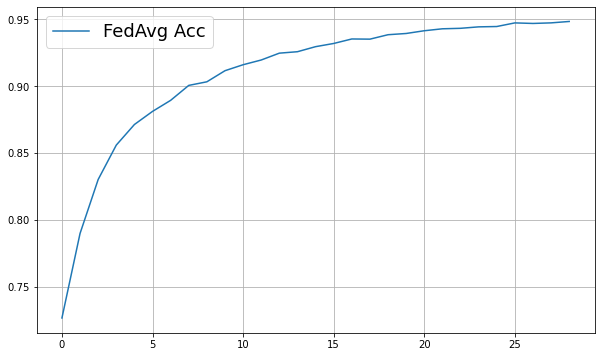

In [3]:
average_acc_list = []
std_lst = []

for i in range(30):
    sum = 0
    tmp = []
    for j in range(32):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['acc{}'.format(j)][i]))

    average_acc_list.append(sum/32)
    std_lst.append(np.mean(tmp))
    

plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [4]:
np.mean(std_lst[1:])

0.02341730878889846

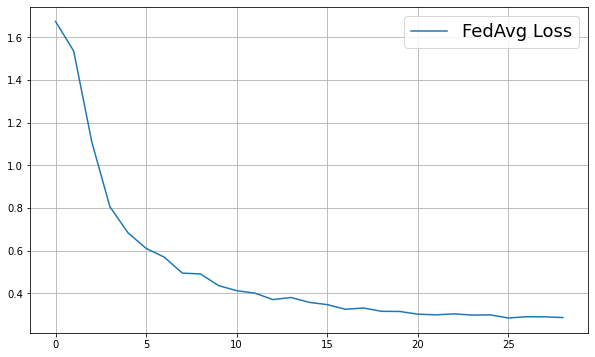

In [9]:
average_loss_list = []
std_lst_loss = []


for i in range(30):
    sum, tmp = 0, []
    for j in range(32):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum
        tmp.append(np.std(globals()['acc{}'.format(j)][i]))

    average_loss_list.append(sum/32)
    std_lst_loss.append(np.mean(tmp))

plt.figure(figsize=(10,6))
plt.plot(average_loss_list[1:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [10]:
np.mean(std_lst_loss[1:])

0.02341730878889846

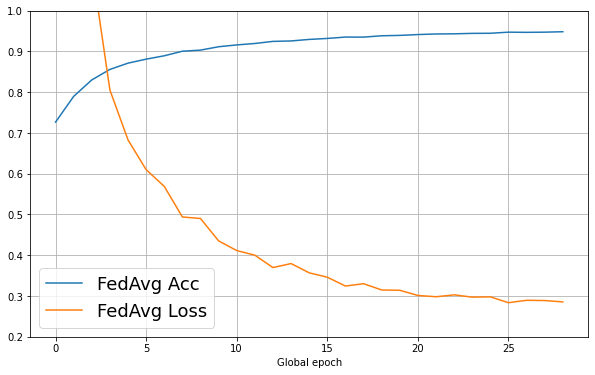

In [6]:
plt.figure(figsize=(10,6))
plt.plot(average_acc_list[1:], label='FedAvg Acc')
plt.plot(average_loss_list[1:], label='FedAvg Loss')
plt.ylim(0.2,1)
plt.xlabel('Global epoch')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

In [7]:
np.array(average_acc_list)

array([       nan, 0.72655146, 0.7897776 , 0.83010865, 0.85582021,
       0.8712151 , 0.88102323, 0.88928479, 0.90046239, 0.9031526 ,
       0.91145167, 0.91591625, 0.91945396, 0.9245701 , 0.92565052,
       0.92942073, 0.93181417, 0.93517677, 0.93504458, 0.9383575 ,
       0.93928063, 0.94133198, 0.94278458, 0.94315   , 0.94423448,
       0.94448729, 0.94719604, 0.94678344, 0.94721656, 0.94826708])

In [8]:
np.array(average_loss_list)

array([       nan, 1.67421017, 1.53550922, 1.10917468, 0.80514355,
       0.68287264, 0.60990762, 0.56898755, 0.49392061, 0.49016122,
       0.43528072, 0.41148522, 0.40019026, 0.3698143 , 0.37962365,
       0.35690222, 0.34612388, 0.32449222, 0.33027955, 0.3148555 ,
       0.31405678, 0.30141062, 0.29825271, 0.30285345, 0.29730125,
       0.29800713, 0.28361155, 0.28956601, 0.28892038, 0.28555632])

In [12]:
np.array(std_lst)

array([       nan, 0.03888709, 0.03455188, 0.03469069, 0.03174858,
       0.03194454, 0.03057482, 0.03116027, 0.02896813, 0.02873014,
       0.02582178, 0.02553758, 0.02496444, 0.02307406, 0.02339449,
       0.02085617, 0.02149617, 0.01882834, 0.01928541, 0.01863719,
       0.01880717, 0.01714004, 0.01567667, 0.01783069, 0.01728105,
       0.01650308, 0.01498042, 0.01546398, 0.0156145 , 0.01665256])